# ANN - Clasificacion Riesgo Movimiento Tuberculosis Bovina CON Y SIN CONTROL DE VIGILANCIA


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from shapely.geometry import Point

df = pd.read_excel('./TBB_Bovino_Train.xlsx')
df = df[df.columns] 
df.head()

,Id,RUP,Oficina,CoordenadaX,CoordenadaY,Huso,Latitud,Longitud,Peso Nivel Contagio,Peso Masa Entrada,...,ProtocoloPc,NegativosPc,PositivosPc,TodosNegativosLab,AlMenosUnPositivoLab,TodosNegativosPc,AlMenosUnPositivoPc,ClasificacionSanitaria,RiesgoMovimiento,TextoRiesgo
0,1029,RUP_TRAIN,OficinaTRAIN,0,0,0,0,0,10,3,...,0,0,0,0,0,0,0,0,10,NaN
1,1229,RUP_TRAIN,OficinaTRAIN,0,0,0,0,0,1,10,...,0,0,0,0,0,1,0,0,1,NaN
2,1347,RUP_TRAIN,OficinaTRAIN,0,0,0,0,0,10,7,...,0,0,0,0,0,0,0,0,10,NaN
3,1718,RUP_TRAIN,OficinaTRAIN,0,0,0,0,0,5,1,...,0,0,0,0,0,1,0,0,3,NaN
4,1825,RUP_TRAIN,OficinaTRAIN,0,0,0,0,0,1,7,...,0,0,0,0,1,0,0,0,9,NaN


In [652]:
df.isnull().sum()

Id                            0
RUP                           0
Oficina                       0
CoordenadaX                   0
CoordenadaY                   0
Huso                          0
Latitud                       0
Longitud                      0
Peso Nivel Contagio           0
Peso Masa Entrada             0
Peso Masa Salida              0
Nivel Vigilancia              0
ProtocoloLab                  0
NegativosLab                  0
PositivosLab                  0
ProtocoloPc                   0
 NegativosPc                  0
 PositivosPc                  0
TodosNegativosLab             0
AlMenosUnPositivoLab          0
TodosNegativosPc              0
AlMenosUnPositivoPc           0
ClasificacionSanitaria        0
 RiesgoMovimiento             0
 TextoRiesgo              31200
dtype: int64

In [653]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,31200.0,2.479150e+06,1.443369e+06,1029.0,1235213.25,2469625.5,3723870.00,5000143.0
CoordenadaX,31200.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.00,0.0
CoordenadaY,31200.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.00,0.0
Huso,31200.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.00,0.0
Latitud,31200.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.00,0.0
Longitud,31200.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.00,0.0
Peso Nivel Contagio,31200.0,5.333333e+00,3.681846e+00,1.0,1.00,5.0,10.00,10.0
Peso Masa Entrada,31200.0,5.250000e+00,3.491116e+00,1.0,2.50,5.0,7.75,10.0
Peso Masa Salida,31200.0,5.250000e+00,3.491116e+00,1.0,2.50,5.0,7.75,10.0
Nivel Vigilancia,31200.0,1.846154e+00,9.483866e-01,0.0,1.00,2.0,3.00,3.0


In [654]:
# Limpiamos los valores erróneos de Length_Employed a partir de la correlación con otras variables
print("Correlación con Length_Employed")
df.corr()[' RiesgoMovimiento'].sort_values()

Correlación con Length_Employed


TodosNegativosLab        -0.541870
TodosNegativosPc         -0.490739
Nivel Vigilancia         -0.402161
Id                        0.002588
Peso Nivel Contagio       0.011752
Peso Masa Entrada         0.014122
Peso Masa Salida          0.175039
AlMenosUnPositivoPc       0.225099
AlMenosUnPositivoLab      0.558107
 RiesgoMovimiento         1.000000
CoordenadaX                    NaN
CoordenadaY                    NaN
Huso                           NaN
Latitud                        NaN
Longitud                       NaN
ProtocoloLab                   NaN
NegativosLab                   NaN
PositivosLab                   NaN
ProtocoloPc                    NaN
 NegativosPc                   NaN
 PositivosPc                   NaN
ClasificacionSanitaria         NaN
 TextoRiesgo                   NaN
Name:  RiesgoMovimiento, dtype: float64

In [655]:
df = df.drop(['CoordenadaX','CoordenadaY','Huso',' TextoRiesgo','ClasificacionSanitaria',
             'Latitud','Longitud','ProtocoloLab','ProtocoloPc',' NegativosPc',
             'NegativosLab','PositivosLab',' PositivosPc','Id','Oficina',' TextoRiesgo'],axis=1)


In [656]:
df.isnull().sum()

RUP                     0
Peso Nivel Contagio     0
Peso Masa Entrada       0
Peso Masa Salida        0
Nivel Vigilancia        0
TodosNegativosLab       0
AlMenosUnPositivoLab    0
TodosNegativosPc        0
AlMenosUnPositivoPc     0
 RiesgoMovimiento       0
dtype: int64

In [657]:
df.head()

,RUP,Peso Nivel Contagio,Peso Masa Entrada,Peso Masa Salida,Nivel Vigilancia,TodosNegativosLab,AlMenosUnPositivoLab,TodosNegativosPc,AlMenosUnPositivoPc,RiesgoMovimiento
0,RUP_TRAIN,10,3,3,0,0,0,0,0,10
1,RUP_TRAIN,1,10,1,3,0,0,1,0,1
2,RUP_TRAIN,10,7,10,0,0,0,0,0,10
3,RUP_TRAIN,5,1,1,1,0,0,1,0,3
4,RUP_TRAIN,1,7,7,1,0,1,0,0,9


In [658]:
# Limpiamos los valores erróneos de Annual_income a partir de la correlación con otras variables
print("Correlación con RiesgoMovimiento")
df.corr()[' RiesgoMovimiento'].sort_values()

Correlación con RiesgoMovimiento


TodosNegativosLab      -0.541870
TodosNegativosPc       -0.490739
Nivel Vigilancia       -0.402161
Peso Nivel Contagio     0.011752
Peso Masa Entrada       0.014122
Peso Masa Salida        0.175039
AlMenosUnPositivoPc     0.225099
AlMenosUnPositivoLab    0.558107
 RiesgoMovimiento       1.000000
Name:  RiesgoMovimiento, dtype: float64

In [659]:
total_acc_inc_avg = df.groupby(' RiesgoMovimiento').mean()['Nivel Vigilancia']
total_acc_inc_avg

 RiesgoMovimiento
1     3.000000
2     3.000000
3     1.671233
4     1.586207
5     1.538462
6     1.578947
7     1.792453
8     1.971429
9     2.006993
10    0.000000
Name: Nivel Vigilancia, dtype: float64

<AxesSubplot:xlabel=' RiesgoMovimiento', ylabel='count'>

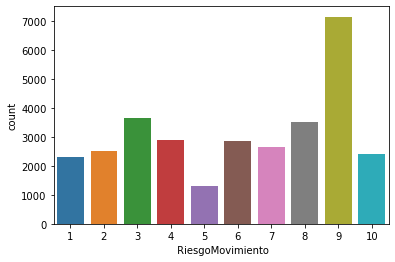

In [660]:
#Verificar si hay una proporción equilibrada entre los diferentes valores de la variable objetivo para un buen modelado posterior
sns.countplot(x=' RiesgoMovimiento',data=df)

(10.0, 0.0)

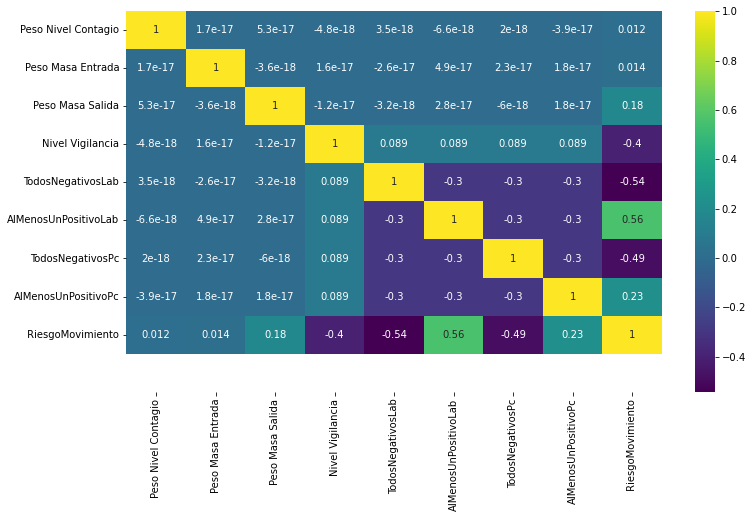

In [661]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [662]:
df.corr()[' RiesgoMovimiento'].sort_values()

TodosNegativosLab      -0.541870
TodosNegativosPc       -0.490739
Nivel Vigilancia       -0.402161
Peso Nivel Contagio     0.011752
Peso Masa Entrada       0.014122
Peso Masa Salida        0.175039
AlMenosUnPositivoPc     0.225099
AlMenosUnPositivoLab    0.558107
 RiesgoMovimiento       1.000000
Name:  RiesgoMovimiento, dtype: float64

<AxesSubplot:>

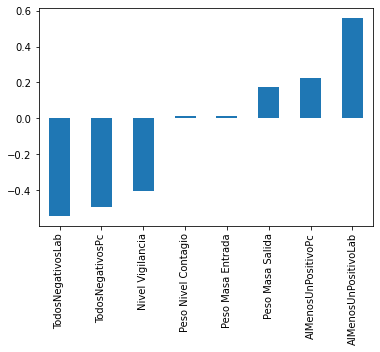

In [663]:
df.corr()[' RiesgoMovimiento'][:-1].sort_values().plot(kind='bar') #Quitamos la propia variable objetivo

In [664]:
df.head()

,RUP,Peso Nivel Contagio,Peso Masa Entrada,Peso Masa Salida,Nivel Vigilancia,TodosNegativosLab,AlMenosUnPositivoLab,TodosNegativosPc,AlMenosUnPositivoPc,RiesgoMovimiento
0,RUP_TRAIN,10,3,3,0,0,0,0,0,10
1,RUP_TRAIN,1,10,1,3,0,0,1,0,1
2,RUP_TRAIN,10,7,10,0,0,0,0,0,10
3,RUP_TRAIN,5,1,1,1,0,0,1,0,3
4,RUP_TRAIN,1,7,7,1,0,1,0,0,9


In [665]:
df.corr()[' RiesgoMovimiento'].sort_values() #Podríamos eliminar "Number_Open_Accounts", correlación muy baja

TodosNegativosLab      -0.541870
TodosNegativosPc       -0.490739
Nivel Vigilancia       -0.402161
Peso Nivel Contagio     0.011752
Peso Masa Entrada       0.014122
Peso Masa Salida        0.175039
AlMenosUnPositivoPc     0.225099
AlMenosUnPositivoLab    0.558107
 RiesgoMovimiento       1.000000
Name:  RiesgoMovimiento, dtype: float64

In [666]:
df = df.drop(['RUP'],axis=1)
df.head()

,Peso Nivel Contagio,Peso Masa Entrada,Peso Masa Salida,Nivel Vigilancia,TodosNegativosLab,AlMenosUnPositivoLab,TodosNegativosPc,AlMenosUnPositivoPc,RiesgoMovimiento
0,10,3,3,0,0,0,0,0,10
1,1,10,1,3,0,0,1,0,1
2,10,7,10,0,0,0,0,0,10
3,5,1,1,1,0,0,1,0,3
4,1,7,7,1,0,1,0,0,9


### Transformación variables categóricas

In [667]:
df.head()

,Peso Nivel Contagio,Peso Masa Entrada,Peso Masa Salida,Nivel Vigilancia,TodosNegativosLab,AlMenosUnPositivoLab,TodosNegativosPc,AlMenosUnPositivoPc,RiesgoMovimiento
0,10,3,3,0,0,0,0,0,10
1,1,10,1,3,0,0,1,0,1
2,10,7,10,0,0,0,0,0,10
3,5,1,1,1,0,0,1,0,3
4,1,7,7,1,0,1,0,0,9


In [668]:
df['Nivel Vigilancia'].value_counts() # Pensar si merece la pena realizar algún filtrado de datos si alguna categoría tiene un contador muy bajo y así ahorramos columnas dummy

3    9600
1    9600
2    9600
0    2400
Name: Nivel Vigilancia, dtype: int64

In [669]:
#Transformar 'Home_Owner'
#dummies = pd.get_dummies(df[['Nivel Vigilancia']]) #se puede añadir drop_first=True evita redundancia y evita crear una columna por cada variable
#df_post = pd.concat([df,dummies],axis=1)
#df_post = df_post.drop(['Nivel Vigilancia'],axis=1) #Eliminamos las columnas originales
df_post =  pd.concat([df],axis=1)

In [670]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31200 entries, 0 to 31199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Peso Nivel Contagio   31200 non-null  int64
 1   Peso Masa Entrada     31200 non-null  int64
 2   Peso Masa Salida      31200 non-null  int64
 3   Nivel Vigilancia      31200 non-null  int64
 4   TodosNegativosLab     31200 non-null  int64
 5   AlMenosUnPositivoLab  31200 non-null  int64
 6   TodosNegativosPc      31200 non-null  int64
 7   AlMenosUnPositivoPc   31200 non-null  int64
 8    RiesgoMovimiento     31200 non-null  int64
dtypes: int64(9)
memory usage: 2.1 MB


In [671]:
df_post.head()

,Peso Nivel Contagio,Peso Masa Entrada,Peso Masa Salida,Nivel Vigilancia,TodosNegativosLab,AlMenosUnPositivoLab,TodosNegativosPc,AlMenosUnPositivoPc,RiesgoMovimiento
0,10,3,3,0,0,0,0,0,10
1,1,10,1,3,0,0,1,0,1
2,10,7,10,0,0,0,0,0,10
3,5,1,1,1,0,0,1,0,3
4,1,7,7,1,0,1,0,0,9


In [672]:
X = df_post.drop(' RiesgoMovimiento',axis=1).values

In [673]:
y = df_post[' RiesgoMovimiento']

In [674]:
y = pd.get_dummies(y)
# Si la variable objetivo está en formato string, utilizar lo siguiente:
# Primero codificar la variable objetivo como integers y después aplicar one hot encoding
#from keras.utils import np_utils
#from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# encoder.fit(Y)
# Y = encoder.transform(Y)
# Y = np_utils.to_categorical(Y)

In [675]:
y = y.values

In [676]:
y

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [677]:
from sklearn.model_selection import train_test_split

In [678]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [679]:
X_train.shape

(23400, 8)

In [680]:
X_test.shape

(7800, 8)

# Escalado

In [681]:
from sklearn.preprocessing import MinMaxScaler

In [682]:
scaler = MinMaxScaler()

In [683]:
scaler.fit(X_train)

MinMaxScaler()

In [684]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [685]:
X_train.shape

(23400, 8)

In [686]:
X_test.shape

(7800, 8)

In [687]:
X_train

array([[0.44444444, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.22222222, 0.66666667, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.66666667, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.22222222, 0.22222222, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [688]:
X_train.max()

1.0

In [689]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [690]:
X_train.shape

(23400, 8)

In [691]:
model = Sequential()

num_neuronas = X_train.shape[1]
num_neuronas_salida = len(df[" RiesgoMovimiento"].unique())
model.add(Dense(units=num_neuronas,activation='relu'))
model.add(Dense(units=np.round(num_neuronas/2),activation='relu'))
model.add(Dense(units=num_neuronas_salida,activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

# Entrenamiento del modelo

In [692]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [693]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=64,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
366/366 [==============================] - 2s 3ms/step - loss: 2.0116 - categorical_accuracy: 0.3210 - val_loss: 1.6942 - val_categorical_accuracy: 0.4190
Epoch 2/200
366/366 [==============================] - 1s 2ms/step - loss: 1.4559 - categorical_accuracy: 0.4996 - val_loss: 1.1273 - val_categorical_accuracy: 0.6296
Epoch 3/200
366/366 [==============================] - 1s 2ms/step - loss: 0.9297 - categorical_accuracy: 0.6992 - val_loss: 0.7748 - val_categorical_accuracy: 0.7623
Epoch 4/200
366/366 [==============================] - 1s 2ms/step - loss: 0.6987 - categorical_accuracy: 0.7973 - val_loss: 0.6215 - val_categorical_accuracy: 0.8371
Epoch 5/200
366/366 [==============================] - 1s 2ms/step - loss: 0.5741 - categorical_accuracy: 0.8428 - val_loss: 0.5215 - val_categorical_accuracy: 0.8604
Epoch 6/200
366/366 [==============================] - 1s 2ms/step - loss: 0.4883 - categorical_accuracy: 0.8658 - val_loss: 0.4553 - val_categorical_accuracy: 0.861

<AxesSubplot:>

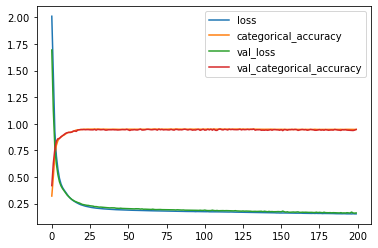

In [694]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Evaluación del modelo

In [695]:
from sklearn.metrics import classification_report,confusion_matrix

##  Predicción sobre el conjunto de Test

In [696]:
predictions = (model.predict(X_test) > 0.5).astype("int32") 

244/244 [==============================] - 0s 798us/step


In [697]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [698]:
predictions

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [699]:
predictions_lab = (model.predict(X_test) > 0.5).astype("int32") 

244/244 [==============================] - 0s 899us/step


In [700]:
predictions_lab #La etiqueta 0 es la primera categoría de la variable objetivo (Interest_Rate = 1) y así sucesivamente

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [701]:
predictions_lab_real = predictions_lab+1

In [702]:
predictions_lab_real

array([[1, 1, 1, ..., 1, 1, 1],
       [2, 1, 1, ..., 1, 1, 1],
       [1, 1, 2, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 2, 1],
       [1, 1, 1, ..., 1, 1, 2]])

In [703]:
df_test_lab = pd.DataFrame(y_test, columns = ['1','2','3','4','5','6','7','8','9','10'])

In [704]:
df_test_lab

,1,2,3,4,5,6,7,8,9,10
0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7795,0,0,0,0,0,0,0,1,0,0
7796,0,0,0,0,0,1,0,0,0,0
7797,0,0,0,0,0,0,1,0,0,0
7798,0,0,0,0,0,0,0,0,1,0


In [705]:
df_test_lab["Clase Real"]=np.where(df_test_lab["1"]==1,1,
                                   np.where(df_test_lab["2"]==1,2,
                                            np.where(df_test_lab["3"]==1,3,
                                                    np.where(df_test_lab["4"]==1,4,
                                                            np.where(df_test_lab["5"]==1,5,
                                                                    np.where(df_test_lab["6"]==1,6,
                                                                            np.where(df_test_lab["7"]==1,7,
                                                                                     np.where(df_test_lab["8"]==1,8,
                                                                                    np.where(df_test_lab["9"]==1,9,10)))))))))

In [706]:
df_test_lab["Clase Real"] 

0        4
1        1
2        3
3        4
4        7
        ..
7795     8
7796     6
7797     7
7798     9
7799    10
Name: Clase Real, Length: 7800, dtype: int32

## Predicción sobre nuevos datos

# ACA PARA LA PREDICCION SE QUITARA LOS DE VIGILANCIA 0 DADO QUE EL RESULTADO ES LOGICO (SIN CONTROL)

In [5]:
#df_pred = pd.read_excel('./Region13.xlsx')
#df_pred = df_pred[df.columns]

#df_pred = pd.read_json('[{"IdRup":"34474","Rup":"04.2.01.0257","OficinaId":"14","CoordenadaX":"286746","CoordenadaY":"6488376","Huso":"19","Latitud":"-31.720186241958135","Longitud":"-71.25065316644525","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"164645","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"204749","CantidadNegativosPc":"196","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99954","Rup":"04.2.01.0493","OficinaId":"14","CoordenadaX":"315205","CoordenadaY":"6504847","Huso":"19","Latitud":"-31.576614579158655","Longitud":"-70.94736054978758","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"324621","Rup":"04.2.01.1093","OficinaId":"14","CoordenadaX":"309078","CoordenadaY":"6520115","Huso":"19","Latitud":"-31.437944009581482","Longitud":"-71.00894540837545","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358562","Rup":"04.2.01.1311","OficinaId":"14","CoordenadaX":"309837","CoordenadaY":"6518864","Huso":"18","Latitud":"-31.44934934118999","Longitud":"-77.0012029226003","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132971","Rup":"04.2.02.0301","OficinaId":"14","CoordenadaX":"261036","CoordenadaY":"6520059","Huso":"19","Latitud":"-31.429528417872056","Longitud":"-71.51410068237715","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357097","Rup":"04.2.02.0744","OficinaId":"14","CoordenadaX":"260906","CoordenadaY":"6501263","Huso":"18","Latitud":"-31.598924251261927","Longitud":"-77.5200127721887","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"166203","CantidadNegativosLab":"13","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21936","Rup":"04.2.03.0009","OficinaId":"14","CoordenadaX":"263977","CoordenadaY":"6436972","Huso":"19","Latitud":"-32.179038056010114","Longitud":"-71.50330860976597","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59074","Rup":"04.2.03.0025","OficinaId":"14","CoordenadaX":"295866","CoordenadaY":"6448411","Huso":"19","Latitud":"-32.08215453509205","Longitud":"-71.16287475949119","PesoContagio":"5","PesoMasaEntrada":"3","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"191031","CantidadNegativosPc":"60","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46463","Rup":"04.2.03.0027","OficinaId":"14","CoordenadaX":"276558","CoordenadaY":"6442346","Huso":"19","Latitud":"-32.133167582452614","Longitud":"-71.36871859644597","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335500","Rup":"04.2.03.0435","OficinaId":"14","CoordenadaX":"282511","CoordenadaY":"6459625","Huso":"19","Latitud":"-31.97857240678791","Longitud":"-71.30174982407347","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"200172","Rup":"04.2.04.1209","OficinaId":"14","CoordenadaX":"322149","CoordenadaY":"6489811","Huso":"19","Latitud":"-31.713295112547154","Longitud":"-70.87694211634226","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343446","Rup":"04.2.02.0670","OficinaId":"14","CoordenadaX":"267395","CoordenadaY":"6503759","Huso":"19","Latitud":"-31.577755577181954","Longitud":"-71.45108440106462","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"188072","Rup":"04.2.04.1188","OficinaId":"14","CoordenadaX":"319360","CoordenadaY":"6476808","Huso":"19","Latitud":"-31.830108111022177","Longitud":"-70.9087687441807","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"164855","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132980","Rup":"04.2.04.1061","OficinaId":"14","CoordenadaX":"331859","CoordenadaY":"6468593","Huso":"19","Latitud":"-31.906100579143363","Longitud":"-70.77817413540514","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337331","Rup":"04.3.03.0683","OficinaId":"13","CoordenadaX":"347213","CoordenadaY":"6590581","Huso":"19","Latitud":"-30.80803919608065","Longitud":"-70.59714298661564","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332588","Rup":"04.3.04.0422","OficinaId":"13","CoordenadaX":"286147","CoordenadaY":"6583851","Huso":"19","Latitud":"-30.85928550274562","Longitud":"-71.23654557425724","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342416","Rup":"04.3.05.0237","OficinaId":"13","CoordenadaX":"322731","CoordenadaY":"6637475","Huso":"19","Latitud":"-30.381692782008155","Longitud":"-70.84492569910675","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82775","Rup":"04.2.04.0279","OficinaId":"14","CoordenadaX":"310059","CoordenadaY":"6480550","Huso":"19","Latitud":"-31.79485626722651","Longitud":"-71.00626962471885","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"188993","CantidadNegativosLab":"46","CantidadPositivosLab":"0","ProtocoloPc":"192664","CantidadNegativosPc":"69","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333627","Rup":"04.2.04.1398","OficinaId":"14","CoordenadaX":"346069","CoordenadaY":"6468987","Huso":"19","Latitud":"-31.904561189096654","Longitud":"-70.62788807043735","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43397","Rup":"04.1.05.0053","OficinaId":"12","CoordenadaX":"357087","CoordenadaY":"6658497","Huso":"19","Latitud":"-30.196609455013796","Longitud":"-70.48461970987574","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353073","Rup":"04.3.03.0769","OficinaId":"13","CoordenadaX":"340615","CoordenadaY":"6566948","Huso":"19","Latitud":"-31.020329030429195","Longitud":"-70.66978889893339","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329442","Rup":"04.2.04.1372","OficinaId":"14","CoordenadaX":"347660","CoordenadaY":"6465501","Huso":"19","Latitud":"-31.936213542924136","Longitud":"-70.61161651392536","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52594","Rup":"04.2.04.0013","OficinaId":"14","CoordenadaX":"339305","CoordenadaY":"6499024","Huso":"19","Latitud":"-31.632746014395124","Longitud":"-70.69444857166945","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61684","Rup":"04.2.04.0650","OficinaId":"14","CoordenadaX":"347892","CoordenadaY":"6464911","Huso":"19","Latitud":"-31.9415654730552","Longitud":"-70.60925573094784","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67924","Rup":"04.2.04.0187","OficinaId":"14","CoordenadaX":"341310","CoordenadaY":"6469334","Huso":"19","Latitud":"-31.900777336900553","Longitud":"-70.678141607644","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29933","Rup":"04.2.04.0155","OficinaId":"14","CoordenadaX":"348163","CoordenadaY":"6463816","Huso":"19","Latitud":"-31.951476839450756","Longitud":"-70.60656146615608","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44455","Rup":"04.2.04.0128","OficinaId":"14","CoordenadaX":"347895","CoordenadaY":"6465021","Huso":"19","Latitud":"-31.940573859187268","Longitud":"-70.60920671167666","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17543","Rup":"04.2.04.0189","OficinaId":"14","CoordenadaX":"347793","CoordenadaY":"6465167","Huso":"19","Latitud":"-31.939243507693906","Longitud":"-70.61026250031254","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70134","Rup":"04.2.04.0209","OficinaId":"14","CoordenadaX":"348140","CoordenadaY":"6464337","Huso":"19","Latitud":"-31.94677521236794","Longitud":"-70.60672294649348","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"14684","Rup":"04.2.04.0062","OficinaId":"14","CoordenadaX":"345530","CoordenadaY":"6469606","Huso":"19","Latitud":"-31.898905739424634","Longitud":"-70.6334876347669","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"14680","Rup":"04.2.04.0028","OficinaId":"14","CoordenadaX":"346242","CoordenadaY":"6469858","Huso":"19","Latitud":"-31.89672966178955","Longitud":"-70.62592102735229","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22247","Rup":"04.2.01.0254","OficinaId":"14","CoordenadaX":"294423","CoordenadaY":"6520756","Huso":"19","Latitud":"-31.429654397493852","Longitud":"-71.16292735856109","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93173","Rup":"04.2.01.0054","OficinaId":"14","CoordenadaX":"305801","CoordenadaY":"6503831","Huso":"19","Latitud":"-31.584227374458298","Longitud":"-71.04660714418972","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17213","Rup":"04.2.01.0061","OficinaId":"14","CoordenadaX":"308402","CoordenadaY":"6504539","Huso":"19","Latitud":"-31.57827949941449","Longitud":"-71.01907286861744","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"164677","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42452","Rup":"04.2.01.0099","OficinaId":"14","CoordenadaX":"319396","CoordenadaY":"6505467","Huso":"19","Latitud":"-31.571689001688245","Longitud":"-70.90310337579919","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"191939","CantidadNegativosLab":"40","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30723","Rup":"04.2.01.0161","OficinaId":"14","CoordenadaX":"326236","CoordenadaY":"6509186","Huso":"19","Latitud":"-31.5392044613412","Longitud":"-70.83040413644888","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17535","Rup":"04.2.01.0094","OficinaId":"14","CoordenadaX":"317766","CoordenadaY":"6504882","Huso":"19","Latitud":"-31.57670728277561","Longitud":"-70.92037938974126","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"173769","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102462","Rup":"04.2.01.0590","OficinaId":"14","CoordenadaX":"297689","CoordenadaY":"6499029","Huso":"19","Latitud":"-31.626125194485805","Longitud":"-71.13303493470745","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36131","Rup":"04.2.01.0435","OficinaId":"14","CoordenadaX":"305851","CoordenadaY":"6501636","Huso":"19","Latitud":"-31.604027283028778","Longitud":"-71.04651331951567","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52595","Rup":"04.2.04.0023","OficinaId":"14","CoordenadaX":"323957","CoordenadaY":"6492596","Huso":"19","Latitud":"-31.688460855565285","Longitud":"-70.85736944517396","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80556","Rup":"04.2.04.0098","OficinaId":"14","CoordenadaX":"326809","CoordenadaY":"6488432","Huso":"19","Latitud":"-31.72644479445289","Longitud":"-70.82802877356455","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"164475","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62685","Rup":"04.2.04.0700","OficinaId":"14","CoordenadaX":"326560","CoordenadaY":"6488130","Huso":"19","Latitud":"-31.729130390977446","Longitud":"-70.83070937773807","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363286","Rup":"04.1.06.0373","OficinaId":"12","CoordenadaX":"335496","CoordenadaY":"6676788","Huso":"18","Latitud":"-30.02888601883525","Longitud":"-76.70599687362593","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"167602","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"188075","Rup":"04.2.04.1189","OficinaId":"14","CoordenadaX":"314310","CoordenadaY":"6480610","Huso":"19","Latitud":"-31.795014796293","Longitud":"-70.96137933671356","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"164854","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332116","Rup":"04.1.02.0297","OficinaId":"12","CoordenadaX":"284611","CoordenadaY":"6673543","Huso":"19","Latitud":"-30.050250521914446","Longitud":"-71.23406327112951","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248224","Rup":"04.1.05.0170","OficinaId":"12","CoordenadaX":"358829","CoordenadaY":"6676887","Huso":"19","Latitud":"-30.030907821039186","Longitud":"-70.46407922840758","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"167818","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113746","Rup":"04.1.06.0175","OficinaId":"12","CoordenadaX":"339885","CoordenadaY":"6675580","Huso":"19","Latitud":"-30.040365343870643","Longitud":"-70.66067846710327","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56093","Rup":"04.2.01.0169","OficinaId":"14","CoordenadaX":"327028","CoordenadaY":"6509236","Huso":"19","Latitud":"-31.538872686181012","Longitud":"-70.82205616590844","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10170","Rup":"04.2.01.0329","OficinaId":"14","CoordenadaX":"297670","CoordenadaY":"6475718","Huso":"19","Latitud":"-31.836291652608384","Longitud":"-71.13805810171148","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"205639","CantidadNegativosLab":"57","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132412","Rup":"04.2.01.0798","OficinaId":"14","CoordenadaX":"320518","CoordenadaY":"6506193","Huso":"19","Latitud":"-31.565317769446718","Longitud":"-70.89115369403612","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336651","Rup":"04.2.01.1150","OficinaId":"14","CoordenadaX":"304592","CoordenadaY":"6503946","Huso":"19","Latitud":"-31.582985806304812","Longitud":"-71.05931864494627","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"144294","CantidadNegativosLab":"50","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102163","Rup":"04.2.02.0076","OficinaId":"14","CoordenadaX":"277474","CoordenadaY":"6504697","Huso":"19","Latitud":"-31.571292182982734","Longitud":"-71.34474224963493","PesoContagio":"5","PesoMasaEntrada":"3","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"211688","CantidadNegativosLab":"28","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323778","Rup":"04.2.02.0589","OficinaId":"14","CoordenadaX":"265604","CoordenadaY":"6500502","Huso":"19","Latitud":"-31.606750831415344","Longitud":"-71.47071743726303","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347549","Rup":"04.2.02.0682","OficinaId":"14","CoordenadaX":"267159","CoordenadaY":"6502651","Huso":"19","Latitud":"-31.58769549529078","Longitud":"-71.45383115908295","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129292","Rup":"04.2.03.0144","OficinaId":"14","CoordenadaX":"276200","CoordenadaY":"6474052","Huso":"19","Latitud":"-31.847295742910408","Longitud":"-71.36516160774359","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97933","Rup":"04.2.04.0291","OficinaId":"14","CoordenadaX":"347622","CoordenadaY":"6465179","Huso":"19","Latitud":"-31.939112340822774","Longitud":"-70.61206908015258","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11234","Rup":"04.2.04.0609","OficinaId":"14","CoordenadaX":"347866","CoordenadaY":"6465009","Huso":"19","Latitud":"-31.940678191715733","Longitud":"-70.60951530247418","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344224","Rup":"04.2.01.1182","OficinaId":"14","CoordenadaX":"304714","CoordenadaY":"6504075","Huso":"19","Latitud":"-31.5818433785899","Longitud":"-71.05800807655584","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104408","Rup":"04.2.02.0118","OficinaId":"14","CoordenadaX":"280906","CoordenadaY":"6504672","Huso":"19","Latitud":"-31.572175725431773","Longitud":"-71.30861024153226","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342675","Rup":"04.2.02.0667","OficinaId":"14","CoordenadaX":"279954","CoordenadaY":"6504935","Huso":"19","Latitud":"-31.56962323087951","Longitud":"-71.31857585271258","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363026","Rup":"04.2.01.1339","OficinaId":"14","CoordenadaX":"297905","CoordenadaY":"6499829","Huso":"18","Latitud":"-31.618950338101012","Longitud":"-77.13059448126077","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335406","Rup":"04.2.03.0434","OficinaId":"14","CoordenadaX":"274728","CoordenadaY":"6453126","Huso":"19","Latitud":"-32.035633975810896","Longitud":"-71.38557716852314","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87557","Rup":"04.2.04.0359","OficinaId":"14","CoordenadaX":"315242","CoordenadaY":"6479316","Huso":"19","Latitud":"-31.806833846041975","Longitud":"-70.95178516669598","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"206620","CantidadNegativosPc":"54","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118624","Rup":"04.3.01.0253","OficinaId":"13","CoordenadaX":"287548","CoordenadaY":"6613106","Huso":"19","Latitud":"-30.59575081896686","Longitud":"-71.21585755375868","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"192915","Rup":"04.3.02.0310","OficinaId":"13","CoordenadaX":"326769","CoordenadaY":"6556513","Huso":"19","Latitud":"-31.112480496443425","Longitud":"-70.81657504547188","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119063","Rup":"04.2.04.0980","OficinaId":"14","CoordenadaX":"331970","CoordenadaY":"6498901","Huso":"19","Latitud":"-31.632805511958114","Longitud":"-70.77178268428035","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"167582","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149639","Rup":"04.3.02.0193","OficinaId":"13","CoordenadaX":"309675","CoordenadaY":"6548581","Huso":"19","Latitud":"-31.181356594649294","Longitud":"-70.99724155203259","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355595","Rup":"04.3.03.0783","OficinaId":"13","CoordenadaX":"314750","CoordenadaY":"6601242","Huso":"19","Latitud":"-30.707268874055384","Longitud":"-70.9344186087363","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166801","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"14748","Rup":"04.3.04.0027","OficinaId":"13","CoordenadaX":"284466","CoordenadaY":"6586487","Huso":"19","Latitud":"-30.835213365126513","Longitud":"-71.25355868126572","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332499","Rup":"04.3.04.0421","OficinaId":"13","CoordenadaX":"284536","CoordenadaY":"6582888","Huso":"19","Latitud":"-30.867676228187015","Longitud":"-71.25358616813679","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67923","Rup":"04.2.04.0201","OficinaId":"14","CoordenadaX":"331789","CoordenadaY":"6468588","Huso":"19","Latitud":"-31.906135307535934","Longitud":"-70.77891498252303","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127958","Rup":"04.2.01.0772","OficinaId":"14","CoordenadaX":"300765","CoordenadaY":"6501646","Huso":"19","Latitud":"-31.60306714275465","Longitud":"-71.10009222962172","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326110","Rup":"04.2.01.1107","OficinaId":"14","CoordenadaX":"275548","CoordenadaY":"6498507","Huso":"19","Latitud":"-31.626719140838983","Longitud":"-71.36643300445846","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343440","Rup":"04.2.01.1179","OficinaId":"14","CoordenadaX":"289257","CoordenadaY":"6495441","Huso":"19","Latitud":"-31.656957184886533","Longitud":"-71.22265031249917","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355924","Rup":"04.2.01.1267","OficinaId":"14","CoordenadaX":"286399","CoordenadaY":"6486518","Huso":"18","Latitud":"-31.736871772722157","Longitud":"-77.2547186953367","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323878","Rup":"04.2.02.0594","OficinaId":"14","CoordenadaX":"270262","CoordenadaY":"6501995","Huso":"19","Latitud":"-31.594232570563126","Longitud":"-71.42130777807425","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"164816","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106443","Rup":"04.2.04.0876","OficinaId":"14","CoordenadaX":"319494","CoordenadaY":"6476705","Huso":"19","Latitud":"-31.831058095639204","Longitud":"-70.90737258403547","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113266","Rup":"04.2.04.0901","OficinaId":"14","CoordenadaX":"322632","CoordenadaY":"6475670","Huso":"19","Latitud":"-31.840883575313033","Longitud":"-70.8744179422017","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114801","Rup":"04.2.04.0931","OficinaId":"14","CoordenadaX":"331718","CoordenadaY":"6468629","Huso":"19","Latitud":"-31.905755074787393","Longitud":"-70.77965841562892","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116158","Rup":"04.2.04.0966","OficinaId":"14","CoordenadaX":"326303","CoordenadaY":"6487690","Huso":"19","Latitud":"-31.733059132727195","Longitud":"-70.83349906029483","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244686","Rup":"04.2.04.1272","OficinaId":"14","CoordenadaX":"312011","CoordenadaY":"6474864","Huso":"19","Latitud":"-31.84644800059123","Longitud":"-70.98676002515384","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245339","Rup":"04.2.04.1286","OficinaId":"14","CoordenadaX":"312936","CoordenadaY":"6473748","Huso":"19","Latitud":"-31.8566628502965","Longitud":"-70.9772039226666","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246688","Rup":"04.2.04.1312","OficinaId":"14","CoordenadaX":"325710","CoordenadaY":"6475113","Huso":"19","Latitud":"-31.846381289306542","Longitud":"-70.84200408746572","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328886","Rup":"04.2.04.1364","OficinaId":"14","CoordenadaX":"320935","CoordenadaY":"6477881","Huso":"19","Latitud":"-31.820681268401557","Longitud":"-70.89193656995742","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337267","Rup":"04.2.04.1417","OficinaId":"14","CoordenadaX":"314501","CoordenadaY":"6485630","Huso":"19","Latitud":"-31.74978128660668","Longitud":"-70.95840865727445","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346300","Rup":"04.2.04.1460","OficinaId":"14","CoordenadaX":"343588","CoordenadaY":"6467899","Huso":"19","Latitud":"-31.914034189872343","Longitud":"-70.65429204532131","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355649","Rup":"04.2.04.1519","OficinaId":"14","CoordenadaX":"303341","CoordenadaY":"6486115","Huso":"19","Latitud":"-31.743543408401898","Longitud":"-71.07606877491477","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"90544","Rup":"04.3.01.0039","OficinaId":"13","CoordenadaX":"285855","CoordenadaY":"6600382","Huso":"19","Latitud":"-30.710179002414908","Longitud":"-71.23614446019015","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"1934","Rup":"04.3.01.0063","OficinaId":"13","CoordenadaX":"272662","CoordenadaY":"6604015","Huso":"19","Latitud":"-30.674979166420474","Longitud":"-71.37300977619462","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65302","Rup":"04.3.01.0187","OficinaId":"13","CoordenadaX":"282073","CoordenadaY":"6604344","Huso":"19","Latitud":"-30.67376953763222","Longitud":"-71.27477255120965","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114950","Rup":"04.3.01.0243","OficinaId":"13","CoordenadaX":"275894","CoordenadaY":"6597410","Huso":"19","Latitud":"-30.73514209201741","Longitud":"-71.34073528285077","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80484","Rup":"04.3.02.0059","OficinaId":"13","CoordenadaX":"305616","CoordenadaY":"6563274","Huso":"19","Latitud":"-31.04819700228688","Longitud":"-71.03698114917493","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101853","Rup":"04.3.02.0066","OficinaId":"13","CoordenadaX":"292339","CoordenadaY":"6565322","Huso":"19","Latitud":"-31.027459821445877","Longitud":"-71.17561065209867","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118691","Rup":"04.3.02.0097","OficinaId":"13","CoordenadaX":"312566","CoordenadaY":"6557205","Huso":"19","Latitud":"-31.104055126177848","Longitud":"-70.9653138367559","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132763","Rup":"04.3.02.0142","OficinaId":"13","CoordenadaX":"303891","CoordenadaY":"6545565","Huso":"19","Latitud":"-31.207596208226764","Longitud":"-71.0584941281976","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337132","Rup":"04.3.02.0491","OficinaId":"13","CoordenadaX":"303867","CoordenadaY":"6545622","Huso":"19","Latitud":"-31.207078203532948","Longitud":"-71.05873477287851","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342477","Rup":"04.2.03.0478","OficinaId":"14","CoordenadaX":"286103","CoordenadaY":"6464584","Huso":"19","Latitud":"-31.93455155855614","Longitud":"-71.26266341062582","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337019","Rup":"04.2.04.1415","OficinaId":"14","CoordenadaX":"345518","CoordenadaY":"6469606","Huso":"19","Latitud":"-31.89890410857112","Longitud":"-70.63361448812623","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74586","Rup":"04.2.04.0504","OficinaId":"14","CoordenadaX":"325409","CoordenadaY":"6473262","Huso":"19","Latitud":"-31.86302626048219","Longitud":"-70.84551635449503","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22947","Rup":"04.2.04.0414","OficinaId":"14","CoordenadaX":"345915","CoordenadaY":"6469642","Huso":"19","Latitud":"-31.898633336792813","Longitud":"-70.6294120302509","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"162397","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36594","Rup":"04.2.04.0526","OficinaId":"14","CoordenadaX":"326448","CoordenadaY":"6469189","Huso":"19","Latitud":"-31.899912774738805","Longitud":"-70.83526673038554","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93149","Rup":"04.2.01.0042","OficinaId":"14","CoordenadaX":"326752","CoordenadaY":"6510514","Huso":"19","Latitud":"-31.527306381586946","Longitud":"-70.8247380389377","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362956","Rup":"04.3.02.0594","OficinaId":"13","CoordenadaX":"311103","CoordenadaY":"6546689","Huso":"19","Latitud":"-31.198649405067705","Longitud":"-70.98261973017651","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114276","Rup":"04.2.01.0661","OficinaId":"14","CoordenadaX":"327468","CoordenadaY":"6512140","Huso":"19","Latitud":"-31.512750550949043","Longitud":"-70.81691609350885","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"90552","Rup":"04.3.01.0047","OficinaId":"13","CoordenadaX":"281538","CoordenadaY":"6618091","Huso":"19","Latitud":"-30.549720417876873","Longitud":"-71.27744922382169","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"77778","Rup":"04.3.01.0065","OficinaId":"13","CoordenadaX":"281316","CoordenadaY":"6606052","Huso":"19","Latitud":"-30.658230788264532","Longitud":"-71.28230685463905","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65232","Rup":"04.3.01.0048","OficinaId":"13","CoordenadaX":"273619","CoordenadaY":"6609958","Huso":"19","Latitud":"-30.621579003608417","Longitud":"-71.3617242286263","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329069","Rup":"04.2.04.1366","OficinaId":"14","CoordenadaX":"326794","CoordenadaY":"6488524","Huso":"19","Latitud":"-31.725612905455073","Longitud":"-70.82817073781695","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94256","Rup":"04.1.05.0020","OficinaId":"12","CoordenadaX":"355602","CoordenadaY":"6668047","Huso":"19","Latitud":"-30.110280513612945","Longitud":"-70.49873842131777","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65164","Rup":"04.1.06.0014","OficinaId":"12","CoordenadaX":"366685","CoordenadaY":"6697818","Huso":"19","Latitud":"-29.842948358292325","Longitud":"-70.38001618768416","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103014","Rup":"04.1.05.0109","OficinaId":"12","CoordenadaX":"356561","CoordenadaY":"6657547","Huso":"19","Latitud":"-30.205117692396776","Longitud":"-70.49021150895972","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72493","Rup":"04.1.05.0088","OficinaId":"12","CoordenadaX":"354319","CoordenadaY":"6677257","Huso":"19","Latitud":"-30.027041146063016","Longitud":"-70.51078825356893","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65160","Rup":"04.1.05.0022","OficinaId":"12","CoordenadaX":"355862","CoordenadaY":"6665318","Huso":"19","Latitud":"-30.13493054751674","Longitud":"-70.4964118299041","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364010","Rup":"04.2.04.1590","OficinaId":"14","CoordenadaX":"319011","CoordenadaY":"7068492","Huso":"18","Latitud":"-26.492511984395993","Longitud":"-76.81594086989432","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364310","Rup":"04.2.03.0537","OficinaId":"14","CoordenadaX":"264616","CoordenadaY":"6475136","Huso":"18","Latitud":"-31.835190570039256","Longitud":"-77.4872250819231","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48274","Rup":"04.2.01.0344","OficinaId":"14","CoordenadaX":"298290","CoordenadaY":"6480769","Huso":"19","Latitud":"-31.790862670847712","Longitud":"-71.13046422280289","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113176","Rup":"04.2.04.0895","OficinaId":"14","CoordenadaX":"331720","CoordenadaY":"6468756","Huso":"19","Latitud":"-31.90461013804238","Longitud":"-70.7796152276627","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42622","Rup":"04.2.04.0163","OficinaId":"14","CoordenadaX":"331791","CoordenadaY":"6468603","Huso":"19","Latitud":"-31.90600033981778","Longitud":"-70.77889123739763","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36583","Rup":"04.2.01.0410","OficinaId":"14","CoordenadaX":"298344","CoordenadaY":"6481285","Huso":"19","Latitud":"-31.786220027429547","Longitud":"-71.12978750420494","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114815","Rup":"04.2.04.0934","OficinaId":"14","CoordenadaX":"322928","CoordenadaY":"6475726","Huso":"19","Latitud":"-31.84042465567926","Longitud":"-70.87128105704097","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17552","Rup":"04.2.01.0196","OficinaId":"14","CoordenadaX":"326210","CoordenadaY":"6506190","Huso":"19","Latitud":"-31.566217947020608","Longitud":"-70.83120566235787","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366285","Rup":"04.1.02.0421","OficinaId":"12","CoordenadaX":"283799","CoordenadaY":"6683782","Huso":"18","Latitud":"-29.957775238196156","Longitud":"-77.2404037853676","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98907","Rup":"04.2.04.0419","OficinaId":"14","CoordenadaX":"347627","CoordenadaY":"6479938","Huso":"19","Latitud":"-31.806010192513675","Longitud":"-70.60970003629026","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93300","Rup":"04.2.04.0089","OficinaId":"14","CoordenadaX":"320128","CoordenadaY":"6487924","Huso":"19","Latitud":"-31.729994925602682","Longitud":"-70.8986076465168","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366345","Rup":"04.2.04.1602","OficinaId":"14","CoordenadaX":"318555","CoordenadaY":"6487664","Huso":"18","Latitud":"-31.732091020166248","Longitud":"-76.91525153552008","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364197","Rup":"04.2.04.1595","OficinaId":"14","CoordenadaX":"306801","CoordenadaY":"6484683","Huso":"18","Latitud":"-31.75704468595778","Longitud":"-77.03984573037862","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362200","Rup":"04.3.03.0854","OficinaId":"13","CoordenadaX":"345125","CoordenadaY":"6597025","Huso":"19","Latitud":"-30.7496440335792","Longitud":"-70.61798902061362","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242695","Rup":"04.2.02.0550","OficinaId":"14","CoordenadaX":"273362","CoordenadaY":"6514649","Huso":"19","Latitud":"-31.480776570419266","Longitud":"-71.38575562143077","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"158873","Rup":"04.2.03.0294","OficinaId":"14","CoordenadaX":"282203","CoordenadaY":"6451181","Huso":"19","Latitud":"-32.054631354245295","Longitud":"-71.30691454327909","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"173773","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"185072","Rup":"04.2.03.0323","OficinaId":"14","CoordenadaX":"265090","CoordenadaY":"6443806","Huso":"19","Latitud":"-32.11767588663907","Longitud":"-71.4898377292809","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337274","Rup":"04.2.03.0450","OficinaId":"14","CoordenadaX":"264080","CoordenadaY":"6485202","Huso":"19","Latitud":"-31.744349325200986","Longitud":"-71.49044910318032","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337303","Rup":"04.2.03.0452","OficinaId":"14","CoordenadaX":"264080","CoordenadaY":"6485202","Huso":"19","Latitud":"-31.744349325200986","Longitud":"-71.49044910318032","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101748","Rup":"04.3.01.0205","OficinaId":"13","CoordenadaX":"274527","CoordenadaY":"6610192","Huso":"19","Latitud":"-30.619640870867332","Longitud":"-71.35220719634007","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124053","Rup":"04.3.01.0275","OficinaId":"13","CoordenadaX":"255837","CoordenadaY":"6578572","Huso":"19","Latitud":"-30.901010829370108","Longitud":"-71.55455120454563","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347557","Rup":"04.3.03.0708","OficinaId":"13","CoordenadaX":"308034","CoordenadaY":"6581398","Huso":"19","Latitud":"-30.885157703770957","Longitud":"-71.00823092776798","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347551","Rup":"04.2.02.0683","OficinaId":"14","CoordenadaX":"267300","CoordenadaY":"6502652","Huso":"19","Latitud":"-31.58771500246634","Longitud":"-71.45234613233625","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65273","Rup":"04.3.03.0137","OficinaId":"13","CoordenadaX":"330898","CoordenadaY":"6585714","Huso":"19","Latitud":"-30.849721829065896","Longitud":"-70.7684295658939","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"130835","Rup":"04.3.05.0125","OficinaId":"13","CoordenadaX":"305297","CoordenadaY":"6627255","Huso":"19","Latitud":"-30.471172946928103","Longitud":"-71.02818533264815","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"164005","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101835","Rup":"04.2.01.0574","OficinaId":"14","CoordenadaX":"289359","CoordenadaY":"6495655","Huso":"19","Latitud":"-31.65504659575595","Longitud":"-71.22152931428457","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"180066","CantidadNegativosLab":"39","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"27213","Rup":"04.3.01.0178","OficinaId":"13","CoordenadaX":"255489","CoordenadaY":"6582054","Huso":"19","Latitud":"-30.869550889564035","Longitud":"-71.55735454696071","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97934","Rup":"04.2.04.0296","OficinaId":"14","CoordenadaX":"344669","CoordenadaY":"6469450","Huso":"19","Latitud":"-31.900195249427657","Longitud":"-70.64261432705375","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"163046","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148619","Rup":"04.2.04.1132","OficinaId":"14","CoordenadaX":"341692","CoordenadaY":"6469438","Huso":"19","Latitud":"-31.89989272630279","Longitud":"-70.67408646663056","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"163056","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21901","Rup":"04.2.04.0311","OficinaId":"14","CoordenadaX":"347844","CoordenadaY":"6464401","Huso":"19","Latitud":"-31.946158381502983","Longitud":"-70.60984358959259","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82542","Rup":"04.2.04.0119","OficinaId":"14","CoordenadaX":"345965","CoordenadaY":"6469646","Huso":"19","Latitud":"-31.89860404045434","Longitud":"-70.62888283956401","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115939","Rup":"04.2.01.0684","OficinaId":"14","CoordenadaX":"296388","CoordenadaY":"6516607","Huso":"19","Latitud":"-31.467410133867055","Longitud":"-71.14311723735989","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329444","Rup":"04.2.01.1120","OficinaId":"14","CoordenadaX":"325276","CoordenadaY":"6507729","Huso":"19","Latitud":"-31.552198260689003","Longitud":"-70.8407701512224","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30174","Rup":"04.2.01.0003","OficinaId":"14","CoordenadaX":"325111","CoordenadaY":"6506778","Huso":"19","Latitud":"-31.56074911671324","Longitud":"-70.84267632615334","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17216","Rup":"04.2.01.0025","OficinaId":"14","CoordenadaX":"325884","CoordenadaY":"6506431","Huso":"19","Latitud":"-31.563995411341235","Longitud":"-70.83459662967415","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42426","Rup":"04.2.01.0029","OficinaId":"14","CoordenadaX":"324179","CoordenadaY":"6506784","Huso":"19","Latitud":"-31.56055311068861","Longitud":"-70.85249069289137","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72476","Rup":"04.2.01.0236","OficinaId":"14","CoordenadaX":"330871","CoordenadaY":"6516508","Huso":"19","Latitud":"-31.473863050681086","Longitud":"-70.78034772602909","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67867","Rup":"04.2.04.0097","OficinaId":"14","CoordenadaX":"326888","CoordenadaY":"6488042","Huso":"19","Latitud":"-31.729973610658803","Longitud":"-70.82726432452482","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"164852","CantidadNegativosLab":"12","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55350","Rup":"04.2.04.0090","OficinaId":"14","CoordenadaX":"320878","CoordenadaY":"6487885","Huso":"19","Latitud":"-31.730464256651317","Longitud":"-70.89070198152173","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"235058","Rup":"04.2.04.1251","OficinaId":"14","CoordenadaX":"326891","CoordenadaY":"6488190","Huso":"19","Latitud":"-31.728639460535927","Longitud":"-70.82720647399177","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42587","Rup":"04.2.04.0104","OficinaId":"14","CoordenadaX":"326206","CoordenadaY":"6488581","Huso":"19","Latitud":"-31.725009756577162","Longitud":"-70.83436417722872","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"201976","CantidadNegativosLab":"49","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42606","Rup":"04.2.04.0122","OficinaId":"14","CoordenadaX":"330244","CoordenadaY":"6491278","Huso":"19","Latitud":"-31.701294881244323","Longitud":"-70.79129401866558","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17358","Rup":"04.2.04.0038","OficinaId":"14","CoordenadaX":"326368","CoordenadaY":"6487696","Huso":"19","Latitud":"-31.733014894333042","Longitud":"-70.83281217184965","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17383","Rup":"04.2.04.0057","OficinaId":"14","CoordenadaX":"326625","CoordenadaY":"6488695","Huso":"19","Latitud":"-31.724045306524946","Longitud":"-70.82992342949402","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73496","Rup":"04.2.04.0428","OficinaId":"14","CoordenadaX":"345897","CoordenadaY":"6469257","Huso":"19","Latitud":"-31.90210293972189","Longitud":"-70.62966349912914","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"49278","Rup":"04.1.01.0088","OficinaId":"12","CoordenadaX":"287130","CoordenadaY":"6690926","Huso":"19","Latitud":"-29.893932946629352","Longitud":"-71.20448667194707","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"77689","Rup":"04.1.02.0064","OficinaId":"12","CoordenadaX":"282971","CoordenadaY":"6671368","Huso":"19","Latitud":"-30.06957365752618","Longitud":"-71.25150677800927","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332106","Rup":"04.1.02.0295","OficinaId":"12","CoordenadaX":"281064","CoordenadaY":"6677069","Huso":"19","Latitud":"-30.017824993598012","Longitud":"-71.27010442957172","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337115","Rup":"04.1.02.0313","OficinaId":"12","CoordenadaX":"282830","CoordenadaY":"6674252","Huso":"19","Latitud":"-30.04354203737281","Longitud":"-71.25237958209601","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135499","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15198","Rup":"04.2.01.0004","OficinaId":"14","CoordenadaX":"297201","CoordenadaY":"6498567","Huso":"19","Latitud":"-31.630204567962224","Longitud":"-71.13827235504581","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68025","Rup":"04.2.01.0068","OficinaId":"14","CoordenadaX":"309989","CoordenadaY":"6505319","Huso":"19","Latitud":"-31.571509409550682","Longitud":"-71.00220730357034","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37038","Rup":"04.2.01.0369","OficinaId":"14","CoordenadaX":"275831","CoordenadaY":"6498789","Huso":"19","Latitud":"-31.624232261218047","Longitud":"-71.36338715727913","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99754","Rup":"04.2.01.0480","OficinaId":"14","CoordenadaX":"298564","CoordenadaY":"6481225","Huso":"19","Latitud":"-31.786799814305116","Longitud":"-71.1274777383513","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"232036","Rup":"04.2.02.0534","OficinaId":"14","CoordenadaX":"267478","CoordenadaY":"6502736","Huso":"19","Latitud":"-31.586993797389283","Longitud":"-71.45045188499064","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"134574","Rup":"04.2.03.0166","OficinaId":"14","CoordenadaX":"294442","CoordenadaY":"6447813","Huso":"19","Latitud":"-32.08728718110323","Longitud":"-71.1780811742682","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342293","Rup":"04.2.03.0475","OficinaId":"14","CoordenadaX":"278832","CoordenadaY":"6454423","Huso":"19","Latitud":"-32.02475261914121","Longitud":"-71.34185046939245","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9572","Rup":"04.2.04.0309","OficinaId":"14","CoordenadaX":"350384","CoordenadaY":"6458853","Huso":"19","Latitud":"-31.996530247973702","Longitud":"-70.58383781026598","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"100473","Rup":"04.2.01.0541","OficinaId":"14","CoordenadaX":"275912","CoordenadaY":"6498162","Huso":"19","Latitud":"-31.62990024381125","Longitud":"-71.36267672366736","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101830","Rup":"04.2.01.0569","OficinaId":"14","CoordenadaX":"299718","CoordenadaY":"6501610","Huso":"19","Latitud":"-31.60320984826025","Longitud":"-71.11112938501101","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323772","Rup":"04.2.02.0587","OficinaId":"14","CoordenadaX":"265604","CoordenadaY":"6500502","Huso":"19","Latitud":"-31.606750831415344","Longitud":"-71.47071743726303","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"164813","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103456","Rup":"04.2.03.0067","OficinaId":"14","CoordenadaX":"263249","CoordenadaY":"6448176","Huso":"19","Latitud":"-32.07790398039855","Longitud":"-71.50825747323759","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138492","Rup":"04.2.03.0236","OficinaId":"14","CoordenadaX":"282182","CoordenadaY":"6450905","Huso":"19","Latitud":"-32.05711527984851","Longitud":"-71.30719929188994","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327010","Rup":"04.3.03.0622","OficinaId":"13","CoordenadaX":"322711","CoordenadaY":"6601767","Huso":"19","Latitud":"-30.70374566806977","Longitud":"-70.85123516978834","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42380","Rup":"04.2.01.0124","OficinaId":"14","CoordenadaX":"326887","CoordenadaY":"6510653","Huso":"19","Latitud":"-31.526073166428674","Longitud":"-70.82329240303352","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"163713","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93278","Rup":"04.2.04.0050","OficinaId":"14","CoordenadaX":"325713","CoordenadaY":"6488190","Huso":"19","Latitud":"-31.728460637478126","Longitud":"-70.83963509173354","PesoContagio":"5","PesoMasaEntrada":"10","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"211688","CantidadNegativosLab":"28","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101972","Rup":"04.2.04.0087","OficinaId":"14","CoordenadaX":"331169","CoordenadaY":"6467973","Huso":"19","Latitud":"-31.911589155517092","Longitud":"-70.7855761989958","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111855","Rup":"04.2.02.0172","OficinaId":"14","CoordenadaX":"269871","CoordenadaY":"6501662","Huso":"19","Latitud":"-31.597156176950982","Longitud":"-71.42550338048227","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118598","Rup":"04.2.02.0210","OficinaId":"14","CoordenadaX":"261324","CoordenadaY":"6520736","Huso":"19","Latitud":"-31.4234853874804","Longitud":"-71.51091043482454","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102119","Rup":"04.2.03.0062","OficinaId":"14","CoordenadaX":"278877","CoordenadaY":"6480555","Huso":"19","Latitud":"-31.789196927129694","Longitud":"-71.33541407937855","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17409","Rup":"04.2.04.0088","OficinaId":"14","CoordenadaX":"326124","CoordenadaY":"6488966","Huso":"19","Latitud":"-31.721525538945645","Longitud":"-70.83516086184014","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"47126","Rup":"04.2.04.0318","OficinaId":"14","CoordenadaX":"332654","CoordenadaY":"6468999","Huso":"19","Latitud":"-31.902556773243024","Longitud":"-70.76969997264311","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98868","Rup":"04.2.04.0403","OficinaId":"14","CoordenadaX":"322077","CoordenadaY":"6475581","Huso":"19","Latitud":"-31.841599563067245","Longitud":"-70.88029674772329","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98883","Rup":"04.2.04.0430","OficinaId":"14","CoordenadaX":"346917","CoordenadaY":"6470033","Huso":"19","Latitud":"-31.89524255220853","Longitud":"-70.61875802718026","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62034","Rup":"04.2.04.0521","OficinaId":"14","CoordenadaX":"326338","CoordenadaY":"6468817","Huso":"19","Latitud":"-31.90325041103987","Longitud":"-70.83649606801937","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62407","Rup":"04.2.04.0694","OficinaId":"14","CoordenadaX":"314837","CoordenadaY":"6471116","Huso":"19","Latitud":"-31.88070558438818","Longitud":"-70.95762285179391","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105957","Rup":"04.2.04.0855","OficinaId":"14","CoordenadaX":"329196","CoordenadaY":"6469763","Huso":"19","Latitud":"-31.895153014255456","Longitud":"-70.80611870466154","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111307","Rup":"04.2.04.0885","OficinaId":"14","CoordenadaX":"314718","CoordenadaY":"6482799","Huso":"19","Latitud":"-31.775343242535865","Longitud":"-70.95665605198904","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114787","Rup":"04.2.04.0926","OficinaId":"14","CoordenadaX":"348582","CoordenadaY":"6463259","Huso":"19","Latitud":"-31.956556062958352","Longitud":"-70.60221679934001","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115969","Rup":"04.2.04.0954","OficinaId":"14","CoordenadaX":"347922","CoordenadaY":"6469334","Huso":"19","Latitud":"-31.901681298254545","Longitud":"-70.60824398970848","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128924","Rup":"04.2.04.1022","OficinaId":"14","CoordenadaX":"326929","CoordenadaY":"6487551","Huso":"19","Latitud":"-31.734407451014626","Longitud":"-70.82691864877937","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131682","Rup":"04.2.04.1043","OficinaId":"14","CoordenadaX":"331972","CoordenadaY":"6468773","Huso":"19","Latitud":"-31.90449412622006","Longitud":"-70.77694839686741","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"238351","Rup":"04.2.04.1262","OficinaId":"14","CoordenadaX":"316228","CoordenadaY":"6486002","Huso":"19","Latitud":"-31.746705862411165","Longitud":"-70.94011482292565","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244947","Rup":"04.2.04.1275","OficinaId":"14","CoordenadaX":"316562","CoordenadaY":"6470035","Huso":"19","Latitud":"-31.8907322129977","Longitud":"-70.93959873179753","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343417","Rup":"04.2.04.1445","OficinaId":"14","CoordenadaX":"312890","CoordenadaY":"6482899","Huso":"19","Latitud":"-31.774143578664933","Longitud":"-70.9759315728424","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343815","Rup":"04.2.04.1447","OficinaId":"14","CoordenadaX":"332468","CoordenadaY":"6468800","Huso":"19","Latitud":"-31.904323877889738","Longitud":"-70.77170052442668","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344273","Rup":"04.2.04.1448","OficinaId":"14","CoordenadaX":"347003","CoordenadaY":"6470341","Huso":"19","Latitud":"-31.892476476109064","Longitud":"-70.61780035614778","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348928","Rup":"04.2.04.1465","OficinaId":"14","CoordenadaX":"329131","CoordenadaY":"6469901","Huso":"19","Latitud":"-31.89389883685882","Longitud":"-70.80678142587166","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348934","Rup":"04.2.04.1468","OficinaId":"14","CoordenadaX":"332950","CoordenadaY":"6469518","Huso":"19","Latitud":"-31.897920156772123","Longitud":"-70.76648160529635","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354736","Rup":"04.2.04.1509","OficinaId":"14","CoordenadaX":"329077","CoordenadaY":"6470335","Huso":"18","Latitud":"-31.889977140541802","Longitud":"-76.80727571305017","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355126","Rup":"04.2.04.1511","OficinaId":"14","CoordenadaX":"306573","CoordenadaY":"6480761","Huso":"18","Latitud":"-31.792368372732223","Longitud":"-77.0430291488619","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"173766","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358020","Rup":"04.2.04.1558","OficinaId":"14","CoordenadaX":"306569","CoordenadaY":"6479916","Huso":"18","Latitud":"-31.799986508723286","Longitud":"-77.04323905775719","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111433","Rup":"04.3.01.0236","OficinaId":"13","CoordenadaX":"276180","CoordenadaY":"6597597","Huso":"19","Latitud":"-30.733509923520646","Longitud":"-71.3377094561981","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"136257","Rup":"04.3.01.0347","OficinaId":"13","CoordenadaX":"282631","CoordenadaY":"6614903","Huso":"19","Latitud":"-30.57866453156599","Longitud":"-71.26673081183638","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"131519","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337118","Rup":"04.3.03.0680","OficinaId":"13","CoordenadaX":"347210","CoordenadaY":"6590593","Huso":"19","Latitud":"-30.807930569948823","Longitud":"-70.59717254571996","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356616","Rup":"04.3.03.0793","OficinaId":"13","CoordenadaX":"313812","CoordenadaY":"6601851","Huso":"19","Latitud":"-30.70163038475791","Longitud":"-70.9440984894841","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"231612","Rup":"04.3.04.0349","OficinaId":"13","CoordenadaX":"283695","CoordenadaY":"6587627","Huso":"19","Latitud":"-30.824794186326876","Longitud":"-71.26137366680344","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"176312","Rup":"04.3.01.0458","OficinaId":"13","CoordenadaX":"285915","CoordenadaY":"6599899","Huso":"19","Latitud":"-30.714544871677663","Longitud":"-71.23561882633392","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"260243","Rup":"04.3.01.0691","OficinaId":"13","CoordenadaX":"267839","CoordenadaY":"6610379","Huso":"19","Latitud":"-30.616674680376384","Longitud":"-71.42188484747258","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"160189","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"195021","CantidadNegativosPc":"146","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337126","Rup":"04.3.01.0786","OficinaId":"13","CoordenadaX":"273591","CoordenadaY":"6598562","Huso":"19","Latitud":"-30.72431978757455","Longitud":"-71.36451869940035","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337437","Rup":"04.3.01.0795","OficinaId":"13","CoordenadaX":"272830","CoordenadaY":"6596653","Huso":"19","Latitud":"-30.74138602564564","Longitud":"-71.37288240856795","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347719","Rup":"04.3.01.0841","OficinaId":"13","CoordenadaX":"290559","CoordenadaY":"6609675","Huso":"19","Latitud":"-30.627219691730325","Longitud":"-71.1851673088049","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356614","Rup":"04.3.01.0916","OficinaId":"13","CoordenadaX":"293312","CoordenadaY":"6615024","Huso":"19","Latitud":"-30.579465194545048","Longitud":"-71.15539290893902","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125291","Rup":"04.3.02.0110","OficinaId":"13","CoordenadaX":"309302","CoordenadaY":"6549031","Huso":"19","Latitud":"-31.177237952669365","Longitud":"-71.00106835972176","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178993","Rup":"04.3.02.0239","OficinaId":"13","CoordenadaX":"309766","CoordenadaY":"6548643","Huso":"19","Latitud":"-31.180812323623613","Longitud":"-70.99627536811606","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"190453","Rup":"04.3.02.0308","OficinaId":"13","CoordenadaX":"308321","CoordenadaY":"6541598","Huso":"19","Latitud":"-31.24410347606741","Longitud":"-71.01277668961946","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243243","Rup":"04.3.02.0377","OficinaId":"13","CoordenadaX":"321059","CoordenadaY":"6564060","Huso":"19","Latitud":"-31.043561843345987","Longitud":"-70.87508898781604","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343753","Rup":"04.3.02.0503","OficinaId":"13","CoordenadaX":"305588","CoordenadaY":"6563954","Huso":"19","Latitud":"-31.042060512162486","Longitud":"-71.03714376296615","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101957","Rup":"04.3.03.0023","OficinaId":"13","CoordenadaX":"371341","CoordenadaY":"6577524","Huso":"19","Latitud":"-30.928687968188704","Longitud":"-70.34663356695033","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"77774","Rup":"04.3.03.0027","OficinaId":"13","CoordenadaX":"350053","CoordenadaY":"6564876","Huso":"19","Latitud":"-31.040259026088275","Longitud":"-70.57125146355517","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360683","Rup":"04.2.03.0529","OficinaId":"14","CoordenadaX":"268725","CoordenadaY":"6443756","Huso":"18","Latitud":"-32.11887813208572","Longitud":"-77.45135247741561","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"173772","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"209942","CantidadNegativosPc":"33","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363515","Rup":"04.2.04.1584","OficinaId":"14","CoordenadaX":"314876","CoordenadaY":"6486963","Huso":"18","Latitud":"-31.737822523668434","Longitud":"-76.95419904626563","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135675","Rup":"04.2.03.0210","OficinaId":"14","CoordenadaX":"290263","CoordenadaY":"6450908","Huso":"19","Latitud":"-32.05861717555674","Longitud":"-71.22165824601993","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17390","Rup":"04.2.04.0103","OficinaId":"14","CoordenadaX":"325897","CoordenadaY":"6488051","Huso":"19","Latitud":"-31.7297420872274","Longitud":"-70.83771853287163","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4868","Rup":"04.2.01.0043","OficinaId":"14","CoordenadaX":"330676","CoordenadaY":"6515585","Huso":"19","Latitud":"-31.48215826835452","Longitud":"-70.78255739027004","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326593","Rup":"04.2.03.0414","OficinaId":"14","CoordenadaX":"297654","CoordenadaY":"6465285","Huso":"19","Latitud":"-31.930349293246618","Longitud":"-71.14040216652275","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363736","Rup":"04.1.01.0530","OficinaId":"12","CoordenadaX":"283941","CoordenadaY":"6690385","Huso":"19","Latitud":"-29.898255726243757","Longitud":"-71.23760020427353","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352050","Rup":"04.2.04.1492","OficinaId":"14","CoordenadaX":"254563","CoordenadaY":"3515555","Huso":"19","Latitud":"-58.431631248876144","Longitud":"-73.20466470123647","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87454","Rup":"04.2.03.0032","OficinaId":"14","CoordenadaX":"262943","CoordenadaY":"6466535","Huso":"19","Latitud":"-31.912367533710253","Longitud":"-71.50698821550445","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"176514","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"191212","CantidadNegativosPc":"65","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"156274","Rup":"04.2.03.0288","OficinaId":"14","CoordenadaX":"278058","CoordenadaY":"6441885","Huso":"19","Latitud":"-32.137619520497225","Longitud":"-71.35293530507786","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244656","Rup":"04.2.03.0358","OficinaId":"14","CoordenadaX":"286417","CoordenadaY":"6447178","Huso":"19","Latitud":"-32.09152133536521","Longitud":"-71.26319901017405","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"77744","Rup":"04.2.04.0046","OficinaId":"14","CoordenadaX":"309778","CoordenadaY":"6481223","Huso":"19","Latitud":"-31.78874133547761","Longitud":"-71.00910484814538","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12189","Rup":"04.3.01.0186","OficinaId":"13","CoordenadaX":"288117","CoordenadaY":"6614086","Huso":"19","Latitud":"-30.58701501055023","Longitud":"-71.20972605844041","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"163326","CantidadNegativosLab":"14","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149404","Rup":"04.2.03.0284","OficinaId":"14","CoordenadaX":"276349","CoordenadaY":"6442599","Huso":"19","Latitud":"-32.130845602804015","Longitud":"-71.3708735695624","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"191753","Rup":"04.2.04.1191","OficinaId":"14","CoordenadaX":"341444","CoordenadaY":"6469122","Huso":"19","Latitud":"-31.902707870506372","Longitud":"-70.67675975041767","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364054","Rup":"04.2.01.1357","OficinaId":"14","CoordenadaX":"317468","CoordenadaY":"7109241","Huso":"18","Latitud":"-26.124560341742","Longitud":"-76.82564272495465","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356797","Rup":"04.2.04.1530","OficinaId":"14","CoordenadaX":"347912","CoordenadaY":"6464881","Huso":"18","Latitud":"-31.94183870354963","Longitud":"-76.60904892383343","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43477","Rup":"04.1.05.0029","OficinaId":"12","CoordenadaX":"356183","CoordenadaY":"6654981","Huso":"19","Latitud":"-30.22822148527139","Longitud":"-70.49448742868441","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"77712","Rup":"04.1.05.0045","OficinaId":"12","CoordenadaX":"357217","CoordenadaY":"6659060","Huso":"19","Latitud":"-30.19154573885834","Longitud":"-70.48319347353257","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81371","Rup":"04.1.05.0059","OficinaId":"12","CoordenadaX":"356997","CoordenadaY":"6658422","Huso":"19","Latitud":"-30.197275465004175","Longitud":"-70.48556455154635","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56193","Rup":"04.1.05.0054","OficinaId":"12","CoordenadaX":"375080","CoordenadaY":"6804988","Huso":"19","Latitud":"-28.876811870566804","Longitud":"-70.28097380356213","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"14751","Rup":"04.3.05.0037","OficinaId":"13","CoordenadaX":"347656","CoordenadaY":"6636520","Huso":"19","Latitud":"-30.39371270985585","Longitud":"-70.58574834916446","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336891","Rup":"04.1.05.0183","OficinaId":"12","CoordenadaX":"333332","CoordenadaY":"6666665","Huso":"19","Latitud":"-30.119906496632648","Longitud":"-70.73001861710145","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365712","Rup":"04.1.06.0384","OficinaId":"12","CoordenadaX":"123654","CoordenadaY":"6678925","Huso":"18","Latitud":"-29.96288867844601","Longitud":"-78.89910422416274","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364149","Rup":"04.3.04.0520","OficinaId":"13","CoordenadaX":"260501","CoordenadaY":"6577264","Huso":"18","Latitud":"-30.91375618286721","Longitud":"-77.50610141711859","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364378","Rup":"04.2.02.0830","OficinaId":"14","CoordenadaX":"264207","CoordenadaY":"6533103","Huso":"18","Latitud":"-31.31259692427757","Longitud":"-77.47767696807213","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"117529","Rup":"04.3.01.0250","OficinaId":"13","CoordenadaX":"285781","CoordenadaY":"6601660","Huso":"19","Latitud":"-30.698642304433424","Longitud":"-71.2366507176103","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106402","Rup":"04.2.04.0873","OficinaId":"14","CoordenadaX":"325778","CoordenadaY":"6473285","Huso":"19","Latitud":"-31.862875399252335","Longitud":"-70.84161343468105","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138529","Rup":"04.2.03.0251","OficinaId":"14","CoordenadaX":"284657","CoordenadaY":"6446978","Huso":"19","Latitud":"-32.09298974216312","Longitud":"-71.28188078561982","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366476","Rup":"04.2.02.0858","OficinaId":"14","CoordenadaX":"268303","CoordenadaY":"6502595","Huso":"18","Latitud":"-31.58843119869816","Longitud":"-77.44179745983591","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358302","Rup":"04.2.01.1306","OficinaId":"14","CoordenadaX":"316958","CoordenadaY":"6504953","Huso":"18","Latitud":"-31.57593884882992","Longitud":"-76.92887679344804","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"173770","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115232","Rup":"04.2.03.0095","OficinaId":"14","CoordenadaX":"297685","CoordenadaY":"6465315","Huso":"19","Latitud":"-31.93008434941727","Longitud":"-71.14006817826784","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"198962","CantidadNegativosLab":"57","CantidadPositivosLab":"0","ProtocoloPc":"186100","CantidadNegativosPc":"245","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"192012","Rup":"04.1.05.0160","OficinaId":"12","CoordenadaX":"356198","CoordenadaY":"6651711","Huso":"19","Latitud":"-30.257722570871838","Longitud":"-70.49477808133027","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107842","Rup":"04.1.05.0120","OficinaId":"12","CoordenadaX":"360324","CoordenadaY":"6667117","Huso":"19","Latitud":"-30.119220559074066","Longitud":"-70.44986365290484","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17291","Rup":"04.3.05.0071","OficinaId":"13","CoordenadaX":"344754","CoordenadaY":"6633189","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37658","Rup":"04.2.04.0431","OficinaId":"14","CoordenadaX":"322724","CoordenadaY":"6474994","Huso":"19","Latitud":"-31.846993519122027","Longitud":"-70.87356937481574","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364116","Rup":"04.2.04.1591","OficinaId":"14","CoordenadaX":"332402","CoordenadaY":"6468780","Huso":"18","Latitud":"-31.90449449884328","Longitud":"-76.77240166601139","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363975","Rup":"04.2.04.1587","OficinaId":"14","CoordenadaX":"326270","CoordenadaY":"6470049","Huso":"18","Latitud":"-31.892130697469046","Longitud":"-76.83699415774987","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362239","Rup":"04.3.03.0855","OficinaId":"13","CoordenadaX":"313345","CoordenadaY":"6594161","Huso":"19","Latitud":"-30.770908417594054","Longitud":"-70.95036914998042","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21873","Rup":"04.2.01.0271","OficinaId":"14","CoordenadaX":"300186","CoordenadaY":"6501626","Huso":"19","Latitud":"-31.603147004988518","Longitud":"-71.10619589291765","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72531","Rup":"04.2.01.0280","OficinaId":"14","CoordenadaX":"286541","CoordenadaY":"6488068","Huso":"19","Latitud":"-31.72292471965607","Longitud":"-71.25288247569678","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126301","Rup":"04.2.01.0766","OficinaId":"14","CoordenadaX":"286233","CoordenadaY":"6486805","Huso":"19","Latitud":"-31.73425341291273","Longitud":"-71.25640704383656","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140787","Rup":"04.2.01.0855","OficinaId":"14","CoordenadaX":"302221","CoordenadaY":"6502697","Huso":"19","Latitud":"-31.593842262212327","Longitud":"-71.08454238107814","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323931","Rup":"04.2.01.1040","OficinaId":"14","CoordenadaX":"281469","CoordenadaY":"6485178","Huso":"19","Latitud":"-31.748020573766407","Longitud":"-71.30702253469113","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355122","Rup":"04.2.01.1259","OficinaId":"14","CoordenadaX":"281575","CoordenadaY":"6485306","Huso":"18","Latitud":"-31.746886925857375","Longitud":"-77.30587566013516","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355245","Rup":"04.2.01.1261","OficinaId":"14","CoordenadaX":"296033","CoordenadaY":"6483631","Huso":"18","Latitud":"-31.76465861732511","Longitud":"-77.15369008180565","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"47069","Rup":"04.2.03.0007","OficinaId":"14","CoordenadaX":"280998","CoordenadaY":"6444487","Huso":"19","Latitud":"-32.114739994911844","Longitud":"-71.32119454514526","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"171201","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147767","Rup":"04.2.03.0276","OficinaId":"14","CoordenadaX":"278394","CoordenadaY":"6477119","Huso":"19","Latitud":"-31.820077226679015","Longitud":"-71.34129311698057","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"191212","CantidadNegativosPc":"65","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29458","Rup":"04.3.01.0062","OficinaId":"13","CoordenadaX":"283788","CoordenadaY":"6603850","Huso":"19","Latitud":"-30.678535896236127","Longitud":"-71.25698635043314","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103031","Rup":"04.3.02.0073","OficinaId":"13","CoordenadaX":"293998","CoordenadaY":"6566601","Huso":"19","Latitud":"-31.016219122318798","Longitud":"-71.15798014627434","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"166803","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342580","Rup":"04.2.03.0479","OficinaId":"14","CoordenadaX":"278164","CoordenadaY":"6456069","Huso":"19","Latitud":"-32.00978449012535","Longitud":"-71.3485398461316","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"60017","Rup":"04.3.05.0039","OficinaId":"13","CoordenadaX":"332224","CoordenadaY":"6643111","Huso":"19","Latitud":"-30.33221411402661","Longitud":"-70.74526404429038","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105945","Rup":"04.2.02.0136","OficinaId":"14","CoordenadaX":"270025","CoordenadaY":"6502828","Huso":"19","Latitud":"-31.586676310372162","Longitud":"-71.42360921333389","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"49392","Rup":"04.2.03.0031","OficinaId":"14","CoordenadaX":"277836","CoordenadaY":"6477508","Huso":"19","Latitud":"-31.81646202302908","Longitud":"-71.3470954820012","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342453","Rup":"04.2.03.0477","OficinaId":"14","CoordenadaX":"279145","CoordenadaY":"6454572","Huso":"19","Latitud":"-32.02347064181625","Longitud":"-71.3385044754045","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115980","Rup":"04.2.01.0687","OficinaId":"14","CoordenadaX":"327372","CoordenadaY":"6511926","Huso":"19","Latitud":"-31.514666033120047","Longitud":"-70.81796399918498","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93879","Rup":"04.3.03.0089","OficinaId":"13","CoordenadaX":"346592","CoordenadaY":"6590279","Huso":"19","Latitud":"-30.810683066046572","Longitud":"-70.60367765750114","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74193","Rup":"04.2.04.0656","OficinaId":"14","CoordenadaX":"341046","CoordenadaY":"6479717","Huso":"19","Latitud":"-31.807105207146158","Longitud":"-70.67923417135215","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80730","Rup":"04.2.04.0182","OficinaId":"14","CoordenadaX":"340743","CoordenadaY":"6470051","Huso":"19","Latitud":"-31.894232089544754","Longitud":"-70.68401765576802","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4770","Rup":"04.2.04.0171","OficinaId":"14","CoordenadaX":"341132","CoordenadaY":"6469652","Huso":"19","Latitud":"-31.897884725699242","Longitud":"-70.67997116030415","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"163057","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"27198","Rup":"04.2.04.0015","OficinaId":"14","CoordenadaX":"341162","CoordenadaY":"6469533","Huso":"19","Latitud":"-31.89896206827766","Longitud":"-70.6796735298057","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44701","Rup":"04.2.04.0278","OficinaId":"14","CoordenadaX":"347669","CoordenadaY":"6464722","Huso":"19","Latitud":"-31.94324002105594","Longitud":"-70.61164395921723","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135691","Rup":"04.2.04.1092","OficinaId":"14","CoordenadaX":"341254","CoordenadaY":"6469295","Huso":"19","Latitud":"-31.901121221470305","Longitud":"-70.67873997371892","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114004","Rup":"04.2.04.0914","OficinaId":"14","CoordenadaX":"342550","CoordenadaY":"6469496","Huso":"19","Latitud":"-31.8994888531064","Longitud":"-70.6650070957042","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101904","Rup":"04.2.04.0805","OficinaId":"14","CoordenadaX":"347056","CoordenadaY":"6466183","Huso":"19","Latitud":"-31.929981833389352","Longitud":"-70.61789634881087","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29855","Rup":"04.2.01.0104","OficinaId":"14","CoordenadaX":"320119","CoordenadaY":"6505915","Huso":"19","Latitud":"-31.567762369310596","Longitud":"-70.895406614744","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352277","Rup":"04.2.01.1233","OficinaId":"14","CoordenadaX":"324725","CoordenadaY":"6507188","Huso":"19","Latitud":"-31.55699316625284","Longitud":"-70.8466686628349","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163684","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29898","Rup":"04.2.01.0132","OficinaId":"14","CoordenadaX":"324175","CoordenadaY":"6506842","Huso":"19","Latitud":"-31.560029473152","Longitud":"-70.85252247850227","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4495","Rup":"04.2.01.0134","OficinaId":"14","CoordenadaX":"325398","CoordenadaY":"6507526","Huso":"19","Latitud":"-31.55404736586108","Longitud":"-70.83952133615676","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17210","Rup":"04.2.01.0129","OficinaId":"14","CoordenadaX":"326687","CoordenadaY":"6510653","Huso":"19","Latitud":"-31.526043128126897","Longitud":"-70.82539797004137","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55234","Rup":"04.2.01.0084","OficinaId":"14","CoordenadaX":"307965","CoordenadaY":"6504476","Huso":"19","Latitud":"-31.578774728888774","Longitud":"-71.02368783850012","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"164696","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42450","Rup":"04.2.01.0091","OficinaId":"14","CoordenadaX":"316755","CoordenadaY":"6504966","Huso":"19","Latitud":"-31.57578932571652","Longitud":"-70.93101253381849","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"190590","CantidadNegativosLab":"67","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30105","Rup":"04.2.01.0072","OficinaId":"14","CoordenadaX":"312638","CoordenadaY":"6505657","Huso":"19","Latitud":"-31.568895797464656","Longitud":"-70.97424390524375","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80955","Rup":"04.2.04.0208","OficinaId":"14","CoordenadaX":"327482","CoordenadaY":"6488223","Huso":"19","Latitud":"-31.728431137814614","Longitud":"-70.82096520105416","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363094","Rup":"04.2.01.1341","OficinaId":"14","CoordenadaX":"297049","CoordenadaY":"6480937","Huso":"18","Latitud":"-31.789128069041887","Longitud":"-77.1435289073137","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42742","Rup":"04.2.01.0133","OficinaId":"14","CoordenadaX":"327319","CoordenadaY":"6509121","Huso":"19","Latitud":"-31.53995337524408","Longitud":"-70.81901225576573","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"163679","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24401","Rup":"04.1.01.0096","OficinaId":"12","CoordenadaX":"300184","CoordenadaY":"6682036","Huso":"19","Latitud":"-29.976299409631114","Longitud":"-71.0710357436788","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124741","Rup":"04.1.01.0155","OficinaId":"12","CoordenadaX":"281024","CoordenadaY":"6692032","Huso":"19","Latitud":"-29.882887842770437","Longitud":"-71.26745394315573","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"139010","Rup":"04.1.01.0238","OficinaId":"12","CoordenadaX":"286139","CoordenadaY":"6684447","Huso":"19","Latitud":"-29.952188357200157","Longitud":"-71.21603747728545","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248103","Rup":"04.1.01.0352","OficinaId":"12","CoordenadaX":"285707","CoordenadaY":"6695105","Huso":"19","Latitud":"-29.85599973999499","Longitud":"-71.21837955533907","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330530","Rup":"04.1.01.0417","OficinaId":"12","CoordenadaX":"284692","CoordenadaY":"6691325","Huso":"19","Latitud":"-29.88991057829377","Longitud":"-71.22963866182195","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346975","Rup":"04.1.01.0463","OficinaId":"12","CoordenadaX":"294825","CoordenadaY":"6685657","Huso":"19","Latitud":"-29.942758725709023","Longitud":"-71.12585339215852","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"167615","CantidadNegativosLab":"16","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343201","Rup":"04.1.05.0194","OficinaId":"12","CoordenadaX":"358833","CoordenadaY":"6676769","Huso":"19","Latitud":"-30.03197283266972","Longitud":"-70.46405340518061","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80726","Rup":"04.2.01.0130","OficinaId":"14","CoordenadaX":"324228","CoordenadaY":"6507323","Huso":"19","Latitud":"-31.555700043409544","Longitud":"-70.8518785907509","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36809","Rup":"04.2.01.0309","OficinaId":"14","CoordenadaX":"285746","CoordenadaY":"6493346","Huso":"19","Latitud":"-31.675193990223338","Longitud":"-71.26011302197594","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"180066","CantidadNegativosLab":"39","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35678","Rup":"04.2.01.0335","OficinaId":"14","CoordenadaX":"297044","CoordenadaY":"6482017","Huso":"19","Latitud":"-31.77939013175848","Longitud":"-71.14335695497532","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37337","Rup":"04.2.01.0550","OficinaId":"14","CoordenadaX":"310449","CoordenadaY":"6504727","Huso":"19","Latitud":"-31.57692325096434","Longitud":"-70.99747650559428","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"110388","Rup":"04.2.01.0623","OficinaId":"14","CoordenadaX":"298544","CoordenadaY":"6499645","Huso":"19","Latitud":"-31.620721500057368","Longitud":"-71.12389944474302","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104366","Rup":"04.2.02.0104","OficinaId":"14","CoordenadaX":"278791","CoordenadaY":"6505402","Huso":"19","Latitud":"-31.56519042556568","Longitud":"-71.33071674011327","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142513","Rup":"04.2.03.0268","OficinaId":"14","CoordenadaX":"270997","CoordenadaY":"6443487","Huso":"19","Latitud":"-32.12176660227763","Longitud":"-71.42735371071448","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52597","Rup":"04.2.04.0027","OficinaId":"14","CoordenadaX":"346047","CoordenadaY":"6469733","Huso":"19","Latitud":"-31.89783055726886","Longitud":"-70.62800219663356","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"169046","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5182","Rup":"04.2.04.0100","OficinaId":"14","CoordenadaX":"325041","CoordenadaY":"6487813","Huso":"19","Latitud":"-31.731757679432214","Longitud":"-70.84679250129923","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97960","Rup":"04.2.04.0297","OficinaId":"14","CoordenadaX":"313641","CoordenadaY":"6482384","Huso":"19","Latitud":"-31.778909998261756","Longitud":"-70.96810318213807","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"174837","CantidadNegativosLab":"42","CantidadPositivosLab":"0","ProtocoloPc":"197456","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86928","Rup":"04.2.01.0441","OficinaId":"14","CoordenadaX":"304751","CoordenadaY":"6504008","Huso":"19","Latitud":"-31.582453766540358","Longitud":"-71.05763164721438","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"173393","Rup":"04.2.01.0911","OficinaId":"14","CoordenadaX":"287670","CoordenadaY":"6487874","Huso":"19","Latitud":"-31.72488367264883","Longitud":"-71.24101672152675","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342019","Rup":"04.2.01.1172","OficinaId":"14","CoordenadaX":"310689","CoordenadaY":"6505057","Huso":"19","Latitud":"-31.573987161828477","Longitud":"-70.99488531528537","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111919","Rup":"04.2.02.0185","OficinaId":"14","CoordenadaX":"271193","CoordenadaY":"6501857","Huso":"19","Latitud":"-31.595662095119064","Longitud":"-71.41153505486561","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80552","Rup":"04.2.04.0094","OficinaId":"14","CoordenadaX":"336635","CoordenadaY":"6495298","Huso":"19","Latitud":"-31.665971206846113","Longitud":"-70.72321160319242","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337302","Rup":"04.2.03.0451","OficinaId":"14","CoordenadaX":"264080","CoordenadaY":"6485202","Huso":"19","Latitud":"-31.744349325200986","Longitud":"-71.49044910318032","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"39868","Rup":"04.3.01.0058","OficinaId":"13","CoordenadaX":"287930","CoordenadaY":"6610725","Huso":"19","Latitud":"-30.617288128862743","Longitud":"-71.21236398040861","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163233","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"235395","Rup":"04.3.02.0353","OficinaId":"13","CoordenadaX":"325214","CoordenadaY":"6555042","Huso":"19","Latitud":"-31.12551574406599","Longitud":"-70.83312944928792","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101858","Rup":"04.3.03.0215","OficinaId":"13","CoordenadaX":"333938","CoordenadaY":"6585365","Huso":"19","Latitud":"-30.853299749399273","Longitud":"-70.73670712258631","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101864","Rup":"04.3.03.0217","OficinaId":"13","CoordenadaX":"313086","CoordenadaY":"6594120","Huso":"19","Latitud":"-30.771237445583356","Longitud":"-70.95308160137593","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337125","Rup":"04.3.03.0681","OficinaId":"13","CoordenadaX":"309091","CoordenadaY":"6581658","Huso":"19","Latitud":"-30.88298414945279","Longitud":"-70.99713027012254","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"133476","Rup":"04.3.05.0132","OficinaId":"13","CoordenadaX":"342927","CoordenadaY":"6647910","Huso":"19","Latitud":"-30.290362960228737","Longitud":"-70.63324883946133","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111941","Rup":"04.2.03.0082","OficinaId":"14","CoordenadaX":"295929","CoordenadaY":"6448435","Huso":"19","Latitud":"-32.08194956036269","Longitud":"-71.16220256255026","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"14681","Rup":"04.2.04.0039","OficinaId":"14","CoordenadaX":"345719","CoordenadaY":"6469424","Huso":"19","Latitud":"-31.90057273678703","Longitud":"-70.63151865123366","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24247","Rup":"04.2.01.0425","OficinaId":"14","CoordenadaX":"294014","CoordenadaY":"6496469","Huso":"19","Latitud":"-31.648552704275055","Longitud":"-71.17229491655505","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113216","Rup":"04.2.01.0646","OficinaId":"14","CoordenadaX":"307892","CoordenadaY":"6504497","Huso":"19","Latitud":"-31.57857319495188","Longitud":"-71.02445261799215","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86927","Rup":"04.2.02.0044","OficinaId":"14","CoordenadaX":"259892","CoordenadaY":"6501154","Huso":"19","Latitud":"-31.599695513348284","Longitud":"-71.53071789062774","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353863","Rup":"04.2.02.0711","OficinaId":"14","CoordenadaX":"267608","CoordenadaY":"6502622","Huso":"18","Latitud":"-31.588047668167196","Longitud":"-77.44910983084921","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124237","Rup":"04.2.03.0124","OficinaId":"14","CoordenadaX":"293591","CoordenadaY":"6465983","Huso":"19","Latitud":"-31.923325254546818","Longitud":"-71.1832051118319","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62484","Rup":"04.2.04.0668","OficinaId":"14","CoordenadaX":"325898","CoordenadaY":"6463382","Huso":"19","Latitud":"-31.95219179497309","Longitud":"-70.8421242399196","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37086","Rup":"04.2.04.0672","OficinaId":"14","CoordenadaX":"325668","CoordenadaY":"6473294","Huso":"19","Latitud":"-31.86277740196998","Longitud":"-70.84277406058656","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116240","Rup":"04.2.04.0974","OficinaId":"14","CoordenadaX":"305118","CoordenadaY":"6480630","Huso":"19","Latitud":"-31.79330202352912","Longitud":"-71.05841500651267","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"205639","CantidadNegativosLab":"57","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119120","Rup":"04.2.04.0984","OficinaId":"14","CoordenadaX":"332279","CoordenadaY":"6468927","Huso":"19","Latitud":"-31.903150763568867","Longitud":"-70.77367646581958","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131932","Rup":"04.2.04.1055","OficinaId":"14","CoordenadaX":"318232","CoordenadaY":"6458982","Huso":"19","Latitud":"-31.990663079438026","Longitud":"-70.9240254233431","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"153652","Rup":"04.2.04.1140","OficinaId":"14","CoordenadaX":"318379","CoordenadaY":"6459323","Huso":"19","Latitud":"-31.98761195304369","Longitud":"-70.92240601843794","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"236071","Rup":"04.2.04.1255","OficinaId":"14","CoordenadaX":"332566","CoordenadaY":"6461918","Huso":"19","Latitud":"-31.966397306512146","Longitud":"-70.77185498763944","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248580","Rup":"04.2.04.1315","OficinaId":"14","CoordenadaX":"314988","CoordenadaY":"6471066","Huso":"19","Latitud":"-31.881180988604576","Longitud":"-70.9560367410822","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"309303","Rup":"04.2.04.1343","OficinaId":"14","CoordenadaX":"305781","CoordenadaY":"6483226","Huso":"19","Latitud":"-31.770008652972496","Longitud":"-71.05089911913451","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337448","Rup":"04.2.04.1418","OficinaId":"14","CoordenadaX":"343990","CoordenadaY":"6469878","Huso":"19","Latitud":"-31.8962424603854","Longitud":"-70.64972330689845","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"162398","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"341039","Rup":"04.2.04.1435","OficinaId":"14","CoordenadaX":"314596","CoordenadaY":"6482789","Huso":"19","Latitud":"-31.775413614304565","Longitud":"-70.95794568144866","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344500","Rup":"04.2.04.1453","OficinaId":"14","CoordenadaX":"318750","CoordenadaY":"6460655","Huso":"19","Latitud":"-31.975661039929918","Longitud":"-70.91823099693453","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348932","Rup":"04.2.04.1467","OficinaId":"14","CoordenadaX":"332681","CoordenadaY":"6469073","Huso":"19","Latitud":"-31.901893443407378","Longitud":"-70.76940179112913","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351864","Rup":"04.2.04.1488","OficinaId":"14","CoordenadaX":"310253","CoordenadaY":"6480801","Huso":"19","Latitud":"-31.792625377007703","Longitud":"-71.00417269806037","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353153","Rup":"04.2.04.1498","OficinaId":"14","CoordenadaX":"304225","CoordenadaY":"6480786","Huso":"19","Latitud":"-31.79174268074492","Longitud":"-71.06781063892784","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"39870","Rup":"04.3.01.0173","OficinaId":"13","CoordenadaX":"285332","CoordenadaY":"6597417","Huso":"19","Latitud":"-30.736819300273638","Longitud":"-71.24222114834414","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149963","Rup":"04.3.01.0418","OficinaId":"13","CoordenadaX":"282643","CoordenadaY":"6611344","Huso":"19","Latitud":"-30.610757151219246","Longitud":"-71.26735316146016","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328441","Rup":"04.3.02.0466","OficinaId":"13","CoordenadaX":"316489","CoordenadaY":"6540829","Huso":"19","Latitud":"-31.252352183077704","Longitud":"-70.92718938196191","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337128","Rup":"04.3.02.0488","OficinaId":"13","CoordenadaX":"309834","CoordenadaY":"6549357","Huso":"19","Latitud":"-31.17438490318029","Longitud":"-70.99542708403506","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337130","Rup":"04.3.02.0490","OficinaId":"13","CoordenadaX":"303872","CoordenadaY":"6545559","Huso":"19","Latitud":"-31.20764711992674","Longitud":"-71.0586946284009","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343081","Rup":"04.3.02.0497","OficinaId":"13","CoordenadaX":"309704","CoordenadaY":"6548694","Huso":"19","Latitud":"-31.18034234148181","Longitud":"-70.99691599192437","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362863","Rup":"04.2.03.0533","OficinaId":"14","CoordenadaX":"284351","CoordenadaY":"6447155","Huso":"18","Latitud":"-32.09133573867673","Longitud":"-77.28508136854232","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329764","Rup":"04.2.04.1375","OficinaId":"14","CoordenadaX":"326262","CoordenadaY":"6487945","Huso":"19","Latitud":"-31.73075342994804","Longitud":"-70.83388634772074","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336959","Rup":"04.2.04.1413","OficinaId":"14","CoordenadaX":"308207","CoordenadaY":"6481563","Huso":"19","Latitud":"-31.785412894557965","Longitud":"-71.02562189721263","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29965","Rup":"04.2.04.0081","OficinaId":"14","CoordenadaX":"330586","CoordenadaY":"6491110","Huso":"19","Latitud":"-31.70286051078633","Longitud":"-70.78771574154828","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363097","Rup":"04.3.03.0859","OficinaId":"13","CoordenadaX":"325343","CoordenadaY":"6600941","Huso":"18","Latitud":"-30.711584248253548","Longitud":"-76.82390409284658","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233484","Rup":"04.3.02.0348","OficinaId":"13","CoordenadaX":"308310","CoordenadaY":"6549013","Huso":"19","Latitud":"-31.177238044798088","Longitud":"-71.01147581031292","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336961","Rup":"04.2.04.1414","OficinaId":"14","CoordenadaX":"311055","CoordenadaY":"6482753","Huso":"19","Latitud":"-31.7751579523045","Longitud":"-70.99532794871322","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21315","Rup":"04.3.01.0056","OficinaId":"13","CoordenadaX":"266250","CoordenadaY":"6617283","Huso":"19","Latitud":"-30.554121285030202","Longitud":"-71.43689018672156","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"212038","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"14752","Rup":"04.3.05.0048","OficinaId":"13","CoordenadaX":"345660","CoordenadaY":"6638387","Huso":"19","Latitud":"-30.376617562927862","Longitud":"-70.60624234591654","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87489","Rup":"04.2.01.0413","OficinaId":"14","CoordenadaX":"305201","CoordenadaY":"6501880","Huso":"19","Latitud":"-31.60171730817179","Longitud":"-71.05331289330225","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23665","Rup":"04.2.03.0038","OficinaId":"14","CoordenadaX":"275749","CoordenadaY":"6455147","Huso":"19","Latitud":"-32.01761959642147","Longitud":"-71.37430273881773","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"184875","CantidadNegativosPc":"90","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124497","Rup":"04.2.03.0126","OficinaId":"14","CoordenadaX":"281920","CoordenadaY":"6453871","Huso":"19","Latitud":"-32.030328041871854","Longitud":"-71.30930082007231","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"232152","Rup":"04.2.03.0347","OficinaId":"14","CoordenadaX":"278380","CoordenadaY":"6455917","Huso":"19","Latitud":"-32.01119695765307","Longitud":"-71.34628965888884","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105956","Rup":"04.2.04.0854","OficinaId":"14","CoordenadaX":"329133","CoordenadaY":"6469884","Huso":"19","Latitud":"-31.89405243432245","Longitud":"-70.80676328140373","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"167581","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6331","Rup":"04.3.02.0030","OficinaId":"13","CoordenadaX":"309179","CoordenadaY":"6551247","Huso":"19","Latitud":"-31.15723518663484","Longitud":"-71.00193793358343","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"165531","CantidadNegativosLab":"15","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62750","Rup":"04.1.05.0098","OficinaId":"12","CoordenadaX":"356428","CoordenadaY":"6657075","Huso":"19","Latitud":"-30.209360014732958","Longitud":"-70.4916571037839","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"90506","Rup":"04.1.05.0038","OficinaId":"12","CoordenadaX":"357257","CoordenadaY":"6659987","Huso":"19","Latitud":"-30.183187672896366","Longitud":"-70.48265279076647","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30900","Rup":"04.1.05.0017","OficinaId":"12","CoordenadaX":"356272","CoordenadaY":"6666276","Huso":"19","Latitud":"-30.126336524509405","Longitud":"-70.49202650052025","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42642","Rup":"04.1.05.0026","OficinaId":"12","CoordenadaX":"357028","CoordenadaY":"6658449","Huso":"19","Latitud":"-30.19703553754145","Longitud":"-70.48523894664552","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107741","Rup":"04.1.05.0116","OficinaId":"12","CoordenadaX":"355611","CoordenadaY":"6668156","Huso":"19","Latitud":"-30.10929825085984","Longitud":"-70.49863019122785","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"1878","Rup":"04.1.05.0008","OficinaId":"12","CoordenadaX":"355903","CoordenadaY":"6667388","Huso":"19","Latitud":"-30.11626120028845","Longitud":"-70.4957047466992","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"251248","Rup":"04.1.05.0173","OficinaId":"12","CoordenadaX":"357260","CoordenadaY":"6659079","Huso":"19","Latitud":"-30.19137938422819","Longitud":"-70.48274435736414","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52553","Rup":"04.1.05.0041","OficinaId":"12","CoordenadaX":"375344","CoordenadaY":"6805057","Huso":"19","Latitud":"-28.876214921590403","Longitud":"-70.27825958775233","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"168833","Rup":"04.1.01.0284","OficinaId":"12","CoordenadaX":"280810","CoordenadaY":"6692195","Huso":"19","Latitud":"-29.881379874704393","Longitud":"-71.26963511473119","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349447","Rup":"04.2.01.1210","OficinaId":"14","CoordenadaX":"283275","CoordenadaY":"6493377","Huso":"19","Latitud":"-31.67445019891869","Longitud":"-71.2861545502722","PesoContagio":"1","PesoMasaEntrada":"10","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"211688","CantidadNegativosLab":"28","CantidadPositivosLab":"0","ProtocoloPc":"208563","CantidadNegativosPc":"149","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363906","Rup":"04.2.02.0824","OficinaId":"14","CoordenadaX":"315029","CoordenadaY":"7133600","Huso":"18","Latitud":"-25.904406335805945","Longitud":"-76.84658331305553","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365004","Rup":"04.2.03.0539","OficinaId":"14","CoordenadaX":"278241","CoordenadaY":"6442537","Huso":"18","Latitud":"-32.13177843207417","Longitud":"-77.35084578616247","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"324797","Rup":"04.2.04.1351","OficinaId":"14","CoordenadaX":"347854","CoordenadaY":"6465080","Huso":"19","Latitud":"-31.940036281746465","Longitud":"-70.60963105158137","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95529","Rup":"04.2.04.0267","OficinaId":"14","CoordenadaX":"349804","CoordenadaY":"6460384","Huso":"19","Latitud":"-31.982646381172305","Longitud":"-70.58973746971368","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357325","Rup":"04.2.04.1533","OficinaId":"14","CoordenadaX":"310725","CoordenadaY":"6476977","Huso":"18","Latitud":"-31.827183109707946","Longitud":"-76.99993292021736","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"200853","Rup":"04.2.04.1211","OficinaId":"14","CoordenadaX":"327100","CoordenadaY":"6488707","Huso":"19","Latitud":"-31.724008956204138","Longitud":"-70.82490999266714","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366597","Rup":"04.3.03.0877","OficinaId":"13","CoordenadaX":"346473","CoordenadaY":"6597760","Huso":"18","Latitud":"-30.74318914967245","Longitud":"-76.60380117553531","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166144","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339564","Rup":"04.1.05.0189","OficinaId":"12","CoordenadaX":"356203","CoordenadaY":"6654757","Huso":"19","Latitud":"-30.23024460714095","Longitud":"-70.49431021866992","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65209","Rup":"04.2.04.0022","OficinaId":"14","CoordenadaX":"325546","CoordenadaY":"6465091","Huso":"19","Latitud":"-31.936727327871303","Longitud":"-70.8455388583093","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"3","NivelVigilancia":"3","ProtocoloLab":"211688","CantidadNegativosLab":"28","CantidadPositivosLab":"0","ProtocoloPc":"206620","CantidadNegativosPc":"54","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343207","Rup":"04.1.02.0322","OficinaId":"12","CoordenadaX":"282723","CoordenadaY":"6674755","Huso":"19","Latitud":"-30.03898720531987","Longitud":"-71.25338591329792","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132209","Rup":"04.2.01.0791","OficinaId":"14","CoordenadaX":"313388","CoordenadaY":"6505652","Huso":"19","Latitud":"-31.569062682417695","Longitud":"-70.96634603170806","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"228097","Rup":"04.2.01.0971","OficinaId":"14","CoordenadaX":"286515","CoordenadaY":"6486887","Huso":"19","Latitud":"-31.733566820980386","Longitud":"-71.25341447031023","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349267","Rup":"04.2.01.1207","OficinaId":"14","CoordenadaX":"290433","CoordenadaY":"6485853","Huso":"19","Latitud":"-31.74361313687682","Longitud":"-71.21230671998157","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"169044","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42388","Rup":"04.2.02.0031","OficinaId":"14","CoordenadaX":"260839","CoordenadaY":"6500879","Huso":"19","Latitud":"-31.602371552467346","Longitud":"-71.52081164939419","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"207751","CantidadNegativosLab":"57","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357776","Rup":"04.2.02.0754","OficinaId":"14","CoordenadaX":"260518","CoordenadaY":"6502041","Huso":"18","Latitud":"-31.591830952622505","Longitud":"-77.5239096388796","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"166197","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332176","Rup":"04.2.03.0425","OficinaId":"14","CoordenadaX":"271463","CoordenadaY":"6437787","Huso":"19","Latitud":"-32.173238183571556","Longitud":"-71.42377781338304","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"341588","Rup":"04.2.03.0473","OficinaId":"14","CoordenadaX":"269709","CoordenadaY":"6439944","Huso":"19","Latitud":"-32.15343866893299","Longitud":"-71.4418467273814","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"228792","Rup":"04.2.04.1234","OficinaId":"14","CoordenadaX":"314087","CoordenadaY":"6483118","Huso":"19","Latitud":"-31.77236434527003","Longitud":"-70.96325556705695","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"77753","Rup":"04.3.01.0057","OficinaId":"13","CoordenadaX":"279789","CoordenadaY":"6604934","Huso":"19","Latitud":"-30.668030351095055","Longitud":"-71.29847138406117","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"163327","CantidadNegativosLab":"21","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"232973","Rup":"04.3.02.0345","OficinaId":"13","CoordenadaX":"306856","CoordenadaY":"6532641","Huso":"19","Latitud":"-31.32462835518514","Longitud":"-71.02988233331226","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103064","Rup":"04.2.02.0089","OficinaId":"14","CoordenadaX":"278293","CoordenadaY":"6505532","Huso":"19","Latitud":"-31.563922728624934","Longitud":"-71.33593086320327","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337272","Rup":"04.2.03.0448","OficinaId":"14","CoordenadaX":"264082","CoordenadaY":"6485202","Huso":"19","Latitud":"-31.74434973772836","Longitud":"-71.49042800754641","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105294","Rup":"04.3.03.0253","OficinaId":"13","CoordenadaX":"330657","CoordenadaY":"6581863","Huso":"19","Latitud":"-30.88441988315469","Longitud":"-70.77158768662449","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65279","Rup":"04.3.04.0017","OficinaId":"13","CoordenadaX":"285980","CoordenadaY":"6587266","Huso":"19","Latitud":"-30.828463856617184","Longitud":"-71.23757597560335","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"191832","Rup":"04.1.05.0159","OficinaId":"12","CoordenadaX":"356118","CoordenadaY":"6654287","Huso":"19","Latitud":"-30.234474500305122","Longitud":"-70.4952574447188","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93347","Rup":"04.2.04.0162","OficinaId":"14","CoordenadaX":"345119","CoordenadaY":"6468662","Huso":"19","Latitud":"-31.90736304118207","Longitud":"-70.63798316642941","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82514","Rup":"04.2.04.0204","OficinaId":"14","CoordenadaX":"347637","CoordenadaY":"6464989","Huso":"19","Latitud":"-31.9408278349238","Longitud":"-70.61194035788071","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87391","Rup":"04.2.04.0330","OficinaId":"14","CoordenadaX":"346322","CoordenadaY":"6469838","Huso":"19","Latitud":"-31.89692084629541","Longitud":"-70.62507852406443","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95262","Rup":"04.2.04.0114","OficinaId":"14","CoordenadaX":"346576","CoordenadaY":"6465230","Huso":"19","Latitud":"-31.938511483277097","Longitud":"-70.62312326982715","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52600","Rup":"04.2.04.0035","OficinaId":"14","CoordenadaX":"344943","CoordenadaY":"6469680","Huso":"19","Latitud":"-31.898158464623005","Longitud":"-70.63968103352107","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67759","Rup":"04.2.01.0057","OficinaId":"14","CoordenadaX":"312381","CoordenadaY":"6505707","Huso":"19","Latitud":"-31.56840309682865","Longitud":"-70.97694104071769","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"172855","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24692","Rup":"04.2.01.0531","OficinaId":"14","CoordenadaX":"307217","CoordenadaY":"6501310","Huso":"19","Latitud":"-31.60719655420975","Longitud":"-71.03218600506753","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113896","Rup":"04.2.01.0654","OficinaId":"14","CoordenadaX":"310522","CoordenadaY":"6505921","Huso":"19","Latitud":"-31.566169061853998","Longitud":"-70.99647811240493","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"164694","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29876","Rup":"04.2.01.0118","OficinaId":"14","CoordenadaX":"326650","CoordenadaY":"6509424","Huso":"19","Latitud":"-31.537120542774993","Longitud":"-70.82600322111529","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42564","Rup":"04.2.04.0049","OficinaId":"14","CoordenadaX":"326696","CoordenadaY":"6487899","Huso":"19","Latitud":"-31.73123405949682","Longitud":"-70.82931542115337","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80579","Rup":"04.2.04.0107","OficinaId":"14","CoordenadaX":"323459","CoordenadaY":"6487742","Huso":"19","Latitud":"-31.73215489938827","Longitud":"-70.8634967326313","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"251056","Rup":"04.2.04.1323","OficinaId":"14","CoordenadaX":"315327","CoordenadaY":"6479294","Huso":"19","Latitud":"-31.807045979447814","Longitud":"-70.95089184105136","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29966","Rup":"04.2.04.0093","OficinaId":"14","CoordenadaX":"333921","CoordenadaY":"6491134","Huso":"19","Latitud":"-31.703132518420382","Longitud":"-70.75253377133818","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59893","Rup":"04.2.04.0315","OficinaId":"14","CoordenadaX":"318777","CoordenadaY":"6487787","Huso":"19","Latitud":"-31.73101709644415","Longitud":"-70.91288652366696","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72477","Rup":"04.2.04.0321","OficinaId":"14","CoordenadaX":"315626","CoordenadaY":"6482278","Huso":"19","Latitud":"-31.78018797918502","Longitud":"-70.9471703883775","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4688","Rup":"04.2.04.0084","OficinaId":"14","CoordenadaX":"324662","CoordenadaY":"6487822","Huso":"19","Latitud":"-31.731618501770747","Longitud":"-70.85078967030462","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17541","Rup":"04.2.04.0193","OficinaId":"14","CoordenadaX":"341382","CoordenadaY":"6469151","Huso":"19","Latitud":"-31.90243769489597","Longitud":"-70.6774104273703","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"163062","CantidadNegativosLab":"12","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34689","Rup":"04.1.02.0055","OficinaId":"12","CoordenadaX":"281908","CoordenadaY":"6676584","Huso":"19","Latitud":"-30.022349137801605","Longitud":"-71.26145816147344","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343435","Rup":"04.1.02.0323","OficinaId":"12","CoordenadaX":"283240","CoordenadaY":"6674461","Huso":"19","Latitud":"-30.041730099244944","Longitud":"-71.24808743046329","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343202","Rup":"04.1.05.0195","OficinaId":"12","CoordenadaX":"357315","CoordenadaY":"6676802","Huso":"19","Latitud":"-30.031499004449113","Longitud":"-70.47978790468858","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4500","Rup":"04.2.01.0020","OficinaId":"14","CoordenadaX":"309344","CoordenadaY":"6521723","Huso":"19","Latitud":"-31.423488410449195","Longitud":"-71.00583907384934","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29874","Rup":"04.2.01.0114","OficinaId":"14","CoordenadaX":"327221","CoordenadaY":"6511645","Huso":"19","Latitud":"-31.51717747056636","Longitud":"-70.81960263625741","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97905","Rup":"04.2.01.0260","OficinaId":"14","CoordenadaX":"284645","CoordenadaY":"6493456","Huso":"19","Latitud":"-31.673996090455905","Longitud":"-71.27169528145019","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23979","Rup":"04.2.01.0404","OficinaId":"14","CoordenadaX":"286583","CoordenadaY":"6493968","Huso":"19","Latitud":"-31.66974255508376","Longitud":"-71.2511541976236","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61885","Rup":"04.2.01.0446","OficinaId":"14","CoordenadaX":"305054","CoordenadaY":"6501975","Huso":"19","Latitud":"-31.600835824667374","Longitud":"-71.05484270743894","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141439","Rup":"04.2.01.0862","OficinaId":"14","CoordenadaX":"282448","CoordenadaY":"6486612","Huso":"19","Latitud":"-31.735279864146683","Longitud":"-71.29637521715367","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342503","Rup":"04.2.01.1176","OficinaId":"14","CoordenadaX":"274001","CoordenadaY":"6498908","Huso":"19","Latitud":"-31.62280107054505","Longitud":"-71.38263911717662","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"139430","Rup":"04.2.01.0841","OficinaId":"14","CoordenadaX":"295488","CoordenadaY":"6478144","Huso":"19","Latitud":"-31.81403024876827","Longitud":"-71.16059204665238","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111939","Rup":"04.2.02.0188","OficinaId":"14","CoordenadaX":"269991","CoordenadaY":"6501775","Huso":"19","Latitud":"-31.596161563782182","Longitud":"-71.42421317696652","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323889","Rup":"04.2.02.0595","OficinaId":"14","CoordenadaX":"265604","CoordenadaY":"6500502","Huso":"19","Latitud":"-31.606750831415344","Longitud":"-71.47071743726303","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106437","Rup":"04.2.03.0069","OficinaId":"14","CoordenadaX":"297284","CoordenadaY":"6465403","Huso":"19","Latitud":"-31.92921945712196","Longitud":"-71.14428895584518","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353372","Rup":"04.2.03.0507","OficinaId":"14","CoordenadaX":"262497","CoordenadaY":"6464431","Huso":"19","Latitud":"-31.93123823272534","Longitud":"-71.5122167780654","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103032","Rup":"04.3.02.0074","OficinaId":"13","CoordenadaX":"293944","CoordenadaY":"6566196","Huso":"19","Latitud":"-31.019861460413775","Longitud":"-71.1586278421481","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344456","Rup":"04.3.02.0509","OficinaId":"13","CoordenadaX":"321663","CoordenadaY":"6555505","Huso":"19","Latitud":"-31.120805120524142","Longitud":"-70.87027324214056","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"134113","Rup":"04.3.04.0138","OficinaId":"13","CoordenadaX":"284325","CoordenadaY":"6586130","Huso":"19","Latitud":"-30.838406581926478","Longitud":"-71.25510726895233","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"164253","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337120","Rup":"04.3.04.0426","OficinaId":"13","CoordenadaX":"280555","CoordenadaY":"6596466","Huso":"19","Latitud":"-30.74452232037545","Longitud":"-71.29228702435415","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344287","Rup":"04.3.04.0430","OficinaId":"13","CoordenadaX":"280419","CoordenadaY":"6596376","Huso":"19","Latitud":"-30.745308689007473","Longitud":"-71.29372593622169","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"163330","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24046","Rup":"04.2.04.0507","OficinaId":"14","CoordenadaX":"325290","CoordenadaY":"6473367","Huso":"19","Latitud":"-31.862061184859343","Longitud":"-70.84675480423638","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355695","Rup":"04.2.01.1263","OficinaId":"14","CoordenadaX":"290879","CoordenadaY":"6485903","Huso":"19","Latitud":"-31.743244000595688","Longitud":"-71.20759078193218","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354868","Rup":"04.2.02.0718","OficinaId":"14","CoordenadaX":"270172","CoordenadaY":"6501934","Huso":"18","Latitud":"-31.594764466627463","Longitud":"-77.42226984211972","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99820","Rup":"04.2.04.0594","OficinaId":"14","CoordenadaX":"346941","CoordenadaY":"6469972","Huso":"19","Latitud":"-31.895795903187196","Longitud":"-70.61851395553059","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"162400","CantidadNegativosLab":"18","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115707","Rup":"04.2.01.0674","OficinaId":"14","CoordenadaX":"303809","CoordenadaY":"6503182","Huso":"19","Latitud":"-31.589741196493268","Longitud":"-71.06771794319359","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135478","Rup":"04.2.01.0825","OficinaId":"14","CoordenadaX":"275705","CoordenadaY":"6498424","Huso":"19","Latitud":"-31.627498014875023","Longitud":"-71.3647978675659","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"156512","Rup":"04.2.01.0891","OficinaId":"14","CoordenadaX":"295406","CoordenadaY":"6473041","Huso":"19","Latitud":"-31.86002215365481","Longitud":"-71.16253104138224","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340595","Rup":"04.2.01.1166","OficinaId":"14","CoordenadaX":"304930","CoordenadaY":"6502086","Huso":"19","Latitud":"-31.59981396059296","Longitud":"-71.056127023438","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104371","Rup":"04.2.02.0109","OficinaId":"14","CoordenadaX":"279305","CoordenadaY":"6505689","Huso":"19","Latitud":"-31.562701737476022","Longitud":"-71.32524067446263","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"302022","Rup":"04.2.02.0578","OficinaId":"14","CoordenadaX":"277000","CoordenadaY":"6504404","Huso":"19","Latitud":"-31.573841818920197","Longitud":"-71.3497994670923","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62139","Rup":"04.2.04.0338","OficinaId":"14","CoordenadaX":"345015","CoordenadaY":"6469783","Huso":"19","Latitud":"-31.897239403621008","Longitud":"-70.6389034601284","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129927","Rup":"04.2.04.1033","OficinaId":"14","CoordenadaX":"318650","CoordenadaY":"6460496","Huso":"19","Latitud":"-31.97707870953215","Longitud":"-70.91931867168311","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178255","Rup":"04.2.04.1154","OficinaId":"14","CoordenadaX":"331774","CoordenadaY":"6469010","Huso":"19","Latitud":"-31.90232766568354","Longitud":"-70.77900032204353","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245856","Rup":"04.2.04.1294","OficinaId":"14","CoordenadaX":"317870","CoordenadaY":"6463291","Huso":"19","Latitud":"-31.951751829660825","Longitud":"-70.92704317839907","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355264","Rup":"04.2.04.1513","OficinaId":"14","CoordenadaX":"322021","CoordenadaY":"6477560","Huso":"18","Latitud":"-31.823745826939764","Longitud":"-76.88052626926192","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357448","Rup":"04.2.04.1546","OficinaId":"14","CoordenadaX":"306009","CoordenadaY":"6480871","Huso":"18","Latitud":"-31.7912808666799","Longitud":"-77.04896113642259","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118592","Rup":"04.3.01.0251","OficinaId":"13","CoordenadaX":"262921","CoordenadaY":"6616010","Huso":"19","Latitud":"-30.564943981130167","Longitud":"-71.47185974642126","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116084","Rup":"04.3.03.0279","OficinaId":"13","CoordenadaX":"336771","CoordenadaY":"6595673","Huso":"19","Latitud":"-30.760720895668108","Longitud":"-70.70544699517662","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"162492","Rup":"04.3.01.0444","OficinaId":"13","CoordenadaX":"286110","CoordenadaY":"6610945","Huso":"19","Latitud":"-30.614980135106332","Longitud":"-71.23129306184403","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"193653","Rup":"04.3.01.0566","OficinaId":"13","CoordenadaX":"286541","CoordenadaY":"6601031","Huso":"19","Latitud":"-30.704450263379","Longitud":"-71.22885108274566","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337123","Rup":"04.3.01.0785","OficinaId":"13","CoordenadaX":"279503","CoordenadaY":"6598114","Huso":"19","Latitud":"-30.729468931686746","Longitud":"-71.30291498764248","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337415","Rup":"04.3.01.0792","OficinaId":"13","CoordenadaX":"286539","CoordenadaY":"6601079","Huso":"19","Latitud":"-30.70401709926663","Longitud":"-71.22886199856872","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337435","Rup":"04.3.01.0794","OficinaId":"13","CoordenadaX":"275623","CoordenadaY":"6597270","Huso":"19","Latitud":"-30.736353260421232","Longitud":"-71.34359438381513","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337438","Rup":"04.3.01.0796","OficinaId":"13","CoordenadaX":"255589","CoordenadaY":"6597289","Huso":"19","Latitud":"-30.732235580473912","Longitud":"-71.55267495608487","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337439","Rup":"04.3.01.0797","OficinaId":"13","CoordenadaX":"285581","CoordenadaY":"6611255","Huso":"19","Latitud":"-30.612090142171226","Longitud":"-71.23674375250289","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337450","Rup":"04.3.01.0799","OficinaId":"13","CoordenadaX":"274060","CoordenadaY":"6597864","Huso":"19","Latitud":"-30.73070201755186","Longitud":"-71.35977755217398","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340057","Rup":"04.3.01.0805","OficinaId":"13","CoordenadaX":"281881","CoordenadaY":"6604012","Huso":"19","Latitud":"-30.676727927554285","Longitud":"-71.27684560696308","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344330","Rup":"04.3.01.0824","OficinaId":"13","CoordenadaX":"284499","CoordenadaY":"6605375","Huso":"19","Latitud":"-30.664914126947206","Longitud":"-71.24925046655201","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126729","Rup":"04.3.02.0124","OficinaId":"13","CoordenadaX":"310212","CoordenadaY":"6550844","Huso":"19","Latitud":"-31.161037262650428","Longitud":"-70.99118212120601","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"201352","Rup":"04.3.02.0335","OficinaId":"13","CoordenadaX":"313715","CoordenadaY":"6558342","Huso":"19","Latitud":"-31.093984971447682","Longitud":"-70.95306221541684","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"232974","Rup":"04.3.02.0346","OficinaId":"13","CoordenadaX":"303009","CoordenadaY":"6537586","Huso":"19","Latitud":"-31.279394270886005","Longitud":"-71.0693158367756","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244728","Rup":"04.3.02.0380","OficinaId":"13","CoordenadaX":"310926","CoordenadaY":"6554134","Huso":"19","Latitud":"-31.131484985467967","Longitud":"-70.9830770618319","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335598","Rup":"04.3.02.0478","OficinaId":"13","CoordenadaX":"316489","CoordenadaY":"6540829","Huso":"19","Latitud":"-31.252352183077704","Longitud":"-70.92718938196191","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343083","Rup":"04.3.02.0498","OficinaId":"13","CoordenadaX":"314775","CoordenadaY":"6544015","Huso":"19","Latitud":"-31.22335078481398","Longitud":"-70.94459181252087","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343199","Rup":"04.3.02.0500","OficinaId":"13","CoordenadaX":"310321","CoordenadaY":"6551269","Huso":"19","Latitud":"-31.15722248515965","Longitud":"-70.98995899900562","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343751","Rup":"04.3.02.0502","OficinaId":"13","CoordenadaX":"305599","CoordenadaY":"6563860","Huso":"19","Latitud":"-31.04290997116697","Longitud":"-71.03704661770632","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"158013","Rup":"04.2.03.0289","OficinaId":"14","CoordenadaX":"277876","CoordenadaY":"6441760","Huso":"19","Latitud":"-32.13871039338047","Longitud":"-71.3548923646656","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363701","Rup":"04.2.02.0821","OficinaId":"14","CoordenadaX":"261952","CoordenadaY":"6519401","Huso":"18","Latitud":"-31.435648291678284","Longitud":"-77.50462923068574","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80429","Rup":"04.2.01.0041","OficinaId":"14","CoordenadaX":"329992","CoordenadaY":"6515290","Huso":"19","Latitud":"-31.484718160248352","Longitud":"-70.78980587371188","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126917","Rup":"04.3.03.0297","OficinaId":"13","CoordenadaX":"327868","CoordenadaY":"6588534","Huso":"19","Latitud":"-30.823851756722497","Longitud":"-70.79962874888265","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"210757","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"211952","Rup":"04.2.03.0331","OficinaId":"14","CoordenadaX":"276250","CoordenadaY":"6474131","Huso":"19","Latitud":"-31.846593433322152","Longitud":"-71.36461540471107","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"206620","CantidadNegativosPc":"54","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65253","Rup":"04.3.03.0090","OficinaId":"13","CoordenadaX":"351135","CoordenadaY":"6571553","Huso":"19","Latitud":"-30.980170983026163","Longitud":"-70.55893636354803","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348771","Rup":"04.3.03.0716","OficinaId":"13","CoordenadaX":"335779","CoordenadaY":"6568380","Huso":"19","Latitud":"-31.00674844467016","Longitud":"-70.72020191698563","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337307","Rup":"04.2.03.0456","OficinaId":"14","CoordenadaX":"264614","CoordenadaY":"6475042","Huso":"19","Latitud":"-31.836037427695107","Longitud":"-71.48726893881935","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"168393","Rup":"04.2.04.1150","OficinaId":"14","CoordenadaX":"312958","CoordenadaY":"6474065","Huso":"19","Latitud":"-31.853808192471384","Longitud":"-70.97691050033606","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328018","Rup":"04.3.02.0460","OficinaId":"13","CoordenadaX":"319953","CoordenadaY":"6567234","Huso":"19","Latitud":"-31.014768919509653","Longitud":"-70.88610892907653","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337305","Rup":"04.2.03.0454","OficinaId":"14","CoordenadaX":"264080","CoordenadaY":"6458202","Huso":"19","Latitud":"-31.987711950011043","Longitud":"-71.49700570961808","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349070","Rup":"04.2.03.0493","OficinaId":"14","CoordenadaX":"282209","CoordenadaY":"6443040","Huso":"19","Latitud":"-32.12801826282401","Longitud":"-71.3086966985019","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356741","Rup":"04.2.03.0518","OficinaId":"14","CoordenadaX":"281727","CoordenadaY":"6444948","Huso":"18","Latitud":"-32.11072578579595","Longitud":"-77.31336845202317","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178607","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101856","Rup":"04.3.03.0213","OficinaId":"13","CoordenadaX":"311919","CoordenadaY":"6593500","Huso":"19","Latitud":"-30.776644552895984","Longitud":"-70.9653833494963","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363953","Rup":"04.2.01.1356","OficinaId":"14","CoordenadaX":"297150","CoordenadaY":"6498500","Huso":"18","Latitud":"-31.63079963716641","Longitud":"-77.13882359778546","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"181155","Rup":"04.2.04.1171","OficinaId":"14","CoordenadaX":"346741","CoordenadaY":"6467001","Huso":"19","Latitud":"-31.922562387895777","Longitud":"-70.6210979301661","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336893","Rup":"04.1.03.0047","OficinaId":"12","CoordenadaX":"290473","CoordenadaY":"6660547","Huso":"19","Latitud":"-30.16846627943411","Longitud":"-71.1758661547479","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4790","Rup":"04.1.05.0030","OficinaId":"12","CoordenadaX":"355741","CoordenadaY":"6665753","Huso":"19","Latitud":"-30.130991945281636","Longitud":"-70.49760841363309","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68746","Rup":"04.1.05.0039","OficinaId":"12","CoordenadaX":"356935","CoordenadaY":"6660367","Huso":"19","Latitud":"-30.179721729157958","Longitud":"-70.48594496150092","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144249","Rup":"04.1.05.0148","OficinaId":"12","CoordenadaX":"355879","CoordenadaY":"6672443","Huso":"19","Latitud":"-30.07065520393153","Longitud":"-70.49526723138118","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135570","Rup":"04.1.05.0141","OficinaId":"12","CoordenadaX":"356881","CoordenadaY":"6660944","Huso":"19","Latitud":"-30.174510074038412","Longitud":"-70.48642752447884","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12173","Rup":"04.1.05.0094","OficinaId":"12","CoordenadaX":"356048","CoordenadaY":"6670033","Huso":"19","Latitud":"-30.092416757893353","Longitud":"-70.49384108341545","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"139013","Rup":"04.1.05.0143","OficinaId":"12","CoordenadaX":"357336","CoordenadaY":"6658857","Huso":"19","Latitud":"-30.193391038918097","Longitud":"-70.48198510687106","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94193","Rup":"04.1.05.0033","OficinaId":"12","CoordenadaX":"356212","CoordenadaY":"6654623","Huso":"19","Latitud":"-30.231454516045545","Longitud":"-70.49423500239138","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353469","Rup":"04.1.05.0201","OficinaId":"12","CoordenadaX":"355978","CoordenadaY":"6666466","Huso":"19","Latitud":"-30.12458775819082","Longitud":"-70.49505178803588","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87984","Rup":"04.1.05.0095","OficinaId":"12","CoordenadaX":"353161","CoordenadaY":"6676972","Huso":"19","Latitud":"-30.029473813065934","Longitud":"-70.5228330962249","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"90505","Rup":"04.1.05.0005","OficinaId":"12","CoordenadaX":"355663","CoordenadaY":"6665215","Huso":"19","Latitud":"-30.135836183491083","Longitud":"-70.4984912566403","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353680","Rup":"04.3.05.0257","OficinaId":"13","CoordenadaX":"284057","CoordenadaY":"6674392","Huso":"18","Latitud":"-30.042496836149436","Longitud":"-77.2396334880414","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107744","Rup":"04.1.05.0117","OficinaId":"12","CoordenadaX":"375434","CoordenadaY":"6803444","Huso":"19","Latitud":"-28.89077917709275","Longitud":"-70.27751502223894","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32234","Rup":"04.2.04.0154","OficinaId":"14","CoordenadaX":"343942","CoordenadaY":"6474308","Huso":"19","Latitud":"-31.85628508390233","Longitud":"-70.64951855498164","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4993","Rup":"04.2.04.0248","OficinaId":"14","CoordenadaX":"347394","CoordenadaY":"6465408","Huso":"19","Latitud":"-31.937016512258698","Longitud":"-70.61444425692879","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"163501","CantidadNegativosLab":"19","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364358","Rup":"04.3.01.1045","OficinaId":"13","CoordenadaX":"250417","CoordenadaY":"6566573","Huso":"18","Latitud":"-31.00803648488834","Longitud":"-77.61415415410559","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132197","Rup":"04.3.04.0136","OficinaId":"13","CoordenadaX":"327851","CoordenadaY":"6639247","Huso":"19","Latitud":"-30.366451395037195","Longitud":"-70.79137000579426","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87446","Rup":"04.2.04.0340","OficinaId":"14","CoordenadaX":"314065","CoordenadaY":"6485159","Huso":"19","Latitud":"-31.753957403109155","Longitud":"-70.96309907883095","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86473","Rup":"04.3.01.0108","OficinaId":"13","CoordenadaX":"273685","CoordenadaY":"6598875","Huso":"19","Latitud":"-30.72151568414286","Longitud":"-71.36346882962746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366063","Rup":"04.2.04.1600","OficinaId":"14","CoordenadaX":"339269","CoordenadaY":"6469804","Huso":"18","Latitud":"-31.896252093016642","Longitud":"-76.69963914415435","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366185","Rup":"04.2.04.1601","OficinaId":"14","CoordenadaX":"318412","CoordenadaY":"6487498","Huso":"18","Latitud":"-31.733565175892892","Longitud":"-76.91679108666996","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65212","Rup":"04.2.04.0067","OficinaId":"14","CoordenadaX":"346344","CoordenadaY":"6469847","Huso":"19","Latitud":"-31.896842655430486","Longitud":"-70.62484453756329","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127802","Rup":"04.2.04.1013","OficinaId":"14","CoordenadaX":"306149","CoordenadaY":"6485110","Huso":"19","Latitud":"-31.753084301142337","Longitud":"-71.04664122943775","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114001","Rup":"04.2.04.0912","OficinaId":"14","CoordenadaX":"341470","CoordenadaY":"6469416","Huso":"19","Latitud":"-31.90006018233368","Longitud":"-70.67643682578097","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364304","Rup":"04.2.01.1360","OficinaId":"14","CoordenadaX":"299756","CoordenadaY":"6486388","Huso":"18","Latitud":"-31.740459961266332","Longitud":"-77.11383680225514","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"164657","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"172573","Rup":"04.1.05.0152","OficinaId":"12","CoordenadaX":"355861","CoordenadaY":"6666184","Huso":"19","Latitud":"-30.127117947194083","Longitud":"-70.4963043533741","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347636","Rup":"04.1.02.0348","OficinaId":"12","CoordenadaX":"284986","CoordenadaY":"6669841","Huso":"19","Latitud":"-30.083699885859026","Longitud":"-71.23092512639926","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366255","Rup":"04.3.01.1078","OficinaId":"13","CoordenadaX":"279081","CoordenadaY":"6602570","Huso":"19","Latitud":"-30.689214075576157","Longitud":"-71.30636286083553","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346959","Rup":"04.1.01.0462","OficinaId":"12","CoordenadaX":"288699","CoordenadaY":"6688950","Huso":"19","Latitud":"-29.912023249765937","Longitud":"-71.18863765389094","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4545","Rup":"04.2.01.0021","OficinaId":"14","CoordenadaX":"311584","CoordenadaY":"6525885","Huso":"19","Latitud":"-31.386325306205112","Longitud":"-70.98149570404242","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21842","Rup":"04.2.01.0268","OficinaId":"14","CoordenadaX":"295773","CoordenadaY":"6480337","Huso":"19","Latitud":"-31.79430994084741","Longitud":"-71.15712331703728","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24060","Rup":"04.2.01.0316","OficinaId":"14","CoordenadaX":"295813","CoordenadaY":"6469919","Huso":"19","Latitud":"-31.88824182424465","Longitud":"-71.15888821659428","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163506","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323843","Rup":"04.2.02.0592","OficinaId":"14","CoordenadaX":"267350","CoordenadaY":"6501455","Huso":"19","Latitud":"-31.598514991619332","Longitud":"-71.45210239746733","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"164811","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"77728","Rup":"04.2.03.0001","OficinaId":"14","CoordenadaX":"267600","CoordenadaY":"6443665","Huso":"19","Latitud":"-32.119466978933744","Longitud":"-71.46328930458155","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"173771","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"200016","CantidadNegativosPc":"65","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354746","Rup":"04.2.03.0509","OficinaId":"14","CoordenadaX":"276820","CoordenadaY":"6442235","Huso":"18","Latitud":"-32.13422005641709","Longitud":"-77.36596899625596","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12052","Rup":"04.2.04.0306","OficinaId":"14","CoordenadaX":"348615","CoordenadaY":"6470351","Huso":"19","Latitud":"-31.892602077619628","Longitud":"-70.60075912004216","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"162394","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24308","Rup":"04.2.04.0360","OficinaId":"14","CoordenadaX":"305186","CoordenadaY":"6480877","Huso":"19","Latitud":"-31.791086612373142","Longitud":"-71.05764780585913","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"191939","CantidadNegativosLab":"40","CantidadPositivosLab":"0","ProtocoloPc":"195630","CantidadNegativosPc":"77","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"85667","Rup":"04.3.01.0045","OficinaId":"13","CoordenadaX":"285918","CoordenadaY":"6600518","Huso":"19","Latitud":"-30.708964052386865","Longitud":"-71.23545873125754","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349455","Rup":"04.3.02.0523","OficinaId":"13","CoordenadaX":"298156","CoordenadaY":"6556530","Huso":"19","Latitud":"-31.107749626519894","Longitud":"-71.11645879591185","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111851","Rup":"04.2.02.0168","OficinaId":"14","CoordenadaX":"269062","CoordenadaY":"6501479","Huso":"19","Latitud":"-31.598643647236965","Longitud":"-71.43406642367009","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"164820","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355611","Rup":"04.2.02.0728","OficinaId":"14","CoordenadaX":"346425","CoordenadaY":"6469991","Huso":"19","Latitud":"-31.895554962702253","Longitud":"-70.62396548934815","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17338","Rup":"04.2.01.0147","OficinaId":"14","CoordenadaX":"325878","CoordenadaY":"6508438","Huso":"19","Latitud":"-31.545895770496177","Longitud":"-70.83430556137291","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358026","Rup":"04.2.01.1299","OficinaId":"14","CoordenadaX":"283910","CoordenadaY":"6493141","Huso":"18","Latitud":"-31.676697593165446","Longitud":"-77.27951269155501","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132977","Rup":"04.2.01.0806","OficinaId":"14","CoordenadaX":"282746","CoordenadaY":"6486829","Huso":"19","Latitud":"-31.73338024847972","Longitud":"-71.293183609998","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113912","Rup":"04.2.04.0910","OficinaId":"14","CoordenadaX":"345983","CoordenadaY":"6469511","Huso":"19","Latitud":"-31.89982395003879","Longitud":"-70.62871400238258","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93373","Rup":"04.2.04.0167","OficinaId":"14","CoordenadaX":"341705","CoordenadaY":"6469247","Huso":"19","Latitud":"-31.901616992319884","Longitud":"-70.67398022564493","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352252","Rup":"04.2.01.1231","OficinaId":"14","CoordenadaX":"314271","CoordenadaY":"6503051","Huso":"19","Latitud":"-31.592659000271315","Longitud":"-70.95753675194563","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55235","Rup":"04.2.01.0086","OficinaId":"14","CoordenadaX":"306607","CoordenadaY":"6503985","Huso":"19","Latitud":"-31.58297454463887","Longitud":"-71.03808729810434","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352288","Rup":"04.2.01.1234","OficinaId":"14","CoordenadaX":"310374","CoordenadaY":"6504765","Huso":"19","Latitud":"-31.576568255318936","Longitud":"-70.99825912919512","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72476","Rup":"04.2.01.0236","OficinaId":"14","CoordenadaX":"330871","CoordenadaY":"6516508","Huso":"19","Latitud":"-31.473863050681086","Longitud":"-70.78034772602909","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67374","Rup":"04.2.04.0134","OficinaId":"14","CoordenadaX":"314083","CoordenadaY":"6485233","Huso":"19","Latitud":"-31.753293083697265","Longitud":"-70.96289504558082","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163658","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67866","Rup":"04.2.04.0092","OficinaId":"14","CoordenadaX":"326598","CoordenadaY":"6487318","Huso":"19","Latitud":"-31.736458420336394","Longitud":"-70.83045245515325","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24122","Rup":"04.2.04.0324","OficinaId":"14","CoordenadaX":"321320","CoordenadaY":"6488548","Huso":"19","Latitud":"-31.724554899782696","Longitud":"-70.88591753562167","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"171196","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88297","Rup":"04.2.04.0643","OficinaId":"14","CoordenadaX":"337531","CoordenadaY":"6488490","Huso":"19","Latitud":"-31.72749432490424","Longitud":"-70.71489325299606","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4718","Rup":"04.2.04.0141","OficinaId":"14","CoordenadaX":"348545","CoordenadaY":"6463209","Huso":"19","Latitud":"-31.957002039100214","Longitud":"-70.60261601270956","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"163499","CantidadNegativosLab":"20","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65133","Rup":"04.1.01.0039","OficinaId":"12","CoordenadaX":"299675","CoordenadaY":"6683047","Huso":"19","Latitud":"-29.967098452966855","Longitud":"-71.07611882637907","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337116","Rup":"04.1.01.0441","OficinaId":"12","CoordenadaX":"299027","CoordenadaY":"6682116","Huso":"19","Latitud":"-29.97538883641281","Longitud":"-71.08300605487314","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125829","Rup":"04.1.05.0132","OficinaId":"12","CoordenadaX":"352880","CoordenadaY":"6679455","Huso":"19","Latitud":"-30.007039980653275","Longitud":"-70.52540346622051","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149457","Rup":"04.1.06.0248","OficinaId":"12","CoordenadaX":"319274","CoordenadaY":"6693177","Huso":"19","Latitud":"-29.878771443619588","Longitud":"-70.87138471720398","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42427","Rup":"04.2.01.0033","OficinaId":"14","CoordenadaX":"306288","CoordenadaY":"6501332","Huso":"19","Latitud":"-31.60684203967147","Longitud":"-71.04196926700975","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42448","Rup":"04.2.01.0080","OficinaId":"14","CoordenadaX":"304968","CoordenadaY":"6503773","Huso":"19","Latitud":"-31.584609458431782","Longitud":"-71.05539257181425","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17296","Rup":"04.2.01.0107","OficinaId":"14","CoordenadaX":"298451","CoordenadaY":"6499527","Huso":"19","Latitud":"-31.621769095243934","Longitud":"-71.12490353247654","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68643","Rup":"04.2.01.0166","OficinaId":"14","CoordenadaX":"327018","CoordenadaY":"6509250","Huso":"19","Latitud":"-31.53874493511084","Longitud":"-70.8221590057346","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98974","Rup":"04.2.01.0376","OficinaId":"14","CoordenadaX":"327303","CoordenadaY":"6509152","Huso":"19","Latitud":"-31.539671423157387","Longitud":"-70.81917530352116","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24106","Rup":"04.2.01.0392","OficinaId":"14","CoordenadaX":"297338","CoordenadaY":"6488149","Huso":"19","Latitud":"-31.724157121160875","Longitud":"-71.13898189544825","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348843","Rup":"04.2.01.1201","OficinaId":"14","CoordenadaX":"285266","CoordenadaY":"6487622","Huso":"19","Latitud":"-31.72670698483404","Longitud":"-71.26642798194253","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129742","Rup":"04.2.02.0246","OficinaId":"14","CoordenadaX":"252279","CoordenadaY":"6544689","Huso":"19","Latitud":"-31.205687173798903","Longitud":"-71.60004133725805","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342673","Rup":"04.2.02.0666","OficinaId":"14","CoordenadaX":"279954","CoordenadaY":"6504935","Huso":"19","Latitud":"-31.56962323087951","Longitud":"-71.31857585271258","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"324395","Rup":"04.2.03.0403","OficinaId":"14","CoordenadaX":"276395","CoordenadaY":"6438204","Huso":"19","Latitud":"-32.170470601568006","Longitud":"-71.37141228488412","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349017","Rup":"04.2.03.0492","OficinaId":"14","CoordenadaX":"292907","CoordenadaY":"6465928","Huso":"19","Latitud":"-31.92369658221086","Longitud":"-71.19044708017923","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363028","Rup":"04.2.04.1577","OficinaId":"14","CoordenadaX":"325455","CoordenadaY":"6470047","Huso":"18","Latitud":"-31.89202391179994","Longitud":"-76.84560838750124","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71153","Rup":"04.2.03.0026","OficinaId":"14","CoordenadaX":"276232","CoordenadaY":"6442362","Huso":"19","Latitud":"-32.132958660053575","Longitud":"-71.37216826406579","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"161652","Rup":"04.2.03.0309","OficinaId":"14","CoordenadaX":"265334","CoordenadaY":"6471285","Huso":"19","Latitud":"-31.8700497811066","Longitud":"-71.48057387239375","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337271","Rup":"04.2.03.0447","OficinaId":"14","CoordenadaX":"264080","CoordenadaY":"6485202","Huso":"19","Latitud":"-31.744349325200986","Longitud":"-71.49044910318032","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357584","Rup":"04.2.03.0521","OficinaId":"14","CoordenadaX":"298911","CoordenadaY":"6462869","Huso":"18","Latitud":"-31.952354438818215","Longitud":"-77.12761558189293","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101866","Rup":"04.3.03.0219","OficinaId":"13","CoordenadaX":"313302","CoordenadaY":"6594110","Huso":"19","Latitud":"-30.77136159383971","Longitud":"-70.95082752180672","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"166140","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"134774","Rup":"04.3.03.0356","OficinaId":"13","CoordenadaX":"311063","CoordenadaY":"6587155","Huso":"19","Latitud":"-30.83372865315919","Longitud":"-70.97549440603711","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138773","Rup":"04.3.03.0372","OficinaId":"13","CoordenadaX":"310809","CoordenadaY":"6586782","Huso":"19","Latitud":"-30.83705186582783","Longitud":"-70.97821786605613","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"154332","Rup":"04.2.04.1141","OficinaId":"14","CoordenadaX":"328820","CoordenadaY":"6470380","Huso":"19","Latitud":"-31.88953269499833","Longitud":"-70.80998403619088","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55217","Rup":"04.2.01.0047","OficinaId":"14","CoordenadaX":"330210","CoordenadaY":"6516390","Huso":"19","Latitud":"-31.47483026407016","Longitud":"-70.78732314126518","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"90519","Rup":"04.2.02.0009","OficinaId":"14","CoordenadaX":"278211","CoordenadaY":"6505565","Huso":"19","Latitud":"-31.563609449403984","Longitud":"-71.33678679126712","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"194992","Rup":"04.2.03.0327","OficinaId":"14","CoordenadaX":"277279","CoordenadaY":"6452522","Huso":"19","Latitud":"-32.04158376384995","Longitud":"-71.35872206776537","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344612","Rup":"04.2.03.0485","OficinaId":"14","CoordenadaX":"282526","CoordenadaY":"6445862","Huso":"19","Latitud":"-32.102641062118714","Longitud":"-71.3046990565384","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349845","Rup":"04.2.03.0495","OficinaId":"14","CoordenadaX":"298021","CoordenadaY":"6465546","Huso":"19","Latitud":"-31.92806156051208","Longitud":"-71.13646793759312","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342577","Rup":"04.2.01.1178","OficinaId":"14","CoordenadaX":"299625","CoordenadaY":"6501791","Huso":"19","Latitud":"-31.601561709548204","Longitud":"-71.11207226084788","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111852","Rup":"04.2.02.0169","OficinaId":"14","CoordenadaX":"271205","CoordenadaY":"6501854","Huso":"19","Latitud":"-31.59569152495093","Longitud":"-71.4114093721609","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87835","Rup":"04.2.04.0332","OficinaId":"14","CoordenadaX":"315779","CoordenadaY":"6487135","Huso":"19","Latitud":"-31.7364173907472","Longitud":"-70.94463911655073","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74662","Rup":"04.2.04.0337","OficinaId":"14","CoordenadaX":"345460","CoordenadaY":"6469953","Huso":"19","Latitud":"-31.895766881994366","Longitud":"-70.6341723149762","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36873","Rup":"04.2.04.0357","OficinaId":"14","CoordenadaX":"303294","CoordenadaY":"6485894","Huso":"19","Latitud":"-31.745527912502023","Longitud":"-71.07660914462073","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10356","Rup":"04.2.04.0423","OficinaId":"14","CoordenadaX":"345896","CoordenadaY":"6469626","Huso":"19","Latitud":"-31.89877505375081","Longitud":"-70.62961542394186","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"100038","Rup":"04.2.04.0508","OficinaId":"14","CoordenadaX":"325472","CoordenadaY":"6463190","Huso":"19","Latitud":"-31.953857631449903","Longitud":"-70.84666427323442","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114800","Rup":"04.2.04.0930","OficinaId":"14","CoordenadaX":"331697","CoordenadaY":"6469710","Huso":"19","Latitud":"-31.89600395293248","Longitud":"-70.77969277342663","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119058","Rup":"04.2.04.0978","OficinaId":"14","CoordenadaX":"339141","CoordenadaY":"6469863","Huso":"19","Latitud":"-31.895701927437717","Longitud":"-70.70098237586791","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123195","Rup":"04.2.04.0991","OficinaId":"14","CoordenadaX":"307107","CoordenadaY":"6481365","Huso":"19","Latitud":"-31.787012836803445","Longitud":"-71.03727245678614","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125868","Rup":"04.2.04.1005","OficinaId":"14","CoordenadaX":"333675","CoordenadaY":"6469200","Huso":"19","Latitud":"-31.900894095143748","Longitud":"-70.75887268382053","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"202552","Rup":"04.2.04.1212","OficinaId":"14","CoordenadaX":"313456","CoordenadaY":"6473190","Huso":"19","Latitud":"-31.861779455644985","Longitud":"-70.97181760723969","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"238337","Rup":"04.2.04.1258","OficinaId":"14","CoordenadaX":"318615","CoordenadaY":"6486966","Huso":"19","Latitud":"-31.738394494313727","Longitud":"-70.9147480024978","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244959","Rup":"04.2.04.1277","OficinaId":"14","CoordenadaX":"316576","CoordenadaY":"6470183","Huso":"19","Latitud":"-31.88939998736517","Longitud":"-70.93942279307146","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245512","Rup":"04.2.04.1291","OficinaId":"14","CoordenadaX":"315346","CoordenadaY":"6470855","Huso":"19","Latitud":"-31.883141688185827","Longitud":"-70.95229381489773","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245860","Rup":"04.2.04.1296","OficinaId":"14","CoordenadaX":"318065","CoordenadaY":"6462403","Huso":"19","Latitud":"-31.959790009410987","Longitud":"-70.92514802783805","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246353","Rup":"04.2.04.1298","OficinaId":"14","CoordenadaX":"318843","CoordenadaY":"6460068","Huso":"19","Latitud":"-31.980968756573454","Longitud":"-70.9173573067587","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"322535","Rup":"04.2.04.1347","OficinaId":"14","CoordenadaX":"350248","CoordenadaY":"6451996","Huso":"19","Latitud":"-32.05835080472636","Longitud":"-70.58634278134922","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340030","Rup":"04.2.04.1430","OficinaId":"14","CoordenadaX":"314102","CoordenadaY":"6486256","Huso":"19","Latitud":"-31.74407192587188","Longitud":"-70.96249990175778","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344639","Rup":"04.2.04.1454","OficinaId":"14","CoordenadaX":"343588","CoordenadaY":"6467899","Huso":"19","Latitud":"-31.914034189872343","Longitud":"-70.65429204532131","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344640","Rup":"04.2.04.1455","OficinaId":"14","CoordenadaX":"343588","CoordenadaY":"6467899","Huso":"19","Latitud":"-31.914034189872343","Longitud":"-70.65429204532131","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350399","Rup":"04.2.04.1472","OficinaId":"14","CoordenadaX":"294229","CoordenadaY":"6498773","Huso":"19","Latitud":"-31.627818779142665","Longitud":"-71.16954639628177","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73091","Rup":"04.3.01.0086","OficinaId":"13","CoordenadaX":"287651","CoordenadaY":"6609563","Huso":"19","Latitud":"-30.627716330739304","Longitud":"-71.21551148082304","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24700","Rup":"04.3.01.0180","OficinaId":"13","CoordenadaX":"283894","CoordenadaY":"6599874","Huso":"19","Latitud":"-30.7144052201257","Longitud":"-71.25671497553185","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334497","Rup":"04.3.04.0424","OficinaId":"13","CoordenadaX":"271635","CoordenadaY":"6576707","Huso":"19","Latitud":"-30.920982355232297","Longitud":"-71.38980860812835","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344279","Rup":"04.3.04.0429","OficinaId":"13","CoordenadaX":"272258","CoordenadaY":"6576739","Huso":"19","Latitud":"-30.920814146856173","Longitud":"-71.38328661467148","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325590","Rup":"04.3.01.0722","OficinaId":"13","CoordenadaX":"266022","CoordenadaY":"6607521","Huso":"19","Latitud":"-30.6420867993916","Longitud":"-71.4414723816318","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325806","Rup":"04.3.01.0725","OficinaId":"13","CoordenadaX":"275640","CoordenadaY":"6599253","Huso":"19","Latitud":"-30.71847767321102","Longitud":"-71.34298423853876","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337114","Rup":"04.3.01.0784","OficinaId":"13","CoordenadaX":"286539","CoordenadaY":"6601079","Huso":"19","Latitud":"-30.70401709926663","Longitud":"-71.22886199856872","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337440","Rup":"04.3.01.0798","OficinaId":"13","CoordenadaX":"273828","CoordenadaY":"6597285","Huso":"19","Latitud":"-30.735878154384324","Longitud":"-71.36232628589848","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344109","Rup":"04.3.01.0823","OficinaId":"13","CoordenadaX":"293342","CoordenadaY":"6615023","Huso":"19","Latitud":"-30.579479391266272","Longitud":"-71.15508044741868","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103926","Rup":"04.3.02.0077","OficinaId":"13","CoordenadaX":"313043","CoordenadaY":"6557929","Huso":"19","Latitud":"-31.097602404583547","Longitud":"-70.96018065952897","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"232972","Rup":"04.3.02.0344","OficinaId":"13","CoordenadaX":"306296","CoordenadaY":"6532516","Huso":"19","Latitud":"-31.32566230690571","Longitud":"-71.03578887044297","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337122","Rup":"04.3.02.0487","OficinaId":"13","CoordenadaX":"313471","CoordenadaY":"6558394","Huso":"19","Latitud":"-31.093477268882904","Longitud":"-70.95560950715179","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55951","Rup":"04.3.03.0032","OficinaId":"13","CoordenadaX":"344991","CoordenadaY":"6567511","Huso":"19","Latitud":"-31.01583582821314","Longitud":"-70.62387361909424","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336817","Rup":"04.2.04.1408","OficinaId":"14","CoordenadaX":"322466","CoordenadaY":"6477339","Huso":"19","Latitud":"-31.82580801591993","Longitud":"-70.87586686501422","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"136579","Rup":"04.2.02.0407","OficinaId":"14","CoordenadaX":"266897","CoordenadaY":"6523483","Huso":"19","Latitud":"-31.39985808037418","Longitud":"-71.45168336890673","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363417","Rup":"04.1.02.0403","OficinaId":"12","CoordenadaX":"283435","CoordenadaY":"6658029","Huso":"18","Latitud":"-30.18993990602648","Longitud":"-77.2494229738062","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"134655","Rup":"04.2.04.1079","OficinaId":"14","CoordenadaX":"324446","CoordenadaY":"6472383","Huso":"19","Latitud":"-31.870804315987957","Longitud":"-70.85585008097758","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"167588","CantidadNegativosLab":"14","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"260982","Rup":"04.2.04.1329","OficinaId":"14","CoordenadaX":"330211","CoordenadaY":"6491223","Huso":"19","Latitud":"-31.70178596973865","Longitud":"-70.7916516309994","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"266842","Rup":"04.2.04.1333","OficinaId":"14","CoordenadaX":"326693","CoordenadaY":"6488190","Huso":"19","Latitud":"-31.72860948835117","Longitud":"-70.82929550234876","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"179805","Rup":"04.2.01.0937","OficinaId":"14","CoordenadaX":"325794","CoordenadaY":"6508441","Huso":"19","Latitud":"-31.545856021935048","Longitud":"-70.83518955175613","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"198962","CantidadNegativosLab":"57","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33925","Rup":"04.2.03.0016","OficinaId":"14","CoordenadaX":"295866","CoordenadaY":"6448411","Huso":"19","Latitud":"-32.08215453509205","Longitud":"-71.16287475949119","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"166204","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"203025","CantidadNegativosPc":"77","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337269","Rup":"04.2.03.0445","OficinaId":"14","CoordenadaX":"264080","CoordenadaY":"6485202","Huso":"19","Latitud":"-31.744349325200986","Longitud":"-71.49044910318032","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352664","Rup":"04.3.01.0879","OficinaId":"13","CoordenadaX":"265057","CoordenadaY":"6609256","Huso":"19","Latitud":"-30.626255547064073","Longitud":"-71.45113945828179","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337273","Rup":"04.2.03.0449","OficinaId":"14","CoordenadaX":"264080","CoordenadaY":"6485202","Huso":"19","Latitud":"-31.744349325200986","Longitud":"-71.49044910318032","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126914","Rup":"04.3.03.0296","OficinaId":"13","CoordenadaX":"347147","CoordenadaY":"6589122","Huso":"19","Latitud":"-30.821190817762243","Longitud":"-70.59805057764227","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244964","Rup":"04.2.04.1278","OficinaId":"14","CoordenadaX":"317941","CoordenadaY":"6463524","Huso":"19","Latitud":"-31.94966231949899","Longitud":"-70.92624846443915","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356100","Rup":"04.3.03.0788","OficinaId":"13","CoordenadaX":"311870","CoordenadaY":"6602846","Huso":"19","Latitud":"-30.69235204274271","Longitud":"-70.9641842599931","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363910","Rup":"04.3.02.0595","OficinaId":"13","CoordenadaX":"312040","CoordenadaY":"6545115","Huso":"18","Latitud":"-31.212994197776617","Longitud":"-76.97308487825603","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353478","Rup":"04.2.01.1242","OficinaId":"14","CoordenadaX":"275796","CoordenadaY":"6497479","Huso":"19","Latitud":"-31.636034602887932","Longitud":"-71.36405469698819","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"167586","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65177","Rup":"04.1.06.0109","OficinaId":"12","CoordenadaX":"339908","CoordenadaY":"6664925","Huso":"19","Latitud":"-30.136483722952473","Longitud":"-70.66204704035104","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"196892","Rup":"04.1.05.0165","OficinaId":"12","CoordenadaX":"356116","CoordenadaY":"6651695","Huso":"19","Latitud":"-30.25785718009828","Longitud":"-70.49563239048261","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4686","Rup":"04.2.04.0058","OficinaId":"14","CoordenadaX":"315441","CoordenadaY":"6486865","Huso":"19","Latitud":"-31.738797485691855","Longitud":"-70.9482562642487","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131591","Rup":"04.2.01.0787","OficinaId":"14","CoordenadaX":"280222","CoordenadaY":"6493918","Huso":"19","Latitud":"-31.668992137453564","Longitud":"-71.31821601322233","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"134555","Rup":"04.2.03.0164","OficinaId":"14","CoordenadaX":"276683","CoordenadaY":"6476077","Huso":"19","Latitud":"-31.829136439824833","Longitud":"-71.3595960214379","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360759","Rup":"04.2.01.1323","OficinaId":"14","CoordenadaX":"305555","CoordenadaY":"6501680","Huso":"18","Latitud":"-31.603580536902573","Longitud":"-77.0496230448215","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62637","Rup":"04.2.04.0662","OficinaId":"14","CoordenadaX":"326904","CoordenadaY":"6487593","Huso":"19","Latitud":"-31.734024929824105","Longitud":"-70.82717499568618","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75265","Rup":"04.2.02.0043","OficinaId":"14","CoordenadaX":"259052","CoordenadaY":"6502478","Huso":"19","Latitud":"-31.58758598779497","Longitud":"-71.53924007833857","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366469","Rup":"04.2.02.0857","OficinaId":"14","CoordenadaX":"267835","CoordenadaY":"6502678","Huso":"18","Latitud":"-31.58758869700276","Longitud":"-77.44670620616377","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364984","Rup":"04.2.01.1367","OficinaId":"14","CoordenadaX":"290366","CoordenadaY":"6486525","Huso":"18","Latitud":"-31.73754248899335","Longitud":"-77.21286944289952","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364645","Rup":"04.1.02.0410","OficinaId":"12","CoordenadaX":"299772","CoordenadaY":"6682653","Huso":"19","Latitud":"-29.97066766268696","Longitud":"-71.0751879625922","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17443","Rup":"04.1.05.0031","OficinaId":"12","CoordenadaX":"357142","CoordenadaY":"6658702","Huso":"19","Latitud":"-30.19476655445151","Longitud":"-70.48402077443079","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80520","Rup":"04.2.04.0157","OficinaId":"14","CoordenadaX":"329096","CoordenadaY":"6469843","Huso":"19","Latitud":"-31.894416588902665","Longitud":"-70.80716158053292","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364554","Rup":"04.3.01.1047","OficinaId":"13","CoordenadaX":"280587","CoordenadaY":"6597657","Huso":"18","Latitud":"-30.733789757375117","Longitud":"-77.29169867337636","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330835","Rup":"04.1.01.0418","OficinaId":"12","CoordenadaX":"295505","CoordenadaY":"6685754","Huso":"19","Latitud":"-29.941997367969176","Longitud":"-71.11879327757148","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59861","Rup":"04.2.01.0261","OficinaId":"14","CoordenadaX":"296105","CoordenadaY":"6482454","Huso":"19","Latitud":"-31.7752830028876","Longitud":"-71.15317616289484","PesoContagio":"5","PesoMasaEntrada":"3","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"207751","CantidadNegativosLab":"57","CantidadPositivosLab":"0","ProtocoloPc":"168358","CantidadNegativosPc":"89","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98754","Rup":"04.2.01.0326","OficinaId":"14","CoordenadaX":"296971","CoordenadaY":"6483922","Huso":"19","Latitud":"-31.762202054171247","Longitud":"-71.14373114946352","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"163504","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"14658","Rup":"04.2.01.0332","OficinaId":"14","CoordenadaX":"295254","CoordenadaY":"6477043","Huso":"19","Latitud":"-31.823914463595035","Longitud":"-71.16329418163552","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127148","Rup":"04.2.01.0769","OficinaId":"14","CoordenadaX":"295632","CoordenadaY":"6484811","Huso":"19","Latitud":"-31.753948404546637","Longitud":"-71.15767474600887","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163648","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334278","Rup":"04.2.01.1141","OficinaId":"14","CoordenadaX":"296695","CoordenadaY":"6498604","Huso":"19","Latitud":"-31.62978153366096","Longitud":"-71.14359668634101","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"171189","CantidadNegativosLab":"21","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356903","Rup":"04.2.02.0742","OficinaId":"14","CoordenadaX":"253546","CoordenadaY":"6538407","Huso":"18","Latitud":"-31.2625790221871","Longitud":"-77.58829885682329","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116122","Rup":"04.2.03.0108","OficinaId":"14","CoordenadaX":"273793","CoordenadaY":"6452304","Huso":"19","Latitud":"-32.042856723909196","Longitud":"-71.39566425218557","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135174","Rup":"04.2.03.0181","OficinaId":"14","CoordenadaX":"286961","CoordenadaY":"6468759","Huso":"19","Latitud":"-31.89707553873295","Longitud":"-71.25267540228687","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"162391","CantidadNegativosLab":"21","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135174","Rup":"04.2.03.0181","OficinaId":"14","CoordenadaX":"286961","CoordenadaY":"6468759","Huso":"19","Latitud":"-31.89707553873295","Longitud":"-71.25267540228687","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"162391","CantidadNegativosLab":"21","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337309","Rup":"04.2.03.0458","OficinaId":"14","CoordenadaX":"263265","CoordenadaY":"6475751","Huso":"19","Latitud":"-31.829367503030717","Longitud":"-71.5013394529489","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327990","Rup":"04.3.02.0459","OficinaId":"13","CoordenadaX":"325212","CoordenadaY":"6555038","Huso":"19","Latitud":"-31.125551519323878","Longitud":"-70.83315110964284","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"139312","Rup":"04.3.03.0373","OficinaId":"13","CoordenadaX":"309503","CoordenadaY":"6583315","Huso":"19","Latitud":"-30.868107880310436","Longitud":"-70.99251315923523","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166141","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"90539","Rup":"04.2.04.0047","OficinaId":"14","CoordenadaX":"345405","CoordenadaY":"6469664","Huso":"19","Latitud":"-31.898365685323945","Longitud":"-70.63479977671707","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"49400","Rup":"04.2.02.0041","OficinaId":"14","CoordenadaX":"286790","CoordenadaY":"6509596","Huso":"19","Latitud":"-31.528888088899794","Longitud":"-71.24558731971432","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104369","Rup":"04.2.02.0107","OficinaId":"14","CoordenadaX":"279210","CoordenadaY":"6505674","Huso":"19","Latitud":"-31.562818755500068","Longitud":"-71.32624424931844","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115925","Rup":"04.2.03.0103","OficinaId":"14","CoordenadaX":"277353","CoordenadaY":"6476532","Huso":"19","Latitud":"-31.82516592964503","Longitud":"-71.35241774368522","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"175686","CantidadNegativosPc":"114","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"112934","Rup":"04.2.03.0087","OficinaId":"14","CoordenadaX":"276413","CoordenadaY":"6438858","Huso":"19","Latitud":"-32.16457913810295","Longitud":"-71.37106873980424","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128177","Rup":"04.2.03.0143","OficinaId":"14","CoordenadaX":"293671","CoordenadaY":"6465987","Huso":"19","Latitud":"-31.92330372934178","Longitud":"-71.18235861833918","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337310","Rup":"04.2.03.0459","OficinaId":"14","CoordenadaX":"263848","CoordenadaY":"6477245","Huso":"19","Latitud":"-31.816022276251335","Longitud":"-71.49482210498942","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86167","Rup":"04.2.04.0410","OficinaId":"14","CoordenadaX":"345990","CoordenadaY":"6469234","Huso":"19","Latitud":"-31.90232296688618","Longitud":"-70.62868400296635","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362831","Rup":"04.3.01.1023","OficinaId":"13","CoordenadaX":"284091","CoordenadaY":"6606370","Huso":"18","Latitud":"-30.655868751372697","Longitud":"-77.25329787020193","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78244","Rup":"04.2.02.0013","OficinaId":"14","CoordenadaX":"260210","CoordenadaY":"6500689","Huso":"19","Latitud":"-31.60395316138205","Longitud":"-71.52748225015577","PesoContagio":"10","PesoMasaEntrada":"10","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"189727","CantidadNegativosLab":"1310","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5485","Rup":"04.2.04.0233","OficinaId":"14","CoordenadaX":"347649","CoordenadaY":"6464824","Huso":"19","Latitud":"-31.942317467983113","Longitud":"-70.61183942454453","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"110016","Rup":"04.2.04.0884","OficinaId":"14","CoordenadaX":"342157","CoordenadaY":"6469570","Huso":"19","Latitud":"-31.89876700513303","Longitud":"-70.66914945235816","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87958","Rup":"04.2.04.0659","OficinaId":"14","CoordenadaX":"347978","CoordenadaY":"6464173","Huso":"19","Latitud":"-31.948232521605178","Longitud":"-70.60846214933531","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"39859","Rup":"04.2.04.0068","OficinaId":"14","CoordenadaX":"349148","CoordenadaY":"6470374","Huso":"19","Latitud":"-31.892465499157986","Longitud":"-70.59512142227956","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93222","Rup":"04.2.01.0141","OficinaId":"14","CoordenadaX":"324382","CoordenadaY":"6507000","Huso":"19","Latitud":"-31.558636255172566","Longitud":"-70.85031432542024","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44380","Rup":"04.2.01.0214","OficinaId":"14","CoordenadaX":"314824","CoordenadaY":"6505198","Huso":"19","Latitud":"-31.57338832342431","Longitud":"-70.9513075747515","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80427","Rup":"04.2.01.0032","OficinaId":"14","CoordenadaX":"305519","CoordenadaY":"6501658","Huso":"19","Latitud":"-31.603772813516944","Longitud":"-71.05000665743249","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99952","Rup":"04.2.01.0503","OficinaId":"14","CoordenadaX":"303837","CoordenadaY":"6503204","Huso":"19","Latitud":"-31.589547607830873","Longitud":"-71.06741862407392","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"49945","Rup":"04.2.01.0529","OficinaId":"14","CoordenadaX":"320782","CoordenadaY":"6506188","Huso":"19","Latitud":"-31.5654039745207","Longitud":"-70.88837419343595","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29876","Rup":"04.2.01.0118","OficinaId":"14","CoordenadaX":"326650","CoordenadaY":"6509424","Huso":"19","Latitud":"-31.537120542774993","Longitud":"-70.82600322111529","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72510","Rup":"04.2.01.0245","OficinaId":"14","CoordenadaX":"326624","CoordenadaY":"6509960","Huso":"19","Latitud":"-31.532283051874465","Longitud":"-70.8261828661347","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93103","Rup":"04.2.01.0093","OficinaId":"14","CoordenadaX":"320169","CoordenadaY":"6505882","Huso":"19","Latitud":"-31.568067756109528","Longitud":"-70.89488602972047","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23695","Rup":"04.2.01.0479","OficinaId":"14","CoordenadaX":"326233","CoordenadaY":"6506240","Huso":"19","Latitud":"-31.565770527785332","Longitud":"-70.83095460686971","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42381","Rup":"04.2.01.0097","OficinaId":"14","CoordenadaX":"317929","CoordenadaY":"6504821","Huso":"19","Latitud":"-31.57728313522676","Longitud":"-70.91867378965608","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"133933","Rup":"04.2.04.1068","OficinaId":"14","CoordenadaX":"305166","CoordenadaY":"6480861","Huso":"19","Latitud":"-31.79122745936197","Longitud":"-71.05786212906919","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"164809","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356634","Rup":"04.2.04.1527","OficinaId":"14","CoordenadaX":"346440","CoordenadaY":"6468625","Huso":"18","Latitud":"-31.907876010854633","Longitud":"-76.62402327924903","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"169001","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126717","Rup":"04.3.02.0122","OficinaId":"13","CoordenadaX":"310921","CoordenadaY":"6554151","Huso":"19","Latitud":"-31.131330878821228","Longitud":"-70.98312628673612","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358094","Rup":"04.3.05.0271","OficinaId":"13","CoordenadaX":"326312","CoordenadaY":"6622541","Huso":"19","Latitud":"-30.516910530999755","Longitud":"-70.81016051076062","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55401","Rup":"04.1.05.0035","OficinaId":"12","CoordenadaX":"356116","CoordenadaY":"6654735","Huso":"19","Latitud":"-30.230432762489876","Longitud":"-70.49521705131252","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"180872","Rup":"04.1.05.0154","OficinaId":"12","CoordenadaX":"357250","CoordenadaY":"6660134","Huso":"19","Latitud":"-30.181860716028904","Longitud":"-70.48270561439281","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343200","Rup":"04.1.05.0193","OficinaId":"12","CoordenadaX":"359764","CoordenadaY":"6675792","Huso":"19","Latitud":"-30.040894060007304","Longitud":"-70.4545292943946","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349963","Rup":"04.1.06.0353","OficinaId":"12","CoordenadaX":"339596","CoordenadaY":"6675821","Huso":"19","Latitud":"-30.038153473951507","Longitud":"-70.66363852770678","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"205815","CantidadNegativosLab":"36","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68011","Rup":"04.2.01.0069","OficinaId":"14","CoordenadaX":"311351","CoordenadaY":"6505311","Huso":"19","Latitud":"-31.5718055263649","Longitud":"-70.98786438476071","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68010","Rup":"04.2.01.0098","OficinaId":"14","CoordenadaX":"319220","CoordenadaY":"6505364","Huso":"19","Latitud":"-31.572590172136582","Longitud":"-70.90497598386497","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4867","Rup":"04.2.01.0137","OficinaId":"14","CoordenadaX":"278376","CoordenadaY":"6496466","Huso":"19","Latitud":"-31.645667331385855","Longitud":"-71.33709855828221","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21938","Rup":"04.2.01.0234","OficinaId":"14","CoordenadaX":"311009","CoordenadaY":"6505249","Huso":"19","Latitud":"-31.572308486539665","Longitud":"-70.99147820076986","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34558","Rup":"04.2.01.0274","OficinaId":"14","CoordenadaX":"295581","CoordenadaY":"6484324","Huso":"19","Latitud":"-31.758329950622464","Longitud":"-71.15831479125012","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"163503","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24093","Rup":"04.2.01.0311","OficinaId":"14","CoordenadaX":"296968","CoordenadaY":"6485690","Huso":"19","Latitud":"-31.746261538268005","Longitud":"-71.14339532684785","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23584","Rup":"04.2.01.0419","OficinaId":"14","CoordenadaX":"317702","CoordenadaY":"6504943","Huso":"19","Latitud":"-31.576147091553572","Longitud":"-70.92104221336994","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"177991","Rup":"04.2.01.0927","OficinaId":"14","CoordenadaX":"289126","CoordenadaY":"6499108","Huso":"19","Latitud":"-31.623873257900087","Longitud":"-71.22324390781893","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350181","Rup":"04.2.01.1212","OficinaId":"14","CoordenadaX":"296955","CoordenadaY":"6483896","Huso":"19","Latitud":"-31.762433622797566","Longitud":"-71.14390539502759","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111916","Rup":"04.2.02.0184","OficinaId":"14","CoordenadaX":"267555","CoordenadaY":"6501938","Huso":"19","Latitud":"-31.594202620969405","Longitud":"-71.44982938139626","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323782","Rup":"04.2.02.0591","OficinaId":"14","CoordenadaX":"267624","CoordenadaY":"6501863","Huso":"19","Latitud":"-31.594892619046192","Longitud":"-71.44912042826174","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113370","Rup":"04.2.03.0092","OficinaId":"14","CoordenadaX":"278665","CoordenadaY":"6480976","Huso":"19","Latitud":"-31.78536070942084","Longitud":"-71.33755600491334","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115977","Rup":"04.2.04.0957","OficinaId":"14","CoordenadaX":"348847","CoordenadaY":"6470237","Huso":"19","Latitud":"-31.893661048172255","Longitud":"-70.59832451242744","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104374","Rup":"04.2.01.0610","OficinaId":"14","CoordenadaX":"278110","CoordenadaY":"6496662","Huso":"19","Latitud":"-31.64384905869863","Longitud":"-71.33985734538227","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114817","Rup":"04.2.01.0670","OficinaId":"14","CoordenadaX":"285928","CoordenadaY":"6487145","Huso":"19","Latitud":"-31.731131234450242","Longitud":"-71.25954989178784","PesoContagio":"5","PesoMasaEntrada":"10","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"211688","CantidadNegativosLab":"28","CantidadPositivosLab":"0","ProtocoloPc":"194644","CantidadNegativosPc":"108","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125859","Rup":"04.2.01.0763","OficinaId":"14","CoordenadaX":"288257","CoordenadaY":"6486347","Huso":"19","Latitud":"-31.73875879433824","Longitud":"-71.23515594140466","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350888","Rup":"04.2.01.1216","OficinaId":"14","CoordenadaX":"314271","CoordenadaY":"6503051","Huso":"19","Latitud":"-31.592659000271315","Longitud":"-70.95753675194563","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"162763","CantidadNegativosLab":"52","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355715","Rup":"04.2.03.0512","OficinaId":"14","CoordenadaX":"288020","CoordenadaY":"6447404","Huso":"19","Latitud":"-32.0897862791729","Longitud":"-71.24617443170195","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32118","Rup":"04.2.04.0280","OficinaId":"14","CoordenadaX":"348175","CoordenadaY":"6473897","Huso":"19","Latitud":"-31.860564027583685","Longitud":"-70.60485557099332","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"197456","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351051","Rup":"04.2.01.1217","OficinaId":"14","CoordenadaX":"297905","CoordenadaY":"6499359","Huso":"19","Latitud":"-31.623187901346103","Longitud":"-71.13069107887824","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115923","Rup":"04.2.03.0102","OficinaId":"14","CoordenadaX":"277288","CoordenadaY":"6476592","Huso":"19","Latitud":"-31.82461236885093","Longitud":"-71.3530902912943","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"172811","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"228583","Rup":"04.2.04.1233","OficinaId":"14","CoordenadaX":"302066","CoordenadaY":"6485440","Huso":"19","Latitud":"-31.74940935760409","Longitud":"-71.08965766889101","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"164808","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"90550","Rup":"04.3.01.0040","OficinaId":"13","CoordenadaX":"290467","CoordenadaY":"6617427","Huso":"19","Latitud":"-30.557302178901526","Longitud":"-71.1845573871417","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"166147","CantidadNegativosLab":"16","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87040","Rup":"04.2.03.0040","OficinaId":"14","CoordenadaX":"274413","CoordenadaY":"6452944","Huso":"19","Latitud":"-32.03721171409516","Longitud":"-71.3889530830994","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"172088","CantidadNegativosPc":"141","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126002","Rup":"04.2.03.0140","OficinaId":"14","CoordenadaX":"276420","CoordenadaY":"6452819","Huso":"19","Latitud":"-32.0387370602713","Longitud":"-71.36774370108631","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336816","Rup":"04.2.04.1407","OficinaId":"14","CoordenadaX":"322466","CoordenadaY":"6477339","Huso":"19","Latitud":"-31.82580801591993","Longitud":"-70.87586686501422","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102572","Rup":"04.3.03.0228","OficinaId":"13","CoordenadaX":"329981","CoordenadaY":"6600106","Huso":"19","Latitud":"-30.71978661956131","Longitud":"-70.77562838352988","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360534","Rup":"04.3.03.0847","OficinaId":"13","CoordenadaX":"330017","CoordenadaY":"6585250","Huso":"19","Latitud":"-30.85378055146611","Longitud":"-70.77771632626306","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"210759","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80619","Rup":"04.2.04.0169","OficinaId":"14","CoordenadaX":"347913","CoordenadaY":"6464666","Huso":"19","Latitud":"-31.94377777754698","Longitud":"-70.60907214246316","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111937","Rup":"04.2.02.0186","OficinaId":"14","CoordenadaX":"267455","CoordenadaY":"6501980","Huso":"19","Latitud":"-31.59380381941942","Longitud":"-71.45087258108349","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342676","Rup":"04.2.02.0668","OficinaId":"14","CoordenadaX":"280554","CoordenadaY":"6505395","Huso":"19","Latitud":"-31.565590806730334","Longitud":"-71.31215579609646","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95785","Rup":"04.2.03.0003","OficinaId":"14","CoordenadaX":"281072","CoordenadaY":"6444967","Huso":"19","Latitud":"-32.11042753608503","Longitud":"-71.32030126840024","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"200410","CantidadNegativosPc":"61","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350819","Rup":"04.2.03.0501","OficinaId":"14","CoordenadaX":"295756","CoordenadaY":"6450619","Huso":"19","Latitud":"-32.06222895195588","Longitud":"-71.1635705183891","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"49813","Rup":"04.2.04.0325","OficinaId":"14","CoordenadaX":"348125","CoordenadaY":"6470096","Huso":"19","Latitud":"-31.89483642116449","Longitud":"-70.60597861705607","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"162401","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11629","Rup":"04.2.04.0477","OficinaId":"14","CoordenadaX":"308960","CoordenadaY":"6481130","Huso":"19","Latitud":"-31.789443279229207","Longitud":"-71.01775813354682","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23879","Rup":"04.2.04.0583","OficinaId":"14","CoordenadaX":"345764","CoordenadaY":"6469792","Huso":"19","Latitud":"-31.897260113661968","Longitud":"-70.6309844085895","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103119","Rup":"04.2.04.0841","OficinaId":"14","CoordenadaX":"305106","CoordenadaY":"6481085","Huso":"19","Latitud":"-31.789197572754365","Longitud":"-71.05845073412401","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106379","Rup":"04.2.04.0865","OficinaId":"14","CoordenadaX":"325734","CoordenadaY":"6473359","Huso":"19","Latitud":"-31.862201381515902","Longitud":"-70.84206505703692","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113281","Rup":"04.2.04.0906","OficinaId":"14","CoordenadaX":"305125","CoordenadaY":"6480527","Huso":"19","Latitud":"-31.794231893955775","Longitud":"-71.05836170015921","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"164810","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119119","Rup":"04.2.04.0983","OficinaId":"14","CoordenadaX":"331674","CoordenadaY":"6468598","Huso":"19","Latitud":"-31.906028103151197","Longitud":"-70.78012892643827","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"167584","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131879","Rup":"04.2.04.1049","OficinaId":"14","CoordenadaX":"318547","CoordenadaY":"6458873","Huso":"19","Latitud":"-31.991696408963847","Longitud":"-70.92071322321094","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178331","Rup":"04.2.04.1155","OficinaId":"14","CoordenadaX":"321524","CoordenadaY":"6476194","Huso":"19","Latitud":"-31.83598555808712","Longitud":"-70.88602568772197","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244937","Rup":"04.2.04.1273","OficinaId":"14","CoordenadaX":"318088","CoordenadaY":"6462431","Huso":"19","Latitud":"-31.959541229659006","Longitud":"-70.92489950227348","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244940","Rup":"04.2.04.1274","OficinaId":"14","CoordenadaX":"317896","CoordenadaY":"6462682","Huso":"19","Latitud":"-31.957247210328294","Longitud":"-70.92688289213368","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352039","Rup":"04.2.04.1491","OficinaId":"14","CoordenadaX":"294229","CoordenadaY":"6498773","Huso":"19","Latitud":"-31.627818779142665","Longitud":"-71.16954639628177","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"47989","Rup":"04.3.01.0127","OficinaId":"13","CoordenadaX":"285845","CoordenadaY":"6610727","Huso":"19","Latitud":"-30.61689837111127","Longitud":"-71.2341009190194","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65235","Rup":"04.3.01.0176","OficinaId":"13","CoordenadaX":"281745","CoordenadaY":"6602931","Huso":"19","Latitud":"-30.686449892153245","Longitud":"-71.27849324828807","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135108","Rup":"04.3.03.0359","OficinaId":"13","CoordenadaX":"353755","CoordenadaY":"6574190","Huso":"19","Latitud":"-30.956713300301224","Longitud":"-70.53112798743697","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127164","Rup":"04.3.04.0121","OficinaId":"13","CoordenadaX":"283276","CoordenadaY":"6587348","Huso":"19","Latitud":"-30.827233239939154","Longitud":"-71.26581033924079","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126684","Rup":"04.3.02.0119","OficinaId":"13","CoordenadaX":"313211","CoordenadaY":"6557734","Huso":"19","Latitud":"-31.09938764387666","Longitud":"-70.95845620086597","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"179468","Rup":"04.3.02.0287","OficinaId":"13","CoordenadaX":"308136","CoordenadaY":"6562199","Huso":"19","Latitud":"-31.05830504831667","Longitud":"-71.0107914322085","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103082","Rup":"04.2.03.0066","OficinaId":"14","CoordenadaX":"265262","CoordenadaY":"6443780","Huso":"19","Latitud":"-32.117946053945076","Longitud":"-71.48802251722502","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125673","Rup":"04.2.03.0139","OficinaId":"14","CoordenadaX":"298151","CoordenadaY":"6465163","Huso":"19","Latitud":"-31.931537662161965","Longitud":"-71.13517349362884","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336569","Rup":"04.2.03.0441","OficinaId":"14","CoordenadaX":"275686","CoordenadaY":"6436760","Huso":"19","Latitud":"-32.18334532993477","Longitud":"-71.37926453811332","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29963","Rup":"04.2.04.0061","OficinaId":"14","CoordenadaX":"328193","CoordenadaY":"6489857","Huso":"19","Latitud":"-31.71380323273346","Longitud":"-70.81317670442114","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35515","Rup":"04.2.04.0366","OficinaId":"14","CoordenadaX":"347386","CoordenadaY":"6466758","Huso":"19","Latitud":"-31.924840706622952","Longitud":"-70.61431605225893","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"181832","Rup":"04.2.04.1177","OficinaId":"14","CoordenadaX":"326814","CoordenadaY":"6468600","Huso":"19","Latitud":"-31.905279804676024","Longitud":"-70.83150327912178","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74541","Rup":"04.2.04.0515","OficinaId":"14","CoordenadaX":"326518","CoordenadaY":"6469115","Huso":"19","Latitud":"-31.900590741894913","Longitud":"-70.83454006259288","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111944","Rup":"04.2.03.0083","OficinaId":"14","CoordenadaX":"295808","CoordenadaY":"6449238","Huso":"19","Latitud":"-32.07468843343069","Longitud":"-71.16331323594474","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"130469","Rup":"04.2.04.1038","OficinaId":"14","CoordenadaX":"325525","CoordenadaY":"6469560","Huso":"19","Latitud":"-31.896426066579718","Longitud":"-70.84495614861272","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102468","Rup":"04.2.01.0592","OficinaId":"14","CoordenadaX":"328875","CoordenadaY":"6514229","Huso":"19","Latitud":"-31.4941213881979","Longitud":"-70.80174392536821","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55175","Rup":"04.2.01.0024","OficinaId":"14","CoordenadaX":"324559","CoordenadaY":"6507009","Huso":"19","Latitud":"-31.55858206907191","Longitud":"-70.84844867632214","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"177816","Rup":"04.3.02.0230","OficinaId":"13","CoordenadaX":"309367","CoordenadaY":"6540736","Huso":"19","Latitud":"-31.25204789972536","Longitud":"-71.00196263779374","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358418","Rup":"04.2.01.1309","OficinaId":"14","CoordenadaX":"292286","CoordenadaY":"6487877","Huso":"18","Latitud":"-31.725703678129292","Longitud":"-77.19232772601816","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"143554","CantidadNegativosLab":"70","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337304","Rup":"04.2.03.0453","OficinaId":"14","CoordenadaX":"264080","CoordenadaY":"6485202","Huso":"19","Latitud":"-31.744349325200986","Longitud":"-71.49044910318032","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342305","Rup":"04.2.03.0476","OficinaId":"14","CoordenadaX":"286103","CoordenadaY":"6464584","Huso":"19","Latitud":"-31.93455155855614","Longitud":"-71.26266341062582","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106440","Rup":"04.2.03.0072","OficinaId":"14","CoordenadaX":"293625","CoordenadaY":"6465922","Huso":"19","Latitud":"-31.923881369664016","Longitud":"-71.18285871068335","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129483","Rup":"04.2.03.0147","OficinaId":"14","CoordenadaX":"287369","CoordenadaY":"6468498","Huso":"19","Latitud":"-31.899504829086343","Longitud":"-71.248421271716","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350403","Rup":"04.2.03.0498","OficinaId":"14","CoordenadaX":"294229","CoordenadaY":"6498773","Huso":"19","Latitud":"-31.627818779142665","Longitud":"-71.16954639628177","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88161","Rup":"04.3.02.0053","OficinaId":"13","CoordenadaX":"309301","CoordenadaY":"6549081","Huso":"19","Latitud":"-31.176786916812453","Longitud":"-71.00106936254416","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"208163","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"172333","Rup":"04.3.02.0214","OficinaId":"13","CoordenadaX":"316993","CoordenadaY":"6562047","Huso":"19","Latitud":"-31.061089149334347","Longitud":"-70.91804005988922","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144785","Rup":"04.3.02.0169","OficinaId":"13","CoordenadaX":"309909","CoordenadaY":"6548500","Huso":"19","Latitud":"-31.18212508568728","Longitud":"-70.9948025747594","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"165527","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"203025","CantidadNegativosPc":"77","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93299","Rup":"04.2.04.0091","OficinaId":"14","CoordenadaX":"327574","CoordenadaY":"6488707","Huso":"19","Latitud":"-31.724080469428294","Longitud":"-70.81990921501865","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336894","Rup":"04.1.05.0185","OficinaId":"12","CoordenadaX":"357466","CoordenadaY":"6658580","Huso":"19","Latitud":"-30.195905196472438","Longitud":"-70.48067244965539","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140803","Rup":"04.1.05.0146","OficinaId":"12","CoordenadaX":"355952","CoordenadaY":"6669810","Huso":"19","Latitud":"-30.09441720205314","Longitud":"-70.494867297952","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93568","Rup":"04.1.05.0034","OficinaId":"12","CoordenadaX":"356237","CoordenadaY":"6666242","Huso":"19","Latitud":"-30.1266391226034","Longitud":"-70.49239434297627","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65161","Rup":"04.1.05.0027","OficinaId":"12","CoordenadaX":"355738","CoordenadaY":"6665355","Huso":"19","Latitud":"-30.134582081027947","Longitud":"-70.49769376436498","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43878","Rup":"04.1.06.0112","OficinaId":"12","CoordenadaX":"335507","CoordenadaY":"6676677","Huso":"0","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102575","Rup":"04.1.05.0106","OficinaId":"12","CoordenadaX":"375177","CoordenadaY":"6804083","Huso":"19","Latitud":"-28.88498791914497","Longitud":"-70.2800794728738","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48503","Rup":"04.2.01.0553","OficinaId":"14","CoordenadaX":"279737","CoordenadaY":"6497882","Huso":"19","Latitud":"-31.633164166405464","Longitud":"-71.32243898732186","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74917","Rup":"04.2.04.0412","OficinaId":"14","CoordenadaX":"323203","CoordenadaY":"6492277","Huso":"19","Latitud":"-31.691221353572335","Longitud":"-70.8653786095035","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364646","Rup":"04.1.01.0536","OficinaId":"12","CoordenadaX":"299772","CoordenadaY":"6682653","Huso":"18","Latitud":"-29.97066766268696","Longitud":"-77.07518796259221","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113135","Rup":"04.2.04.0892","OficinaId":"14","CoordenadaX":"341189","CoordenadaY":"6469307","Huso":"19","Latitud":"-31.90100392417362","Longitud":"-70.67942513116682","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163050","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363967","Rup":"04.3.01.1041","OficinaId":"13","CoordenadaX":"285985","CoordenadaY":"6601725","Huso":"18","Latitud":"-30.69809287466284","Longitud":"-77.23450861854737","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366392","Rup":"04.2.02.0854","OficinaId":"14","CoordenadaX":"268062","CoordenadaY":"6503069","Huso":"18","Latitud":"-31.58410993441762","Longitud":"-77.44422373094483","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366395","Rup":"04.2.04.1604","OficinaId":"14","CoordenadaX":"312094","CoordenadaY":"6475680","Huso":"18","Latitud":"-31.839104149926726","Longitud":"-76.98572562067706","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34806","Rup":"04.2.04.0290","OficinaId":"14","CoordenadaX":"341095","CoordenadaY":"6469432","Huso":"19","Latitud":"-31.899863528093643","Longitud":"-70.68039832951581","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243133","Rup":"04.2.04.1268","OficinaId":"14","CoordenadaX":"339260","CoordenadaY":"6470787","Huso":"19","Latitud":"-31.887386141609067","Longitud":"-70.69957139088449","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114326","Rup":"04.2.02.0195","OficinaId":"14","CoordenadaX":"251382","CoordenadaY":"6536783","Huso":"19","Latitud":"-31.276757258384475","Longitud":"-71.61140900572791","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365040","Rup":"04.3.01.1055","OficinaId":"13","CoordenadaX":"275608","CoordenadaY":"6597238","Huso":"18","Latitud":"-30.73663894402701","Longitud":"-77.3437579335531","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358120","Rup":"04.3.03.0832","OficinaId":"13","CoordenadaX":"347273","CoordenadaY":"6590661","Huso":"18","Latitud":"-30.80732532489361","Longitud":"-76.59650405484491","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358742","Rup":"04.2.04.1563","OficinaId":"14","CoordenadaX":"345700","CoordenadaY":"6469793","Huso":"18","Latitud":"-31.897242409748696","Longitud":"-76.63166078941934","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233261","Rup":"04.2.01.0979","OficinaId":"14","CoordenadaX":"281732","CoordenadaY":"6486024","Huso":"19","Latitud":"-31.74044423413158","Longitud":"-71.30405903892968","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131688","Rup":"04.2.04.1045","OficinaId":"14","CoordenadaX":"331703","CoordenadaY":"6468755","Huso":"19","Latitud":"-31.90461663820151","Longitud":"-70.77979510756647","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80430","Rup":"04.2.01.0044","OficinaId":"14","CoordenadaX":"331093","CoordenadaY":"6516814","Huso":"19","Latitud":"-31.471135950104898","Longitud":"-70.7779596047378","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246656","Rup":"04.2.04.1305","OficinaId":"14","CoordenadaX":"325475","CoordenadaY":"6470798","Huso":"19","Latitud":"-31.88525500674873","Longitud":"-70.84526191497949","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"167590","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42449","Rup":"04.2.01.0085","OficinaId":"14","CoordenadaX":"311388","CoordenadaY":"6505734","Huso":"19","Latitud":"-31.567997407164633","Longitud":"-70.98739376694071","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"172833","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17275","Rup":"04.2.01.0083","OficinaId":"14","CoordenadaX":"305833","CoordenadaY":"6503896","Huso":"19","Latitud":"-31.583646693342654","Longitud":"-71.04625727685755","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"164674","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24707","Rup":"04.2.04.0590","OficinaId":"14","CoordenadaX":"314327","CoordenadaY":"6483427","Huso":"19","Latitud":"-31.769617176525436","Longitud":"-70.96066362972239","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347949","Rup":"04.3.01.0844","OficinaId":"13","CoordenadaX":"304430","CoordenadaY":"7118486","Huso":"19","Latitud":"-26.03941865409468","Longitud":"-70.95460041893492","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364311","Rup":"04.2.03.0538","OficinaId":"14","CoordenadaX":"262364","CoordenadaY":"6484565","Huso":"18","Latitud":"-31.749735688925732","Longitud":"-77.50870388808514","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362240","Rup":"04.3.02.0591","OficinaId":"13","CoordenadaX":"309179","CoordenadaY":"6551256","Huso":"19","Latitud":"-31.15715402933264","Longitud":"-71.00193622685381","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97913","Rup":"04.2.01.0270","OficinaId":"14","CoordenadaX":"297822","CoordenadaY":"6498840","Huso":"19","Latitud":"-31.627852645584813","Longitud":"-71.13167236907829","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62093","Rup":"04.2.01.0313","OficinaId":"14","CoordenadaX":"296100","CoordenadaY":"6482447","Huso":"19","Latitud":"-31.77534522056195","Longitud":"-71.15323039486172","PesoContagio":"5","PesoMasaEntrada":"10","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"211688","CantidadNegativosLab":"28","CantidadPositivosLab":"0","ProtocoloPc":"172088","CantidadNegativosPc":"141","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113148","Rup":"04.2.02.0189","OficinaId":"14","CoordenadaX":"274145","CoordenadaY":"6511566","Huso":"19","Latitud":"-31.508722302756738","Longitud":"-71.3782228884246","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113404","Rup":"04.3.02.0087","OficinaId":"13","CoordenadaX":"314852","CoordenadaY":"6559514","Huso":"19","Latitud":"-31.083596008369028","Longitud":"-70.9409324954508","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166126","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"172533","Rup":"04.3.02.0219","OficinaId":"13","CoordenadaX":"326849","CoordenadaY":"6554500","Huso":"19","Latitud":"-31.13064657279835","Longitud":"-70.81608228066165","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363186","Rup":"04.1.02.0401","OficinaId":"12","CoordenadaX":"279819","CoordenadaY":"6668149","Huso":"18","Latitud":"-30.098036349635763","Longitud":"-77.28485218566816","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"171453","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67864","Rup":"04.2.04.0063","OficinaId":"14","CoordenadaX":"330187","CoordenadaY":"6491214","Huso":"19","Latitud":"-31.70186357217092","Longitud":"-70.79190633940568","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"14736","Rup":"04.3.04.0018","OficinaId":"13","CoordenadaX":"283085","CoordenadaY":"6588528","Huso":"19","Latitud":"-30.81655897629472","Longitud":"-71.26755576315026","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75419","Rup":"04.3.04.0048","OficinaId":"13","CoordenadaX":"285960","CoordenadaY":"6586364","Huso":"19","Latitud":"-30.836593175440953","Longitud":"-71.23797370744444","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"152532","Rup":"04.3.05.0160","OficinaId":"13","CoordenadaX":"345406","CoordenadaY":"6638879","Huso":"19","Latitud":"-30.37214694830672","Longitud":"-70.60881219808161","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"134281","Rup":"04.2.03.0162","OficinaId":"14","CoordenadaX":"262678","CoordenadaY":"6455846","Huso":"19","Latitud":"-32.00865406644368","Longitud":"-71.51241177821552","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148621","Rup":"04.2.03.0280","OficinaId":"14","CoordenadaX":"274629","CoordenadaY":"6441861","Huso":"19","Latitud":"-32.13715503871509","Longitud":"-71.3892668557225","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325605","Rup":"04.2.03.0409","OficinaId":"14","CoordenadaX":"274112","CoordenadaY":"6452448","Huso":"19","Latitud":"-32.041622507421906","Longitud":"-71.39225460341294","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131889","Rup":"04.3.03.0338","OficinaId":"13","CoordenadaX":"343922","CoordenadaY":"6597411","Huso":"19","Latitud":"-30.74600502710656","Longitud":"-70.63049389647968","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99603","Rup":"04.2.04.0653","OficinaId":"14","CoordenadaX":"347974","CoordenadaY":"6464176","Huso":"19","Latitud":"-31.948204930630645","Longitud":"-70.60850398539807","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87008","Rup":"04.2.04.0604","OficinaId":"14","CoordenadaX":"347954","CoordenadaY":"6464329","Huso":"19","Latitud":"-31.946822447343415","Longitud":"-70.60869147465023","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4768","Rup":"04.2.04.0168","OficinaId":"14","CoordenadaX":"341355","CoordenadaY":"6469596","Huso":"19","Latitud":"-31.898420883014182","Longitud":"-70.67762304309011","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74328","Rup":"04.2.04.0602","OficinaId":"14","CoordenadaX":"348150","CoordenadaY":"6463853","Huso":"19","Latitud":"-31.95114142127336","Longitud":"-70.60669316142986","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19713","Rup":"04.2.04.0186","OficinaId":"14","CoordenadaX":"341137","CoordenadaY":"6469644","Huso":"19","Latitud":"-31.897957569038102","Longitud":"-70.6799196171211","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52602","Rup":"04.2.04.0042","OficinaId":"14","CoordenadaX":"345718","CoordenadaY":"6469463","Huso":"19","Latitud":"-31.900220887917918","Longitud":"-70.63152301697416","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132852","Rup":"04.2.01.0805","OficinaId":"14","CoordenadaX":"298729","CoordenadaY":"6496618","Huso":"19","Latitud":"-31.648045719915284","Longitud":"-71.12257018305023","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67761","Rup":"04.2.01.0076","OficinaId":"14","CoordenadaX":"311153","CoordenadaY":"6505219","Huso":"19","Latitud":"-31.57260262541649","Longitud":"-70.98996733958701","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"185150","CantidadNegativosLab":"42","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"199192","Rup":"04.2.01.0956","OficinaId":"14","CoordenadaX":"304651","CoordenadaY":"6504024","Huso":"19","Latitud":"-31.582292531241922","Longitud":"-71.05868174525261","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"172823","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132425","Rup":"04.2.01.0799","OficinaId":"14","CoordenadaX":"325400","CoordenadaY":"6507416","Huso":"19","Latitud":"-31.55503962473684","Longitud":"-70.83951974363866","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52601","Rup":"04.2.04.0036","OficinaId":"14","CoordenadaX":"326834","CoordenadaY":"6487728","Huso":"19","Latitud":"-31.732796962051015","Longitud":"-70.82788967449143","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"164463","CantidadNegativosLab":"14","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92752","Rup":"04.2.04.0130","OficinaId":"14","CoordenadaX":"315850","CoordenadaY":"6489951","Huso":"19","Latitud":"-31.711036957961728","Longitud":"-70.94335990674337","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"167591","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29962","Rup":"04.2.04.0052","OficinaId":"14","CoordenadaX":"334489","CoordenadaY":"6490411","Huso":"19","Latitud":"-31.709734771350064","Longitud":"-70.74666460985276","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327590","Rup":"04.1.01.0404","OficinaId":"12","CoordenadaX":"280542","CoordenadaY":"6699013","Huso":"19","Latitud":"-29.81984947545598","Longitud":"-71.27101570447034","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356642","Rup":"04.1.01.0511","OficinaId":"12","CoordenadaX":"297259","CoordenadaY":"6686987","Huso":"18","Latitud":"-29.931168275178017","Longitud":"-77.1003964629932","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52520","Rup":"04.1.02.0040","OficinaId":"12","CoordenadaX":"295580","CoordenadaY":"6670155","Huso":"19","Latitud":"-30.082687821673225","Longitud":"-71.12100894822191","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24790","Rup":"04.1.02.0077","OficinaId":"12","CoordenadaX":"283937","CoordenadaY":"6673316","Huso":"19","Latitud":"-30.052178599573704","Longitud":"-71.24109579829303","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103013","Rup":"04.1.02.0104","OficinaId":"12","CoordenadaX":"283110","CoordenadaY":"6674107","Huso":"19","Latitud":"-30.0448992732266","Longitud":"-71.24950699160742","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141175","Rup":"04.1.02.0152","OficinaId":"12","CoordenadaX":"254095","CoordenadaY":"6639424","Huso":"19","Latitud":"-30.35208917885394","Longitud":"-71.5582820349368","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229863","Rup":"04.1.06.0281","OficinaId":"12","CoordenadaX":"343766","CoordenadaY":"6678005","Huso":"19","Latitud":"-30.01899152102544","Longitud":"-70.620083304768","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55218","Rup":"04.2.01.0053","OficinaId":"14","CoordenadaX":"307930","CoordenadaY":"6503707","Huso":"19","Latitud":"-31.58570277492193","Longitud":"-71.02420640163066","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4572","Rup":"04.2.01.0079","OficinaId":"14","CoordenadaX":"307286","CoordenadaY":"6504185","Huso":"19","Latitud":"-31.581285107696857","Longitud":"-71.0308963170017","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34480","Rup":"04.2.01.0283","OficinaId":"14","CoordenadaX":"290528","CoordenadaY":"6485007","Huso":"19","Latitud":"-31.751257594086866","Longitud":"-71.21148583847312","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"168998","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75002","Rup":"04.2.01.0286","OficinaId":"14","CoordenadaX":"281840","CoordenadaY":"6485728","Huso":"19","Latitud":"-31.74313323800356","Longitud":"-71.30298582991843","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24365","Rup":"04.2.01.0289","OficinaId":"14","CoordenadaX":"305305","CoordenadaY":"6503237","Huso":"19","Latitud":"-31.589499420212505","Longitud":"-71.05194890837873","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74862","Rup":"04.2.01.0361","OficinaId":"14","CoordenadaX":"291186","CoordenadaY":"6488746","Huso":"19","Latitud":"-31.717669030032667","Longitud":"-71.20374495888804","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102163","Rup":"04.2.02.0076","OficinaId":"14","CoordenadaX":"277474","CoordenadaY":"6504697","Huso":"19","Latitud":"-31.571292182982734","Longitud":"-71.34474224963493","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"211688","CantidadNegativosLab":"28","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323764","Rup":"04.2.02.0585","OficinaId":"14","CoordenadaX":"267757","CoordenadaY":"6501766","Huso":"19","Latitud":"-31.595793846683122","Longitud":"-71.4477426470189","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99616","Rup":"04.2.03.0037","OficinaId":"14","CoordenadaX":"273458","CoordenadaY":"6451336","Huso":"19","Latitud":"-32.051515016577774","Longitud":"-71.39943720336724","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339668","Rup":"04.2.02.0649","OficinaId":"14","CoordenadaX":"266401","CoordenadaY":"6505985","Huso":"19","Latitud":"-31.557488975445256","Longitud":"-71.46102314256628","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344514","Rup":"04.2.02.0674","OficinaId":"14","CoordenadaX":"277130","CoordenadaY":"6505301","Huso":"19","Latitud":"-31.565780697727874","Longitud":"-71.34822783222197","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42720","Rup":"04.2.03.0011","OficinaId":"14","CoordenadaX":"263479","CoordenadaY":"6466136","Huso":"19","Latitud":"-31.916075533767685","Longitud":"-71.50142176229008","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9299","Rup":"04.2.03.0018","OficinaId":"14","CoordenadaX":"274925","CoordenadaY":"6444323","Huso":"19","Latitud":"-32.11502227653866","Longitud":"-71.38555333795861","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337306","Rup":"04.2.03.0455","OficinaId":"14","CoordenadaX":"264080","CoordenadaY":"6485202","Huso":"19","Latitud":"-31.744349325200986","Longitud":"-71.49044910318032","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349560","Rup":"04.2.03.0494","OficinaId":"14","CoordenadaX":"268400","CoordenadaY":"6443607","Huso":"19","Latitud":"-32.12015439635502","Longitud":"-71.4548305102961","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"191030","CantidadNegativosPc":"45","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74603","Rup":"04.3.02.0046","OficinaId":"13","CoordenadaX":"293437","CoordenadaY":"6554954","Huso":"19","Latitud":"-31.121137865418532","Longitud":"-71.16623362613022","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52656","Rup":"04.3.05.0064","OficinaId":"13","CoordenadaX":"345233","CoordenadaY":"6639550","Huso":"19","Latitud":"-30.36607200276734","Longitud":"-70.61051273234415","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"223952","Rup":"04.2.02.0527","OficinaId":"14","CoordenadaX":"266083","CoordenadaY":"6523866","Huso":"19","Latitud":"-31.396241623555966","Longitud":"-71.46014790002894","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101828","Rup":"04.2.01.0567","OficinaId":"14","CoordenadaX":"328525","CoordenadaY":"6513490","Huso":"19","Latitud":"-31.500733791203583","Longitud":"-70.80555554962179","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"139898","Rup":"04.2.01.0844","OficinaId":"14","CoordenadaX":"291725","CoordenadaY":"6488285","Huso":"19","Latitud":"-31.721923382600067","Longitud":"-71.19815825463365","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"151355","Rup":"04.2.02.0471","OficinaId":"14","CoordenadaX":"268939","CoordenadaY":"6501397","Huso":"19","Latitud":"-31.5993581104109","Longitud":"-71.43538108100564","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323876","Rup":"04.2.02.0593","OficinaId":"14","CoordenadaX":"270077","CoordenadaY":"6501889","Huso":"19","Latitud":"-31.595151126873045","Longitud":"-71.4232808383402","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"253522","Rup":"04.2.03.0381","OficinaId":"14","CoordenadaX":"276352","CoordenadaY":"6437203","Huso":"19","Latitud":"-32.17948487603017","Longitud":"-71.37210198610289","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340031","Rup":"04.2.03.0467","OficinaId":"14","CoordenadaX":"272809","CoordenadaY":"6447719","Huso":"19","Latitud":"-32.083987412641434","Longitud":"-71.40716032896391","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35505","Rup":"04.2.04.0420","OficinaId":"14","CoordenadaX":"347106","CoordenadaY":"6470029","Huso":"19","Latitud":"-31.895304060750114","Longitud":"-70.61676078049626","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62654","Rup":"04.2.04.0581","OficinaId":"14","CoordenadaX":"313501","CoordenadaY":"6485971","Huso":"19","Latitud":"-31.746543868550255","Longitud":"-70.96889577709443","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106441","Rup":"04.2.04.0874","OficinaId":"14","CoordenadaX":"319621","CoordenadaY":"6466766","Huso":"19","Latitud":"-31.92069793094358","Longitud":"-70.90787782852597","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114798","Rup":"04.2.04.0928","OficinaId":"14","CoordenadaX":"332663","CoordenadaY":"6469002","Huso":"19","Latitud":"-31.902531045490495","Longitud":"-70.76960431782196","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115900","Rup":"04.2.04.0946","OficinaId":"14","CoordenadaX":"331968","CoordenadaY":"6478693","Huso":"19","Latitud":"-31.815038312071316","Longitud":"-70.77527508875133","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115965","Rup":"04.2.04.0952","OficinaId":"14","CoordenadaX":"331862","CoordenadaY":"6468850","Huso":"19","Latitud":"-31.903783502469885","Longitud":"-70.77809784781253","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119056","Rup":"04.2.04.0977","OficinaId":"14","CoordenadaX":"331851","CoordenadaY":"6468761","Huso":"19","Latitud":"-31.9045844405404","Longitud":"-70.77822956404145","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"179264","Rup":"04.2.04.1165","OficinaId":"14","CoordenadaX":"335453","CoordenadaY":"6469372","Huso":"19","Latitud":"-31.89960183292747","Longitud":"-70.74004875259841","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"198713","Rup":"04.2.04.1208","OficinaId":"14","CoordenadaX":"331790","CoordenadaY":"6468607","Huso":"19","Latitud":"-31.905964121457963","Longitud":"-70.77890111442599","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"206652","Rup":"04.2.04.1213","OficinaId":"14","CoordenadaX":"331570","CoordenadaY":"6468800","Huso":"19","Latitud":"-31.90419114340531","Longitud":"-70.78119322631704","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246352","Rup":"04.2.04.1297","OficinaId":"14","CoordenadaX":"318733","CoordenadaY":"6460513","Huso":"19","Latitud":"-31.97693870293703","Longitud":"-70.91843747234199","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"322906","Rup":"04.2.04.1349","OficinaId":"14","CoordenadaX":"321231","CoordenadaY":"6477997","Huso":"19","Latitud":"-31.819681727511856","Longitud":"-70.88878929249975","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178605","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325902","Rup":"04.2.04.1355","OficinaId":"14","CoordenadaX":"315620","CoordenadaY":"6482126","Huso":"19","Latitud":"-31.781557578814795","Longitud":"-70.94726245362209","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328881","Rup":"04.2.04.1363","OficinaId":"14","CoordenadaX":"317603","CoordenadaY":"6464108","Huso":"19","Latitud":"-31.944342244227023","Longitud":"-70.9297127854135","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344374","Rup":"04.2.04.1450","OficinaId":"14","CoordenadaX":"309106","CoordenadaY":"6481316","Huso":"19","Latitud":"-31.787790631470607","Longitud":"-71.01618048953748","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344467","Rup":"04.2.04.1452","OficinaId":"14","CoordenadaX":"317603","CoordenadaY":"6464108","Huso":"19","Latitud":"-31.944342244227023","Longitud":"-70.9297127854135","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346057","Rup":"04.2.04.1459","OficinaId":"14","CoordenadaX":"343588","CoordenadaY":"6467899","Huso":"19","Latitud":"-31.914034189872343","Longitud":"-70.65429204532131","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350613","Rup":"04.2.04.1474","OficinaId":"14","CoordenadaX":"294229","CoordenadaY":"6498773","Huso":"19","Latitud":"-31.627818779142665","Longitud":"-71.16954639628177","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358064","Rup":"04.2.04.1559","OficinaId":"14","CoordenadaX":"346168","CoordenadaY":"6469330","Huso":"18","Latitud":"-31.90148131697666","Longitud":"-76.62678703770158","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"169000","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98506","Rup":"04.3.01.0079","OficinaId":"13","CoordenadaX":"267585","CoordenadaY":"6608277","Huso":"19","Latitud":"-30.63557619491398","Longitud":"-71.42500528360117","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74789","Rup":"04.3.01.0147","OficinaId":"13","CoordenadaX":"294585","CoordenadaY":"6613002","Huso":"19","Latitud":"-30.59791763056152","Longitud":"-71.1425267832185","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52613","Rup":"04.3.01.0183","OficinaId":"13","CoordenadaX":"296639","CoordenadaY":"6610153","Huso":"19","Latitud":"-30.623959610400505","Longitud":"-71.12167576343232","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114409","Rup":"04.3.01.0240","OficinaId":"13","CoordenadaX":"286036","CoordenadaY":"6601117","Huso":"19","Latitud":"-30.703584223252832","Longitud":"-71.23410283388543","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59364","Rup":"04.3.03.0178","OficinaId":"13","CoordenadaX":"351618","CoordenadaY":"6563094","Huso":"19","Latitud":"-31.056530968427282","Longitud":"-70.5551188016776","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102558","Rup":"04.3.03.0222","OficinaId":"13","CoordenadaX":"336645","CoordenadaY":"6595374","Huso":"19","Latitud":"-30.763400424841","Longitud":"-70.70681056959373","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"39908","Rup":"04.3.04.0024","OficinaId":"13","CoordenadaX":"285692","CoordenadaY":"6588134","Huso":"19","Latitud":"-30.82058546166229","Longitud":"-71.24040326337732","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"164251","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74601","Rup":"04.3.02.0044","OficinaId":"13","CoordenadaX":"294967","CoordenadaY":"6558974","Huso":"19","Latitud":"-31.085159411640504","Longitud":"-71.14938118869333","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337129","Rup":"04.3.02.0489","OficinaId":"13","CoordenadaX":"303786","CoordenadaY":"6545771","Huso":"19","Latitud":"-31.205721051100394","Longitud":"-71.05955540855335","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343084","Rup":"04.3.02.0499","OficinaId":"13","CoordenadaX":"304666","CoordenadaY":"6544132","Huso":"19","Latitud":"-31.22064764045032","Longitud":"-71.05064258846818","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"1915","Rup":"04.2.04.0040","OficinaId":"14","CoordenadaX":"345257","CoordenadaY":"6469778","Huso":"19","Latitud":"-31.897317464311854","Longitud":"-70.63634609937063","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55387","Rup":"04.2.04.0148","OficinaId":"14","CoordenadaX":"319593","CoordenadaY":"6476897","Huso":"19","Latitud":"-31.829342498128256","Longitud":"-70.90629136788795","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336957","Rup":"04.2.04.1412","OficinaId":"14","CoordenadaX":"308331","CoordenadaY":"6481161","Huso":"19","Latitud":"-31.789058336283613","Longitud":"-71.02439198141471","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333278","Rup":"04.2.04.1391","OficinaId":"14","CoordenadaX":"325897","CoordenadaY":"6474951","Huso":"19","Latitud":"-31.84787070090575","Longitud":"-70.84005763796712","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"180066","CantidadNegativosLab":"39","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4600","Rup":"04.2.01.0120","OficinaId":"14","CoordenadaX":"325752","CoordenadaY":"6507717","Huso":"19","Latitud":"-31.552378564066338","Longitud":"-70.83575966173818","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"163712","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87122","Rup":"04.2.04.0595","OficinaId":"14","CoordenadaX":"347910","CoordenadaY":"6470042","Huso":"19","Latitud":"-31.895294671148925","Longitud":"-70.60825980392244","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"169002","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233987","Rup":"04.2.04.1249","OficinaId":"14","CoordenadaX":"305231","CoordenadaY":"6485376","Huso":"19","Latitud":"-31.75052992620811","Longitud":"-71.05627494628173","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113585","Rup":"04.3.02.0091","OficinaId":"13","CoordenadaX":"314149","CoordenadaY":"6543834","Huso":"19","Latitud":"-31.224883458985197","Longitud":"-70.95119421314959","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163514","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34476","Rup":"04.2.03.0021","OficinaId":"14","CoordenadaX":"276319","CoordenadaY":"6436880","Huso":"19","Latitud":"-32.18238976927501","Longitud":"-71.37252728195467","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337270","Rup":"04.2.03.0446","OficinaId":"14","CoordenadaX":"264080","CoordenadaY":"6485202","Huso":"19","Latitud":"-31.744349325200986","Longitud":"-71.49044910318032","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"27212","Rup":"04.3.01.0124","OficinaId":"13","CoordenadaX":"266098","CoordenadaY":"6620080","Huso":"19","Latitud":"-30.528874814461638","Longitud":"-71.43784323876685","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354494","Rup":"04.2.01.1258","OficinaId":"14","CoordenadaX":"291057","CoordenadaY":"6496392","Huso":"18","Latitud":"-31.648712491028153","Longitud":"-77.20347582040866","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365204","Rup":"04.2.03.0541","OficinaId":"14","CoordenadaX":"298630","CoordenadaY":"6447911","Huso":"18","Latitud":"-32.08715871419465","Longitud":"-77.13371146745644","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364484","Rup":"04.2.01.1361","OficinaId":"14","CoordenadaX":"325500","CoordenadaY":"6506782","Huso":"18","Latitud":"-31.56077204928437","Longitud":"-76.83857881166237","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"163700","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4767","Rup":"04.1.05.0028","OficinaId":"12","CoordenadaX":"356956","CoordenadaY":"6658250","Huso":"19","Latitud":"-30.198822301883972","Longitud":"-70.48601366201707","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107765","Rup":"04.1.05.0119","OficinaId":"12","CoordenadaX":"374960","CoordenadaY":"6804965","Huso":"19","Latitud":"-28.877007720273134","Longitud":"-70.28220662074712","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350332","Rup":"04.2.03.0497","OficinaId":"14","CoordenadaX":"296191","CoordenadaY":"6448646","Huso":"19","Latitud":"-32.080094673818124","Longitud":"-71.15938352862598","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"162403","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97912","Rup":"04.2.01.0285","OficinaId":"14","CoordenadaX":"301508","CoordenadaY":"6502947","Huso":"19","Latitud":"-31.59146536429928","Longitud":"-71.09200257172597","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"190590","CantidadNegativosLab":"67","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366389","Rup":"04.2.04.1603","OficinaId":"14","CoordenadaX":"326206","CoordenadaY":"6488581","Huso":"18","Latitud":"-31.725009756577162","Longitud":"-76.83436417722874","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93531","Rup":"04.2.01.0017","OficinaId":"14","CoordenadaX":"324412","CoordenadaY":"6507277","Huso":"19","Latitud":"-31.556142919763637","Longitud":"-70.84994907382644","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364807","Rup":"04.3.02.0597","OficinaId":"13","CoordenadaX":"316741","CoordenadaY":"6548867","Huso":"18","Latitud":"-31.17990660334331","Longitud":"-76.92307596788045","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"162349","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363974","Rup":"04.2.04.1586","OficinaId":"14","CoordenadaX":"326291","CoordenadaY":"6470085","Huso":"18","Latitud":"-31.89180928261675","Longitud":"-76.83676575808865","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365582","Rup":"04.1.02.0417","OficinaId":"12","CoordenadaX":"282117","CoordenadaY":"6677858","Huso":"18","Latitud":"-30.010898003450137","Longitud":"-77.2590318636547","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"170779","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364293","Rup":"04.2.03.0536","OficinaId":"14","CoordenadaX":"265560","CoordenadaY":"6472306","Huso":"18","Latitud":"-31.86089353041014","Longitud":"-77.47794044010315","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"253660","Rup":"04.3.01.0675","OficinaId":"13","CoordenadaX":"297328","CoordenadaY":"6606440","Huso":"19","Latitud":"-30.657558854353788","Longitud":"-71.11522029997523","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364119","Rup":"04.2.04.1593","OficinaId":"14","CoordenadaX":"332456","CoordenadaY":"6468848","Huso":"18","Latitud":"-31.90388926298331","Longitud":"-76.77181908069316","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80621","Rup":"04.2.04.0173","OficinaId":"14","CoordenadaX":"333332","CoordenadaY":"6666665","Huso":"19","Latitud":"-30.119906496632648","Longitud":"-70.73001861710145","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36727","Rup":"04.2.04.0328","OficinaId":"14","CoordenadaX":"309284","CoordenadaY":"6477159","Huso":"19","Latitud":"-31.825301938071107","Longitud":"-71.01511525316478","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366454","Rup":"04.3.01.1090","OficinaId":"13","CoordenadaX":"306331","CoordenadaY":"7141737","Huso":"19","Latitud":"-25.829839352705537","Longitud":"-70.9321827467772","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"165207","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18679","Rup":"04.3.04.0005","OficinaId":"13","CoordenadaX":"264602","CoordenadaY":"6572692","Huso":"19","Latitud":"-30.955796690269974","Longitud":"-71.4642802460099","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54944","Rup":"04.2.04.0043","OficinaId":"14","CoordenadaX":"327514","CoordenadaY":"6488202","Huso":"19","Latitud":"-31.72862533224143","Longitud":"-70.82063128338274","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4685","Rup":"04.2.04.0055","OficinaId":"14","CoordenadaX":"325801","CoordenadaY":"6487814","Huso":"19","Latitud":"-31.73186463117945","Longitud":"-70.83877362105419","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93533","Rup":"04.2.01.0127","OficinaId":"14","CoordenadaX":"312044","CoordenadaY":"6526866","Huso":"19","Latitud":"-31.377553982494817","Longitud":"-70.97647521152511","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97904","Rup":"04.2.01.0263","OficinaId":"14","CoordenadaX":"287121","CoordenadaY":"6494071","Huso":"19","Latitud":"-31.66891395349902","Longitud":"-71.24546066338901","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354161","Rup":"04.2.01.1257","OficinaId":"14","CoordenadaX":"290442","CoordenadaY":"6488934","Huso":"18","Latitud":"-31.715838178343407","Longitud":"-77.21155161877104","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357336","Rup":"04.2.01.1282","OficinaId":"14","CoordenadaX":"326080","CoordenadaY":"6506405","Huso":"18","Latitud":"-31.564259492190104","Longitud":"-76.83253693560252","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78241","Rup":"04.2.03.0004","OficinaId":"14","CoordenadaX":"266358","CoordenadaY":"6467488","Huso":"19","Latitud":"-31.9044849328285","Longitud":"-71.47067225631757","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"162390","CantidadNegativosLab":"61","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"110200","Rup":"04.2.03.0075","OficinaId":"14","CoordenadaX":"279350","CoordenadaY":"6438694","Huso":"19","Latitud":"-32.16663717548373","Longitud":"-71.33998303245224","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351394","Rup":"04.2.03.0503","OficinaId":"14","CoordenadaX":"294229","CoordenadaY":"6498773","Huso":"19","Latitud":"-31.627818779142665","Longitud":"-71.16954639628177","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354425","Rup":"04.2.04.1507","OficinaId":"14","CoordenadaX":"326359","CoordenadaY":"6469353","Huso":"18","Latitud":"-31.898420343668004","Longitud":"-76.8361781024659","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124756","Rup":"04.2.03.0131","OficinaId":"14","CoordenadaX":"295895","CoordenadaY":"6449300","Huso":"19","Latitud":"-32.0741452170979","Longitud":"-71.16237891422327","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"14682","Rup":"04.2.04.0051","OficinaId":"14","CoordenadaX":"345899","CoordenadaY":"6469643","Huso":"19","Latitud":"-31.898622149436967","Longitud":"-70.62958100899016","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"159208","CantidadNegativosLab":"47","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355696","Rup":"04.2.01.1264","OficinaId":"14","CoordenadaX":"290404","CoordenadaY":"6486117","Huso":"19","Latitud":"-31.741227749199307","Longitud":"-71.21255605331469","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354869","Rup":"04.2.02.0719","OficinaId":"14","CoordenadaX":"264419","CoordenadaY":"6501980","Huso":"18","Latitud":"-31.59318615563181","Longitud":"-77.48284460820985","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"184992","Rup":"04.2.03.0322","OficinaId":"14","CoordenadaX":"273919","CoordenadaY":"6452101","Huso":"19","Latitud":"-32.044711737770214","Longitud":"-71.3943784973746","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"194849","CantidadNegativosPc":"48","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6658","Rup":"04.2.04.0112","OficinaId":"14","CoordenadaX":"331939","CoordenadaY":"6468668","Huso":"19","Latitud":"-31.905436093898224","Longitud":"-70.77731544148298","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87262","Rup":"04.2.04.0520","OficinaId":"14","CoordenadaX":"325040","CoordenadaY":"6470862","Huso":"19","Latitud":"-31.884611066683295","Longitud":"-70.84984760674047","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101867","Rup":"04.3.03.0220","OficinaId":"13","CoordenadaX":"307719","CoordenadaY":"6594454","Huso":"19","Latitud":"-30.767368907780984","Longitud":"-71.00907060006148","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334115","Rup":"04.3.03.0649","OficinaId":"13","CoordenadaX":"313418","CoordenadaY":"6594188","Huso":"19","Latitud":"-30.770676390766614","Longitud":"-70.94960183041513","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135580","Rup":"04.2.03.0191","OficinaId":"14","CoordenadaX":"290474","CoordenadaY":"6452877","Huso":"19","Latitud":"-32.04090588202922","Longitud":"-71.21899606331228","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"14683","Rup":"04.2.04.0059","OficinaId":"14","CoordenadaX":"346816","CoordenadaY":"6469782","Huso":"19","Latitud":"-31.89749255122896","Longitud":"-70.61986532120913","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29833","Rup":"04.2.01.0046","OficinaId":"14","CoordenadaX":"329493","CoordenadaY":"6515043","Huso":"19","Latitud":"-31.486872082060803","Longitud":"-70.79509958968146","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115682","Rup":"04.3.05.0106","OficinaId":"13","CoordenadaX":"344317","CoordenadaY":"6644762","Huso":"19","Latitud":"-30.318939259588483","Longitud":"-70.61926721367328","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29990","Rup":"04.2.04.0137","OficinaId":"14","CoordenadaX":"347864","CoordenadaY":"6465007","Huso":"19","Latitud":"-31.94069596024414","Longitud":"-70.6095367689487","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61708","Rup":"04.2.04.0358","OficinaId":"14","CoordenadaX":"348004","CoordenadaY":"6464135","Huso":"19","Latitud":"-31.94857870156267","Longitud":"-70.60819312131612","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17531","Rup":"04.2.01.0095","OficinaId":"14","CoordenadaX":"318201","CoordenadaY":"6504872","Huso":"19","Latitud":"-31.576866244014848","Longitud":"-70.91579939611489","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52573","Rup":"04.2.04.0004","OficinaId":"14","CoordenadaX":"347908","CoordenadaY":"6465005","Huso":"19","Latitud":"-31.940719894825147","Longitud":"-70.60907173834173","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"167593","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17246","Rup":"04.2.01.0040","OficinaId":"14","CoordenadaX":"302673","CoordenadaY":"6503329","Huso":"19","Latitud":"-31.588221503471217","Longitud":"-71.07965444728838","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329447","Rup":"04.2.01.1122","OficinaId":"14","CoordenadaX":"312441","CoordenadaY":"6505858","Huso":"19","Latitud":"-31.567051298691432","Longitud":"-70.97628041387347","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"172829","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93530","Rup":"04.2.01.0015","OficinaId":"14","CoordenadaX":"316593","CoordenadaY":"6505230","Huso":"19","Latitud":"-31.57338296659367","Longitud":"-70.93266971146195","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"164640","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67806","Rup":"04.2.01.0144","OficinaId":"14","CoordenadaX":"324000","CoordenadaY":"6506893","Huso":"19","Latitud":"-31.559542842373467","Longitud":"-70.85435638523774","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17271","Rup":"04.2.01.0074","OficinaId":"14","CoordenadaX":"311091","CoordenadaY":"6506005","Huso":"19","Latitud":"-31.565505121693743","Longitud":"-70.9904697061736","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42498","Rup":"04.2.01.0123","OficinaId":"14","CoordenadaX":"326401","CoordenadaY":"6509323","Huso":"19","Latitud":"-31.537993876264864","Longitud":"-70.82864271506962","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337021","Rup":"04.2.01.1151","OficinaId":"14","CoordenadaX":"322117","CoordenadaY":"6514095","Huso":"19","Latitud":"-31.494308495759974","Longitud":"-70.87289003042802","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36931","Rup":"04.2.01.0442","OficinaId":"14","CoordenadaX":"311084","CoordenadaY":"6505411","Huso":"19","Latitud":"-31.57086004904471","Longitud":"-70.99065725151175","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"159208","CantidadNegativosLab":"47","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67735","Rup":"04.2.01.0030","OficinaId":"14","CoordenadaX":"330661","CoordenadaY":"6504913","Huso":"19","Latitud":"-31.57839715829376","Longitud":"-70.7845450124199","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72509","Rup":"04.2.04.0314","OficinaId":"14","CoordenadaX":"326550","CoordenadaY":"6487610","Huso":"19","Latitud":"-31.733818013227623","Longitud":"-70.83090712322978","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"231652","Rup":"04.2.04.1242","OficinaId":"14","CoordenadaX":"339293","CoordenadaY":"6469945","Huso":"19","Latitud":"-31.894983950889007","Longitud":"-70.69936208930827","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"1916","Rup":"04.2.04.0045","OficinaId":"14","CoordenadaX":"346322","CoordenadaY":"6469838","Huso":"19","Latitud":"-31.89692084629541","Longitud":"-70.62507852406443","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149043","Rup":"04.2.04.1133","OficinaId":"14","CoordenadaX":"341492","CoordenadaY":"6469099","Huso":"19","Latitud":"-31.90292198191075","Longitud":"-70.67625608748253","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245507","Rup":"04.2.02.0557","OficinaId":"14","CoordenadaX":"270883","CoordenadaY":"6503299","Huso":"19","Latitud":"-31.582601691305005","Longitud":"-71.41446442965717","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"27126","Rup":"04.1.01.0057","OficinaId":"12","CoordenadaX":"293423","CoordenadaY":"6685571","Huso":"19","Latitud":"-29.943299240113635","Longitud":"-71.14038792997272","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"293544","Rup":"04.1.01.0377","OficinaId":"12","CoordenadaX":"306209","CoordenadaY":"6680685","Huso":"19","Latitud":"-29.989451182883105","Longitud":"-71.00886623849634","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335942","Rup":"04.1.01.0434","OficinaId":"12","CoordenadaX":"287138","CoordenadaY":"6690848","Huso":"19","Latitud":"-29.894637738769873","Longitud":"-71.20441936264565","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71953","Rup":"04.1.02.0042","OficinaId":"12","CoordenadaX":"281819","CoordenadaY":"6680352","Huso":"19","Latitud":"-29.988355167896934","Longitud":"-71.26160927448183","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"166710","CantidadNegativosLab":"26","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35013","Rup":"04.1.02.0063","OficinaId":"12","CoordenadaX":"283246","CoordenadaY":"6674307","Huso":"19","Latitud":"-30.043119870033177","Longitud":"-71.24805661239645","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34516","Rup":"04.1.05.0089","OficinaId":"12","CoordenadaX":"355505","CoordenadaY":"6666301","Huso":"19","Latitud":"-30.126020292389928","Longitud":"-70.49998296558903","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"135498","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338463","Rup":"04.1.06.0330","OficinaId":"12","CoordenadaX":"333270","CoordenadaY":"6675966","Huso":"19","Latitud":"-30.03599950907005","Longitud":"-70.72920173854652","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4574","Rup":"04.2.01.0101","OficinaId":"14","CoordenadaX":"315817","CoordenadaY":"6504955","Huso":"19","Latitud":"-31.575738810130996","Longitud":"-70.94089429586305","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126708","Rup":"04.2.01.0767","OficinaId":"14","CoordenadaX":"285327","CoordenadaY":"6483421","Huso":"19","Latitud":"-31.764590837676195","Longitud":"-71.26670739710748","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"140719","CantidadNegativosLab":"52","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233275","Rup":"04.2.01.0980","OficinaId":"14","CoordenadaX":"308055","CoordenadaY":"6503929","Huso":"19","Latitud":"-31.583721912314296","Longitud":"-71.02284648039371","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111853","Rup":"04.2.02.0170","OficinaId":"14","CoordenadaX":"270793","CoordenadaY":"6501943","Huso":"19","Latitud":"-31.59480723287697","Longitud":"-71.41572768739972","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"164814","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233073","Rup":"04.2.01.0977","OficinaId":"14","CoordenadaX":"287023","CoordenadaY":"6487020","Huso":"19","Latitud":"-31.732462469661538","Longitud":"-71.24802689926042","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329337","Rup":"04.2.01.1118","OficinaId":"14","CoordenadaX":"303870","CoordenadaY":"6503008","Huso":"19","Latitud":"-31.591320468477637","Longitud":"-71.06711005587988","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342142","Rup":"04.2.01.1173","OficinaId":"14","CoordenadaX":"310407","CoordenadaY":"6504648","Huso":"19","Latitud":"-31.57762866964725","Longitud":"-70.99793406941016","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357626","Rup":"04.2.01.1289","OficinaId":"14","CoordenadaX":"299703","CoordenadaY":"6502195","Huso":"18","Latitud":"-31.597932738412503","Longitud":"-77.1111683625292","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"167186","CantidadNegativosLab":"55","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323779","Rup":"04.2.02.0590","OficinaId":"14","CoordenadaX":"269810","CoordenadaY":"6501741","Huso":"19","Latitud":"-31.596431844441494","Longitud":"-71.42612734484253","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323904","Rup":"04.2.03.0402","OficinaId":"14","CoordenadaX":"278312","CoordenadaY":"6442443","Huso":"19","Latitud":"-32.13263972115025","Longitud":"-71.35011540105235","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337308","Rup":"04.2.03.0457","OficinaId":"14","CoordenadaX":"264080","CoordenadaY":"6485202","Huso":"19","Latitud":"-31.744349325200986","Longitud":"-71.49044910318032","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"341289","Rup":"04.2.03.0472","OficinaId":"14","CoordenadaX":"272563","CoordenadaY":"6448118","Huso":"19","Latitud":"-32.08034141150123","Longitud":"-71.40967038369575","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"169063","CantidadNegativosLab":"24","CantidadPositivosLab":"0","ProtocoloPc":"196322","CantidadNegativosPc":"64","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342832","Rup":"04.3.03.0695","OficinaId":"13","CoordenadaX":"312104","CoordenadaY":"6585304","Huso":"19","Latitud":"-30.850586708171004","Longitud":"-70.96495554547789","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"166143","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244630","Rup":"04.2.03.0357","OficinaId":"14","CoordenadaX":"303163","CoordenadaY":"6462135","Huso":"19","Latitud":"-31.959717844895227","Longitud":"-71.08280254527145","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52612","Rup":"04.3.01.0053","OficinaId":"13","CoordenadaX":"281188","CoordenadaY":"6608228","Huso":"19","Latitud":"-30.638587370369358","Longitud":"-71.28318057707814","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12429","Rup":"04.3.01.0151","OficinaId":"13","CoordenadaX":"269720","CoordenadaY":"6609125","Huso":"19","Latitud":"-30.628344303200294","Longitud":"-71.40255636954151","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"165206","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329438","Rup":"04.2.04.1370","OficinaId":"14","CoordenadaX":"315790","CoordenadaY":"6489996","Huso":"19","Latitud":"-31.710621541427724","Longitud":"-70.94398431556293","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337719","Rup":"04.2.03.0461","OficinaId":"14","CoordenadaX":"273915","CoordenadaY":"6452111","Huso":"19","Latitud":"-32.044620799380446","Longitud":"-71.3944184809373","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44800","Rup":"04.2.04.0142","OficinaId":"14","CoordenadaX":"327202","CoordenadaY":"6488641","Huso":"19","Latitud":"-31.724619524517287","Longitud":"-70.82384553653314","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104304","Rup":"04.2.01.0607","OficinaId":"14","CoordenadaX":"295236","CoordenadaY":"6484834","Huso":"19","Latitud":"-31.753670183464163","Longitud":"-71.16184827213134","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344181","Rup":"04.2.01.1181","OficinaId":"14","CoordenadaX":"293711","CoordenadaY":"6497161","Huso":"19","Latitud":"-31.642259364919024","Longitud":"-71.17534299330754","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349227","Rup":"04.2.01.1206","OficinaId":"14","CoordenadaX":"294229","CoordenadaY":"6498773","Huso":"19","Latitud":"-31.627818779142665","Longitud":"-71.16954639628177","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"169042","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111861","Rup":"04.2.02.0175","OficinaId":"14","CoordenadaX":"267848","CoordenadaY":"6501777","Huso":"19","Latitud":"-31.595713059085924","Longitud":"-71.44678169743945","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335516","Rup":"04.2.02.0636","OficinaId":"14","CoordenadaX":"265683","CoordenadaY":"6522790","Huso":"19","Latitud":"-31.405860222650915","Longitud":"-71.46460505338123","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355610","Rup":"04.2.02.0727","OficinaId":"14","CoordenadaX":"267622","CoordenadaY":"6502661","Huso":"19","Latitud":"-31.587698944384634","Longitud":"-71.44895320340909","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344642","Rup":"04.2.03.0486","OficinaId":"14","CoordenadaX":"297517","CoordenadaY":"6462257","Huso":"19","Latitud":"-31.957624006039698","Longitud":"-71.14248409235327","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"100709","Rup":"04.2.04.0564","OficinaId":"14","CoordenadaX":"303412","CoordenadaY":"6486347","Huso":"19","Latitud":"-31.74146384718824","Longitud":"-71.07527300479171","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"171191","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12020","Rup":"04.2.04.0665","OficinaId":"14","CoordenadaX":"319070","CoordenadaY":"6486969","Huso":"19","Latitud":"-31.738439505178437","Longitud":"-70.90994662751477","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103122","Rup":"04.2.04.0844","OficinaId":"14","CoordenadaX":"305209","CoordenadaY":"6481020","Huso":"19","Latitud":"-31.78980120992768","Longitud":"-71.05737644265382","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113297","Rup":"04.2.04.0907","OficinaId":"14","CoordenadaX":"322547","CoordenadaY":"6475431","Huso":"19","Latitud":"-31.843025447231675","Longitud":"-70.87535941866167","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114802","Rup":"04.2.04.0932","OficinaId":"14","CoordenadaX":"331924","CoordenadaY":"6468645","Huso":"19","Latitud":"-31.905641280090983","Longitud":"-70.77747799525939","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337036","Rup":"04.2.04.1416","OficinaId":"14","CoordenadaX":"322247","CoordenadaY":"6477283","Huso":"19","Latitud":"-31.826278851069812","Longitud":"-70.87819003762584","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"341760","Rup":"04.2.04.1439","OficinaId":"14","CoordenadaX":"306366","CoordenadaY":"6483075","Huso":"19","Latitud":"-31.771469425631857","Longitud":"-71.04475500236114","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355612","Rup":"04.2.04.1516","OficinaId":"14","CoordenadaX":"330933","CoordenadaY":"6469341","Huso":"19","Latitud":"-31.899218065470077","Longitud":"-70.78783254144486","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355613","Rup":"04.2.04.1517","OficinaId":"14","CoordenadaX":"331837","CoordenadaY":"6469234","Huso":"19","Latitud":"-31.9003170478941","Longitud":"-70.77829551820302","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22526","Rup":"04.3.01.0072","OficinaId":"13","CoordenadaX":"265843","CoordenadaY":"6607406","Huso":"19","Latitud":"-30.6430884977263","Longitud":"-71.44336482713697","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"77757","Rup":"04.3.01.0172","OficinaId":"13","CoordenadaX":"279370","CoordenadaY":"6608078","Huso":"19","Latitud":"-30.639605385868457","Longitud":"-71.30216958900772","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125391","Rup":"04.3.01.0281","OficinaId":"13","CoordenadaX":"286479","CoordenadaY":"6601818","Huso":"19","Latitud":"-30.69734294027984","Longitud":"-71.22933482491841","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148720","Rup":"04.3.01.0405","OficinaId":"13","CoordenadaX":"293655","CoordenadaY":"6617108","Huso":"19","Latitud":"-30.560732024412623","Longitud":"-71.15140316613027","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"238291","Rup":"04.3.03.0545","OficinaId":"13","CoordenadaX":"329745","CoordenadaY":"6584386","Huso":"19","Latitud":"-30.861533932178048","Longitud":"-70.78070382421548","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88153","Rup":"04.3.05.0053","OficinaId":"13","CoordenadaX":"326179","CoordenadaY":"6622345","Huso":"19","Latitud":"-30.518659069059073","Longitud":"-70.81157883652017","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"177779","Rup":"04.3.01.0521","OficinaId":"13","CoordenadaX":"278347","CoordenadaY":"6596662","Huso":"19","Latitud":"-30.742345712618246","Longitud":"-71.31529334612895","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"177780","Rup":"04.3.01.0522","OficinaId":"13","CoordenadaX":"275516","CoordenadaY":"6597400","Huso":"19","Latitud":"-30.735160995112942","Longitud":"-71.34468280411947","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"341905","Rup":"04.3.01.0812","OficinaId":"13","CoordenadaX":"275064","CoordenadaY":"6607628","Huso":"19","Latitud":"-30.64285943720971","Longitud":"-71.34716723114371","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347854","Rup":"04.3.01.0842","OficinaId":"13","CoordenadaX":"284852","CoordenadaY":"6607183","Huso":"19","Latitud":"-30.64867555110105","Longitud":"-71.2451914815765","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356615","Rup":"04.3.01.0917","OficinaId":"13","CoordenadaX":"293312","CoordenadaY":"6615024","Huso":"19","Latitud":"-30.579465194545048","Longitud":"-71.15539290893902","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"186912","Rup":"04.3.02.0302","OficinaId":"13","CoordenadaX":"304520","CoordenadaY":"6544950","Huso":"19","Latitud":"-31.213247198647327","Longitud":"-71.05201510063505","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"190372","Rup":"04.3.02.0307","OficinaId":"13","CoordenadaX":"312807","CoordenadaY":"6557697","Huso":"19","Latitud":"-31.099656884050155","Longitud":"-70.96269684443946","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"200452","Rup":"04.3.02.0320","OficinaId":"13","CoordenadaX":"318845","CoordenadaY":"6541738","Huso":"19","Latitud":"-31.244523440360066","Longitud":"-70.9022944719794","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"237349","Rup":"04.3.02.0356","OficinaId":"13","CoordenadaX":"308579","CoordenadaY":"6560708","Huso":"19","Latitud":"-31.07182253991341","Longitud":"-71.00643340997883","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16817","Rup":"04.3.03.0025","OficinaId":"13","CoordenadaX":"349391","CoordenadaY":"6567109","Huso":"19","Latitud":"-31.020033284329518","Longitud":"-70.57785400148248","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"166802","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"90537","Rup":"04.2.04.0011","OficinaId":"14","CoordenadaX":"341123","CoordenadaY":"6469486","Huso":"19","Latitud":"-31.899380466787942","Longitud":"-70.68009349447651","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332253","Rup":"04.2.04.1385","OficinaId":"14","CoordenadaX":"341812","CoordenadaY":"6469071","Huso":"19","Latitud":"-31.903219074552762","Longitud":"-70.67287782231537","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333615","Rup":"04.2.04.1392","OficinaId":"14","CoordenadaX":"320251","CoordenadaY":"6477649","Huso":"19","Latitud":"-31.822665606942792","Longitud":"-70.8992029210379","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333620","Rup":"04.2.04.1396","OficinaId":"14","CoordenadaX":"320613","CoordenadaY":"6477533","Huso":"19","Latitud":"-31.823768608207835","Longitud":"-70.89540124677076","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336925","Rup":"04.2.04.1410","OficinaId":"14","CoordenadaX":"306831","CoordenadaY":"6481512","Huso":"19","Latitud":"-31.785640765479993","Longitud":"-71.0401567838999","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"169036","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336933","Rup":"04.2.04.1411","OficinaId":"14","CoordenadaX":"332643","CoordenadaY":"6469780","Huso":"19","Latitud":"-31.895512377414704","Longitud":"-70.76968146276691","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363732","Rup":"04.3.01.1038","OficinaId":"13","CoordenadaX":"275656","CoordenadaY":"6597614","Huso":"18","Latitud":"-30.733257971661796","Longitud":"-77.34317485925668","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363748","Rup":"04.2.01.1353","OficinaId":"14","CoordenadaX":"314327","CoordenadaY":"7116273","Huso":"18","Latitud":"-26.06069536812604","Longitud":"-76.85604321321512","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358822","Rup":"04.2.01.1314","OficinaId":"14","CoordenadaX":"325635","CoordenadaY":"6507549","Huso":"18","Latitud":"-31.553875852095636","Longitud":"-76.83702144842245","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123528","Rup":"04.2.03.0123","OficinaId":"14","CoordenadaX":"293515","CoordenadaY":"6465806","Huso":"19","Latitud":"-31.924907156041105","Longitud":"-71.184046202565","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"167594","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148522","Rup":"04.2.03.0279","OficinaId":"14","CoordenadaX":"274640","CoordenadaY":"6443457","Huso":"19","Latitud":"-32.1227712774605","Longitud":"-71.38877521089242","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"182278","CantidadNegativosPc":"145","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354849","Rup":"04.2.03.0510","OficinaId":"14","CoordenadaX":"276755","CoordenadaY":"6442414","Huso":"18","Latitud":"-32.132593689625956","Longitud":"-77.36661588439733","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325885","Rup":"04.3.02.0447","OficinaId":"13","CoordenadaX":"312771","CoordenadaY":"6539129","Huso":"19","Latitud":"-31.267090758971104","Longitud":"-70.96653356282488","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335986","Rup":"04.2.04.1402","OficinaId":"14","CoordenadaX":"343588","CoordenadaY":"6467899","Huso":"19","Latitud":"-31.914034189872343","Longitud":"-70.65429204532131","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233490","Rup":"04.3.02.0350","OficinaId":"13","CoordenadaX":"303280","CoordenadaY":"6533522","Huso":"19","Latitud":"-31.316084830544813","Longitud":"-71.06727073685231","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22149","Rup":"04.1.05.0079","OficinaId":"12","CoordenadaX":"356763","CoordenadaY":"6657594","Huso":"19","Latitud":"-30.204717526103536","Longitud":"-70.4881071111246","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81367","Rup":"04.1.05.0063","OficinaId":"12","CoordenadaX":"374961","CoordenadaY":"6806700","Huso":"19","Latitud":"-28.861351393448505","Longitud":"-70.28200417595693","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353470","Rup":"04.1.05.0202","OficinaId":"12","CoordenadaX":"355621","CoordenadaY":"6666566","Huso":"19","Latitud":"-30.123643385164918","Longitud":"-70.49874301728438","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"189552","Rup":"04.1.05.0155","OficinaId":"12","CoordenadaX":"356471","CoordenadaY":"6666330","Huso":"19","Latitud":"-30.12587282349043","Longitud":"-70.48995396980087","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18221","Rup":"04.1.05.0061","OficinaId":"12","CoordenadaX":"357142","CoordenadaY":"6658319","Huso":"19","Latitud":"-30.198221713267113","Longitud":"-70.48407260457437","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131002","Rup":"04.1.06.0207","OficinaId":"12","CoordenadaX":"342182","CoordenadaY":"6677545","Huso":"19","Latitud":"-30.022937915632102","Longitud":"-70.63657133227146","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"137648","Rup":"04.2.04.1105","OficinaId":"14","CoordenadaX":"332558","CoordenadaY":"6468636","Huso":"19","Latitud":"-31.90581603241967","Longitud":"-70.77077746332527","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363775","Rup":"04.2.01.1355","OficinaId":"14","CoordenadaX":"317536","CoordenadaY":"7114460","Huso":"18","Latitud":"-26.077466767341743","Longitud":"-76.82423173665642","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352150","Rup":"04.2.01.1228","OficinaId":"14","CoordenadaX":"324506","CoordenadaY":"6506742","Huso":"19","Latitud":"-31.560981727402584","Longitud":"-70.84905434883136","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11753","Rup":"04.2.01.0417","OficinaId":"14","CoordenadaX":"301486","CoordenadaY":"6484826","Huso":"19","Latitud":"-31.754844697917093","Longitud":"-71.09590220666703","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"163507","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366535","Rup":"04.3.01.1093","OficinaId":"13","CoordenadaX":"286562","CoordenadaY":"6609467","Huso":"18","Latitud":"-30.628387919829436","Longitud":"-77.22688602059294","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366607","Rup":"04.2.01.1378","OficinaId":"14","CoordenadaX":"298495","CoordenadaY":"6496499","Huso":"18","Latitud":"-31.649077581800604","Longitud":"-77.12506088123152","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364118","Rup":"04.2.04.1592","OficinaId":"14","CoordenadaX":"332456","CoordenadaY":"6468848","Huso":"18","Latitud":"-31.90388926298331","Longitud":"-76.77181908069316","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365448","Rup":"04.2.01.1370","OficinaId":"14","CoordenadaX":"301174","CoordenadaY":"6485935","Huso":"18","Latitud":"-31.744791627071614","Longitud":"-77.09896871876798","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363977","Rup":"04.2.04.1589","OficinaId":"14","CoordenadaX":"326291","CoordenadaY":"6470043","Huso":"18","Latitud":"-31.892188009880126","Longitud":"-76.83677327899258","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"167592","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363976","Rup":"04.2.04.1588","OficinaId":"14","CoordenadaX":"326295","CoordenadaY":"6470079","Huso":"18","Latitud":"-31.891863997608947","Longitud":"-76.83672455581797","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246776","Rup":"04.2.04.1314","OficinaId":"14","CoordenadaX":"330256","CoordenadaY":"6491275","Huso":"19","Latitud":"-31.701323713047145","Longitud":"-70.79116796542642","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"164478","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"60201","Rup":"04.2.04.0317","OficinaId":"14","CoordenadaX":"312379","CoordenadaY":"6484601","Huso":"19","Latitud":"-31.758713278322194","Longitud":"-70.98099799473732","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17550","Rup":"04.2.01.0154","OficinaId":"14","CoordenadaX":"327901","CoordenadaY":"6512089","Huso":"19","Latitud":"-31.513275130338453","Longitud":"-70.81236703991945","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80729","Rup":"04.2.04.0179","OficinaId":"14","CoordenadaX":"341131","CoordenadaY":"6469369","Huso":"19","Latitud":"-31.900436698536257","Longitud":"-70.68002809665983","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364768","Rup":"04.2.04.1597","OficinaId":"14","CoordenadaX":"325791","CoordenadaY":"6474892","Huso":"18","Latitud":"-31.848386516644425","Longitud":"-76.841188007676","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350260","Rup":"04.1.02.0366","OficinaId":"12","CoordenadaX":"293350","CoordenadaY":"6684456","Huso":"19","Latitud":"-29.95334242383504","Longitud":"-71.14135938055203","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"}]')
df_pred = pd.read_json('[{"IdRup":"43854","Rup":"05.4.04.0401","OficinaId":"101","CoordenadaX":"325747","CoordenadaY":"6434365","Huso":"19","Latitud":"-32.21381476775535","Longitud":"-70.84898322163572","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42858","Rup":"05.4.04.0415","OficinaId":"101","CoordenadaX":"311732","CoordenadaY":"6441580","Huso":"19","Latitud":"-32.146501871219954","Longitud":"-70.9962001521108","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"134553","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17668","Rup":"05.4.04.0419","OficinaId":"101","CoordenadaX":"325495","CoordenadaY":"6436769","Huso":"19","Latitud":"-32.192099252858604","Longitud":"-70.85121679479174","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31337","Rup":"05.4.04.0428","OficinaId":"101","CoordenadaX":"299559","CoordenadaY":"6428341","Huso":"19","Latitud":"-32.26375415429967","Longitud":"-71.12797427138105","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18714","Rup":"05.4.04.0440","OficinaId":"101","CoordenadaX":"307723","CoordenadaY":"6439548","Huso":"19","Latitud":"-32.16414463622873","Longitud":"-71.03909265545073","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36021","Rup":"05.4.04.0531","OficinaId":"101","CoordenadaX":"304974","CoordenadaY":"6423270","Huso":"19","Latitud":"-32.310426956933085","Longitud":"-71.07155845399183","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101163","Rup":"05.4.04.0677","OficinaId":"101","CoordenadaX":"300964","CoordenadaY":"6435869","Huso":"19","Latitud":"-32.196137077440234","Longitud":"-71.11149629758448","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71743","Rup":"05.4.01.0624","OficinaId":"101","CoordenadaX":"287620","CoordenadaY":"6423018","Huso":"19","Latitud":"-32.30953941222923","Longitud":"-71.25583050569924","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21782","Rup":"05.4.01.0639","OficinaId":"101","CoordenadaX":"294434","CoordenadaY":"6405012","Huso":"19","Latitud":"-32.47313012578305","Longitud":"-71.18741143325568","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"194849","CantidadNegativosPc":"48","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124712","Rup":"05.4.03.0140","OficinaId":"101","CoordenadaX":"283054","CoordenadaY":"6408312","Huso":"19","Latitud":"-32.44122262632595","Longitud":"-71.30766384361989","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166683","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"223572","Rup":"05.4.04.0816","OficinaId":"101","CoordenadaX":"330564","CoordenadaY":"6447017","Huso":"19","Latitud":"-32.10046707160214","Longitud":"-70.79565317177676","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69672","Rup":"05.4.04.0390","OficinaId":"101","CoordenadaX":"329873","CoordenadaY":"6432985","Huso":"19","Latitud":"-32.2268908984178","Longitud":"-70.80546748141323","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131778","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120301","Rup":"05.4.01.0733","OficinaId":"101","CoordenadaX":"277771","CoordenadaY":"6414631","Huso":"19","Latitud":"-32.38322421567731","Longitud":"-71.36233349390454","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131333","Rup":"05.4.01.0791","OficinaId":"101","CoordenadaX":"277860","CoordenadaY":"6414589","Huso":"19","Latitud":"-32.38362050715612","Longitud":"-71.36139795308429","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132046","Rup":"05.4.01.0795","OficinaId":"101","CoordenadaX":"277740","CoordenadaY":"6415097","Huso":"19","Latitud":"-32.37901771567598","Longitud":"-71.36255341409847","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"137943","Rup":"05.4.01.0812","OficinaId":"101","CoordenadaX":"278215","CoordenadaY":"6414810","Huso":"19","Latitud":"-32.38169911650589","Longitud":"-71.35757521001814","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147531","Rup":"05.4.01.0896","OficinaId":"101","CoordenadaX":"278152","CoordenadaY":"6427973","Huso":"19","Latitud":"-32.26303929922201","Longitud":"-71.35516962519434","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148867","Rup":"05.4.01.0935","OficinaId":"101","CoordenadaX":"278830","CoordenadaY":"6427875","Huso":"19","Latitud":"-32.264056624844514","Longitud":"-71.34799983669774","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149025","Rup":"05.4.01.0936","OficinaId":"101","CoordenadaX":"277065","CoordenadaY":"6415291","Huso":"19","Latitud":"-32.37713446083032","Longitud":"-71.36967751511094","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"232792","Rup":"05.4.01.1023","OficinaId":"101","CoordenadaX":"294281","CoordenadaY":"6404407","Huso":"19","Latitud":"-32.4785556196884","Longitud":"-71.18917052798703","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149435","Rup":"05.4.04.0800","OficinaId":"101","CoordenadaX":"303145","CoordenadaY":"6423835","Huso":"19","Latitud":"-32.305012992200744","Longitud":"-71.09085791719083","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17353","Rup":"05.1.01.0002","OficinaId":"17","CoordenadaX":"259282","CoordenadaY":"6333410","Huso":"19","Latitud":"-33.11132433678894","Longitud":"-71.57973450307082","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"197405","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345787","Rup":"05.2.01.0040","OficinaId":"22","CoordenadaX":"670090","CoordenadaY":"6998644","Huso":"12","Latitud":"-27.124225126016093","Longitud":"-109.2839066371583","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107187","Rup":"05.4.02.0700","OficinaId":"101","CoordenadaX":"325491","CoordenadaY":"6417582","Huso":"19","Latitud":"-32.365101717917646","Longitud":"-70.85477768404239","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195753","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125140","Rup":"05.4.02.0728","OficinaId":"101","CoordenadaX":"315729","CoordenadaY":"6402984","Huso":"19","Latitud":"-32.49514745015788","Longitud":"-70.9613306563368","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243347","Rup":"05.4.04.0877","OficinaId":"101","CoordenadaX":"299260","CoordenadaY":"6435526","Huso":"19","Latitud":"-32.198926242267184","Longitud":"-71.12963476316399","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95857","Rup":"05.4.01.0330","OficinaId":"101","CoordenadaX":"279317","CoordenadaY":"6417617","Huso":"19","Latitud":"-32.35661612768866","Longitud":"-71.34521564082311","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"193186","CantidadNegativosLab":"19","CantidadPositivosLab":"0","ProtocoloPc":"191030","CantidadNegativosPc":"45","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122209","Rup":"05.4.05.0555","OficinaId":"101","CoordenadaX":"284022","CoordenadaY":"6394692","Huso":"19","Latitud":"-32.5641789130242","Longitud":"-71.3004995636359","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121254","Rup":"05.6.06.0269","OficinaId":"96","CoordenadaX":"261277","CoordenadaY":"6260528","Huso":"19","Latitud":"-33.76847924498242","Longitud":"-71.57773362852828","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73062","Rup":"05.4.01.0231","OficinaId":"101","CoordenadaX":"294526","CoordenadaY":"6405284","Huso":"19","Latitud":"-32.470695172372324","Longitud":"-71.18637379369076","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"60454","Rup":"05.4.01.0245","OficinaId":"101","CoordenadaX":"294745","CoordenadaY":"6404623","Huso":"19","Latitud":"-32.476694239679176","Longitud":"-71.18418889322425","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44487","Rup":"05.4.01.0334","OficinaId":"101","CoordenadaX":"264224","CoordenadaY":"6431872","Huso":"19","Latitud":"-32.225055654457655","Longitud":"-71.50194954265957","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135460","CantidadNegativosLab":"125","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20069","Rup":"05.4.01.0549","OficinaId":"101","CoordenadaX":"293782","CoordenadaY":"6407549","Huso":"19","Latitud":"-32.450139568842445","Longitud":"-71.1937902228851","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124650","Rup":"05.4.03.0136","OficinaId":"101","CoordenadaX":"281082","CoordenadaY":"6408020","Huso":"19","Latitud":"-32.44346863038541","Longitud":"-71.3286929559323","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6076","Rup":"05.4.02.0201","OficinaId":"101","CoordenadaX":"318860","CoordenadaY":"6411050","Huso":"19","Latitud":"-32.42293902374888","Longitud":"-70.92647242409454","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"313802","Rup":"05.4.05.0601","OficinaId":"101","CoordenadaX":"285904","CoordenadaY":"6392278","Huso":"19","Latitud":"-32.58630348803522","Longitud":"-71.2810181723309","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75874","Rup":"05.6.03.0005","OficinaId":"96","CoordenadaX":"276820","CoordenadaY":"6283814","Huso":"19","Latitud":"-33.56202994350057","Longitud":"-71.40418628616554","PesoContagio":"5","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"191944","CantidadNegativosLab":"41","CantidadPositivosLab":"0","ProtocoloPc":"164224","CantidadNegativosPc":"197","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80168","Rup":"05.4.02.0257","OficinaId":"101","CoordenadaX":"332097","CoordenadaY":"6419526","Huso":"19","Latitud":"-32.348585867970606","Longitud":"-70.78425100757428","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361030","Rup":"05.4.05.0649","OficinaId":"101","CoordenadaX":"281869","CoordenadaY":"6394503","Huso":"19","Latitud":"-32.56546076409168","Longitud":"-71.32346010117689","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43617","Rup":"05.4.02.0222","OficinaId":"101","CoordenadaX":"318513","CoordenadaY":"6409823","Huso":"19","Latitud":"-32.43394525935243","Longitud":"-70.93039680202719","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105344","Rup":"05.4.05.0541","OficinaId":"101","CoordenadaX":"287468","CoordenadaY":"6394188","Huso":"19","Latitud":"-32.56938822776466","Longitud":"-71.26393340275224","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"231349","Rup":"05.4.05.0589","OficinaId":"101","CoordenadaX":"286515","CoordenadaY":"6394441","Huso":"19","Latitud":"-32.566924491423514","Longitud":"-71.27402050203145","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95997","Rup":"05.4.01.0373","OficinaId":"101","CoordenadaX":"268224","CoordenadaY":"6425133","Huso":"19","Latitud":"-32.286627864608604","Longitud":"-71.46117638548563","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19071","Rup":"05.4.02.0516","OficinaId":"101","CoordenadaX":"315748","CoordenadaY":"6403648","Huso":"19","Latitud":"-32.489164104502414","Longitud":"-70.96099860274303","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8241","Rup":"05.4.02.0590","OficinaId":"101","CoordenadaX":"317914","CoordenadaY":"6404366","Huso":"19","Latitud":"-32.483047701954774","Longitud":"-70.93781843632776","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146575","Rup":"05.4.02.0779","OficinaId":"101","CoordenadaX":"309275","CoordenadaY":"6411922","Huso":"19","Latitud":"-32.41347777740055","Longitud":"-71.02818191186478","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"151421","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"165573","Rup":"05.4.02.0810","OficinaId":"101","CoordenadaX":"319509","CoordenadaY":"6410716","Huso":"19","Latitud":"-32.426055749405094","Longitud":"-70.91963728133776","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61149","Rup":"05.4.05.0101","OficinaId":"101","CoordenadaX":"269904","CoordenadaY":"6395979","Huso":"19","Latitud":"-32.549738167615054","Longitud":"-71.45044770724081","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10514","Rup":"05.4.05.0102","OficinaId":"101","CoordenadaX":"285943","CoordenadaY":"6394974","Huso":"19","Latitud":"-32.56200975700366","Longitud":"-71.27998764898942","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63394","Rup":"05.4.02.0078","OficinaId":"101","CoordenadaX":"332378","CoordenadaY":"6419344","Huso":"19","Latitud":"-32.35026914866507","Longitud":"-70.78129832403518","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17061","Rup":"05.4.02.0241","OficinaId":"101","CoordenadaX":"332353","CoordenadaY":"6418607","Huso":"19","Latitud":"-32.356910876631765","Longitud":"-70.7816942064378","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242075","Rup":"05.4.02.0924","OficinaId":"101","CoordenadaX":"316058","CoordenadaY":"6403108","Huso":"19","Latitud":"-32.49408401012893","Longitud":"-70.95780640665356","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"322905","Rup":"05.4.02.0964","OficinaId":"101","CoordenadaX":"315600","CoordenadaY":"6403259","Huso":"19","Latitud":"-32.4926467013753","Longitud":"-70.96264914674543","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111527","Rup":"05.4.03.0117","OficinaId":"101","CoordenadaX":"281839","CoordenadaY":"6408949","Huso":"19","Latitud":"-32.43524344662791","Longitud":"-71.32043158181281","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131073","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125543","Rup":"05.4.03.0143","OficinaId":"101","CoordenadaX":"282804","CoordenadaY":"6408774","Huso":"19","Latitud":"-32.43700949539632","Longitud":"-71.31021497282629","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"152330","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105117","Rup":"05.4.05.0540","OficinaId":"101","CoordenadaX":"287255","CoordenadaY":"6394336","Huso":"19","Latitud":"-32.56801328641521","Longitud":"-71.26616723078332","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"137862","CantidadNegativosLab":"79","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"227258","Rup":"05.4.05.0582","OficinaId":"101","CoordenadaX":"287383","CoordenadaY":"6393805","Huso":"19","Latitud":"-32.57282425221809","Longitud":"-71.26492503936136","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"228788","Rup":"05.4.05.0585","OficinaId":"101","CoordenadaX":"285177","CoordenadaY":"6393489","Huso":"19","Latitud":"-32.57524700326571","Longitud":"-71.28848098575112","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56424","Rup":"05.4.02.0226","OficinaId":"101","CoordenadaX":"317628","CoordenadaY":"6409642","Huso":"19","Latitud":"-32.43543256724771","Longitud":"-70.93984047794045","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95266","Rup":"05.4.05.0005","OficinaId":"101","CoordenadaX":"290415","CoordenadaY":"6394532","Huso":"19","Latitud":"-32.56684879046118","Longitud":"-71.23248521085871","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31345","Rup":"05.4.02.0232","OficinaId":"101","CoordenadaX":"319395","CoordenadaY":"6411064","Huso":"19","Latitud":"-32.422899661136874","Longitud":"-70.92078263546767","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30095","Rup":"05.4.02.0293","OficinaId":"101","CoordenadaX":"308808","CoordenadaY":"6409450","Huso":"19","Latitud":"-32.435684092637466","Longitud":"-71.03364555841999","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33072","Rup":"05.4.05.0006","OficinaId":"101","CoordenadaX":"286891","CoordenadaY":"6394495","Huso":"19","Latitud":"-32.56651012303851","Longitud":"-71.27000583551404","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83220","Rup":"05.4.05.0007","OficinaId":"101","CoordenadaX":"284842","CoordenadaY":"6393791","Huso":"19","Latitud":"-32.57245982867746","Longitud":"-71.29197795936373","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106488","Rup":"05.4.03.0112","OficinaId":"101","CoordenadaX":"281371","CoordenadaY":"6409603","Huso":"19","Latitud":"-32.42925667902729","Longitud":"-71.32525448098265","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131065","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83015","Rup":"05.4.05.0034","OficinaId":"101","CoordenadaX":"285578","CoordenadaY":"6394898","Huso":"19","Latitud":"-32.562624245838315","Longitud":"-71.28389008157548","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48184","Rup":"05.4.05.0092","OficinaId":"101","CoordenadaX":"286576","CoordenadaY":"6394402","Huso":"19","Latitud":"-32.5672877841903","Longitud":"-71.27338004861272","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350976","Rup":"05.4.03.0202","OficinaId":"101","CoordenadaX":"280308","CoordenadaY":"6409477","Huso":"19","Latitud":"-32.43018325410289","Longitud":"-71.33658137335114","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355573","Rup":"05.4.03.0221","OficinaId":"101","CoordenadaX":"281004","CoordenadaY":"6409433","Huso":"19","Latitud":"-32.430716917832804","Longitud":"-71.3291943894745","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98021","Rup":"05.4.05.0060","OficinaId":"101","CoordenadaX":"285398","CoordenadaY":"6394814","Huso":"19","Latitud":"-32.56334656306565","Longitud":"-71.28582522414416","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124664","Rup":"05.4.01.0760","OficinaId":"101","CoordenadaX":"291590","CoordenadaY":"6410977","Huso":"19","Latitud":"-32.41882982813671","Longitud":"-71.21633775550134","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141152","Rup":"05.4.03.0167","OficinaId":"101","CoordenadaX":"281877","CoordenadaY":"6409056","Huso":"19","Latitud":"-32.43428641655105","Longitud":"-71.32000297428573","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65617","Rup":"05.4.04.0304","OficinaId":"101","CoordenadaX":"343228","CoordenadaY":"6432178","Huso":"19","Latitud":"-32.23611307737473","Longitud":"-70.66392409687111","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"155923","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"202053","Rup":"05.4.04.0813","OficinaId":"101","CoordenadaX":"314524","CoordenadaY":"6426201","Huso":"19","Latitud":"-32.28562486863808","Longitud":"-70.96959978705054","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22993","Rup":"05.4.03.0094","OficinaId":"101","CoordenadaX":"281664","CoordenadaY":"6410318","Huso":"19","Latitud":"-32.42286930248731","Longitud":"-71.32197522516039","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119264","Rup":"05.4.05.0548","OficinaId":"101","CoordenadaX":"284100","CoordenadaY":"6393362","Huso":"19","Latitud":"-32.576182343385355","Longitud":"-71.29997541028035","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328117","Rup":"05.4.01.1163","OficinaId":"101","CoordenadaX":"307900","CoordenadaY":"6443290","Huso":"19","Latitud":"-32.13043743029099","Longitud":"-71.03646616522862","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"27704","Rup":"05.4.02.0189","OficinaId":"101","CoordenadaX":"337949","CoordenadaY":"6416109","Huso":"19","Latitud":"-32.38026186891681","Longitud":"-70.72267266114683","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"196970","CantidadNegativosLab":"13","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29621","Rup":"05.4.02.0243","OficinaId":"101","CoordenadaX":"332369","CoordenadaY":"6418881","Huso":"19","Latitud":"-32.35444263935761","Longitud":"-70.78147578389682","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"197085","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80682","Rup":"05.4.04.0348","OficinaId":"101","CoordenadaX":"328972","CoordenadaY":"6448132","Huso":"19","Latitud":"-32.09017266980851","Longitud":"-70.81231913186184","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200148","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350677","Rup":"05.4.04.1031","OficinaId":"101","CoordenadaX":"299066","CoordenadaY":"6430114","Huso":"19","Latitud":"-32.247681980053365","Longitud":"-71.13283116966967","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22197","Rup":"05.3.04.0323","OficinaId":"19","CoordenadaX":"364255","CoordenadaY":"6363780","Huso":"19","Latitud":"-32.855677729158096","Longitud":"-70.45070463101682","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94550","Rup":"05.1.02.0087","OficinaId":"17","CoordenadaX":"271945","CoordenadaY":"6294517","Huso":"19","Latitud":"-33.46455089960468","Longitud":"-71.45393422278185","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"316743","Rup":"05.5.05.0236","OficinaId":"16","CoordenadaX":"291292","CoordenadaY":"6340659","Huso":"19","Latitud":"-33.052614963846786","Longitud":"-71.23527858242498","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323497","Rup":"05.5.05.0240","OficinaId":"16","CoordenadaX":"289283","CoordenadaY":"6345233","Huso":"19","Latitud":"-33.01100070507602","Longitud":"-71.25572957510587","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328063","Rup":"05.5.05.0250","OficinaId":"16","CoordenadaX":"271267","CoordenadaY":"6354615","Huso":"19","Latitud":"-32.92281512212892","Longitud":"-71.44611200754224","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"200015","CantidadNegativosPc":"57","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"47671","Rup":"05.6.01.0076","OficinaId":"96","CoordenadaX":"280726","CoordenadaY":"6262366","Huso":"19","Latitud":"-33.75612306357288","Longitud":"-71.36743122956501","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342914","Rup":"05.5.05.0284","OficinaId":"16","CoordenadaX":"292260","CoordenadaY":"6333973","Huso":"19","Latitud":"-33.11306407852376","Longitud":"-71.22643667949585","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4038","Rup":"05.6.06.0051","OficinaId":"96","CoordenadaX":"252236","CoordenadaY":"6257298","Huso":"19","Latitud":"-33.79550256795042","Longitud":"-71.67617261178788","PesoContagio":"5","PesoMasaEntrada":"3","PesoMasaSalida":"10","NivelVigilancia":"2","ProtocoloLab":"211062","CantidadNegativosLab":"62","CantidadPositivosLab":"0","ProtocoloPc":"206620","CantidadNegativosPc":"54","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78149","Rup":"05.3.04.0010","OficinaId":"19","CoordenadaX":"365707","CoordenadaY":"6363624","Huso":"19","Latitud":"-32.857263436451035","Longitud":"-70.43521402051779","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129552","Rup":"05.5.07.0136","OficinaId":"16","CoordenadaX":"309205","CoordenadaY":"6341227","Huso":"19","Latitud":"-33.05078475243917","Longitud":"-71.04342145052766","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"199896","Rup":"05.5.07.0195","OficinaId":"16","CoordenadaX":"311145","CoordenadaY":"6340026","Huso":"19","Latitud":"-33.06194993347992","Longitud":"-71.02290295183036","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245667","Rup":"05.5.07.0243","OficinaId":"16","CoordenadaX":"302212","CoordenadaY":"6338241","Huso":"19","Latitud":"-33.0764517443325","Longitud":"-71.11891826729155","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246930","Rup":"05.5.07.0251","OficinaId":"16","CoordenadaX":"305467","CoordenadaY":"6343826","Huso":"19","Latitud":"-33.02669436686767","Longitud":"-71.08288122163131","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31570","Rup":"05.5.05.0029","OficinaId":"16","CoordenadaX":"288626","CoordenadaY":"6346351","Huso":"19","Latitud":"-33.000796541771585","Longitud":"-71.2625006279094","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94977","Rup":"05.5.05.0037","OficinaId":"16","CoordenadaX":"289806","CoordenadaY":"6346615","Huso":"19","Latitud":"-32.99864523127666","Longitud":"-71.24981820747699","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69830","Rup":"05.5.05.0042","OficinaId":"16","CoordenadaX":"281072","CoordenadaY":"6350905","Huso":"19","Latitud":"-32.95826080686263","Longitud":"-71.34221491849108","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7459","Rup":"05.5.05.0072","OficinaId":"16","CoordenadaX":"288850","CoordenadaY":"6346614","Huso":"19","Latitud":"-32.998469456300136","Longitud":"-71.26004413068922","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74496","Rup":"05.5.01.0142","OficinaId":"16","CoordenadaX":"284877","CoordenadaY":"6352701","Huso":"19","Latitud":"-32.94282968624391","Longitud":"-71.30111590552788","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120642","Rup":"05.5.01.0210","OficinaId":"16","CoordenadaX":"287439","CoordenadaY":"6352193","Huso":"19","Latitud":"-32.94791006284315","Longitud":"-71.27384690971567","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"210276","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363602","Rup":"05.4.02.1110","OficinaId":"101","CoordenadaX":"254124","CoordenadaY":"6451227","Huso":"19","Latitud":"-32.04845714530517","Longitud":"-71.60406852689907","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"196950","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83953","Rup":"05.5.01.0057","OficinaId":"16","CoordenadaX":"283145","CoordenadaY":"6359185","Huso":"19","Latitud":"-32.88404629695798","Longitud":"-71.31810506586066","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61213","Rup":"05.5.01.0138","OficinaId":"16","CoordenadaX":"285520","CoordenadaY":"6358155","Huso":"19","Latitud":"-32.8937978991418","Longitud":"-71.29297406025864","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"149151","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124450","Rup":"05.5.01.0240","OficinaId":"16","CoordenadaX":"276434","CoordenadaY":"6355505","Huso":"19","Latitud":"-32.91586289538049","Longitud":"-71.39068151689872","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178265","Rup":"05.5.07.0180","OficinaId":"16","CoordenadaX":"309536","CoordenadaY":"6342952","Huso":"19","Latitud":"-33.03529261100231","Longitud":"-71.03951983357089","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"199832","Rup":"05.5.07.0193","OficinaId":"16","CoordenadaX":"309520","CoordenadaY":"6341750","Huso":"19","Latitud":"-33.04612534132353","Longitud":"-71.0399409001047","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"199912","Rup":"05.5.07.0196","OficinaId":"16","CoordenadaX":"309269","CoordenadaY":"6341274","Huso":"19","Latitud":"-33.05037229308482","Longitud":"-71.0427265996471","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244999","Rup":"05.5.07.0232","OficinaId":"16","CoordenadaX":"297580","CoordenadaY":"6349908","Huso":"19","Latitud":"-32.9704339501141","Longitud":"-71.16593618045661","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245649","Rup":"05.5.07.0239","OficinaId":"16","CoordenadaX":"298719","CoordenadaY":"6336092","Huso":"19","Latitud":"-33.09518110682174","Longitud":"-71.1567892763411","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"151263","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"247982","Rup":"05.5.07.0252","OficinaId":"16","CoordenadaX":"298132","CoordenadaY":"6346950","Huso":"19","Latitud":"-32.99719954262526","Longitud":"-71.16068301792461","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"157653","Rup":"05.4.02.0808","OficinaId":"101","CoordenadaX":"303650","CoordenadaY":"6409139","Huso":"19","Latitud":"-32.437590247257155","Longitud":"-71.08854319171502","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355370","Rup":"05.7.05.0419","OficinaId":"18","CoordenadaX":"340303","CoordenadaY":"6396076","Huso":"19","Latitud":"-32.56124203174078","Longitud":"-70.70105226754862","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242899","Rup":"05.1.02.0343","OficinaId":"17","CoordenadaX":"279524","CoordenadaY":"6310415","Huso":"19","Latitud":"-33.32286436556496","Longitud":"-71.36855235641998","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248722","Rup":"05.1.02.0347","OficinaId":"17","CoordenadaX":"267454","CoordenadaY":"6313532","Huso":"19","Latitud":"-33.29223681566835","Longitud":"-71.49731349131292","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42207","Rup":"05.5.01.0039","OficinaId":"16","CoordenadaX":"284504","CoordenadaY":"6353486","Huso":"19","Latitud":"-32.935680840562284","Longitud":"-71.30491935007822","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35872","Rup":"05.5.01.0139","OficinaId":"16","CoordenadaX":"290744","CoordenadaY":"6356001","Huso":"19","Latitud":"-32.91422470326991","Longitud":"-71.23765085358109","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"162773","Rup":"05.5.01.0271","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"273582","Rup":"05.5.01.0308","OficinaId":"16","CoordenadaX":"293825","CoordenadaY":"6359750","Huso":"19","Latitud":"-32.88101717126886","Longitud":"-71.20388842897671","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"341373","Rup":"05.6.02.0094","OficinaId":"96","CoordenadaX":"258114","CoordenadaY":"6310447","Huso":"19","Latitud":"-33.31797931920879","Longitud":"-71.59835267762254","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59120","Rup":"05.6.06.0188","OficinaId":"96","CoordenadaX":"247023","CoordenadaY":"6245587","Huso":"19","Latitud":"-33.89977125880964","Longitud":"-71.73578756238089","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"184386","CantidadNegativosLab":"113","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66249","Rup":"05.5.05.0007","OficinaId":"16","CoordenadaX":"293534","CoordenadaY":"6334851","Huso":"19","Latitud":"-33.10539339253685","Longitud":"-71.21259308621015","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"143121","CantidadNegativosLab":"71","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332409","Rup":"05.5.05.0255","OficinaId":"16","CoordenadaX":"295652","CoordenadaY":"6377239","Huso":"19","Latitud":"-32.72371215703207","Longitud":"-71.18051738788614","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"203872","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331723","Rup":"05.1.01.0062","OficinaId":"17","CoordenadaX":"270049","CoordenadaY":"6314064","Huso":"19","Latitud":"-33.28799938547041","Longitud":"-71.46933327787406","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57014","Rup":"05.5.05.0035","OficinaId":"16","CoordenadaX":"290774","CoordenadaY":"6345128","Huso":"19","Latitud":"-33.01223449703869","Longitud":"-71.23980293527812","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46613","Rup":"05.5.05.0082","OficinaId":"16","CoordenadaX":"287062","CoordenadaY":"6348669","Huso":"19","Latitud":"-32.979599401746995","Longitud":"-71.27869269915762","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354185","Rup":"05.6.03.0129","OficinaId":"96","CoordenadaX":"269765","CoordenadaY":"6284541","Huso":"19","Latitud":"-33.5539799060665","Longitud":"-71.47993712138953","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92791","Rup":"05.1.07.0002","OficinaId":"16","CoordenadaX":"267146","CoordenadaY":"6360858","Huso":"19","Latitud":"-32.86568320871421","Longitud":"-71.48857247864814","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114473","Rup":"05.1.02.0264","OficinaId":"17","CoordenadaX":"276442","CoordenadaY":"6304871","Huso":"19","Latitud":"-33.3721909146814","Longitud":"-71.40300973207196","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61710","Rup":"05.3.03.0362","OficinaId":"19","CoordenadaX":"341702","CoordenadaY":"6361631","Huso":"19","Latitud":"-32.87202832808411","Longitud":"-70.69201173932747","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326809","Rup":"05.1.01.0056","OficinaId":"17","CoordenadaX":"261495","CoordenadaY":"6332762","Huso":"19","Latitud":"-33.117652157364624","Longitud":"-71.55620795882545","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72039","Rup":"05.5.07.0019","OficinaId":"16","CoordenadaX":"310005","CoordenadaY":"6340629","Huso":"19","Latitud":"-33.05631551750535","Longitud":"-71.03498217120223","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75298","Rup":"05.1.05.0060","OficinaId":"16","CoordenadaX":"273910","CoordenadaY":"6376553","Huso":"19","Latitud":"-32.72564673551388","Longitud":"-71.4125152435556","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"182279","CantidadNegativosPc":"113","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69","Rup":"05.6.06.0024","OficinaId":"96","CoordenadaX":"243486","CoordenadaY":"6249111","Huso":"19","Latitud":"-33.867170178320855","Longitud":"-71.77297098502277","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81792","Rup":"05.1.02.0085","OficinaId":"17","CoordenadaX":"271996","CoordenadaY":"6296521","Huso":"19","Latitud":"-33.446502865561754","Longitud":"-71.45287705448813","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5248","Rup":"05.5.02.0007","OficinaId":"16","CoordenadaX":"295677","CoordenadaY":"6369287","Huso":"19","Latitud":"-32.79539746037932","Longitud":"-71.18199913330602","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337040","Rup":"05.1.05.0164","OficinaId":"16","CoordenadaX":"275459","CoordenadaY":"6377942","Huso":"19","Latitud":"-32.71344475530814","Longitud":"-71.39566409346347","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345401","Rup":"05.1.05.0177","OficinaId":"16","CoordenadaX":"277189","CoordenadaY":"6378727","Huso":"19","Latitud":"-32.706720734782095","Longitud":"-71.37703248081816","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146544","Rup":"05.4.02.0773","OficinaId":"101","CoordenadaX":"309057","CoordenadaY":"6412658","Huso":"19","Latitud":"-32.406805007265426","Longitud":"-71.03035025146738","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362381","Rup":"05.5.07.0323","OficinaId":"16","CoordenadaX":"309195","CoordenadaY":"6341435","Huso":"18","Latitud":"-33.048907971738366","Longitud":"-77.04348516672131","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"231750","Rup":"05.3.01.0410","OficinaId":"19","CoordenadaX":"375403","CoordenadaY":"6356891","Huso":"19","Latitud":"-32.91912793029473","Longitud":"-70.33252493153549","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99630","Rup":"05.3.04.0361","OficinaId":"19","CoordenadaX":"366325","CoordenadaY":"6364090","Huso":"19","Latitud":"-32.85313673430075","Longitud":"-70.42854375992466","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114493","Rup":"05.3.04.0407","OficinaId":"19","CoordenadaX":"353189","CoordenadaY":"6368940","Huso":"19","Latitud":"-32.80772193125105","Longitud":"-70.56811170484687","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245840","Rup":"05.1.07.0080","OficinaId":"16","CoordenadaX":"272335","CoordenadaY":"6367110","Huso":"19","Latitud":"-32.81042800283323","Longitud":"-71.43162253309522","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"85871","Rup":"05.3.04.0344","OficinaId":"19","CoordenadaX":"355499","CoordenadaY":"6367458","Huso":"19","Latitud":"-32.82139219676887","Longitud":"-70.54367713457509","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54980","Rup":"05.5.07.0004","OficinaId":"16","CoordenadaX":"304187","CoordenadaY":"6344314","Huso":"19","Latitud":"-33.022065926763695","Longitud":"-71.09647417917942","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92919","Rup":"05.5.07.0017","OficinaId":"16","CoordenadaX":"307709","CoordenadaY":"6346061","Huso":"19","Latitud":"-33.00694524158225","Longitud":"-71.05842105407945","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86073","Rup":"05.5.07.0070","OficinaId":"16","CoordenadaX":"304005","CoordenadaY":"6339935","Huso":"19","Latitud":"-33.06150656594894","Longitud":"-71.09935817133767","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"301242","Rup":"05.5.03.0151","OficinaId":"16","CoordenadaX":"303628","CoordenadaY":"6366426","Huso":"19","Latitud":"-32.82263858963889","Longitud":"-71.09774532014882","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42206","Rup":"05.5.07.0011","OficinaId":"16","CoordenadaX":"307068","CoordenadaY":"6346605","Huso":"19","Latitud":"-33.00192803548544","Longitud":"-71.06516460454874","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"197485","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146940","Rup":"05.1.07.0062","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326523","Rup":"05.1.07.0086","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327562","Rup":"05.1.07.0089","OficinaId":"16","CoordenadaX":"263506","CoordenadaY":"6368282","Huso":"19","Latitud":"-32.79799971076109","Longitud":"-71.52554585711604","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345460","Rup":"05.1.07.0113","OficinaId":"16","CoordenadaX":"268158","CoordenadaY":"6356119","Huso":"19","Latitud":"-32.90860607021642","Longitud":"-71.47895536802623","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120773","Rup":"05.3.02.0387","OficinaId":"19","CoordenadaX":"351170","CoordenadaY":"6360132","Huso":"19","Latitud":"-32.88687276332309","Longitud":"-70.5910867812808","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21767","Rup":"05.5.05.0083","OficinaId":"16","CoordenadaX":"286835","CoordenadaY":"6348620","Huso":"19","Latitud":"-32.97999670949194","Longitud":"-71.28113156717436","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69631","Rup":"05.1.05.0017","OficinaId":"16","CoordenadaX":"290718","CoordenadaY":"6375506","Huso":"19","Latitud":"-32.738406735977016","Longitud":"-71.2335217370106","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31787","Rup":"05.1.05.0025","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95117","Rup":"05.1.05.0026","OficinaId":"16","CoordenadaX":"273570","CoordenadaY":"6381544","Huso":"19","Latitud":"-32.68059417975742","Longitud":"-71.41492789076786","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58676","Rup":"05.1.05.0046","OficinaId":"16","CoordenadaX":"278054","CoordenadaY":"6376852","Huso":"19","Latitud":"-32.72379475419822","Longitud":"-71.36825794170153","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"188273","CantidadNegativosLab":"65","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250824","Rup":"05.1.05.0135","OficinaId":"16","CoordenadaX":"283316","CoordenadaY":"6372349","Huso":"19","Latitud":"-32.765429783432424","Longitud":"-71.31319927901345","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333784","Rup":"05.6.01.0232","OficinaId":"96","CoordenadaX":"275316","CoordenadaY":"6264407","Huso":"19","Latitud":"-33.73659747183905","Longitud":"-71.42527797509858","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"193463","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56926","Rup":"05.6.02.0024","OficinaId":"96","CoordenadaX":"264131","CoordenadaY":"6312207","Huso":"19","Latitud":"-33.30345453452946","Longitud":"-71.53331441897001","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94893","Rup":"05.6.02.0023","OficinaId":"96","CoordenadaX":"262856","CoordenadaY":"6311776","Huso":"19","Latitud":"-33.307058414315996","Longitud":"-71.54710959625342","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62197","Rup":"05.6.01.0088","OficinaId":"96","CoordenadaX":"267259","CoordenadaY":"6262813","Huso":"19","Latitud":"-33.749222003654154","Longitud":"-71.51259380651454","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"198529","CantidadNegativosPc":"137","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361168","Rup":"05.6.02.0101","OficinaId":"96","CoordenadaX":"257841","CoordenadaY":"6311177","Huso":"19","Latitud":"-33.31134023001619","Longitud":"-71.60108714571119","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7970","Rup":"05.5.01.0051","OficinaId":"16","CoordenadaX":"285574","CoordenadaY":"6353085","Huso":"19","Latitud":"-32.939505669372295","Longitud":"-71.29357605806547","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"140672","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48351","Rup":"05.5.01.0075","OficinaId":"16","CoordenadaX":"288130","CoordenadaY":"6360961","Huso":"19","Latitud":"-32.869014535310114","Longitud":"-71.26444634430251","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99582","Rup":"05.5.01.0136","OficinaId":"16","CoordenadaX":"291655","CoordenadaY":"6357661","Huso":"19","Latitud":"-32.899435975594265","Longitud":"-71.22754071483502","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"304982","Rup":"05.5.01.0315","OficinaId":"16","CoordenadaX":"293375","CoordenadaY":"6359881","Huso":"19","Latitud":"-32.87975152074734","Longitud":"-71.20866627162339","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241647","Rup":"05.5.05.0202","OficinaId":"16","CoordenadaX":"289243","CoordenadaY":"6343823","Huso":"19","Latitud":"-33.023701771679555","Longitud":"-71.2564813513862","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91950","Rup":"05.3.04.0075","OficinaId":"19","CoordenadaX":"356480","CoordenadaY":"6366068","Huso":"19","Latitud":"-32.83405513835921","Longitud":"-70.53341597844421","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131798","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44143","Rup":"05.5.07.0027","OficinaId":"16","CoordenadaX":"307758","CoordenadaY":"6345513","Huso":"19","Latitud":"-33.011893849713246","Longitud":"-71.05801159069672","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"235165","Rup":"05.1.02.0333","OficinaId":"17","CoordenadaX":"272100","CoordenadaY":"6311878","Huso":"19","Latitud":"-33.30813446159847","Longitud":"-71.44787662671499","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"237336","Rup":"05.5.01.0288","OficinaId":"16","CoordenadaX":"288605","CoordenadaY":"6358926","Huso":"19","Latitud":"-32.88744882133753","Longitud":"-71.25983862956402","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248234","Rup":"05.5.01.0302","OficinaId":"16","CoordenadaX":"285740","CoordenadaY":"6353049","Huso":"19","Latitud":"-32.9398627177165","Longitud":"-71.29181006813955","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340554","Rup":"05.5.01.0390","OficinaId":"16","CoordenadaX":"276767","CoordenadaY":"6355380","Huso":"19","Latitud":"-32.91705751405465","Longitud":"-71.38715354938718","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102552","Rup":"05.4.04.0706","OficinaId":"101","CoordenadaX":"330932","CoordenadaY":"6432198","Huso":"19","Latitud":"-32.23414733163384","Longitud":"-70.79437311110945","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195221","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"145678","Rup":"05.5.01.0262","OficinaId":"16","CoordenadaX":"293559","CoordenadaY":"6359576","Huso":"19","Latitud":"-32.882535451874574","Longitud":"-71.20676887391579","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329581","Rup":"05.5.01.0330","OficinaId":"16","CoordenadaX":"292781","CoordenadaY":"6360757","Huso":"19","Latitud":"-32.87174317015155","Longitud":"-71.21481513351128","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120727","Rup":"05.5.02.0068","OficinaId":"16","CoordenadaX":"291907","CoordenadaY":"6370522","Huso":"19","Latitud":"-32.78355754035947","Longitud":"-71.22195670468227","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"151111","CantidadNegativosLab":"89","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45607","Rup":"05.6.01.0069","OficinaId":"96","CoordenadaX":"279000","CoordenadaY":"6262643","Huso":"19","Latitud":"-33.753268176226115","Longitud":"-71.38598303365596","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"141368","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"202219","CantidadNegativosPc":"153","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63333","Rup":"05.1.02.0002","OficinaId":"17","CoordenadaX":"276577","CoordenadaY":"6315171","Huso":"19","Latitud":"-33.27939574277679","Longitud":"-71.39901334153448","PesoContagio":"10","PesoMasaEntrada":"3","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"184386","CantidadNegativosLab":"113","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115981","Rup":"05.5.07.0085","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126759","Rup":"05.5.03.0117","OficinaId":"16","CoordenadaX":"309825","CoordenadaY":"6367303","Huso":"19","Latitud":"-32.81582414596778","Longitud":"-71.03140238544188","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31197","Rup":"05.1.02.0104","OficinaId":"17","CoordenadaX":"261052","CoordenadaY":"6321045","Huso":"19","Latitud":"-33.223137543916316","Longitud":"-71.56402586963515","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31617","Rup":"05.4.02.0514","OficinaId":"101","CoordenadaX":"315740","CoordenadaY":"6403220","Huso":"19","Latitud":"-32.4930215446103","Longitud":"-70.96116744989742","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241720","Rup":"05.5.05.0206","OficinaId":"16","CoordenadaX":"292388","CoordenadaY":"6339401","Huso":"19","Latitud":"-33.064163675868606","Longitud":"-71.22383324573897","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344423","Rup":"05.5.05.0287","OficinaId":"16","CoordenadaX":"286041","CoordenadaY":"6349087","Huso":"19","Latitud":"-32.9756320834179","Longitud":"-71.28951381014448","PesoContagio":"0","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_28","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97133","Rup":"05.5.03.0049","OficinaId":"16","CoordenadaX":"310298","CoordenadaY":"6366494","Huso":"19","Latitud":"-32.82319912802592","Longitud":"-71.02651829106951","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107394","Rup":"05.5.03.0079","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119430","Rup":"05.5.03.0088","OficinaId":"16","CoordenadaX":"298222","CoordenadaY":"6370247","Huso":"19","Latitud":"-32.78721425089572","Longitud":"-71.1546286081289","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244953","Rup":"05.5.03.0139","OficinaId":"16","CoordenadaX":"299682","CoordenadaY":"6367561","Huso":"19","Latitud":"-32.811693988540725","Longitud":"-71.13962797127901","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"139886","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"207362","CantidadNegativosPc":"65","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"304402","Rup":"05.5.03.0154","OficinaId":"16","CoordenadaX":"301022","CoordenadaY":"6363659","Huso":"19","Latitud":"-32.84711189236105","Longitud":"-71.12616213518459","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336662","Rup":"05.5.03.0174","OficinaId":"16","CoordenadaX":"300959","CoordenadaY":"6362609","Huso":"19","Latitud":"-32.85656552937568","Longitud":"-71.12706083518691","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119135","Rup":"05.5.06.0251","OficinaId":"16","CoordenadaX":"292900","CoordenadaY":"6375702","Huso":"19","Latitud":"-32.73705268492773","Longitud":"-71.21020617935542","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28375","Rup":"05.6.05.0003","OficinaId":"96","CoordenadaX":"255613","CoordenadaY":"6297505","Huso":"19","Latitud":"-33.434026278205515","Longitud":"-71.62870228223422","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80147","Rup":"05.5.06.0017","OficinaId":"16","CoordenadaX":"290497","CoordenadaY":"6376521","Huso":"19","Latitud":"-32.72921561524903","Longitud":"-71.23565024422473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55659","Rup":"05.5.06.0050","OficinaId":"16","CoordenadaX":"292534","CoordenadaY":"6381776","Huso":"19","Latitud":"-32.6822324612926","Longitud":"-71.21275705265157","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355159","Rup":"05.5.06.0063","OficinaId":"16","CoordenadaX":"295621","CoordenadaY":"6382181","Huso":"18","Latitud":"-32.67915794813772","Longitud":"-77.17976423535478","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30367","Rup":"05.5.06.0070","OficinaId":"16","CoordenadaX":"296233","CoordenadaY":"6379684","Huso":"19","Latitud":"-32.70177989508897","Longitud":"-71.17378676411087","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57109","Rup":"05.5.06.0078","OficinaId":"16","CoordenadaX":"294145","CoordenadaY":"6380254","Huso":"19","Latitud":"-32.69625385773311","Longitud":"-71.19592161404204","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31774","Rup":"05.5.06.0094","OficinaId":"16","CoordenadaX":"292966","CoordenadaY":"6381093","Huso":"19","Latitud":"-32.68847026253225","Longitud":"-71.20830405403035","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"148412","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95193","Rup":"05.5.06.0101","OficinaId":"16","CoordenadaX":"295727","CoordenadaY":"6379322","Huso":"19","Latitud":"-32.70494940192301","Longitud":"-71.17926075531226","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69368","Rup":"05.5.06.0103","OficinaId":"16","CoordenadaX":"292411","CoordenadaY":"6385252","Huso":"19","Latitud":"-32.65087629326607","Longitud":"-71.21329519842448","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200286","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"205002","CantidadNegativosPc":"37","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6215","Rup":"05.5.06.0115","OficinaId":"16","CoordenadaX":"294559","CoordenadaY":"6379441","Huso":"19","Latitud":"-32.70365961699771","Longitud":"-71.19168733113936","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"176908","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71657","Rup":"05.5.06.0145","OficinaId":"16","CoordenadaX":"294209","CoordenadaY":"6385056","Huso":"19","Latitud":"-32.652979576856055","Longitud":"-71.19418044024896","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84720","Rup":"05.5.06.0147","OficinaId":"16","CoordenadaX":"295444","CoordenadaY":"6372913","Huso":"19","Latitud":"-32.76266888365902","Longitud":"-71.183686919393","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36089","Rup":"05.5.06.0156","OficinaId":"16","CoordenadaX":"295909","CoordenadaY":"6380811","Huso":"19","Latitud":"-32.69156085601077","Longitud":"-71.17699430953307","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"200576","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"172088","CantidadNegativosPc":"141","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35683","Rup":"05.5.06.0182","OficinaId":"16","CoordenadaX":"291422","CoordenadaY":"6385015","Huso":"19","Latitud":"-32.65282629206729","Longitud":"-71.223885897833","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200290","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23649","Rup":"05.5.06.0197","OficinaId":"16","CoordenadaX":"296531","CoordenadaY":"6380655","Huso":"19","Latitud":"-32.69308203753162","Longitud":"-71.17039772885853","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200573","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50262","Rup":"05.5.06.0202","OficinaId":"16","CoordenadaX":"298460","CoordenadaY":"6380001","Huso":"19","Latitud":"-32.69933175815956","Longitud":"-71.14997509980006","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75004","Rup":"05.5.06.0208","OficinaId":"16","CoordenadaX":"302698","CoordenadaY":"6378468","Huso":"19","Latitud":"-32.713917964828","Longitud":"-71.10511649634319","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354314","Rup":"05.1.01.0101","OficinaId":"17","CoordenadaX":"252572","CoordenadaY":"6332848","Huso":"19","Latitud":"-33.1148794043774","Longitud":"-71.65173076697747","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102420","Rup":"05.5.02.0052","OficinaId":"16","CoordenadaX":"295591","CoordenadaY":"6370900","Huso":"19","Latitud":"-32.78084168737165","Longitud":"-71.18256167720095","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"117862","Rup":"05.5.06.0249","OficinaId":"16","CoordenadaX":"295820","CoordenadaY":"6380535","Huso":"19","Latitud":"-32.69403232224793","Longitud":"-71.17800350057618","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120313","Rup":"05.5.06.0272","OficinaId":"16","CoordenadaX":"295728","CoordenadaY":"6377239","Huso":"19","Latitud":"-32.723726255670094","Longitud":"-71.179706928665","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122290","Rup":"05.5.06.0276","OficinaId":"16","CoordenadaX":"295471","CoordenadaY":"6379976","Huso":"19","Latitud":"-32.69900660765104","Longitud":"-71.18184662492247","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"236362","Rup":"05.5.06.0309","OficinaId":"16","CoordenadaX":"294283","CoordenadaY":"6379820","Huso":"19","Latitud":"-32.70019176796852","Longitud":"-71.19454623579001","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243516","Rup":"05.5.06.0318","OficinaId":"16","CoordenadaX":"295919","CoordenadaY":"6382339","Huso":"19","Latitud":"-32.67778885282274","Longitud":"-71.17655339770744","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337489","Rup":"05.1.05.0167","OficinaId":"16","CoordenadaX":"274706","CoordenadaY":"6379774","Huso":"19","Latitud":"-32.6967795238224","Longitud":"-71.40324897731315","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242571","Rup":"05.4.05.0591","OficinaId":"101","CoordenadaX":"269147","CoordenadaY":"6396296","Huso":"19","Latitud":"-32.54672379331781","Longitud":"-71.45842520625253","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63281","Rup":"05.6.06.0022","OficinaId":"96","CoordenadaX":"254440","CoordenadaY":"6256979","Huso":"19","Latitud":"-33.798890579731456","Longitud":"-71.65247768673355","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12749","Rup":"05.4.02.0687","OficinaId":"101","CoordenadaX":"315631","CoordenadaY":"6403439","Huso":"19","Latitud":"-32.49102900151494","Longitud":"-70.96228412462467","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241650","Rup":"05.5.05.0203","OficinaId":"16","CoordenadaX":"272911","CoordenadaY":"6354124","Huso":"19","Latitud":"-32.92758295917183","Longitud":"-71.42866545730831","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"204323","CantidadNegativosPc":"47","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56889","Rup":"05.4.02.0501","OficinaId":"101","CoordenadaX":"317873","CoordenadaY":"6404421","Huso":"19","Latitud":"-32.482545107353104","Longitud":"-70.93824392380536","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96591","Rup":"05.4.02.0583","OficinaId":"101","CoordenadaX":"317006","CoordenadaY":"6408555","Huso":"19","Latitud":"-32.44513086978722","Longitud":"-70.94666393833126","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121","Rup":"05.1.02.0011","OficinaId":"17","CoordenadaX":"279228","CoordenadaY":"6316706","Huso":"19","Latitud":"-33.26610793321465","Longitud":"-71.37019542637672","PesoContagio":"10","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"211062","CantidadNegativosLab":"62","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46950","Rup":"05.5.07.0035","OficinaId":"16","CoordenadaX":"297280","CoordenadaY":"6344448","Huso":"19","Latitud":"-33.01959412692941","Longitud":"-71.17034923609035","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105111","Rup":"05.5.07.0082","OficinaId":"16","CoordenadaX":"310502","CoordenadaY":"6342365","Huso":"19","Latitud":"-33.040752838716976","Longitud":"-71.02930274656485","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115979","Rup":"05.5.07.0084","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82821","Rup":"05.1.02.0121","OficinaId":"17","CoordenadaX":"267095","CoordenadaY":"6313736","Huso":"19","Latitud":"-33.290320995029944","Longitud":"-71.50111312071961","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"189520","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"198144","CantidadNegativosPc":"139","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83717","Rup":"05.1.02.0128","OficinaId":"17","CoordenadaX":"272639","CoordenadaY":"6296930","Huso":"19","Latitud":"-33.4429537797689","Longitud":"-71.44586163137369","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4192","Rup":"05.5.05.0013","OficinaId":"16","CoordenadaX":"287237","CoordenadaY":"6344802","Huso":"19","Latitud":"-33.01448773221834","Longitud":"-71.27771703160084","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250871","Rup":"05.1.05.0136","OficinaId":"16","CoordenadaX":"280217","CoordenadaY":"6372812","Huso":"19","Latitud":"-32.760641692576215","Longitud":"-71.3461491874264","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92583","Rup":"05.3.01.0127","OficinaId":"19","CoordenadaX":"357032","CoordenadaY":"6365060","Huso":"19","Latitud":"-32.84321678173803","Longitud":"-70.52767574776836","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94603","Rup":"05.3.01.0269","OficinaId":"19","CoordenadaX":"358142","CoordenadaY":"6364410","Huso":"19","Latitud":"-32.84922232544125","Longitud":"-70.51591818013978","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67028","Rup":"05.3.02.0132","OficinaId":"19","CoordenadaX":"351830","CoordenadaY":"6359966","Huso":"19","Latitud":"-32.888459159142265","Longitud":"-70.58405994237897","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3829","Rup":"05.3.02.0136","OficinaId":"19","CoordenadaX":"351204","CoordenadaY":"6360024","Huso":"19","Latitud":"-32.8878512284873","Longitud":"-70.59074082560156","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54867","Rup":"05.3.02.0175","OficinaId":"19","CoordenadaX":"348694","CoordenadaY":"6358851","Huso":"19","Latitud":"-32.89808391668273","Longitud":"-70.61775770163625","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43058","Rup":"05.3.02.0236","OficinaId":"19","CoordenadaX":"351192","CoordenadaY":"6360536","Huso":"19","Latitud":"-32.883232864395744","Longitud":"-70.59078656208108","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95263","Rup":"05.3.02.0286","OficinaId":"19","CoordenadaX":"349054","CoordenadaY":"6360397","Huso":"19","Latitud":"-32.88419345411524","Longitud":"-70.61365713017344","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65967","Rup":"05.3.04.0015","OficinaId":"19","CoordenadaX":"366045","CoordenadaY":"6363385","Huso":"19","Latitud":"-32.85946006074959","Longitud":"-70.43163735462548","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53308","Rup":"05.3.04.0038","OficinaId":"19","CoordenadaX":"364350","CoordenadaY":"6363323","Huso":"19","Latitud":"-32.8598105782609","Longitud":"-70.44975669298525","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"130292","Rup":"05.6.06.0283","OficinaId":"96","CoordenadaX":"260269","CoordenadaY":"6257609","Huso":"19","Latitud":"-33.79455169647518","Longitud":"-71.58940020447925","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323820","Rup":"05.5.07.0268","OficinaId":"16","CoordenadaX":"302182","CoordenadaY":"6340094","Huso":"19","Latitud":"-33.059743173115216","Longitud":"-71.11883896217783","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119730","Rup":"05.5.07.0102","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129365","Rup":"05.5.07.0118","OficinaId":"16","CoordenadaX":"309203","CoordenadaY":"6341259","Huso":"19","Latitud":"-33.05049593601588","Longitud":"-71.0434361934047","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178141","Rup":"05.5.07.0172","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"179284","Rup":"05.5.07.0185","OficinaId":"16","CoordenadaX":"304686","CoordenadaY":"6340834","Huso":"19","Latitud":"-33.05352529180602","Longitud":"-71.09187625957473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244146","Rup":"05.5.07.0230","OficinaId":"16","CoordenadaX":"296328","CoordenadaY":"6347540","Huso":"19","Latitud":"-32.99154576760005","Longitud":"-71.1798491591516","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246023","Rup":"05.5.07.0245","OficinaId":"16","CoordenadaX":"304109","CoordenadaY":"6341073","Huso":"19","Latitud":"-33.05126711572295","Longitud":"-71.09800141421445","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334217","Rup":"05.5.07.0289","OficinaId":"16","CoordenadaX":"297801","CoordenadaY":"6348525","Huso":"19","Latitud":"-32.98294123517129","Longitud":"-71.16387705551365","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354657","Rup":"05.6.06.0367","OficinaId":"96","CoordenadaX":"245793","CoordenadaY":"6256944","Huso":"19","Latitud":"-33.79716293339589","Longitud":"-71.74579822848146","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44294","Rup":"05.6.06.0167","OficinaId":"96","CoordenadaX":"251669","CoordenadaY":"6248341","Huso":"19","Latitud":"-33.876065354568716","Longitud":"-71.68481480925712","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"203577","CantidadNegativosLab":"13","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97485","Rup":"05.6.06.0192","OficinaId":"96","CoordenadaX":"257178","CoordenadaY":"6260424","Huso":"19","Latitud":"-33.768484147752986","Longitud":"-71.62198303515099","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"202163","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"199028","CantidadNegativosPc":"143","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"189612","Rup":"05.5.05.0183","OficinaId":"16","CoordenadaX":"285459","CoordenadaY":"6349230","Huso":"19","Latitud":"-32.97422889688212","Longitud":"-71.29570393469427","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8314","Rup":"05.6.01.0070","OficinaId":"96","CoordenadaX":"276083","CoordenadaY":"6264651","Huso":"19","Latitud":"-33.73456102770289","Longitud":"-71.41694360596048","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"178348","CantidadNegativosPc":"119","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352193","Rup":"05.5.05.0300","OficinaId":"16","CoordenadaX":"294004","CoordenadaY":"6341726","Huso":"19","Latitud":"-33.0435144738412","Longitud":"-71.20601173866791","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"204323","CantidadNegativosPc":"47","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363045","Rup":"05.1.08.0146","OficinaId":"17","CoordenadaX":"284650","CoordenadaY":"6339415","Huso":"19","Latitud":"-33.06253234942855","Longitud":"-71.30665822809996","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"139606","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44639","Rup":"05.5.01.0036","OficinaId":"16","CoordenadaX":"276002","CoordenadaY":"6355801","Huso":"19","Latitud":"-32.91310675112026","Longitud":"-71.39522568610018","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55007","Rup":"05.5.07.0015","OficinaId":"16","CoordenadaX":"307652","CoordenadaY":"6346295","Huso":"19","Latitud":"-33.0048257806688","Longitud":"-71.05898185361089","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69583","Rup":"05.6.04.0006","OficinaId":"96","CoordenadaX":"258718","CoordenadaY":"6293307","Huso":"19","Latitud":"-33.47255530895961","Longitud":"-71.59646180432323","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29956","Rup":"05.6.06.0057","OficinaId":"96","CoordenadaX":"248653","CoordenadaY":"6258465","Huso":"19","Latitud":"-33.7841436499444","Longitud":"-71.71450386943005","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103605","Rup":"05.4.02.0690","OficinaId":"101","CoordenadaX":"325957","CoordenadaY":"6416652","Huso":"19","Latitud":"-32.37355986724734","Longitud":"-70.84999785537507","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154483","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11222","Rup":"05.5.02.0034","OficinaId":"16","CoordenadaX":"295737","CoordenadaY":"6368884","Huso":"19","Latitud":"-32.79904130765657","Longitud":"-71.18144752851684","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4210","Rup":"05.5.01.0014","OficinaId":"16","CoordenadaX":"272720","CoordenadaY":"6355463","Huso":"19","Latitud":"-32.915475720045436","Longitud":"-71.43037648834259","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"182278","CantidadNegativosPc":"145","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"296042","Rup":"05.6.03.0103","OficinaId":"96","CoordenadaX":"258825","CoordenadaY":"6287113","Huso":"19","Latitud":"-33.52838960908008","Longitud":"-71.59697856799392","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"204749","CantidadNegativosPc":"196","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70928","Rup":"05.1.07.0028","OficinaId":"16","CoordenadaX":"268307","CoordenadaY":"6364401","Huso":"19","Latitud":"-32.833999329950984","Longitud":"-71.47528742326908","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33310","Rup":"05.3.03.0300","OficinaId":"19","CoordenadaX":"342946","CoordenadaY":"6354505","Huso":"19","Latitud":"-32.93645996211967","Longitud":"-70.67993296656223","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124112","Rup":"05.5.03.0104","OficinaId":"16","CoordenadaX":"304888","CoordenadaY":"6359497","Huso":"19","Latitud":"-32.88532552402468","Longitud":"-71.08575469868167","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128744","Rup":"05.5.03.0119","OficinaId":"16","CoordenadaX":"302118","CoordenadaY":"6362191","Huso":"19","Latitud":"-32.86054347114983","Longitud":"-71.11477189242662","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330593","Rup":"05.5.03.0168","OficinaId":"16","CoordenadaX":"310706","CoordenadaY":"6365710","Huso":"19","Latitud":"-32.8303373520387","Longitud":"-71.02232235661741","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344146","Rup":"05.5.03.0270","OficinaId":"16","CoordenadaX":"298797","CoordenadaY":"6369599","Huso":"19","Latitud":"-32.7931609807197","Longitud":"-71.14863288171802","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29517","Rup":"05.5.05.0019","OficinaId":"16","CoordenadaX":"289361","CoordenadaY":"6344741","Huso":"19","Latitud":"-33.015450358148236","Longitud":"-71.25500806557432","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"132748","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8176","Rup":"05.5.05.0051","OficinaId":"16","CoordenadaX":"291371","CoordenadaY":"6343336","Huso":"19","Latitud":"-33.0285011405841","Longitud":"-71.23382366868142","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48533","Rup":"05.5.05.0097","OficinaId":"16","CoordenadaX":"272311","CoordenadaY":"6353911","Huso":"19","Latitud":"-32.92937774727529","Longitud":"-71.43512992952266","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"139118","Rup":"05.5.05.0166","OficinaId":"16","CoordenadaX":"292312","CoordenadaY":"6348481","Huso":"19","Latitud":"-32.98230630927361","Longitud":"-71.22259094892823","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"165672","Rup":"05.5.05.0176","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330397","Rup":"05.4.04.0997","OficinaId":"101","CoordenadaX":"317229","CoordenadaY":"6430333","Huso":"19","Latitud":"-32.24881448914831","Longitud":"-70.94009608557306","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"198787","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128163","Rup":"05.4.01.0784","OficinaId":"101","CoordenadaX":"278346","CoordenadaY":"6427489","Huso":"19","Latitud":"-32.26744035445343","Longitud":"-71.35322422727924","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56522","Rup":"05.3.04.0252","OficinaId":"19","CoordenadaX":"355791","CoordenadaY":"6373646","Huso":"19","Latitud":"-32.76563090359468","Longitud":"-70.53959671869933","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63130","Rup":"05.3.04.0374","OficinaId":"19","CoordenadaX":"351191","CoordenadaY":"6368597","Huso":"19","Latitud":"-32.81054577143693","Longitud":"-70.58950067571458","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148393","Rup":"05.5.04.0033","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"158252","Rup":"05.5.04.0036","OficinaId":"16","CoordenadaX":"290908","CoordenadaY":"6368953","Huso":"19","Latitud":"-32.79751057088054","Longitud":"-71.23297030293881","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352993","Rup":"05.5.04.0055","OficinaId":"16","CoordenadaX":"290798","CoordenadaY":"6368862","Huso":"19","Latitud":"-32.79830987823604","Longitud":"-71.23416478524537","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92901","Rup":"05.5.07.0001","OficinaId":"16","CoordenadaX":"307583","CoordenadaY":"6345329","Huso":"19","Latitud":"-33.013521621167854","Longitud":"-71.05992255098771","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68973","Rup":"05.5.07.0020","OficinaId":"16","CoordenadaX":"307757","CoordenadaY":"6346404","Huso":"19","Latitud":"-33.00386172729173","Longitud":"-71.05783568994981","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80451","Rup":"05.1.02.0075","OficinaId":"17","CoordenadaX":"280649","CoordenadaY":"6307888","Huso":"19","Latitud":"-33.3458680867833","Longitud":"-71.3570891237381","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69466","Rup":"05.5.05.0028","OficinaId":"16","CoordenadaX":"288639","CoordenadaY":"6346211","Huso":"19","Latitud":"-33.00206092812775","Longitud":"-71.26239379614832","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59411","Rup":"05.5.05.0040","OficinaId":"16","CoordenadaX":"291364","CoordenadaY":"6341105","Huso":"19","Latitud":"-33.04860879032839","Longitud":"-71.2344063870232","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97003","Rup":"05.5.05.0075","OficinaId":"16","CoordenadaX":"290934","CoordenadaY":"6341596","Huso":"19","Latitud":"-33.04410065503799","Longitud":"-71.23889643149049","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9715","Rup":"05.5.05.0095","OficinaId":"16","CoordenadaX":"285961","CoordenadaY":"6348358","Huso":"19","Latitud":"-32.98218699645098","Longitud":"-71.29053900154905","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119432","Rup":"05.5.05.0131","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82082","Rup":"05.7.05.0192","OficinaId":"18","CoordenadaX":"338539","CoordenadaY":"6392661","Huso":"19","Latitud":"-32.59177914660635","Longitud":"-70.7204227379414","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354202","Rup":"05.7.06.0088","OficinaId":"18","CoordenadaX":"346158","CoordenadaY":"6375897","Huso":"19","Latitud":"-32.744027885644954","Longitud":"-70.64203209644262","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41199","Rup":"05.1.06.0015","OficinaId":"17","CoordenadaX":"303505","CoordenadaY":"6325373","Huso":"19","Latitud":"-33.192679347992225","Longitud":"-71.10784619981098","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"205990","CantidadNegativosLab":"17","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70844","Rup":"05.1.06.0093","OficinaId":"17","CoordenadaX":"300671","CoordenadaY":"6328234","Huso":"19","Latitud":"-33.166372376321874","Longitud":"-71.13760236949568","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95264","Rup":"05.3.03.0294","OficinaId":"19","CoordenadaX":"342993","CoordenadaY":"6366918","Huso":"19","Latitud":"-32.82454281707825","Longitud":"-70.67732038909323","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33204","Rup":"05.1.09.0002","OficinaId":"17","CoordenadaX":"261768","CoordenadaY":"6340761","Huso":"19","Latitud":"-33.045630879333764","Longitud":"-71.55120135581186","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"162141","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"191030","CantidadNegativosPc":"45","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82031","Rup":"05.7.05.0182","OficinaId":"18","CoordenadaX":"339911","CoordenadaY":"6385962","Huso":"19","Latitud":"-32.65238272721692","Longitud":"-70.70695554304208","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42098","Rup":"05.7.02.0003","OficinaId":"18","CoordenadaX":"318159","CoordenadaY":"6381315","Huso":"19","Latitud":"-32.69091100668901","Longitud":"-70.93968472001134","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364384","Rup":"05.6.02.0102","OficinaId":"96","CoordenadaX":"259249","CoordenadaY":"6309418","Huso":"18","Latitud":"-33.32750565705613","Longitud":"-77.5864453405535","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"297222","Rup":"05.4.01.1104","OficinaId":"101","CoordenadaX":"287620","CoordenadaY":"6401441","Huso":"19","Latitud":"-32.5040388614842","Longitud":"-71.26067604201599","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245083","Rup":"05.7.02.0125","OficinaId":"18","CoordenadaX":"316632","CoordenadaY":"6371075","Huso":"19","Latitud":"-32.782976638455736","Longitud":"-70.95798330927772","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"145077","Rup":"05.4.01.0867","OficinaId":"101","CoordenadaX":"292524","CoordenadaY":"6411875","Huso":"19","Latitud":"-32.41090909688375","Longitud":"-71.20621438821134","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94731","Rup":"05.6.06.0129","OficinaId":"96","CoordenadaX":"258341","CoordenadaY":"6273446","Huso":"19","Latitud":"-33.65142233078236","Longitud":"-71.60588788322603","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"202164","CantidadNegativosLab":"23","CantidadPositivosLab":"0","ProtocoloPc":"202219","CantidadNegativosPc":"153","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40841","Rup":"05.7.01.0002","OficinaId":"18","CoordenadaX":"334521","CoordenadaY":"6378983","Huso":"19","Latitud":"-32.71451458811103","Longitud":"-70.76564166295583","PesoContagio":"1","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"209303","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"210553","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142530","Rup":"05.4.01.0840","OficinaId":"101","CoordenadaX":"293198","CoordenadaY":"6408373","Huso":"19","Latitud":"-32.44260325453311","Longitud":"-71.19981845867912","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147349","Rup":"05.4.01.0892","OficinaId":"101","CoordenadaX":"293919","CoordenadaY":"6402745","Huso":"19","Latitud":"-32.4934706545561","Longitud":"-71.19338393859331","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163833","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"306762","Rup":"05.4.01.1113","OficinaId":"101","CoordenadaX":"276798","CoordenadaY":"6414043","Huso":"19","Latitud":"-32.38832995507264","Longitud":"-71.37280766816372","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122569","Rup":"05.4.02.0722","OficinaId":"101","CoordenadaX":"319455","CoordenadaY":"6399825","Huso":"19","Latitud":"-32.52424075656109","Longitud":"-70.92229775979372","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240148","Rup":"05.4.02.0907","OficinaId":"101","CoordenadaX":"320309","CoordenadaY":"6410128","Huso":"19","Latitud":"-32.43148659824273","Longitud":"-70.91124470800928","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103374","Rup":"05.1.06.0140","OficinaId":"17","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360715","Rup":"05.4.01.1339","OficinaId":"101","CoordenadaX":"276666","CoordenadaY":"6422694","Huso":"19","Latitud":"-32.31032730838693","Longitud":"-71.37217283536444","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71492","Rup":"05.7.01.0039","OficinaId":"18","CoordenadaX":"334781","CoordenadaY":"6379584","Huso":"19","Latitud":"-32.7091346905694","Longitud":"-70.7627620193449","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146542","Rup":"05.7.01.0126","OficinaId":"18","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101931","Rup":"05.7.02.0048","OficinaId":"18","CoordenadaX":"322337","CoordenadaY":"6371604","Huso":"19","Latitud":"-32.779144587880126","Longitud":"-70.89699402432932","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31211","Rup":"05.4.04.0228","OficinaId":"101","CoordenadaX":"298661","CoordenadaY":"6429344","Huso":"19","Latitud":"-32.25455102433895","Longitud":"-71.13729018552307","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63128","Rup":"05.3.01.0377","OficinaId":"19","CoordenadaX":"362348","CoordenadaY":"6363225","Huso":"19","Latitud":"-32.86044456555753","Longitud":"-70.47116156151417","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"163338","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339153","Rup":"05.3.01.0430","OficinaId":"19","CoordenadaX":"362516","CoordenadaY":"6363149","Huso":"19","Latitud":"-32.86115100159324","Longitud":"-70.46937786755397","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163336","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122297","Rup":"05.7.01.0109","OficinaId":"18","CoordenadaX":"337700","CoordenadaY":"6373912","Huso":"19","Latitud":"-32.76071082718069","Longitud":"-70.73262039045864","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"310082","Rup":"05.7.05.0344","OficinaId":"18","CoordenadaX":"346382","CoordenadaY":"6399869","Huso":"19","Latitud":"-32.527898709372614","Longitud":"-70.63570304876617","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67459","Rup":"05.7.05.0120","OficinaId":"18","CoordenadaX":"337406","CoordenadaY":"6388275","Huso":"19","Latitud":"-32.63116096336101","Longitud":"-70.73325236217946","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43795","Rup":"05.7.05.0178","OficinaId":"18","CoordenadaX":"336425","CoordenadaY":"6394270","Huso":"19","Latitud":"-32.57696071493168","Longitud":"-70.7426584132223","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351333","Rup":"05.4.04.1047","OficinaId":"101","CoordenadaX":"314397","CoordenadaY":"6432248","Huso":"19","Latitud":"-32.231083514232836","Longitud":"-70.9697695784836","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20070","Rup":"05.4.01.0550","OficinaId":"101","CoordenadaX":"276965","CoordenadaY":"6414326","Huso":"19","Latitud":"-32.38581252961482","Longitud":"-71.37096696511101","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"189949","CantidadNegativosLab":"15","CantidadPositivosLab":"0","ProtocoloPc":"171391","CantidadNegativosPc":"90","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355824","Rup":"05.7.05.0438","OficinaId":"18","CoordenadaX":"336734","CoordenadaY":"6383991","Huso":"19","Latitud":"-32.66968945536758","Longitud":"-70.74116169870605","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19291","Rup":"05.7.02.0019","OficinaId":"18","CoordenadaX":"316743","CoordenadaY":"6369668","Huso":"19","Latitud":"-32.79567982992927","Longitud":"-70.95707654061631","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342946","Rup":"05.4.01.1202","OficinaId":"101","CoordenadaX":"290516","CoordenadaY":"6407679","Huso":"19","Latitud":"-32.448357765831695","Longitud":"-71.22848330923999","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335446","Rup":"05.3.04.0523","OficinaId":"19","CoordenadaX":"373827","CoordenadaY":"6356166","Huso":"19","Latitud":"-32.92548516578903","Longitud":"-70.34947497238258","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16073","Rup":"05.3.04.0085","OficinaId":"19","CoordenadaX":"356661","CoordenadaY":"6382334","Huso":"19","Latitud":"-32.68740022299319","Longitud":"-70.52897325649496","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68162","Rup":"05.4.04.0417","OficinaId":"101","CoordenadaX":"329968","CoordenadaY":"6439810","Huso":"19","Latitud":"-32.16536394073561","Longitud":"-70.80324524327048","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18618","Rup":"05.6.06.0097","OficinaId":"96","CoordenadaX":"256068","CoordenadaY":"6267867","Huso":"19","Latitud":"-33.701169379735326","Longitud":"-71.63190793166059","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18918","Rup":"05.7.05.0193","OficinaId":"18","CoordenadaX":"339128","CoordenadaY":"6388576","Huso":"19","Latitud":"-32.628698904735536","Longitud":"-70.71485119187776","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119795","Rup":"05.1.06.0168","OficinaId":"17","CoordenadaX":"279797","CoordenadaY":"6332557","Huso":"19","Latitud":"-33.123368564945835","Longitud":"-71.36025381640897","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135480","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94584","Rup":"05.7.05.0177","OficinaId":"18","CoordenadaX":"336339","CoordenadaY":"6393722","Huso":"19","Latitud":"-32.581889211628216","Longitud":"-70.74366991694029","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69751","Rup":"05.7.05.0188","OficinaId":"18","CoordenadaX":"337388","CoordenadaY":"6389856","Huso":"19","Latitud":"-32.61690278694257","Longitud":"-70.73316933994933","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91045","Rup":"05.7.06.0017","OficinaId":"18","CoordenadaX":"348191","CoordenadaY":"6381668","Huso":"19","Latitud":"-32.69227217444225","Longitud":"-70.61939948634652","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7379","Rup":"05.4.01.0557","OficinaId":"101","CoordenadaX":"267432","CoordenadaY":"6427963","Huso":"19","Latitud":"-32.260956853272795","Longitud":"-71.46888843701382","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"178893","CantidadNegativosPc":"150","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148235","Rup":"05.4.01.0921","OficinaId":"101","CoordenadaX":"292529","CoordenadaY":"6408709","Huso":"19","Latitud":"-32.43944991783936","Longitud":"-71.20685644971984","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18703","Rup":"05.6.06.0116","OficinaId":"96","CoordenadaX":"255864","CoordenadaY":"6257484","Huso":"19","Latitud":"-33.79467039182247","Longitud":"-71.63697067393268","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19330","Rup":"05.4.01.0213","OficinaId":"101","CoordenadaX":"0","CoordenadaY":"0","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95113","Rup":"05.6.06.0163","OficinaId":"96","CoordenadaX":"241900","CoordenadaY":"6243595","Huso":"19","Latitud":"-33.91647338944042","Longitud":"-71.79171795836939","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146536","Rup":"05.4.04.0778","OficinaId":"101","CoordenadaX":"332268","CoordenadaY":"6438623","Huso":"19","Latitud":"-32.17641261848048","Longitud":"-70.77907124955058","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127612","Rup":"05.4.04.0750","OficinaId":"101","CoordenadaX":"299022","CoordenadaY":"6435815","Huso":"19","Latitud":"-32.196278289381986","Longitud":"-71.13209740191795","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"204983","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122669","Rup":"05.4.04.0743","OficinaId":"101","CoordenadaX":"314262","CoordenadaY":"6426410","Huso":"19","Latitud":"-32.28369709353778","Longitud":"-70.97233978935097","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323445","Rup":"05.4.02.0969","OficinaId":"101","CoordenadaX":"316465","CoordenadaY":"6403308","Huso":"19","Latitud":"-32.49234815118855","Longitud":"-70.953437645737","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"267982","Rup":"05.4.02.0948","OficinaId":"101","CoordenadaX":"308328","CoordenadaY":"6412482","Huso":"19","Latitud":"-32.408266628400625","Longitud":"-71.03813337430738","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"199049","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24208","Rup":"05.1.03.0004","OficinaId":"17","CoordenadaX":"271505","CoordenadaY":"6354610","Huso":"19","Latitud":"-32.922909958474364","Longitud":"-71.44357003701091","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"188314","Rup":"05.4.01.0989","OficinaId":"101","CoordenadaX":"294114","CoordenadaY":"6402987","Huso":"19","Latitud":"-32.49132529841282","Longitud":"-71.19125689221345","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87277","Rup":"05.4.01.0662","OficinaId":"101","CoordenadaX":"278119","CoordenadaY":"6426688","Huso":"19","Latitud":"-32.27461547582736","Longitud":"-71.35581911934256","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97240","Rup":"05.4.01.0611","OficinaId":"101","CoordenadaX":"287835","CoordenadaY":"6422804","Huso":"19","Latitud":"-32.31150927286866","Longitud":"-71.25359614592138","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41927","Rup":"05.7.01.0006","OficinaId":"18","CoordenadaX":"333842","CoordenadaY":"6381351","Huso":"19","Latitud":"-32.693061371504506","Longitud":"-70.7724612583996","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66179","Rup":"05.7.05.0038","OficinaId":"18","CoordenadaX":"344654","CoordenadaY":"6399288","Huso":"19","Latitud":"-32.53289714540789","Longitud":"-70.6541920194565","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358720","Rup":"05.1.02.0485","OficinaId":"17","CoordenadaX":"270968","CoordenadaY":"6294787","Huso":"19","Latitud":"-33.461909338782505","Longitud":"-71.46436966260606","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142005","Rup":"05.6.06.0289","OficinaId":"96","CoordenadaX":"258111","CoordenadaY":"6275516","Huso":"19","Latitud":"-33.632719192526295","Longitud":"-71.60780307887714","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18688","Rup":"05.7.05.0174","OficinaId":"18","CoordenadaX":"336410","CoordenadaY":"6394125","Huso":"19","Latitud":"-32.57826593522846","Longitud":"-70.74284345188549","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9668","Rup":"05.7.05.0229","OficinaId":"18","CoordenadaX":"336506","CoordenadaY":"6385467","Huso":"19","Latitud":"-32.65634708671038","Longitud":"-70.74333378610062","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96579","Rup":"05.4.01.0555","OficinaId":"101","CoordenadaX":"287838","CoordenadaY":"6403750","Huso":"19","Latitud":"-32.483267016893784","Longitud":"-71.25783686595267","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129076","Rup":"05.6.01.0165","OficinaId":"96","CoordenadaX":"276239","CoordenadaY":"6260995","Huso":"19","Latitud":"-33.76753907609774","Longitud":"-71.41618547668402","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118373","Rup":"05.7.05.0266","OficinaId":"18","CoordenadaX":"346707","CoordenadaY":"6399986","Huso":"19","Latitud":"-32.52688862757984","Longitud":"-70.63222462376302","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122678","Rup":"05.4.04.0744","OficinaId":"101","CoordenadaX":"325902","CoordenadaY":"6433918","Huso":"19","Latitud":"-32.217869318398314","Longitud":"-70.84742078725874","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200162","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"247990","Rup":"05.4.04.0916","OficinaId":"101","CoordenadaX":"314115","CoordenadaY":"6426456","Huso":"19","Latitud":"-32.2832579681564","Longitud":"-70.97389099014622","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246432","Rup":"05.4.04.0901","OficinaId":"101","CoordenadaX":"317420","CoordenadaY":"6429387","Huso":"19","Latitud":"-32.25737499538158","Longitud":"-70.93825090094462","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56815","Rup":"05.7.06.0037","OficinaId":"18","CoordenadaX":"344489","CoordenadaY":"6375712","Huso":"19","Latitud":"-32.74546140825956","Longitud":"-70.6598706781107","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128214","Rup":"05.7.02.0082","OficinaId":"18","CoordenadaX":"315538","CoordenadaY":"6372052","Huso":"19","Latitud":"-32.7739855283479","Longitud":"-70.96946485385442","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52617","Rup":"05.6.03.0024","OficinaId":"96","CoordenadaX":"262693","CoordenadaY":"6283539","Huso":"19","Latitud":"-33.561459603693244","Longitud":"-71.55631293101672","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92166","Rup":"05.6.03.0032","OficinaId":"96","CoordenadaX":"269837","CoordenadaY":"6284487","Huso":"19","Latitud":"-33.55448203458537","Longitud":"-71.47917612757242","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42958","Rup":"05.7.05.0151","OficinaId":"18","CoordenadaX":"342664","CoordenadaY":"6394081","Huso":"19","Latitud":"-32.57956895692075","Longitud":"-70.67624749167551","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326308","Rup":"05.7.05.0347","OficinaId":"18","CoordenadaX":"385580","CoordenadaY":"6430618","Huso":"19","Latitud":"-32.255302607428405","Longitud":"-70.21470460519329","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15072","Rup":"05.7.06.0005","OficinaId":"18","CoordenadaX":"347008","CoordenadaY":"6380059","Huso":"19","Latitud":"-32.70661722662828","Longitud":"-70.63227869327608","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178916","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119454","Rup":"05.4.01.0728","OficinaId":"101","CoordenadaX":"268133","CoordenadaY":"6424906","Huso":"19","Latitud":"-32.288654991504025","Longitud":"-71.46219725019684","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243774","Rup":"05.6.02.0071","OficinaId":"96","CoordenadaX":"261412","CoordenadaY":"6316677","Huso":"19","Latitud":"-33.26257707731966","Longitud":"-71.56131463881303","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243820","Rup":"05.6.02.0075","OficinaId":"96","CoordenadaX":"261622","CoordenadaY":"6316651","Huso":"19","Latitud":"-33.262857770383285","Longitud":"-71.55906901723594","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244315","Rup":"05.6.02.0078","OficinaId":"96","CoordenadaX":"256969","CoordenadaY":"6307916","Huso":"19","Latitud":"-33.34052712510647","Longitud":"-71.61132194417678","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105627","Rup":"05.3.01.0381","OficinaId":"19","CoordenadaX":"353322","CoordenadaY":"6366442","Huso":"19","Latitud":"-32.83026481641571","Longitud":"-70.56708706340379","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"141520","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"175532","Rup":"05.4.02.0811","OficinaId":"101","CoordenadaX":"315567","CoordenadaY":"6403316","Huso":"19","Latitud":"-32.49212732344975","Longitud":"-70.96298903825726","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131123","Rup":"05.1.06.0183","OficinaId":"17","CoordenadaX":"293734","CoordenadaY":"6323573","Huso":"19","Latitud":"-33.207084653593455","Longitud":"-71.21300392460628","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240216","Rup":"05.4.04.0846","OficinaId":"101","CoordenadaX":"299165","CoordenadaY":"6436543","Huso":"19","Latitud":"-32.18974072892479","Longitud":"-71.13042829575072","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233543","Rup":"05.4.02.0844","OficinaId":"101","CoordenadaX":"317367","CoordenadaY":"6408693","Huso":"19","Latitud":"-32.44394595657394","Longitud":"-70.94279887220281","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"279402","Rup":"05.4.01.1092","OficinaId":"101","CoordenadaX":"276961","CoordenadaY":"6413990","Huso":"19","Latitud":"-32.3888402696319","Longitud":"-71.37108861835176","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46694","Rup":"05.7.05.0227","OficinaId":"18","CoordenadaX":"338375","CoordenadaY":"6384686","Huso":"19","Latitud":"-32.66366437857975","Longitud":"-70.7235476757358","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43768","Rup":"05.7.03.0018","OficinaId":"18","CoordenadaX":"313575","CoordenadaY":"6363019","Huso":"19","Latitud":"-32.85508847719417","Longitud":"-70.99222962107162","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351931","Rup":"05.7.02.0168","OficinaId":"18","CoordenadaX":"318549","CoordenadaY":"6371556","Huso":"19","Latitud":"-32.778958415401526","Longitud":"-70.93742994165109","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337900","Rup":"05.7.02.0149","OficinaId":"18","CoordenadaX":"318649","CoordenadaY":"6378368","Huso":"19","Latitud":"-32.71756081178782","Longitud":"-70.93503405805473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342614","Rup":"05.7.02.0156","OficinaId":"18","CoordenadaX":"318649","CoordenadaY":"6378368","Huso":"19","Latitud":"-32.71756081178782","Longitud":"-70.93503405805473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"155893","Rup":"05.4.01.0964","OficinaId":"101","CoordenadaX":"279319","CoordenadaY":"6427145","Huso":"19","Latitud":"-32.27073311971603","Longitud":"-71.34298137922357","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66349","Rup":"05.1.06.0027","OficinaId":"17","CoordenadaX":"306218","CoordenadaY":"6330059","Huso":"19","Latitud":"-33.1509282772333","Longitud":"-71.07776270320123","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3139","Rup":"05.1.06.0031","OficinaId":"17","CoordenadaX":"306415","CoordenadaY":"6329502","Huso":"19","Latitud":"-33.155984409616146","Longitud":"-71.07576995399099","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121928","Rup":"05.1.02.0281","OficinaId":"17","CoordenadaX":"274962","CoordenadaY":"6311030","Huso":"19","Latitud":"-33.316378208769386","Longitud":"-71.41737081946886","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360540","Rup":"05.4.01.1335","OficinaId":"101","CoordenadaX":"295132","CoordenadaY":"6404059","Huso":"19","Latitud":"-32.48184983918672","Longitud":"-71.18019588271997","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"130531","Rup":"05.6.06.0285","OficinaId":"96","CoordenadaX":"258768","CoordenadaY":"6274543","Huso":"19","Latitud":"-33.64163518027475","Longitud":"-71.60099007730885","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249825","Rup":"05.7.05.0339","OficinaId":"18","CoordenadaX":"385580","CoordenadaY":"6430618","Huso":"19","Latitud":"-32.255302607428405","Longitud":"-70.21470460519329","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23024","Rup":"05.7.03.0051","OficinaId":"18","CoordenadaX":"322091","CoordenadaY":"6363748","Huso":"19","Latitud":"-32.84993188013569","Longitud":"-70.90112760490196","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358257","Rup":"05.3.02.0471","OficinaId":"19","CoordenadaX":"353497","CoordenadaY":"6359737","Huso":"19","Latitud":"-32.8907485377445","Longitud":"-70.56628046814855","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333944","Rup":"05.7.02.0144","OficinaId":"18","CoordenadaX":"318906","CoordenadaY":"6380507","Huso":"19","Latitud":"-32.69831860870436","Longitud":"-70.93187740232402","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364274","Rup":"05.1.08.0151","OficinaId":"17","CoordenadaX":"286263","CoordenadaY":"6335982","Huso":"19","Latitud":"-33.093792392432675","Longitud":"-71.2901951416087","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"139604","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"27628","Rup":"05.3.04.0023","OficinaId":"19","CoordenadaX":"365764","CoordenadaY":"6363382","Huso":"19","Latitud":"-32.85945271660176","Longitud":"-70.43464014997045","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"203780","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142537","Rup":"05.4.01.0842","OficinaId":"101","CoordenadaX":"292610","CoordenadaY":"6408678","Huso":"19","Latitud":"-32.43974445716926","Longitud":"-71.20600221667733","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122934","Rup":"05.4.01.0754","OficinaId":"101","CoordenadaX":"294369","CoordenadaY":"6405033","Huso":"19","Latitud":"-32.47292880217905","Longitud":"-71.18809807762467","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"247214","Rup":"05.4.04.0913","OficinaId":"101","CoordenadaX":"307335","CoordenadaY":"6423773","Huso":"19","Latitud":"-32.30630115470598","Longitud":"-71.04639185687438","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"155033","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19747","Rup":"05.4.01.0389","OficinaId":"101","CoordenadaX":"278533","CoordenadaY":"6415420","Huso":"19","Latitud":"-32.37626395605821","Longitud":"-71.35405467824371","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5750","Rup":"05.1.02.0099","OficinaId":"17","CoordenadaX":"263258","CoordenadaY":"6316902","Huso":"19","Latitud":"-33.26095613181637","Longitud":"-71.54145553230585","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"234315","Rup":"05.4.02.0848","OficinaId":"101","CoordenadaX":"317604","CoordenadaY":"6408655","Huso":"19","Latitud":"-32.44432742410601","Longitud":"-70.94028632069448","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75654","Rup":"05.6.01.0092","OficinaId":"96","CoordenadaX":"275992","CoordenadaY":"6261324","Huso":"19","Latitud":"-33.76452216013161","Longitud":"-71.41876718002824","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"291982","Rup":"05.4.01.1096","OficinaId":"101","CoordenadaX":"292417","CoordenadaY":"6407477","Huso":"19","Latitud":"-32.45053485222988","Longitud":"-71.20831796182699","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126837","Rup":"05.6.02.0049","OficinaId":"96","CoordenadaX":"259378","CoordenadaY":"6314386","Huso":"19","Latitud":"-33.28276918590318","Longitud":"-71.58373937658261","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"272662","Rup":"05.7.02.0132","OficinaId":"18","CoordenadaX":"316148","CoordenadaY":"6374954","Huso":"19","Latitud":"-32.747924998300896","Longitud":"-70.96238111839783","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"137220","Rup":"05.4.02.0746","OficinaId":"101","CoordenadaX":"316227","CoordenadaY":"6403295","Huso":"19","Latitud":"-32.49242601679664","Longitud":"-70.9559720430987","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323921","Rup":"05.4.04.0985","OficinaId":"101","CoordenadaX":"325580","CoordenadaY":"6434684","Huso":"19","Latitud":"-32.21091248634728","Longitud":"-70.85069617482942","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142752","Rup":"05.4.01.0843","OficinaId":"101","CoordenadaX":"292008","CoordenadaY":"6408923","Huso":"19","Latitud":"-32.43742362328851","Longitud":"-71.21234760409284","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356543","Rup":"05.6.03.0131","OficinaId":"96","CoordenadaX":"258572","CoordenadaY":"6284253","Huso":"19","Latitud":"-33.55410185742961","Longitud":"-71.60047258676568","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5707","Rup":"05.7.01.0010","OficinaId":"18","CoordenadaX":"335017","CoordenadaY":"6379658","Huso":"19","Latitud":"-32.708502830217995","Longitud":"-70.76023199854964","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364071","Rup":"05.7.02.0188","OficinaId":"18","CoordenadaX":"314090","CoordenadaY":"6372725","Huso":"18","Latitud":"-32.767674291683576","Longitud":"-76.9847821660595","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"193129","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45958","Rup":"05.4.01.0598","OficinaId":"101","CoordenadaX":"278519","CoordenadaY":"6426733","Huso":"19","Latitud":"-32.27428898941591","Longitud":"-71.35156472990523","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21390","Rup":"05.7.05.0206","OficinaId":"18","CoordenadaX":"345720","CoordenadaY":"6398409","Huso":"19","Latitud":"-32.540972150669475","Longitud":"-70.64298916908908","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325771","Rup":"05.7.03.0126","OficinaId":"18","CoordenadaX":"318262","CoordenadaY":"6364718","Huso":"19","Latitud":"-32.8405587009238","Longitud":"-70.94183350031565","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58893","Rup":"05.4.02.0585","OficinaId":"101","CoordenadaX":"318543","CoordenadaY":"6404067","Huso":"19","Latitud":"-32.485846349174075","Longitud":"-70.93118529039516","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116437","Rup":"05.6.01.0144","OficinaId":"96","CoordenadaX":"265103","CoordenadaY":"6271902","Huso":"19","Latitud":"-33.66684981525301","Longitud":"-71.53344214358043","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"177466","CantidadNegativosPc":"212","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48","Rup":"05.6.03.0007","OficinaId":"96","CoordenadaX":"275422","CoordenadaY":"6292873","Huso":"19","Latitud":"-33.480100850206604","Longitud":"-71.41696148558631","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"3","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355344","Rup":"05.7.05.0406","OficinaId":"18","CoordenadaX":"336990","CoordenadaY":"6393291","Huso":"19","Latitud":"-32.58587149759367","Longitud":"-70.73681176937464","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147559","Rup":"05.4.04.0791","OficinaId":"101","CoordenadaX":"323840","CoordenadaY":"6434345","Huso":"19","Latitud":"-32.21369757578757","Longitud":"-70.86921272716458","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"247735","Rup":"05.6.01.0206","OficinaId":"96","CoordenadaX":"271694","CoordenadaY":"6259766","Huso":"19","Latitud":"-33.77764316014469","Longitud":"-71.46554071855682","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353250","Rup":"05.6.01.0261","OficinaId":"96","CoordenadaX":"123652","CoordenadaY":"1236521","Huso":"19","Latitud":"-78.44631355330469","Longitud":"-86.06520516020032","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340398","Rup":"05.6.03.0119","OficinaId":"96","CoordenadaX":"279252","CoordenadaY":"6290442","Huso":"19","Latitud":"-33.502805562411396","Longitud":"-71.3763719753504","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"109186","Rup":"05.4.01.0716","OficinaId":"101","CoordenadaX":"267858","CoordenadaY":"6424553","Huso":"19","Latitud":"-32.291779621345945","Longitud":"-71.46520129983797","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146719","Rup":"05.4.01.0883","OficinaId":"101","CoordenadaX":"295070","CoordenadaY":"6403487","Huso":"19","Latitud":"-32.48699474168474","Longitud":"-71.18097970037041","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147740","Rup":"05.4.01.0904","OficinaId":"101","CoordenadaX":"294277","CoordenadaY":"6403202","Huso":"19","Latitud":"-32.48941736944418","Longitud":"-71.18947620100792","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349050","Rup":"05.4.01.1219","OficinaId":"101","CoordenadaX":"277788","CoordenadaY":"6414639","Huso":"19","Latitud":"-32.383155492565386","Longitud":"-71.3621510355579","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122040","Rup":"05.6.03.0086","OficinaId":"96","CoordenadaX":"264890","CoordenadaY":"6286646","Huso":"19","Latitud":"-33.53394956515598","Longitud":"-71.53184954990603","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71960","Rup":"05.7.05.0211","OficinaId":"18","CoordenadaX":"339411","CoordenadaY":"6389205","Huso":"19","Latitud":"-32.623068444557866","Longitud":"-70.71172766259836","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"180917","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355463","Rup":"05.7.05.0427","OficinaId":"18","CoordenadaX":"341420","CoordenadaY":"6396367","Huso":"19","Latitud":"-32.55877848406279","Longitud":"-70.68910956243282","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364053","Rup":"05.6.03.0141","OficinaId":"96","CoordenadaX":"333201","CoordenadaY":"7132420","Huso":"18","Latitud":"-25.917253890047935","Longitud":"-76.66538449218992","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349723","Rup":"05.7.04.0251","OficinaId":"18","CoordenadaX":"321739","CoordenadaY":"6368666","Huso":"19","Latitud":"-32.80553582473186","Longitud":"-70.90394064081836","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"210684","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"341848","Rup":"05.1.02.0442","OficinaId":"17","CoordenadaX":"265378","CoordenadaY":"6321296","Huso":"19","Latitud":"-33.22182350258772","Longitud":"-71.51758030152618","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46550","Rup":"05.4.01.0630","OficinaId":"101","CoordenadaX":"266583","CoordenadaY":"6430708","Huso":"19","Latitud":"-32.236039742724486","Longitud":"-71.47722184662089","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48667","Rup":"05.4.04.0546","OficinaId":"101","CoordenadaX":"311599","CoordenadaY":"6427362","Huso":"19","Latitud":"-32.27466917451298","Longitud":"-71.00041483967965","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"49138","Rup":"05.7.05.0236","OficinaId":"18","CoordenadaX":"340712","CoordenadaY":"6383704","Huso":"19","Latitud":"-32.67285869899422","Longitud":"-70.69880332023031","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154297","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355823","Rup":"05.7.05.0437","OficinaId":"18","CoordenadaX":"336665","CoordenadaY":"6383607","Huso":"19","Latitud":"-32.67314164558003","Longitud":"-70.74196446568133","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246873","Rup":"05.4.01.1065","OficinaId":"101","CoordenadaX":"291762","CoordenadaY":"6409087","Huso":"19","Latitud":"-32.43589927925091","Longitud":"-71.21492638428899","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233468","Rup":"05.4.02.0842","OficinaId":"101","CoordenadaX":"317353","CoordenadaY":"6408581","Huso":"19","Latitud":"-32.444953448621405","Longitud":"-70.94296939953485","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248239","Rup":"05.4.04.0918","OficinaId":"101","CoordenadaX":"314381","CoordenadaY":"6426415","Huso":"19","Latitud":"-32.283671741543166","Longitud":"-70.97107580322673","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249939","Rup":"05.4.04.0930","OficinaId":"101","CoordenadaX":"316281","CoordenadaY":"6424410","Huso":"19","Latitud":"-32.302062396313836","Longitud":"-70.95129727315563","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361260","Rup":"05.4.01.1360","OficinaId":"101","CoordenadaX":"300242","CoordenadaY":"6414637","Huso":"19","Latitud":"-32.38741956324444","Longitud":"-71.1236106025819","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147529","Rup":"05.4.04.0789","OficinaId":"101","CoordenadaX":"303934","CoordenadaY":"6417607","Huso":"19","Latitud":"-32.36129913636525","Longitud":"-71.08376902134913","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"188104","CantidadNegativosPc":"45","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123596","Rup":"05.6.02.0044","OficinaId":"96","CoordenadaX":"258581","CoordenadaY":"6315807","Huso":"19","Latitud":"-33.26978681903027","Longitud":"-71.59191111555207","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365402","Rup":"05.3.02.0481","OficinaId":"19","CoordenadaX":"349662","CoordenadaY":"6360757","Huso":"19","Latitud":"-32.88103102358315","Longitud":"-70.60710104622662","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154268","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44987","Rup":"05.4.02.0568","OficinaId":"101","CoordenadaX":"302928","CoordenadaY":"6413373","Huso":"19","Latitud":"-32.39929250051187","Longitud":"-71.09533573092895","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144665","Rup":"05.4.04.0767","OficinaId":"101","CoordenadaX":"328003","CoordenadaY":"6435269","Huso":"19","Latitud":"-32.206011270602936","Longitud":"-70.8248926636408","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358613","Rup":"05.4.01.1307","OficinaId":"101","CoordenadaX":"289568","CoordenadaY":"6408993","Huso":"19","Latitud":"-32.43633418269691","Longitud":"-71.2382685951792","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124100","Rup":"05.1.05.0088","OficinaId":"16","CoordenadaX":"278114","CoordenadaY":"6378501","Huso":"19","Latitud":"-32.7089443032365","Longitud":"-71.36722533631784","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95913","Rup":"05.7.05.0196","OficinaId":"18","CoordenadaX":"336360","CoordenadaY":"6386314","Huso":"19","Latitud":"-32.648688326044386","Longitud":"-70.74474158480857","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"3","NivelVigilancia":"3","ProtocoloLab":"157824","CantidadNegativosLab":"114","CantidadPositivosLab":"0","ProtocoloPc":"209942","CantidadNegativosPc":"33","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33377","Rup":"05.7.05.0199","OficinaId":"18","CoordenadaX":"340589","CoordenadaY":"6396416","Huso":"19","Latitud":"-32.558217420741116","Longitud":"-70.6979492663441","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106535","Rup":"05.4.03.0113","OficinaId":"101","CoordenadaX":"281849","CoordenadaY":"6408966","Huso":"19","Latitud":"-32.43509217150447","Longitud":"-71.32032136678072","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166681","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66889","Rup":"05.7.05.0070","OficinaId":"18","CoordenadaX":"349889","CoordenadaY":"6401964","Huso":"19","Latitud":"-32.509486989394226","Longitud":"-70.59803922388076","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166236","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2951","Rup":"05.7.05.0041","OficinaId":"18","CoordenadaX":"350891","CoordenadaY":"6402493","Huso":"19","Latitud":"-32.50485169618768","Longitud":"-70.58729191687917","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"164576","CantidadNegativosLab":"33","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16398","Rup":"05.7.05.0087","OficinaId":"18","CoordenadaX":"338001","CoordenadaY":"6394681","Huso":"19","Latitud":"-32.573486445531614","Longitud":"-70.7258039758339","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123904","Rup":"05.7.02.0077","OficinaId":"18","CoordenadaX":"319023","CoordenadaY":"6380666","Huso":"19","Latitud":"-32.69690433079733","Longitud":"-70.93059900867958","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357086","Rup":"05.4.01.1286","OficinaId":"101","CoordenadaX":"278365","CoordenadaY":"6415034","Huso":"19","Latitud":"-32.37970986759042","Longitud":"-71.35592944348139","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69181","Rup":"05.4.04.0346","OficinaId":"101","CoordenadaX":"329852","CoordenadaY":"6432906","Huso":"19","Latitud":"-32.22760005773687","Longitud":"-70.80570433729454","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16072","Rup":"05.3.04.0090","OficinaId":"19","CoordenadaX":"354646","CoordenadaY":"6377842","Huso":"19","Latitud":"-32.727642998130726","Longitud":"-70.55116107165057","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5960","Rup":"05.7.05.0173","OficinaId":"18","CoordenadaX":"336512","CoordenadaY":"6394592","Huso":"19","Latitud":"-32.5740701498453","Longitud":"-70.74167578167018","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5366","Rup":"05.7.06.0033","OficinaId":"18","CoordenadaX":"347012","CoordenadaY":"6380911","Huso":"19","Latitud":"-32.69893518283484","Longitud":"-70.63209614594392","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178927","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10834","Rup":"05.4.04.0515","OficinaId":"101","CoordenadaX":"298980","CoordenadaY":"6435850","Huso":"19","Latitud":"-32.195955243359016","Longitud":"-71.13253533624925","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40989","Rup":"05.3.01.0103","OficinaId":"19","CoordenadaX":"381317","CoordenadaY":"6358644","Huso":"19","Latitud":"-32.903977088206624","Longitud":"-70.26906475349514","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351690","Rup":"05.7.03.0160","OficinaId":"18","CoordenadaX":"318283","CoordenadaY":"6362322","Huso":"19","Latitud":"-32.86216306950432","Longitud":"-70.94207990335813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347654","Rup":"05.1.06.0413","OficinaId":"17","CoordenadaX":"298949","CoordenadaY":"6326820","Huso":"19","Latitud":"-33.17879945769453","Longitud":"-71.15636999481704","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"156623","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103618","Rup":"05.4.02.0691","OficinaId":"101","CoordenadaX":"325408","CoordenadaY":"6416753","Huso":"19","Latitud":"-32.372563452879405","Longitud":"-70.85581222984221","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325953","Rup":"05.4.04.0989","OficinaId":"101","CoordenadaX":"310093","CoordenadaY":"6426388","Huso":"19","Latitud":"-32.28319632224714","Longitud":"-71.01659122170135","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246863","Rup":"05.4.04.0909","OficinaId":"101","CoordenadaX":"305453","CoordenadaY":"6419741","Huso":"19","Latitud":"-32.34232589999324","Longitud":"-71.067196498204","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240442","Rup":"05.4.02.0911","OficinaId":"101","CoordenadaX":"367109","CoordenadaY":"6435047","Huso":"19","Latitud":"-32.213321290117506","Longitud":"-70.41013160885389","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355116","Rup":"05.4.01.1257","OficinaId":"101","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357973","Rup":"05.7.01.0202","OficinaId":"18","CoordenadaX":"333659","CoordenadaY":"6381100","Huso":"19","Latitud":"-32.69529691310098","Longitud":"-70.77445735773671","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"184977","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81200","Rup":"05.7.03.0009","OficinaId":"18","CoordenadaX":"313828","CoordenadaY":"6361926","Huso":"19","Latitud":"-32.86498502121483","Longitud":"-70.98974741462256","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81789","Rup":"05.7.03.0017","OficinaId":"18","CoordenadaX":"313481","CoordenadaY":"6363028","Huso":"19","Latitud":"-32.85499134506009","Longitud":"-70.9932318107617","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"168343","CantidadNegativosPc":"102","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"304762","Rup":"05.4.02.0958","OficinaId":"101","CoordenadaX":"314024","CoordenadaY":"6403752","Huso":"19","Latitud":"-32.48793927344861","Longitud":"-70.97931725488472","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121238","Rup":"05.4.02.0721","OficinaId":"101","CoordenadaX":"314748","CoordenadaY":"6410013","Huso":"19","Latitud":"-32.43161227237667","Longitud":"-70.97038599417188","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149775","Rup":"05.4.01.0953","OficinaId":"101","CoordenadaX":"291912","CoordenadaY":"6411585","Huso":"19","Latitud":"-32.41340920950974","Longitud":"-71.21278180112256","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127348","Rup":"05.4.01.0780","OficinaId":"101","CoordenadaX":"294274","CoordenadaY":"6403145","Huso":"19","Latitud":"-32.48993064086838","Longitud":"-71.18952056010689","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40812","Rup":"05.7.05.0033","OficinaId":"18","CoordenadaX":"336918","CoordenadaY":"6386411","Huso":"19","Latitud":"-32.64789624468044","Longitud":"-70.73877758582022","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229944","Rup":"05.4.01.1015","OficinaId":"101","CoordenadaX":"295856","CoordenadaY":"6403130","Huso":"19","Latitud":"-32.49035761330185","Longitud":"-71.17269721601616","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163834","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229724","Rup":"05.4.01.1012","OficinaId":"101","CoordenadaX":"293960","CoordenadaY":"6403508","Huso":"19","Latitud":"-32.486600206586175","Longitud":"-71.19278091677201","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15424","Rup":"05.1.06.0001","OficinaId":"17","CoordenadaX":"273707","CoordenadaY":"6341845","Huso":"19","Latitud":"-33.038410341925804","Longitud":"-71.42318198576221","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"10","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"149_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142021","Rup":"05.6.06.0292","OficinaId":"96","CoordenadaX":"254735","CoordenadaY":"6259402","Huso":"19","Latitud":"-33.777128863700526","Longitud":"-71.64862145281667","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142528","Rup":"05.6.06.0293","OficinaId":"96","CoordenadaX":"249140","CoordenadaY":"6247399","Huso":"19","Latitud":"-33.88395323092297","Longitud":"-71.7123989361094","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22534","Rup":"05.6.06.0196","OficinaId":"96","CoordenadaX":"256702","CoordenadaY":"6270266","Huso":"19","Latitud":"-33.67970018230446","Longitud":"-71.62441613369549","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246382","Rup":"05.1.08.0061","OficinaId":"17","CoordenadaX":"283464","CoordenadaY":"6338816","Huso":"19","Latitud":"-33.06769551056224","Longitud":"-71.31949440349612","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"295883","Rup":"05.4.01.1102","OficinaId":"101","CoordenadaX":"294218","CoordenadaY":"6407767","Huso":"19","Latitud":"-32.44825509501588","Longitud":"-71.18910734537245","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88572","Rup":"05.7.05.0139","OficinaId":"18","CoordenadaX":"335861","CoordenadaY":"6386264","Huso":"19","Latitud":"-32.64906510781771","Longitud":"-70.75006860454482","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66158","Rup":"05.7.06.0025","OficinaId":"18","CoordenadaX":"350195","CoordenadaY":"6385030","Huso":"19","Latitud":"-32.66223004845017","Longitud":"-70.59748951439651","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325793","Rup":"05.7.03.0127","OficinaId":"18","CoordenadaX":"330953","CoordenadaY":"6359370","Huso":"19","Latitud":"-32.890806999958116","Longitud":"-70.807271318412","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"205324","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"238788","Rup":"05.1.06.0204","OficinaId":"17","CoordenadaX":"272685","CoordenadaY":"6343324","Huso":"19","Latitud":"-33.02486836385752","Longitud":"-71.43375054665671","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23464","Rup":"05.6.01.0077","OficinaId":"96","CoordenadaX":"279560","CoordenadaY":"6261827","Huso":"19","Latitud":"-33.76073821954729","Longitud":"-71.38014499627147","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"279002","Rup":"05.6.01.0209","OficinaId":"96","CoordenadaX":"10000","CoordenadaY":"120000","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331216","Rup":"05.6.01.0227","OficinaId":"96","CoordenadaX":"262588","CoordenadaY":"6270860","Huso":"19","Latitud":"-33.675679799023435","Longitud":"-71.56082213796599","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12836","Rup":"05.7.05.0135","OficinaId":"18","CoordenadaX":"335177","CoordenadaY":"6406919","Huso":"19","Latitud":"-32.462721846302884","Longitud":"-70.75373151673654","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128161","Rup":"05.7.05.0292","OficinaId":"18","CoordenadaX":"337937","CoordenadaY":"6394235","Huso":"19","Latitud":"-32.57749861162975","Longitud":"-70.72656259375698","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29529","Rup":"05.7.05.0119","OficinaId":"18","CoordenadaX":"337590","CoordenadaY":"6388532","Huso":"19","Latitud":"-32.62887070718743","Longitud":"-70.73124706252744","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"183514","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75897","Rup":"05.7.05.0009","OficinaId":"18","CoordenadaX":"339531","CoordenadaY":"6388394","Huso":"19","Latitud":"-32.63039856299572","Longitud":"-70.71058820573971","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141614","Rup":"05.6.03.0095","OficinaId":"96","CoordenadaX":"262399","CoordenadaY":"6283663","Huso":"19","Latitud":"-33.56027687237549","Longitud":"-71.55944421564934","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355781","Rup":"05.3.04.0574","OficinaId":"19","CoordenadaX":"356717","CoordenadaY":"6381775","Huso":"19","Latitud":"-32.692448342581365","Longitud":"-70.52846200226774","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163335","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70869","Rup":"05.1.02.0129","OficinaId":"17","CoordenadaX":"270086","CoordenadaY":"6296499","Huso":"19","Latitud":"-33.446293043265726","Longitud":"-71.47341393448153","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"206997","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"205356","CantidadNegativosPc":"115","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346198","Rup":"05.3.04.0544","OficinaId":"19","CoordenadaX":"359103","CoordenadaY":"6374194","Huso":"19","Latitud":"-32.76111870991863","Longitud":"-70.5041648543192","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18628","Rup":"05.3.04.0257","OficinaId":"19","CoordenadaX":"355582","CoordenadaY":"6373353","Huso":"19","Latitud":"-32.7682455785253","Longitud":"-70.54187289299122","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363870","Rup":"05.7.04.0254","OficinaId":"18","CoordenadaX":"329031","CoordenadaY":"6369687","Huso":"18","Latitud":"-32.79749028169097","Longitud":"-76.82590413179894","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343204","Rup":"05.7.06.0081","OficinaId":"18","CoordenadaX":"350148","CoordenadaY":"6381736","Huso":"19","Latitud":"-32.69192673097869","Longitud":"-70.59851961637946","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352160","Rup":"05.7.01.0175","OficinaId":"18","CoordenadaX":"333522","CoordenadaY":"6380034","Huso":"19","Latitud":"-32.704887782938236","Longitud":"-70.77610863406667","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332159","Rup":"05.7.05.0360","OficinaId":"18","CoordenadaX":"385580","CoordenadaY":"6430618","Huso":"19","Latitud":"-32.255302607428405","Longitud":"-70.21470460519329","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44481","Rup":"05.7.03.0035","OficinaId":"18","CoordenadaX":"317617","CoordenadaY":"6362168","Huso":"19","Latitud":"-32.863440754060775","Longitud":"-70.94922452574652","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"204582","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144555","Rup":"05.4.01.0855","OficinaId":"101","CoordenadaX":"294399","CoordenadaY":"6403365","Huso":"19","Latitud":"-32.487970582034265","Longitud":"-71.18814300957631","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147845","Rup":"05.4.01.0910","OficinaId":"101","CoordenadaX":"293840","CoordenadaY":"6407870","Huso":"19","Latitud":"-32.447256646169755","Longitud":"-71.19310347366213","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78155","Rup":"05.3.04.0017","OficinaId":"19","CoordenadaX":"365739","CoordenadaY":"6363366","Huso":"19","Latitud":"-32.85959393673615","Longitud":"-70.43490958711918","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"191312","Rup":"05.7.02.0119","OficinaId":"18","CoordenadaX":"316400","CoordenadaY":"6375289","Huso":"19","Latitud":"-32.74494690214275","Longitud":"-70.9596265611853","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119466","Rup":"05.5.01.0188","OficinaId":"16","CoordenadaX":"286479","CoordenadaY":"6355466","Huso":"19","Latitud":"-32.91822229010031","Longitud":"-71.2833508902092","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362102","Rup":"05.4.01.1404","OficinaId":"101","CoordenadaX":"291895","CoordenadaY":"6408923","Huso":"19","Latitud":"-32.43740251003452","Longitud":"-71.21354877882253","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53611","Rup":"05.7.05.0056","OficinaId":"18","CoordenadaX":"340114","CoordenadaY":"6394799","Huso":"19","Latitud":"-32.57272949053607","Longitud":"-70.70328232832796","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5979","Rup":"05.6.06.0114","OficinaId":"96","CoordenadaX":"248281","CoordenadaY":"6256597","Huso":"19","Latitud":"-33.800884113024075","Longitud":"-71.71904981546041","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55012","Rup":"05.1.03.0001","OficinaId":"17","CoordenadaX":"271937","CoordenadaY":"6353608","Huso":"19","Latitud":"-32.93203048273244","Longitud":"-71.43920170140058","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"191594","CantidadNegativosPc":"95","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8758","Rup":"05.7.05.0215","OficinaId":"18","CoordenadaX":"348930","CoordenadaY":"6400513","Huso":"19","Latitud":"-32.522441319816636","Longitud":"-70.60847809392493","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"235175","Rup":"05.1.02.0337","OficinaId":"17","CoordenadaX":"275586","CoordenadaY":"6310311","Huso":"19","Latitud":"-33.32298798295652","Longitud":"-71.41085143268295","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233223","Rup":"05.4.02.0837","OficinaId":"101","CoordenadaX":"316994","CoordenadaY":"6408476","Huso":"19","Latitud":"-32.44584115711973","Longitud":"-70.94680684716666","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"143052","Rup":"05.4.01.0844","OficinaId":"101","CoordenadaX":"292672","CoordenadaY":"6408623","Huso":"19","Latitud":"-32.44025180053193","Longitud":"-71.2053552223497","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144670","Rup":"05.4.01.0859","OficinaId":"101","CoordenadaX":"292343","CoordenadaY":"6411863","Huso":"19","Latitud":"-32.41098356496579","Longitud":"-71.20814047381134","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121042","Rup":"05.4.01.0740","OficinaId":"101","CoordenadaX":"267764","CoordenadaY":"6425034","Huso":"19","Latitud":"-32.28742487025415","Longitud":"-71.4660813021111","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32424","Rup":"05.4.01.0358","OficinaId":"101","CoordenadaX":"291116","CoordenadaY":"6422524","Huso":"19","Latitud":"-32.31465069425052","Longitud":"-71.21882987454148","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120248","Rup":"05.5.01.0202","OficinaId":"16","CoordenadaX":"287937","CoordenadaY":"6355747","Huso":"19","Latitud":"-32.91597331081012","Longitud":"-71.26770531769596","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82169","Rup":"05.6.02.0019","OficinaId":"96","CoordenadaX":"259380","CoordenadaY":"6314392","Huso":"19","Latitud":"-33.28271556756962","Longitud":"-71.5837163260564","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"76044","Rup":"05.4.04.0366","OficinaId":"101","CoordenadaX":"332949","CoordenadaY":"6439313","Huso":"19","Latitud":"-32.17029208972587","Longitud":"-70.77173060885211","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88751","Rup":"05.4.04.0367","OficinaId":"101","CoordenadaX":"332384","CoordenadaY":"6438818","Huso":"19","Latitud":"-32.17467155884421","Longitud":"-70.7778072170971","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365353","Rup":"05.7.06.0099","OficinaId":"18","CoordenadaX":"347310","CoordenadaY":"6380902","Huso":"18","Latitud":"-32.699057658983634","Longitud":"-76.62891962765933","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325655","Rup":"05.1.03.0018","OficinaId":"17","CoordenadaX":"263770","CoordenadaY":"6351091","Huso":"19","Latitud":"-32.95297788297222","Longitud":"-71.52712345858077","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366338","Rup":"05.1.03.0026","OficinaId":"17","CoordenadaX":"267108","CoordenadaY":"6354898","Huso":"19","Latitud":"-32.919386591591625","Longitud":"-71.49048156605774","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"164862","CantidadNegativosLab":"28","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75","Rup":"05.7.05.0143","OficinaId":"18","CoordenadaX":"339096","CoordenadaY":"6387880","Huso":"19","Latitud":"-32.634969976706515","Longitud":"-70.71531193344615","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6314","Rup":"05.6.06.0146","OficinaId":"96","CoordenadaX":"249219","CoordenadaY":"6256768","Huso":"19","Latitud":"-33.79956640693226","Longitud":"-71.70887896766968","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349468","Rup":"05.1.02.0465","OficinaId":"17","CoordenadaX":"266290","CoordenadaY":"6322431","Huso":"19","Latitud":"-33.21179315912979","Longitud":"-71.50751043674562","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350491","Rup":"05.4.02.1031","OficinaId":"101","CoordenadaX":"316259","CoordenadaY":"6403139","Huso":"19","Latitud":"-32.493837779731656","Longitud":"-70.95566206612231","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366236","Rup":"05.6.06.0392","OficinaId":"96","CoordenadaX":"251572","CoordenadaY":"6248371","Huso":"18","Latitud":"-33.87577223316452","Longitud":"-77.68585403660045","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75896","Rup":"05.7.05.0007","OficinaId":"18","CoordenadaX":"340706","CoordenadaY":"6388924","Huso":"19","Latitud":"-32.625789573638976","Longitud":"-70.69797728237961","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121433","Rup":"05.7.02.0064","OficinaId":"18","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45406","Rup":"05.1.06.0094","OficinaId":"17","CoordenadaX":"296143","CoordenadaY":"6326522","Huso":"19","Latitud":"-33.18096067989121","Longitud":"-71.18651355278399","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"157545","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30965","Rup":"05.7.03.0008","OficinaId":"18","CoordenadaX":"314033","CoordenadaY":"6365651","Huso":"19","Latitud":"-32.83143839352728","Longitud":"-70.98680885003645","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355325","Rup":"05.7.05.0393","OficinaId":"18","CoordenadaX":"339260","CoordenadaY":"6388571","Huso":"19","Latitud":"-32.62876319477283","Longitud":"-70.71344551066387","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124636","Rup":"05.7.03.0086","OficinaId":"18","CoordenadaX":"340006","CoordenadaY":"6373272","Huso":"19","Latitud":"-32.766819443739095","Longitud":"-70.70812261802602","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328840","Rup":"05.5.06.0351","OficinaId":"16","CoordenadaX":"266824","CoordenadaY":"6375220","Huso":"19","Latitud":"-32.73618266996952","Longitud":"-71.48840039074646","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"201479","CantidadNegativosPc":"56","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146697","Rup":"05.7.02.0098","OficinaId":"18","CoordenadaX":"315030","CoordenadaY":"6367093","Huso":"19","Latitud":"-32.81860700183713","Longitud":"-70.97587477017757","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"173212","Rup":"05.7.02.0105","OficinaId":"18","CoordenadaX":"315696","CoordenadaY":"6375408","Huso":"19","Latitud":"-32.74375638056871","Longitud":"-70.96711319497345","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340474","Rup":"05.4.03.0191","OficinaId":"101","CoordenadaX":"282348","CoordenadaY":"6409048","Huso":"19","Latitud":"-32.43445067783367","Longitud":"-71.3149986844161","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6037","Rup":"05.4.04.0387","OficinaId":"101","CoordenadaX":"330748","CoordenadaY":"6432175","Huso":"19","Latitud":"-32.234326984486735","Longitud":"-70.79632922040253","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131770","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43831","Rup":"05.4.04.0441","OficinaId":"101","CoordenadaX":"308415","CoordenadaY":"6440090","Huso":"19","Latitud":"-32.159376061811486","Longitud":"-71.03164949820143","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59215","Rup":"05.4.01.0613","OficinaId":"101","CoordenadaX":"277141","CoordenadaY":"6414202","Huso":"19","Latitud":"-32.38696537442065","Longitud":"-71.36912656860224","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"147397","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"236474","Rup":"05.2.01.0037","OficinaId":"22","CoordenadaX":"661864","CoordenadaY":"6995001","Huso":"12","Latitud":"-27.158091745226226","Longitud":"-109.36639543811057","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124022","Rup":"05.4.01.0758","OficinaId":"101","CoordenadaX":"294120","CoordenadaY":"6407832","Huso":"19","Latitud":"-32.44765102542634","Longitud":"-71.19013503368382","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"195693","Rup":"05.4.01.0992","OficinaId":"101","CoordenadaX":"294267","CoordenadaY":"6405086","Huso":"19","Latitud":"-32.47243216498702","Longitud":"-71.18917119936168","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241932","Rup":"05.4.01.1033","OficinaId":"101","CoordenadaX":"264957","CoordenadaY":"6432221","Huso":"19","Latitud":"-32.22206383942069","Longitud":"-71.49409166467525","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115742","Rup":"05.4.04.0728","OficinaId":"101","CoordenadaX":"330823","CoordenadaY":"6438370","Huso":"19","Latitud":"-32.17847750021287","Longitud":"-70.79443616042585","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354168","Rup":"05.4.04.1082","OficinaId":"101","CoordenadaX":"304126","CoordenadaY":"6421103","Huso":"19","Latitud":"-32.32981517280513","Longitud":"-71.08100770211306","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"200410","CantidadNegativosPc":"61","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"223592","Rup":"05.4.04.0817","OficinaId":"101","CoordenadaX":"329756","CoordenadaY":"6448633","Huso":"19","Latitud":"-32.08577361522181","Longitud":"-70.8039261330141","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200164","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"236266","Rup":"05.4.04.0827","OficinaId":"101","CoordenadaX":"330561","CoordenadaY":"6445784","Huso":"19","Latitud":"-32.11158484896392","Longitud":"-70.7959026195723","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58894","Rup":"05.4.02.0593","OficinaId":"101","CoordenadaX":"318511","CoordenadaY":"6404156","Huso":"19","Latitud":"-32.485038701864795","Longitud":"-70.93150854097698","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"109141","Rup":"05.6.06.0259","OficinaId":"96","CoordenadaX":"257101","CoordenadaY":"6273892","Huso":"19","Latitud":"-33.64712138189409","Longitud":"-71.61912524162076","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12605","Rup":"05.4.03.0105","OficinaId":"101","CoordenadaX":"281174","CoordenadaY":"6405064","Huso":"19","Latitud":"-32.470131184534196","Longitud":"-71.32840067574996","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124580","Rup":"05.4.03.0130","OficinaId":"101","CoordenadaX":"282741","CoordenadaY":"6408777","Huso":"19","Latitud":"-32.436970164053136","Longitud":"-71.31088391587271","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43565","Rup":"05.4.02.0214","OficinaId":"101","CoordenadaX":"319991","CoordenadaY":"6410336","Huso":"19","Latitud":"-32.429559884265956","Longitud":"-70.91458578139216","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56458","Rup":"05.4.02.0217","OficinaId":"101","CoordenadaX":"320020","CoordenadaY":"6411091","Huso":"19","Latitud":"-32.422757375102705","Longitud":"-70.91413364761863","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69022","Rup":"05.4.02.0218","OficinaId":"101","CoordenadaX":"320043","CoordenadaY":"6410702","Huso":"19","Latitud":"-32.42626837596087","Longitud":"-70.91396324768995","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69160","Rup":"05.4.03.0080","OficinaId":"101","CoordenadaX":"282642","CoordenadaY":"6408608","Huso":"19","Latitud":"-32.43847417984058","Longitud":"-71.31197509610779","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"85674","Rup":"05.4.01.0247","OficinaId":"101","CoordenadaX":"294382","CoordenadaY":"6404848","Huso":"19","Latitud":"-32.47459889553781","Longitud":"-71.18800018988901","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96102","Rup":"05.4.01.0561","OficinaId":"101","CoordenadaX":"278463","CoordenadaY":"6427362","Huso":"19","Latitud":"-32.26860823924415","Longitud":"-71.3520125228396","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"186272","CantidadNegativosPc":"78","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124593","Rup":"05.6.06.0274","OficinaId":"96","CoordenadaX":"256425","CoordenadaY":"6257591","Huso":"19","Latitud":"-33.793835688956854","Longitud":"-71.6308872655775","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124631","Rup":"05.4.03.0134","OficinaId":"101","CoordenadaX":"282698","CoordenadaY":"6409256","Huso":"19","Latitud":"-32.43264414986137","Longitud":"-71.3112307544461","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25149","Rup":"05.4.05.0529","OficinaId":"101","CoordenadaX":"284654","CoordenadaY":"6394947","Huso":"19","Latitud":"-32.56200340417203","Longitud":"-71.29371392842512","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88416","Rup":"05.4.05.0534","OficinaId":"101","CoordenadaX":"284531","CoordenadaY":"6394655","Huso":"19","Latitud":"-32.56461151060539","Longitud":"-71.2950901768473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92898","Rup":"05.4.02.0252","OficinaId":"101","CoordenadaX":"332023","CoordenadaY":"6418750","Huso":"19","Latitud":"-32.35557187208838","Longitud":"-70.78517453041718","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17079","Rup":"05.4.02.0268","OficinaId":"101","CoordenadaX":"327182","CoordenadaY":"6417696","Huso":"19","Latitud":"-32.36433685237213","Longitud":"-70.83679199581752","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154486","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7807","Rup":"05.1.01.0005","OficinaId":"17","CoordenadaX":"253280","CoordenadaY":"6340058","Huso":"19","Latitud":"-33.05007394744482","Longitud":"-71.64220537242957","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"203024","CantidadNegativosPc":"59","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355770","Rup":"05.4.05.0637","OficinaId":"101","CoordenadaX":"280408","CoordenadaY":"6396359","Huso":"19","Latitud":"-32.54844318560108","Longitud":"-71.33857689711037","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357012","Rup":"05.4.05.0641","OficinaId":"101","CoordenadaX":"282719","CoordenadaY":"6396459","Huso":"19","Latitud":"-32.547997094530054","Longitud":"-71.31395982240876","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361740","Rup":"05.4.05.0657","OficinaId":"101","CoordenadaX":"290793","CoordenadaY":"6393419","Huso":"19","Latitud":"-32.576952975849444","Longitud":"-71.22870964404534","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94694","Rup":"05.4.02.0209","OficinaId":"101","CoordenadaX":"307545","CoordenadaY":"6411205","Huso":"19","Latitud":"-32.419644442763435","Longitud":"-71.04671477833922","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43644","Rup":"05.4.02.0223","OficinaId":"101","CoordenadaX":"319101","CoordenadaY":"6411256","Huso":"19","Latitud":"-32.42112086619018","Longitud":"-70.92387113125031","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56969","Rup":"05.4.02.0513","OficinaId":"101","CoordenadaX":"316002","CoordenadaY":"6403089","Huso":"19","Latitud":"-32.49424603764127","Longitud":"-70.95840586177485","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"141904","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96936","Rup":"05.4.02.0586","OficinaId":"101","CoordenadaX":"318385","CoordenadaY":"6403870","Huso":"19","Latitud":"-32.48759668563592","Longitud":"-70.93290399239609","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146026","Rup":"05.4.02.0760","OficinaId":"101","CoordenadaX":"309343","CoordenadaY":"6412532","Huso":"19","Latitud":"-32.40798992066968","Longitud":"-71.02733617690443","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"198820","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146204","Rup":"05.4.02.0767","OficinaId":"101","CoordenadaX":"308468","CoordenadaY":"6412589","Huso":"19","Latitud":"-32.407326033065985","Longitud":"-71.03662382909852","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"141901","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146311","Rup":"05.4.02.0771","OficinaId":"101","CoordenadaX":"303133","CoordenadaY":"6414520","Huso":"19","Latitud":"-32.3889882642682","Longitud":"-71.09291872539964","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147714","Rup":"05.4.02.0793","OficinaId":"101","CoordenadaX":"304541","CoordenadaY":"6409038","Huso":"19","Latitud":"-32.438657552783475","Longitud":"-71.07909205982713","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"198793","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63254","Rup":"05.5.01.0001","OficinaId":"16","CoordenadaX":"282941","CoordenadaY":"6358548","Huso":"19","Latitud":"-32.889747224148046","Longitud":"-71.32043392404161","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"189509","CantidadNegativosLab":"12","CantidadPositivosLab":"0","ProtocoloPc":"192664","CantidadNegativosPc":"69","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125177","Rup":"05.1.01.0022","OficinaId":"17","CoordenadaX":"256143","CoordenadaY":"6337674","Huso":"19","Latitud":"-33.07220142014788","Longitud":"-71.61220723478328","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107421","Rup":"05.4.04.0714","OficinaId":"101","CoordenadaX":"331439","CoordenadaY":"6448308","Huso":"19","Latitud":"-32.088956871664024","Longitud":"-70.78615734833409","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200160","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124473","Rup":"05.4.03.0123","OficinaId":"101","CoordenadaX":"282822","CoordenadaY":"6407919","Huso":"19","Latitud":"-32.44471982839731","Longitud":"-71.31022032140667","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131057","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348990","Rup":"05.4.03.0199","OficinaId":"101","CoordenadaX":"280987","CoordenadaY":"6409375","Huso":"19","Latitud":"-32.43123637087635","Longitud":"-71.32938851678782","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148880","Rup":"05.4.03.0169","OficinaId":"101","CoordenadaX":"280275","CoordenadaY":"6408564","Huso":"19","Latitud":"-32.43840622022552","Longitud":"-71.33714450650005","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166685","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31041","Rup":"05.4.02.0193","OficinaId":"101","CoordenadaX":"319793","CoordenadaY":"6410641","Huso":"19","Latitud":"-32.42677794252337","Longitud":"-70.91663252178199","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4789","Rup":"05.4.02.0290","OficinaId":"101","CoordenadaX":"319925","CoordenadaY":"6410352","Huso":"19","Latitud":"-32.42940495664037","Longitud":"-70.91528437328243","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4602","Rup":"05.4.02.0299","OficinaId":"101","CoordenadaX":"332076","CoordenadaY":"6419336","Huso":"19","Latitud":"-32.35029592729706","Longitud":"-70.78450772028772","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"197089","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105197","Rup":"05.6.06.0258","OficinaId":"96","CoordenadaX":"260681","CoordenadaY":"6260099","Huso":"19","Latitud":"-33.77221001089945","Longitud":"-71.58427964150482","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119928","Rup":"05.4.05.0549","OficinaId":"101","CoordenadaX":"285898","CoordenadaY":"6394645","Huso":"19","Latitud":"-32.564966617110315","Longitud":"-71.28054169276263","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73929","Rup":"05.4.05.0053","OficinaId":"101","CoordenadaX":"286893","CoordenadaY":"6394706","Huso":"19","Latitud":"-32.56460857438216","Longitud":"-71.2699366247646","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57779","Rup":"05.4.05.0029","OficinaId":"101","CoordenadaX":"285190","CoordenadaY":"6394742","Huso":"19","Latitud":"-32.56395525609995","Longitud":"-71.28805568761307","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32383","Rup":"05.4.05.0028","OficinaId":"101","CoordenadaX":"285102","CoordenadaY":"6394740","Huso":"19","Latitud":"-32.56395622155114","Longitud":"-71.28899283576808","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50747","Rup":"05.4.02.0184","OficinaId":"101","CoordenadaX":"327755","CoordenadaY":"6416833","Huso":"19","Latitud":"-32.37220678145486","Longitud":"-70.83086145574573","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56346","Rup":"05.4.02.0213","OficinaId":"101","CoordenadaX":"318845","CoordenadaY":"6411090","Huso":"19","Latitud":"-32.42257594092936","Longitud":"-70.9266242065997","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86385","Rup":"05.4.05.0061","OficinaId":"101","CoordenadaX":"286697","CoordenadaY":"6394805","Huso":"19","Latitud":"-32.56367848768223","Longitud":"-71.27200042603849","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73913","Rup":"05.4.05.0065","OficinaId":"101","CoordenadaX":"284311","CoordenadaY":"6394594","Huso":"19","Latitud":"-32.56511854796157","Longitud":"-71.29744592752503","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329814","Rup":"05.4.05.0605","OficinaId":"101","CoordenadaX":"284015","CoordenadaY":"6394348","Huso":"19","Latitud":"-32.567278264457286","Longitud":"-71.30065325549238","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"159","Rup":"05.4.02.0045","OficinaId":"101","CoordenadaX":"335389","CoordenadaY":"6420692","Huso":"19","Latitud":"-32.338561850201984","Longitud":"-70.74907979553178","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2423","Rup":"05.4.02.0190","OficinaId":"101","CoordenadaX":"357823","CoordenadaY":"6425954","Huso":"19","Latitud":"-32.294187464467754","Longitud":"-70.50999567187004","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"196973","CantidadNegativosLab":"17","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67762","Rup":"05.4.02.0236","OficinaId":"101","CoordenadaX":"331992","CoordenadaY":"6419162","Huso":"19","Latitud":"-32.351852240701305","Longitud":"-70.78543083554304","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88499","Rup":"05.4.04.0239","OficinaId":"101","CoordenadaX":"298470","CoordenadaY":"6429386","Huso":"19","Latitud":"-32.25413807695157","Longitud":"-71.1393076270395","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94658","Rup":"05.4.04.0336","OficinaId":"101","CoordenadaX":"329567","CoordenadaY":"6433125","Huso":"19","Latitud":"-32.2255820978368","Longitud":"-70.8086885004277","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"195257","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94660","Rup":"05.4.04.0340","OficinaId":"101","CoordenadaX":"329722","CoordenadaY":"6432572","Huso":"19","Latitud":"-32.230592015582516","Longitud":"-70.80714299731957","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241597","Rup":"05.5.05.0200","OficinaId":"16","CoordenadaX":"292403","CoordenadaY":"6339493","Huso":"19","Latitud":"-33.06333730087982","Longitud":"-71.22365181570052","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244996","Rup":"05.5.05.0217","OficinaId":"16","CoordenadaX":"286989","CoordenadaY":"6345843","Huso":"19","Latitud":"-33.005056523650985","Longitud":"-71.28012858177303","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"262082","Rup":"05.3.01.0420","OficinaId":"19","CoordenadaX":"359489","CoordenadaY":"6363447","Huso":"19","Latitud":"-32.858079694379725","Longitud":"-70.5016745194615","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8903","Rup":"05.5.07.0048","OficinaId":"16","CoordenadaX":"306784","CoordenadaY":"6339833","Huso":"19","Latitud":"-33.06292344810629","Longitud":"-71.06963000320567","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127003","Rup":"05.6.02.0052","OficinaId":"96","CoordenadaX":"263331","CoordenadaY":"6311782","Huso":"19","Latitud":"-33.3071088005889","Longitud":"-71.54201053217768","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129321","Rup":"05.5.07.0116","OficinaId":"16","CoordenadaX":"297060","CoordenadaY":"6346568","Huso":"19","Latitud":"-33.000443770840135","Longitud":"-71.17223439571214","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129368","Rup":"05.5.07.0119","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129408","Rup":"05.5.07.0125","OficinaId":"16","CoordenadaX":"308998","CoordenadaY":"6341863","Huso":"19","Latitud":"-33.04501517336063","Longitud":"-71.04550460479727","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"172416","Rup":"05.5.07.0161","OficinaId":"16","CoordenadaX":"306371","CoordenadaY":"6343667","Huso":"19","Latitud":"-33.028288816219195","Longitud":"-71.0732410951984","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178150","Rup":"05.5.07.0176","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178310","Rup":"05.5.07.0182","OficinaId":"16","CoordenadaX":"305275","CoordenadaY":"6340178","Huso":"19","Latitud":"-33.05954429008933","Longitud":"-71.08571100105007","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"324291","Rup":"05.5.07.0271","OficinaId":"16","CoordenadaX":"307973","CoordenadaY":"6345518","Huso":"19","Latitud":"-33.01188669982991","Longitud":"-71.05571018612811","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340979","Rup":"05.5.07.0298","OficinaId":"16","CoordenadaX":"307620","CoordenadaY":"6339051","Huso":"19","Latitud":"-33.07012098551024","Longitud":"-71.06084460253105","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31626","Rup":"05.5.05.0026","OficinaId":"16","CoordenadaX":"289002","CoordenadaY":"6346423","Huso":"19","Latitud":"-33.0002204425192","Longitud":"-71.25846217624654","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34920","Rup":"05.5.05.0096","OficinaId":"16","CoordenadaX":"293172","CoordenadaY":"6339561","Huso":"19","Latitud":"-33.06287094523311","Longitud":"-71.21540474682473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"159427","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"137667","Rup":"05.5.05.0165","OficinaId":"16","CoordenadaX":"291286","CoordenadaY":"6348094","Huso":"19","Latitud":"-32.9855986709067","Longitud":"-71.23365144831565","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"85566","Rup":"05.5.01.0073","OficinaId":"16","CoordenadaX":"293899","CoordenadaY":"6356469","Huso":"19","Latitud":"-32.9106055033924","Longitud":"-71.20383048051019","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24699","Rup":"05.5.01.0154","OficinaId":"16","CoordenadaX":"293918","CoordenadaY":"6359757","Huso":"19","Latitud":"-32.88097158464516","Longitud":"-71.20289338853325","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16899","Rup":"05.3.02.0183","OficinaId":"19","CoordenadaX":"349389","CoordenadaY":"6361829","Huso":"19","Latitud":"-32.87132728673276","Longitud":"-70.6098436319168","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"196401","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72642","Rup":"05.5.01.0069","OficinaId":"16","CoordenadaX":"295892","CoordenadaY":"6359877","Huso":"19","Latitud":"-32.88025971803286","Longitud":"-71.18177929787485","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129325","Rup":"05.5.07.0117","OficinaId":"16","CoordenadaX":"303994","CoordenadaY":"6338733","Huso":"19","Latitud":"-33.07233965797774","Longitud":"-71.09973333353788","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"201385","CantidadNegativosLab":"24","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246472","Rup":"05.5.07.0249","OficinaId":"16","CoordenadaX":"303051","CoordenadaY":"6343206","Huso":"19","Latitud":"-33.031848794362936","Longitud":"-71.10886760267464","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"300903","Rup":"05.5.07.0265","OficinaId":"16","CoordenadaX":"305121","CoordenadaY":"6344961","Huso":"19","Latitud":"-33.01640120283004","Longitud":"-71.08634262466668","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327963","Rup":"05.5.07.0280","OficinaId":"16","CoordenadaX":"302972","CoordenadaY":"6340338","Huso":"19","Latitud":"-33.057687157298545","Longitud":"-71.11032971545161","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361794","Rup":"05.1.01.0111","OficinaId":"17","CoordenadaX":"262708","CoordenadaY":"6332558","Huso":"18","Latitud":"-33.1197564017416","Longitud":"-77.54327163559415","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240075","Rup":"05.1.02.0338","OficinaId":"17","CoordenadaX":"271140","CoordenadaY":"6312379","Huso":"19","Latitud":"-33.303416126368575","Longitud":"-71.45805301611503","PesoContagio":"5","PesoMasaEntrada":"3","PesoMasaSalida":"3","NivelVigilancia":"3","ProtocoloLab":"191944","CantidadNegativosLab":"41","CantidadPositivosLab":"0","ProtocoloPc":"209459","CantidadNegativosPc":"573","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87850","Rup":"05.5.01.0150","OficinaId":"16","CoordenadaX":"277836","CoordenadaY":"6356921","Huso":"19","Latitud":"-32.90338663940653","Longitud":"-71.37535954538393","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119471","Rup":"05.5.01.0189","OficinaId":"16","CoordenadaX":"288084","CoordenadaY":"6358075","Huso":"19","Latitud":"-32.89501852819923","Longitud":"-71.26559973895252","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144480","Rup":"05.5.01.0260","OficinaId":"16","CoordenadaX":"284124","CoordenadaY":"6358466","Huso":"19","Latitud":"-32.89072028873888","Longitud":"-71.3078153291885","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242111","Rup":"05.5.01.0293","OficinaId":"16","CoordenadaX":"285257","CoordenadaY":"6353048","Huso":"19","Latitud":"-32.93977688648674","Longitud":"-71.2969730697671","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348144","Rup":"05.5.01.0399","OficinaId":"16","CoordenadaX":"292602","CoordenadaY":"6358653","Huso":"19","Latitud":"-32.89067427046792","Longitud":"-71.21719947804947","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344342","Rup":"05.5.07.0299","OficinaId":"16","CoordenadaX":"297223","CoordenadaY":"6344330","Huso":"19","Latitud":"-33.02064714951259","Longitud":"-71.17098518802129","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"167865","CantidadNegativosLab":"59","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355550","Rup":"05.5.07.0314","OficinaId":"16","CoordenadaX":"308170","CoordenadaY":"6340623","Huso":"19","Latitud":"-33.05604745424766","Longitud":"-71.05462668192322","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25294","Rup":"05.6.03.0023","OficinaId":"96","CoordenadaX":"280863","CoordenadaY":"6280521","Huso":"19","Latitud":"-33.5925440301636","Longitud":"-71.36147448195238","PesoContagio":"5","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"183370","CantidadNegativosLab":"370","CantidadPositivosLab":"0","ProtocoloPc":"209531","CantidadNegativosPc":"231","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92922","Rup":"05.5.01.0029","OficinaId":"16","CoordenadaX":"285815","CoordenadaY":"6352858","Huso":"19","Latitud":"-32.941598952847265","Longitud":"-71.29105280916697","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363039","Rup":"05.1.08.0142","OficinaId":"17","CoordenadaX":"284690","CoordenadaY":"6339436","Huso":"19","Latitud":"-33.06235099910023","Longitud":"-71.30622514229341","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"177333","Rup":"05.6.01.0187","OficinaId":"96","CoordenadaX":"266195","CoordenadaY":"6275216","Huso":"19","Latitud":"-33.6372292410484","Longitud":"-71.52080329231592","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16854","Rup":"05.6.02.0005","OficinaId":"96","CoordenadaX":"259420","CoordenadaY":"6311408","Huso":"19","Latitud":"-33.309612568393845","Longitud":"-71.58408034485211","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33752","Rup":"05.7.04.0187","OficinaId":"18","CoordenadaX":"328205","CoordenadaY":"6373116","Huso":"19","Latitud":"-32.766445320331144","Longitud":"-70.83408704452064","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115654","Rup":"05.6.03.0076","OficinaId":"96","CoordenadaX":"270005","CoordenadaY":"6285454","Huso":"19","Latitud":"-33.54580449530194","Longitud":"-71.47711917849584","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33622","Rup":"05.5.05.0058","OficinaId":"16","CoordenadaX":"284816","CoordenadaY":"6349567","Huso":"19","Latitud":"-32.97106483807293","Longitud":"-71.30250071794461","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"135335","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350361","Rup":"05.4.02.1024","OficinaId":"101","CoordenadaX":"319398","CoordenadaY":"6399903","Huso":"19","Latitud":"-32.52352823588966","Longitud":"-70.92288937184514","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35804","Rup":"05.1.02.0155","OficinaId":"17","CoordenadaX":"259887","CoordenadaY":"6322431","Huso":"19","Latitud":"-33.21039021780753","Longitud":"-71.57614967392578","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327697","Rup":"05.1.01.0057","OficinaId":"17","CoordenadaX":"267422","CoordenadaY":"6345794","Huso":"19","Latitud":"-33.001497790586214","Longitud":"-71.48942742491802","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93020","Rup":"05.4.02.0246","OficinaId":"101","CoordenadaX":"332127","CoordenadaY":"6419468","Huso":"19","Latitud":"-32.34911335825347","Longitud":"-70.78394260745934","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29105","Rup":"05.1.02.0061","OficinaId":"17","CoordenadaX":"268798","CoordenadaY":"6322882","Huso":"19","Latitud":"-33.20826814495016","Longitud":"-71.48050903219209","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"149255","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"164224","CantidadNegativosPc":"197","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334271","Rup":"05.1.08.0069","OficinaId":"17","CoordenadaX":"276787","CoordenadaY":"6342858","Huso":"19","Latitud":"-33.02991679826577","Longitud":"-71.38997927815318","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349296","Rup":"05.6.06.0357","OficinaId":"96","CoordenadaX":"255114","CoordenadaY":"6258550","Huso":"19","Latitud":"-33.7848928002879","Longitud":"-71.64476853683999","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12807","Rup":"05.6.06.0006","OficinaId":"96","CoordenadaX":"248870","CoordenadaY":"6244997","Huso":"19","Latitud":"-33.90552836026316","Longitud":"-71.71600181696357","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363046","Rup":"05.1.08.0147","OficinaId":"17","CoordenadaX":"284702","CoordenadaY":"6339440","Huso":"19","Latitud":"-33.06231732349652","Longitud":"-71.3060957577468","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"139609","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43441","Rup":"05.6.01.0055","OficinaId":"96","CoordenadaX":"268424","CoordenadaY":"6270265","Huso":"19","Latitud":"-33.682329308558295","Longitud":"-71.4980807545644","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"3","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"205356","CantidadNegativosPc":"115","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22594","Rup":"05.1.07.0040","OficinaId":"16","CoordenadaX":"271890","CoordenadaY":"6367766","Huso":"19","Latitud":"-32.804423444017935","Longitud":"-71.43621034621145","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"186951","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361532","Rup":"05.1.05.0200","OficinaId":"16","CoordenadaX":"274784","CoordenadaY":"6379266","Huso":"18","Latitud":"-32.7013739905527","Longitud":"-77.40254030378978","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115999","Rup":"05.5.07.0092","OficinaId":"16","CoordenadaX":"310318","CoordenadaY":"6341822","Huso":"19","Latitud":"-33.045615721642584","Longitud":"-71.03138450008483","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245225","Rup":"05.4.01.1049","OficinaId":"101","CoordenadaX":"293417","CoordenadaY":"6408331","Huso":"19","Latitud":"-32.44302252476678","Longitud":"-71.19749955292299","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"152241","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98202","Rup":"05.3.04.0328","OficinaId":"19","CoordenadaX":"367356","CoordenadaY":"6363189","Huso":"19","Latitud":"-32.86138707999511","Longitud":"-70.41765795757878","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36917","Rup":"05.1.07.0047","OficinaId":"16","CoordenadaX":"266418","CoordenadaY":"6359044","Huso":"19","Latitud":"-32.88187594388778","Longitud":"-71.49680490426377","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245659","Rup":"05.1.07.0077","OficinaId":"16","CoordenadaX":"266171","CoordenadaY":"6368201","Huso":"19","Latitud":"-32.79930027952536","Longitud":"-71.49712994305052","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340497","Rup":"05.1.07.0109","OficinaId":"16","CoordenadaX":"264843","CoordenadaY":"6369048","Huso":"19","Latitud":"-32.79138359668818","Longitud":"-71.5110856284146","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348229","Rup":"05.5.06.0015","OficinaId":"16","CoordenadaX":"296509","CoordenadaY":"6374790","Huso":"19","Latitud":"-32.745946758437235","Longitud":"-71.17191395854334","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63282","Rup":"05.6.06.0025","OficinaId":"96","CoordenadaX":"254270","CoordenadaY":"6255938","Huso":"19","Latitud":"-33.80822998359167","Longitud":"-71.65460204338756","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42135","Rup":"05.5.03.0008","OficinaId":"16","CoordenadaX":"307047","CoordenadaY":"6364490","Huso":"19","Latitud":"-32.8406977856119","Longitud":"-71.06164587198018","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82518","Rup":"05.5.03.0030","OficinaId":"16","CoordenadaX":"303182","CoordenadaY":"6365634","Huso":"19","Latitud":"-32.82969818681866","Longitud":"-71.10267523967003","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6984","Rup":"05.5.03.0043","OficinaId":"16","CoordenadaX":"300144","CoordenadaY":"6368814","Huso":"19","Latitud":"-32.80048318964149","Longitud":"-71.13442615182514","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"49642","Rup":"05.5.03.0062","OficinaId":"16","CoordenadaX":"310148","CoordenadaY":"6367199","Huso":"19","Latitud":"-32.81681762844318","Longitud":"-71.02797535655867","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122937","Rup":"05.5.03.0100","OficinaId":"16","CoordenadaX":"306887","CoordenadaY":"6366678","Huso":"19","Latitud":"-32.82094533060898","Longitud":"-71.06289817893767","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19996","Rup":"05.4.01.0545","OficinaId":"101","CoordenadaX":"294561","CoordenadaY":"6403973","Huso":"19","Latitud":"-32.48251970633611","Longitud":"-71.18628738611051","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"203024","CantidadNegativosPc":"59","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29618","Rup":"05.5.01.0030","OficinaId":"16","CoordenadaX":"284841","CoordenadaY":"6357489","Huso":"19","Latitud":"-32.899667417681876","Longitud":"-71.3003833311923","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331826","Rup":"05.5.03.0170","OficinaId":"16","CoordenadaX":"303353","CoordenadaY":"6363304","Huso":"19","Latitud":"-32.85073269818167","Longitud":"-71.10134446702952","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354943","Rup":"05.1.02.0473","OficinaId":"17","CoordenadaX":"290829","CoordenadaY":"6315670","Huso":"19","Latitud":"-33.27775698979006","Longitud":"-71.24597242178983","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67410","Rup":"05.1.07.0004","OficinaId":"16","CoordenadaX":"268620","CoordenadaY":"6364541","Huso":"19","Latitud":"-32.832803695177226","Longitud":"-71.4719112066917","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68091","Rup":"05.1.07.0014","OficinaId":"16","CoordenadaX":"271774","CoordenadaY":"6367841","Huso":"19","Latitud":"-32.80372340470081","Longitud":"-71.43742979717659","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57024","Rup":"05.1.07.0022","OficinaId":"16","CoordenadaX":"267965","CoordenadaY":"6366995","Huso":"19","Latitud":"-32.81054947122973","Longitud":"-71.47828859602424","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45765","Rup":"05.1.07.0030","OficinaId":"16","CoordenadaX":"268261","CoordenadaY":"6364555","Huso":"19","Latitud":"-32.83260173773166","Longitud":"-71.47573992804523","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123965","Rup":"05.1.07.0055","OficinaId":"16","CoordenadaX":"272445","CoordenadaY":"6367254","Huso":"19","Latitud":"-32.80915300771351","Longitud":"-71.43041322498902","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"192372","Rup":"05.1.07.0066","OficinaId":"16","CoordenadaX":"272201","CoordenadaY":"6368035","Huso":"19","Latitud":"-32.80206364333204","Longitud":"-71.43282538742493","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244525","Rup":"05.1.07.0075","OficinaId":"16","CoordenadaX":"271814","CoordenadaY":"6367734","Huso":"19","Latitud":"-32.80469605239343","Longitud":"-71.43702926415187","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354752","Rup":"05.1.07.0125","OficinaId":"16","CoordenadaX":"271294","CoordenadaY":"6367421","Huso":"19","Latitud":"-32.80740876019359","Longitud":"-71.44265571185633","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330485","Rup":"05.3.04.0509","OficinaId":"19","CoordenadaX":"352445","CoordenadaY":"6376211","Huso":"19","Latitud":"-32.74205751149741","Longitud":"-70.57490036711064","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120957","Rup":"05.3.04.0421","OficinaId":"19","CoordenadaX":"350798","CoordenadaY":"6367244","Huso":"19","Latitud":"-32.82269260923258","Longitud":"-70.59391496711889","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31204","Rup":"05.1.05.0007","OficinaId":"16","CoordenadaX":"270529","CoordenadaY":"6375697","Huso":"19","Latitud":"-32.73266220033193","Longitud":"-71.44877531034312","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6469","Rup":"05.1.05.0021","OficinaId":"16","CoordenadaX":"277683","CoordenadaY":"6378575","Huso":"19","Latitud":"-32.70819047580092","Longitud":"-71.3718024709571","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31789","Rup":"05.1.05.0027","OficinaId":"16","CoordenadaX":"280017","CoordenadaY":"6381104","Huso":"19","Latitud":"-32.685864393103884","Longitud":"-71.34632341285611","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57146","Rup":"05.1.05.0028","OficinaId":"16","CoordenadaX":"272605","CoordenadaY":"6386634","Huso":"19","Latitud":"-32.634520706525535","Longitud":"-71.42397280639474","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69355","Rup":"05.1.05.0030","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44735","Rup":"05.1.05.0033","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70759","Rup":"05.1.05.0043","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21536","Rup":"05.1.05.0055","OficinaId":"16","CoordenadaX":"280845","CoordenadaY":"6374328","Huso":"19","Latitud":"-32.747103008295284","Longitud":"-71.33909283294672","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249382","Rup":"05.1.05.0130","OficinaId":"16","CoordenadaX":"283584","CoordenadaY":"6378598","Huso":"19","Latitud":"-32.70915779265032","Longitud":"-71.30888669551902","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342720","Rup":"05.1.05.0169","OficinaId":"16","CoordenadaX":"275727","CoordenadaY":"6380812","Huso":"19","Latitud":"-32.68763225380307","Longitud":"-71.39211636497649","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114861","Rup":"05.4.01.0719","OficinaId":"101","CoordenadaX":"287744","CoordenadaY":"6401692","Huso":"19","Latitud":"-32.50180003697168","Longitud":"-71.25930040719145","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"211221","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"201479","CantidadNegativosPc":"56","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98517","Rup":"05.6.01.0014","OficinaId":"96","CoordenadaX":"280849","CoordenadaY":"6262690","Huso":"19","Latitud":"-33.75322877259452","Longitud":"-71.36602397781198","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17104","Rup":"05.6.02.0003","OficinaId":"96","CoordenadaX":"259749","CoordenadaY":"6311359","Huso":"19","Latitud":"-33.3101275199217","Longitud":"-71.58056267675879","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243791","Rup":"05.6.02.0073","OficinaId":"96","CoordenadaX":"261847","CoordenadaY":"6313600","Huso":"19","Latitud":"-33.2903999063115","Longitud":"-71.55745766802019","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46969","Rup":"05.5.01.0062","OficinaId":"16","CoordenadaX":"282578","CoordenadaY":"6359332","Huso":"19","Latitud":"-32.88260890330412","Longitud":"-71.32412718885872","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75261","Rup":"05.5.01.0152","OficinaId":"16","CoordenadaX":"287011","CoordenadaY":"6361985","Huso":"19","Latitud":"-32.859567754706205","Longitud":"-71.2761620648551","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8819","Rup":"05.5.07.0050","OficinaId":"16","CoordenadaX":"306336","CoordenadaY":"6344246","Huso":"19","Latitud":"-33.02306324404516","Longitud":"-71.0734933755515","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34148","Rup":"05.5.07.0052","OficinaId":"16","CoordenadaX":"307599","CoordenadaY":"6338634","Huso":"19","Latitud":"-33.07387628095204","Longitud":"-71.06115711647693","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246521","Rup":"05.5.05.0220","OficinaId":"16","CoordenadaX":"291102","CoordenadaY":"6346410","Huso":"19","Latitud":"-33.00074216836009","Longitud":"-71.2360022436115","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250289","Rup":"05.5.05.0225","OficinaId":"16","CoordenadaX":"283727","CoordenadaY":"6349572","Huso":"19","Latitud":"-32.97080445398884","Longitud":"-71.31414379034216","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"267142","Rup":"05.5.05.0232","OficinaId":"16","CoordenadaX":"289727","CoordenadaY":"6342609","Huso":"19","Latitud":"-33.03473755175138","Longitud":"-71.25158121872441","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"135461","CantidadNegativosLab":"103","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"60969","Rup":"05.3.04.0356","OficinaId":"19","CoordenadaX":"354274","CoordenadaY":"6377550","Huso":"19","Latitud":"-32.73022691531183","Longitud":"-70.55517537513765","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131975","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18935","Rup":"05.5.07.0029","OficinaId":"16","CoordenadaX":"306059","CoordenadaY":"6343867","Huso":"19","Latitud":"-33.026430398050294","Longitud":"-71.07653757188803","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35987","Rup":"05.5.01.0137","OficinaId":"16","CoordenadaX":"294388","CoordenadaY":"6361754","Huso":"19","Latitud":"-32.8630591863955","Longitud":"-71.19742827371377","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"307082","Rup":"05.5.01.0316","OficinaId":"16","CoordenadaX":"283621","CoordenadaY":"6359734","Huso":"19","Latitud":"-32.8791922546032","Longitud":"-71.31289178693771","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52771","Rup":"05.6.01.0013","OficinaId":"96","CoordenadaX":"269176","CoordenadaY":"6279541","Huso":"19","Latitud":"-33.59890777855605","Longitud":"-71.48756915126802","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"167105","CantidadNegativosPc":"161","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241644","Rup":"05.5.05.0201","OficinaId":"16","CoordenadaX":"286793","CoordenadaY":"6345926","Huso":"19","Latitud":"-33.00427009580407","Longitud":"-71.28220590440547","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131895","Rup":"05.5.05.0160","OficinaId":"16","CoordenadaX":"293306","CoordenadaY":"6334862","Huso":"19","Latitud":"-33.10525085338548","Longitud":"-71.21503237615482","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361411","Rup":"05.6.06.0375","OficinaId":"96","CoordenadaX":"249254","CoordenadaY":"6244531","Huso":"19","Latitud":"-33.90981799401167","Longitud":"-71.71198593652731","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361862","Rup":"05.6.01.0275","OficinaId":"96","CoordenadaX":"271994","CoordenadaY":"6262990","Huso":"19","Latitud":"-33.74865663869613","Longitud":"-71.46147242073563","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336767","Rup":"05.7.03.0142","OficinaId":"18","CoordenadaX":"323746","CoordenadaY":"6359719","Huso":"19","Latitud":"-32.88652345004171","Longitud":"-70.8842189782591","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"132301","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119489","Rup":"05.5.01.0192","OficinaId":"16","CoordenadaX":"288038","CoordenadaY":"6352419","Huso":"19","Latitud":"-32.94598947296045","Longitud":"-71.26739150256668","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340984","Rup":"05.6.01.0238","OficinaId":"96","CoordenadaX":"275703","CoordenadaY":"6263504","Huso":"19","Latitud":"-33.7448165669719","Longitud":"-71.42133264648886","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"140855","CantidadNegativosPc":"303","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"136317","Rup":"05.6.02.0058","OficinaId":"96","CoordenadaX":"260916","CoordenadaY":"6306389","Huso":"19","Latitud":"-33.35517085100164","Longitud":"-71.5693539779095","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"203466","CantidadNegativosLab":"39","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29593","Rup":"05.5.01.0038","OficinaId":"16","CoordenadaX":"288588","CoordenadaY":"6353861","Huso":"19","Latitud":"-32.933098735097154","Longitud":"-71.2611810715975","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115984","Rup":"05.5.07.0086","OficinaId":"16","CoordenadaX":"307420","CoordenadaY":"6341656","Huso":"19","Latitud":"-33.04660297797943","Longitud":"-71.06243799133115","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122237","Rup":"05.5.03.0096","OficinaId":"16","CoordenadaX":"296483","CoordenadaY":"6369054","Huso":"19","Latitud":"-32.797647403426154","Longitud":"-71.17344820954462","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6577","Rup":"05.7.03.0025","OficinaId":"18","CoordenadaX":"315336","CoordenadaY":"6365273","Huso":"19","Latitud":"-32.8350663211924","Longitud":"-70.97297059032181","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"204591","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115998","Rup":"05.5.07.0091","OficinaId":"16","CoordenadaX":"309167","CoordenadaY":"6341741","Huso":"19","Latitud":"-33.04614460679504","Longitud":"-71.04372113603291","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9125","Rup":"05.5.03.0033","OficinaId":"16","CoordenadaX":"302523","CoordenadaY":"6364994","Huso":"19","Latitud":"-32.835349012769726","Longitud":"-71.1098479368718","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101808","Rup":"05.5.03.0068","OficinaId":"16","CoordenadaX":"298509","CoordenadaY":"6370099","Huso":"19","Latitud":"-32.78860103947707","Longitud":"-71.15159796390037","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105216","Rup":"05.5.03.0075","OficinaId":"16","CoordenadaX":"306875","CoordenadaY":"6368837","Huso":"19","Latitud":"-32.80148029593003","Longitud":"-71.06257646374561","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331133","Rup":"05.5.03.0169","OficinaId":"16","CoordenadaX":"302316","CoordenadaY":"6363625","Huso":"19","Latitud":"-32.847652511070024","Longitud":"-71.11235062991321","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"158654","Rup":"05.5.07.0148","OficinaId":"16","CoordenadaX":"308217","CoordenadaY":"6345304","Huso":"19","Latitud":"-33.01385880003862","Longitud":"-71.05314426437671","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146555","Rup":"05.4.02.0777","OficinaId":"101","CoordenadaX":"309343","CoordenadaY":"6412313","Huso":"19","Latitud":"-32.4099643290606","Longitud":"-71.02738033501984","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6057","Rup":"05.6.06.0090","OficinaId":"96","CoordenadaX":"256387","CoordenadaY":"6260566","Huso":"19","Latitud":"-33.767023065233374","Longitud":"-71.63047724327708","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340393","Rup":"05.1.01.0083","OficinaId":"17","CoordenadaX":"253252","CoordenadaY":"6331442","Huso":"19","Latitud":"-33.12770307794092","Longitud":"-71.64482982114026","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"210183","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342619","Rup":"05.5.02.0255","OficinaId":"16","CoordenadaX":"295908","CoordenadaY":"6370192","Huso":"19","Latitud":"-32.787282618707934","Longitud":"-71.17933472661507","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346559","Rup":"05.5.06.0007","OficinaId":"16","CoordenadaX":"293422","CoordenadaY":"6372214","Huso":"19","Latitud":"-32.76859171629228","Longitud":"-71.20541395458304","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67482","Rup":"05.5.06.0020","OficinaId":"16","CoordenadaX":"290709","CoordenadaY":"6376588","Huso":"19","Latitud":"-32.728651999112465","Longitud":"-71.23337436751534","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16999","Rup":"05.5.06.0023","OficinaId":"16","CoordenadaX":"290200","CoordenadaY":"6378403","Huso":"19","Latitud":"-32.71219495724569","Longitud":"-71.23839345713336","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"200572","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"183283","CantidadNegativosPc":"95","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80148","Rup":"05.5.06.0025","OficinaId":"16","CoordenadaX":"290752","CoordenadaY":"6377168","Huso":"19","Latitud":"-32.723432108024234","Longitud":"-71.23278543416453","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42464","Rup":"05.5.06.0035","OficinaId":"16","CoordenadaX":"295552","CoordenadaY":"6372977","Huso":"19","Latitud":"-32.762112061250946","Longitud":"-71.1825206334151","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68171","Rup":"05.5.06.0043","OficinaId":"16","CoordenadaX":"296273","CoordenadaY":"6382969","Huso":"19","Latitud":"-32.67217524328046","Longitud":"-71.17264274932877","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80870","Rup":"05.5.06.0044","OficinaId":"16","CoordenadaX":"294487","CoordenadaY":"6379391","Huso":"19","Latitud":"-32.704096903435556","Longitud":"-71.19246598324683","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55657","Rup":"05.5.06.0047","OficinaId":"16","CoordenadaX":"291395","CoordenadaY":"6384953","Huso":"19","Latitud":"-32.653380063987036","Longitud":"-71.22418743197761","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17743","Rup":"05.5.06.0066","OficinaId":"16","CoordenadaX":"294829","CoordenadaY":"6380970","Huso":"19","Latitud":"-32.68992717788289","Longitud":"-71.18847221421814","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31059","Rup":"05.5.06.0074","OficinaId":"16","CoordenadaX":"296256","CoordenadaY":"6380111","Huso":"19","Latitud":"-32.69793504061741","Longitud":"-71.17344821343201","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"200574","CantidadNegativosLab":"14","CantidadPositivosLab":"0","ProtocoloPc":"191212","CantidadNegativosPc":"65","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44271","Rup":"05.5.06.0090","OficinaId":"16","CoordenadaX":"296198","CoordenadaY":"6381017","Huso":"19","Latitud":"-32.68975735901974","Longitud":"-71.17386850411387","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82392","Rup":"05.5.06.0092","OficinaId":"16","CoordenadaX":"294397","CoordenadaY":"6380365","Huso":"19","Latitud":"-32.695300306273445","Longitud":"-71.19321067034198","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19319","Rup":"05.5.06.0100","OficinaId":"16","CoordenadaX":"292635","CoordenadaY":"6384393","Huso":"19","Latitud":"-32.65866151816151","Longitud":"-71.21109914605302","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358204","Rup":"05.5.06.0109","OficinaId":"16","CoordenadaX":"296170","CoordenadaY":"6375411","Huso":"18","Latitud":"-32.74028618350277","Longitud":"-77.17539385059587","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"207084","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31477","Rup":"05.5.06.0112","OficinaId":"16","CoordenadaX":"296945","CoordenadaY":"6380528","Huso":"19","Latitud":"-32.69430317802513","Longitud":"-71.16601198970352","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6246","Rup":"05.5.06.0114","OficinaId":"16","CoordenadaX":"293144","CoordenadaY":"6380628","Huso":"19","Latitud":"-32.692695226733434","Longitud":"-71.20650980352902","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61561","Rup":"05.5.06.0159","OficinaId":"16","CoordenadaX":"294304","CoordenadaY":"6374180","Huso":"19","Latitud":"-32.75103540044386","Longitud":"-71.1955686083232","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86671","Rup":"05.5.06.0164","OficinaId":"16","CoordenadaX":"289738","CoordenadaY":"6374735","Huso":"19","Latitud":"-32.745169624547074","Longitud":"-71.24414796755536","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23470","Rup":"05.5.06.0170","OficinaId":"16","CoordenadaX":"290698","CoordenadaY":"6376614","Huso":"19","Latitud":"-32.728415547108796","Longitud":"-71.233485826429","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23472","Rup":"05.5.06.0172","OficinaId":"16","CoordenadaX":"290713","CoordenadaY":"6376654","Huso":"19","Latitud":"-32.728057842259176","Longitud":"-71.23331687069373","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23130","Rup":"05.5.06.0179","OficinaId":"16","CoordenadaX":"294684","CoordenadaY":"6385658","Huso":"19","Latitud":"-32.64764139525329","Longitud":"-71.18898681627348","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86351","Rup":"05.5.06.0184","OficinaId":"16","CoordenadaX":"294670","CoordenadaY":"6378966","Huso":"19","Latitud":"-32.70796204052085","Longitud":"-71.19060857769664","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"176912","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86886","Rup":"05.5.06.0198","OficinaId":"16","CoordenadaX":"295480","CoordenadaY":"6382253","Huso":"19","Latitud":"-32.67848278969797","Longitud":"-71.18125132068467","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120127","Rup":"05.5.06.0261","OficinaId":"16","CoordenadaX":"296290","CoordenadaY":"6381182","Huso":"19","Latitud":"-32.68828699483815","Longitud":"-71.1728517465389","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11137","Rup":"05.5.02.0015","OficinaId":"16","CoordenadaX":"297493","CoordenadaY":"6373731","Huso":"19","Latitud":"-32.755674424131485","Longitud":"-71.16164860221619","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"194847","CantidadNegativosPc":"61","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362355","Rup":"05.7.02.0185","OficinaId":"18","CoordenadaX":"326905","CoordenadaY":"7093300","Huso":"18","Latitud":"-26.26959984348986","Longitud":"-76.73342080582202","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"160232","Rup":"05.5.02.0078","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116238","Rup":"05.5.06.0248","OficinaId":"16","CoordenadaX":"293974","CoordenadaY":"6386570","Huso":"19","Latitud":"-32.63928820309475","Longitud":"-71.19635069940868","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138490","Rup":"05.5.06.0287","OficinaId":"16","CoordenadaX":"294550","CoordenadaY":"6379259","Huso":"19","Latitud":"-32.70529852074822","Longitud":"-71.19182341028899","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140254","Rup":"05.5.06.0289","OficinaId":"16","CoordenadaX":"295561","CoordenadaY":"6372994","Huso":"19","Latitud":"-32.76196049370059","Longitud":"-71.18242087672897","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"158532","Rup":"05.5.06.0294","OficinaId":"16","CoordenadaX":"289719","CoordenadaY":"6374688","Huso":"19","Latitud":"-32.74558964288113","Longitud":"-71.24436124926683","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178775","Rup":"05.5.06.0297","OficinaId":"16","CoordenadaX":"295806","CoordenadaY":"6379988","Huso":"19","Latitud":"-32.69896053881322","Longitud":"-71.1782725606454","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248218","Rup":"05.5.06.0323","OficinaId":"16","CoordenadaX":"295745","CoordenadaY":"6377239","Huso":"19","Latitud":"-32.72372940859659","Longitud":"-71.17952564165655","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"313142","Rup":"05.5.06.0336","OficinaId":"16","CoordenadaX":"295887","CoordenadaY":"6379966","Huso":"19","Latitud":"-32.69917385341677","Longitud":"-71.17741383647787","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200578","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334716","Rup":"05.5.06.0359","OficinaId":"16","CoordenadaX":"293163","CoordenadaY":"6382159","Huso":"19","Latitud":"-32.67889816855447","Longitud":"-71.20596775628181","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335391","Rup":"05.5.06.0362","OficinaId":"16","CoordenadaX":"301757","CoordenadaY":"6378463","Huso":"19","Latitud":"-32.71379412036142","Longitud":"-71.11515167896182","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335950","Rup":"05.5.06.0363","OficinaId":"16","CoordenadaX":"290488","CoordenadaY":"6377714","Huso":"19","Latitud":"-32.7184603346399","Longitud":"-71.23547774491094","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336583","Rup":"05.5.06.0365","OficinaId":"16","CoordenadaX":"291238","CoordenadaY":"6381811","Huso":"19","Latitud":"-32.681672467789355","Longitud":"-71.22656290346369","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"170986","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119166","Rup":"05.5.03.0085","OficinaId":"16","CoordenadaX":"301083","CoordenadaY":"6363028","Huso":"19","Latitud":"-32.85281102947004","Longitud":"-71.12564638320242","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121965","Rup":"05.5.03.0093","OficinaId":"16","CoordenadaX":"305094","CoordenadaY":"6362679","Huso":"19","Latitud":"-32.856677822625734","Longitud":"-71.08288274390294","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242306","Rup":"05.6.01.0194","OficinaId":"96","CoordenadaX":"273353","CoordenadaY":"6263904","Huso":"19","Latitud":"-33.74071212658728","Longitud":"-71.44657886110085","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79276","Rup":"05.6.03.0028","OficinaId":"96","CoordenadaX":"263695","CoordenadaY":"6288479","Huso":"19","Latitud":"-33.51716926559296","Longitud":"-71.5442231962383","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144788","Rup":"05.4.02.0755","OficinaId":"101","CoordenadaX":"316793","CoordenadaY":"6408456","Huso":"19","Latitud":"-32.44598840956434","Longitud":"-70.94894789111919","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363044","Rup":"05.1.08.0145","OficinaId":"17","CoordenadaX":"284675","CoordenadaY":"6339420","Huso":"18","Latitud":"-33.06249223593021","Longitud":"-77.30638946017885","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63281","Rup":"05.6.06.0022","OficinaId":"96","CoordenadaX":"254440","CoordenadaY":"6256979","Huso":"19","Latitud":"-33.798890579731456","Longitud":"-71.65247768673355","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"231444","Rup":"05.5.02.0082","OficinaId":"16","CoordenadaX":"293183","CoordenadaY":"6371384","Huso":"19","Latitud":"-32.77602839435582","Longitud":"-71.20814869519987","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"155992","Rup":"05.5.02.0077","OficinaId":"16","CoordenadaX":"294432","CoordenadaY":"6372397","Huso":"19","Latitud":"-32.76713144423222","Longitud":"-71.1945976132481","PesoContagio":"0","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_28","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249022","Rup":"05.1.05.0119","OficinaId":"16","CoordenadaX":"270862","CoordenadaY":"6375837","Huso":"19","Latitud":"-32.73146979617446","Longitud":"-71.44519006478671","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"183283","CantidadNegativosPc":"95","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58260","Rup":"05.7.03.0039","OficinaId":"18","CoordenadaX":"313296","CoordenadaY":"6362377","Huso":"19","Latitud":"-32.86082866754417","Longitud":"-70.995339206384","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"204076","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353503","Rup":"05.4.02.1047","OficinaId":"101","CoordenadaX":"331998","CoordenadaY":"6418973","Huso":"19","Latitud":"-32.35355734020326","Longitud":"-70.78540058923292","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"196941","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7295","Rup":"05.4.02.0572","OficinaId":"101","CoordenadaX":"317145","CoordenadaY":"6408538","Huso":"19","Latitud":"-32.4453069846059","Longitud":"-70.94518930361217","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8243","Rup":"05.4.02.0600","OficinaId":"101","CoordenadaX":"318020","CoordenadaY":"6404284","Huso":"19","Latitud":"-32.48380437058713","Longitud":"-70.93670674537083","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335213","Rup":"05.1.05.0153","OficinaId":"16","CoordenadaX":"280626","CoordenadaY":"6373646","Huso":"19","Latitud":"-32.75320636179924","Longitud":"-71.34158949389474","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29224","Rup":"05.6.06.0050","OficinaId":"96","CoordenadaX":"243631","CoordenadaY":"6249151","Huso":"19","Latitud":"-33.86684508465068","Longitud":"-71.77139345780371","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"191892","Rup":"05.5.05.0186","OficinaId":"16","CoordenadaX":"292061","CoordenadaY":"6344632","Huso":"19","Latitud":"-33.01695163840453","Longitud":"-71.22614679322332","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352365","Rup":"05.5.05.0301","OficinaId":"16","CoordenadaX":"291124","CoordenadaY":"6342882","Huso":"19","Latitud":"-33.03254587981629","Longitud":"-71.23657000760956","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126350","Rup":"05.1.05.0091","OficinaId":"16","CoordenadaX":"278610","CoordenadaY":"6372344","Huso":"19","Latitud":"-32.76453749226754","Longitud":"-71.36340259649069","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"146088","CantidadNegativosLab":"25","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123545","Rup":"05.5.06.0278","OficinaId":"16","CoordenadaX":"292975","CoordenadaY":"6376732","Huso":"19","Latitud":"-32.72778233468773","Longitud":"-71.20917713818156","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83949","Rup":"05.3.03.0278","OficinaId":"19","CoordenadaX":"342226","CoordenadaY":"6365324","Huso":"19","Latitud":"-32.83880539822887","Longitud":"-70.68578288453752","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16745","Rup":"05.3.01.0124","OficinaId":"19","CoordenadaX":"357224","CoordenadaY":"6365094","Huso":"19","Latitud":"-32.84293521538477","Longitud":"-70.52561952703573","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29273","Rup":"05.3.01.0125","OficinaId":"19","CoordenadaX":"357169","CoordenadaY":"6365121","Huso":"19","Latitud":"-32.84268458058652","Longitud":"-70.52620287647498","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31140","Rup":"05.3.02.0107","OficinaId":"19","CoordenadaX":"352019","CoordenadaY":"6360146","Huso":"19","Latitud":"-32.886861657814386","Longitud":"-70.58201119378461","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16896","Rup":"05.3.02.0174","OficinaId":"19","CoordenadaX":"349063","CoordenadaY":"6358961","Huso":"19","Latitud":"-32.897143031301475","Longitud":"-70.61379573369423","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42048","Rup":"05.3.02.0177","OficinaId":"19","CoordenadaX":"347954","CoordenadaY":"6359654","Huso":"19","Latitud":"-32.89074074899953","Longitud":"-70.62553472477084","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80153","Rup":"05.3.02.0198","OficinaId":"19","CoordenadaX":"348813","CoordenadaY":"6361699","Huso":"19","Latitud":"-32.872420115404466","Longitud":"-70.6160195082861","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56498","Rup":"05.3.02.0295","OficinaId":"19","CoordenadaX":"348168","CoordenadaY":"6362985","Huso":"19","Latitud":"-32.860735080601074","Longitud":"-70.62270019455646","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356906","Rup":"05.3.02.0470","OficinaId":"19","CoordenadaX":"350466","CoordenadaY":"6359652","Huso":"19","Latitud":"-32.891104961908255","Longitud":"-70.59868820014384","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15411","Rup":"05.3.04.0030","OficinaId":"19","CoordenadaX":"363886","CoordenadaY":"6363847","Huso":"19","Latitud":"-32.85502776472333","Longitud":"-70.45463716838464","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65893","Rup":"05.3.04.0031","OficinaId":"19","CoordenadaX":"366932","CoordenadaY":"6363073","Huso":"19","Latitud":"-32.86238171738177","Longitud":"-70.42220502961459","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129427","Rup":"05.5.07.0130","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"177873","Rup":"05.5.07.0169","OficinaId":"16","CoordenadaX":"310555","CoordenadaY":"6342281","Huso":"19","Latitud":"-33.04151929799908","Longitud":"-71.02875285143466","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245575","Rup":"05.5.07.0237","OficinaId":"16","CoordenadaX":"303912","CoordenadaY":"6339949","Huso":"19","Latitud":"-33.06136359829995","Longitud":"-71.10035074189757","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246201","Rup":"05.5.07.0247","OficinaId":"16","CoordenadaX":"303035","CoordenadaY":"6340776","Huso":"19","Latitud":"-33.053750366720585","Longitud":"-71.1095611275183","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245527","Rup":"05.6.06.0302","OficinaId":"96","CoordenadaX":"256993","CoordenadaY":"6256056","Huso":"19","Latitud":"-33.80779624653164","Longitud":"-71.6251803706543","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"152888","CantidadNegativosPc":"155","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81921","Rup":"05.6.06.0089","OficinaId":"96","CoordenadaX":"254272","CoordenadaY":"6249150","Huso":"19","Latitud":"-33.86938652976035","Longitud":"-71.65647330764645","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98164","Rup":"05.6.06.0195","OficinaId":"96","CoordenadaX":"258424","CoordenadaY":"6265307","Huso":"19","Latitud":"-33.72477373127729","Longitud":"-71.60720841572441","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343231","Rup":"05.6.06.0340","OficinaId":"96","CoordenadaX":"249969","CoordenadaY":"6246172","Huso":"19","Latitud":"-33.89520422413023","Longitud":"-71.70379322264846","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"178348","CantidadNegativosPc":"119","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81869","Rup":"05.6.06.0128","OficinaId":"96","CoordenadaX":"259104","CoordenadaY":"6274010","Huso":"19","Latitud":"-33.646513724154396","Longitud":"-71.59751485730429","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94350","Rup":"05.6.06.0131","OficinaId":"96","CoordenadaX":"243457","CoordenadaY":"6248273","Huso":"19","Latitud":"-33.87471225929815","Longitud":"-71.77352849856689","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"154313","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6497","Rup":"05.6.06.0158","OficinaId":"96","CoordenadaX":"263210","CoordenadaY":"6253405","Huso":"19","Latitud":"-33.833092955743986","Longitud":"-71.55878984714693","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"154721","CantidadNegativosPc":"177","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69066","Rup":"05.6.06.0106","OficinaId":"96","CoordenadaX":"243232","CoordenadaY":"6249029","Huso":"19","Latitud":"-33.867847083230295","Longitud":"-71.77573788439058","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"155894","Rup":"05.4.01.0965","OficinaId":"101","CoordenadaX":"279182","CoordenadaY":"6428418","Huso":"19","Latitud":"-32.259231490822245","Longitud":"-71.34413972618225","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92604","Rup":"05.1.02.0045","OficinaId":"17","CoordenadaX":"273551","CoordenadaY":"6311966","Huso":"19","Latitud":"-33.30764741720303","Longitud":"-71.43228164323398","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67322","Rup":"05.1.02.0049","OficinaId":"17","CoordenadaX":"273199","CoordenadaY":"6320162","Huso":"19","Latitud":"-33.23371253719319","Longitud":"-71.43400824324027","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355294","Rup":"05.5.06.0067","OficinaId":"16","CoordenadaX":"294182","CoordenadaY":"6381070","Huso":"18","Latitud":"-32.68890519615315","Longitud":"-77.19534705207978","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78433","Rup":"05.3.01.0058","OficinaId":"19","CoordenadaX":"370763","CoordenadaY":"6360140","Huso":"19","Latitud":"-32.88929001765388","Longitud":"-70.3816808108225","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"203042","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"168343","CantidadNegativosPc":"102","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94069","Rup":"05.1.08.0009","OficinaId":"17","CoordenadaX":"283024","CoordenadaY":"6338674","Huso":"19","Latitud":"-33.06888759979975","Longitud":"-71.32423790600524","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"139608","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80200","Rup":"05.5.07.0014","OficinaId":"16","CoordenadaX":"307857","CoordenadaY":"6345688","Huso":"19","Latitud":"-33.010333774241445","Longitud":"-71.05691571976504","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239957","Rup":"05.4.02.0888","OficinaId":"101","CoordenadaX":"320230","CoordenadaY":"6410210","Huso":"19","Latitud":"-32.43073452357885","Longitud":"-70.9120689643384","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7011","Rup":"05.5.02.0010","OficinaId":"16","CoordenadaX":"295394","CoordenadaY":"6369178","Huso":"19","Latitud":"-32.79632731412154","Longitud":"-71.18504347983212","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119483","Rup":"05.5.05.0132","OficinaId":"16","CoordenadaX":"289753","CoordenadaY":"6341453","Huso":"19","Latitud":"-33.045161988669854","Longitud":"-71.25156817579416","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31534","Rup":"05.5.06.0122","OficinaId":"16","CoordenadaX":"292480","CoordenadaY":"6382181","Huso":"19","Latitud":"-32.678571598654884","Longitud":"-71.21324254326781","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56557","Rup":"05.1.07.0018","OficinaId":"16","CoordenadaX":"268329","CoordenadaY":"6361222","Huso":"19","Latitud":"-32.86265360638297","Longitud":"-71.47584847972708","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18718","Rup":"05.1.07.0020","OficinaId":"16","CoordenadaX":"270456","CoordenadaY":"6361249","Huso":"19","Latitud":"-32.86285796583543","Longitud":"-71.45312881695052","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135062","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45678","Rup":"05.1.07.0031","OficinaId":"16","CoordenadaX":"268400","CoordenadaY":"6364554","Huso":"19","Latitud":"-32.83264010740161","Longitud":"-71.47425639575353","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35165","Rup":"05.1.07.0039","OficinaId":"16","CoordenadaX":"268139","CoordenadaY":"6364426","Huso":"19","Latitud":"-32.83373852519327","Longitud":"-71.47707453787955","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"190427","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356248","Rup":"05.5.03.0040","OficinaId":"16","CoordenadaX":"307170","CoordenadaY":"6366066","Huso":"19","Latitud":"-32.826512149848206","Longitud":"-71.0600041638728","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119402","Rup":"05.5.03.0087","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"150393","Rup":"05.5.03.0127","OficinaId":"16","CoordenadaX":"302664","CoordenadaY":"6358606","Huso":"19","Latitud":"-32.89295866055896","Longitud":"-71.10970589340353","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335112","Rup":"05.5.03.0173","OficinaId":"16","CoordenadaX":"311988","CoordenadaY":"6366211","Huso":"19","Latitud":"-32.826041307400395","Longitud":"-71.00853170595381","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"156673","Rup":"05.6.03.0097","OficinaId":"96","CoordenadaX":"267078","CoordenadaY":"6291174","Huso":"19","Latitud":"-33.49362728019018","Longitud":"-71.50712935946284","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54932","Rup":"05.5.01.0016","OficinaId":"16","CoordenadaX":"293687","CoordenadaY":"6356801","Huso":"19","Latitud":"-32.907572944827294","Longitud":"-71.2060216830601","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75871","Rup":"05.6.01.0025","OficinaId":"96","CoordenadaX":"266965","CoordenadaY":"6263724","Huso":"19","Latitud":"-33.740948748075255","Longitud":"-71.51552524525506","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9927","Rup":"05.5.05.0094","OficinaId":"16","CoordenadaX":"285776","CoordenadaY":"6350172","Huso":"19","Latitud":"-32.96580077629141","Longitud":"-71.29209480704547","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104217","Rup":"05.5.05.0121","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334561","Rup":"05.5.03.0172","OficinaId":"16","CoordenadaX":"296865","CoordenadaY":"6369819","Huso":"19","Latitud":"-32.790822271109","Longitud":"-71.1692036880884","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37864","Rup":"05.5.04.0006","OficinaId":"16","CoordenadaX":"289533","CoordenadaY":"6367324","Huso":"19","Latitud":"-32.8119312473311","Longitud":"-71.24801443734124","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107176","Rup":"05.5.04.0019","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249029","Rup":"05.5.04.0041","OficinaId":"16","CoordenadaX":"290979","CoordenadaY":"6367846","Huso":"19","Latitud":"-32.80750235655389","Longitud":"-71.23246207466585","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327254","Rup":"05.5.04.0045","OficinaId":"16","CoordenadaX":"287045","CoordenadaY":"6366780","Huso":"19","Latitud":"-32.81635474053211","Longitud":"-71.27469594812666","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"170352","Rup":"05.5.05.0178","OficinaId":"16","CoordenadaX":"291651","CoordenadaY":"6347878","Huso":"19","Latitud":"-32.98761539803468","Longitud":"-71.22979676598362","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34118","Rup":"05.5.05.0087","OficinaId":"16","CoordenadaX":"291446","CoordenadaY":"6342320","Huso":"19","Latitud":"-33.03767318327077","Longitud":"-71.23325226818254","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72816","Rup":"05.5.05.0091","OficinaId":"16","CoordenadaX":"291006","CoordenadaY":"6344444","Huso":"19","Latitud":"-33.01844423622316","Longitud":"-71.23747675416026","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101049","Rup":"05.5.05.0111","OficinaId":"16","CoordenadaX":"291922","CoordenadaY":"6346863","Huso":"19","Latitud":"-32.99681590526401","Longitud":"-71.22712825263298","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363952","Rup":"05.7.01.0208","OficinaId":"18","CoordenadaX":"339949","CoordenadaY":"6368046","Huso":"18","Latitud":"-32.813932182518464","Longitud":"-76.70963245539633","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344281","Rup":"05.7.05.0376","OficinaId":"18","CoordenadaX":"356561","CoordenadaY":"6404949","Huso":"19","Latitud":"-32.4834506597867","Longitud":"-70.52657838313813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29755","Rup":"05.7.02.0007","OficinaId":"18","CoordenadaX":"315422","CoordenadaY":"6376729","Huso":"19","Latitud":"-32.73180110252318","Longitud":"-70.96977405452013","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81759","Rup":"05.6.06.0101","OficinaId":"96","CoordenadaX":"239235","CoordenadaY":"6249312","Huso":"19","Latitud":"-33.86431734597713","Longitud":"-71.81881733349007","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88750","Rup":"05.4.04.0007","OficinaId":"101","CoordenadaX":"311663","CoordenadaY":"6441677","Huso":"19","Latitud":"-32.14561576920449","Longitud":"-70.99691230549223","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"227659","Rup":"05.4.04.0820","OficinaId":"101","CoordenadaX":"305464","CoordenadaY":"6420135","Huso":"19","Latitud":"-32.33877573258703","Longitud":"-71.06699889575529","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335206","Rup":"05.4.01.1187","OficinaId":"101","CoordenadaX":"268809","CoordenadaY":"6424704","Huso":"19","Latitud":"-32.290615385037185","Longitud":"-71.45507356354203","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147954","Rup":"05.4.02.0796","OficinaId":"101","CoordenadaX":"303128","CoordenadaY":"6413957","Huso":"19","Latitud":"-32.394062948139684","Longitud":"-71.09308896808535","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"47460","Rup":"05.7.02.0041","OficinaId":"18","CoordenadaX":"318729","CoordenadaY":"6381594","Huso":"19","Latitud":"-32.6884894868652","Longitud":"-70.9335533284828","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144396","Rup":"05.4.01.0851","OficinaId":"101","CoordenadaX":"292263","CoordenadaY":"6411514","Huso":"19","Latitud":"-32.41411471750467","Longitud":"-71.20906730164604","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12989","Rup":"05.4.04.0055","OficinaId":"101","CoordenadaX":"325921","CoordenadaY":"6434404","Huso":"19","Latitud":"-32.2134900984666","Longitud":"-70.84713063582865","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118891","Rup":"05.1.09.0006","OficinaId":"17","CoordenadaX":"268188","CoordenadaY":"6346610","Huso":"19","Latitud":"-32.99430727821889","Longitud":"-71.4810291844327","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"168352","CantidadNegativosPc":"79","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326609","Rup":"05.4.01.1154","OficinaId":"101","CoordenadaX":"294151","CoordenadaY":"6407753","Huso":"19","Latitud":"-32.44836890953889","Longitud":"-71.18982269641782","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339814","Rup":"05.1.02.0440","OficinaId":"17","CoordenadaX":"280162","CoordenadaY":"6318124","Huso":"19","Latitud":"-33.253519165642246","Longitud":"-71.35983164885216","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37730","Rup":"05.7.06.0049","OficinaId":"18","CoordenadaX":"343874","CoordenadaY":"6372932","Huso":"19","Latitud":"-32.77044129301996","Longitud":"-70.6668996483936","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84744","Rup":"05.7.04.0001","OficinaId":"18","CoordenadaX":"321956","CoordenadaY":"6368404","Huso":"19","Latitud":"-32.80793314508676","Longitud":"-70.90167436402297","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83245","Rup":"05.4.01.0398","OficinaId":"101","CoordenadaX":"275936","CoordenadaY":"6413356","Huso":"19","Latitud":"-32.394349396023536","Longitud":"-71.38212722143972","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118631","Rup":"05.4.02.0715","OficinaId":"101","CoordenadaX":"319535","CoordenadaY":"6399797","Huso":"19","Latitud":"-32.52450621674511","Longitud":"-70.92145177179967","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355603","Rup":"05.4.02.1066","OficinaId":"101","CoordenadaX":"317837","CoordenadaY":"6404630","Huso":"19","Latitud":"-32.480654875389696","Longitud":"-70.93858644606638","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360898","Rup":"05.4.01.1348","OficinaId":"101","CoordenadaX":"293782","CoordenadaY":"6408121","Huso":"19","Latitud":"-32.44498325185853","Longitud":"-71.1936652417088","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360914","Rup":"05.4.01.1351","OficinaId":"101","CoordenadaX":"287146","CoordenadaY":"6404032","Huso":"19","Latitud":"-32.48059275751154","Longitud":"-71.26513250415674","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355894","Rup":"05.7.05.0440","OficinaId":"18","CoordenadaX":"335126","CoordenadaY":"6377840","Huso":"19","Latitud":"-32.72491118092196","Longitud":"-70.75939142405856","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17629","Rup":"05.1.06.0067","OficinaId":"17","CoordenadaX":"281915","CoordenadaY":"6332304","Huso":"19","Latitud":"-33.12607664135342","Longitud":"-71.33762888640767","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"157006","CantidadNegativosLab":"16","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233134","Rup":"05.4.02.0830","OficinaId":"101","CoordenadaX":"317003","CoordenadaY":"6408530","Huso":"19","Latitud":"-32.445355775405034","Longitud":"-70.94670068321241","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366366","Rup":"05.4.01.1439","OficinaId":"101","CoordenadaX":"296389","CoordenadaY":"6417602","Huso":"19","Latitud":"-32.3599940581725","Longitud":"-71.16390930046197","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121750","Rup":"05.7.02.0066","OficinaId":"18","CoordenadaX":"315522","CoordenadaY":"6376727","Huso":"19","Latitud":"-32.731835894272606","Longitud":"-70.96870781830705","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"157759","CantidadNegativosLab":"33","CantidadPositivosLab":"0","ProtocoloPc":"209942","CantidadNegativosPc":"33","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248574","Rup":"05.7.03.0112","OficinaId":"18","CoordenadaX":"313222","CoordenadaY":"6365903","Huso":"19","Latitud":"-32.829028768396384","Longitud":"-70.99541793853662","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325773","Rup":"05.7.05.0346","OficinaId":"18","CoordenadaX":"340745","CoordenadaY":"6388609","Huso":"19","Latitud":"-32.62863553062844","Longitud":"-70.69761535872193","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125290","Rup":"05.7.05.0285","OficinaId":"18","CoordenadaX":"341026","CoordenadaY":"6385973","Huso":"19","Latitud":"-32.65244463201833","Longitud":"-70.6950694434407","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355343","Rup":"05.7.05.0405","OficinaId":"18","CoordenadaX":"337382","CoordenadaY":"6389805","Huso":"19","Latitud":"-32.61736176080087","Longitud":"-70.73324212724836","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"143530","Rup":"05.7.02.0094","OficinaId":"18","CoordenadaX":"320231","CoordenadaY":"6378388","Huso":"19","Latitud":"-32.71763981646796","Longitud":"-70.91815829816831","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"149335","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"209942","CantidadNegativosPc":"33","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42214","Rup":"05.4.04.0338","OficinaId":"101","CoordenadaX":"332149","CoordenadaY":"6432085","Huso":"19","Latitud":"-32.23534897411023","Longitud":"-70.78148196679552","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195261","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107895","Rup":"05.4.02.0701","OficinaId":"101","CoordenadaX":"314807","CoordenadaY":"6403731","Huso":"19","Latitud":"-32.4882593686261","Longitud":"-70.97099227742049","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96584","Rup":"05.6.06.0180","OficinaId":"96","CoordenadaX":"260848","CoordenadaY":"6260050","Huso":"19","Latitud":"-33.77268924373851","Longitud":"-71.58249115465792","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"137862","CantidadNegativosLab":"79","CantidadPositivosLab":"0","ProtocoloPc":"199028","CantidadNegativosPc":"143","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240086","Rup":"05.4.02.0892","OficinaId":"101","CoordenadaX":"318149","CoordenadaY":"6408932","Huso":"19","Latitud":"-32.44191915759828","Longitud":"-70.93443822104317","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355776","Rup":"05.7.05.0433","OficinaId":"18","CoordenadaX":"337786","CoordenadaY":"6387107","Huso":"19","Latitud":"-32.64174840654093","Longitud":"-70.7294058175135","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365531","Rup":"05.3.01.0448","OficinaId":"19","CoordenadaX":"358962","CoordenadaY":"6363717","Huso":"19","Latitud":"-32.85557726300522","Longitud":"-70.50726382973566","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56515","Rup":"05.6.06.0103","OficinaId":"96","CoordenadaX":"257021","CoordenadaY":"6273523","Huso":"19","Latitud":"-33.650427790616966","Longitud":"-71.62008787290263","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"134535","Rup":"05.7.02.0087","OficinaId":"18","CoordenadaX":"317773","CoordenadaY":"6374016","Huso":"19","Latitud":"-32.75665189293524","Longitud":"-70.94522890542886","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243993","Rup":"05.3.04.0474","OficinaId":"19","CoordenadaX":"355030","CoordenadaY":"6368588","Huso":"19","Latitud":"-32.81114073012209","Longitud":"-70.54850899424466","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"160554","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70275","Rup":"05.7.01.0035","OficinaId":"18","CoordenadaX":"333487","CoordenadaY":"6380201","Huso":"19","Latitud":"-32.70337674703307","Longitud":"-70.77645204066667","PesoContagio":"1","PesoMasaEntrada":"7","PesoMasaSalida":"3","NivelVigilancia":"3","ProtocoloLab":"208174","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"200015","CantidadNegativosPc":"57","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70535","Rup":"05.4.01.0368","OficinaId":"101","CoordenadaX":"267876","CoordenadaY":"6424284","Huso":"19","Latitud":"-32.294207854730395","Longitud":"-71.46507595216396","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123025","Rup":"05.4.01.0756","OficinaId":"101","CoordenadaX":"283825","CoordenadaY":"6407751","Huso":"19","Latitud":"-32.446429386390975","Longitud":"-71.29959684775014","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127238","Rup":"05.4.04.0749","OficinaId":"101","CoordenadaX":"322743","CoordenadaY":"6432457","Huso":"19","Latitud":"-32.23054833507087","Longitud":"-70.88119817708467","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122652","Rup":"05.4.01.0752","OficinaId":"101","CoordenadaX":"291592","CoordenadaY":"6410979","Huso":"19","Latitud":"-32.41881217331495","Longitud":"-71.21631605917322","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343086","Rup":"05.7.06.0080","OficinaId":"18","CoordenadaX":"349110","CoordenadaY":"6370836","Huso":"19","Latitud":"-32.79007239124622","Longitud":"-70.61135696475954","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83408","Rup":"05.7.02.0023","OficinaId":"18","CoordenadaX":"319114","CoordenadaY":"6378120","Huso":"19","Latitud":"-32.7198731502575","Longitud":"-70.93012307165752","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"149340","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244559","Rup":"05.1.06.0208","OficinaId":"17","CoordenadaX":"282007","CoordenadaY":"6330696","Huso":"19","Latitud":"-33.140587490711404","Longitud":"-71.337027669964","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"139405","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"204533","Rup":"05.1.06.0195","OficinaId":"17","CoordenadaX":"295542","CoordenadaY":"6325841","Huso":"19","Latitud":"-33.186985501018334","Longitud":"-71.19310861856695","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"147645","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56514","Rup":"05.6.06.0100","OficinaId":"96","CoordenadaX":"243541","CoordenadaY":"6249128","Huso":"19","Latitud":"-33.8670304055251","Longitud":"-71.77237207878034","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6434","Rup":"05.6.05.0005","OficinaId":"96","CoordenadaX":"265298","CoordenadaY":"6291843","Huso":"19","Latitud":"-33.487209965473056","Longitud":"-71.52609762420862","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119930","Rup":"05.6.05.0018","OficinaId":"96","CoordenadaX":"254297","CoordenadaY":"6296381","Huso":"19","Latitud":"-33.44385289050919","Longitud":"-71.64315177344967","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345999","Rup":"05.7.06.0084","OficinaId":"18","CoordenadaX":"350148","CoordenadaY":"6381736","Huso":"19","Latitud":"-32.69192673097869","Longitud":"-70.59851961637946","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79649","Rup":"05.6.01.0024","OficinaId":"96","CoordenadaX":"263365","CoordenadaY":"6271288","Huso":"19","Latitud":"-33.67199667840512","Longitud":"-71.5523343743286","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"191807","CantidadNegativosPc":"144","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361351","Rup":"05.4.01.1363","OficinaId":"101","CoordenadaX":"279843","CoordenadaY":"6416944","Huso":"19","Latitud":"-32.362786180893565","Longitud":"-71.33978610967114","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138039","Rup":"05.4.02.0750","OficinaId":"101","CoordenadaX":"315006","CoordenadaY":"6403642","Huso":"19","Latitud":"-32.489094918554706","Longitud":"-70.9688928977974","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70532","Rup":"05.4.01.0544","OficinaId":"101","CoordenadaX":"293989","CoordenadaY":"6407514","Huso":"19","Latitud":"-32.450493413997286","Longitud":"-71.19159714195467","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"322062","Rup":"05.5.05.0237","OficinaId":"16","CoordenadaX":"286989","CoordenadaY":"6348448","Huso":"19","Latitud":"-32.98157707458377","Longitud":"-71.27952456224797","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18890","Rup":"05.7.03.0033","OficinaId":"18","CoordenadaX":"313957","CoordenadaY":"6362563","Huso":"19","Latitud":"-32.85926430197078","Longitud":"-70.9882412436354","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12804","Rup":"05.6.03.0003","OficinaId":"96","CoordenadaX":"272398","CoordenadaY":"6286140","Huso":"19","Latitud":"-33.54013556863154","Longitud":"-71.45119186769693","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"194644","CantidadNegativosPc":"108","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148512","Rup":"05.4.01.0927","OficinaId":"101","CoordenadaX":"289617","CoordenadaY":"6425224","Huso":"19","Latitud":"-32.290030663557815","Longitud":"-71.23414480635402","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68184","Rup":"05.4.04.0423","OficinaId":"101","CoordenadaX":"325032","CoordenadaY":"6433591","Huso":"19","Latitud":"-32.22068255974752","Longitud":"-70.85670848626425","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"324985","Rup":"05.6.01.0215","OficinaId":"96","CoordenadaX":"279539","CoordenadaY":"6262274","Huso":"19","Latitud":"-33.756705722401676","Longitud":"-71.38026016744072","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243771","Rup":"05.6.02.0070","OficinaId":"96","CoordenadaX":"261412","CoordenadaY":"6316677","Huso":"19","Latitud":"-33.26257707731966","Longitud":"-71.56131463881303","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337749","Rup":"05.6.02.0087","OficinaId":"96","CoordenadaX":"263149","CoordenadaY":"6311993","Huso":"19","Latitud":"-33.305167479250606","Longitud":"-71.54390843671882","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54372","Rup":"05.7.05.0067","OficinaId":"18","CoordenadaX":"349147","CoordenadaY":"6401466","Huso":"19","Latitud":"-32.513877146886514","Longitud":"-70.60601554379424","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68263","Rup":"05.7.05.0145","OficinaId":"18","CoordenadaX":"333955","CoordenadaY":"6404975","Huso":"19","Latitud":"-32.48006882217867","Longitud":"-70.76707086215278","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55989","Rup":"05.7.05.0163","OficinaId":"18","CoordenadaX":"339266","CoordenadaY":"6391070","Huso":"19","Latitud":"-32.606230873538536","Longitud":"-70.71295232737334","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"143235","Rup":"05.4.01.0845","OficinaId":"101","CoordenadaX":"293427","CoordenadaY":"6408434","Huso":"19","Latitud":"-32.442095884299995","Longitud":"-71.1973707080961","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94049","Rup":"05.7.05.0156","OficinaId":"18","CoordenadaX":"336703","CoordenadaY":"6398656","Huso":"19","Latitud":"-32.537453854928884","Longitud":"-70.73893479347922","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149893","Rup":"05.4.04.0802","OficinaId":"101","CoordenadaX":"299282","CoordenadaY":"6435274","Huso":"19","Latitud":"-32.20120202196401","Longitud":"-71.12945444590785","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361890","Rup":"05.4.01.1384","OficinaId":"101","CoordenadaX":"293154","CoordenadaY":"6405759","Huso":"19","Latitud":"-32.466158954308426","Longitud":"-71.20085929044879","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57145","Rup":"05.6.06.0166","OficinaId":"96","CoordenadaX":"254542","CoordenadaY":"6263800","Huso":"19","Latitud":"-33.73745990691742","Longitud":"-71.64948358434138","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146478","Rup":"05.4.04.0777","OficinaId":"101","CoordenadaX":"331717","CoordenadaY":"6438147","Huso":"19","Latitud":"-32.18062247293477","Longitud":"-70.78499683145274","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356645","Rup":"05.4.01.1283","OficinaId":"101","CoordenadaX":"287801","CoordenadaY":"6404064","Huso":"19","Latitud":"-32.48042952812291","Longitud":"-71.25815964115053","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351259","Rup":"05.4.01.1234","OficinaId":"101","CoordenadaX":"287396","CoordenadaY":"6422864","Huso":"19","Latitud":"-32.310885083993334","Longitud":"-71.2582426273721","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358622","Rup":"05.7.05.0452","OficinaId":"18","CoordenadaX":"340273","CoordenadaY":"6370259","Huso":"19","Latitud":"-32.79402554181021","Longitud":"-70.70579163516722","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69239","Rup":"05.7.01.0011","OficinaId":"18","CoordenadaX":"339079","CoordenadaY":"6374150","Huso":"19","Latitud":"-32.75876752718579","Longitud":"-70.71786351343455","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74108","Rup":"05.7.05.0246","OficinaId":"18","CoordenadaX":"340802","CoordenadaY":"6386173","Huso":"19","Latitud":"-32.65060897787318","Longitud":"-70.69742286953664","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11162","Rup":"05.7.04.0002","OficinaId":"18","CoordenadaX":"321839","CoordenadaY":"6368813","Huso":"19","Latitud":"-32.804226754372536","Longitud":"-70.90284483976035","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70707","Rup":"05.4.01.0400","OficinaId":"101","CoordenadaX":"287685","CoordenadaY":"6402369","Huso":"19","Latitud":"-32.49568624185065","Longitud":"-71.25977531526064","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356191","Rup":"05.7.05.0442","OficinaId":"18","CoordenadaX":"342752","CoordenadaY":"6394013","Huso":"19","Latitud":"-32.58019462136342","Longitud":"-70.67532169685924","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"180920","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80398","Rup":"05.3.04.0206","OficinaId":"19","CoordenadaX":"356187","CoordenadaY":"6382671","Huso":"19","Latitud":"-32.68429957866852","Longitud":"-70.53397580382628","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"267742","Rup":"05.6.06.0307","OficinaId":"96","CoordenadaX":"257402","CoordenadaY":"6273113","Huso":"19","Latitud":"-33.654208869626046","Longitud":"-71.61609506342248","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69587","Rup":"05.6.05.0010","OficinaId":"96","CoordenadaX":"258566","CoordenadaY":"6290345","Huso":"19","Latitud":"-33.499209753302026","Longitud":"-71.59889355660154","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141699","Rup":"05.4.01.0822","OficinaId":"101","CoordenadaX":"293955","CoordenadaY":"6407721","Huso":"19","Latitud":"-32.44862110836545","Longitud":"-71.19191341896028","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28045","Rup":"05.1.06.0005","OficinaId":"17","CoordenadaX":"305109","CoordenadaY":"6325576","Huso":"19","Latitud":"-33.19113963340188","Longitud":"-71.09060622806943","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128307","Rup":"05.1.08.0050","OficinaId":"17","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3420","Rup":"05.1.06.0039","OficinaId":"17","CoordenadaX":"305807","CoordenadaY":"6329622","Huso":"19","Latitud":"-33.15479389444595","Longitud":"-71.08226010177663","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37154","Rup":"05.1.06.0129","OficinaId":"17","CoordenadaX":"293018","CoordenadaY":"6324089","Huso":"19","Latitud":"-33.20229697998692","Longitud":"-71.22056331991352","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81791","Rup":"05.7.03.0020","OficinaId":"18","CoordenadaX":"319172","CoordenadaY":"6360448","Huso":"19","Latitud":"-32.87920506584023","Longitud":"-70.93295018573671","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135457","CantidadNegativosLab":"76","CantidadPositivosLab":"0","ProtocoloPc":"191031","CantidadNegativosPc":"60","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141808","Rup":"05.4.01.0828","OficinaId":"101","CoordenadaX":"294602","CoordenadaY":"6406827","Huso":"19","Latitud":"-32.45679973486188","Longitud":"-71.18522953909411","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146017","Rup":"05.4.01.0874","OficinaId":"101","CoordenadaX":"292556","CoordenadaY":"6412479","Huso":"19","Latitud":"-32.40547028082986","Longitud":"-71.20574183189481","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147830","Rup":"05.4.01.0908","OficinaId":"101","CoordenadaX":"277924","CoordenadaY":"6427487","Huso":"19","Latitud":"-32.267374849126135","Longitud":"-71.35770166724008","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326592","Rup":"05.6.02.0083","OficinaId":"96","CoordenadaX":"255669","CoordenadaY":"6309333","Huso":"19","Latitud":"-33.327464985026886","Longitud":"-71.62489425236917","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40850","Rup":"05.7.05.0057","OficinaId":"18","CoordenadaX":"342459","CoordenadaY":"6397826","Huso":"19","Latitud":"-32.54577066874862","Longitud":"-70.6778019507544","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140955","Rup":"05.7.06.0062","OficinaId":"18","CoordenadaX":"349832","CoordenadaY":"6382713","Huso":"19","Latitud":"-32.68307384084364","Longitud":"-70.60173201956118","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241094","Rup":"05.4.04.0857","OficinaId":"101","CoordenadaX":"299202","CoordenadaY":"6435226","Huso":"19","Latitud":"-32.20162046124165","Longitud":"-71.13031276592848","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356550","Rup":"05.1.09.0049","OficinaId":"17","CoordenadaX":"268145","CoordenadaY":"6347720","Huso":"18","Latitud":"-32.984294916260815","Longitud":"-77.48120896050725","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120621","Rup":"05.6.01.0147","OficinaId":"96","CoordenadaX":"265262","CoordenadaY":"6271255","Huso":"19","Latitud":"-33.67271478436216","Longitud":"-71.53189966360117","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33937","Rup":"05.7.05.0205","OficinaId":"18","CoordenadaX":"339709","CoordenadaY":"6388204","Huso":"19","Latitud":"-32.63213760294405","Longitud":"-70.70872403502253","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93485","Rup":"05.1.06.0062","OficinaId":"17","CoordenadaX":"304371","CoordenadaY":"6326245","Huso":"19","Latitud":"-33.184976052094","Longitud":"-71.09837434176963","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"156637","CantidadNegativosLab":"14","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81765","Rup":"05.7.02.0016","OficinaId":"18","CoordenadaX":"315551","CoordenadaY":"6375679","Huso":"19","Latitud":"-32.74128891056581","Longitud":"-70.96860627463009","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351659","Rup":"05.6.01.0256","OficinaId":"96","CoordenadaX":"263793","CoordenadaY":"6271260","Huso":"19","Latitud":"-33.67234419718052","Longitud":"-71.54772942125801","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12805","Rup":"05.6.03.0010","OficinaId":"96","CoordenadaX":"262820","CoordenadaY":"6284031","Huso":"19","Latitud":"-33.55705463961726","Longitud":"-71.55481543857076","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16411","Rup":"05.7.05.0107","OficinaId":"18","CoordenadaX":"336755","CoordenadaY":"6386201","Huso":"19","Latitud":"-32.64976567225225","Longitud":"-70.74055148899375","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125534","Rup":"05.6.05.0021","OficinaId":"96","CoordenadaX":"258339","CoordenadaY":"6293529","Huso":"19","Latitud":"-33.470469527014885","Longitud":"-71.60047681769046","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15687","Rup":"05.7.05.0018","OficinaId":"18","CoordenadaX":"340670","CoordenadaY":"6388998","Huso":"19","Latitud":"-32.62511713119681","Longitud":"-70.69834827023692","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154297","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41559","Rup":"05.7.05.0091","OficinaId":"18","CoordenadaX":"336539","CoordenadaY":"6392474","Huso":"19","Latitud":"-32.59317171261828","Longitud":"-70.74175761435428","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31784","Rup":"05.6.06.0151","OficinaId":"96","CoordenadaX":"258733","CoordenadaY":"6264888","Huso":"19","Latitud":"-33.72861925380078","Longitud":"-71.60399063438007","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82000","Rup":"05.6.06.0143","OficinaId":"96","CoordenadaX":"259560","CoordenadaY":"6265404","Huso":"19","Latitud":"-33.72415791796809","Longitud":"-71.59493283997139","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84699","Rup":"05.6.05.0013","OficinaId":"96","CoordenadaX":"254630","CoordenadaY":"6295765","Huso":"19","Latitud":"-33.44947941402682","Longitud":"-71.63974107411008","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69410","Rup":"05.7.01.0025","OficinaId":"18","CoordenadaX":"334166","CoordenadaY":"6378152","Huso":"19","Latitud":"-32.72195389021686","Longitud":"-70.76957591593168","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365162","Rup":"05.7.03.0188","OficinaId":"18","CoordenadaX":"318812","CoordenadaY":"6363431","Huso":"18","Latitud":"-32.85225259515579","Longitud":"-76.93621179102087","PesoContagio":"5","PesoMasaEntrada":"3","PesoMasaSalida":"3","NivelVigilancia":"3","ProtocoloLab":"158763","CantidadNegativosLab":"92","CantidadPositivosLab":"0","ProtocoloPc":"187223","CantidadNegativosPc":"83","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343787","Rup":"05.3.02.0455","OficinaId":"19","CoordenadaX":"353573","CoordenadaY":"6359855","Huso":"19","Latitud":"-32.88969468618804","Longitud":"-70.56544948985182","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53582","Rup":"05.7.05.0032","OficinaId":"18","CoordenadaX":"341249","CoordenadaY":"6385320","Huso":"19","Latitud":"-32.65836476758593","Longitud":"-70.6928035789766","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248005","Rup":"05.7.03.0111","OficinaId":"18","CoordenadaX":"314100","CoordenadaY":"6362800","Huso":"19","Latitud":"-32.857151986250855","Longitud":"-70.9866661542824","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360688","Rup":"05.4.01.1336","OficinaId":"101","CoordenadaX":"300082","CoordenadaY":"6415586","Huso":"19","Latitud":"-32.37883562911428","Longitud":"-71.12511015925323","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240146","Rup":"05.4.02.0906","OficinaId":"101","CoordenadaX":"320227","CoordenadaY":"6410105","Huso":"19","Latitud":"-32.43168073584471","Longitud":"-70.91212084336301","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347482","Rup":"05.1.06.0412","OficinaId":"17","CoordenadaX":"299591","CoordenadaY":"6327935","Huso":"19","Latitud":"-33.16886816978699","Longitud":"-71.14924301708594","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148486","Rup":"05.4.04.0794","OficinaId":"101","CoordenadaX":"306456","CoordenadaY":"6424084","Huso":"19","Latitud":"-32.30334563794393","Longitud":"-71.05565967570224","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357637","Rup":"05.6.05.0038","OficinaId":"96","CoordenadaX":"258913","CoordenadaY":"6290456","Huso":"19","Latitud":"-33.49828787403644","Longitud":"-71.59513178772772","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343708","Rup":"05.6.03.0123","OficinaId":"96","CoordenadaX":"278678","CoordenadaY":"6291146","Huso":"19","Latitud":"-33.49634258711815","Longitud":"-71.38237258988303","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71783","Rup":"05.4.01.0608","OficinaId":"101","CoordenadaX":"277210","CoordenadaY":"6414116","Huso":"19","Latitud":"-32.38775431821286","Longitud":"-71.36841383516068","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120057","Rup":"05.4.01.0729","OficinaId":"101","CoordenadaX":"289835","CoordenadaY":"6406822","Huso":"19","Latitud":"-32.45595462196743","Longitud":"-71.23591390024794","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129676","Rup":"05.4.01.0785","OficinaId":"101","CoordenadaX":"287399","CoordenadaY":"6402078","Huso":"19","Latitud":"-32.4982546381087","Longitud":"-71.26288302386985","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141705","Rup":"05.4.01.0823","OficinaId":"101","CoordenadaX":"293962","CoordenadaY":"6407709","Huso":"19","Latitud":"-32.44873057881449","Longitud":"-71.19184161948078","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148477","Rup":"05.4.01.0924","OficinaId":"101","CoordenadaX":"292031","CoordenadaY":"6412106","Huso":"19","Latitud":"-32.40873487468512","Longitud":"-71.21140258497886","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18711","Rup":"05.6.06.0147","OficinaId":"96","CoordenadaX":"260245","CoordenadaY":"6257592","Huso":"19","Latitud":"-33.79469942643209","Longitud":"-71.58966381865768","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"143797","Rup":"05.4.04.0766","OficinaId":"101","CoordenadaX":"331446","CoordenadaY":"6438310","Huso":"19","Latitud":"-32.179112085601524","Longitud":"-70.7878414292435","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83343","Rup":"05.1.06.0082","OficinaId":"17","CoordenadaX":"0","CoordenadaY":"0","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"171680","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356077","Rup":"05.7.01.0196","OficinaId":"18","CoordenadaX":"335985","CoordenadaY":"6380772","Huso":"19","Latitud":"-32.698602869078194","Longitud":"-70.74971232355603","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31244","Rup":"05.4.04.0493","OficinaId":"101","CoordenadaX":"298767","CoordenadaY":"6428250","Huso":"19","Latitud":"-32.2644326285948","Longitud":"-71.13639672601192","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"204323","CantidadNegativosPc":"47","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365509","Rup":"05.3.04.0589","OficinaId":"19","CoordenadaX":"372104","CoordenadaY":"6364849","Huso":"19","Latitud":"-32.84698185494592","Longitud":"-70.3666959554753","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356287","Rup":"05.6.01.0267","OficinaId":"96","CoordenadaX":"272235","CoordenadaY":"6278584","Huso":"19","Latitud":"-33.608189789156775","Longitud":"-71.4548736957086","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"146861","CantidadNegativosLab":"30","CantidadPositivosLab":"0","ProtocoloPc":"185300","CantidadNegativosPc":"127","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340325","Rup":"05.5.03.0264","OficinaId":"16","CoordenadaX":"306967","CoordenadaY":"6364397","Huso":"19","Latitud":"-32.84152207504003","Longitud":"-71.06251956558117","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364834","Rup":"05.1.08.0153","OficinaId":"17","CoordenadaX":"279918","CoordenadaY":"6338772","Huso":"19","Latitud":"-33.06737996241697","Longitud":"-71.35746142918312","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"147646","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365070","Rup":"05.3.02.0480","OficinaId":"19","CoordenadaX":"348491","CoordenadaY":"6361676","Huso":"19","Latitud":"-32.872582997590044","Longitud":"-70.61946391014595","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105456","Rup":"05.7.01.0098","OficinaId":"18","CoordenadaX":"334598","CoordenadaY":"6379632","Huso":"19","Latitud":"-32.70867444247795","Longitud":"-70.76470516918432","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15071","Rup":"05.7.06.0004","OficinaId":"18","CoordenadaX":"347076","CoordenadaY":"6381238","Huso":"19","Latitud":"-32.695995457248856","Longitud":"-70.63135997241129","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"178909","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11750","Rup":"05.7.05.0239","OficinaId":"18","CoordenadaX":"338823","CoordenadaY":"6387560","Huso":"19","Latitud":"-32.63781557503052","Longitud":"-70.71827628191109","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126202","Rup":"05.7.02.0081","OficinaId":"18","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"175686","CantidadNegativosPc":"114","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97208","Rup":"05.4.01.0632","OficinaId":"101","CoordenadaX":"291193","CoordenadaY":"6422520","Huso":"19","Latitud":"-32.31470112667958","Longitud":"-71.21801336292773","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337741","Rup":"05.1.06.0282","OficinaId":"17","CoordenadaX":"279153","CoordenadaY":"6334875","Huso":"19","Latitud":"-33.10234668697069","Longitud":"-71.36659091792426","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92246","Rup":"05.7.05.0083","OficinaId":"18","CoordenadaX":"342062","CoordenadaY":"6397415","Huso":"19","Latitud":"-32.54942022727516","Longitud":"-70.68209753755798","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125147","Rup":"05.7.06.0055","OficinaId":"18","CoordenadaX":"344995","CoordenadaY":"6374937","Huso":"19","Latitud":"-32.75252095841145","Longitud":"-70.65460097367172","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365344","Rup":"05.5.04.0067","OficinaId":"16","CoordenadaX":"293108","CoordenadaY":"6365381","Huso":"19","Latitud":"-32.83012492006132","Longitud":"-71.21028823806735","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93618","Rup":"05.4.04.0422","OficinaId":"101","CoordenadaX":"330645","CoordenadaY":"6441416","Huso":"19","Latitud":"-32.1509845236498","Longitud":"-70.79578435871635","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128661","Rup":"05.5.05.0156","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"0","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_28","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102884","Rup":"05.4.04.0710","OficinaId":"101","CoordenadaX":"310091","CoordenadaY":"6426489","Huso":"19","Latitud":"-32.28228538693965","Longitud":"-71.01659228927794","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"155036","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"308882","Rup":"05.4.04.0977","OficinaId":"101","CoordenadaX":"314266","CoordenadaY":"6426362","Huso":"19","Latitud":"-32.28413052707917","Longitud":"-70.97230670569486","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46351","Rup":"05.4.01.0609","OficinaId":"101","CoordenadaX":"281236","CoordenadaY":"6419702","Huso":"19","Latitud":"-32.3381997002127","Longitud":"-71.32435589909066","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"130716","Rup":"05.3.04.0438","OficinaId":"19","CoordenadaX":"353783","CoordenadaY":"6372700","Huso":"19","Latitud":"-32.77389609708205","Longitud":"-70.56117653615637","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"183027","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178327","Rup":"05.1.06.0191","OficinaId":"17","CoordenadaX":"284350","CoordenadaY":"6330145","Huso":"19","Latitud":"-33.146022164773754","Longitud":"-71.31205733028318","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"147647","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360751","Rup":"05.4.01.1340","OficinaId":"101","CoordenadaX":"294033","CoordenadaY":"6404510","Huso":"19","Latitud":"-32.47758120685274","Longitud":"-71.19178546029087","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92904","Rup":"05.4.04.0321","OficinaId":"101","CoordenadaX":"305312","CoordenadaY":"6418441","Huso":"19","Latitud":"-32.35402138577696","Longitud":"-71.06896074051797","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81318","Rup":"05.7.05.0155","OficinaId":"18","CoordenadaX":"338716","CoordenadaY":"6387061","Huso":"19","Latitud":"-32.64229935449086","Longitud":"-70.71950264654079","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"208224","CantidadNegativosLab":"60","CantidadPositivosLab":"0","ProtocoloPc":"209942","CantidadNegativosPc":"33","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355890","Rup":"05.7.05.0439","OficinaId":"18","CoordenadaX":"337472","CoordenadaY":"6381129","Huso":"19","Latitud":"-32.69560417649996","Longitud":"-70.73379305474141","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365301","Rup":"05.5.07.0329","OficinaId":"16","CoordenadaX":"304143","CoordenadaY":"6339837","Huso":"18","Latitud":"-33.06241482774848","Longitud":"-77.09790183925811","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"151278","CantidadNegativosLab":"13","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72","Rup":"05.7.05.0008","OficinaId":"18","CoordenadaX":"335700","CoordenadaY":"6382828","Huso":"19","Latitud":"-32.680022310365445","Longitud":"-70.75238920389963","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16394","Rup":"05.7.05.0077","OficinaId":"18","CoordenadaX":"351125","CoordenadaY":"6402742","Huso":"19","Latitud":"-32.50263770298928","Longitud":"-70.58476237317997","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53602","Rup":"05.7.05.0020","OficinaId":"18","CoordenadaX":"345244","CoordenadaY":"6399764","Huso":"19","Latitud":"-32.5286873752503","Longitud":"-70.64783330039681","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10688","Rup":"05.5.05.0099","OficinaId":"16","CoordenadaX":"274229","CoordenadaY":"6354114","Huso":"19","Latitud":"-32.92794614822239","Longitud":"-71.41458306499902","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332523","Rup":"05.7.05.0361","OficinaId":"18","CoordenadaX":"340307","CoordenadaY":"6389269","Huso":"19","Latitud":"-32.6226211605777","Longitud":"-70.70216986674049","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361889","Rup":"05.4.01.1383","OficinaId":"101","CoordenadaX":"295094","CoordenadaY":"6402443","Huso":"19","Latitud":"-32.49641036194327","Longitud":"-71.18095159665238","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24196","Rup":"05.7.03.0062","OficinaId":"18","CoordenadaX":"314105","CoordenadaY":"6362777","Huso":"19","Latitud":"-32.85736018288305","Longitud":"-70.98661737164848","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355339","Rup":"05.7.05.0402","OficinaId":"18","CoordenadaX":"336483","CoordenadaY":"6385287","Huso":"19","Latitud":"-32.65796668332694","Longitud":"-70.74361045195863","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246376","Rup":"05.4.04.0896","OficinaId":"101","CoordenadaX":"316255","CoordenadaY":"6424443","Huso":"19","Latitud":"-32.301760595722065","Longitud":"-70.9515669050912","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144675","Rup":"05.4.04.0768","OficinaId":"101","CoordenadaX":"331470","CoordenadaY":"6438638","Huso":"19","Latitud":"-32.176158055984146","Longitud":"-70.78752917116033","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"359033","Rup":"05.4.01.1314","OficinaId":"101","CoordenadaX":"298406","CoordenadaY":"6403144","Huso":"19","Latitud":"-32.490696950453106","Longitud":"-71.14557115471491","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61452","Rup":"05.4.04.0517","OficinaId":"101","CoordenadaX":"298865","CoordenadaY":"6436546","Huso":"19","Latitud":"-32.189660044943935","Longitud":"-71.13360812847812","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17499","Rup":"05.4.04.0347","OficinaId":"101","CoordenadaX":"329727","CoordenadaY":"6439507","Huso":"19","Latitud":"-32.16805966775407","Longitud":"-70.80585395447822","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"200150","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17008","Rup":"05.4.04.0328","OficinaId":"101","CoordenadaX":"299961","CoordenadaY":"6426514","Huso":"19","Latitud":"-32.280296750406265","Longitud":"-71.12409286447128","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28185","Rup":"05.7.05.0053","OficinaId":"18","CoordenadaX":"337595","CoordenadaY":"6386843","Huso":"19","Latitud":"-32.64410076765679","Longitud":"-70.7314871923613","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44536","Rup":"05.7.01.0032","OficinaId":"18","CoordenadaX":"337577","CoordenadaY":"6375075","Huso":"19","Latitud":"-32.75020637520196","Longitud":"-70.73372969950361","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7543","Rup":"05.7.06.0041","OficinaId":"18","CoordenadaX":"344087","CoordenadaY":"6375795","Huso":"19","Latitud":"-32.74465611214533","Longitud":"-70.66414600860071","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"3","NivelVigilancia":"3","ProtocoloLab":"208730","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229060","Rup":"05.4.01.1003","OficinaId":"101","CoordenadaX":"277123","CoordenadaY":"6414144","Huso":"19","Latitud":"-32.38748456312119","Longitud":"-71.36933143380347","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31236","Rup":"05.6.06.0120","OficinaId":"96","CoordenadaX":"259895","CoordenadaY":"6260133","Huso":"19","Latitud":"-33.771725693341764","Longitud":"-71.59275041713396","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331010","Rup":"05.1.06.0231","OficinaId":"17","CoordenadaX":"299606","CoordenadaY":"6327960","Huso":"19","Latitud":"-33.16864560160458","Longitud":"-71.14907674999364","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"133849","Rup":"05.4.02.0742","OficinaId":"101","CoordenadaX":"320133","CoordenadaY":"6410083","Huso":"19","Latitud":"-32.43186391294737","Longitud":"-70.91312436644226","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327163","Rup":"05.4.02.0978","OficinaId":"101","CoordenadaX":"315820","CoordenadaY":"6403035","Huso":"19","Latitud":"-32.494702734201084","Longitud":"-70.96035258878014","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239092","Rup":"05.4.02.0856","OficinaId":"101","CoordenadaX":"319095","CoordenadaY":"6410918","Huso":"19","Latitud":"-32.42416733609904","Longitud":"-70.92399962307698","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358814","Rup":"05.4.01.1312","OficinaId":"101","CoordenadaX":"293773","CoordenadaY":"6408176","Huso":"19","Latitud":"-32.44448578461312","Longitud":"-71.19374890346673","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325504","Rup":"05.4.01.1149","OficinaId":"101","CoordenadaX":"294055","CoordenadaY":"6407819","Huso":"19","Latitud":"-32.44775618976798","Longitud":"-71.19082890016033","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"234897","Rup":"05.4.01.1028","OficinaId":"101","CoordenadaX":"293518","CoordenadaY":"6405009","Huso":"19","Latitud":"-32.47298745371469","Longitud":"-71.19715301569582","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96807","Rup":"05.6.06.0182","OficinaId":"96","CoordenadaX":"256631","CoordenadaY":"6276032","Huso":"19","Latitud":"-33.62773262170519","Longitud":"-71.62360333129753","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"188908","CantidadNegativosPc":"140","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3656","Rup":"05.7.05.0068","OficinaId":"18","CoordenadaX":"349147","CoordenadaY":"6401466","Huso":"19","Latitud":"-32.513877146886514","Longitud":"-70.60601554379424","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"271942","Rup":"05.4.01.1089","OficinaId":"101","CoordenadaX":"286719","CoordenadaY":"6422821","Huso":"19","Latitud":"-32.31114386017142","Longitud":"-71.26543843157387","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142625","Rup":"05.6.06.0294","OficinaId":"96","CoordenadaX":"259529","CoordenadaY":"6260611","Huso":"19","Latitud":"-33.76733585596216","Longitud":"-71.59656908708773","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69478","Rup":"05.6.06.0145","OficinaId":"96","CoordenadaX":"248640","CoordenadaY":"6256854","Huso":"19","Latitud":"-33.7986541748504","Longitud":"-71.71510257258652","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35971","Rup":"05.4.04.0520","OficinaId":"101","CoordenadaX":"300957","CoordenadaY":"6435801","Huso":"19","Latitud":"-32.1967488839777","Longitud":"-71.1115846784991","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355919","Rup":"05.4.01.1262","OficinaId":"101","CoordenadaX":"290719","CoordenadaY":"6408236","Huso":"19","Latitud":"-32.44337496421739","Longitud":"-71.22620170675602","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"207383","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365933","Rup":"05.4.05.0667","OficinaId":"101","CoordenadaX":"289938","CoordenadaY":"6392155","Huso":"19","Latitud":"-32.58818493890854","Longitud":"-71.23809530634735","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43771","Rup":"05.7.05.0170","OficinaId":"18","CoordenadaX":"340956","CoordenadaY":"6385994","Huso":"19","Latitud":"-32.65224519657572","Longitud":"-70.69581196501852","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66670","Rup":"05.7.05.0200","OficinaId":"18","CoordenadaX":"346871","CoordenadaY":"6399530","Huso":"19","Latitud":"-32.531023205202466","Longitud":"-70.63055329889367","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"180919","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"154994","Rup":"05.7.05.0309","OficinaId":"18","CoordenadaX":"351432","CoordenadaY":"6402908","Huso":"19","Latitud":"-32.501181886907816","Longitud":"-70.58146925066012","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22684","Rup":"05.3.04.0339","OficinaId":"19","CoordenadaX":"355274","CoordenadaY":"6368036","Huso":"19","Latitud":"-32.816150512150784","Longitud":"-70.54598971853284","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"160555","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9920","Rup":"05.6.01.0081","OficinaId":"96","CoordenadaX":"276653","CoordenadaY":"6264998","Huso":"19","Latitud":"-33.73155435318355","Longitud":"-71.41070833764786","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23343","Rup":"05.6.01.0085","OficinaId":"96","CoordenadaX":"258911","CoordenadaY":"6278533","Huso":"19","Latitud":"-33.60571704099956","Longitud":"-71.59836951074718","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229876","Rup":"05.4.01.1014","OficinaId":"101","CoordenadaX":"294823","CoordenadaY":"6402378","Huso":"19","Latitud":"-32.49694629034298","Longitud":"-71.18384839250982","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146901","Rup":"05.6.01.0184","OficinaId":"96","CoordenadaX":"276393","CoordenadaY":"6261179","Huso":"19","Latitud":"-33.76591354567382","Longitud":"-71.41447733891047","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330872","Rup":"05.6.01.0226","OficinaId":"96","CoordenadaX":"265210","CoordenadaY":"6280748","Huso":"19","Latitud":"-33.587165349771574","Longitud":"-71.52995657033298","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25293","Rup":"05.6.03.0022","OficinaId":"96","CoordenadaX":"271960","CoordenadaY":"6278441","Huso":"19","Latitud":"-33.60941954564074","Longitud":"-71.45787188372861","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53581","Rup":"05.7.05.0031","OficinaId":"18","CoordenadaX":"345403","CoordenadaY":"6399854","Huso":"19","Latitud":"-32.527897983908154","Longitud":"-70.64612607601377","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40947","Rup":"05.7.05.0063","OficinaId":"18","CoordenadaX":"340389","CoordenadaY":"6383086","Huso":"19","Latitud":"-32.678384435345606","Longitud":"-70.7023525129122","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78781","Rup":"05.7.05.0014","OficinaId":"18","CoordenadaX":"336539","CoordenadaY":"6392474","Huso":"19","Latitud":"-32.59317171261828","Longitud":"-70.74175761435428","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40327","Rup":"05.7.06.0020","OficinaId":"18","CoordenadaX":"347623","CoordenadaY":"6381960","Huso":"19","Latitud":"-32.6895608006212","Longitud":"-70.62540871622592","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7757","Rup":"05.4.01.0586","OficinaId":"101","CoordenadaX":"277151","CoordenadaY":"6424924","Huso":"19","Latitud":"-32.290323533147834","Longitud":"-71.36650243266436","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349467","Rup":"05.1.02.0464","OficinaId":"17","CoordenadaX":"267732","CoordenadaY":"6321257","Huso":"19","Latitud":"-33.222683399833194","Longitud":"-71.49235186061675","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343707","Rup":"05.6.03.0122","OficinaId":"96","CoordenadaX":"279195","CoordenadaY":"6290826","Huso":"19","Latitud":"-33.49933323814499","Longitud":"-71.37689048769559","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17676","Rup":"05.3.02.0214","OficinaId":"19","CoordenadaX":"351916","CoordenadaY":"6360153","Huso":"19","Latitud":"-32.886784605399875","Longitud":"-70.58311084312646","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65646","Rup":"05.7.06.0022","OficinaId":"18","CoordenadaX":"348025","CoordenadaY":"6383571","Huso":"19","Latitud":"-32.675089549003204","Longitud":"-70.62085957076157","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"235375","Rup":"05.7.01.0139","OficinaId":"18","CoordenadaX":"341830","CoordenadaY":"6375151","Huso":"19","Latitud":"-32.7501408155354","Longitud":"-70.68833680850204","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343469","Rup":"05.7.05.0374","OficinaId":"18","CoordenadaX":"340516","CoordenadaY":"6396392","Huso":"19","Latitud":"-32.55842332634683","Longitud":"-70.69873060196895","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146013","Rup":"05.4.01.0873","OficinaId":"101","CoordenadaX":"292366","CoordenadaY":"6412322","Huso":"19","Latitud":"-32.40685018966422","Longitud":"-71.20779527151223","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325172","Rup":"05.4.01.1147","OficinaId":"101","CoordenadaX":"293872","CoordenadaY":"6407684","Huso":"19","Latitud":"-32.44893927807878","Longitud":"-71.19280390050899","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"231795","Rup":"05.4.01.1019","OficinaId":"101","CoordenadaX":"294435","CoordenadaY":"6404361","Huso":"19","Latitud":"-32.47899877431777","Longitud":"-71.18754279180918","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69124","Rup":"05.6.06.0111","OficinaId":"96","CoordenadaX":"256983","CoordenadaY":"6271812","Huso":"19","Latitud":"-33.6658351447778","Longitud":"-71.62096492961744","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350313","Rup":"05.6.04.0032","OficinaId":"96","CoordenadaX":"251227","CoordenadaY":"6299993","Huso":"19","Latitud":"-33.41060101243943","Longitud":"-71.67514696137177","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92245","Rup":"05.7.05.0082","OficinaId":"18","CoordenadaX":"343795","CoordenadaY":"6398774","Huso":"19","Latitud":"-32.53741137278052","Longitud":"-70.66342116692395","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46546","Rup":"05.7.05.0214","OficinaId":"18","CoordenadaX":"341162","CoordenadaY":"6395027","Huso":"19","Latitud":"-32.57082439368909","Longitud":"-70.69208347190829","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348470","Rup":"05.7.03.0152","OficinaId":"18","CoordenadaX":"336206","CoordenadaY":"6353257","Huso":"19","Latitud":"-32.94672236502396","Longitud":"-70.7522209694195","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131670","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"175672","Rup":"05.7.02.0109","OficinaId":"18","CoordenadaX":"315463","CoordenadaY":"6376051","Huso":"19","Latitud":"-32.73792042685745","Longitud":"-70.9694712105766","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355617","Rup":"05.3.02.0467","OficinaId":"19","CoordenadaX":"349156","CoordenadaY":"6359249","Huso":"19","Latitud":"-32.894558979473615","Longitud":"-70.61275466224086","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"148250","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148417","Rup":"05.4.02.0801","OficinaId":"101","CoordenadaX":"308248","CoordenadaY":"6412328","Huso":"19","Latitud":"-32.40964125606351","Longitud":"-71.03901481640148","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"151404","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75733","Rup":"05.3.02.0363","OficinaId":"19","CoordenadaX":"348660","CoordenadaY":"6359114","Huso":"19","Latitud":"-32.89570776376957","Longitud":"-70.61807797478878","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"200732","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"201479","CantidadNegativosPc":"56","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233217","Rup":"05.4.02.0836","OficinaId":"101","CoordenadaX":"317011","CoordenadaY":"6408506","Huso":"19","Latitud":"-32.44557347352303","Longitud":"-70.94662027555965","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241036","Rup":"05.3.04.0468","OficinaId":"19","CoordenadaX":"357217","CoordenadaY":"6365308","Huso":"19","Latitud":"-32.84100458041385","Longitud":"-70.52566128252008","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163334","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44254","Rup":"05.4.04.0345","OficinaId":"101","CoordenadaX":"330084","CoordenadaY":"6440311","Huso":"19","Latitud":"-32.160863896565516","Longitud":"-70.80192660283431","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6039","Rup":"05.4.04.0399","OficinaId":"101","CoordenadaX":"323159","CoordenadaY":"6431612","Huso":"19","Latitud":"-32.23823300974463","Longitud":"-70.87694195646291","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40232","Rup":"05.7.05.0011","OficinaId":"18","CoordenadaX":"351304","CoordenadaY":"6402707","Huso":"19","Latitud":"-32.502977302463485","Longitud":"-70.58286308966835","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66154","Rup":"05.7.05.0017","OficinaId":"18","CoordenadaX":"340619","CoordenadaY":"6389014","Huso":"19","Latitud":"-32.624965507677736","Longitud":"-70.69888896285286","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355328","Rup":"05.7.05.0395","OficinaId":"18","CoordenadaX":"337362","CoordenadaY":"6394645","Huso":"19","Latitud":"-32.57371740327547","Longitud":"-70.73261492082631","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146445","Rup":"05.4.01.0877","OficinaId":"101","CoordenadaX":"292491","CoordenadaY":"6412226","Huso":"19","Latitud":"-32.40773885820399","Longitud":"-71.20648804600991","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340741","Rup":"05.1.02.0441","OficinaId":"17","CoordenadaX":"274629","CoordenadaY":"6315272","Huso":"19","Latitud":"-33.2780802039455","Longitud":"-71.41988878755639","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335947","Rup":"05.3.02.0448","OficinaId":"19","CoordenadaX":"349449","CoordenadaY":"6361127","Huso":"19","Latitud":"-32.87766546471988","Longitud":"-70.60931691639242","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44470","Rup":"05.4.01.0338","OficinaId":"101","CoordenadaX":"290847","CoordenadaY":"6423020","Huso":"19","Latitud":"-32.31012921309516","Longitud":"-71.22157624717639","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74","Rup":"05.7.05.0073","OficinaId":"18","CoordenadaX":"351463","CoordenadaY":"6403012","Huso":"19","Latitud":"-32.50024819772518","Longitud":"-70.58112295797635","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166237","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331374","Rup":"05.1.08.0068","OficinaId":"17","CoordenadaX":"278085","CoordenadaY":"6337812","Huso":"19","Latitud":"-33.07565931936075","Longitud":"-71.37731424250521","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"155349","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"184875","CantidadNegativosPc":"90","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22595","Rup":"05.3.04.0347","OficinaId":"19","CoordenadaX":"356608","CoordenadaY":"6382355","Huso":"19","Latitud":"-32.68720396253573","Longitud":"-70.52953519555373","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9960","Rup":"05.3.04.0348","OficinaId":"19","CoordenadaX":"356545","CoordenadaY":"6382540","Huso":"19","Latitud":"-32.68552751177411","Longitud":"-70.53017853853447","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114503","Rup":"05.3.02.0376","OficinaId":"19","CoordenadaX":"353687","CoordenadaY":"6359467","Huso":"19","Latitud":"-32.89320859448807","Longitud":"-70.56429260723345","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68692","Rup":"05.6.01.0051","OficinaId":"96","CoordenadaX":"275858","CoordenadaY":"6277979","Huso":"19","Latitud":"-33.61441030089476","Longitud":"-71.41600737794508","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243817","Rup":"05.6.02.0074","OficinaId":"96","CoordenadaX":"261381","CoordenadaY":"6316651","Huso":"19","Latitud":"-33.26280450800248","Longitud":"-71.56165398727494","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30634","Rup":"05.7.02.0012","OficinaId":"18","CoordenadaX":"316691","CoordenadaY":"6374562","Huso":"19","Latitud":"-32.75154966009426","Longitud":"-70.95666551303984","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333378","Rup":"05.6.03.0115","OficinaId":"96","CoordenadaX":"261779","CoordenadaY":"6286366","Huso":"19","Latitud":"-33.53578323270398","Longitud":"-71.56539671418963","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"60495","Rup":"05.6.04.0013","OficinaId":"96","CoordenadaX":"251389","CoordenadaY":"6300153","Huso":"19","Latitud":"-33.40919696370519","Longitud":"-71.67336237449017","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32521","Rup":"05.4.01.0374","OficinaId":"101","CoordenadaX":"268795","CoordenadaY":"6425291","Huso":"19","Latitud":"-32.28532180898523","Longitud":"-71.45507946166849","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81908","Rup":"05.4.04.0431","OficinaId":"101","CoordenadaX":"305880","CoordenadaY":"6421647","Huso":"19","Latitud":"-32.32521666290452","Longitud":"-71.06227202009748","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21550","Rup":"05.6.01.0073","OficinaId":"96","CoordenadaX":"258643","CoordenadaY":"6278855","Huso":"19","Latitud":"-33.6027550785051","Longitud":"-71.6011681399733","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362130","Rup":"05.6.03.0136","OficinaId":"96","CoordenadaX":"276729","CoordenadaY":"6283845","Huso":"19","Latitud":"-33.56173154566124","Longitud":"-71.40515807341183","PesoContagio":"1","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"203466","CantidadNegativosLab":"39","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124110","Rup":"05.1.02.0296","OficinaId":"17","CoordenadaX":"286341","CoordenadaY":"6321438","Huso":"19","Latitud":"-33.2248915512215","Longitud":"-71.29277038545581","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"164760","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42950","Rup":"05.7.05.0140","OficinaId":"18","CoordenadaX":"341360","CoordenadaY":"6385191","Huso":"19","Latitud":"-32.65954390745919","Longitud":"-70.69164231675306","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"197195","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20267","Rup":"05.1.06.0102","OficinaId":"17","CoordenadaX":"300251","CoordenadaY":"6327977","Huso":"19","Latitud":"-33.168611538834625","Longitud":"-71.14216008078746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"206005","CantidadNegativosLab":"21","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"1","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"1","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350980","Rup":"05.7.02.0167","OficinaId":"18","CoordenadaX":"320717","CoordenadaY":"6380478","Huso":"19","Latitud":"-32.69887609457193","Longitud":"-70.9125729074539","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"179668","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31891","Rup":"05.3.01.0233","OficinaId":"19","CoordenadaX":"372886","CoordenadaY":"6356903","Huso":"19","Latitud":"-32.918729879098635","Longitud":"-70.35943528898889","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"141524","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248282","Rup":"05.4.04.0921","OficinaId":"101","CoordenadaX":"313841","CoordenadaY":"6426744","Huso":"19","Latitud":"-32.280615845214825","Longitud":"-70.97674273149164","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44209","Rup":"05.4.01.0534","OficinaId":"101","CoordenadaX":"293308","CoordenadaY":"6403446","Huso":"19","Latitud":"-32.48703803749687","Longitud":"-71.19972903441237","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61761","Rup":"05.7.06.0048","OficinaId":"18","CoordenadaX":"345378","CoordenadaY":"6375128","Huso":"19","Latitud":"-32.75085261901567","Longitud":"-70.65048233634899","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245123","Rup":"05.7.05.0333","OficinaId":"18","CoordenadaX":"335397","CoordenadaY":"6382517","Huso":"19","Latitud":"-32.68278129639115","Longitud":"-70.75567450815805","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355118","Rup":"05.7.05.0392","OficinaId":"18","CoordenadaX":"340784","CoordenadaY":"6383714","Huso":"19","Latitud":"-32.672778922396716","Longitud":"-70.69803402669758","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9644","Rup":"05.4.01.0655","OficinaId":"101","CoordenadaX":"294312","CoordenadaY":"6403255","Huso":"19","Latitud":"-32.48894607930199","Longitud":"-71.18909236141074","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233824","Rup":"05.4.02.0846","OficinaId":"101","CoordenadaX":"316988","CoordenadaY":"6408765","Huso":"19","Latitud":"-32.44323456000575","Longitud":"-70.94681460719491","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92173","Rup":"05.3.01.0106","OficinaId":"19","CoordenadaX":"373444","CoordenadaY":"6355988","Huso":"19","Latitud":"-32.92704607038579","Longitud":"-70.35359478125093","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2329","Rup":"05.7.06.0007","OficinaId":"18","CoordenadaX":"343975","CoordenadaY":"6375796","Huso":"19","Latitud":"-32.744631219315345","Longitud":"-70.66534084287744","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355352","Rup":"05.7.05.0409","OficinaId":"18","CoordenadaX":"345948","CoordenadaY":"6398924","Huso":"19","Latitud":"-32.536359921697866","Longitud":"-70.64047751017354","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29410","Rup":"05.4.04.0372","OficinaId":"101","CoordenadaX":"325609","CoordenadaY":"6432719","Huso":"19","Latitud":"-32.22863496043576","Longitud":"-70.85074765060185","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42856","Rup":"05.4.04.0412","OficinaId":"101","CoordenadaX":"311732","CoordenadaY":"6441580","Huso":"19","Latitud":"-32.146501871219954","Longitud":"-70.9962001521108","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"204982","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18639","Rup":"05.4.04.0473","OficinaId":"101","CoordenadaX":"299045","CoordenadaY":"6430362","Huso":"19","Latitud":"-32.24544245072107","Longitud":"-71.13300166112204","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69056","Rup":"05.4.04.0489","OficinaId":"101","CoordenadaX":"298396","CoordenadaY":"6429428","Huso":"19","Latitud":"-32.253746139204424","Longitud":"-71.14008380492072","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33129","Rup":"05.4.01.0592","OficinaId":"101","CoordenadaX":"277631","CoordenadaY":"6415181","Huso":"19","Latitud":"-32.37823886310432","Longitud":"-71.36369147896065","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98012","Rup":"05.4.01.0642","OficinaId":"101","CoordenadaX":"294602","CoordenadaY":"6404096","Huso":"19","Latitud":"-32.48141849497778","Longitud":"-71.1858245222909","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18755","Rup":"05.4.04.0333","OficinaId":"101","CoordenadaX":"331324","CoordenadaY":"6432587","Huso":"19","Latitud":"-32.23069868911234","Longitud":"-70.79014564161926","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348366","Rup":"05.4.04.1021","OficinaId":"101","CoordenadaX":"299147","CoordenadaY":"6433584","Huso":"19","Latitud":"-32.216413679182295","Longitud":"-71.13124126702036","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52833","Rup":"05.6.03.0025","OficinaId":"96","CoordenadaX":"259205","CoordenadaY":"6285036","Huso":"19","Latitud":"-33.54718977778875","Longitud":"-71.59344956942013","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"136104","CantidadNegativosLab":"28","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"149_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126523","Rup":"05.4.01.0773","OficinaId":"101","CoordenadaX":"267784","CoordenadaY":"6428102","Huso":"19","Latitud":"-32.25977699915319","Longitud":"-71.46512077753681","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127266","Rup":"05.4.01.0779","OficinaId":"101","CoordenadaX":"278658","CoordenadaY":"6426857","Huso":"19","Latitud":"-32.273198742507326","Longitud":"-71.35006114039976","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"151111","CantidadNegativosLab":"89","CantidadPositivosLab":"0","ProtocoloPc":"208695","CantidadNegativosPc":"44","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135005","Rup":"05.4.01.0804","OficinaId":"101","CoordenadaX":"278696","CoordenadaY":"6415737","Huso":"19","Latitud":"-32.37343895912223","Longitud":"-71.35224928738057","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"137067","Rup":"05.4.01.0809","OficinaId":"101","CoordenadaX":"279916","CoordenadaY":"6416842","Huso":"19","Latitud":"-32.363719972817414","Longitud":"-71.33903452093898","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147746","Rup":"05.4.01.0905","OficinaId":"101","CoordenadaX":"269317","CoordenadaY":"6425802","Huso":"19","Latitud":"-32.280823721630846","Longitud":"-71.44941702151813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147822","Rup":"05.4.01.0907","OficinaId":"101","CoordenadaX":"294531","CoordenadaY":"6404974","Huso":"19","Latitud":"-32.473490606561874","Longitud":"-71.18638819463993","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163846","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140712","Rup":"05.4.04.0758","OficinaId":"101","CoordenadaX":"302003","CoordenadaY":"6437471","Huso":"19","Latitud":"-32.181877839228044","Longitud":"-71.10014850887427","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"173067","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147322","Rup":"05.4.04.0784","OficinaId":"101","CoordenadaX":"304453","CoordenadaY":"6423611","Huso":"19","Latitud":"-32.307261763570324","Longitud":"-71.0770192034565","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34746","Rup":"05.4.05.0056","OficinaId":"101","CoordenadaX":"270102","CoordenadaY":"6395252","Huso":"19","Latitud":"-32.55633151458139","Longitud":"-71.44851873333441","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73346","Rup":"05.6.06.0201","OficinaId":"96","CoordenadaX":"252338","CoordenadaY":"6258799","Huso":"19","Latitud":"-33.78200338872853","Longitud":"-71.67465112236471","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"206940","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107971","Rup":"05.4.02.0703","OficinaId":"101","CoordenadaX":"332183","CoordenadaY":"6418375","Huso":"19","Latitud":"-32.358977269240654","Longitud":"-70.78354122930915","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83017","Rup":"05.4.05.0041","OficinaId":"101","CoordenadaX":"287349","CoordenadaY":"6394467","Huso":"19","Latitud":"-32.56685050717606","Longitud":"-71.26513692289878","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353960","Rup":"05.4.03.0210","OficinaId":"101","CoordenadaX":"281587","CoordenadaY":"6407688","Huso":"19","Latitud":"-32.446560381311116","Longitud":"-71.3234017522001","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355579","Rup":"05.4.03.0224","OficinaId":"101","CoordenadaX":"281562","CoordenadaY":"6409120","Huso":"19","Latitud":"-32.43364779594389","Longitud":"-71.3233362106493","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124697","Rup":"05.4.03.0138","OficinaId":"101","CoordenadaX":"283064","CoordenadaY":"6409156","Huso":"19","Latitud":"-32.43361688621481","Longitud":"-71.3073636545687","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98469","Rup":"05.4.01.0232","OficinaId":"101","CoordenadaX":"294328","CoordenadaY":"6405327","Huso":"19","Latitud":"-32.470270945532356","Longitud":"-71.18846993538244","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73063","Rup":"05.4.01.0242","OficinaId":"101","CoordenadaX":"294654","CoordenadaY":"6404707","Huso":"19","Latitud":"-32.47592021385241","Longitud":"-71.18513834675319","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118447","Rup":"05.6.06.0265","OficinaId":"96","CoordenadaX":"257034","CoordenadaY":"6275657","Huso":"19","Latitud":"-33.63120344162684","Longitud":"-71.61936515058174","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30985","Rup":"05.4.02.0197","OficinaId":"101","CoordenadaX":"318840","CoordenadaY":"6410942","Huso":"19","Latitud":"-32.4239095094268","Longitud":"-70.92670573324025","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80470","Rup":"05.4.02.0234","OficinaId":"101","CoordenadaX":"332002","CoordenadaY":"6419213","Huso":"19","Latitud":"-32.35139388193423","Longitud":"-70.7853155731919","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10365","Rup":"05.6.06.0199","OficinaId":"96","CoordenadaX":"254755","CoordenadaY":"6250370","Huso":"19","Latitud":"-33.85850742775921","Longitud":"-71.65091672280566","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8512","Rup":"05.4.05.0526","OficinaId":"101","CoordenadaX":"270069","CoordenadaY":"6396185","Huso":"19","Latitud":"-32.54791576651511","Longitud":"-71.44864145987589","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54868","Rup":"05.4.02.0259","OficinaId":"101","CoordenadaX":"332192","CoordenadaY":"6419091","Huso":"19","Latitud":"-32.35252250610964","Longitud":"-70.78331887544253","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63332","Rup":"05.1.01.0001","OficinaId":"17","CoordenadaX":"264181","CoordenadaY":"6325565","Huso":"19","Latitud":"-33.18309390865466","Longitud":"-71.52930657027711","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327469","Rup":"05.4.05.0604","OficinaId":"101","CoordenadaX":"286182","CoordenadaY":"6394945","Huso":"19","Latitud":"-32.56231729720296","Longitud":"-71.2774503275094","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344241","Rup":"05.4.05.0617","OficinaId":"101","CoordenadaX":"268588","CoordenadaY":"6394989","Huso":"19","Latitud":"-32.558386817280315","Longitud":"-71.46469553848655","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31401","Rup":"05.4.02.0208","OficinaId":"101","CoordenadaX":"318822","CoordenadaY":"6410831","Huso":"19","Latitud":"-32.42490736790069","Longitud":"-70.92691836257711","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124539","Rup":"05.4.03.0127","OficinaId":"101","CoordenadaX":"283310","CoordenadaY":"6408817","Huso":"19","Latitud":"-32.436720479195934","Longitud":"-71.30482676686786","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166684","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88726","Rup":"05.4.02.0273","OficinaId":"101","CoordenadaX":"327460","CoordenadaY":"6416775","Huso":"19","Latitud":"-32.37268418372868","Longitud":"-70.83400631405091","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154481","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31525","Rup":"05.4.02.0502","OficinaId":"101","CoordenadaX":"315474","CoordenadaY":"6403319","Huso":"19","Latitud":"-32.492084834681144","Longitud":"-70.96397778323183","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44071","Rup":"05.4.02.0508","OficinaId":"101","CoordenadaX":"315680","CoordenadaY":"6403504","Huso":"19","Latitud":"-32.490451103557284","Longitud":"-70.96175014669568","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"187746","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57219","Rup":"05.4.02.0544","OficinaId":"101","CoordenadaX":"318322","CoordenadaY":"6403863","Huso":"19","Latitud":"-32.48764949941496","Longitud":"-70.93357551438905","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148613","Rup":"05.4.02.0804","OficinaId":"101","CoordenadaX":"304798","CoordenadaY":"6411350","Huso":"19","Latitud":"-32.41785935906383","Longitud":"-71.0758821603222","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61150","Rup":"05.4.05.0103","OficinaId":"101","CoordenadaX":"285778","CoordenadaY":"6394594","Huso":"19","Latitud":"-32.56540312980533","Longitud":"-71.2818306615945","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23101","Rup":"05.4.05.0109","OficinaId":"101","CoordenadaX":"284033","CoordenadaY":"6390472","Huso":"19","Latitud":"-32.60221879477238","Longitud":"-71.3013546089157","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56460","Rup":"05.4.02.0225","OficinaId":"101","CoordenadaX":"317572","CoordenadaY":"6410095","Huso":"19","Latitud":"-32.43133914404575","Longitud":"-70.94034833415766","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75802","Rup":"05.4.04.0689","OficinaId":"101","CoordenadaX":"330288","CoordenadaY":"6431251","Huso":"19","Latitud":"-32.24258921337536","Longitud":"-70.80137374617208","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67558","Rup":"05.4.02.0245","OficinaId":"101","CoordenadaX":"331984","CoordenadaY":"6419180","Huso":"19","Latitud":"-32.351688732917175","Longitud":"-70.78551262692854","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"311442","Rup":"05.4.02.0960","OficinaId":"101","CoordenadaX":"319701","CoordenadaY":"6399734","Huso":"19","Latitud":"-32.52510120734047","Longitud":"-70.91969726975813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"321762","Rup":"05.4.02.0961","OficinaId":"101","CoordenadaX":"311489","CoordenadaY":"6405753","Huso":"19","Latitud":"-32.46947196044149","Longitud":"-71.0058824551733","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124496","Rup":"05.4.03.0125","OficinaId":"101","CoordenadaX":"281552","CoordenadaY":"6407728","Huso":"19","Latitud":"-32.446192964027425","Longitud":"-71.32376454913981","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131089","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135096","Rup":"05.4.03.0158","OficinaId":"101","CoordenadaX":"281945","CoordenadaY":"6408798","Huso":"19","Latitud":"-32.4366252872712","Longitud":"-71.31933979210429","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"152238","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45343","Rup":"05.5.01.0048","OficinaId":"16","CoordenadaX":"289392","CoordenadaY":"6357015","Huso":"19","Latitud":"-32.90482541451298","Longitud":"-71.2518671431081","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"140670","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107281","Rup":"05.4.05.0544","OficinaId":"101","CoordenadaX":"284582","CoordenadaY":"6393051","Huso":"19","Latitud":"-32.57907946058497","Longitud":"-71.2949156768888","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360907","Rup":"05.4.05.0646","OficinaId":"101","CoordenadaX":"283949","CoordenadaY":"6393975","Huso":"19","Latitud":"-32.57062750670364","Longitud":"-71.3014416909164","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68003","Rup":"05.4.02.0296","OficinaId":"101","CoordenadaX":"314160","CoordenadaY":"6404257","Huso":"19","Latitud":"-32.483409083384956","Longitud":"-70.97777093596191","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83016","Rup":"05.4.05.0036","OficinaId":"101","CoordenadaX":"285399","CoordenadaY":"6394774","Huso":"19","Latitud":"-32.563707308934475","Longitud":"-71.2858237273452","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121781","Rup":"05.1.05.0076","OficinaId":"16","CoordenadaX":"278211","CoordenadaY":"6376993","Huso":"19","Latitud":"-32.72255553886077","Longitud":"-71.3665503318959","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99327","Rup":"05.4.05.0072","OficinaId":"101","CoordenadaX":"283972","CoordenadaY":"6394028","Huso":"19","Latitud":"-32.57015426584502","Longitud":"-71.30118465329024","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12936","Rup":"05.4.02.0058","OficinaId":"101","CoordenadaX":"335464","CoordenadaY":"6420822","Huso":"19","Latitud":"-32.3374006693431","Longitud":"-70.7482606559087","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"130945","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70348","Rup":"05.4.05.0021","OficinaId":"101","CoordenadaX":"285300","CoordenadaY":"6393586","Huso":"19","Latitud":"-32.574396514790145","Longitud":"-71.28714937841363","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57781","Rup":"05.4.05.0040","OficinaId":"101","CoordenadaX":"279837","CoordenadaY":"6394182","Huso":"19","Latitud":"-32.567952206670306","Longitud":"-71.34516406344358","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99345","Rup":"05.4.05.0076","OficinaId":"101","CoordenadaX":"282662","CoordenadaY":"6394466","Huso":"19","Latitud":"-32.56595009011655","Longitud":"-71.31502784936109","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99057","Rup":"05.4.05.0098","OficinaId":"101","CoordenadaX":"285373","CoordenadaY":"6395063","Huso":"19","Latitud":"-32.56109728377149","Longitud":"-71.28603438249672","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40762","Rup":"05.1.06.0003","OficinaId":"17","CoordenadaX":"278607","CoordenadaY":"6333507","Huso":"19","Latitud":"-33.114564531148886","Longitud":"-71.37276904307919","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"147499","CantidadNegativosLab":"86","CantidadPositivosLab":"0","ProtocoloPc":"182279","CantidadNegativosPc":"113","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354687","Rup":"05.4.03.0212","OficinaId":"101","CoordenadaX":"282272","CoordenadaY":"6407947","Huso":"19","Latitud":"-32.444360007165784","Longitud":"-71.3160603516619","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43563","Rup":"05.4.02.0212","OficinaId":"101","CoordenadaX":"318226","CoordenadaY":"6410754","Huso":"19","Latitud":"-32.42550450723427","Longitud":"-70.9332688342162","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83040","Rup":"05.4.05.0073","OficinaId":"101","CoordenadaX":"280352","CoordenadaY":"6395678","Huso":"19","Latitud":"-32.5545702750292","Longitud":"-71.33933214748099","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121551","Rup":"05.4.01.0746","OficinaId":"101","CoordenadaX":"293624","CoordenadaY":"6404389","Huso":"19","Latitud":"-32.47859611277938","Longitud":"-71.19616155718833","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126396","Rup":"05.4.01.0771","OficinaId":"101","CoordenadaX":"291531","CoordenadaY":"6423455","Huso":"19","Latitud":"-32.30633549955017","Longitud":"-71.21422020043426","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125977","Rup":"05.4.02.0729","OficinaId":"101","CoordenadaX":"331968","CoordenadaY":"6419379","Huso":"19","Latitud":"-32.34989195968297","Longitud":"-70.78564732426004","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356951","Rup":"05.4.04.1141","OficinaId":"101","CoordenadaX":"325233","CoordenadaY":"6432443","Huso":"19","Latitud":"-32.23106509528275","Longitud":"-70.85478677196225","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86175","Rup":"05.6.06.0200","OficinaId":"96","CoordenadaX":"243519","CoordenadaY":"6250176","Huso":"19","Latitud":"-33.85758411584397","Longitud":"-71.77230429352593","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335089","Rup":"05.4.01.1186","OficinaId":"101","CoordenadaX":"275558","CoordenadaY":"6425737","Huso":"19","Latitud":"-32.28267736341182","Longitud":"-71.3832146738905","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"175685","CantidadNegativosPc":"102","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342840","Rup":"05.4.01.1201","OficinaId":"101","CoordenadaX":"294326","CoordenadaY":"6408438","Huso":"19","Latitud":"-32.442226275088395","Longitud":"-71.18781295423084","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344819","Rup":"05.4.01.1208","OficinaId":"101","CoordenadaX":"296007","CoordenadaY":"6398122","Huso":"19","Latitud":"-32.535530357062825","Longitud":"-71.17217707721345","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351392","Rup":"05.4.01.1236","OficinaId":"101","CoordenadaX":"296145","CoordenadaY":"6398968","Huso":"19","Latitud":"-32.527929409239796","Longitud":"-71.17052502544965","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"359912","Rup":"05.4.01.1325","OficinaId":"101","CoordenadaX":"290750","CoordenadaY":"6408102","Huso":"19","Latitud":"-32.4445887143583","Longitud":"-71.22590186589306","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360060","Rup":"05.4.01.1328","OficinaId":"101","CoordenadaX":"276320","CoordenadaY":"6413481","Huso":"19","Latitud":"-32.393299787081986","Longitud":"-71.37801822438018","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94664","Rup":"05.4.02.0173","OficinaId":"101","CoordenadaX":"326616","CoordenadaY":"6415900","Huso":"19","Latitud":"-32.38044291329787","Longitud":"-70.84313378972041","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154488","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78260","Rup":"05.4.02.0191","OficinaId":"101","CoordenadaX":"325660","CoordenadaY":"6417022","Huso":"19","Latitud":"-32.37017739136057","Longitud":"-70.85308531312347","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17062","Rup":"05.4.02.0239","OficinaId":"101","CoordenadaX":"331958","CoordenadaY":"6419533","Huso":"19","Latitud":"-32.34850184993608","Longitud":"-70.78572625874557","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"196938","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92932","Rup":"05.4.02.0240","OficinaId":"101","CoordenadaX":"332378","CoordenadaY":"6418776","Huso":"19","Latitud":"-32.35539076796847","Longitud":"-70.78139874257222","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"197088","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31164","Rup":"05.3.04.0260","OficinaId":"19","CoordenadaX":"353221","CoordenadaY":"6368401","Huso":"19","Latitud":"-32.8125865162738","Longitud":"-70.56785537640559","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326525","Rup":"05.4.02.0976","OficinaId":"101","CoordenadaX":"302848","CoordenadaY":"6414241","Huso":"19","Latitud":"-32.391453172155096","Longitud":"-71.09600497221594","PesoContagio":"1","PesoMasaEntrada":"10","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"191950","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"210553","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86072","Rup":"05.5.07.0067","OficinaId":"16","CoordenadaX":"305230","CoordenadaY":"6340467","Huso":"19","Latitud":"-33.05693109888242","Longitud":"-71.08613124911776","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129418","Rup":"05.5.07.0128","OficinaId":"16","CoordenadaX":"309425","CoordenadaY":"6341228","Huso":"19","Latitud":"-33.050814306947785","Longitud":"-71.04106633162597","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129429","Rup":"05.5.07.0131","OficinaId":"16","CoordenadaX":"310629","CoordenadaY":"6341540","Huso":"19","Latitud":"-33.048212031441395","Longitud":"-71.02811396997714","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148416","Rup":"05.5.07.0142","OficinaId":"16","CoordenadaX":"310006","CoordenadaY":"6342796","Huso":"19","Latitud":"-33.036781044241536","Longitud":"-71.03452208438821","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"177569","Rup":"05.5.07.0163","OficinaId":"16","CoordenadaX":"302114","CoordenadaY":"6341318","Huso":"19","Latitud":"-33.04869753087234","Longitud":"-71.1193024172843","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"189352","Rup":"05.5.07.0186","OficinaId":"16","CoordenadaX":"297789","CoordenadaY":"6348242","Huso":"19","Latitud":"-32.98548995698623","Longitud":"-71.16406766305566","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"191752","Rup":"05.5.07.0188","OficinaId":"16","CoordenadaX":"307036","CoordenadaY":"6344693","Huso":"19","Latitud":"-33.019158058276375","Longitud":"-71.06590892260621","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243870","Rup":"05.5.07.0228","OficinaId":"16","CoordenadaX":"300288","CoordenadaY":"6347937","Huso":"19","Latitud":"-32.988699822808904","Longitud":"-71.13740580954536","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119567","Rup":"05.5.05.0133","OficinaId":"16","CoordenadaX":"282876","CoordenadaY":"6347887","Huso":"19","Latitud":"-32.98582229169032","Longitud":"-71.32364104819251","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"164514","Rup":"05.5.05.0175","OficinaId":"16","CoordenadaX":"278644","CoordenadaY":"6348022","Huso":"19","Latitud":"-32.98375474710751","Longitud":"-71.36886578725756","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57485","Rup":"05.6.02.0034","OficinaId":"96","CoordenadaX":"262054","CoordenadaY":"6312076","Huso":"19","Latitud":"-33.304178300447916","Longitud":"-71.55563734879918","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329624","Rup":"05.5.01.0331","OficinaId":"16","CoordenadaX":"288737","CoordenadaY":"6362759","Huso":"19","Latitud":"-32.85292541470431","Longitud":"-71.25755236520823","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"149145","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178130","Rup":"05.6.01.0188","OficinaId":"96","CoordenadaX":"266042","CoordenadaY":"6273375","Huso":"19","Latitud":"-33.653784253449736","Longitud":"-71.52293564879298","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11486","Rup":"05.5.01.0078","OficinaId":"16","CoordenadaX":"293160","CoordenadaY":"6360034","Huso":"19","Latitud":"-32.87833180939258","Longitud":"-71.2109287255473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120054","Rup":"05.5.01.0198","OficinaId":"16","CoordenadaX":"288241","CoordenadaY":"6356674","Huso":"19","Latitud":"-32.90767677433873","Longitud":"-71.26424385813502","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33571","Rup":"05.5.07.0042","OficinaId":"16","CoordenadaX":"297553","CoordenadaY":"6348730","Huso":"19","Latitud":"-32.98104736758703","Longitud":"-71.16648428686743","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178144","Rup":"05.5.07.0174","OficinaId":"16","CoordenadaX":"311106","CoordenadaY":"6341208","Huso":"19","Latitud":"-33.05128783659053","Longitud":"-71.02307665045056","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178394","Rup":"05.5.07.0183","OficinaId":"16","CoordenadaX":"308312","CoordenadaY":"6343634","Huso":"19","Latitud":"-33.02892980821604","Longitud":"-71.05247677023404","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243873","Rup":"05.5.07.0229","OficinaId":"16","CoordenadaX":"304772","CoordenadaY":"6342637","Huso":"19","Latitud":"-33.03728797212518","Longitud":"-71.09057153395403","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245656","Rup":"05.5.07.0241","OficinaId":"16","CoordenadaX":"305811","CoordenadaY":"6339400","Huso":"19","Latitud":"-33.066653291768645","Longitud":"-71.08013819209403","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"150537","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326257","Rup":"05.5.07.0274","OficinaId":"16","CoordenadaX":"296970","CoordenadaY":"6350801","Huso":"19","Latitud":"-32.96227117453864","Longitud":"-71.17226214854928","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343052","Rup":"05.6.06.0339","OficinaId":"96","CoordenadaX":"257532","CoordenadaY":"6263364","Huso":"19","Latitud":"-33.74207635455926","Longitud":"-71.61735841495647","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5939","Rup":"05.1.02.0103","OficinaId":"17","CoordenadaX":"259954","CoordenadaY":"6322459","Huso":"19","Latitud":"-33.21015278758859","Longitud":"-71.57542407384872","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335464","Rup":"05.5.07.0294","OficinaId":"16","CoordenadaX":"305055","CoordenadaY":"6340313","Huso":"19","Latitud":"-33.058287940766945","Longitud":"-71.08803733542624","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363612","Rup":"05.7.05.0457","OficinaId":"18","CoordenadaX":"340967","CoordenadaY":"6385910","Huso":"18","Latitud":"-32.65300420182333","Longitud":"-76.69570902225307","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362721","Rup":"05.7.03.0180","OficinaId":"18","CoordenadaX":"318376","CoordenadaY":"6361300","Huso":"18","Latitud":"-32.87139220747555","Longitud":"-76.94128728298512","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"204584","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111958","Rup":"05.3.04.0401","OficinaId":"19","CoordenadaX":"351274","CoordenadaY":"6368270","Huso":"19","Latitud":"-32.813505636745056","Longitud":"-70.58866688389398","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250290","Rup":"05.5.05.0226","OficinaId":"16","CoordenadaX":"292378","CoordenadaY":"6343919","Huso":"19","Latitud":"-33.02343876756112","Longitud":"-71.22291663775474","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"186681","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20545","Rup":"05.1.05.0042","OficinaId":"16","CoordenadaX":"275746","CoordenadaY":"6377469","Huso":"19","Latitud":"-32.71776630455688","Longitud":"-71.39271823481762","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42208","Rup":"05.5.01.0024","OficinaId":"16","CoordenadaX":"286279","CoordenadaY":"6353436","Huso":"19","Latitud":"-32.93648017352671","Longitud":"-71.28595890186246","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15410","Rup":"05.3.03.0034","OficinaId":"19","CoordenadaX":"342553","CoordenadaY":"6362649","Huso":"19","Latitud":"-32.86297205652359","Longitud":"-70.68274557754653","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"288302","Rup":"05.5.05.0234","OficinaId":"16","CoordenadaX":"280116","CoordenadaY":"6350204","Huso":"19","Latitud":"-32.96438663604441","Longitud":"-71.3526028080712","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334219","Rup":"05.5.05.0260","OficinaId":"16","CoordenadaX":"280673","CoordenadaY":"6350548","Huso":"19","Latitud":"-32.96139829919737","Longitud":"-71.34656563565983","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16898","Rup":"05.3.02.0182","OficinaId":"19","CoordenadaX":"349064","CoordenadaY":"6359316","Huso":"19","Latitud":"-32.89394215569473","Longitud":"-70.61372699011402","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129858","Rup":"05.5.05.0158","OficinaId":"16","CoordenadaX":"281890","CoordenadaY":"6350164","Huso":"19","Latitud":"-32.96510313489917","Longitud":"-71.33364544351166","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6144","Rup":"05.6.06.0170","OficinaId":"96","CoordenadaX":"253951","CoordenadaY":"6256252","Huso":"19","Latitud":"-33.805326817464405","Longitud":"-71.65795739673733","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"145102","CantidadNegativosPc":"119","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"77495","Rup":"05.6.01.0030","OficinaId":"96","CoordenadaX":"266041","CoordenadaY":"6281003","Huso":"19","Latitud":"-33.58505031056479","Longitud":"-71.52094292453891","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"143499","CantidadNegativosPc":"247","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42035","Rup":"05.6.06.0056","OficinaId":"96","CoordenadaX":"256059","CoordenadaY":"6265453","Huso":"19","Latitud":"-33.722916955414775","Longitud":"-71.63266904040168","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28364","Rup":"05.3.03.0100","OficinaId":"19","CoordenadaX":"342295","CoordenadaY":"6364016","Huso":"19","Latitud":"-32.850609153847856","Longitud":"-70.68526884305506","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97082","Rup":"05.5.07.0055","OficinaId":"16","CoordenadaX":"310313","CoordenadaY":"6341861","Huso":"19","Latitud":"-33.045263279478505","Longitud":"-71.03142994388121","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57505","Rup":"05.5.01.0049","OficinaId":"16","CoordenadaX":"287816","CoordenadaY":"6355196","Huso":"19","Latitud":"-32.92091621843961","Longitud":"-71.26912515250702","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84566","Rup":"05.1.07.0032","OficinaId":"16","CoordenadaX":"263545","CoordenadaY":"6369839","Huso":"19","Latitud":"-32.783976589880275","Longitud":"-71.52473299105138","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248132","Rup":"05.4.01.1067","OficinaId":"101","CoordenadaX":"287342","CoordenadaY":"6402374","Huso":"19","Latitud":"-32.49557557215811","Longitud":"-71.26342245575894","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"206035","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"204076","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178876","Rup":"05.3.03.0396","OficinaId":"19","CoordenadaX":"341949","CoordenadaY":"6365378","Huso":"19","Latitud":"-32.83827860096669","Longitud":"-70.68873224079346","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344997","Rup":"05.5.05.0290","OficinaId":"16","CoordenadaX":"278950","CoordenadaY":"6352361","Huso":"19","Latitud":"-32.944710620086155","Longitud":"-71.36455099232732","PesoContagio":"0","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_28","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147312","Rup":"05.4.02.0790","OficinaId":"101","CoordenadaX":"314227","CoordenadaY":"6410231","Huso":"19","Latitud":"-32.42956003692065","Longitud":"-70.97588176962688","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63256","Rup":"05.6.03.0012","OficinaId":"96","CoordenadaX":"263552","CoordenadaY":"6288153","Huso":"19","Latitud":"-33.520075126572294","Longitud":"-71.54584761285706","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"145102","CantidadNegativosPc":"119","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46707","Rup":"05.5.07.0047","OficinaId":"16","CoordenadaX":"307703","CoordenadaY":"6339061","Huso":"19","Latitud":"-33.07004552915949","Longitud":"-71.05995387354793","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"176612","Rup":"05.1.05.0102","OficinaId":"16","CoordenadaX":"270822","CoordenadaY":"6375994","Huso":"19","Latitud":"-32.730046505511886","Longitud":"-71.44557792031249","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249011","Rup":"05.1.05.0114","OficinaId":"16","CoordenadaX":"280984","CoordenadaY":"6373117","Huso":"19","Latitud":"-32.758045670520524","Longitud":"-71.33789560694218","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249381","Rup":"05.1.05.0129","OficinaId":"16","CoordenadaX":"283596","CoordenadaY":"6378693","Huso":"19","Latitud":"-32.70830387128527","Longitud":"-71.30873669497285","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"139894","Rup":"05.1.05.0099","OficinaId":"16","CoordenadaX":"275995","CoordenadaY":"6378326","Huso":"19","Latitud":"-32.71009289127683","Longitud":"-71.3898573899425","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"235672","Rup":"05.1.05.0107","OficinaId":"16","CoordenadaX":"280871","CoordenadaY":"6374039","Huso":"19","Latitud":"-32.74971300128818","Longitud":"-71.33888363203408","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363348","Rup":"05.4.01.1415","OficinaId":"101","CoordenadaX":"293948","CoordenadaY":"6421152","Huso":"19","Latitud":"-32.32754411977808","Longitud":"-71.18906416920886","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29595","Rup":"05.5.01.0026","OficinaId":"16","CoordenadaX":"285786","CoordenadaY":"6351721","Huso":"19","Latitud":"-32.95184129474647","Longitud":"-71.29162730900293","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"261562","Rup":"05.5.07.0257","OficinaId":"16","CoordenadaX":"306667","CoordenadaY":"6342801","Huso":"19","Latitud":"-33.03614791655468","Longitud":"-71.07025614513869","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357335","Rup":"05.1.07.0128","OficinaId":"16","CoordenadaX":"123456","CoordenadaY":"2468910","Huso":"18","Latitud":"-67.65117948119256","Longitud":"-83.899276457245","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127247","Rup":"05.5.05.0155","OficinaId":"16","CoordenadaX":"283663","CoordenadaY":"6350161","Huso":"19","Latitud":"-32.965483085884955","Longitud":"-71.3146895836455","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119345","Rup":"05.5.07.0095","OficinaId":"16","CoordenadaX":"297050","CoordenadaY":"6346565","Huso":"19","Latitud":"-33.00046895024189","Longitud":"-71.17234203030493","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362461","Rup":"05.5.07.0324","OficinaId":"16","CoordenadaX":"300089","CoordenadaY":"6347267","Huso":"19","Latitud":"-32.99470278676372","Longitud":"-71.13968010216186","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16978","Rup":"05.5.03.0012","OficinaId":"16","CoordenadaX":"302035","CoordenadaY":"6363188","Huso":"19","Latitud":"-32.8515411027412","Longitud":"-71.11544499131087","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115490","Rup":"05.5.03.0081","OficinaId":"16","CoordenadaX":"297615","CoordenadaY":"6368462","Huso":"19","Latitud":"-32.80319301529007","Longitud":"-71.16149572323897","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124437","Rup":"05.5.03.0106","OficinaId":"16","CoordenadaX":"301373","CoordenadaY":"6363317","Huso":"19","Latitud":"-32.850258471158945","Longitud":"-71.12248720425058","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70411","Rup":"05.7.03.0038","OficinaId":"18","CoordenadaX":"317783","CoordenadaY":"6365360","Huso":"19","Latitud":"-32.83469131707776","Longitud":"-70.94682258950846","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349654","Rup":"05.1.01.0094","OficinaId":"17","CoordenadaX":"251465","CoordenadaY":"6334531","Huso":"19","Latitud":"-33.09946187299698","Longitud":"-71.66312576404172","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21402","Rup":"05.3.04.0273","OficinaId":"19","CoordenadaX":"364842","CoordenadaY":"6363701","Huso":"19","Latitud":"-32.85646269938992","Longitud":"-70.44444464656242","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344482","Rup":"05.3.02.0456","OficinaId":"19","CoordenadaX":"347492","CoordenadaY":"6363537","Huso":"19","Latitud":"-32.85566383615539","Longitud":"-70.62983135838807","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120692","Rup":"05.3.04.0420","OficinaId":"19","CoordenadaX":"360496","CoordenadaY":"6374722","Huso":"19","Latitud":"-32.75653499315336","Longitud":"-70.48921878680791","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88569","Rup":"05.6.06.0023","OficinaId":"96","CoordenadaX":"243428","CoordenadaY":"6248554","Huso":"19","Latitud":"-33.87217381465348","Longitud":"-71.77375974886955","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"198249","CantidadNegativosPc":"155","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98827","Rup":"05.5.07.0064","OficinaId":"16","CoordenadaX":"303829","CoordenadaY":"6339770","Huso":"19","Latitud":"-33.06296216833927","Longitud":"-71.10127761439374","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"202703","CantidadNegativosLab":"35","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42927","Rup":"05.7.05.0124","OficinaId":"18","CoordenadaX":"338973","CoordenadaY":"6388471","Huso":"19","Latitud":"-32.62962310191741","Longitud":"-70.7165208887586","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115988","Rup":"05.5.07.0089","OficinaId":"16","CoordenadaX":"310563","CoordenadaY":"6339904","Huso":"19","Latitud":"-33.06294846391145","Longitud":"-71.02915885121425","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335300","Rup":"05.3.04.0522","OficinaId":"19","CoordenadaX":"365608","CoordenadaY":"6363473","Huso":"19","Latitud":"-32.85861297524429","Longitud":"-70.43629371153348","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356984","Rup":"05.5.03.0304","OficinaId":"16","CoordenadaX":"307451","CoordenadaY":"6368829","Huso":"19","Latitud":"-32.80165357063377","Longitud":"-71.05642987120716","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75895","Rup":"05.6.06.0021","OficinaId":"96","CoordenadaX":"253969","CoordenadaY":"6256374","Huso":"19","Latitud":"-33.8042318501888","Longitud":"-71.65772912911565","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248133","Rup":"05.4.01.1068","OficinaId":"101","CoordenadaX":"287797","CoordenadaY":"6402609","Huso":"19","Latitud":"-32.49354426123018","Longitud":"-71.2585299544957","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44400","Rup":"05.3.03.0292","OficinaId":"19","CoordenadaX":"341927","CoordenadaY":"6366352","Huso":"19","Latitud":"-32.829493176562025","Longitud":"-70.68880091130654","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363662","Rup":"05.4.04.1152","OficinaId":"101","CoordenadaX":"318195","CoordenadaY":"6430720","Huso":"19","Latitud":"-32.245482184757975","Longitud":"-70.92977328188564","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70084","Rup":"05.1.07.0023","OficinaId":"16","CoordenadaX":"268101","CoordenadaY":"6364587","Huso":"19","Latitud":"-32.83227953404862","Longitud":"-71.47743986314198","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"211221","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"198278","CantidadNegativosPc":"62","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120907","Rup":"05.1.07.0052","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335166","Rup":"05.1.07.0102","OficinaId":"16","CoordenadaX":"268535","CoordenadaY":"6364598","Huso":"19","Latitud":"-32.83227206680307","Longitud":"-71.47280431239102","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135072","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335751","Rup":"05.1.07.0105","OficinaId":"16","CoordenadaX":"269805","CoordenadaY":"6360075","Huso":"19","Latitud":"-32.87330173596185","Longitud":"-71.460372830155","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135077","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"204076","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325654","Rup":"05.5.07.0272","OficinaId":"16","CoordenadaX":"309022","CoordenadaY":"6341280","Huso":"19","Latitud":"-33.050274865577485","Longitud":"-71.04536925482846","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22974","Rup":"05.1.02.0188","OficinaId":"17","CoordenadaX":"286794","CoordenadaY":"6317001","Huso":"19","Latitud":"-33.26497084363816","Longitud":"-71.28895525512232","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82847","Rup":"05.1.05.0037","OficinaId":"16","CoordenadaX":"274537","CoordenadaY":"6376432","Huso":"19","Latitud":"-32.7268658185434","Longitud":"-71.40585918636884","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"158033","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"177706","CantidadNegativosPc":"121","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96822","Rup":"05.1.05.0053","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"130738","Rup":"05.1.05.0094","OficinaId":"16","CoordenadaX":"280511","CoordenadaY":"6373581","Huso":"19","Latitud":"-32.75376928076657","Longitud":"-71.34283145931848","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"179319","Rup":"05.1.05.0103","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352291","Rup":"05.1.05.0189","OficinaId":"16","CoordenadaX":"270185","CoordenadaY":"6373513","Huso":"19","Latitud":"-32.75227366387921","Longitud":"-71.4529829481983","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123084","Rup":"05.5.05.0144","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57708","Rup":"05.6.01.0059","OficinaId":"96","CoordenadaX":"258246","CoordenadaY":"6276602","Huso":"19","Latitud":"-33.62296489377934","Longitud":"-71.60605410477275","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"3","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"199028","CantidadNegativosPc":"143","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120897","Rup":"05.6.01.0150","OficinaId":"96","CoordenadaX":"256874","CoordenadaY":"6283286","Huso":"19","Latitud":"-33.56242921978484","Longitud":"-71.61900862520093","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"213792","Rup":"05.1.01.0040","OficinaId":"17","CoordenadaX":"260411","CoordenadaY":"6338429","Huso":"19","Latitud":"-33.06634709315263","Longitud":"-71.56633073628188","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98102","Rup":"05.5.01.0071","OficinaId":"16","CoordenadaX":"286308","CoordenadaY":"6352010","Huso":"19","Latitud":"-32.9493387541102","Longitud":"-71.28597980802364","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48707","Rup":"05.5.01.0132","OficinaId":"16","CoordenadaX":"285280","CoordenadaY":"6352569","Huso":"19","Latitud":"-32.944098726429544","Longitud":"-71.29683889595002","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119013","Rup":"05.5.01.0183","OficinaId":"16","CoordenadaX":"280942","CoordenadaY":"6356199","Huso":"19","Latitud":"-32.910520397251105","Longitud":"-71.34234606097714","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120763","Rup":"05.5.01.0212","OficinaId":"16","CoordenadaX":"287347","CoordenadaY":"6360475","Huso":"19","Latitud":"-32.87324332951963","Longitud":"-71.27292110804869","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72127","Rup":"05.5.07.0051","OficinaId":"16","CoordenadaX":"307328","CoordenadaY":"6339364","Huso":"19","Latitud":"-33.06724775243676","Longitud":"-71.0639049590263","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"302922","Rup":"05.4.02.0955","OficinaId":"101","CoordenadaX":"317700","CoordenadaY":"6409258","Huso":"19","Latitud":"-32.438906503528095","Longitud":"-70.93914915089222","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245645","Rup":"05.5.05.0218","OficinaId":"16","CoordenadaX":"279222","CoordenadaY":"6351903","Huso":"19","Latitud":"-32.94889348480278","Longitud":"-71.36175338854655","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"322927","Rup":"05.5.05.0239","OficinaId":"16","CoordenadaX":"282403","CoordenadaY":"6345638","Huso":"19","Latitud":"-33.00599804035922","Longitud":"-71.32923219133812","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340777","Rup":"05.5.05.0282","OficinaId":"16","CoordenadaX":"286171","CoordenadaY":"6348517","Huso":"19","Latitud":"-32.98079509357465","Longitud":"-71.28825625255325","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350340","Rup":"05.5.05.0299","OficinaId":"16","CoordenadaX":"290596","CoordenadaY":"6341143","Huso":"19","Latitud":"-33.0481187161941","Longitud":"-71.24261721447789","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360692","Rup":"05.6.01.0274","OficinaId":"96","CoordenadaX":"275381","CoordenadaY":"6260098","Huso":"19","Latitud":"-33.77544039685689","Longitud":"-71.42567086994593","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"132143","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"204734","CantidadNegativosPc":"119","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106417","Rup":"05.5.02.0058","OficinaId":"16","CoordenadaX":"296102","CoordenadaY":"6367255","Huso":"19","Latitud":"-32.81379313998772","Longitud":"-71.17791015081204","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6398","Rup":"05.1.02.0117","OficinaId":"17","CoordenadaX":"283353","CoordenadaY":"6308907","Huso":"19","Latitud":"-33.33723243666672","Longitud":"-71.32780916526058","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83730","Rup":"05.1.02.0135","OficinaId":"17","CoordenadaX":"281862","CoordenadaY":"6320043","Huso":"19","Latitud":"-33.23656912038558","Longitud":"-71.34113508195014","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"202219","CantidadNegativosPc":"153","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146552","Rup":"05.4.02.0776","OficinaId":"101","CoordenadaX":"308105","CoordenadaY":"6412080","Huso":"19","Latitud":"-32.411852486897736","Longitud":"-71.04058492671948","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120026","Rup":"05.5.01.0196","OficinaId":"16","CoordenadaX":"288105","CoordenadaY":"6361864","Huso":"19","Latitud":"-32.8608705042921","Longitud":"-71.26450639752281","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124214","Rup":"05.5.01.0236","OficinaId":"16","CoordenadaX":"286374","CoordenadaY":"6361907","Huso":"19","Latitud":"-32.86014679035057","Longitud":"-71.28298288045511","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330939","Rup":"05.5.01.0333","OficinaId":"16","CoordenadaX":"288565","CoordenadaY":"6361804","Huso":"19","Latitud":"-32.86150018396603","Longitud":"-71.2596074416464","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3242","Rup":"05.1.02.0030","OficinaId":"17","CoordenadaX":"277466","CoordenadaY":"6309102","Huso":"19","Latitud":"-33.334273747983794","Longitud":"-71.39096793791427","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82288","Rup":"05.1.02.0119","OficinaId":"17","CoordenadaX":"285648","CoordenadaY":"6306370","Huso":"19","Latitud":"-33.36055693111087","Longitud":"-71.30376993797591","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"251463","Rup":"05.4.04.0938","OficinaId":"101","CoordenadaX":"336475","CoordenadaY":"6433018","Huso":"19","Latitud":"-32.2275746274282","Longitud":"-70.73542645606138","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195274","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127279","Rup":"05.5.01.0245","OficinaId":"16","CoordenadaX":"294037","CoordenadaY":"6360915","Huso":"19","Latitud":"-32.87055590855856","Longitud":"-71.20136404049849","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334833","Rup":"05.5.01.0342","OficinaId":"16","CoordenadaX":"280605","CoordenadaY":"6355418","Huso":"19","Latitud":"-32.91749192891302","Longitud":"-71.34613270855195","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"146679","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"192472","Rup":"05.5.05.0187","OficinaId":"16","CoordenadaX":"288014","CoordenadaY":"6344378","Huso":"19","Latitud":"-33.01846084640962","Longitud":"-71.26950253960085","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248158","Rup":"05.6.02.0079","OficinaId":"96","CoordenadaX":"258048","CoordenadaY":"6313230","Huso":"19","Latitud":"-33.29288791306699","Longitud":"-71.5983167409048","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330930","Rup":"05.1.01.0060","OficinaId":"17","CoordenadaX":"261458","CoordenadaY":"6333236","Huso":"19","Latitud":"-33.11337271377266","Longitud":"-71.55648035535579","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12891","Rup":"05.1.02.0003","OficinaId":"17","CoordenadaX":"285277","CoordenadaY":"6304428","Huso":"19","Latitud":"-33.37798517402074","Longitud":"-71.3082169014074","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15659","Rup":"05.1.02.0024","OficinaId":"17","CoordenadaX":"272821","CoordenadaY":"6303340","Huso":"19","Latitud":"-33.38522832544146","Longitud":"-71.44228694096248","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80784","Rup":"05.5.03.0021","OficinaId":"16","CoordenadaX":"299679","CoordenadaY":"6368515","Huso":"19","Latitud":"-32.803093754214196","Longitud":"-71.13945386533119","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"100227","Rup":"05.5.03.0061","OficinaId":"16","CoordenadaX":"307052","CoordenadaY":"6363787","Huso":"19","Latitud":"-32.84703603142244","Longitud":"-71.06173905204719","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"173745","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120091","Rup":"05.5.03.0090","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"179252","Rup":"05.5.03.0133","OficinaId":"16","CoordenadaX":"296476","CoordenadaY":"6369172","Huso":"19","Latitud":"-32.79658243537754","Longitud":"-71.17349702874381","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114444","Rup":"05.6.01.0142","OficinaId":"96","CoordenadaX":"261008","CoordenadaY":"6276639","Huso":"19","Latitud":"-33.6232551483038","Longitud":"-71.57629686858218","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29548","Rup":"05.5.06.0024","OficinaId":"16","CoordenadaX":"290752","CoordenadaY":"6377168","Huso":"19","Latitud":"-32.723432108024234","Longitud":"-71.23278543416453","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68170","Rup":"05.5.06.0041","OficinaId":"16","CoordenadaX":"295608","CoordenadaY":"6382414","Huso":"19","Latitud":"-32.6770552095103","Longitud":"-71.17985175868037","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31753","Rup":"05.5.06.0084","OficinaId":"16","CoordenadaX":"293379","CoordenadaY":"6380670","Huso":"19","Latitud":"-32.69236069354984","Longitud":"-71.20399537998338","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6603","Rup":"05.5.06.0095","OficinaId":"16","CoordenadaX":"290752","CoordenadaY":"6377168","Huso":"19","Latitud":"-32.723432108024234","Longitud":"-71.23278543416453","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19107","Rup":"05.5.06.0124","OficinaId":"16","CoordenadaX":"290458","CoordenadaY":"6377699","Huso":"19","Latitud":"-32.71858983694231","Longitud":"-71.23580100749497","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"208224","CantidadNegativosLab":"60","CantidadPositivosLab":"0","ProtocoloPc":"209136","CantidadNegativosPc":"46","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32222","Rup":"05.5.06.0127","OficinaId":"16","CoordenadaX":"296499","CoordenadaY":"6379585","Huso":"19","Latitud":"-32.7027214528822","Longitud":"-71.17097245318006","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45459","Rup":"05.5.06.0135","OficinaId":"16","CoordenadaX":"292381","CoordenadaY":"6383130","Huso":"19","Latitud":"-32.66999860077195","Longitud":"-71.21408659799832","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20622","Rup":"05.5.06.0139","OficinaId":"16","CoordenadaX":"295676","CoordenadaY":"6373366","Huso":"19","Latitud":"-32.7586285957083","Longitud":"-71.18111220913504","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"208695","CantidadNegativosPc":"44","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21792","Rup":"05.5.06.0144","OficinaId":"16","CoordenadaX":"292311","CoordenadaY":"6384667","Huso":"19","Latitud":"-32.65613075233788","Longitud":"-71.21449075466592","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200288","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36008","Rup":"05.5.06.0163","OficinaId":"16","CoordenadaX":"290506","CoordenadaY":"6375497","Huso":"19","Latitud":"-32.73844753364466","Longitud":"-71.23578480537294","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62451","Rup":"05.5.06.0205","OficinaId":"16","CoordenadaX":"293742","CoordenadaY":"6380905","Huso":"19","Latitud":"-32.69031032753102","Longitud":"-71.2000737992707","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105261","Rup":"05.5.06.0245","OficinaId":"16","CoordenadaX":"293628","CoordenadaY":"6384067","Huso":"19","Latitud":"-32.66178619820735","Longitud":"-71.20058974370212","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328061","Rup":"05.5.05.0249","OficinaId":"16","CoordenadaX":"291334","CoordenadaY":"6348273","Huso":"19","Latitud":"-32.98399443589871","Longitud":"-71.23309745028743","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332684","Rup":"05.1.02.0382","OficinaId":"17","CoordenadaX":"272842","CoordenadaY":"6303807","Huso":"19","Latitud":"-33.38102434761419","Longitud":"-71.44194364496596","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"186100","CantidadNegativosPc":"245","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362790","Rup":"05.3.02.0477","OficinaId":"19","CoordenadaX":"353705","CoordenadaY":"6359672","Huso":"19","Latitud":"-32.89136248331051","Longitud":"-70.56406773462652","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346481","Rup":"05.5.02.0258","OficinaId":"16","CoordenadaX":"301809","CoordenadaY":"6371963","Huso":"19","Latitud":"-32.77239825664767","Longitud":"-71.11598230587035","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119238","Rup":"05.5.06.0254","OficinaId":"16","CoordenadaX":"296242","CoordenadaY":"6380882","Huso":"19","Latitud":"-32.69098242206789","Longitud":"-71.17342896474953","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119426","Rup":"05.5.06.0258","OficinaId":"16","CoordenadaX":"295844","CoordenadaY":"6373879","Huso":"19","Latitud":"-32.754035515622896","Longitud":"-71.17920728961555","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120395","Rup":"05.5.06.0273","OficinaId":"16","CoordenadaX":"293440","CoordenadaY":"6382876","Huso":"19","Latitud":"-32.672486915320825","Longitud":"-71.20285666327818","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"201374","Rup":"05.5.06.0299","OficinaId":"16","CoordenadaX":"290792","CoordenadaY":"6377559","Huso":"19","Latitud":"-32.719915267458134","Longitud":"-71.23227103804716","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"231095","Rup":"05.5.06.0305","OficinaId":"16","CoordenadaX":"296425","CoordenadaY":"6374529","Huso":"19","Latitud":"-32.74828393732798","Longitud":"-71.1728670950199","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244997","Rup":"05.5.06.0321","OficinaId":"16","CoordenadaX":"295565","CoordenadaY":"6373396","Huso":"19","Latitud":"-32.75833754495115","Longitud":"-71.18228976727445","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"251697","Rup":"05.5.06.0326","OficinaId":"16","CoordenadaX":"295681","CoordenadaY":"6379721","Huso":"19","Latitud":"-32.70134418635447","Longitud":"-71.17966371518081","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323607","Rup":"05.5.06.0340","OficinaId":"16","CoordenadaX":"295333","CoordenadaY":"6382148","Huso":"19","Latitud":"-32.67940202804264","Longitud":"-71.18284115883733","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332468","Rup":"05.5.06.0357","OficinaId":"16","CoordenadaX":"292256","CoordenadaY":"6376166","Huso":"19","Latitud":"-32.7327488480807","Longitud":"-71.21697102183457","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119481","Rup":"05.1.05.0067","OficinaId":"16","CoordenadaX":"274416","CoordenadaY":"6378919","Huso":"19","Latitud":"-32.70442619658151","Longitud":"-71.4065470242132","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248943","Rup":"05.1.05.0109","OficinaId":"16","CoordenadaX":"278382","CoordenadaY":"6377129","Huso":"19","Latitud":"-32.72136418000411","Longitud":"-71.36469468706746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249009","Rup":"05.1.05.0113","OficinaId":"16","CoordenadaX":"282609","CoordenadaY":"6372655","Huso":"19","Latitud":"-32.76253217475667","Longitud":"-71.32066988771514","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69367","Rup":"05.5.07.0031","OficinaId":"16","CoordenadaX":"305595","CoordenadaY":"6343403","Huso":"19","Latitud":"-33.03053030750835","Longitud":"-71.08160117466535","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363047","Rup":"05.1.08.0148","OficinaId":"17","CoordenadaX":"284710","CoordenadaY":"6339451","Huso":"19","Latitud":"-33.062219765024395","Longitud":"-71.30600754186477","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34058","Rup":"05.5.07.0044","OficinaId":"16","CoordenadaX":"307269","CoordenadaY":"6339893","Huso":"19","Latitud":"-33.06246867015057","Longitud":"-71.06442523041409","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120690","Rup":"05.1.05.0072","OficinaId":"16","CoordenadaX":"266746","CoordenadaY":"6375924","Huso":"19","Latitud":"-32.72982154148876","Longitud":"-71.4890556612063","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123945","Rup":"05.1.05.0087","OficinaId":"16","CoordenadaX":"266359","CoordenadaY":"6377939","Huso":"19","Latitud":"-32.711579886393395","Longitud":"-71.49267640377123","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342982","Rup":"05.1.05.0171","OficinaId":"16","CoordenadaX":"278613","CoordenadaY":"6377274","Huso":"19","Latitud":"-32.72010373348595","Longitud":"-71.36219722130171","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74733","Rup":"05.7.03.0060","OficinaId":"18","CoordenadaX":"313698","CoordenadaY":"6362994","Huso":"19","Latitud":"-32.855334774243175","Longitud":"-70.99092090489258","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"204581","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45161","Rup":"05.4.02.0561","OficinaId":"101","CoordenadaX":"317505","CoordenadaY":"6408571","Huso":"19","Latitud":"-32.44506853994229","Longitud":"-70.94135518085814","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48029","Rup":"05.5.07.0068","OficinaId":"16","CoordenadaX":"309105","CoordenadaY":"6339983","Huso":"19","Latitud":"-33.06198128763254","Longitud":"-71.0447511863265","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"151272","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4303","Rup":"05.5.01.0021","OficinaId":"16","CoordenadaX":"285614","CoordenadaY":"6353226","Huso":"19","Latitud":"-32.93824265652205","Longitud":"-71.29311568475613","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82198","Rup":"05.4.02.0510","OficinaId":"101","CoordenadaX":"315892","CoordenadaY":"6403199","Huso":"19","Latitud":"-32.49323607475451","Longitud":"-70.95955456243557","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239434","Rup":"05.4.02.0864","OficinaId":"101","CoordenadaX":"319984","CoordenadaY":"6411189","Huso":"19","Latitud":"-32.42186797496619","Longitud":"-70.9144976626435","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114613","Rup":"05.1.05.0065","OficinaId":"16","CoordenadaX":"276450","CoordenadaY":"6374242","Huso":"19","Latitud":"-32.74699407760958","Longitud":"-71.38598757781502","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"204935","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"200015","CantidadNegativosPc":"57","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350639","Rup":"05.1.05.0186","OficinaId":"16","CoordenadaX":"246890","CoordenadaY":"4891011","Huso":"19","Latitud":"-46.08756377291233","Longitud":"-72.27402444948589","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92581","Rup":"05.3.01.0121","OficinaId":"19","CoordenadaX":"359646","CoordenadaY":"6363602","Huso":"19","Latitud":"-32.85670210987211","Longitud":"-70.49997359365392","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18277","Rup":"05.3.01.0245","OficinaId":"19","CoordenadaX":"377532","CoordenadaY":"6357834","Huso":"19","Latitud":"-32.91086446310661","Longitud":"-70.30963589773908","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5987","Rup":"05.3.01.0271","OficinaId":"19","CoordenadaX":"358051","CoordenadaY":"6364454","Huso":"19","Latitud":"-32.848813775566605","Longitud":"-70.51688357480815","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99650","Rup":"05.3.01.0376","OficinaId":"19","CoordenadaX":"358790","CoordenadaY":"6363292","Huso":"19","Latitud":"-32.859387522546385","Longitud":"-70.50916633466082","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3810","Rup":"05.3.02.0131","OficinaId":"19","CoordenadaX":"351032","CoordenadaY":"6360006","Huso":"19","Latitud":"-32.88799013450915","Longitud":"-70.59258192436114","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3832","Rup":"05.3.02.0138","OficinaId":"19","CoordenadaX":"350279","CoordenadaY":"6359832","Huso":"19","Latitud":"-32.889456328908686","Longitud":"-70.60065757551953","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80037","Rup":"05.3.02.0176","OficinaId":"19","CoordenadaX":"347953","CoordenadaY":"6359612","Huso":"19","Latitud":"-32.89111931957692","Longitud":"-70.62555232960537","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17032","Rup":"05.3.02.0204","OficinaId":"19","CoordenadaX":"353691","CoordenadaY":"6359480","Huso":"19","Latitud":"-32.89309190632726","Longitud":"-70.56424779479988","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17731","Rup":"05.3.02.0218","OficinaId":"19","CoordenadaX":"347479","CoordenadaY":"6360097","Huso":"19","Latitud":"-32.886680166285856","Longitud":"-70.6305380245366","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93605","Rup":"05.3.02.0220","OficinaId":"19","CoordenadaX":"354036","CoordenadaY":"6359015","Huso":"19","Latitud":"-32.8973309732245","Longitud":"-70.56063398713947","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93819","Rup":"05.3.02.0240","OficinaId":"19","CoordenadaX":"357499","CoordenadaY":"6361704","Huso":"19","Latitud":"-32.87353993865696","Longitud":"-70.52320439150274","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335096","Rup":"05.3.02.0446","OficinaId":"19","CoordenadaX":"348974","CoordenadaY":"6359257","Huso":"19","Latitud":"-32.894461734964885","Longitud":"-70.61469854510825","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2732","Rup":"05.3.04.0043","OficinaId":"19","CoordenadaX":"366365","CoordenadaY":"6364455","Huso":"19","Latitud":"-32.849850123156315","Longitud":"-70.42806367123889","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42242","Rup":"05.3.04.0163","OficinaId":"19","CoordenadaX":"354989","CoordenadaY":"6368479","Huso":"19","Latitud":"-32.81211820403888","Longitud":"-70.54896385579383","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"60178","Rup":"05.3.04.0329","OficinaId":"19","CoordenadaX":"366086","CoordenadaY":"6364228","Huso":"19","Latitud":"-32.85186309879574","Longitud":"-70.43107720998226","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178147","Rup":"05.5.07.0175","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"191452","Rup":"05.5.07.0187","OficinaId":"16","CoordenadaX":"299329","CoordenadaY":"6347083","Huso":"19","Latitud":"-32.99622171951736","Longitud":"-71.14784976102358","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351115","Rup":"05.5.07.0306","OficinaId":"16","CoordenadaX":"304140","CoordenadaY":"6337947","Huso":"19","Latitud":"-33.07945114079296","Longitud":"-71.09833847459994","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356755","Rup":"05.6.06.0370","OficinaId":"96","CoordenadaX":"251572","CoordenadaY":"6245264","Huso":"19","Latitud":"-33.90376362939995","Longitud":"-71.68673214524483","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95116","Rup":"05.6.06.0168","OficinaId":"96","CoordenadaX":"248299","CoordenadaY":"6250135","Huso":"19","Latitud":"-33.85910440979036","Longitud":"-71.72070047002913","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354408","Rup":"05.6.06.0365","OficinaId":"96","CoordenadaX":"252197","CoordenadaY":"6258738","Huso":"19","Latitud":"-33.78251995362748","Longitud":"-71.67618951910096","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81589","Rup":"05.6.06.0084","OficinaId":"96","CoordenadaX":"260526","CoordenadaY":"6264906","Huso":"19","Latitud":"-33.72886352214072","Longitud":"-71.58465123146979","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354297","Rup":"05.6.06.0363","OficinaId":"96","CoordenadaX":"250358","CoordenadaY":"6260018","Huso":"19","Latitud":"-33.77055591743363","Longitud":"-71.69566944316195","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56490","Rup":"05.6.06.0096","OficinaId":"96","CoordenadaX":"248128","CoordenadaY":"6249828","Huso":"19","Latitud":"-33.86182934399687","Longitud":"-71.72263486553852","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"159721","CantidadNegativosPc":"198","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43691","Rup":"05.6.06.0135","OficinaId":"96","CoordenadaX":"259257","CoordenadaY":"6263968","Huso":"19","Latitud":"-33.7370275580951","Longitud":"-71.59859023632411","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43366","Rup":"05.6.06.0085","OficinaId":"96","CoordenadaX":"248723","CoordenadaY":"6257632","Huso":"19","Latitud":"-33.79166484048929","Longitud":"-71.7139855520529","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"184950","CantidadNegativosPc":"187","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4766","Rup":"05.6.06.0074","OficinaId":"96","CoordenadaX":"248869","CoordenadaY":"6258579","Huso":"19","Latitud":"-33.78316789500146","Longitud":"-71.7121409955388","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29594","Rup":"05.5.01.0022","OficinaId":"16","CoordenadaX":"285176","CoordenadaY":"6360006","Huso":"19","Latitud":"-32.87704684794307","Longitud":"-71.29621862188797","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59367","Rup":"05.4.01.0378","OficinaId":"101","CoordenadaX":"265730","CoordenadaY":"6429770","Huso":"19","Latitud":"-32.24431614849261","Longitud":"-71.48649773706246","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"185300","CantidadNegativosPc":"127","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355482","Rup":"05.3.02.0466","OficinaId":"19","CoordenadaX":"348766","CoordenadaY":"6359325","Huso":"19","Latitud":"-32.893819850918725","Longitud":"-70.61691047513317","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101670","Rup":"05.5.07.0080","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120901","Rup":"05.3.03.0382","OficinaId":"19","CoordenadaX":"342106","CoordenadaY":"6364512","Huso":"19","Latitud":"-32.84610966926286","Longitud":"-70.68720312572775","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362343","Rup":"05.4.03.0252","OficinaId":"101","CoordenadaX":"282107","CoordenadaY":"6408934","Huso":"18","Latitud":"-32.435431122893604","Longitud":"-77.31758651559788","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54979","Rup":"05.5.07.0003","OficinaId":"16","CoordenadaX":"306754","CoordenadaY":"6345655","Huso":"19","Latitud":"-33.01043614452433","Longitud":"-71.06872377372225","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244941","Rup":"05.4.01.1045","OficinaId":"101","CoordenadaX":"273484","CoordenadaY":"6419927","Huso":"19","Latitud":"-32.33462772030396","Longitud":"-71.40660539072157","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5927","Rup":"05.1.02.0084","OficinaId":"17","CoordenadaX":"290083","CoordenadaY":"6315872","Huso":"19","Latitud":"-33.275791417562594","Longitud":"-71.25393040358243","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57673","Rup":"05.4.02.0567","OficinaId":"101","CoordenadaX":"316806","CoordenadaY":"6408480","Huso":"19","Latitud":"-32.44577416670924","Longitud":"-70.94880500812987","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16976","Rup":"05.5.03.0006","OficinaId":"16","CoordenadaX":"306488","CoordenadaY":"6366092","Huso":"19","Latitud":"-32.82615767378883","Longitud":"-71.06728044816234","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87801","Rup":"05.5.03.0063","OficinaId":"16","CoordenadaX":"301193","CoordenadaY":"6369787","Huso":"19","Latitud":"-32.791902537651325","Longitud":"-71.1230211554682","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116000","Rup":"05.5.03.0082","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147774","Rup":"05.5.03.0124","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42935","Rup":"05.5.01.0044","OficinaId":"16","CoordenadaX":"288520","CoordenadaY":"6353851","Huso":"19","Latitud":"-32.933175709924775","Longitud":"-71.26191017783083","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33623","Rup":"05.5.05.0056","OficinaId":"16","CoordenadaX":"290384","CoordenadaY":"6341300","Huso":"19","Latitud":"-33.0466627889728","Longitud":"-71.24485020365297","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96193","Rup":"05.5.05.0074","OficinaId":"16","CoordenadaX":"284519","CoordenadaY":"6350822","Huso":"19","Latitud":"-32.95969477903666","Longitud":"-71.30538247330652","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122280","Rup":"05.5.05.0143","OficinaId":"16","CoordenadaX":"271913","CoordenadaY":"6353296","Huso":"19","Latitud":"-32.93483730241269","Longitud":"-71.43953541724537","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"130212","Rup":"05.5.05.0159","OficinaId":"16","CoordenadaX":"287069","CoordenadaY":"6348929","Huso":"19","Latitud":"-32.9772573224256","Longitud":"-71.27855762301564","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"207733","Rup":"05.1.06.0198","OficinaId":"17","CoordenadaX":"283073","CoordenadaY":"6328582","Huso":"19","Latitud":"-33.159854184128456","Longitud":"-71.32611070987944","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"136395","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"47817","Rup":"05.3.04.0338","OficinaId":"19","CoordenadaX":"354261","CoordenadaY":"6370351","Huso":"19","Latitud":"-32.795141342793514","Longitud":"-70.55644339574873","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80068","Rup":"05.5.05.0014","OficinaId":"16","CoordenadaX":"272305","CoordenadaY":"6353660","Huso":"19","Latitud":"-32.93163858578201","Longitud":"-71.43525606424339","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16397","Rup":"05.7.05.0080","OficinaId":"18","CoordenadaX":"337263","CoordenadaY":"6394657","Huso":"19","Latitud":"-32.57359465895116","Longitud":"-70.7336670889833","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57199","Rup":"05.7.05.0190","OficinaId":"18","CoordenadaX":"337965","CoordenadaY":"6394351","Huso":"19","Latitud":"-32.5764567508803","Longitud":"-70.72624436218112","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140492","Rup":"05.6.02.0060","OficinaId":"96","CoordenadaX":"264061","CoordenadaY":"6312168","Huso":"19","Latitud":"-33.30379064118796","Longitud":"-71.53407577376028","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"254002","Rup":"05.6.02.0080","OficinaId":"96","CoordenadaX":"261799","CoordenadaY":"6312368","Huso":"19","Latitud":"-33.30149076788004","Longitud":"-71.55829690716845","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352225","Rup":"05.4.04.1061","OficinaId":"101","CoordenadaX":"324897","CoordenadaY":"6433341","Huso":"19","Latitud":"-32.22291569654872","Longitud":"-70.8581862906565","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"138746","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121215","Rup":"05.7.02.0063","OficinaId":"18","CoordenadaX":"318880","CoordenadaY":"6381311","Huso":"19","Latitud":"-32.69106573567823","Longitud":"-70.93199842504585","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83043","Rup":"05.4.01.0345","OficinaId":"101","CoordenadaX":"291583","CoordenadaY":"6423081","Huso":"19","Latitud":"-32.30971665223229","Longitud":"-71.21375026522448","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148257","Rup":"05.4.04.0793","OficinaId":"101","CoordenadaX":"306715","CoordenadaY":"6423390","Huso":"19","Latitud":"-32.30964720035641","Longitud":"-71.0530514605876","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"155029","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35668","Rup":"05.7.03.0054","OficinaId":"18","CoordenadaX":"313052","CoordenadaY":"6364263","Huso":"19","Latitud":"-32.843784596843854","Longitud":"-70.9975643435157","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244575","Rup":"05.7.02.0123","OficinaId":"18","CoordenadaX":"315598","CoordenadaY":"6375479","Huso":"19","Latitud":"-32.74309986891311","Longitud":"-70.96814455752728","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356284","Rup":"05.7.02.0180","OficinaId":"18","CoordenadaX":"319260","CoordenadaY":"6380799","Huso":"19","Latitud":"-32.6957441257339","Longitud":"-70.92804622516219","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147756","Rup":"05.4.01.0906","OficinaId":"101","CoordenadaX":"293643","CoordenadaY":"6405197","Huso":"19","Latitud":"-32.471315933404","Longitud":"-71.19578258986544","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148537","Rup":"05.4.01.0928","OficinaId":"101","CoordenadaX":"276902","CoordenadaY":"6414982","Huso":"19","Latitud":"-32.37988706937092","Longitud":"-71.37148162905338","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347050","Rup":"05.3.01.0435","OficinaId":"19","CoordenadaX":"358399","CoordenadaY":"6364346","Huso":"19","Latitud":"-32.84983267858832","Longitud":"-70.5131824615876","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"141522","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346139","Rup":"05.1.02.0451","OficinaId":"17","CoordenadaX":"273278","CoordenadaY":"6320582","Huso":"19","Latitud":"-33.22994412880433","Longitud":"-71.43305620933204","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146294","Rup":"05.7.02.0096","OficinaId":"18","CoordenadaX":"324808","CoordenadaY":"6373137","Huso":"19","Latitud":"-32.7657199465182","Longitud":"-70.87033299102089","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119396","Rup":"05.5.03.0086","OficinaId":"16","CoordenadaX":"299987","CoordenadaY":"6367756","Huso":"19","Latitud":"-32.80999180763206","Longitud":"-71.13633010209152","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142419","Rup":"05.4.01.0837","OficinaId":"101","CoordenadaX":"294954","CoordenadaY":"6403039","Huso":"19","Latitud":"-32.491011864291416","Longitud":"-71.1823109976546","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147839","Rup":"05.4.01.0909","OficinaId":"101","CoordenadaX":"293987","CoordenadaY":"6407690","Huso":"19","Latitud":"-32.44890648298377","Longitud":"-71.19157998344672","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360887","Rup":"05.4.01.1347","OficinaId":"101","CoordenadaX":"292207","CoordenadaY":"6422238","Huso":"19","Latitud":"-32.31743205384843","Longitud":"-71.20731090736189","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122229","Rup":"05.4.04.0740","OficinaId":"101","CoordenadaX":"316561","CoordenadaY":"6429951","Huso":"19","Latitud":"-32.25214962586332","Longitud":"-70.94725685949241","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240246","Rup":"05.4.02.0909","OficinaId":"101","CoordenadaX":"320316","CoordenadaY":"6410265","Huso":"19","Latitud":"-32.43025251337417","Longitud":"-70.91114422638408","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84635","Rup":"05.4.04.0510","OficinaId":"101","CoordenadaX":"318484","CoordenadaY":"6430060","Huso":"19","Latitud":"-32.251479776415756","Longitud":"-70.92683287404935","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55691","Rup":"05.3.01.0223","OficinaId":"19","CoordenadaX":"356799","CoordenadaY":"6365262","Huso":"19","Latitud":"-32.84136485704493","Longitud":"-70.5301334279675","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"179951","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59017","Rup":"05.7.05.0219","OficinaId":"18","CoordenadaX":"343520","CoordenadaY":"6397319","Huso":"19","Latitud":"-32.55049264362101","Longitud":"-70.66659099195641","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58994","Rup":"05.7.02.0036","OficinaId":"18","CoordenadaX":"320276","CoordenadaY":"6378821","Huso":"19","Latitud":"-32.71374335290159","Longitud":"-70.91759481098121","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81932","Rup":"05.4.04.0497","OficinaId":"101","CoordenadaX":"298828","CoordenadaY":"6435616","Huso":"19","Latitud":"-32.19803761452229","Longitud":"-71.13419614243682","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120264","Rup":"05.7.03.0075","OficinaId":"18","CoordenadaX":"313589","CoordenadaY":"6363300","Huso":"19","Latitud":"-32.852557610244546","Longitud":"-70.99202345652321","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121444","Rup":"05.7.03.0078","OficinaId":"18","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118829","Rup":"05.7.04.0216","OficinaId":"18","CoordenadaX":"321245","CoordenadaY":"6369305","Huso":"19","Latitud":"-32.79969450666703","Longitud":"-70.90909116219593","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129848","Rup":"05.7.05.0296","OficinaId":"18","CoordenadaX":"341474","CoordenadaY":"6395107","Huso":"19","Latitud":"-32.57014772532185","Longitud":"-70.68874749537939","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96345","Rup":"05.6.06.0178","OficinaId":"96","CoordenadaX":"259050","CoordenadaY":"6271886","Huso":"19","Latitud":"-33.66563898953407","Longitud":"-71.59867216564432","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"184950","CantidadNegativosPc":"187","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91586","Rup":"05.7.05.0035","OficinaId":"18","CoordenadaX":"341001","CoordenadaY":"6389581","Huso":"19","Latitud":"-32.61990790334425","Longitud":"-70.69472228556879","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28360","Rup":"05.1.06.0028","OficinaId":"17","CoordenadaX":"306220","CoordenadaY":"6329949","Huso":"19","Latitud":"-33.15192019789301","Longitud":"-71.07776465756386","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"176112","Rup":"05.7.02.0110","OficinaId":"18","CoordenadaX":"315366","CoordenadaY":"6376237","Huso":"19","Latitud":"-32.73622729445229","Longitud":"-70.97046899947668","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323177","Rup":"05.7.02.0135","OficinaId":"18","CoordenadaX":"320516","CoordenadaY":"6371375","Huso":"19","Latitud":"-32.7809132635837","Longitud":"-70.91647264702767","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248011","Rup":"05.4.04.0917","OficinaId":"101","CoordenadaX":"316388","CoordenadaY":"6428776","Huso":"19","Latitud":"-32.2627153571069","Longitud":"-70.94931885551097","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56608","Rup":"05.6.06.0125","OficinaId":"96","CoordenadaX":"255798","CoordenadaY":"6254842","Huso":"19","Latitud":"-33.818458559440266","Longitud":"-71.63841388769262","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25291","Rup":"05.6.01.0015","OficinaId":"96","CoordenadaX":"275914","CoordenadaY":"6264814","Huso":"19","Latitud":"-33.73305648294764","Longitud":"-71.41872511972583","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122661","Rup":"05.1.02.0286","OficinaId":"17","CoordenadaX":"280259","CoordenadaY":"6297510","Huso":"19","Latitud":"-33.43931623431012","Longitud":"-71.36380862902736","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"164766","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80338","Rup":"05.3.04.0110","OficinaId":"19","CoordenadaX":"355741","CoordenadaY":"6381557","Huso":"19","Latitud":"-32.69428689290448","Longitud":"-70.53890392200415","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355718","Rup":"05.3.01.0437","OficinaId":"19","CoordenadaX":"357372","CoordenadaY":"6364400","Huso":"19","Latitud":"-32.84921255723961","Longitud":"-70.52414555836397","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360966","Rup":"05.1.06.0428","OficinaId":"17","CoordenadaX":"269708","CoordenadaY":"6338005","Huso":"19","Latitud":"-33.07217725965659","Longitud":"-71.46693531909763","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40309","Rup":"05.7.06.0011","OficinaId":"18","CoordenadaX":"350199","CoordenadaY":"6384797","Huso":"19","Latitud":"-32.66433163305565","Longitud":"-70.59748425899325","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178950","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138824","Rup":"05.7.02.0091","OficinaId":"18","CoordenadaX":"322357","CoordenadaY":"6371493","Huso":"19","Latitud":"-32.780148567905854","Longitud":"-70.89680181662342","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94565","Rup":"05.4.04.0303","OficinaId":"101","CoordenadaX":"299009","CoordenadaY":"6430152","Huso":"19","Latitud":"-32.247329190118954","Longitud":"-71.13342782811856","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146939","Rup":"05.4.01.0886","OficinaId":"101","CoordenadaX":"294571","CoordenadaY":"6404617","Huso":"19","Latitud":"-32.476716190583645","Longitud":"-71.18604063471913","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163838","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"150897","Rup":"05.4.01.0954","OficinaId":"101","CoordenadaX":"287668","CoordenadaY":"6402152","Huso":"19","Latitud":"-32.497639044749775","Longitud":"-71.2600050713685","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7302","Rup":"05.4.01.0375","OficinaId":"101","CoordenadaX":"268221","CoordenadaY":"6424409","Huso":"19","Latitud":"-32.293152691212235","Longitud":"-71.46138461783704","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40326","Rup":"05.7.06.0018","OficinaId":"18","CoordenadaX":"348191","CoordenadaY":"6381668","Huso":"19","Latitud":"-32.69227217444225","Longitud":"-70.61939948634652","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84024","Rup":"05.7.06.0044","OficinaId":"18","CoordenadaX":"348239","CoordenadaY":"6383708","Huso":"19","Latitud":"-32.6738836462799","Longitud":"-70.61855570053689","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44817","Rup":"05.4.01.0392","OficinaId":"101","CoordenadaX":"276417","CoordenadaY":"6413280","Huso":"19","Latitud":"-32.395130940174234","Longitud":"-71.37703523587118","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"109660","Rup":"05.4.02.0706","OficinaId":"101","CoordenadaX":"308677","CoordenadaY":"6412477","Huso":"19","Latitud":"-32.40837166290446","Longitud":"-71.0344253289901","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355386","Rup":"05.1.09.0047","OficinaId":"17","CoordenadaX":"267907","CoordenadaY":"6347300","Huso":"19","Latitud":"-32.98802928830579","Longitud":"-71.4838599220552","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347526","Rup":"05.4.01.1212","OficinaId":"101","CoordenadaX":"292789","CoordenadaY":"6422222","Huso":"19","Latitud":"-32.31768424783554","Longitud":"-71.2011359459702","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66600","Rup":"05.6.01.0016","OficinaId":"96","CoordenadaX":"268369","CoordenadaY":"6281058","Huso":"19","Latitud":"-33.58506306781455","Longitud":"-71.49586497911588","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68264","Rup":"05.7.05.0146","OficinaId":"18","CoordenadaX":"340805","CoordenadaY":"6399314","Huso":"19","Latitud":"-32.53211699727861","Longitud":"-70.69515817556261","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22281","Rup":"05.4.01.0220","OficinaId":"101","CoordenadaX":"276358","CoordenadaY":"6414572","Huso":"19","Latitud":"-32.38347371401464","Longitud":"-71.37735678164871","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131273","Rup":"05.7.05.0297","OficinaId":"18","CoordenadaX":"341079","CoordenadaY":"6385677","Huso":"19","Latitud":"-32.655121269452444","Longitud":"-70.69455490182017","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53447","Rup":"05.1.06.0006","OficinaId":"17","CoordenadaX":"304987","CoordenadaY":"6325585","Huso":"19","Latitud":"-33.19103652347049","Longitud":"-71.09191224176686","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95912","Rup":"05.6.06.0175","OficinaId":"96","CoordenadaX":"263108","CoordenadaY":"6258875","Huso":"19","Latitud":"-33.7837844146664","Longitud":"-71.55842278937814","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88335","Rup":"05.4.01.0667","OficinaId":"101","CoordenadaX":"293932","CoordenadaY":"6404873","Huso":"19","Latitud":"-32.474290225696286","Longitud":"-71.19278019923563","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361905","Rup":"05.4.01.1386","OficinaId":"101","CoordenadaX":"284072","CoordenadaY":"6415298","Huso":"19","Latitud":"-32.37844899488843","Longitud":"-71.29524756614327","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43731","Rup":"05.6.06.0105","OficinaId":"96","CoordenadaX":"256457","CoordenadaY":"6272693","Huso":"19","Latitud":"-33.65777702025147","Longitud":"-71.62639132576456","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360691","Rup":"05.4.01.1337","OficinaId":"101","CoordenadaX":"291145","CoordenadaY":"6410126","Huso":"19","Latitud":"-32.426417771395144","Longitud":"-71.22125514022113","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123123","Rup":"05.7.05.0282","OficinaId":"18","CoordenadaX":"339532","CoordenadaY":"6389541","Huso":"19","Latitud":"-32.620056340107396","Longitud":"-70.7103807820368","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34656","Rup":"05.4.01.0419","OficinaId":"101","CoordenadaX":"294202","CoordenadaY":"6420566","Huso":"19","Latitud":"-32.33287354097588","Longitud":"-71.1864944417135","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75873","Rup":"05.6.03.0001","OficinaId":"96","CoordenadaX":"272517","CoordenadaY":"6282743","Huso":"19","Latitud":"-33.57077230211927","Longitud":"-71.45077611689031","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"184950","CantidadNegativosPc":"187","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84378","Rup":"05.7.05.0201","OficinaId":"18","CoordenadaX":"345773","CoordenadaY":"6398799","Huso":"19","Latitud":"-32.537462766778155","Longitud":"-70.64236092066183","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"180922","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95860","Rup":"05.4.01.0344","OficinaId":"101","CoordenadaX":"291413","CoordenadaY":"6423061","Huso":"19","Latitud":"-32.30986526749582","Longitud":"-71.21555919058315","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353637","Rup":"05.4.01.1245","OficinaId":"101","CoordenadaX":"277523","CoordenadaY":"6414477","Huso":"19","Latitud":"-32.38456288555202","Longitud":"-71.36500403229826","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122152","Rup":"05.1.02.0283","OficinaId":"17","CoordenadaX":"272297","CoordenadaY":"6298066","Huso":"19","Latitud":"-33.432644140292844","Longitud":"-71.44925000042656","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20524","Rup":"05.7.02.0032","OficinaId":"18","CoordenadaX":"314989","CoordenadaY":"6373538","Huso":"19","Latitud":"-32.76049646824587","Longitud":"-70.97502744891973","PesoContagio":"1","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"2","ProtocoloLab":"166254","CantidadNegativosLab":"17","CantidadPositivosLab":"0","ProtocoloPc":"202219","CantidadNegativosPc":"153","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346046","Rup":"05.1.02.0450","OficinaId":"17","CoordenadaX":"275873","CoordenadaY":"6310698","Huso":"19","Latitud":"-33.31956015256757","Longitud":"-71.40767464288275","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31785","Rup":"05.6.06.0152","OficinaId":"96","CoordenadaX":"257508","CoordenadaY":"6273959","Huso":"19","Latitud":"-33.64661057850301","Longitud":"-71.61472238381548","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352087","Rup":"05.4.01.1238","OficinaId":"101","CoordenadaX":"244935","CoordenadaY":"6408526","Huso":"19","Latitud":"-32.43121583174417","Longitud":"-71.71271750251263","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355108","Rup":"05.1.06.0421","OficinaId":"17","CoordenadaX":"303772","CoordenadaY":"6325934","Huso":"18","Latitud":"-33.18767095764959","Longitud":"-77.10486270251084","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96110","Rup":"05.6.06.0173","OficinaId":"96","CoordenadaX":"262027","CoordenadaY":"6257281","Huso":"19","Latitud":"-33.797903996984274","Longitud":"-71.57051674266984","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42940","Rup":"05.7.05.0149","OficinaId":"18","CoordenadaX":"341268","CoordenadaY":"6395206","Huso":"19","Latitud":"-32.569225535866835","Longitud":"-70.69092439737263","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355436","Rup":"05.7.05.0425","OficinaId":"18","CoordenadaX":"336916","CoordenadaY":"6387905","Huso":"19","Latitud":"-32.6344249563101","Longitud":"-70.73853822364507","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346971","Rup":"05.1.02.0455","OficinaId":"17","CoordenadaX":"280221","CoordenadaY":"6307513","Huso":"19","Latitud":"-33.34916029587344","Longitud":"-71.36177619929065","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114430","Rup":"05.7.05.0260","OficinaId":"18","CoordenadaX":"340922","CoordenadaY":"6386067","Huso":"19","Latitud":"-32.65158206413548","Longitud":"-70.69616192294902","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248013","Rup":"05.7.02.0128","OficinaId":"18","CoordenadaX":"316326","CoordenadaY":"6371719","Huso":"19","Latitud":"-32.7771196162684","Longitud":"-70.96112167121689","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140934","Rup":"05.4.01.0821","OficinaId":"101","CoordenadaX":"294271","CoordenadaY":"6407667","Huso":"19","Latitud":"-32.449166349677036","Longitud":"-71.18856568523347","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82286","Rup":"05.1.02.0118","OficinaId":"17","CoordenadaX":"284465","CoordenadaY":"6310489","Huso":"19","Latitud":"-33.32319796301268","Longitud":"-71.31549217014384","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"150367","CantidadNegativosLab":"14","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63445","Rup":"05.4.04.0378","OficinaId":"101","CoordenadaX":"332739","CoordenadaY":"6439035","Huso":"19","Latitud":"-32.17276767301933","Longitud":"-70.77400554188618","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195254","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147281","Rup":"05.4.01.0888","OficinaId":"101","CoordenadaX":"294685","CoordenadaY":"6405933","Huso":"19","Latitud":"-32.46487408568346","Longitud":"-71.18454166557234","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337814","Rup":"05.1.06.0297","OficinaId":"17","CoordenadaX":"276880","CoordenadaY":"6337072","Huso":"19","Latitud":"-33.08208176310306","Longitud":"-71.39039383826395","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366407","Rup":"05.1.07.0131","OficinaId":"16","CoordenadaX":"267861","CoordenadaY":"6358849","Huso":"19","Latitud":"-32.88394020685554","Longitud":"-71.48144194818526","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18043","Rup":"05.7.06.0034","OficinaId":"18","CoordenadaX":"344108","CoordenadaY":"6376305","Huso":"19","Latitud":"-32.740060451221204","Longitud":"-70.66383645485752","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96235","Rup":"05.7.04.0189","OficinaId":"18","CoordenadaX":"326855","CoordenadaY":"6371431","Huso":"19","Latitud":"-32.781425497975114","Longitud":"-70.84880740530865","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"311342","Rup":"05.4.01.1127","OficinaId":"101","CoordenadaX":"307900","CoordenadaY":"6443290","Huso":"19","Latitud":"-32.13043743029099","Longitud":"-71.03646616522862","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8534","Rup":"05.4.01.0612","OficinaId":"101","CoordenadaX":"277067","CoordenadaY":"6414202","Huso":"19","Latitud":"-32.38695059072326","Longitud":"-71.36991265477016","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"134784","Rup":"05.6.06.0287","OficinaId":"96","CoordenadaX":"261398","CoordenadaY":"6258254","Huso":"19","Latitud":"-33.78899547859724","Longitud":"-71.57704214196063","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334264","Rup":"05.3.02.0444","OficinaId":"19","CoordenadaX":"349672","CoordenadaY":"6361955","Huso":"19","Latitud":"-32.870230032356545","Longitud":"-70.60679924784164","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349785","Rup":"05.1.02.0466","OficinaId":"17","CoordenadaX":"281358","CoordenadaY":"6308017","Huso":"19","Latitud":"-33.344849847612245","Longitud":"-71.34944473671887","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"85425","Rup":"05.4.04.0650","OficinaId":"101","CoordenadaX":"327485","CoordenadaY":"6433524","Huso":"19","Latitud":"-32.22166630881082","Longitud":"-70.83070157804558","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325883","Rup":"05.1.09.0027","OficinaId":"17","CoordenadaX":"267071","CoordenadaY":"6347751","Huso":"19","Latitud":"-32.98378669231338","Longitud":"-71.49268517123605","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44855","Rup":"05.4.01.0403","OficinaId":"101","CoordenadaX":"281262","CoordenadaY":"6419354","Huso":"19","Latitud":"-32.34134161952453","Longitud":"-71.32416006669513","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57052","Rup":"05.4.01.0531","OficinaId":"101","CoordenadaX":"294188","CoordenadaY":"6420691","Huso":"19","Latitud":"-32.33174412022632","Longitud":"-71.1866159878027","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358593","Rup":"05.4.01.1305","OficinaId":"101","CoordenadaX":"292930","CoordenadaY":"6422160","Huso":"19","Latitud":"-32.318269268313735","Longitud":"-71.1996526130356","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334357","Rup":"05.7.06.0077","OficinaId":"18","CoordenadaX":"350148","CoordenadaY":"6381736","Huso":"19","Latitud":"-32.69192673097869","Longitud":"-70.59851961637946","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118674","Rup":"05.7.05.0269","OficinaId":"18","CoordenadaX":"345251","CoordenadaY":"6399719","Huso":"19","Latitud":"-32.529094130821164","Longitud":"-70.64776620065227","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"151612","Rup":"05.7.06.0064","OficinaId":"18","CoordenadaX":"345033","CoordenadaY":"6375345","Huso":"19","Latitud":"-32.74884739020137","Longitud":"-70.65412747377236","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92757","Rup":"05.4.04.0382","OficinaId":"101","CoordenadaX":"330750","CoordenadaY":"6438342","Huso":"19","Latitud":"-32.17871899444998","Longitud":"-70.79521509017243","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"324768","Rup":"05.4.01.1145","OficinaId":"101","CoordenadaX":"291610","CoordenadaY":"6411736","Huso":"19","Latitud":"-32.41199160064144","Longitud":"-71.21595788306983","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248649","Rup":"05.4.01.1071","OficinaId":"101","CoordenadaX":"273795","CoordenadaY":"6420073","Huso":"19","Latitud":"-32.33337473743028","Longitud":"-71.40326889692466","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358645","Rup":"05.1.02.0483","OficinaId":"17","CoordenadaX":"265399","CoordenadaY":"6314820","Huso":"19","Latitud":"-33.280185079519555","Longitud":"-71.51902999709655","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120808","Rup":"05.6.01.0149","OficinaId":"96","CoordenadaX":"265351","CoordenadaY":"6272193","Huso":"19","Latitud":"-33.66428251776384","Longitud":"-71.53069283077042","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116739","Rup":"05.5.01.0174","OficinaId":"16","CoordenadaX":"281826","CoordenadaY":"6357392","Huso":"19","Latitud":"-32.89994458820305","Longitud":"-71.33261832224859","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335612","Rup":"05.7.05.0368","OficinaId":"18","CoordenadaX":"356561","CoordenadaY":"6404949","Huso":"19","Latitud":"-32.4834506597867","Longitud":"-70.52657838313813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63283","Rup":"05.7.05.0005","OficinaId":"18","CoordenadaX":"338933","CoordenadaY":"6385497","Huso":"19","Latitud":"-32.65643332108105","Longitud":"-70.71745966171792","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91572","Rup":"05.7.05.0054","OficinaId":"18","CoordenadaX":"340462","CoordenadaY":"6395251","Huso":"19","Latitud":"-32.56870398090081","Longitud":"-70.69949957184711","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352396","Rup":"05.4.04.1068","OficinaId":"101","CoordenadaX":"299332","CoordenadaY":"6435483","Huso":"19","Latitud":"-32.19932675912128","Longitud":"-71.12888040433882","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355361","Rup":"05.7.05.0413","OficinaId":"18","CoordenadaX":"339958","CoordenadaY":"6389098","Huso":"19","Latitud":"-32.624112581520706","Longitud":"-70.70591769613232","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"173992","Rup":"05.7.02.0106","OficinaId":"18","CoordenadaX":"316145","CoordenadaY":"6375732","Huso":"19","Latitud":"-32.74091048515173","Longitud":"-70.96225931106638","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"300382","Rup":"05.4.04.0970","OficinaId":"101","CoordenadaX":"329679","CoordenadaY":"6432511","Huso":"19","Latitud":"-32.23113552614432","Longitud":"-70.80761004884836","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25144","Rup":"05.4.04.0691","OficinaId":"101","CoordenadaX":"323330","CoordenadaY":"6433261","Huso":"19","Latitud":"-32.22339151414979","Longitud":"-70.87482243628904","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142016","Rup":"05.6.06.0290","OficinaId":"96","CoordenadaX":"247693","CoordenadaY":"6246997","Huso":"19","Latitud":"-33.88722947682456","Longitud":"-71.72814435117597","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"211183","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127347","Rup":"05.6.01.0159","OficinaId":"96","CoordenadaX":"275507","CoordenadaY":"6264021","Huso":"19","Latitud":"-33.7401162685402","Longitud":"-71.42331575840603","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7076","Rup":"05.6.03.0043","OficinaId":"96","CoordenadaX":"269691","CoordenadaY":"6284668","Huso":"19","Latitud":"-33.5528195317895","Longitud":"-71.48070081820215","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361289","Rup":"05.6.03.0132","OficinaId":"96","CoordenadaX":"286319","CoordenadaY":"6290487","Huso":"19","Latitud":"-33.50383557616444","Longitud":"-71.3003387017715","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"206130","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"188908","CantidadNegativosPc":"140","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37890","Rup":"05.7.05.0112","OficinaId":"18","CoordenadaX":"335671","CoordenadaY":"6382763","Huso":"19","Latitud":"-32.6806040697806","Longitud":"-70.7527098369767","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31339","Rup":"05.6.06.0140","OficinaId":"96","CoordenadaX":"259738","CoordenadaY":"6260319","Huso":"19","Latitud":"-33.770014217165226","Longitud":"-71.59439370212411","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53074","Rup":"05.7.06.0014","OficinaId":"18","CoordenadaX":"346920","CoordenadaY":"6379602","Huso":"19","Latitud":"-32.71072582959435","Longitud":"-70.63329233981956","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331643","Rup":"05.7.05.0355","OficinaId":"18","CoordenadaX":"333528","CoordenadaY":"6405170","Huso":"19","Latitud":"-32.47824667696757","Longitud":"-70.77157872596378","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"232377","Rup":"05.4.02.0829","OficinaId":"101","CoordenadaX":"315588","CoordenadaY":"6403321","Huso":"19","Latitud":"-32.49208573014173","Longitud":"-70.96276466121518","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233140","Rup":"05.4.02.0832","OficinaId":"101","CoordenadaX":"317402","CoordenadaY":"6408674","Huso":"19","Latitud":"-32.44412300213514","Longitud":"-70.94243041177154","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327096","Rup":"05.7.05.0348","OficinaId":"18","CoordenadaX":"339640","CoordenadaY":"6388831","Huso":"19","Latitud":"-32.62647400533351","Longitud":"-70.70935179090674","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356084","Rup":"05.7.02.0177","OficinaId":"18","CoordenadaX":"319211","CoordenadaY":"6375760","Huso":"19","Latitud":"-32.741165978239486","Longitud":"-70.92954703635351","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2938","Rup":"05.7.05.0055","OficinaId":"18","CoordenadaX":"340920","CoordenadaY":"6395823","Huso":"19","Latitud":"-32.5636120976093","Longitud":"-70.69452551461558","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31306","Rup":"05.4.04.0389","OficinaId":"101","CoordenadaX":"329432","CoordenadaY":"6433477","Huso":"19","Latitud":"-32.22238761550809","Longitud":"-70.81005762800528","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84425","Rup":"05.4.01.0623","OficinaId":"101","CoordenadaX":"289123","CoordenadaY":"6425600","Huso":"19","Latitud":"-32.28654829806743","Longitud":"-71.23930400997749","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40824","Rup":"05.7.05.0044","OficinaId":"18","CoordenadaX":"345991","CoordenadaY":"6400264","Huso":"19","Latitud":"-32.52428264702625","Longitud":"-70.63980017744785","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78761","Rup":"05.7.05.0045","OficinaId":"18","CoordenadaX":"340185","CoordenadaY":"6394900","Huso":"19","Latitud":"-32.57182902062503","Longitud":"-70.70250903493995","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42142","Rup":"05.7.05.0121","OficinaId":"18","CoordenadaX":"337191","CoordenadaY":"6389432","Huso":"19","Latitud":"-32.620696911199516","Longitud":"-70.73534197147544","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97551","Rup":"05.1.06.0114","OficinaId":"17","CoordenadaX":"274711","CoordenadaY":"6340394","Huso":"19","Latitud":"-33.051695474074705","Longitud":"-71.4127960053429","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2401","Rup":"05.4.04.0309","OficinaId":"101","CoordenadaX":"338263","CoordenadaY":"6444953","Huso":"19","Latitud":"-32.120209749185165","Longitud":"-70.71444045517484","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55631","Rup":"05.4.04.0418","OficinaId":"101","CoordenadaX":"325514","CoordenadaY":"6436646","Huso":"19","Latitud":"-32.1932112710119","Longitud":"-70.8510377822532","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148528","Rup":"05.4.04.0797","OficinaId":"101","CoordenadaX":"306765","CoordenadaY":"6424291","Huso":"19","Latitud":"-32.30153280754177","Longitud":"-71.05233747170246","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"155032","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361915","Rup":"05.4.01.1389","OficinaId":"101","CoordenadaX":"284072","CoordenadaY":"6415298","Huso":"19","Latitud":"-32.37844899488843","Longitud":"-71.29524756614327","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356226","Rup":"05.7.02.0179","OficinaId":"18","CoordenadaX":"318901","CoordenadaY":"6376256","Huso":"19","Latitud":"-32.73664326939326","Longitud":"-70.93275745271897","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362009","Rup":"05.4.01.1398","OficinaId":"101","CoordenadaX":"281213","CoordenadaY":"6419318","Huso":"19","Latitud":"-32.3416565280745","Longitud":"-71.32468863998727","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"147410","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94874","Rup":"05.4.04.0313","OficinaId":"101","CoordenadaX":"330036","CoordenadaY":"6432549","Huso":"19","Latitud":"-32.23084700588015","Longitud":"-70.8038160648502","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92979","Rup":"05.4.04.0356","OficinaId":"101","CoordenadaX":"324860","CoordenadaY":"6432755","Huso":"19","Latitud":"-32.22819372813315","Longitud":"-70.85868632021757","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75872","Rup":"05.6.01.0026","OficinaId":"96","CoordenadaX":"260354","CoordenadaY":"6276543","Huso":"19","Latitud":"-33.62397311443317","Longitud":"-71.58336647052009","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"140694","CantidadNegativosPc":"291","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101229","Rup":"05.4.04.0660","OficinaId":"101","CoordenadaX":"310805","CoordenadaY":"6426888","Huso":"19","Latitud":"-32.27880889427748","Longitud":"-71.00893519870641","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138037","Rup":"05.4.02.0749","OficinaId":"101","CoordenadaX":"315749","CoordenadaY":"6403405","Huso":"19","Latitud":"-32.49135511256238","Longitud":"-70.96103550813378","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86680","Rup":"05.4.04.0524","OficinaId":"101","CoordenadaX":"326045","CoordenadaY":"6436538","Huso":"19","Latitud":"-32.194267404700064","Longitud":"-70.84542682993835","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342021","Rup":"05.7.02.0152","OficinaId":"18","CoordenadaX":"318649","CoordenadaY":"6378368","Huso":"19","Latitud":"-32.71756081178782","Longitud":"-70.93503405805473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"179671","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353265","Rup":"05.7.02.0170","OficinaId":"18","CoordenadaX":"316977","CoordenadaY":"6374485","Huso":"19","Latitud":"-32.752291470168736","Longitud":"-70.95362940402553","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"192202","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55456","Rup":"05.4.04.0353","OficinaId":"101","CoordenadaX":"330498","CoordenadaY":"6438416","Huso":"19","Latitud":"-32.178013771228166","Longitud":"-70.7978737811651","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"132893","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2916","Rup":"05.7.05.0050","OficinaId":"18","CoordenadaX":"341010","CoordenadaY":"6395930","Huso":"19","Latitud":"-32.562660191226264","Longitud":"-70.69354906168422","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2753","Rup":"05.3.04.0053","OficinaId":"19","CoordenadaX":"366631","CoordenadaY":"6366742","Huso":"19","Latitud":"-32.829258795130606","Longitud":"-70.42489229925461","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240815","Rup":"05.1.06.0205","OficinaId":"17","CoordenadaX":"296273","CoordenadaY":"6326460","Huso":"19","Latitud":"-33.18154399595329","Longitud":"-71.18513396798838","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"157568","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43797","Rup":"05.7.05.0181","OficinaId":"18","CoordenadaX":"338719","CoordenadaY":"6388257","Huso":"19","Latitud":"-32.63151566734534","Longitud":"-70.71926434281627","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"197195","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69295","Rup":"05.6.06.0160","OficinaId":"96","CoordenadaX":"251611","CoordenadaY":"6248466","Huso":"19","Latitud":"-33.87492554898878","Longitud":"-71.68540597190707","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31418","Rup":"05.6.06.0161","OficinaId":"96","CoordenadaX":"239073","CoordenadaY":"6249546","Huso":"19","Latitud":"-33.86216938513464","Longitud":"-71.82049729659597","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241151","Rup":"05.4.04.0861","OficinaId":"101","CoordenadaX":"298721","CoordenadaY":"6436707","Huso":"19","Latitud":"-32.18818281346516","Longitud":"-71.13510084881652","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30968","Rup":"05.7.06.0029","OficinaId":"18","CoordenadaX":"345925","CoordenadaY":"6375013","Huso":"19","Latitud":"-32.75196632479537","Longitud":"-70.64466463506199","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147594","Rup":"05.4.01.0900","OficinaId":"101","CoordenadaX":"277061","CoordenadaY":"6414221","Huso":"19","Latitud":"-32.38677813498061","Longitud":"-71.36997191710817","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246765","Rup":"05.4.01.1061","OficinaId":"101","CoordenadaX":"277838","CoordenadaY":"6414984","Huso":"19","Latitud":"-32.38005576301673","Longitud":"-71.3615389747135","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244138","Rup":"05.4.04.0880","OficinaId":"101","CoordenadaX":"316518","CoordenadaY":"6428827","Huso":"19","Latitud":"-32.26227681793546","Longitud":"-70.94792956937258","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365843","Rup":"05.3.04.0593","OficinaId":"19","CoordenadaX":"354278","CoordenadaY":"6376994","Huso":"19","Latitud":"-32.735241136025316","Longitud":"-70.55521978319246","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350285","Rup":"05.4.02.1019","OficinaId":"101","CoordenadaX":"318515","CoordenadaY":"6404072","Huso":"19","Latitud":"-32.48579669714586","Longitud":"-70.93148217571427","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144470","Rup":"05.7.01.0123","OficinaId":"18","CoordenadaX":"334972","CoordenadaY":"6380356","Huso":"19","Latitud":"-32.702202553047876","Longitud":"-70.76058828310754","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86291","Rup":"05.7.02.0045","OficinaId":"18","CoordenadaX":"314842","CoordenadaY":"6373347","Huso":"19","Latitud":"-32.76219365787201","Longitud":"-70.9766339555452","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353715","Rup":"05.4.01.1247","OficinaId":"101","CoordenadaX":"266907","CoordenadaY":"6417304","Huso":"19","Latitud":"-32.356916577150976","Longitud":"-71.47707147559538","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"161670","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323400","Rup":"05.4.01.1138","OficinaId":"101","CoordenadaX":"294040","CoordenadaY":"6407880","Huso":"19","Latitud":"-32.447203526268595","Longitud":"-71.19097505701433","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126527","Rup":"05.4.01.0774","OficinaId":"101","CoordenadaX":"294317","CoordenadaY":"6404803","Huso":"19","Latitud":"-32.474992527431475","Longitud":"-71.18870124658183","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19234","Rup":"05.1.05.0023","OficinaId":"16","CoordenadaX":"274545","CoordenadaY":"6377739","Huso":"19","Latitud":"-32.71508772076456","Longitud":"-71.40545743378483","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6438","Rup":"05.6.05.0009","OficinaId":"96","CoordenadaX":"253865","CoordenadaY":"6296354","Huso":"19","Latitud":"-33.44399704479708","Longitud":"-71.64780209232595","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123483","Rup":"05.6.05.0020","OficinaId":"96","CoordenadaX":"258504","CoordenadaY":"6290297","Huso":"19","Latitud":"-33.499628252606115","Longitud":"-71.59957328703045","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91587","Rup":"05.7.05.0040","OficinaId":"18","CoordenadaX":"347104","CoordenadaY":"6400190","Huso":"19","Latitud":"-32.52510385628812","Longitud":"-70.62796575958329","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"154172","Rup":"05.4.01.0961","OficinaId":"101","CoordenadaX":"276864","CoordenadaY":"6414066","Huso":"19","Latitud":"-32.38813584680904","Longitud":"-71.37210113365435","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"152392","Rup":"05.4.01.0960","OficinaId":"101","CoordenadaX":"291996","CoordenadaY":"6408907","Huso":"19","Latitud":"-32.43756561276778","Longitud":"-71.21247868700598","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7660","Rup":"05.6.06.0177","OficinaId":"96","CoordenadaX":"248104","CoordenadaY":"6246470","Huso":"19","Latitud":"-33.89207543989155","Longitud":"-71.72385571295966","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240319","Rup":"05.4.04.0847","OficinaId":"101","CoordenadaX":"330274","CoordenadaY":"6431237","Huso":"19","Latitud":"-32.24271333305527","Longitud":"-70.80152477577671","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"285882","Rup":"05.4.01.1093","OficinaId":"101","CoordenadaX":"278429","CoordenadaY":"6415353","Huso":"19","Latitud":"-32.37684722888866","Longitud":"-71.35517500286","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"170532","Rup":"05.4.01.0979","OficinaId":"101","CoordenadaX":"280732","CoordenadaY":"6426129","Huso":"19","Latitud":"-32.280168643649766","Longitud":"-71.32822418742947","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"253649","Rup":"05.1.09.0025","OficinaId":"17","CoordenadaX":"111111","CoordenadaY":"1111111","Huso":"19","Latitud":"-79.47964790399557","Longitud":"-88.42866603840375","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343842","Rup":"05.7.01.0170","OficinaId":"18","CoordenadaX":"333521","CoordenadaY":"6378290","Huso":"19","Latitud":"-32.72061230979407","Longitud":"-70.77643103128959","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334979","Rup":"05.7.05.0366","OficinaId":"18","CoordenadaX":"356561","CoordenadaY":"6404949","Huso":"19","Latitud":"-32.4834506597867","Longitud":"-70.52657838313813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353578","Rup":"05.4.01.1243","OficinaId":"101","CoordenadaX":"300400","CoordenadaY":"6415291","Huso":"19","Latitud":"-32.38155199544643","Longitud":"-71.12179402539775","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244963","Rup":"05.4.02.0928","OficinaId":"101","CoordenadaX":"320617","CoordenadaY":"6399162","Huso":"19","Latitud":"-32.530406831649785","Longitud":"-70.91005818522092","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"170312","Rup":"05.6.01.0186","OficinaId":"96","CoordenadaX":"271953","CoordenadaY":"6262577","Huso":"19","Latitud":"-33.75236933059082","Longitud":"-71.46202110704728","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135354","Rup":"05.6.01.0173","OficinaId":"96","CoordenadaX":"275921","CoordenadaY":"6264338","Huso":"19","Latitud":"-33.73734731627113","Longitud":"-71.41877005497929","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53578","Rup":"05.7.05.0026","OficinaId":"18","CoordenadaX":"345403","CoordenadaY":"6399854","Huso":"19","Latitud":"-32.527897983908154","Longitud":"-70.64612607601377","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166235","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68650","Rup":"05.6.02.0013","OficinaId":"96","CoordenadaX":"260369","CoordenadaY":"6312989","Huso":"19","Latitud":"-33.29557799747812","Longitud":"-71.57347734964465","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73307","Rup":"05.1.06.0124","OficinaId":"17","CoordenadaX":"303301","CoordenadaY":"6326409","Huso":"19","Latitud":"-33.1833038036027","Longitud":"-71.1098092876775","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248648","Rup":"05.4.01.1070","OficinaId":"101","CoordenadaX":"280348","CoordenadaY":"6418717","Huso":"19","Latitud":"-32.34690416427653","Longitud":"-71.33401217699998","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"191030","CantidadNegativosPc":"45","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366237","Rup":"05.5.05.0315","OficinaId":"16","CoordenadaX":"275025","CoordenadaY":"6354388","Huso":"18","Latitud":"-32.925640870635796","Longitud":"-77.4060096118057","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127143","Rup":"05.7.06.0056","OficinaId":"18","CoordenadaX":"345090","CoordenadaY":"6375409","Huso":"19","Latitud":"-32.74827833158486","Longitud":"-70.65350860717666","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"100628","Rup":"05.7.03.0063","OficinaId":"18","CoordenadaX":"321697","CoordenadaY":"6356200","Huso":"19","Latitud":"-32.91791713545596","Longitud":"-70.90679309627451","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91385","Rup":"05.3.04.0042","OficinaId":"19","CoordenadaX":"366351","CoordenadaY":"6364600","Huso":"19","Latitud":"-32.8485408370634","Longitud":"-70.42819228956778","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97269","Rup":"05.3.04.0315","OficinaId":"19","CoordenadaX":"367066","CoordenadaY":"6362873","Huso":"19","Latitud":"-32.864201547051586","Longitud":"-70.42080200630483","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347479","Rup":"05.1.02.0459","OficinaId":"17","CoordenadaX":"263601","CoordenadaY":"6317068","Huso":"19","Latitud":"-33.25953547247727","Longitud":"-71.53773324605439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349376","Rup":"05.1.02.0461","OficinaId":"17","CoordenadaX":"278371","CoordenadaY":"6309111","Huso":"19","Latitud":"-33.33437939781692","Longitud":"-71.38124947750562","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75899","Rup":"05.7.05.0133","OficinaId":"18","CoordenadaX":"341108","CoordenadaY":"6396072","Huso":"19","Latitud":"-32.56139382648903","Longitud":"-70.6924815204783","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340517","Rup":"05.7.03.0144","OficinaId":"18","CoordenadaX":"317144","CoordenadaY":"6363173","Huso":"19","Latitud":"-32.85430150478446","Longitud":"-70.95407845516252","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9596","Rup":"05.7.02.0039","OficinaId":"18","CoordenadaX":"317453","CoordenadaY":"6374208","Huso":"19","Latitud":"-32.75486785436757","Longitud":"-70.94860541200234","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"157767","CantidadNegativosLab":"59","CantidadPositivosLab":"0","ProtocoloPc":"207362","CantidadNegativosPc":"65","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"169312","Rup":"05.7.02.0104","OficinaId":"18","CoordenadaX":"315538","CoordenadaY":"6376131","Huso":"19","Latitud":"-32.73721176533097","Longitud":"-70.96865531833623","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146968","Rup":"05.4.04.0783","OficinaId":"101","CoordenadaX":"300510","CoordenadaY":"6435488","Huso":"19","Latitud":"-32.19949143124303","Longitud":"-71.1163893350788","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233270","Rup":"05.4.04.0825","OficinaId":"101","CoordenadaX":"330991","CoordenadaY":"6438449","Huso":"19","Latitud":"-32.1777904095929","Longitud":"-70.79264099655394","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"230648","Rup":"05.6.05.0027","OficinaId":"96","CoordenadaX":"258034","CoordenadaY":"6293039","Huso":"19","Latitud":"-33.47481571713036","Longitud":"-71.60388806184682","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65969","Rup":"05.3.04.0046","OficinaId":"19","CoordenadaX":"366747","CoordenadaY":"6366029","Huso":"19","Latitud":"-32.835702605685455","Longitud":"-70.42375593004859","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166555","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"204932","Rup":"05.6.06.0297","OficinaId":"96","CoordenadaX":"250696","CoordenadaY":"6245465","Huso":"19","Latitud":"-33.90174586785238","Longitud":"-71.69613980784808","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41850","Rup":"05.3.01.0117","OficinaId":"19","CoordenadaX":"371062","CoordenadaY":"6359749","Huso":"19","Latitud":"-32.892851297265416","Longitud":"-70.37853959901427","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141333","Rup":"05.4.03.0168","OficinaId":"101","CoordenadaX":"279967","CoordenadaY":"6408815","Huso":"19","Latitud":"-32.436082977204954","Longitud":"-71.34035976853698","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140446","Rup":"05.4.01.0815","OficinaId":"101","CoordenadaX":"277980","CoordenadaY":"6415191","Huso":"19","Latitud":"-32.37821820784136","Longitud":"-71.3599821164554","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3021","Rup":"05.7.05.0062","OficinaId":"18","CoordenadaX":"338681","CoordenadaY":"6387052","Huso":"19","Latitud":"-32.64237539508277","Longitud":"-70.71987720164516","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"174552","Rup":"05.7.02.0107","OficinaId":"18","CoordenadaX":"315428","CoordenadaY":"6376335","Huso":"19","Latitud":"-32.73535418187433","Longitud":"-70.96978821287009","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45186","Rup":"05.4.01.0399","OficinaId":"101","CoordenadaX":"268758","CoordenadaY":"6424453","Huso":"19","Latitud":"-32.2928671395211","Longitud":"-71.45567573734684","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"177706","CantidadNegativosPc":"121","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82113","Rup":"05.1.05.0032","OficinaId":"16","CoordenadaX":"274102","CoordenadaY":"6365193","Huso":"19","Latitud":"-32.82807020894162","Longitud":"-71.41323158147105","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"191993","Rup":"05.7.06.0066","OficinaId":"18","CoordenadaX":"344957","CoordenadaY":"6376143","Huso":"19","Latitud":"-32.74164113913004","Longitud":"-70.65480535161545","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148006","Rup":"05.4.02.0797","OficinaId":"101","CoordenadaX":"304997","CoordenadaY":"6411211","Huso":"19","Latitud":"-32.41914732744697","Longitud":"-71.0737957610232","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"162153","Rup":"05.4.04.0809","OficinaId":"101","CoordenadaX":"305312","CoordenadaY":"6418441","Huso":"19","Latitud":"-32.35402138577696","Longitud":"-71.06896074051797","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365875","Rup":"05.6.03.0143","OficinaId":"96","CoordenadaX":"264225","CoordenadaY":"6289498","Huso":"18","Latitud":"-33.508104352797226","Longitud":"-77.53825343994627","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"165442","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6363","Rup":"05.6.03.0041","OficinaId":"96","CoordenadaX":"269752","CoordenadaY":"6284616","Huso":"19","Latitud":"-33.5533012693637","Longitud":"-71.48005771045966","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355355","Rup":"05.7.05.0410","OficinaId":"18","CoordenadaX":"347189","CoordenadaY":"6400276","Huso":"19","Latitud":"-32.524340068118974","Longitud":"-70.62704705364007","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"359964","Rup":"05.4.01.1326","OficinaId":"101","CoordenadaX":"275729","CoordenadaY":"6414446","Huso":"19","Latitud":"-32.38448316461211","Longitud":"-71.38406804349808","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249049","Rup":"05.3.02.0425","OficinaId":"19","CoordenadaX":"348545","CoordenadaY":"6361673","Huso":"19","Latitud":"-32.872617519108246","Longitud":"-70.61888740091453","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"238022","Rup":"05.4.04.0832","OficinaId":"101","CoordenadaX":"331309","CoordenadaY":"6438349","Huso":"19","Latitud":"-32.178739872721536","Longitud":"-70.78928709233666","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356458","Rup":"05.4.01.1280","OficinaId":"101","CoordenadaX":"286917","CoordenadaY":"6405570","Huso":"19","Latitud":"-32.46668527813888","Longitud":"-71.26722013688367","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84164","Rup":"05.4.02.0611","OficinaId":"101","CoordenadaX":"317794","CoordenadaY":"6403886","Huso":"19","Latitud":"-32.487355685862084","Longitud":"-70.93918773280144","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121230","Rup":"05.4.01.0742","OficinaId":"101","CoordenadaX":"273945","CoordenadaY":"6420298","Huso":"19","Latitud":"-32.33137706406266","Longitud":"-71.40162287560982","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21391","Rup":"05.7.05.0207","OficinaId":"18","CoordenadaX":"341533","CoordenadaY":"6395000","Huso":"19","Latitud":"-32.571120993909176","Longitud":"-70.68813729290304","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97415","Rup":"05.7.05.0208","OficinaId":"18","CoordenadaX":"350527","CoordenadaY":"6401303","Huso":"19","Latitud":"-32.515533695038826","Longitud":"-70.59135455808071","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"180945","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3103","Rup":"05.1.06.0025","OficinaId":"17","CoordenadaX":"305899","CoordenadaY":"6330335","Huso":"19","Latitud":"-33.148383264159726","Longitud":"-71.0811223458905","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"292544","Rup":"05.7.03.0117","OficinaId":"18","CoordenadaX":"338408","CoordenadaY":"6369292","Huso":"19","Latitud":"-32.80247173875473","Longitud":"-70.72586947347439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"341480","Rup":"05.7.04.0245","OficinaId":"18","CoordenadaX":"327461","CoordenadaY":"6371148","Huso":"19","Latitud":"-32.78407235202153","Longitud":"-70.84239216354646","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"138694","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343939","Rup":"05.4.02.0992","OficinaId":"101","CoordenadaX":"306335","CoordenadaY":"6411211","Huso":"19","Latitud":"-32.419380691647056","Longitud":"-71.05957448910483","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123021","Rup":"05.7.05.0279","OficinaId":"18","CoordenadaX":"341659","CoordenadaY":"6395185","Huso":"19","Latitud":"-32.56947085416417","Longitud":"-70.68676429465415","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141327","Rup":"05.4.04.0762","OficinaId":"101","CoordenadaX":"296248","CoordenadaY":"6437685","Huso":"19","Latitud":"-32.17892054082895","Longitud":"-71.16110930202792","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69586","Rup":"05.6.02.0026","OficinaId":"96","CoordenadaX":"258523","CoordenadaY":"6311311","Huso":"19","Latitud":"-33.310285904996235","Longitud":"-71.59373238553361","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3689","Rup":"05.7.05.0101","OficinaId":"18","CoordenadaX":"337467","CoordenadaY":"6389738","Huso":"19","Latitud":"-32.61797838385041","Longitud":"-70.73234816080756","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360488","Rup":"05.4.01.1333","OficinaId":"101","CoordenadaX":"294510","CoordenadaY":"6406882","Huso":"19","Latitud":"-32.45628694623591","Longitud":"-71.18619573353067","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"163613","Rup":"05.4.01.0973","OficinaId":"101","CoordenadaX":"293947","CoordenadaY":"6421051","Huso":"19","Latitud":"-32.32845442417611","Longitud":"-71.18909670684431","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"180972","Rup":"05.7.01.0131","OficinaId":"18","CoordenadaX":"333295","CoordenadaY":"6378455","Huso":"19","Latitud":"-32.71909041543633","Longitud":"-70.77881204056128","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"139946","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"175685","CantidadNegativosPc":"102","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31305","Rup":"05.4.04.0386","OficinaId":"101","CoordenadaX":"331383","CoordenadaY":"6432946","Huso":"19","Latitud":"-32.22747042656041","Longitud":"-70.78945628644763","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"195217","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"303742","Rup":"05.6.03.0106","OficinaId":"96","CoordenadaX":"258551","CoordenadaY":"6287314","Huso":"19","Latitud":"-33.52651665255587","Longitud":"-71.59987212451139","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11899","Rup":"05.3.02.0365","OficinaId":"19","CoordenadaX":"345499","CoordenadaY":"6364391","Huso":"19","Latitud":"-32.84768423734051","Longitud":"-70.65098001827941","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"177616","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6437","Rup":"05.6.02.0030","OficinaId":"96","CoordenadaX":"252930","CoordenadaY":"6315579","Huso":"19","Latitud":"-33.27056189608433","Longitud":"-71.65258738067743","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43983","Rup":"05.7.06.0038","OficinaId":"18","CoordenadaX":"344943","CoordenadaY":"6375768","Huso":"19","Latitud":"-32.74502053157495","Longitud":"-70.65501724988256","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102548","Rup":"05.4.03.0110","OficinaId":"101","CoordenadaX":"277420","CoordenadaY":"6409142","Huso":"19","Latitud":"-32.43262941210373","Longitud":"-71.36735383422466","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122857","Rup":"05.4.03.0120","OficinaId":"101","CoordenadaX":"275880","CoordenadaY":"6402913","Huso":"19","Latitud":"-32.48846454571943","Longitud":"-71.3852010944523","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362155","Rup":"05.4.01.1406","OficinaId":"101","CoordenadaX":"291397","CoordenadaY":"6410941","Huso":"18","Latitud":"-32.41911823340963","Longitud":"-77.21839683778978","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18761","Rup":"05.4.04.0402","OficinaId":"101","CoordenadaX":"327156","CoordenadaY":"6433463","Huso":"19","Latitud":"-32.222165731823644","Longitud":"-70.83420238728222","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"200699","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31163","Rup":"05.4.04.0446","OficinaId":"101","CoordenadaX":"289244","CoordenadaY":"6405949","Huso":"19","Latitud":"-32.46371225836513","Longitud":"-71.24239238315576","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"173064","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5932","Rup":"05.4.04.0480","OficinaId":"101","CoordenadaX":"298806","CoordenadaY":"6430577","Huso":"19","Latitud":"-32.24346134492531","Longitud":"-71.1354915980937","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70375","Rup":"05.4.04.0504","OficinaId":"101","CoordenadaX":"315435","CoordenadaY":"6428014","Huso":"19","Latitud":"-32.26942914348059","Longitud":"-70.95957901108781","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"149622","CantidadNegativosLab":"59","CantidadPositivosLab":"0","ProtocoloPc":"200015","CantidadNegativosPc":"57","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86709","Rup":"05.4.04.0522","OficinaId":"101","CoordenadaX":"323830","CoordenadaY":"6432190","Huso":"19","Latitud":"-32.23312694520491","Longitud":"-70.86971663545924","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"108467","Rup":"05.4.04.0719","OficinaId":"101","CoordenadaX":"330271","CoordenadaY":"6432792","Huso":"19","Latitud":"-32.22869143837198","Longitud":"-70.8012798492872","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32384","Rup":"05.4.03.0088","OficinaId":"101","CoordenadaX":"276099","CoordenadaY":"6403007","Huso":"19","Latitud":"-32.48766143838833","Longitud":"-71.38284977647534","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105352","Rup":"05.4.03.0111","OficinaId":"101","CoordenadaX":"283073","CoordenadaY":"6409481","Huso":"19","Latitud":"-32.430689135412344","Longitud":"-71.30719335606094","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"152513","Rup":"05.4.05.0576","OficinaId":"101","CoordenadaX":"287028","CoordenadaY":"6393666","Huso":"19","Latitud":"-32.5740089901974","Longitud":"-71.26873572184138","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146427","Rup":"05.4.04.0773","OficinaId":"101","CoordenadaX":"329747","CoordenadaY":"6433007","Huso":"19","Latitud":"-32.226673419281646","Longitud":"-70.80680015600583","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10881","Rup":"05.4.04.0530","OficinaId":"101","CoordenadaX":"326624","CoordenadaY":"6430406","Huso":"19","Latitud":"-32.249648082000924","Longitud":"-70.84040118903256","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"272162","Rup":"05.4.04.0947","OficinaId":"101","CoordenadaX":"331754","CoordenadaY":"6432977","Huso":"19","Latitud":"-32.22724657165692","Longitud":"-70.78551520688039","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74587","Rup":"05.4.01.0661","OficinaId":"101","CoordenadaX":"276320","CoordenadaY":"6427694","Huso":"19","Latitud":"-32.265190071156674","Longitud":"-71.37466962713727","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140468","Rup":"05.4.01.0818","OficinaId":"101","CoordenadaX":"288552","CoordenadaY":"6406617","Huso":"19","Latitud":"-32.45755946325433","Longitud":"-71.24960046257928","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351270","Rup":"05.4.04.1041","OficinaId":"101","CoordenadaX":"303374","CoordenadaY":"6424666","Huso":"19","Latitud":"-32.29756147636749","Longitud":"-71.08825514473995","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19834","Rup":"05.4.05.0038","OficinaId":"101","CoordenadaX":"285192","CoordenadaY":"6394870","Huso":"19","Latitud":"-32.562801878460405","Longitud":"-71.28800509965217","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242078","Rup":"05.4.04.0872","OficinaId":"101","CoordenadaX":"319197","CoordenadaY":"6430524","Huso":"19","Latitud":"-32.2474113622087","Longitud":"-70.9191798465191","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96937","Rup":"05.4.02.0602","OficinaId":"101","CoordenadaX":"317674","CoordenadaY":"6404249","Huso":"19","Latitud":"-32.484063221816456","Longitud":"-70.94039397831916","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16835","Rup":"05.4.05.0002","OficinaId":"101","CoordenadaX":"280991","CoordenadaY":"6398025","Huso":"19","Latitud":"-32.53354192968166","Longitud":"-71.33198421925897","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"143120","CantidadNegativosLab":"76","CantidadPositivosLab":"0","ProtocoloPc":"200015","CantidadNegativosPc":"57","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123960","Rup":"05.6.06.0273","OficinaId":"96","CoordenadaX":"256570","CoordenadaY":"6276070","Huso":"19","Latitud":"-33.62737629372684","Longitud":"-71.62424994190246","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349996","Rup":"05.4.03.0200","OficinaId":"101","CoordenadaX":"281261","CoordenadaY":"6408530","Huso":"19","Latitud":"-32.43890681760104","Longitud":"-71.32667207627102","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36718","Rup":"05.6.06.0205","OficinaId":"96","CoordenadaX":"259451","CoordenadaY":"6260375","Huso":"19","Latitud":"-33.76944448991098","Longitud":"-71.59747476223227","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6125","Rup":"05.4.02.0207","OficinaId":"101","CoordenadaX":"319585","CoordenadaY":"6411047","Huso":"19","Latitud":"-32.423083722125824","Longitud":"-70.91876615616563","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95036","Rup":"05.4.01.0535","OficinaId":"101","CoordenadaX":"295001","CoordenadaY":"6404224","Huso":"19","Latitud":"-32.48033828459027","Longitud":"-71.18155320983442","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25480","Rup":"05.4.04.0054","OficinaId":"101","CoordenadaX":"328216","CoordenadaY":"6433776","Huso":"19","Latitud":"-32.21950614029073","Longitud":"-70.82290234155096","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"146072","CantidadNegativosLab":"76","CantidadPositivosLab":"0","ProtocoloPc":"192664","CantidadNegativosPc":"69","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67557","Rup":"05.4.02.0244","OficinaId":"101","CoordenadaX":"332053","CoordenadaY":"6419157","Huso":"19","Latitud":"-32.351906498493726","Longitud":"-70.7847837411017","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80233","Rup":"05.4.02.0262","OficinaId":"101","CoordenadaX":"327415","CoordenadaY":"6416423","Huso":"19","Latitud":"-32.3758510836129","Longitud":"-70.83454856970087","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154482","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80235","Rup":"05.4.02.0264","OficinaId":"101","CoordenadaX":"326269","CoordenadaY":"6416993","Huso":"19","Latitud":"-32.37053382200663","Longitud":"-70.84662037813902","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55029","Rup":"05.4.02.0267","OficinaId":"101","CoordenadaX":"326819","CoordenadaY":"6417384","Huso":"19","Latitud":"-32.36709379192287","Longitud":"-70.84070544655374","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195756","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350488","Rup":"05.4.05.0632","OficinaId":"101","CoordenadaX":"286912","CoordenadaY":"6394274","Huso":"19","Latitud":"-32.56850623376711","Longitud":"-71.26983249091117","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75865","Rup":"05.5.01.0002","OficinaId":"16","CoordenadaX":"283548","CoordenadaY":"6359912","Huso":"19","Latitud":"-32.87757348012639","Longitud":"-71.31362983783399","PesoContagio":"10","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"197406","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"210553","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58041","Rup":"05.4.03.0086","OficinaId":"101","CoordenadaX":"277060","CoordenadaY":"6404202","Huso":"19","Latitud":"-32.47708365199152","Longitud":"-71.37234722353126","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31555","Rup":"05.4.02.0504","OficinaId":"101","CoordenadaX":"315810","CoordenadaY":"6403362","Huso":"19","Latitud":"-32.49175290624776","Longitud":"-70.96039500598172","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69491","Rup":"05.4.02.0512","OficinaId":"101","CoordenadaX":"316297","CoordenadaY":"6403450","Huso":"19","Latitud":"-32.49104013745609","Longitud":"-70.95519713998968","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146412","Rup":"05.4.02.0772","OficinaId":"101","CoordenadaX":"308487","CoordenadaY":"6412206","Huso":"19","Latitud":"-32.41078223872005","Longitud":"-71.03649947866306","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"199045","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146548","Rup":"05.4.02.0774","OficinaId":"101","CoordenadaX":"308327","CoordenadaY":"6412274","Huso":"19","Latitud":"-32.410141680976494","Longitud":"-71.03818616592709","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327161","Rup":"05.4.03.0182","OficinaId":"101","CoordenadaX":"281512","CoordenadaY":"6408837","Huso":"19","Latitud":"-32.43618887852569","Longitud":"-71.32393311145506","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241104","Rup":"05.4.04.0859","OficinaId":"101","CoordenadaX":"330476","CoordenadaY":"6445950","Huso":"19","Latitud":"-32.11007521492807","Longitud":"-70.79677383771663","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200159","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249470","Rup":"05.4.04.0927","OficinaId":"101","CoordenadaX":"328371","CoordenadaY":"6434943","Huso":"19","Latitud":"-32.209007081509995","Longitud":"-70.82104845664728","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123530","Rup":"05.4.03.0121","OficinaId":"101","CoordenadaX":"283069","CoordenadaY":"6408316","Huso":"19","Latitud":"-32.44118949369238","Longitud":"-71.30750348029368","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129992","Rup":"05.4.03.0155","OficinaId":"101","CoordenadaX":"282312","CoordenadaY":"6407984","Huso":"19","Latitud":"-32.444034319574754","Longitud":"-71.31562662238336","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"131054","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351222","Rup":"05.4.04.1037","OficinaId":"101","CoordenadaX":"303374","CoordenadaY":"6424666","Huso":"19","Latitud":"-32.29756147636749","Longitud":"-71.08825514473995","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126062","Rup":"05.4.03.0145","OficinaId":"101","CoordenadaX":"282423","CoordenadaY":"6408183","Huso":"19","Latitud":"-32.4422622738294","Longitud":"-71.31440083992044","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114281","Rup":"05.6.06.0261","OficinaId":"96","CoordenadaX":"247128","CoordenadaY":"6241357","Huso":"19","Latitud":"-33.93790339682467","Longitud":"-71.73587179084966","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126500","Rup":"05.6.06.0278","OficinaId":"96","CoordenadaX":"254409","CoordenadaY":"6264909","Huso":"19","Latitud":"-33.72743742132509","Longitud":"-71.65061039121314","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61009","Rup":"05.4.03.0097","OficinaId":"101","CoordenadaX":"282652","CoordenadaY":"6408036","Huso":"19","Latitud":"-32.443632034254","Longitud":"-71.31200048264226","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"112981","Rup":"05.4.05.0545","OficinaId":"101","CoordenadaX":"284848","CoordenadaY":"6391902","Huso":"19","Latitud":"-32.58948794975511","Longitud":"-71.29234755478278","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42469","Rup":"05.4.02.0298","OficinaId":"101","CoordenadaX":"319793","CoordenadaY":"6410481","Huso":"19","Latitud":"-32.428220524729596","Longitud":"-70.9166630441021","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92844","Rup":"05.5.03.0016","OficinaId":"16","CoordenadaX":"307394","CoordenadaY":"6368905","Huso":"19","Latitud":"-32.80095844652141","Longitud":"-71.05702250953584","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121190","Rup":"05.4.05.0554","OficinaId":"101","CoordenadaX":"286513","CoordenadaY":"6394421","Huso":"19","Latitud":"-32.56710438355799","Longitud":"-71.27404634210185","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7319","Rup":"05.4.05.0012","OficinaId":"101","CoordenadaX":"280658","CoordenadaY":"6394008","Huso":"19","Latitud":"-32.56968338501142","Longitud":"-71.3364657774816","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19832","Rup":"05.4.05.0030","OficinaId":"101","CoordenadaX":"285280","CoordenadaY":"6394326","Huso":"19","Latitud":"-32.56772243693767","Longitud":"-71.2871929043957","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"228790","Rup":"05.4.05.0586","OficinaId":"101","CoordenadaX":"284337","CoordenadaY":"6394675","Huso":"19","Latitud":"-32.564393496255","Longitud":"-71.29715056013308","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92928","Rup":"05.4.02.0279","OficinaId":"101","CoordenadaX":"327182","CoordenadaY":"6416566","Huso":"19","Latitud":"-32.374525649450945","Longitud":"-70.83699813141584","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154485","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120382","Rup":"05.4.01.0736","OficinaId":"101","CoordenadaX":"273418","CoordenadaY":"6420445","Huso":"19","Latitud":"-32.329945429979965","Longitud":"-71.40718242991495","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86154","Rup":"05.4.03.0095","OficinaId":"101","CoordenadaX":"283141","CoordenadaY":"6408537","Huso":"19","Latitud":"-32.439211459201665","Longitud":"-71.30668738833923","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17454","Rup":"05.4.02.0287","OficinaId":"101","CoordenadaX":"308791","CoordenadaY":"6412740","Huso":"19","Latitud":"-32.406020138806795","Longitud":"-71.03316059273094","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30046","Rup":"05.4.02.0288","OficinaId":"101","CoordenadaX":"319988","CoordenadaY":"6410440","Huso":"19","Latitud":"-32.42862172006343","Longitud":"-70.91459785461309","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95830","Rup":"05.4.05.0035","OficinaId":"101","CoordenadaX":"285703","CoordenadaY":"6395003","Huso":"19","Latitud":"-32.56170197292402","Longitud":"-71.28253559399649","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128194","Rup":"05.5.07.0114","OficinaId":"16","CoordenadaX":"307417","CoordenadaY":"6343813","Huso":"19","Latitud":"-33.02715824968303","Longitud":"-71.06201691854046","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325292","Rup":"05.4.01.1148","OficinaId":"101","CoordenadaX":"278481","CoordenadaY":"6415596","Huso":"19","Latitud":"-32.374667237341164","Longitud":"-71.35456584448593","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"177706","CantidadNegativosPc":"121","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348600","Rup":"05.4.01.1215","OficinaId":"101","CoordenadaX":"293318","CoordenadaY":"6421047","Huso":"19","Latitud":"-32.328374394373355","Longitud":"-71.19577583006567","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356415","Rup":"05.4.01.1276","OficinaId":"101","CoordenadaX":"285308","CoordenadaY":"6422136","Huso":"19","Latitud":"-32.31704874255106","Longitud":"-71.28057048005704","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50746","Rup":"05.4.02.0178","OficinaId":"101","CoordenadaX":"327182","CoordenadaY":"6416566","Huso":"19","Latitud":"-32.374525649450945","Longitud":"-70.83699813141584","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"27706","Rup":"05.4.02.0192","OficinaId":"101","CoordenadaX":"363211","CoordenadaY":"6423269","Huso":"19","Latitud":"-32.319073414648706","Longitud":"-70.45317487536919","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362156","Rup":"05.5.04.0061","OficinaId":"16","CoordenadaX":"294327","CoordenadaY":"6363100","Huso":"19","Latitud":"-32.8509149910926","Longitud":"-71.1977804539539","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88767","Rup":"05.4.04.0098","OficinaId":"101","CoordenadaX":"334072","CoordenadaY":"6432851","Huso":"19","Latitud":"-32.22872782028958","Longitud":"-70.76094732914297","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15211","Rup":"05.4.04.0305","OficinaId":"101","CoordenadaX":"358404","CoordenadaY":"6434203","Huso":"19","Latitud":"-32.21986888781196","Longitud":"-70.50260079241575","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42182","Rup":"05.4.04.0319","OficinaId":"101","CoordenadaX":"303179","CoordenadaY":"6426388","Huso":"19","Latitud":"-32.282002728303986","Longitud":"-71.08996862420602","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56901","Rup":"05.4.04.0335","OficinaId":"101","CoordenadaX":"332130","CoordenadaY":"6432298","Huso":"19","Latitud":"-32.2334254886611","Longitud":"-70.78164604719784","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"60219","Rup":"05.3.04.0336","OficinaId":"19","CoordenadaX":"366388","CoordenadaY":"6364027","Huso":"19","Latitud":"-32.85371253846172","Longitud":"-70.4278797807921","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18712","Rup":"05.4.04.0494","OficinaId":"101","CoordenadaX":"298787","CoordenadaY":"6428230","Huso":"19","Latitud":"-32.264616521920935","Longitud":"-71.1361887476027","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"208698","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"182279","CantidadNegativosPc":"113","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243854","Rup":"05.5.05.0214","OficinaId":"16","CoordenadaX":"286115","CoordenadaY":"6348579","Huso":"19","Latitud":"-32.9802252955161","Longitud":"-71.28884068748457","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"256202","Rup":"05.5.05.0229","OficinaId":"16","CoordenadaX":"290266","CoordenadaY":"6345313","Huso":"19","Latitud":"-33.01046932708706","Longitud":"-71.24519528021742","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"179374","Rup":"05.1.07.0065","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363370","Rup":"05.5.05.0309","OficinaId":"16","CoordenadaX":"273138","CoordenadaY":"6353377","Huso":"18","Latitud":"-32.93436233820073","Longitud":"-77.42642352178065","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120070","Rup":"05.5.07.0103","OficinaId":"16","CoordenadaX":"296617","CoordenadaY":"6346074","Huso":"19","Latitud":"-33.004814024796566","Longitud":"-71.1770826472378","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129380","Rup":"05.5.07.0122","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"168272","Rup":"05.5.07.0157","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"177818","Rup":"05.5.07.0167","OficinaId":"16","CoordenadaX":"310456","CoordenadaY":"6341426","Huso":"19","Latitud":"-33.04920956784006","Longitud":"-71.02998933419943","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"203213","Rup":"05.5.07.0206","OficinaId":"16","CoordenadaX":"310793","CoordenadaY":"6342276","Huso":"19","Latitud":"-33.041605784254344","Longitud":"-71.02620654168841","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"289422","Rup":"05.5.07.0262","OficinaId":"16","CoordenadaX":"308669","CoordenadaY":"6347309","Huso":"19","Latitud":"-32.99586404046855","Longitud":"-71.0478901848239","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57611","Rup":"05.5.05.0068","OficinaId":"16","CoordenadaX":"278456","CoordenadaY":"6351342","Huso":"19","Latitud":"-32.95379447835727","Longitud":"-71.37007655031675","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122205","Rup":"05.5.05.0142","OficinaId":"16","CoordenadaX":"272950","CoordenadaY":"6353916","Huso":"19","Latitud":"-32.929465631748286","Longitud":"-71.42829992596579","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"168342","CantidadNegativosPc":"112","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345243","Rup":"05.1.07.0112","OficinaId":"16","CoordenadaX":"270761","CoordenadaY":"6355032","Huso":"19","Latitud":"-32.918951034674585","Longitud":"-71.4514153015602","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45935","Rup":"05.5.01.0064","OficinaId":"16","CoordenadaX":"277991","CoordenadaY":"6355498","Huso":"19","Latitud":"-32.9162432390938","Longitud":"-71.37404598962793","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"148403","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11105","Rup":"05.5.01.0134","OficinaId":"16","CoordenadaX":"292028","CoordenadaY":"6360022","Huso":"19","Latitud":"-32.878225539724134","Longitud":"-71.2230236022498","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149887","Rup":"05.5.01.0263","OficinaId":"16","CoordenadaX":"288110","CoordenadaY":"6352205","Huso":"19","Latitud":"-32.947932306888696","Longitud":"-71.26667107518205","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337673","Rup":"05.5.01.0363","OficinaId":"16","CoordenadaX":"289352","CoordenadaY":"6357001","Huso":"19","Latitud":"-32.90494390123375","Longitud":"-71.25229774207568","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328440","Rup":"05.4.01.1165","OficinaId":"101","CoordenadaX":"276932","CoordenadaY":"6415083","Huso":"19","Latitud":"-32.37898270050284","Longitud":"-71.37113918098565","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363040","Rup":"05.1.08.0143","OficinaId":"17","CoordenadaX":"284685","CoordenadaY":"6339431","Huso":"19","Latitud":"-33.06239507375145","Longitud":"-71.30627983647108","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"47694","Rup":"05.6.01.0082","OficinaId":"96","CoordenadaX":"272002","CoordenadaY":"6262538","Huso":"19","Latitud":"-33.75273130391942","Longitud":"-71.46150257294806","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"132454","CantidadNegativosLab":"13","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19243","Rup":"05.5.01.0033","OficinaId":"16","CoordenadaX":"284385","CoordenadaY":"6356691","Huso":"19","Latitud":"-32.906770171206134","Longitud":"-71.30544172515133","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"237564","Rup":"05.5.01.0289","OficinaId":"16","CoordenadaX":"291819","CoordenadaY":"6360065","Huso":"19","Latitud":"-32.877798230647045","Longitud":"-71.22524646782796","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"252002","Rup":"05.5.01.0304","OficinaId":"16","CoordenadaX":"285919","CoordenadaY":"6351668","Huso":"19","Latitud":"-32.952345080768715","Longitud":"-71.29021780656561","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44462","Rup":"05.7.02.0020","OficinaId":"18","CoordenadaX":"320217","CoordenadaY":"6378852","Huso":"19","Latitud":"-32.71345423903003","Longitud":"-70.91821803259184","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"157757","CantidadNegativosLab":"56","CantidadPositivosLab":"0","ProtocoloPc":"203025","CantidadNegativosPc":"77","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125006","Rup":"05.5.07.0110","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129373","Rup":"05.5.07.0120","OficinaId":"16","CoordenadaX":"308409","CoordenadaY":"6341610","Huso":"19","Latitud":"-33.047192276237645","Longitud":"-71.05186180730283","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332766","Rup":"05.5.07.0286","OficinaId":"16","CoordenadaX":"296532","CoordenadaY":"6347575","Huso":"19","Latitud":"-32.99126837600886","Longitud":"-71.17765941537269","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"60059","Rup":"05.5.01.0070","OficinaId":"16","CoordenadaX":"291180","CoordenadaY":"6360092","Huso":"19","Latitud":"-32.87743317933099","Longitud":"-71.2320661574288","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124701","Rup":"05.5.01.0241","OficinaId":"16","CoordenadaX":"287202","CoordenadaY":"6359857","Huso":"19","Latitud":"-32.8787854612975","Longitud":"-71.27461219427151","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"202352","Rup":"05.1.02.0329","OficinaId":"17","CoordenadaX":"276926","CoordenadaY":"6312613","Huso":"19","Latitud":"-33.30252080862258","Longitud":"-71.39589911365528","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"203672","Rup":"05.1.02.0330","OficinaId":"17","CoordenadaX":"284759","CoordenadaY":"6310723","Huso":"19","Latitud":"-33.32114784685609","Longitud":"-71.31228024481636","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347911","Rup":"05.4.02.0996","OficinaId":"101","CoordenadaX":"303000","CoordenadaY":"6414072","Huso":"19","Latitud":"-32.393003597946276","Longitud":"-71.09442510624274","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"143120","CantidadNegativosLab":"76","CantidadPositivosLab":"0","ProtocoloPc":"169373","CantidadNegativosPc":"89","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358599","Rup":"05.6.02.0100","OficinaId":"96","CoordenadaX":"260721","CoordenadaY":"6314373","Huso":"19","Latitud":"-33.283185170277136","Longitud":"-71.56933465477617","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91951","Rup":"05.3.03.0076","OficinaId":"19","CoordenadaX":"341458","CoordenadaY":"6365490","Huso":"19","Latitud":"-32.83719784581843","Longitud":"-70.69395727926424","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32947","Rup":"05.1.02.0134","OficinaId":"17","CoordenadaX":"283611","CoordenadaY":"6319993","Huso":"19","Latitud":"-33.23737155363244","Longitud":"-71.32238956407903","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"202294","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362350","Rup":"05.4.04.1151","OficinaId":"101","CoordenadaX":"318478","CoordenadaY":"6430097","Huso":"18","Latitud":"-32.251145200737334","Longitud":"-76.92688948650493","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337639","Rup":"05.5.05.0268","OficinaId":"16","CoordenadaX":"283992","CoordenadaY":"6348495","Huso":"19","Latitud":"-32.980564004427116","Longitud":"-71.31156327631797","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"177697","Rup":"05.5.07.0164","OficinaId":"16","CoordenadaX":"303472","CoordenadaY":"6340363","Huso":"19","Latitud":"-33.05755228256909","Longitud":"-71.1049720827531","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331723","Rup":"05.1.01.0062","OficinaId":"17","CoordenadaX":"270049","CoordenadaY":"6314064","Huso":"19","Latitud":"-33.28799938547041","Longitud":"-71.46933327787406","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"130175","Rup":"05.4.01.0788","OficinaId":"101","CoordenadaX":"278771","CoordenadaY":"6415248","Huso":"19","Latitud":"-32.377861502541656","Longitud":"-71.35156689654377","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178243","Rup":"05.5.07.0179","OficinaId":"16","CoordenadaX":"303889","CoordenadaY":"6340918","Huso":"19","Latitud":"-33.052624675926324","Longitud":"-71.1003894381755","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325971","Rup":"05.1.01.0055","OficinaId":"17","CoordenadaX":"259201","CoordenadaY":"6339895","Huso":"19","Latitud":"-33.052869467286754","Longitud":"-71.57889467041511","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54895","Rup":"05.5.05.0010","OficinaId":"16","CoordenadaX":"289117","CoordenadaY":"6344685","Huso":"19","Latitud":"-33.01590789095739","Longitud":"-71.2576313343197","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69207","Rup":"05.6.06.0095","OficinaId":"96","CoordenadaX":"260015","CoordenadaY":"6259722","Huso":"19","Latitud":"-33.77545601220141","Longitud":"-71.59156734144764","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337363","Rup":"05.1.01.0077","OficinaId":"17","CoordenadaX":"254285","CoordenadaY":"6339179","Huso":"19","Latitud":"-33.05822185331608","Longitud":"-71.63168814713768","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363043","Rup":"05.1.08.0144","OficinaId":"17","CoordenadaX":"284670","CoordenadaY":"6339416","Huso":"19","Latitud":"-33.062527297545024","Longitud":"-71.30644391933082","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44062","Rup":"05.1.07.0021","OficinaId":"16","CoordenadaX":"270584","CoordenadaY":"6368063","Huso":"19","Latitud":"-32.80147468231188","Longitud":"-71.45007393663795","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50660","Rup":"05.1.02.0009","OficinaId":"17","CoordenadaX":"272841","CoordenadaY":"6304031","Huso":"19","Latitud":"-33.37900553569525","Longitud":"-71.44189793241986","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21055","Rup":"05.3.03.0229","OficinaId":"19","CoordenadaX":"342086","CoordenadaY":"6364517","Huso":"19","Latitud":"-32.846061704620624","Longitud":"-70.68741590557302","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118613","Rup":"05.4.02.0710","OficinaId":"101","CoordenadaX":"319666","CoordenadaY":"6399677","Huso":"19","Latitud":"-32.52560943083647","Longitud":"-70.9200806790225","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"183283","CantidadNegativosPc":"95","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72453","Rup":"05.1.02.0145","OficinaId":"17","CoordenadaX":"274258","CoordenadaY":"6320428","Huso":"19","Latitud":"-33.231537170795505","Longitud":"-71.42258586123124","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59781","Rup":"05.4.01.0641","OficinaId":"101","CoordenadaX":"294027","CoordenadaY":"6403709","Huso":"19","Latitud":"-32.48480071203969","Longitud":"-71.19202436970042","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93674","Rup":"05.5.07.0018","OficinaId":"16","CoordenadaX":"306789","CoordenadaY":"6339827","Huso":"19","Latitud":"-33.06297842300388","Longitud":"-71.06957774242346","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119854","Rup":"05.1.05.0068","OficinaId":"16","CoordenadaX":"273615","CoordenadaY":"6376707","Huso":"19","Latitud":"-32.72419817667841","Longitud":"-71.4156232070994","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93290","Rup":"05.6.06.0062","OficinaId":"96","CoordenadaX":"248378","CoordenadaY":"6257102","Huso":"19","Latitud":"-33.79635763299531","Longitud":"-71.71785915149725","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363670","Rup":"05.4.02.1112","OficinaId":"101","CoordenadaX":"347461","CoordenadaY":"6425773","Huso":"19","Latitud":"-32.294455707581704","Longitud":"-70.6200381671631","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357206","Rup":"05.1.05.0199","OficinaId":"16","CoordenadaX":"273644","CoordenadaY":"6386904","Huso":"19","Latitud":"-32.63230051572792","Longitud":"-71.4128404742196","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120663","Rup":"05.5.01.0211","OficinaId":"16","CoordenadaX":"287068","CoordenadaY":"6352115","Huso":"19","Latitud":"-32.948540822350324","Longitud":"-71.27783096449926","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244557","Rup":"05.3.02.0420","OficinaId":"19","CoordenadaX":"347444","CoordenadaY":"6360222","Huso":"19","Latitud":"-32.88554817823582","Longitud":"-70.63089141194796","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"205267","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327221","Rup":"05.1.07.0087","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"182278","CantidadNegativosPc":"145","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329011","Rup":"05.1.07.0093","OficinaId":"16","CoordenadaX":"272500","CoordenadaY":"6368072","Huso":"19","Latitud":"-32.80179216306978","Longitud":"-71.42962556448329","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4025","Rup":"05.5.03.0002","OficinaId":"16","CoordenadaX":"302613","CoordenadaY":"6364158","Huso":"19","Latitud":"-32.84290132102304","Longitud":"-71.10906520832233","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35388","Rup":"05.5.03.0058","OficinaId":"16","CoordenadaX":"302710","CoordenadaY":"6363423","Huso":"19","Latitud":"-32.84954441995617","Longitud":"-71.10818608789113","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127767","Rup":"05.5.03.0118","OficinaId":"16","CoordenadaX":"303802","CoordenadaY":"6358184","Huso":"19","Latitud":"-32.89696740097407","Longitud":"-71.09763638274141","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12832","Rup":"05.6.06.0028","OficinaId":"96","CoordenadaX":"243824","CoordenadaY":"6249296","Huso":"19","Latitud":"-33.86558572926627","Longitud":"-71.76926702145587","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37743","Rup":"05.3.04.0375","OficinaId":"19","CoordenadaX":"358878","CoordenadaY":"6373881","Huso":"19","Latitud":"-32.76391236266648","Longitud":"-70.50661370089801","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55006","Rup":"05.5.07.0013","OficinaId":"16","CoordenadaX":"305854","CoordenadaY":"6343520","Huso":"19","Latitud":"-33.02952185043536","Longitud":"-71.07880473034709","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93585","Rup":"05.3.04.0213","OficinaId":"19","CoordenadaX":"356015","CoordenadaY":"6366530","Huso":"19","Latitud":"-32.82982815868195","Longitud":"-70.53831079947746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5894","Rup":"05.3.04.0259","OficinaId":"19","CoordenadaX":"360935","CoordenadaY":"6374473","Huso":"19","Latitud":"-32.75883599667498","Longitud":"-70.48457104447667","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44401","Rup":"05.3.04.0293","OficinaId":"19","CoordenadaX":"354296","CoordenadaY":"6377873","Huso":"19","Latitud":"-32.7273171950575","Longitud":"-70.55489009479686","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149434","Rup":"05.5.03.0126","OficinaId":"16","CoordenadaX":"309165","CoordenadaY":"6365984","Huso":"19","Latitud":"-32.82760023997254","Longitud":"-71.03872019047239","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"152433","Rup":"05.5.03.0129","OficinaId":"16","CoordenadaX":"309125","CoordenadaY":"6365992","Huso":"19","Latitud":"-32.82752116132944","Longitud":"-71.03914563396839","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245004","Rup":"05.5.03.0140","OficinaId":"16","CoordenadaX":"303077","CoordenadaY":"6360021","Huso":"19","Latitud":"-32.88027763919038","Longitud":"-71.10499138493012","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"306882","Rup":"05.5.03.0155","OficinaId":"16","CoordenadaX":"301518","CoordenadaY":"6362979","Huso":"19","Latitud":"-32.85333160350693","Longitud":"-71.12101120336612","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355705","Rup":"05.4.02.1072","OficinaId":"101","CoordenadaX":"322903","CoordenadaY":"6413440","Huso":"18","Latitud":"-32.40204005399512","Longitud":"-76.88304652162645","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114563","Rup":"05.7.03.0070","OficinaId":"18","CoordenadaX":"320136","CoordenadaY":"6361488","Huso":"19","Latitud":"-32.8699877879034","Longitud":"-70.9224481493964","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20752","Rup":"05.1.07.0034","OficinaId":"16","CoordenadaX":"269899","CoordenadaY":"6355872","Huso":"19","Latitud":"-32.91119974060536","Longitud":"-71.46041636269958","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"165998","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72119","Rup":"05.1.07.0038","OficinaId":"16","CoordenadaX":"268881","CoordenadaY":"6364723","Huso":"19","Latitud":"-32.831218496562144","Longitud":"-71.4690796746298","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"143123","CantidadNegativosLab":"128","CantidadPositivosLab":"0","ProtocoloPc":"183691","CantidadNegativosPc":"92","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35122","Rup":"05.1.07.0041","OficinaId":"16","CoordenadaX":"271564","CoordenadaY":"6367007","Huso":"19","Latitud":"-32.81119612339112","Longitud":"-71.43987629149784","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36350","Rup":"05.1.07.0049","OficinaId":"16","CoordenadaX":"266416","CoordenadaY":"6358913","Huso":"19","Latitud":"-32.88305608338237","Longitud":"-71.49685938908466","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244712","Rup":"05.1.07.0076","OficinaId":"16","CoordenadaX":"261891","CoordenadaY":"6368312","Huso":"19","Latitud":"-32.79738044017438","Longitud":"-71.54277028888171","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334226","Rup":"05.1.07.0098","OficinaId":"16","CoordenadaX":"269371","CoordenadaY":"6356250","Huso":"19","Latitud":"-32.9076819354834","Longitud":"-71.4659631248339","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334947","Rup":"05.1.07.0099","OficinaId":"16","CoordenadaX":"266793","CoordenadaY":"6369582","Huso":"19","Latitud":"-32.78698677834617","Longitud":"-71.49014575747557","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"165370","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349412","Rup":"05.1.07.0116","OficinaId":"16","CoordenadaX":"268907","CoordenadaY":"6365234","Huso":"19","Latitud":"-32.826618727209464","Longitud":"-71.46867464165226","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30118","Rup":"05.3.04.0290","OficinaId":"19","CoordenadaX":"351287","CoordenadaY":"6367517","Huso":"19","Latitud":"-32.820297323140025","Longitud":"-70.58864892501207","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344472","Rup":"05.5.05.0288","OficinaId":"16","CoordenadaX":"293003","CoordenadaY":"6339752","Huso":"19","Latitud":"-33.06111720176104","Longitud":"-71.21717060409706","PesoContagio":"0","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_28","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146550","Rup":"05.4.02.0775","OficinaId":"101","CoordenadaX":"309096","CoordenadaY":"6412386","Huso":"19","Latitud":"-32.40926391652125","Longitud":"-71.02999069077823","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35693","Rup":"05.5.07.0058","OficinaId":"16","CoordenadaX":"305975","CoordenadaY":"6345566","Huso":"19","Latitud":"-33.01109995894528","Longitud":"-71.0770771452521","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67531","Rup":"05.1.05.0004","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81830","Rup":"05.1.05.0009","OficinaId":"16","CoordenadaX":"270529","CoordenadaY":"6375697","Huso":"19","Latitud":"-32.73266220033193","Longitud":"-71.44877531034312","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82136","Rup":"05.1.05.0012","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"177706","CantidadNegativosPc":"121","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57113","Rup":"05.1.05.0019","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19186","Rup":"05.1.05.0020","OficinaId":"16","CoordenadaX":"277357","CoordenadaY":"6378677","Huso":"19","Latitud":"-32.70720533657629","Longitud":"-71.37525347029435","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57083","Rup":"05.1.05.0022","OficinaId":"16","CoordenadaX":"277734","CoordenadaY":"6377459","Huso":"19","Latitud":"-32.71825931641857","Longitud":"-71.37152506234425","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6961","Rup":"05.1.05.0034","OficinaId":"16","CoordenadaX":"282596","CoordenadaY":"6372665","Huso":"19","Latitud":"-32.76243947200695","Longitud":"-71.32080622597832","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"157767","CantidadNegativosLab":"59","CantidadPositivosLab":"0","ProtocoloPc":"205002","CantidadNegativosPc":"37","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97593","Rup":"05.1.05.0056","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249251","Rup":"05.1.05.0123","OficinaId":"16","CoordenadaX":"272883","CoordenadaY":"6376319","Huso":"19","Latitud":"-32.72754439826055","Longitud":"-71.42352258725154","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"130012","Rup":"05.6.02.0055","OficinaId":"96","CoordenadaX":"262071","CoordenadaY":"6312148","Huso":"19","Latitud":"-33.303533267036734","Longitud":"-71.55543598568097","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66500","Rup":"05.6.01.0017","OficinaId":"96","CoordenadaX":"264658","CoordenadaY":"6271771","Huso":"19","Latitud":"-33.66793175030817","Longitud":"-71.53827219780743","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"171250","CantidadNegativosPc":"234","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102940","Rup":"05.5.01.0163","OficinaId":"16","CoordenadaX":"292612","CoordenadaY":"6358611","Huso":"19","Latitud":"-32.89105474350207","Longitud":"-71.21710207549222","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250874","Rup":"05.6.01.0208","OficinaId":"96","CoordenadaX":"266904","CoordenadaY":"6273231","Huso":"19","Latitud":"-33.65527110906157","Longitud":"-71.51368566604445","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363319","Rup":"05.6.01.0279","OficinaId":"96","CoordenadaX":"272503","CoordenadaY":"6262653","Huso":"19","Latitud":"-33.75180275053405","Longitud":"-71.45606848429276","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"132460","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120468","Rup":"05.5.01.0205","OficinaId":"16","CoordenadaX":"288042","CoordenadaY":"6353056","Huso":"19","Latitud":"-32.94024872920354","Longitud":"-71.26720213612833","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123785","Rup":"05.5.01.0234","OficinaId":"16","CoordenadaX":"286158","CoordenadaY":"6357593","Huso":"19","Latitud":"-32.89898825092529","Longitud":"-71.28628819633342","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144713","Rup":"05.5.01.0261","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242416","Rup":"05.5.01.0294","OficinaId":"16","CoordenadaX":"287267","CoordenadaY":"6358061","Huso":"19","Latitud":"-32.894986183316945","Longitud":"-71.27433158977094","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246375","Rup":"05.5.01.0300","OficinaId":"16","CoordenadaX":"286684","CoordenadaY":"6352642","Huso":"19","Latitud":"-32.9437158788929","Longitud":"-71.28181388432874","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328275","Rup":"05.5.01.0328","OficinaId":"16","CoordenadaX":"111111","CoordenadaY":"1111111","Huso":"19","Latitud":"-79.47964790399557","Longitud":"-88.42866603840375","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339095","Rup":"05.5.01.0381","OficinaId":"16","CoordenadaX":"278370","CoordenadaY":"6355700","Huso":"19","Latitud":"-32.91449955236408","Longitud":"-71.3699476259357","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244790","Rup":"05.5.05.0216","OficinaId":"16","CoordenadaX":"274184","CoordenadaY":"6353003","Huso":"19","Latitud":"-32.93794966701696","Longitud":"-71.41533622849155","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"196322","CantidadNegativosPc":"64","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358797","Rup":"05.5.05.0306","OficinaId":"16","CoordenadaX":"288112","CoordenadaY":"6348695","Huso":"18","Latitud":"-32.97956954275151","Longitud":"-77.2674580860806","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333114","Rup":"05.6.01.0231","OficinaId":"96","CoordenadaX":"264904","CoordenadaY":"6275461","Huso":"19","Latitud":"-33.63473717463467","Longitud":"-71.53464582271276","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84679","Rup":"05.5.01.0067","OficinaId":"16","CoordenadaX":"287203","CoordenadaY":"6357167","Huso":"19","Latitud":"-32.90303170944052","Longitud":"-71.2752214674796","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119342","Rup":"05.5.01.0186","OficinaId":"16","CoordenadaX":"271802","CoordenadaY":"6356593","Huso":"19","Latitud":"-32.90510061771166","Longitud":"-71.4399057323649","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"204076","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120782","Rup":"05.5.01.0213","OficinaId":"16","CoordenadaX":"284573","CoordenadaY":"6353313","Huso":"19","Latitud":"-32.93725372357209","Longitud":"-71.3042223054113","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"159412","Rup":"05.5.01.0269","OficinaId":"16","CoordenadaX":"288053","CoordenadaY":"6352239","Huso":"19","Latitud":"-32.94761479080691","Longitud":"-71.26727258672244","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"149622","CantidadNegativosLab":"59","CantidadPositivosLab":"0","ProtocoloPc":"177016","CantidadNegativosPc":"68","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91876","Rup":"05.1.02.0031","OficinaId":"17","CoordenadaX":"277000","CoordenadaY":"6309113","Huso":"19","Latitud":"-33.33407815492887","Longitud":"-71.39596825222286","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118969","Rup":"05.5.01.0181","OficinaId":"16","CoordenadaX":"287727","CoordenadaY":"6355206","Huso":"19","Latitud":"-32.92080880551939","Longitud":"-71.270073981799","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"141116","CantidadNegativosLab":"24","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"303042","Rup":"05.5.01.0313","OficinaId":"16","CoordenadaX":"283412","CoordenadaY":"6358525","Huso":"19","Latitud":"-32.89004783727161","Longitud":"-71.31540773225927","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19997","Rup":"05.4.01.0370","OficinaId":"101","CoordenadaX":"268175","CoordenadaY":"6423579","Huso":"19","Latitud":"-32.300623987324045","Longitud":"-71.4620750671294","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"208224","CantidadNegativosLab":"60","CantidadPositivosLab":"0","ProtocoloPc":"207362","CantidadNegativosPc":"65","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25288","Rup":"05.5.05.0002","OficinaId":"16","CoordenadaX":"277854","CoordenadaY":"6354797","Huso":"19","Latitud":"-32.92253332692662","Longitud":"-71.37567879171282","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363318","Rup":"05.6.01.0278","OficinaId":"96","CoordenadaX":"279691","CoordenadaY":"6262267","Huso":"19","Latitud":"-33.756800429864505","Longitud":"-71.3786220434349","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"132145","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333735","Rup":"05.1.01.0069","OficinaId":"17","CoordenadaX":"261798","CoordenadaY":"6328595","Huso":"19","Latitud":"-33.15526836123984","Longitud":"-71.55405135334867","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32114","Rup":"05.1.03.0002","OficinaId":"17","CoordenadaX":"271558","CoordenadaY":"6353836","Huso":"19","Latitud":"-32.92989652361052","Longitud":"-71.44319551234865","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"135801","CantidadNegativosLab":"120","CantidadPositivosLab":"0","ProtocoloPc":"195630","CantidadNegativosPc":"77","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115987","Rup":"05.5.07.0088","OficinaId":"16","CoordenadaX":"304543","CoordenadaY":"6340659","Huso":"19","Latitud":"-33.05507709706797","Longitud":"-71.09344429750301","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"150545","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115997","Rup":"05.5.07.0090","OficinaId":"16","CoordenadaX":"311148","CoordenadaY":"6340084","Huso":"19","Latitud":"-33.0614276049484","Longitud":"-71.02285887052076","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119547","Rup":"05.5.07.0101","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363051","Rup":"05.6.01.0277","OficinaId":"96","CoordenadaX":"260229","CoordenadaY":"6274159","Huso":"19","Latitud":"-33.645425397450694","Longitud":"-71.58535494752664","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80029","Rup":"05.5.03.0004","OficinaId":"16","CoordenadaX":"306862","CoordenadaY":"6364826","Huso":"19","Latitud":"-32.83763625959267","Longitud":"-71.06355132623423","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35277","Rup":"05.5.03.0057","OficinaId":"16","CoordenadaX":"305355","CoordenadaY":"6364200","Huso":"19","Latitud":"-32.84301296114126","Longitud":"-71.07977512524192","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178762","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331436","Rup":"05.7.04.0241","OficinaId":"18","CoordenadaX":"320385","CoordenadaY":"6367858","Huso":"19","Latitud":"-32.81259972414217","Longitud":"-70.9185517985102","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31495","Rup":"05.5.07.0032","OficinaId":"16","CoordenadaX":"306753","CoordenadaY":"6345646","Huso":"19","Latitud":"-33.01051709730905","Longitud":"-71.06873636773571","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"208224","CantidadNegativosLab":"60","CantidadPositivosLab":"0","ProtocoloPc":"207362","CantidadNegativosPc":"65","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8824","Rup":"05.5.07.0030","OficinaId":"16","CoordenadaX":"311145","CoordenadaY":"6340243","Huso":"19","Latitud":"-33.059993754428774","Longitud":"-71.02285818913909","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66250","Rup":"05.5.06.0001","OficinaId":"16","CoordenadaX":"292538","CoordenadaY":"6380937","Huso":"19","Latitud":"-32.6897960284499","Longitud":"-71.21290103337807","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347999","Rup":"05.5.06.0010","OficinaId":"16","CoordenadaX":"292262","CoordenadaY":"6378075","Huso":"19","Latitud":"-32.7155422474914","Longitud":"-71.21648105361527","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41996","Rup":"05.5.06.0016","OficinaId":"16","CoordenadaX":"293378","CoordenadaY":"6378267","Huso":"19","Latitud":"-32.714021410924985","Longitud":"-71.20453882094456","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93722","Rup":"05.5.06.0038","OficinaId":"16","CoordenadaX":"292292","CoordenadaY":"6384007","Huso":"19","Latitud":"-32.66207649031886","Longitud":"-71.21483999194976","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"200277","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"191594","CantidadNegativosPc":"95","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68193","Rup":"05.5.06.0045","OficinaId":"16","CoordenadaX":"292160","CoordenadaY":"6383926","Huso":"19","Latitud":"-32.66278178857542","Longitud":"-71.2162646591925","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19202","Rup":"05.5.06.0086","OficinaId":"16","CoordenadaX":"293706","CoordenadaY":"6380927","Huso":"19","Latitud":"-32.690105282278246","Longitud":"-71.20045268591102","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19608","Rup":"05.5.06.0126","OficinaId":"16","CoordenadaX":"293284","CoordenadaY":"6378834","Huso":"19","Latitud":"-32.70889278935893","Longitud":"-71.20541528479893","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58290","Rup":"05.5.06.0137","OficinaId":"16","CoordenadaX":"298007","CoordenadaY":"6373733","Huso":"19","Latitud":"-32.755750901364834","Longitud":"-71.15616486726063","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"183283","CantidadNegativosPc":"95","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23431","Rup":"05.5.06.0152","OficinaId":"16","CoordenadaX":"294216","CoordenadaY":"6376631","Huso":"19","Latitud":"-32.72892537262217","Longitud":"-71.19596510423477","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74043","Rup":"05.5.06.0160","OficinaId":"16","CoordenadaX":"296425","CoordenadaY":"6379588","Huso":"19","Latitud":"-32.702680745138494","Longitud":"-71.17176074887477","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"175024","CantidadNegativosLab":"14","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10130","Rup":"05.5.06.0187","OficinaId":"16","CoordenadaX":"292993","CoordenadaY":"6376083","Huso":"19","Latitud":"-32.73363583094095","Longitud":"-71.20912953969463","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23650","Rup":"05.5.06.0199","OficinaId":"16","CoordenadaX":"293999","CoordenadaY":"6380657","Huso":"19","Latitud":"-32.692593879909","Longitud":"-71.19738901032756","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"167136","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37055","Rup":"05.5.06.0210","OficinaId":"16","CoordenadaX":"295929","CoordenadaY":"6382817","Huso":"19","Latitud":"-32.67348185887401","Longitud":"-71.17634228316777","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105263","Rup":"05.5.06.0246","OficinaId":"16","CoordenadaX":"292162","CoordenadaY":"6385625","Huso":"19","Latitud":"-32.64746719788393","Longitud":"-71.21586533769752","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"179979","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339984","Rup":"05.5.02.0252","OficinaId":"16","CoordenadaX":"296173","CoordenadaY":"6366969","Huso":"19","Latitud":"-32.81638436346291","Longitud":"-71.17721514758377","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20695","Rup":"05.5.01.0063","OficinaId":"16","CoordenadaX":"289367","CoordenadaY":"6351683","Huso":"19","Latitud":"-32.952880510417216","Longitud":"-71.25335291459854","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69717","Rup":"05.6.03.0042","OficinaId":"96","CoordenadaX":"264944","CoordenadaY":"6286724","Huso":"19","Latitud":"-33.53325860942149","Longitud":"-71.53124803475339","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"117922","Rup":"05.5.02.0062","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119564","Rup":"05.5.06.0260","OficinaId":"16","CoordenadaX":"295396","CoordenadaY":"6382198","Huso":"19","Latitud":"-32.67896300001676","Longitud":"-71.18215869927432","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120246","Rup":"05.5.06.0267","OficinaId":"16","CoordenadaX":"292342","CoordenadaY":"6385127","Huso":"19","Latitud":"-32.65199008740606","Longitud":"-71.21405817823539","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"169512","Rup":"05.5.06.0296","OficinaId":"16","CoordenadaX":"295208","CoordenadaY":"6373077","Huso":"19","Latitud":"-32.76114664251868","Longitud":"-71.18616855075932","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"236459","Rup":"05.5.06.0310","OficinaId":"16","CoordenadaX":"297489","CoordenadaY":"6373112","Huso":"19","Latitud":"-32.76125353054522","Longitud":"-71.16182615489782","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241756","Rup":"05.5.06.0317","OficinaId":"16","CoordenadaX":"297101","CoordenadaY":"6381259","Huso":"19","Latitud":"-32.687742393624504","Longitud":"-71.16418988500895","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"251693","Rup":"05.5.06.0325","OficinaId":"16","CoordenadaX":"292076","CoordenadaY":"6376242","Huso":"19","Latitud":"-32.732029806988","Longitud":"-71.2188736938971","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"308742","Rup":"05.5.06.0334","OficinaId":"16","CoordenadaX":"291560","CoordenadaY":"6384633","Huso":"19","Latitud":"-32.65629572146527","Longitud":"-71.22250071378294","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"311122","Rup":"05.5.06.0335","OficinaId":"16","CoordenadaX":"294220","CoordenadaY":"6381183","Huso":"19","Latitud":"-32.68789368422203","Longitud":"-71.19491705035536","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323304","Rup":"05.5.06.0337","OficinaId":"16","CoordenadaX":"293561","CoordenadaY":"6384171","Huso":"19","Latitud":"-32.660836195898064","Longitud":"-71.20128073408651","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329580","Rup":"05.5.06.0352","OficinaId":"16","CoordenadaX":"296356","CoordenadaY":"6379787","Huso":"19","Latitud":"-32.700874152822024","Longitud":"-71.17245290896122","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17047","Rup":"05.5.07.0016","OficinaId":"16","CoordenadaX":"307845","CoordenadaY":"6345492","Huso":"19","Latitud":"-33.01209850541842","Longitud":"-71.05708514538223","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149873","Rup":"05.1.05.0101","OficinaId":"16","CoordenadaX":"275950","CoordenadaY":"6382886","Huso":"19","Latitud":"-32.66898467128592","Longitud":"-71.38924163449484","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325331","Rup":"05.1.05.0144","OficinaId":"16","CoordenadaX":"278144","CoordenadaY":"6376864","Huso":"19","Latitud":"-32.72370472977509","Longitud":"-71.36729545219697","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335563","Rup":"05.1.05.0154","OficinaId":"16","CoordenadaX":"277570","CoordenadaY":"6382224","Huso":"19","Latitud":"-32.67527900364701","Longitud":"-71.37213673317076","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351450","Rup":"05.1.05.0188","OficinaId":"16","CoordenadaX":"268907","CoordenadaY":"6376440","Huso":"19","Latitud":"-32.725626769206954","Longitud":"-71.46588604582733","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323850","Rup":"05.4.01.1142","OficinaId":"101","CoordenadaX":"277105","CoordenadaY":"6414237","Huso":"19","Latitud":"-32.386642709708106","Longitud":"-71.36950074839397","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338575","Rup":"05.5.06.0588","OficinaId":"16","CoordenadaX":"302004","CoordenadaY":"6377707","Huso":"19","Latitud":"-32.72065360043295","Longitud":"-71.11267859814963","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339376","Rup":"05.5.06.0787","OficinaId":"16","CoordenadaX":"292870","CoordenadaY":"6376349","Huso":"19","Latitud":"-32.73121496484","Longitud":"-71.21038211626691","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362464","Rup":"05.5.07.0326","OficinaId":"16","CoordenadaX":"300108","CoordenadaY":"6347795","Huso":"18","Latitud":"-32.98994683655205","Longitud":"-77.13936197857838","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54040","Rup":"05.3.03.0077","OficinaId":"19","CoordenadaX":"342829","CoordenadaY":"6361325","Huso":"19","Latitud":"-32.87494977492344","Longitud":"-70.68002203833241","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19326","Rup":"05.7.05.0191","OficinaId":"18","CoordenadaX":"337219","CoordenadaY":"6389496","Huso":"19","Latitud":"-32.620123960569224","Longitud":"-70.73503250953279","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123663","Rup":"05.5.02.0074","OficinaId":"16","CoordenadaX":"296128","CoordenadaY":"6367394","Huso":"19","Latitud":"-32.8125450081744","Longitud":"-71.17760203422036","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329827","Rup":"05.1.05.0150","OficinaId":"16","CoordenadaX":"277361","CoordenadaY":"6376885","Huso":"19","Latitud":"-32.723357461538946","Longitud":"-71.375639172634","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69527","Rup":"05.4.02.0521","OficinaId":"101","CoordenadaX":"315435","CoordenadaY":"6403156","Huso":"19","Latitud":"-32.49354793067103","Longitud":"-70.96442461377603","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8240","Rup":"05.4.02.0588","OficinaId":"101","CoordenadaX":"318035","CoordenadaY":"6404388","Huso":"19","Latitud":"-32.48286916739877","Longitud":"-70.93652709923666","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57612","Rup":"05.1.02.0122","OficinaId":"17","CoordenadaX":"276370","CoordenadaY":"6304835","Huso":"19","Latitud":"-33.37250036154148","Longitud":"-71.40379199106003","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46039","Rup":"05.4.02.0595","OficinaId":"101","CoordenadaX":"317861","CoordenadaY":"6404076","Huso":"19","Latitud":"-32.485653640978335","Longitud":"-70.93843827378267","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239580","Rup":"05.4.02.0872","OficinaId":"101","CoordenadaX":"320210","CoordenadaY":"6410432","Huso":"19","Latitud":"-32.42872970776128","Longitud":"-70.9122393298472","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131661","Rup":"05.1.05.0095","OficinaId":"16","CoordenadaX":"275752","CoordenadaY":"6374614","Huso":"19","Latitud":"-32.74349928144195","Longitud":"-71.39334215015883","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249242","Rup":"05.1.05.0120","OficinaId":"16","CoordenadaX":"267500","CoordenadaY":"6374361","Huso":"19","Latitud":"-32.744067175295605","Longitud":"-71.48140680607118","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249257","Rup":"05.1.05.0125","OficinaId":"16","CoordenadaX":"274483","CoordenadaY":"6376350","Huso":"19","Latitud":"-32.72759381089723","Longitud":"-71.4064548333728","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"158037","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129134","Rup":"05.6.06.0280","OficinaId":"96","CoordenadaX":"243443","CoordenadaY":"6255057","Huso":"19","Latitud":"-33.81359480685816","Longitud":"-71.77170416499348","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"192215","CantidadNegativosPc":"104","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67466","Rup":"05.3.02.0114","OficinaId":"19","CoordenadaX":"348572","CoordenadaY":"6361663","Huso":"19","Latitud":"-32.87271142295993","Longitud":"-70.61860053909969","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79662","Rup":"05.3.02.0134","OficinaId":"19","CoordenadaX":"347416","CoordenadaY":"6360220","Huso":"19","Latitud":"-32.885562308571096","Longitud":"-70.63119096989067","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29091","Rup":"05.3.02.0139","OficinaId":"19","CoordenadaX":"350228","CoordenadaY":"6359815","Huso":"19","Latitud":"-32.8896026386707","Longitud":"-70.60120538686031","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16897","Rup":"05.3.02.0180","OficinaId":"19","CoordenadaX":"354120","CoordenadaY":"6359586","Huso":"19","Latitud":"-32.8921933702041","Longitud":"-70.55964590589728","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54960","Rup":"05.3.02.0187","OficinaId":"19","CoordenadaX":"352312","CoordenadaY":"6359907","Huso":"19","Latitud":"-32.889056326803704","Longitud":"-70.57891809748847","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84067","Rup":"05.3.02.0199","OficinaId":"19","CoordenadaX":"347890","CoordenadaY":"6363056","Huso":"19","Latitud":"-32.86005631127755","Longitud":"-70.6256585968864","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93820","Rup":"05.3.02.0237","OficinaId":"19","CoordenadaX":"350018","CoordenadaY":"6360908","Huso":"19","Latitud":"-32.87971829253581","Longitud":"-70.60327220640269","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44402","Rup":"05.3.02.0285","OficinaId":"19","CoordenadaX":"348964","CoordenadaY":"6359372","Huso":"19","Latitud":"-32.89342340668038","Longitud":"-70.61478660598097","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69823","Rup":"05.3.02.0288","OficinaId":"19","CoordenadaX":"347800","CoordenadaY":"6363000","Huso":"19","Latitud":"-32.86054875908691","Longitud":"-70.62662934516253","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2778","Rup":"05.3.04.0073","OficinaId":"19","CoordenadaX":"354936","CoordenadaY":"6365906","Huso":"19","Latitud":"-32.835312770452816","Longitud":"-70.54993278740211","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11155","Rup":"05.3.04.0364","OficinaId":"19","CoordenadaX":"352948","CoordenadaY":"6371557","Huso":"19","Latitud":"-32.78409146656364","Longitud":"-70.57027011328799","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129403","Rup":"05.5.07.0124","OficinaId":"16","CoordenadaX":"308037","CoordenadaY":"6341966","Huso":"19","Latitud":"-33.04391753779273","Longitud":"-71.0557689681009","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129551","Rup":"05.5.07.0135","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144135","Rup":"05.5.07.0138","OficinaId":"16","CoordenadaX":"310104","CoordenadaY":"6340054","Huso":"19","Latitud":"-33.06151619970871","Longitud":"-71.03404164221519","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"162352","Rup":"05.5.07.0153","OficinaId":"16","CoordenadaX":"302174","CoordenadaY":"6341104","Huso":"19","Latitud":"-33.05063746575117","Longitud":"-71.11870642912734","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"165634","Rup":"05.5.07.0156","OficinaId":"16","CoordenadaX":"299878","CoordenadaY":"6348091","Huso":"19","Latitud":"-32.98723647667598","Longitud":"-71.14175761651612","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178209","Rup":"05.5.07.0178","OficinaId":"16","CoordenadaX":"303927","CoordenadaY":"6339911","Huso":"19","Latitud":"-33.0617088434318","Longitud":"-71.1001983047864","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"151268","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"193912","Rup":"05.5.07.0191","OficinaId":"16","CoordenadaX":"293090","CoordenadaY":"6347113","Huso":"19","Latitud":"-32.994784848598925","Longitud":"-71.21457855952829","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"191170","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"199835","Rup":"05.5.07.0194","OficinaId":"16","CoordenadaX":"305774","CoordenadaY":"6345128","Huso":"19","Latitud":"-33.015012446927976","Longitud":"-71.0793203623548","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"199932","Rup":"05.5.07.0197","OficinaId":"16","CoordenadaX":"309520","CoordenadaY":"6342670","Huso":"19","Latitud":"-33.03783192543066","Longitud":"-71.03974967043355","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243519","Rup":"05.5.07.0226","OficinaId":"16","CoordenadaX":"292628","CoordenadaY":"6347709","Huso":"19","Latitud":"-32.989324949683876","Longitud":"-71.21938565077606","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245653","Rup":"05.5.07.0240","OficinaId":"16","CoordenadaX":"304946","CoordenadaY":"6338745","Huso":"19","Latitud":"-33.072402764348965","Longitud":"-71.08953828010674","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329752","Rup":"05.5.07.0281","OficinaId":"16","CoordenadaX":"296845","CoordenadaY":"6348953","Huso":"19","Latitud":"-32.97890561529004","Longitud":"-71.1740069398304","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344595","Rup":"05.5.07.0300","OficinaId":"16","CoordenadaX":"305502","CoordenadaY":"6341094","Huso":"19","Latitud":"-33.05132780469887","Longitud":"-71.0830864437177","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37886","Rup":"05.6.06.0027","OficinaId":"96","CoordenadaX":"253524","CoordenadaY":"6257294","Huso":"19","Latitud":"-33.79583952390602","Longitud":"-71.6622748338875","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12831","Rup":"05.6.06.0014","OficinaId":"96","CoordenadaX":"260575","CoordenadaY":"6263465","Huso":"19","Latitud":"-33.741858149442926","Longitud":"-71.58451237910235","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"178514","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50592","Rup":"05.6.06.0026","OficinaId":"96","CoordenadaX":"243463","CoordenadaY":"6248509","Huso":"19","Latitud":"-33.872587710985556","Longitud":"-71.7733948790914","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6058","Rup":"05.6.06.0093","OficinaId":"96","CoordenadaX":"260178","CoordenadaY":"6258655","Huso":"19","Latitud":"-33.78510662494337","Longitud":"-71.59009825298426","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360792","Rup":"05.6.06.0373","OficinaId":"96","CoordenadaX":"257057","CoordenadaY":"6259970","Huso":"19","Latitud":"-33.77254682839102","Longitud":"-71.62341313546061","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16931","Rup":"05.5.05.0009","OficinaId":"16","CoordenadaX":"273774","CoordenadaY":"6354455","Huso":"19","Latitud":"-32.92477882549468","Longitud":"-71.41936176992496","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50659","Rup":"05.1.02.0007","OficinaId":"17","CoordenadaX":"270586","CoordenadaY":"6307446","Huso":"19","Latitud":"-33.34775221216948","Longitud":"-71.46525063556498","PesoContagio":"10","PesoMasaEntrada":"10","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"209558","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98828","Rup":"05.5.07.0069","OficinaId":"16","CoordenadaX":"303959","CoordenadaY":"6337722","Huso":"19","Latitud":"-33.081446688752635","Longitud":"-71.10032470561761","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42993","Rup":"05.6.06.0081","OficinaId":"96","CoordenadaX":"251487","CoordenadaY":"6245624","Huso":"19","Latitud":"-33.90050030091316","Longitud":"-71.68754868752539","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103605","Rup":"05.4.02.0690","OficinaId":"101","CoordenadaX":"325957","CoordenadaY":"6416652","Huso":"19","Latitud":"-32.37355986724734","Longitud":"-70.84999785537507","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154483","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19073","Rup":"05.4.02.0519","OficinaId":"101","CoordenadaX":"315488","CoordenadaY":"6403308","Huso":"19","Latitud":"-32.492186333417415","Longitud":"-70.9638310068988","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69529","Rup":"05.4.02.0523","OficinaId":"101","CoordenadaX":"315784","CoordenadaY":"6403231","Huso":"19","Latitud":"-32.492929667004006","Longitud":"-70.960697220998","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"135801","CantidadNegativosLab":"120","CantidadPositivosLab":"0","ProtocoloPc":"203024","CantidadNegativosPc":"59","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72046","Rup":"05.5.07.0045","OficinaId":"16","CoordenadaX":"306784","CoordenadaY":"6339833","Huso":"19","Latitud":"-33.06292344810629","Longitud":"-71.06963000320567","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346484","Rup":"05.5.02.0259","OficinaId":"16","CoordenadaX":"299506","CoordenadaY":"6363468","Huso":"19","Latitud":"-32.848557384517186","Longitud":"-71.14239285013753","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42079","Rup":"05.1.07.0005","OficinaId":"16","CoordenadaX":"267562","CoordenadaY":"6369119","Huso":"19","Latitud":"-32.791322364295475","Longitud":"-71.4820571351161","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8914","Rup":"05.1.07.0035","OficinaId":"16","CoordenadaX":"270820","CoordenadaY":"6366984","Huso":"19","Latitud":"-32.81124833824983","Longitud":"-71.4478222227418","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"134572","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"195630","CantidadNegativosPc":"77","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68439","Rup":"05.5.03.0020","OficinaId":"16","CoordenadaX":"300904","CoordenadaY":"6362071","Huso":"19","Latitud":"-32.86140525358494","Longitud":"-71.12776407474308","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31859","Rup":"05.5.03.0027","OficinaId":"16","CoordenadaX":"300124","CoordenadaY":"6367118","Huso":"19","Latitud":"-32.81576792714137","Longitud":"-71.13500527327295","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"163459","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"172088","CantidadNegativosPc":"141","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19706","Rup":"05.5.03.0044","OficinaId":"16","CoordenadaX":"299330","CoordenadaY":"6367068","Huso":"19","Latitud":"-32.81607375020774","Longitud":"-71.1434922074211","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"157788","CantidadNegativosLab":"73","CantidadPositivosLab":"0","ProtocoloPc":"204076","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123210","Rup":"05.5.03.0101","OficinaId":"16","CoordenadaX":"303024","CoordenadaY":"6360441","Huso":"19","Latitud":"-32.876482038173904","Longitud":"-71.10546804426377","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243927","Rup":"05.5.03.0138","OficinaId":"16","CoordenadaX":"302649","CoordenadaY":"6358382","Huso":"19","Latitud":"-32.89497518000005","Longitud":"-71.10991405030462","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"173746","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362463","Rup":"05.5.07.0325","OficinaId":"16","CoordenadaX":"300143","CoordenadaY":"6347731","Huso":"19","Latitud":"-32.99053015473162","Longitud":"-71.13900153591717","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20387","Rup":"05.1.07.0025","OficinaId":"16","CoordenadaX":"268447","CoordenadaY":"6364442","Huso":"19","Latitud":"-32.833659394758385","Longitud":"-71.47378268995861","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18814","Rup":"05.1.02.0107","OficinaId":"17","CoordenadaX":"266598","CoordenadaY":"6323448","Huso":"19","Latitud":"-33.20269506021135","Longitud":"-71.50394748975978","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31657","Rup":"05.5.05.0038","OficinaId":"16","CoordenadaX":"290357","CoordenadaY":"6346166","Huso":"19","Latitud":"-33.002798388955604","Longitud":"-71.24402698839633","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82761","Rup":"05.5.05.0047","OficinaId":"16","CoordenadaX":"290006","CoordenadaY":"6345241","Huso":"19","Latitud":"-33.01106820547387","Longitud":"-71.24799318813898","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95635","Rup":"05.5.05.0069","OficinaId":"16","CoordenadaX":"287917","CoordenadaY":"6348547","Huso":"19","Latitud":"-32.980865612633195","Longitud":"-71.26957754946245","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10227","Rup":"05.5.05.0106","OficinaId":"16","CoordenadaX":"291218","CoordenadaY":"6340780","Huso":"19","Latitud":"-33.05151013894676","Longitud":"-71.23604302520947","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122911","Rup":"05.5.07.0107","OficinaId":"16","CoordenadaX":"300195","CoordenadaY":"6346372","Huso":"19","Latitud":"-33.00278982004094","Longitud":"-71.1387409701155","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4583","Rup":"05.5.04.0003","OficinaId":"16","CoordenadaX":"289430","CoordenadaY":"6367002","Huso":"19","Latitud":"-32.81481389686201","Longitud":"-71.24918700866145","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107396","Rup":"05.5.04.0020","OficinaId":"16","CoordenadaX":"292244","CoordenadaY":"6368540","Huso":"19","Latitud":"-32.801486844281634","Longitud":"-71.218804456705","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120951","Rup":"05.5.04.0026","OficinaId":"16","CoordenadaX":"290527","CoordenadaY":"6368046","Huso":"19","Latitud":"-32.80561345558823","Longitud":"-71.23724132579996","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138728","Rup":"05.5.04.0032","OficinaId":"16","CoordenadaX":"293279","CoordenadaY":"6362873","Huso":"19","Latitud":"-32.85276397864315","Longitud":"-71.20902271498632","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19512","Rup":"05.5.05.0043","OficinaId":"16","CoordenadaX":"291774","CoordenadaY":"6342215","Huso":"19","Latitud":"-33.03868240492287","Longitud":"-71.2297661165609","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"193372","Rup":"05.5.05.0188","OficinaId":"16","CoordenadaX":"274707","CoordenadaY":"6354502","Huso":"19","Latitud":"-32.92454794577112","Longitud":"-71.4093800196283","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42936","Rup":"05.5.05.0024","OficinaId":"16","CoordenadaX":"286146","CoordenadaY":"6349910","Huso":"19","Latitud":"-32.96823480759196","Longitud":"-71.28819963118384","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"151111","CantidadNegativosLab":"89","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326503","Rup":"05.7.02.0139","OficinaId":"18","CoordenadaX":"315676","CoordenadaY":"6376773","Huso":"19","Latitud":"-32.73144697846721","Longitud":"-70.9670560901505","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40710","Rup":"05.1.06.0008","OficinaId":"17","CoordenadaX":"306020","CoordenadaY":"6331040","Huso":"19","Latitud":"-33.14204991469415","Longitud":"-71.0796757494732","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241001","Rup":"05.4.04.0850","OficinaId":"101","CoordenadaX":"298599","CoordenadaY":"6436622","Huso":"19","Latitud":"-32.18892725986938","Longitud":"-71.13641211999224","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366118","Rup":"05.6.06.0390","OficinaId":"96","CoordenadaX":"123122","CoordenadaY":"1122212","Huso":"18","Latitud":"-79.42000127452202","Longitud":"-93.69776986428684","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344339","Rup":"05.4.04.1015","OficinaId":"101","CoordenadaX":"326739","CoordenadaY":"6432664","Huso":"19","Latitud":"-32.22930589882958","Longitud":"-70.8387706841152","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73344","Rup":"05.6.06.0203","OficinaId":"96","CoordenadaX":"260684","CoordenadaY":"6257872","Huso":"19","Latitud":"-33.7922760380321","Longitud":"-71.58485040451346","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4465","Rup":"05.7.02.0008","OficinaId":"18","CoordenadaX":"315432","CoordenadaY":"6376344","Huso":"19","Latitud":"-32.735273713842524","Longitud":"-70.96974376047571","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"136529","Rup":"05.6.03.0092","OficinaId":"96","CoordenadaX":"265739","CoordenadaY":"6286961","Huso":"19","Latitud":"-33.53129768970639","Longitud":"-71.52263210608913","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"186100","CantidadNegativosPc":"245","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7678","Rup":"05.4.04.0507","OficinaId":"101","CoordenadaX":"301609","CoordenadaY":"6425708","Huso":"19","Latitud":"-32.28785615439345","Longitud":"-71.10677201939916","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246436","Rup":"05.4.04.0902","OficinaId":"101","CoordenadaX":"306584","CoordenadaY":"6422982","Huso":"19","Latitud":"-32.313302907847984","Longitud":"-71.05452521391798","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140455","Rup":"05.1.06.0186","OficinaId":"17","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356240","Rup":"05.4.01.1269","OficinaId":"101","CoordenadaX":"291407","CoordenadaY":"6407420","Huso":"19","Latitud":"-32.450859830507305","Longitud":"-71.21906826411806","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229717","Rup":"05.4.01.1010","OficinaId":"101","CoordenadaX":"293770","CoordenadaY":"6405296","Huso":"19","Latitud":"-32.47044705728532","Longitud":"-71.19441041730009","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327321","Rup":"05.4.01.1158","OficinaId":"101","CoordenadaX":"274205","CoordenadaY":"6416361","Huso":"19","Latitud":"-32.366915274339696","Longitud":"-71.39979994965262","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244926","Rup":"05.7.02.0124","OficinaId":"18","CoordenadaX":"315245","CoordenadaY":"6376461","Huso":"19","Latitud":"-32.73418754207641","Longitud":"-70.97171520549433","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141813","Rup":"05.4.01.0829","OficinaId":"101","CoordenadaX":"294897","CoordenadaY":"6403554","Huso":"19","Latitud":"-32.48635885318289","Longitud":"-71.18280512432037","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144401","Rup":"05.4.01.0852","OficinaId":"101","CoordenadaX":"292621","CoordenadaY":"6411692","Huso":"19","Latitud":"-32.41257680574304","Longitud":"-71.20522372657528","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"277022","Rup":"05.4.04.0953","OficinaId":"101","CoordenadaX":"314263","CoordenadaY":"6426663","Huso":"19","Latitud":"-32.28141619928424","Longitud":"-70.97227978819708","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132048","Rup":"05.4.01.0796","OficinaId":"101","CoordenadaX":"293993","CoordenadaY":"6407857","Huso":"19","Latitud":"-32.44740216323489","Longitud":"-71.19147974222172","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82871","Rup":"05.6.01.0058","OficinaId":"96","CoordenadaX":"277919","CoordenadaY":"6275154","Huso":"19","Latitud":"-33.64029980428173","Longitud":"-71.39451367574864","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"221193","Rup":"05.4.02.0825","OficinaId":"101","CoordenadaX":"326190","CoordenadaY":"6416949","Huso":"19","Latitud":"-32.37091825312983","Longitud":"-70.84746778214901","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"322834","Rup":"05.4.02.0963","OficinaId":"101","CoordenadaX":"315658","CoordenadaY":"6403437","Huso":"19","Latitud":"-32.49105151291112","Longitud":"-70.96199729369287","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"137861","CantidadNegativosLab":"182","CantidadPositivosLab":"0","ProtocoloPc":"203024","CantidadNegativosPc":"59","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325254","Rup":"05.4.02.0971","OficinaId":"101","CoordenadaX":"320118","CoordenadaY":"6410766","Huso":"19","Latitud":"-32.42570345623741","Longitud":"-70.91315376923197","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5925","Rup":"05.4.04.0451","OficinaId":"101","CoordenadaX":"299086","CoordenadaY":"6430372","Huso":"19","Latitud":"-32.24535964322668","Longitud":"-71.13256462509123","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325988","Rup":"05.7.02.0137","OficinaId":"18","CoordenadaX":"329321","CoordenadaY":"6390671","Huso":"19","Latitud":"-32.60833868289778","Longitud":"-70.81896483057648","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"179665","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25266","Rup":"05.4.04.0362","OficinaId":"101","CoordenadaX":"323038","CoordenadaY":"6431463","Huso":"19","Latitud":"-32.239557405850285","Longitud":"-70.87825327764372","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"165752","Rup":"05.1.06.0189","OficinaId":"17","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366365","Rup":"05.4.04.1156","OficinaId":"101","CoordenadaX":"296389","CoordenadaY":"6417602","Huso":"19","Latitud":"-32.3599940581725","Longitud":"-71.16390930046197","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140672","Rup":"05.7.01.0122","OficinaId":"18","CoordenadaX":"342007","CoordenadaY":"6374984","Huso":"19","Latitud":"-32.75167205868244","Longitud":"-70.68647656738865","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125182","Rup":"05.7.05.0284","OficinaId":"18","CoordenadaX":"339149","CoordenadaY":"6393257","Huso":"19","Latitud":"-32.58649388268388","Longitud":"-70.71382318476303","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245450","Rup":"05.7.05.0334","OficinaId":"18","CoordenadaX":"345802","CoordenadaY":"6398460","Huso":"19","Latitud":"-32.54052367262844","Longitud":"-70.64210785536518","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356532","Rup":"05.4.01.1281","OficinaId":"101","CoordenadaX":"293973","CoordenadaY":"6408107","Huso":"19","Latitud":"-32.44514482279781","Longitud":"-71.19163779542866","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344581","Rup":"05.3.02.0457","OficinaId":"19","CoordenadaX":"351483","CoordenadaY":"6361750","Huso":"19","Latitud":"-32.87232565391391","Longitud":"-70.58748156880752","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366587","Rup":"05.7.01.0213","OficinaId":"18","CoordenadaX":"339594","CoordenadaY":"6370876","Huso":"18","Latitud":"-32.788363316693875","Longitud":"-76.71293348732375","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97386","Rup":"05.7.05.0203","OficinaId":"18","CoordenadaX":"341409","CoordenadaY":"6395374","Huso":"19","Latitud":"-32.56773086447985","Longitud":"-70.68939452630362","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"149341","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102101","Rup":"05.7.05.0252","OficinaId":"18","CoordenadaX":"338680","CoordenadaY":"6387075","Huso":"19","Latitud":"-32.64216786225594","Longitud":"-70.71988388890459","PesoContagio":"1","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"208927","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"209136","CantidadNegativosPc":"46","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"109470","Rup":"05.7.05.0255","OficinaId":"18","CoordenadaX":"336551","CoordenadaY":"6393116","Huso":"19","Latitud":"-32.58738470695519","Longitud":"-70.74151781310327","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118882","Rup":"05.7.05.0270","OficinaId":"18","CoordenadaX":"345286","CoordenadaY":"6399750","Huso":"19","Latitud":"-32.52881947551398","Longitud":"-70.64738855062019","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114260","Rup":"05.7.05.0259","OficinaId":"18","CoordenadaX":"336646","CoordenadaY":"6393030","Huso":"19","Latitud":"-32.588174174598755","Longitud":"-70.74052099984232","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246061","Rup":"05.4.01.1054","OficinaId":"101","CoordenadaX":"277865","CoordenadaY":"6416394","Huso":"19","Latitud":"-32.367351968349844","Longitud":"-71.36092154764499","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240138","Rup":"05.4.02.0904","OficinaId":"101","CoordenadaX":"320181","CoordenadaY":"6410077","Huso":"19","Latitud":"-32.43192576150205","Longitud":"-70.91261520994344","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233196","Rup":"05.4.02.0834","OficinaId":"101","CoordenadaX":"315689","CoordenadaY":"6408937","Huso":"19","Latitud":"-32.441469505442456","Longitud":"-70.96059237066976","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119493","Rup":"05.1.08.0038","OficinaId":"17","CoordenadaX":"277927","CoordenadaY":"6338836","Huso":"19","Latitud":"-33.066398269267765","Longitud":"-71.37875710803121","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"24595","Rup":"05.1.06.0130","OficinaId":"17","CoordenadaX":"290883","CoordenadaY":"6325859","Huso":"19","Latitud":"-33.18593297677182","Longitud":"-71.24304612079459","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"136532","CantidadNegativosLab":"15","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101764","Rup":"05.1.06.0138","OficinaId":"17","CoordenadaX":"301224","CoordenadaY":"6326171","Huso":"19","Latitud":"-33.18506961357804","Longitud":"-71.13212601643149","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120326","Rup":"05.4.01.0735","OficinaId":"101","CoordenadaX":"296790","CoordenadaY":"6417796","Huso":"19","Latitud":"-32.358318210864205","Longitud":"-71.15960862484104","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"161667","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103021","Rup":"05.4.01.0686","OficinaId":"101","CoordenadaX":"277167","CoordenadaY":"6414883","Huso":"19","Latitud":"-32.3808323532476","Longitud":"-71.36869010550991","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50430","Rup":"05.4.01.0678","OficinaId":"101","CoordenadaX":"289667","CoordenadaY":"6409638","Huso":"19","Latitud":"-32.430538666320295","Longitud":"-71.23707262742069","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5921","Rup":"05.4.04.0464","OficinaId":"101","CoordenadaX":"296143","CoordenadaY":"6437270","Huso":"19","Latitud":"-32.182642783016654","Longitud":"-71.16231077316455","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246433","Rup":"05.7.01.0143","OficinaId":"18","CoordenadaX":"338528","CoordenadaY":"6373817","Huso":"19","Latitud":"-32.761689300749765","Longitud":"-70.723801119822","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"138698","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"262822","Rup":"05.3.02.0427","OficinaId":"19","CoordenadaX":"347123","CoordenadaY":"6364112","Huso":"19","Latitud":"-32.85042768780155","Longitud":"-70.63367838164906","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5966","Rup":"05.7.05.0179","OficinaId":"18","CoordenadaX":"337940","CoordenadaY":"6394372","Huso":"19","Latitud":"-32.576263738199515","Longitud":"-70.72650696664034","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355717","Rup":"05.1.06.0422","OficinaId":"17","CoordenadaX":"304828","CoordenadaY":"6325202","Huso":"18","Latitud":"-33.1944602366744","Longitud":"-77.0936990319091","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"227477","Rup":"05.4.01.1000","OficinaId":"101","CoordenadaX":"277820","CoordenadaY":"6414595","Huso":"19","Latitud":"-32.38355846189761","Longitud":"-71.36182144339735","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8541","Rup":"05.4.01.0620","OficinaId":"101","CoordenadaX":"287419","CoordenadaY":"6423023","Huso":"19","Latitud":"-32.30945617344475","Longitud":"-71.2579629189606","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131266","Rup":"05.6.01.0167","OficinaId":"96","CoordenadaX":"276277","CoordenadaY":"6264938","Huso":"19","Latitud":"-33.73201575222583","Longitud":"-71.4147787195956","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131504","Rup":"05.7.01.0113","OficinaId":"18","CoordenadaX":"334292","CoordenadaY":"6381386","Huso":"19","Latitud":"-32.692813520473436","Longitud":"-70.76765671661843","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118672","Rup":"05.7.05.0268","OficinaId":"18","CoordenadaX":"351505","CoordenadaY":"6402979","Huso":"19","Latitud":"-32.50055139667236","Longitud":"-70.58068123628507","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127832","Rup":"05.7.06.0058","OficinaId":"18","CoordenadaX":"346204","CoordenadaY":"6378672","Huso":"19","Latitud":"-32.719011995385216","Longitud":"-70.64108261732238","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70536","Rup":"05.4.01.0376","OficinaId":"101","CoordenadaX":"268129","CoordenadaY":"6424721","Huso":"19","Latitud":"-32.29032157631653","Longitud":"-71.46228478441655","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80963","Rup":"05.7.05.0154","OficinaId":"18","CoordenadaX":"338801","CoordenadaY":"6393294","Huso":"19","Latitud":"-32.586109636744","Longitud":"-70.71752323013372","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81793","Rup":"05.4.04.0483","OficinaId":"101","CoordenadaX":"298468","CoordenadaY":"6429200","Huso":"19","Latitud":"-32.255814533618526","Longitud":"-71.13936818556434","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144535","Rup":"05.4.01.0854","OficinaId":"101","CoordenadaX":"292080","CoordenadaY":"6411665","Huso":"19","Latitud":"-32.41271940477817","Longitud":"-71.21097886120083","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7774","Rup":"05.4.01.0593","OficinaId":"101","CoordenadaX":"291944","CoordenadaY":"6412030","Huso":"19","Latitud":"-32.40940374068446","Longitud":"-71.21234381311356","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92174","Rup":"05.3.04.0105","OficinaId":"19","CoordenadaX":"356338","CoordenadaY":"6383735","Huso":"19","Latitud":"-32.674724528450916","Longitud":"-70.5322018064308","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122294","Rup":"05.6.02.0042","OficinaId":"96","CoordenadaX":"256547","CoordenadaY":"6314418","Huso":"19","Latitud":"-33.281845434190664","Longitud":"-71.61410199695874","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"234391","Rup":"05.7.05.0326","OficinaId":"18","CoordenadaX":"336281","CoordenadaY":"6393976","Huso":"19","Latitud":"-32.57959037246129","Longitud":"-70.7442432528616","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"231911","Rup":"05.3.01.0412","OficinaId":"19","CoordenadaX":"353893","CoordenadaY":"6366345","Huso":"19","Latitud":"-32.83121571043131","Longitud":"-70.56100384844993","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"141516","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144677","Rup":"05.4.01.0861","OficinaId":"101","CoordenadaX":"293646","CoordenadaY":"6402675","Huso":"19","Latitud":"-32.49405099843628","Longitud":"-71.19630306469818","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41064","Rup":"05.1.06.0037","OficinaId":"17","CoordenadaX":"300427","CoordenadaY":"6324291","Huso":"19","Latitud":"-33.201868835521516","Longitud":"-71.14108217665306","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119708","Rup":"05.4.02.0718","OficinaId":"101","CoordenadaX":"315753","CoordenadaY":"6403399","Huso":"19","Latitud":"-32.491409870720624","Longitud":"-70.9609941304219","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250170","Rup":"05.4.04.0934","OficinaId":"101","CoordenadaX":"315768","CoordenadaY":"6432257","Huso":"19","Latitud":"-32.231228270189824","Longitud":"-70.95522497742631","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355335","Rup":"05.7.05.0399","OficinaId":"18","CoordenadaX":"336167","CoordenadaY":"6379650","Huso":"19","Latitud":"-32.708746554432366","Longitud":"-70.74796880595724","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340680","Rup":"05.6.06.0338","OficinaId":"96","CoordenadaX":"259892","CoordenadaY":"6264642","Huso":"19","Latitud":"-33.73109880511703","Longitud":"-71.59155945317302","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229694","Rup":"05.4.01.1006","OficinaId":"101","CoordenadaX":"294938","CoordenadaY":"6402661","Huso":"19","Latitud":"-32.49441640902651","Longitud":"-71.18256349342631","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87271","Rup":"05.7.05.0242","OficinaId":"18","CoordenadaX":"338781","CoordenadaY":"6387573","Huso":"19","Latitud":"-32.63769222832703","Longitud":"-70.71872161987287","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86273","Rup":"05.7.03.0053","OficinaId":"18","CoordenadaX":"317847","CoordenadaY":"6365292","Huso":"19","Latitud":"-32.83531499648867","Longitud":"-70.94615252823873","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126657","Rup":"05.3.02.0394","OficinaId":"19","CoordenadaX":"345225","CoordenadaY":"6363756","Huso":"19","Latitud":"-32.853371260845215","Longitud":"-70.65401314556746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2904","Rup":"05.7.05.0028","OficinaId":"18","CoordenadaX":"345458","CoordenadaY":"6399910","Huso":"19","Latitud":"-32.52740067616693","Longitud":"-70.64553144470233","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68503","Rup":"05.7.06.0031","OficinaId":"18","CoordenadaX":"349744","CoordenadaY":"6382188","Huso":"19","Latitud":"-32.687795933393524","Longitud":"-70.6027549202179","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78075","Rup":"05.7.04.0205","OficinaId":"18","CoordenadaX":"326857","CoordenadaY":"6371915","Huso":"19","Latitud":"-32.77706207592392","Longitud":"-70.84869578838878","PesoContagio":"10","PesoMasaEntrada":"10","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"210714","CantidadNegativosLab":"3065","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356285","Rup":"05.7.05.0445","OficinaId":"18","CoordenadaX":"346499","CoordenadaY":"6399879","Huso":"19","Latitud":"-32.52782472945487","Longitud":"-70.63445605287866","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357595","Rup":"05.1.09.0051","OficinaId":"17","CoordenadaX":"267689","CoordenadaY":"6348578","Huso":"19","Latitud":"-32.97646567597137","Longitud":"-71.48586807804298","PesoContagio":"1","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"211256","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"207860","CantidadNegativosPc":"32","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33054","Rup":"05.4.01.0588","OficinaId":"101","CoordenadaX":"291341","CoordenadaY":"6423195","Huso":"19","Latitud":"-32.3086438870569","Longitud":"-71.21629404222998","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"238363","Rup":"05.4.04.0839","OficinaId":"101","CoordenadaX":"329922","CoordenadaY":"6432483","Huso":"19","Latitud":"-32.23142485609244","Longitud":"-70.80503719159499","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30383","Rup":"05.7.05.0129","OficinaId":"18","CoordenadaX":"340797","CoordenadaY":"6386174","Huso":"19","Latitud":"-32.65059924013123","Longitud":"-70.69747599062345","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"197195","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339071","Rup":"05.7.06.0079","OficinaId":"18","CoordenadaX":"345224","CoordenadaY":"6375745","Huso":"19","Latitud":"-32.74526748563533","Longitud":"-70.65202287325383","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80276","Rup":"05.7.06.0027","OficinaId":"18","CoordenadaX":"350161","CoordenadaY":"6384532","Huso":"19","Latitud":"-32.66671607014844","Longitud":"-70.59793189205614","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325903","Rup":"05.4.01.1151","OficinaId":"101","CoordenadaX":"295475","CoordenadaY":"6403743","Huso":"19","Latitud":"-32.48476161317976","Longitud":"-71.17661656310926","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121304","Rup":"05.3.02.0390","OficinaId":"19","CoordenadaX":"348649","CoordenadaY":"6361912","Huso":"19","Latitud":"-32.870476846984545","Longitud":"-70.61773699271126","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75836","Rup":"05.4.04.0181","OficinaId":"101","CoordenadaX":"299023","CoordenadaY":"6436734","Huso":"19","Latitud":"-32.1879934319431","Longitud":"-71.1318935613498","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123305","Rup":"05.7.02.0073","OficinaId":"18","CoordenadaX":"318855","CoordenadaY":"6381189","Huso":"19","Latitud":"-32.69216154147084","Longitud":"-70.93228867023481","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"176593","Rup":"05.7.02.0113","OficinaId":"18","CoordenadaX":"315351","CoordenadaY":"6375708","Huso":"19","Latitud":"-32.74099392628006","Longitud":"-70.97073400776559","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335951","Rup":"05.5.06.0364","OficinaId":"16","CoordenadaX":"290488","CoordenadaY":"6377714","Huso":"19","Latitud":"-32.7184603346399","Longitud":"-71.23547774491094","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144242","Rup":"05.4.01.0849","OficinaId":"101","CoordenadaX":"292235","CoordenadaY":"6412014","Huso":"19","Latitud":"-32.40960224967273","Longitud":"-71.20925498836002","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241054","Rup":"05.4.04.0853","OficinaId":"101","CoordenadaX":"304597","CoordenadaY":"6423629","Huso":"19","Latitud":"-32.307124640129025","Longitud":"-71.07548685683973","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240097","Rup":"05.4.02.0895","OficinaId":"101","CoordenadaX":"320297","CoordenadaY":"6410162","Huso":"19","Latitud":"-32.43117811245627","Longitud":"-70.91136581321481","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358630","Rup":"05.1.02.0480","OficinaId":"17","CoordenadaX":"265379","CoordenadaY":"6314128","Huso":"19","Latitud":"-33.28641649310754","Longitud":"-71.51942383494814","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129033","Rup":"05.6.01.0161","OficinaId":"96","CoordenadaX":"263657","CoordenadaY":"6270937","Huso":"19","Latitud":"-33.67522433007379","Longitud":"-71.54928097939393","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62450","Rup":"05.1.02.0195","OficinaId":"17","CoordenadaX":"283536","CoordenadaY":"6320406","Huso":"19","Latitud":"-33.23363432210136","Longitud":"-71.32309543984215","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339909","Rup":"05.3.02.0451","OficinaId":"19","CoordenadaX":"347049","CoordenadaY":"6364760","Huso":"19","Latitud":"-32.8445744002947","Longitud":"-70.63436175333833","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"168349","CantidadNegativosPc":"39","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178110","Rup":"05.7.02.0116","OficinaId":"18","CoordenadaX":"315552","CoordenadaY":"6375894","Huso":"19","Latitud":"-32.73935076469115","Longitud":"-70.96855297285022","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178116","Rup":"05.7.02.0117","OficinaId":"18","CoordenadaX":"315432","CoordenadaY":"6375838","Huso":"19","Latitud":"-32.73983551072479","Longitud":"-70.96984415135675","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37725","Rup":"05.4.04.0685","OficinaId":"101","CoordenadaX":"329689","CoordenadaY":"6432487","Huso":"19","Latitud":"-32.23135345132815","Longitud":"-70.80750824975439","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195230","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41672","Rup":"05.6.06.0048","OficinaId":"96","CoordenadaX":"259727","CoordenadaY":"6260501","Huso":"19","Latitud":"-33.76837190379637","Longitud":"-71.59446292022852","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71931","Rup":"05.7.05.0204","OficinaId":"18","CoordenadaX":"344520","CoordenadaY":"6397950","Huso":"19","Latitud":"-32.54494347034872","Longitud":"-70.65583985029768","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"295343","Rup":"05.4.04.0965","OficinaId":"101","CoordenadaX":"325886","CoordenadaY":"6432845","Huso":"19","Latitud":"-32.227541852514946","Longitud":"-70.8477862692636","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233247","Rup":"05.4.01.1027","OficinaId":"101","CoordenadaX":"294021","CoordenadaY":"6404481","Huso":"19","Latitud":"-32.47784040439926","Longitud":"-71.19191941567925","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233505","Rup":"05.4.02.0843","OficinaId":"101","CoordenadaX":"317518","CoordenadaY":"6408584","Huso":"19","Latitud":"-32.44495346350724","Longitud":"-70.94121444367502","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138943","Rup":"05.4.01.0813","OficinaId":"101","CoordenadaX":"293946","CoordenadaY":"6407718","Huso":"19","Latitud":"-32.44864648585628","Longitud":"-71.19200975594549","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"152259","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15932","Rup":"05.1.06.0036","OficinaId":"17","CoordenadaX":"300401","CoordenadaY":"6324544","Huso":"19","Latitud":"-33.19958355404631","Longitud":"-71.1413054054844","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25314","Rup":"05.7.05.0092","OficinaId":"18","CoordenadaX":"338001","CoordenadaY":"6394681","Huso":"19","Latitud":"-32.573486445531614","Longitud":"-70.7258039758339","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68267","Rup":"05.7.05.0153","OficinaId":"18","CoordenadaX":"337931","CoordenadaY":"6389146","Huso":"19","Latitud":"-32.62338444697546","Longitud":"-70.72750713402584","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354276","Rup":"05.7.06.0089","OficinaId":"18","CoordenadaX":"346548","CoordenadaY":"6374425","Huso":"19","Latitud":"-32.757355426580276","Longitud":"-70.6381138936438","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178925","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"137924","Rup":"05.7.03.0096","OficinaId":"18","CoordenadaX":"317754","CoordenadaY":"6365647","Huso":"19","Latitud":"-32.832099080135926","Longitud":"-70.94707578101922","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83266","Rup":"05.4.05.0017","OficinaId":"101","CoordenadaX":"285398","CoordenadaY":"6394814","Huso":"19","Latitud":"-32.56334656306565","Longitud":"-71.28582522414416","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"49579","Rup":"05.6.05.0015","OficinaId":"96","CoordenadaX":"255993","CoordenadaY":"6292263","Huso":"19","Latitud":"-33.4813443744405","Longitud":"-71.62604309840077","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355008","Rup":"05.7.05.0390","OficinaId":"18","CoordenadaX":"348609","CoordenadaY":"6383495","Huso":"19","Latitud":"-32.67585515441247","Longitud":"-70.614645503559","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246442","Rup":"05.4.04.0905","OficinaId":"101","CoordenadaX":"299836","CoordenadaY":"6426578","Huso":"19","Latitud":"-32.279697449732666","Longitud":"-71.12540591796026","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115743","Rup":"05.4.04.0729","OficinaId":"101","CoordenadaX":"330577","CoordenadaY":"6446290","Huso":"19","Latitud":"-32.1070245440383","Longitud":"-70.79564377238952","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"132916","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84312","Rup":"05.4.01.0636","OficinaId":"101","CoordenadaX":"291321","CoordenadaY":"6423158","Huso":"19","Latitud":"-32.30897369774769","Longitud":"-71.21651446258181","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21116","Rup":"05.4.01.0638","OficinaId":"101","CoordenadaX":"291719","CoordenadaY":"6423279","Huso":"19","Latitud":"-32.307957079204606","Longitud":"-71.21226323905054","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"227334","Rup":"05.4.04.0819","OficinaId":"101","CoordenadaX":"330388","CoordenadaY":"6446220","Huso":"19","Latitud":"-32.10762733505814","Longitud":"-70.79765843070389","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7378","Rup":"05.4.01.0551","OficinaId":"101","CoordenadaX":"291803","CoordenadaY":"6423132","Huso":"19","Latitud":"-32.30929786137564","Longitud":"-71.21140380644508","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53754","Rup":"05.6.01.0036","OficinaId":"96","CoordenadaX":"262503","CoordenadaY":"6274938","Huso":"19","Latitud":"-33.638916458452535","Longitud":"-71.56064887651794","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40825","Rup":"05.7.05.0048","OficinaId":"18","CoordenadaX":"338823","CoordenadaY":"6392585","Huso":"19","Latitud":"-32.592505825728814","Longitud":"-70.71741086713162","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19431","Rup":"05.7.01.0033","OficinaId":"18","CoordenadaX":"342123","CoordenadaY":"6375083","Huso":"19","Latitud":"-32.75079604778144","Longitud":"-70.68522198894102","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"164300","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"175685","CantidadNegativosPc":"102","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6174","Rup":"05.7.03.0031","OficinaId":"18","CoordenadaX":"316765","CoordenadaY":"6361134","Huso":"19","Latitud":"-32.87262037157801","Longitud":"-70.95853069751278","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28963","Rup":"05.7.05.0099","OficinaId":"18","CoordenadaX":"336560","CoordenadaY":"6385836","Huso":"19","Latitud":"-32.65302792337258","Longitud":"-70.74269364696417","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"178019","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40233","Rup":"05.7.06.0003","OficinaId":"18","CoordenadaX":"347312","CoordenadaY":"6381305","Huso":"19","Latitud":"-32.695424021379665","Longitud":"-70.6288322798123","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364041","Rup":"05.3.04.0586","OficinaId":"19","CoordenadaX":"361102","CoordenadaY":"6376687","Huso":"19","Latitud":"-32.73889189099732","Longitud":"-70.48245797990532","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146583","Rup":"05.4.01.0879","OficinaId":"101","CoordenadaX":"292270","CoordenadaY":"6411864","Huso":"19","Latitud":"-32.41096094798483","Longitud":"-71.20891601025153","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"228699","Rup":"05.7.01.0136","OficinaId":"18","CoordenadaX":"342317","CoordenadaY":"6371146","Huso":"19","Latitud":"-32.78632303755471","Longitud":"-70.68382035326862","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355937","Rup":"05.7.06.0091","OficinaId":"18","CoordenadaX":"347033","CoordenadaY":"6380961","Huso":"19","Latitud":"-32.698487240288436","Longitud":"-70.63186398714262","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361634","Rup":"05.4.01.1365","OficinaId":"101","CoordenadaX":"294530","CoordenadaY":"6406122","Huso":"19","Latitud":"-32.4631417121225","Longitud":"-71.18614864471216","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46040","Rup":"05.4.02.0607","OficinaId":"101","CoordenadaX":"318198","CoordenadaY":"6404679","Huso":"19","Latitud":"-32.48027219541598","Longitud":"-70.93473710184607","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98247","Rup":"05.7.04.0183","OficinaId":"18","CoordenadaX":"320681","CoordenadaY":"6368134","Huso":"19","Latitud":"-32.810159821437466","Longitud":"-70.91533821606541","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7352","Rup":"05.4.01.0548","OficinaId":"101","CoordenadaX":"293999","CoordenadaY":"6407503","Huso":"19","Latitud":"-32.45059442506809","Longitud":"-71.19149322772974","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360771","Rup":"05.4.01.1343","OficinaId":"101","CoordenadaX":"289676","CoordenadaY":"6423764","Huso":"19","Latitud":"-32.30320293440731","Longitud":"-71.23384160049473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365303","Rup":"05.2.01.0064","OficinaId":"22","CoordenadaX":"658949","CoordenadaY":"7000780","Huso":"18","Latitud":"-27.106276377297053","Longitud":"-73.39654986838629","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122183","Rup":"05.4.04.0739","OficinaId":"101","CoordenadaX":"315619","CoordenadaY":"6428165","Huso":"19","Latitud":"-32.26809799493917","Longitud":"-70.95759716949391","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358286","Rup":"05.4.01.1294","OficinaId":"101","CoordenadaX":"280686","CoordenadaY":"6419252","Huso":"19","Latitud":"-32.34214815257476","Longitud":"-71.33029947883905","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105353","Rup":"05.4.02.0696","OficinaId":"101","CoordenadaX":"323106","CoordenadaY":"6393104","Huso":"19","Latitud":"-32.58542615343679","Longitud":"-70.88470968679614","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75804","Rup":"05.4.04.0700","OficinaId":"101","CoordenadaX":"326276","CoordenadaY":"6436712","Huso":"19","Latitud":"-32.19273420426956","Longitud":"-70.84294569118852","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45410","Rup":"05.1.06.0096","OficinaId":"17","CoordenadaX":"298623","CoordenadaY":"6327762","Huso":"19","Latitud":"-33.1702479559457","Longitud":"-71.15965599085244","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3107","Rup":"05.1.06.0029","OficinaId":"17","CoordenadaX":"306253","CoordenadaY":"6329860","Huso":"19","Latitud":"-33.152728363844","Longitud":"-71.07742994345622","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"157565","CantidadNegativosLab":"18","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102276","Rup":"05.7.01.0097","OficinaId":"18","CoordenadaX":"341975","CoordenadaY":"6371467","Huso":"19","Latitud":"-32.783379514419735","Longitud":"-70.68741637833122","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46549","Rup":"05.7.05.0216","OficinaId":"18","CoordenadaX":"336881","CoordenadaY":"6385897","Huso":"19","Latitud":"-32.65252537111648","Longitud":"-70.739261666099","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2915","Rup":"05.7.05.0046","OficinaId":"18","CoordenadaX":"340253","CoordenadaY":"6394981","Huso":"19","Latitud":"-32.57110845275009","Longitud":"-70.70177111017516","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92857","Rup":"05.7.05.0088","OficinaId":"18","CoordenadaX":"337340","CoordenadaY":"6389466","Huso":"19","Latitud":"-32.62041227294602","Longitud":"-70.73374853286711","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67460","Rup":"05.7.05.0122","OficinaId":"18","CoordenadaX":"341685","CoordenadaY":"6389876","Huso":"19","Latitud":"-32.61734604554342","Longitud":"-70.6873845574269","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34135","Rup":"05.7.03.0044","OficinaId":"18","CoordenadaX":"317536","CoordenadaY":"6361993","Huso":"19","Latitud":"-32.86500494819428","Longitud":"-70.9501243226152","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350833","Rup":"05.7.03.0158","OficinaId":"18","CoordenadaX":"324344","CoordenadaY":"6363709","Huso":"19","Latitud":"-32.85064691001062","Longitud":"-70.87707080153349","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42706","Rup":"05.4.04.0351","OficinaId":"101","CoordenadaX":"330293","CoordenadaY":"6447908","Huso":"19","Latitud":"-32.09239198760803","Longitud":"-70.79836650426031","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333406","Rup":"05.4.01.1178","OficinaId":"101","CoordenadaX":"294445","CoordenadaY":"6405061","Huso":"19","Latitud":"-32.47269044668179","Longitud":"-71.1872837711404","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250062","Rup":"05.4.04.0933","OficinaId":"101","CoordenadaX":"331308","CoordenadaY":"6432095","Huso":"19","Latitud":"-32.23513267886052","Longitud":"-70.79040239566967","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69093","Rup":"05.4.04.0499","OficinaId":"101","CoordenadaX":"299308","CoordenadaY":"6435281","Huso":"19","Latitud":"-32.20114355924887","Longitud":"-71.12917730010888","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18044","Rup":"05.7.06.0035","OficinaId":"18","CoordenadaX":"346873","CoordenadaY":"6374267","Huso":"19","Latitud":"-32.75882541890528","Longitud":"-70.63467174688552","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48587","Rup":"05.4.04.0516","OficinaId":"101","CoordenadaX":"298879","CoordenadaY":"6436059","Huso":"19","Latitud":"-32.19405298382683","Longitud":"-71.13356218052654","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56654","Rup":"05.4.04.0334","OficinaId":"101","CoordenadaX":"331275","CoordenadaY":"6432099","Huso":"19","Latitud":"-32.235091648808506","Longitud":"-70.79075178463101","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240126","Rup":"05.4.02.0901","OficinaId":"101","CoordenadaX":"320233","CoordenadaY":"6409750","Huso":"19","Latitud":"-32.43488243926583","Longitud":"-70.91212463159741","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239698","Rup":"05.4.02.0879","OficinaId":"101","CoordenadaX":"317012","CoordenadaY":"6408513","Huso":"19","Latitud":"-32.44551052625103","Longitud":"-70.94660828577575","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239675","Rup":"05.4.02.0877","OficinaId":"101","CoordenadaX":"320098","CoordenadaY":"6410314","Huso":"19","Latitud":"-32.42977552858093","Longitud":"-70.91345245995826","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350723","Rup":"05.4.01.1230","OficinaId":"101","CoordenadaX":"263599","CoordenadaY":"6431284","Huso":"19","Latitud":"-32.23022376328936","Longitud":"-71.50872198168054","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"324517","Rup":"05.4.01.1144","OficinaId":"101","CoordenadaX":"307900","CoordenadaY":"6443290","Huso":"19","Latitud":"-32.13043743029099","Longitud":"-71.03646616522862","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343156","Rup":"05.1.02.0446","OficinaId":"17","CoordenadaX":"270049","CoordenadaY":"6314064","Huso":"19","Latitud":"-33.28799938547041","Longitud":"-71.46933327787406","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"184386","CantidadNegativosLab":"113","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29530","Rup":"05.7.01.0001","OficinaId":"18","CoordenadaX":"334232","CoordenadaY":"6381552","Huso":"19","Latitud":"-32.69130775982593","Longitud":"-70.76826697647809","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15703","Rup":"05.7.05.0034","OficinaId":"18","CoordenadaX":"335738","CoordenadaY":"6382512","Huso":"19","Latitud":"-32.682877217540174","Longitud":"-70.75203971309399","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"206289","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78814","Rup":"05.7.05.0039","OficinaId":"18","CoordenadaX":"344205","CoordenadaY":"6398934","Huso":"19","Latitud":"-32.53602628271567","Longitud":"-70.65903013931222","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"236121","Rup":"05.4.01.1029","OficinaId":"101","CoordenadaX":"295454","CoordenadaY":"6403459","Huso":"19","Latitud":"-32.48731789127423","Longitud":"-71.17690158074541","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"163989","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"155632","Rup":"05.4.01.0963","OficinaId":"101","CoordenadaX":"292718","CoordenadaY":"6408628","Huso":"19","Latitud":"-32.44021529313219","Longitud":"-71.20486513290211","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107433","Rup":"05.4.01.0714","OficinaId":"101","CoordenadaX":"276466","CoordenadaY":"6414425","Huso":"19","Latitud":"-32.38482033603122","Longitud":"-71.37624427572914","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229720","Rup":"05.4.01.1011","OficinaId":"101","CoordenadaX":"293564","CoordenadaY":"6402368","Huso":"19","Latitud":"-32.49680320228707","Longitud":"-71.19724257813051","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163851","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331669","Rup":"05.6.06.0328","OficinaId":"96","CoordenadaX":"245910","CoordenadaY":"6252915","Huso":"19","Latitud":"-33.83348753467811","Longitud":"-71.74569607490936","PesoContagio":"0","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_16","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46242","Rup":"05.6.06.0186","OficinaId":"96","CoordenadaX":"262573","CoordenadaY":"6254840","Huso":"19","Latitud":"-33.820020453047135","Longitud":"-71.56528092209192","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18699","Rup":"05.6.06.0110","OficinaId":"96","CoordenadaX":"248612","CoordenadaY":"6244941","Huso":"19","Latitud":"-33.905971318534284","Longitud":"-71.71880539526882","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178612","Rup":"05.6.05.0024","OficinaId":"96","CoordenadaX":"256370","CoordenadaY":"6290458","Huso":"19","Latitud":"-33.49769365285498","Longitud":"-71.62247997779505","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46","Rup":"05.6.01.0012","OficinaId":"96","CoordenadaX":"268424","CoordenadaY":"6270265","Huso":"19","Latitud":"-33.682329308558295","Longitud":"-71.4980807545644","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40250","Rup":"05.7.06.0010","OficinaId":"18","CoordenadaX":"349939","CoordenadaY":"6382753","Huso":"19","Latitud":"-32.682727712453435","Longitud":"-70.60058467807642","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87430","Rup":"05.7.03.0056","OficinaId":"18","CoordenadaX":"313150","CoordenadaY":"6365638","Huso":"19","Latitud":"-32.83140551546696","Longitud":"-70.99624020778889","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41742","Rup":"05.6.01.0043","OficinaId":"96","CoordenadaX":"277433","CoordenadaY":"6278721","Huso":"19","Latitud":"-33.60805408068739","Longitud":"-71.39885829650845","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"165446","CantidadNegativosLab":"30","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34739","Rup":"05.6.01.0074","OficinaId":"96","CoordenadaX":"274883","CoordenadaY":"6263119","Huso":"19","Latitud":"-33.748111976422166","Longitud":"-71.4302756793416","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358642","Rup":"05.1.02.0482","OficinaId":"17","CoordenadaX":"270787","CoordenadaY":"6294581","Huso":"19","Latitud":"-33.46372695052273","Longitud":"-71.4663682402879","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146907","Rup":"05.6.01.0185","OficinaId":"96","CoordenadaX":"277664","CoordenadaY":"6263571","Huso":"19","Latitud":"-33.74462607877707","Longitud":"-71.40016273254068","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"197252","Rup":"05.6.01.0191","OficinaId":"96","CoordenadaX":"262060","CoordenadaY":"6281059","Huso":"19","Latitud":"-33.58366465765963","Longitud":"-71.5637866874861","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42074","Rup":"05.7.01.0008","OficinaId":"18","CoordenadaX":"334204","CoordenadaY":"6378372","Huso":"19","Latitud":"-32.71997598893302","Longitud":"-70.76913141500508","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31196","Rup":"05.7.05.0171","OficinaId":"18","CoordenadaX":"336631","CoordenadaY":"6394631","Huso":"19","Latitud":"-32.57373605373164","Longitud":"-70.74040175729883","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41533","Rup":"05.7.05.0072","OficinaId":"18","CoordenadaX":"349338","CoordenadaY":"6401537","Huso":"19","Latitud":"-32.51326284203817","Longitud":"-70.60397142804607","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66129","Rup":"05.7.05.0022","OficinaId":"18","CoordenadaX":"345648","CoordenadaY":"6400027","Huso":"19","Latitud":"-32.52637209689282","Longitud":"-70.64348986849546","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330631","Rup":"05.7.03.0136","OficinaId":"18","CoordenadaX":"338408","CoordenadaY":"6369292","Huso":"19","Latitud":"-32.80247173875473","Longitud":"-70.72586947347439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360118","Rup":"05.4.01.1329","OficinaId":"101","CoordenadaX":"293548","CoordenadaY":"6407895","Huso":"19","Latitud":"-32.446977161146634","Longitud":"-71.19620230038848","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"359223","Rup":"05.4.01.1321","OficinaId":"101","CoordenadaX":"295131","CoordenadaY":"6402680","Huso":"19","Latitud":"-32.494280736930996","Longitud":"-71.18050645903466","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326412","Rup":"05.6.03.0109","OficinaId":"96","CoordenadaX":"263293","CoordenadaY":"6288302","Huso":"19","Latitud":"-33.51867520216924","Longitud":"-71.54859447505387","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50593","Rup":"05.7.05.0128","OficinaId":"18","CoordenadaX":"339911","CoordenadaY":"6385962","Huso":"19","Latitud":"-32.65238272721692","Longitud":"-70.70695554304208","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334353","Rup":"05.6.02.0084","OficinaId":"96","CoordenadaX":"259132","CoordenadaY":"6315075","Huso":"19","Latitud":"-33.276505855434614","Longitud":"-71.58619531864755","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63288","Rup":"05.7.05.0148","OficinaId":"18","CoordenadaX":"333947","CoordenadaY":"6404865","Huso":"19","Latitud":"-32.481059477478645","Longitud":"-70.76717535185168","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248936","Rup":"05.7.05.0337","OficinaId":"18","CoordenadaX":"335837","CoordenadaY":"6386214","Huso":"19","Latitud":"-32.64951237355081","Longitud":"-70.7503331776103","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334362","Rup":"05.7.05.0365","OficinaId":"18","CoordenadaX":"356561","CoordenadaY":"6404949","Huso":"19","Latitud":"-32.4834506597867","Longitud":"-70.52657838313813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361743","Rup":"05.7.05.0455","OficinaId":"18","CoordenadaX":"336457","CoordenadaY":"6380453","Huso":"18","Latitud":"-32.70154930046925","Longitud":"-76.7447350251068","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44420","Rup":"05.7.02.0025","OficinaId":"18","CoordenadaX":"319525","CoordenadaY":"6377119","Huso":"19","Latitud":"-32.72896525077805","Longitud":"-70.92593375746067","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105411","Rup":"05.1.06.0154","OficinaId":"17","CoordenadaX":"275621","CoordenadaY":"6338002","Huso":"19","Latitud":"-33.07344105143555","Longitud":"-71.40364376598666","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"160766","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356923","Rup":"05.7.05.0449","OficinaId":"18","CoordenadaX":"337694","CoordenadaY":"6389358","Huso":"19","Latitud":"-32.621438113960956","Longitud":"-70.72999556441943","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"247554","Rup":"05.4.02.0933","OficinaId":"101","CoordenadaX":"316640","CoordenadaY":"6408336","Huso":"19","Latitud":"-32.44704512686103","Longitud":"-70.95059800068115","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148517","Rup":"05.4.02.0802","OficinaId":"101","CoordenadaX":"304548","CoordenadaY":"6409079","Huso":"19","Latitud":"-32.43828915724641","Longitud":"-71.07900915598594","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"236502","Rup":"05.5.01.0287","OficinaId":"16","CoordenadaX":"292856","CoordenadaY":"6358129","Huso":"19","Latitud":"-32.89544559437578","Longitud":"-71.21460340508571","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"144993","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357723","Rup":"05.1.06.0426","OficinaId":"17","CoordenadaX":"299608","CoordenadaY":"6327942","Huso":"18","Latitud":"-33.168808219556794","Longitud":"-77.14905927533438","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126556","Rup":"05.4.01.0776","OficinaId":"101","CoordenadaX":"294094","CoordenadaY":"6407784","Huso":"19","Latitud":"-32.44807891478686","Longitud":"-71.19042191785697","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"152248","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243831","Rup":"05.6.02.0076","OficinaId":"96","CoordenadaX":"261793","CoordenadaY":"6312314","Huso":"19","Latitud":"-33.301976031257716","Longitud":"-71.5583755074413","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65983","Rup":"05.7.05.0043","OficinaId":"18","CoordenadaX":"343688","CoordenadaY":"6398718","Huso":"19","Latitud":"-32.53790126196285","Longitud":"-70.66456950924149","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"60171","Rup":"05.4.01.0576","OficinaId":"101","CoordenadaX":"294159","CoordenadaY":"6420509","Huso":"19","Latitud":"-32.33337946502635","Longitud":"-71.18696336918131","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126573","Rup":"05.4.01.0777","OficinaId":"101","CoordenadaX":"293971","CoordenadaY":"6407782","Huso":"19","Latitud":"-32.44807418262534","Longitud":"-71.19173000092603","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4164","Rup":"05.6.04.0002","OficinaId":"96","CoordenadaX":"256041","CoordenadaY":"6299287","Huso":"19","Latitud":"-33.41806744038617","Longitud":"-71.62361939742273","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93417","Rup":"05.6.04.0004","OficinaId":"96","CoordenadaX":"251345","CoordenadaY":"6296789","Huso":"19","Latitud":"-33.43949609673773","Longitud":"-71.67476506981556","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146990","Rup":"05.7.05.0308","OficinaId":"18","CoordenadaX":"336550","CoordenadaY":"6382747","Huso":"19","Latitud":"-32.6808789390298","Longitud":"-70.74334110759787","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"148547","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241832","Rup":"05.4.01.1032","OficinaId":"101","CoordenadaX":"276758","CoordenadaY":"6414383","Huso":"19","Latitud":"-32.38525736264249","Longitud":"-71.3731524091225","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244813","Rup":"05.1.02.0345","OficinaId":"17","CoordenadaX":"277676","CoordenadaY":"6299334","Huso":"19","Latitud":"-33.42234595702535","Longitud":"-71.39112259023378","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31561","Rup":"05.6.02.0025","OficinaId":"96","CoordenadaX":"258442","CoordenadaY":"6309228","Huso":"19","Latitud":"-33.3290368980864","Longitud":"-71.59515819635712","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335004","Rup":"05.3.04.0520","OficinaId":"19","CoordenadaX":"359812","CoordenadaY":"6374164","Huso":"19","Latitud":"-32.761479859362005","Longitud":"-70.496602593198","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"174893","Rup":"05.7.02.0108","OficinaId":"18","CoordenadaX":"315452","CoordenadaY":"6376074","Huso":"19","Latitud":"-32.7377112281623","Longitud":"-70.96958398537328","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88570","Rup":"05.7.05.0002","OficinaId":"18","CoordenadaX":"367990","CoordenadaY":"6400072","Huso":"19","Latitud":"-32.52884966421834","Longitud":"-70.40566011133932","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"3","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12833","Rup":"05.7.05.0003","OficinaId":"18","CoordenadaX":"345388","CoordenadaY":"6398366","Huso":"19","Latitud":"-32.5413136546602","Longitud":"-70.646530590505","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340840","Rup":"05.7.01.0164","OficinaId":"18","CoordenadaX":"340147","CoordenadaY":"6375315","Huso":"19","Latitud":"-32.74841880678851","Longitud":"-70.7062664265346","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"192204","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114414","Rup":"05.7.02.0056","OficinaId":"18","CoordenadaX":"315665","CoordenadaY":"6372857","Huso":"19","Latitud":"-32.766749460229775","Longitud":"-70.9679498206813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"149338","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148241","Rup":"05.4.01.0922","OficinaId":"101","CoordenadaX":"291984","CoordenadaY":"6408914","Huso":"19","Latitud":"-32.43750026997467","Longitud":"-71.21260470358293","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42951","Rup":"05.7.05.0141","OficinaId":"18","CoordenadaX":"339140","CoordenadaY":"6391081","Huso":"19","Latitud":"-32.6061133717518","Longitud":"-70.71429270920504","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149753","Rup":"05.4.04.0801","OficinaId":"101","CoordenadaX":"305567","CoordenadaY":"6420163","Huso":"19","Latitud":"-32.33854122305042","Longitud":"-71.06589936649415","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353549","Rup":"05.4.03.0204","OficinaId":"101","CoordenadaX":"280490","CoordenadaY":"6408088","Huso":"19","Latitud":"-32.44273913160127","Longitud":"-71.33496992135558","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19785","Rup":"05.6.03.0044","OficinaId":"96","CoordenadaX":"267219","CoordenadaY":"6285158","Huso":"19","Latitud":"-33.54786793662949","Longitud":"-71.50717744742427","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111311","Rup":"05.4.01.0717","OficinaId":"101","CoordenadaX":"282021","CoordenadaY":"6407460","Huso":"19","Latitud":"-32.448700591006215","Longitud":"-71.31884092565956","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364983","Rup":"05.5.06.0807","OficinaId":"16","CoordenadaX":"291630","CoordenadaY":"6377110","Huso":"18","Latitud":"-32.72412137703845","Longitud":"-77.22343580298823","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"159591","CantidadNegativosPc":"66","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54879","Rup":"05.4.04.0376","OficinaId":"101","CoordenadaX":"328561","CoordenadaY":"6435299","Huso":"19","Latitud":"-32.205826062193054","Longitud":"-70.81896944895114","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30296","Rup":"05.6.02.0010","OficinaId":"96","CoordenadaX":"259066","CoordenadaY":"6315282","Huso":"19","Latitud":"-33.274625888041534","Longitud":"-71.5868482859136","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"228113","Rup":"05.6.02.0066","OficinaId":"96","CoordenadaX":"260110","CoordenadaY":"6312439","Huso":"19","Latitud":"-33.30047632256259","Longitud":"-71.57640217747459","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36324","Rup":"05.7.06.0047","OficinaId":"18","CoordenadaX":"345421","CoordenadaY":"6378557","Huso":"19","Latitud":"-32.719939339351754","Longitud":"-70.64945374173107","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364965","Rup":"05.5.04.0066","OficinaId":"16","CoordenadaX":"292363","CoordenadaY":"6362462","Huso":"19","Latitud":"-32.856295492106575","Longitud":"-71.21889702477942","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"148409","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19992","Rup":"05.4.01.0413","OficinaId":"101","CoordenadaX":"289430","CoordenadaY":"6424487","Huso":"19","Latitud":"-32.29663920345868","Longitud":"-71.23629251585565","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"47","Rup":"05.6.01.0020","OficinaId":"96","CoordenadaX":"267226","CoordenadaY":"6263320","Huso":"19","Latitud":"-33.74464638484394","Longitud":"-71.51281643761955","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126514","Rup":"05.6.01.0158","OficinaId":"96","CoordenadaX":"261879","CoordenadaY":"6279836","Huso":"19","Latitud":"-33.5946440274358","Longitud":"-71.56606168602697","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44074","Rup":"05.6.02.0022","OficinaId":"96","CoordenadaX":"259761","CoordenadaY":"6310874","Huso":"19","Latitud":"-33.314500409242186","Longitud":"-71.58056273057286","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327685","Rup":"05.3.03.0407","OficinaId":"19","CoordenadaX":"340066","CoordenadaY":"6367845","Huso":"19","Latitud":"-32.81576158099426","Longitud":"-70.70841785645382","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"136448","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"272683","Rup":"05.1.03.0014","OficinaId":"17","CoordenadaX":"269511","CoordenadaY":"6354462","Huso":"19","Latitud":"-32.923825130693665","Longitud":"-71.46491425133006","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50571","Rup":"05.6.03.0009","OficinaId":"96","CoordenadaX":"267717","CoordenadaY":"6282202","Huso":"19","Latitud":"-33.574612731520205","Longitud":"-71.50258681347442","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88549","Rup":"05.6.03.0020","OficinaId":"96","CoordenadaX":"269643","CoordenadaY":"6284823","Huso":"19","Latitud":"-33.55141245426066","Longitud":"-71.48117746048135","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337515","Rup":"05.6.03.0118","OficinaId":"96","CoordenadaX":"270069","CoordenadaY":"6284429","Huso":"19","Latitud":"-33.55505468518253","Longitud":"-71.47669412645216","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362109","Rup":"05.6.03.0135","OficinaId":"96","CoordenadaX":"269181","CoordenadaY":"6284435","Huso":"19","Latitud":"-33.554808941912846","Longitud":"-71.48624979685802","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355363","Rup":"05.7.05.0415","OficinaId":"18","CoordenadaX":"336442","CoordenadaY":"6393508","Huso":"19","Latitud":"-32.58383402567802","Longitud":"-70.74261031651668","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94621","Rup":"05.6.01.0056","OficinaId":"96","CoordenadaX":"264858","CoordenadaY":"6274367","Huso":"19","Latitud":"-33.644584597287306","Longitud":"-71.53543041943277","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"228028","Rup":"05.1.06.0200","OficinaId":"17","CoordenadaX":"299549","CoordenadaY":"6323746","Huso":"19","Latitud":"-33.20661892966243","Longitud":"-71.15061605467555","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121740","Rup":"05.1.02.0279","OficinaId":"17","CoordenadaX":"285978","CoordenadaY":"6312216","Huso":"19","Latitud":"-33.30793498255399","Longitud":"-71.29884064242009","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"150398","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243833","Rup":"05.6.02.0077","OficinaId":"96","CoordenadaX":"258739","CoordenadaY":"6311908","Huso":"19","Latitud":"-33.304954928239724","Longitud":"-71.59125514791369","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101805","Rup":"05.7.05.0249","OficinaId":"18","CoordenadaX":"346797","CoordenadaY":"6400035","Huso":"19","Latitud":"-32.52645920641914","Longitud":"-70.63125867510905","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358007","Rup":"05.4.01.1290","OficinaId":"101","CoordenadaX":"294243","CoordenadaY":"6408400","Huso":"19","Latitud":"-32.44255349204253","Longitud":"-71.18870357675928","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"238160","Rup":"05.4.04.0833","OficinaId":"101","CoordenadaX":"329241","CoordenadaY":"6438081","Huso":"19","Latitud":"-32.180844304676846","Longitud":"-70.81126065043391","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37537","Rup":"05.6.01.0091","OficinaId":"96","CoordenadaX":"261945","CoordenadaY":"6271724","Huso":"19","Latitud":"-33.66775101090453","Longitud":"-71.5675202238439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67511","Rup":"05.3.02.0194","OficinaId":"19","CoordenadaX":"349589","CoordenadaY":"6361116","Huso":"19","Latitud":"-32.877783895816194","Longitud":"-70.60782268573298","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92728","Rup":"05.7.05.0105","OficinaId":"18","CoordenadaX":"340462","CoordenadaY":"6395251","Huso":"19","Latitud":"-32.56870398090081","Longitud":"-70.69949957184711","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74610","Rup":"05.7.01.0047","OficinaId":"18","CoordenadaX":"337788","CoordenadaY":"6374033","Huso":"19","Latitud":"-32.759632804138704","Longitud":"-70.73166020085777","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"234397","Rup":"05.7.05.0328","OficinaId":"18","CoordenadaX":"337937","CoordenadaY":"6394045","Huso":"19","Latitud":"-32.579211818247494","Longitud":"-70.72659543580099","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63379","Rup":"05.4.02.0040","OficinaId":"101","CoordenadaX":"332073","CoordenadaY":"6419381","Huso":"19","Latitud":"-32.34988971475908","Longitud":"-70.78453161854115","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6037","Rup":"05.4.04.0387","OficinaId":"101","CoordenadaX":"330748","CoordenadaY":"6432175","Huso":"19","Latitud":"-32.234326984486735","Longitud":"-70.79632922040253","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131770","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88412","Rup":"05.4.04.0693","OficinaId":"101","CoordenadaX":"331229","CoordenadaY":"6432726","Huso":"19","Latitud":"-32.22943103453814","Longitud":"-70.79112885406043","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32857","Rup":"05.4.01.0582","OficinaId":"101","CoordenadaX":"293684","CoordenadaY":"6407692","Huso":"19","Latitud":"-32.448832328150836","Longitud":"-71.19480084592429","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80683","Rup":"05.4.04.0354","OficinaId":"101","CoordenadaX":"330748","CoordenadaY":"6438453","Huso":"19","Latitud":"-32.17771779349512","Longitud":"-70.79521665101089","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200167","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84285","Rup":"05.4.01.0650","OficinaId":"101","CoordenadaX":"294945","CoordenadaY":"6404845","Huso":"19","Latitud":"-32.47472990984922","Longitud":"-71.18201365372269","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163853","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73545","Rup":"05.4.01.0657","OficinaId":"101","CoordenadaX":"277394","CoordenadaY":"6415765","Huso":"19","Latitud":"-32.37292769906035","Longitud":"-71.36607159979681","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"143122","CantidadNegativosLab":"151","CantidadPositivosLab":"0","ProtocoloPc":"203025","CantidadNegativosPc":"77","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132053","Rup":"05.4.01.0797","OficinaId":"101","CoordenadaX":"276562","CoordenadaY":"6414998","Huso":"19","Latitud":"-32.37967483363055","Longitud":"-71.375089308791","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"133839","Rup":"05.4.01.0802","OficinaId":"101","CoordenadaX":"278351","CoordenadaY":"6414885","Huso":"19","Latitud":"-32.38105011626807","Longitud":"-71.35611302633093","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"164484","Rup":"05.4.01.0975","OficinaId":"101","CoordenadaX":"277794","CoordenadaY":"6416026","Huso":"19","Latitud":"-32.37065484475776","Longitud":"-71.36176190704602","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147385","Rup":"05.4.04.0787","OficinaId":"101","CoordenadaX":"303488","CoordenadaY":"6426778","Huso":"19","Latitud":"-32.278540971261926","Longitud":"-71.08660880376482","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10517","Rup":"05.4.05.0107","OficinaId":"101","CoordenadaX":"283959","CoordenadaY":"6390527","Huso":"19","Latitud":"-32.601708598631944","Longitud":"-71.30212992147041","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33505","Rup":"05.4.02.0601","OficinaId":"101","CoordenadaX":"318548","CoordenadaY":"6404205","Huso":"19","Latitud":"-32.484602960409624","Longitud":"-70.9311055199365","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107896","Rup":"05.4.02.0702","OficinaId":"101","CoordenadaX":"314163","CoordenadaY":"6403646","Huso":"19","Latitud":"-32.48891819385231","Longitud":"-70.97785957170707","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107974","Rup":"05.4.02.0704","OficinaId":"101","CoordenadaX":"332480","CoordenadaY":"6418012","Huso":"19","Latitud":"-32.36229500741046","Longitud":"-70.78045021829563","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"197101","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"137703","Rup":"05.4.02.0748","OficinaId":"101","CoordenadaX":"316487","CoordenadaY":"6403418","Huso":"19","Latitud":"-32.49136004143574","Longitud":"-70.9531821709038","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146022","Rup":"05.4.02.0758","OficinaId":"101","CoordenadaX":"309353","CoordenadaY":"6412321","Huso":"19","Latitud":"-32.409893915051285","Longitud":"-71.02727244269548","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"198814","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245984","Rup":"05.4.04.0895","OficinaId":"101","CoordenadaX":"311335","CoordenadaY":"6441459","Huso":"19","Latitud":"-32.147526365854155","Longitud":"-71.00043116494169","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"134543","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10412","Rup":"05.4.05.0097","OficinaId":"101","CoordenadaX":"286766","CoordenadaY":"6394789","Huso":"19","Latitud":"-32.5638359894926","Longitud":"-71.27126960498752","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122171","Rup":"05.4.03.0119","OficinaId":"101","CoordenadaX":"281597","CoordenadaY":"6409357","Huso":"19","Latitud":"-32.43151839976526","Longitud":"-71.32290940826475","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353562","Rup":"05.4.03.0205","OficinaId":"101","CoordenadaX":"277725","CoordenadaY":"6409024","Huso":"19","Latitud":"-32.43375391547925","Longitud":"-71.36414001140973","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81701","Rup":"05.4.02.0202","OficinaId":"101","CoordenadaX":"318787","CoordenadaY":"6410834","Huso":"19","Latitud":"-32.42487462644632","Longitud":"-70.92728984839131","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81937","Rup":"05.4.02.0230","OficinaId":"101","CoordenadaX":"320110","CoordenadaY":"6412158","Huso":"19","Latitud":"-32.413151656982485","Longitud":"-70.91297384191365","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55029","Rup":"05.4.02.0267","OficinaId":"101","CoordenadaX":"326819","CoordenadaY":"6417384","Huso":"19","Latitud":"-32.36709379192287","Longitud":"-70.84070544655374","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195756","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330663","Rup":"05.4.05.0608","OficinaId":"101","CoordenadaX":"269230","CoordenadaY":"6395132","Huso":"19","Latitud":"-32.55723184962576","Longitud":"-71.45782807799526","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94692","Rup":"05.4.02.0210","OficinaId":"101","CoordenadaX":"319375","CoordenadaY":"6410630","Huso":"19","Latitud":"-32.426809414351496","Longitud":"-70.921078210806","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"14847","Rup":"05.5.02.0002","OficinaId":"16","CoordenadaX":"294558","CoordenadaY":"6369580","Huso":"19","Latitud":"-32.79254761194859","Longitud":"-71.19387668425716","PesoContagio":"1","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"169222","CantidadNegativosLab":"29","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"148_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92930","Rup":"05.4.02.0274","OficinaId":"101","CoordenadaX":"327419","CoordenadaY":"6417302","Huso":"19","Latitud":"-32.36792607249706","Longitud":"-70.83434592147508","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195751","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42216","Rup":"05.4.02.0282","OficinaId":"101","CoordenadaX":"327755","CoordenadaY":"6416833","Huso":"19","Latitud":"-32.37220678145486","Longitud":"-70.83086145574573","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"195749","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33503","Rup":"05.4.02.0587","OficinaId":"101","CoordenadaX":"318346","CoordenadaY":"6403653","Huso":"19","Latitud":"-32.48954677503135","Longitud":"-70.93336071519028","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146175","Rup":"05.4.02.0761","OficinaId":"101","CoordenadaX":"309170","CoordenadaY":"6412385","Huso":"19","Latitud":"-32.4092856036352","Longitud":"-71.0292044332769","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"141902","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146810","Rup":"05.4.02.0787","OficinaId":"101","CoordenadaX":"308573","CoordenadaY":"6412226","Huso":"19","Latitud":"-32.410616702189394","Longitud":"-71.03558142441541","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98130","Rup":"05.4.03.0092","OficinaId":"101","CoordenadaX":"273036","CoordenadaY":"6410602","Huso":"19","Latitud":"-32.41858544360238","Longitud":"-71.41359595848932","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67556","Rup":"05.4.02.0242","OficinaId":"101","CoordenadaX":"332129","CoordenadaY":"6419418","Huso":"19","Latitud":"-32.34956450517951","Longitud":"-70.78393021409212","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"224732","Rup":"05.4.02.0826","OficinaId":"101","CoordenadaX":"315653","CoordenadaY":"6403441","Huso":"19","Latitud":"-32.49101462015005","Longitud":"-70.96204970001008","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"187744","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351399","Rup":"05.4.02.1040","OficinaId":"101","CoordenadaX":"311823","CoordenadaY":"6417240","Huso":"19","Latitud":"-32.365965226390294","Longitud":"-71.00004327431105","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351406","Rup":"05.4.02.1042","OficinaId":"101","CoordenadaX":"311823","CoordenadaY":"6417240","Huso":"19","Latitud":"-32.365965226390294","Longitud":"-71.00004327431105","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106537","Rup":"05.4.03.0115","OficinaId":"101","CoordenadaX":"281748","CoordenadaY":"6408199","Huso":"19","Latitud":"-32.44198593430416","Longitud":"-71.32157215661654","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131046","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124469","Rup":"05.4.03.0122","OficinaId":"101","CoordenadaX":"281772","CoordenadaY":"6408589","Huso":"19","Latitud":"-32.43847527365253","Longitud":"-71.32122690536721","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131059","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138035","Rup":"05.4.03.0161","OficinaId":"101","CoordenadaX":"283016","CoordenadaY":"6408972","Huso":"19","Latitud":"-32.43526608375947","Longitud":"-71.30791610687145","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124688","Rup":"05.4.03.0137","OficinaId":"101","CoordenadaX":"282188","CoordenadaY":"6408216","Huso":"19","Latitud":"-32.441918868184615","Longitud":"-71.3168912001531","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123032","Rup":"05.4.05.0557","OficinaId":"101","CoordenadaX":"270253","CoordenadaY":"6392583","Huso":"19","Latitud":"-32.580417837865475","Longitud":"-71.44756533540912","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362226","Rup":"05.6.03.0137","OficinaId":"96","CoordenadaX":"269608","CoordenadaY":"6284791","Huso":"19","Latitud":"-33.55169325536","Longitud":"-71.48156238645042","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120108","Rup":"05.4.05.0552","OficinaId":"101","CoordenadaX":"285117","CoordenadaY":"6393280","Huso":"19","Latitud":"-32.57711924216822","Longitud":"-71.28916760572328","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55417","Rup":"05.4.02.0291","OficinaId":"101","CoordenadaX":"320218","CoordenadaY":"6410450","Huso":"19","Latitud":"-32.42856870823973","Longitud":"-70.91215085708426","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30045","Rup":"05.4.02.0292","OficinaId":"101","CoordenadaX":"320100","CoordenadaY":"6410233","Huso":"19","Latitud":"-32.430506159951435","Longitud":"-70.91344662563696","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7300","Rup":"05.4.05.0011","OficinaId":"101","CoordenadaX":"286457","CoordenadaY":"6394053","Huso":"19","Latitud":"-32.57041069552037","Longitud":"-71.27472620715503","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48178","Rup":"05.4.03.0096","OficinaId":"101","CoordenadaX":"282568","CoordenadaY":"6407985","Huso":"19","Latitud":"-32.44407533543061","Longitud":"-71.31290513782311","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4153","Rup":"05.1.02.0071","OficinaId":"17","CoordenadaX":"272916","CoordenadaY":"6319963","Huso":"19","Latitud":"-33.23544644483611","Longitud":"-71.43709276577312","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10791","Rup":"05.4.05.0070","OficinaId":"101","CoordenadaX":"285409","CoordenadaY":"6395087","Huso":"19","Latitud":"-32.56088792357551","Longitud":"-71.28564571498148","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7376","Rup":"05.4.05.0016","OficinaId":"101","CoordenadaX":"283871","CoordenadaY":"6393009","Huso":"19","Latitud":"-32.57931951154998","Longitud":"-71.3024945991284","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10411","Rup":"05.4.05.0095","OficinaId":"101","CoordenadaX":"286548","CoordenadaY":"6394334","Huso":"19","Latitud":"-32.567895333949174","Longitud":"-71.273693570962","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59073","Rup":"05.5.07.0054","OficinaId":"16","CoordenadaX":"306373","CoordenadaY":"6339855","Huso":"19","Latitud":"-33.0626520112297","Longitud":"-71.07402527080826","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119123","Rup":"05.4.05.0546","OficinaId":"101","CoordenadaX":"286144","CoordenadaY":"6395396","Huso":"19","Latitud":"-32.55824471373088","Longitud":"-71.27775204095666","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48183","Rup":"05.4.05.0090","OficinaId":"101","CoordenadaX":"286700","CoordenadaY":"6394817","Huso":"19","Latitud":"-32.56357089843305","Longitud":"-71.27196576555049","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121742","Rup":"05.4.01.0750","OficinaId":"101","CoordenadaX":"292685","CoordenadaY":"6409234","Huso":"19","Latitud":"-32.43474637073184","Longitud":"-71.20508288362966","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334221","Rup":"05.4.04.1006","OficinaId":"101","CoordenadaX":"317878","CoordenadaY":"6430216","Huso":"19","Latitud":"-32.24997497722663","Longitud":"-70.93323274677175","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348983","Rup":"05.4.04.1024","OficinaId":"101","CoordenadaX":"305894","CoordenadaY":"6417609","Huso":"19","Latitud":"-32.36162351621566","Longitud":"-71.06294960595035","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37868","Rup":"05.6.03.0002","OficinaId":"96","CoordenadaX":"278646","CoordenadaY":"6282692","Huso":"19","Latitud":"-33.57252148024735","Longitud":"-71.38480890860839","PesoContagio":"5","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"205470","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333795","Rup":"05.4.01.1180","OficinaId":"101","CoordenadaX":"278464","CoordenadaY":"6426659","Huso":"19","Latitud":"-32.2749451378503","Longitud":"-71.35216548807279","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343566","Rup":"05.4.01.1204","OficinaId":"101","CoordenadaX":"264741","CoordenadaY":"6431262","Huso":"19","Latitud":"-32.230661974291614","Longitud":"-71.49661823775341","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351100","Rup":"05.4.01.1233","OficinaId":"101","CoordenadaX":"294080","CoordenadaY":"6408322","Huso":"19","Latitud":"-32.44322649021358","Longitud":"-71.19045338437495","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"359177","Rup":"05.4.01.1319","OficinaId":"101","CoordenadaX":"293843","CoordenadaY":"6408231","Huso":"19","Latitud":"-32.44400295029718","Longitud":"-71.19299273305488","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67555","Rup":"05.4.02.0237","OficinaId":"101","CoordenadaX":"331838","CoordenadaY":"6418963","Huso":"19","Latitud":"-32.35362343190666","Longitud":"-70.78710201331816","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"197119","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4329","Rup":"05.4.02.0238","OficinaId":"101","CoordenadaX":"332357","CoordenadaY":"6419116","Huso":"19","Latitud":"-32.352321858910564","Longitud":"-70.78156170652164","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"196959","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"76046","Rup":"05.4.04.0049","OficinaId":"101","CoordenadaX":"329068","CoordenadaY":"6434871","Huso":"19","Latitud":"-32.209762594046346","Longitud":"-70.81366909886711","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50791","Rup":"05.4.04.0096","OficinaId":"101","CoordenadaX":"332617","CoordenadaY":"6432174","Huso":"19","Latitud":"-32.234616363055125","Longitud":"-70.77650129400318","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"247694","Rup":"05.4.04.0914","OficinaId":"101","CoordenadaX":"299272","CoordenadaY":"6429550","Huso":"19","Latitud":"-32.25280343729795","Longitud":"-71.13076465145436","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352325","Rup":"05.4.04.1064","OficinaId":"101","CoordenadaX":"305449","CoordenadaY":"6418546","Huso":"19","Latitud":"-32.353098636876254","Longitud":"-71.06748410425517","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29515","Rup":"05.5.01.0018","OficinaId":"16","CoordenadaX":"293146","CoordenadaY":"6356821","Huso":"19","Latitud":"-32.90729048013373","Longitud":"-71.21179816710716","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328768","Rup":"05.5.05.0252","OficinaId":"16","CoordenadaX":"285597","CoordenadaY":"6349517","Huso":"19","Latitud":"-32.971669249261545","Longitud":"-71.29416137286776","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244350","Rup":"05.4.01.1037","OficinaId":"101","CoordenadaX":"293725","CoordenadaY":"6407554","Huso":"19","Latitud":"-32.45008393316186","Longitud":"-71.19439512506536","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4280","Rup":"05.5.07.0005","OficinaId":"16","CoordenadaX":"306868","CoordenadaY":"6343596","Huso":"19","Latitud":"-33.02901712825536","Longitud":"-71.06793753619742","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10736","Rup":"05.5.07.0056","OficinaId":"16","CoordenadaX":"303096","CoordenadaY":"6343013","Huso":"19","Latitud":"-33.03359667705252","Longitud":"-71.10842748958736","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75866","Rup":"05.6.01.0007","OficinaId":"96","CoordenadaX":"266640","CoordenadaY":"6281775","Huso":"19","Latitud":"-33.57822524323811","Longitud":"-71.51429217137411","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"159333","Rup":"05.5.07.0151","OficinaId":"16","CoordenadaX":"296370","CoordenadaY":"6347525","Huso":"19","Latitud":"-32.991688821112916","Longitud":"-71.17940325045119","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178142","Rup":"05.5.07.0173","OficinaId":"16","CoordenadaX":"308409","CoordenadaY":"6341347","Huso":"19","Latitud":"-33.049563091136996","Longitud":"-71.05191681010143","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"197612","Rup":"05.5.07.0192","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"227483","Rup":"05.5.07.0216","OficinaId":"16","CoordenadaX":"304285","CoordenadaY":"6340926","Huso":"19","Latitud":"-33.052623893545324","Longitud":"-71.09614895059508","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351800","Rup":"05.5.07.0308","OficinaId":"16","CoordenadaX":"293496","CoordenadaY":"6346996","Huso":"19","Latitud":"-32.99591643602841","Longitud":"-71.21026220858532","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356702","Rup":"05.5.07.0318","OficinaId":"16","CoordenadaX":"297504","CoordenadaY":"6348469","Huso":"19","Latitud":"-32.98339090681222","Longitud":"-71.16706583587047","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82760","Rup":"05.5.05.0046","OficinaId":"16","CoordenadaX":"288806","CoordenadaY":"6343405","Huso":"19","Latitud":"-33.02738465721202","Longitud":"-71.26125320875451","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"193405","Rup":"05.5.05.0189","OficinaId":"16","CoordenadaX":"293556","CoordenadaY":"6340322","Huso":"19","Latitud":"-33.05608461301366","Longitud":"-71.21112267513799","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"186365","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140364","Rup":"05.5.01.0255","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325785","Rup":"05.5.01.0321","OficinaId":"16","CoordenadaX":"285778","CoordenadaY":"6352821","Huso":"19","Latitud":"-32.94192518626826","Longitud":"-71.29145691547896","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70764","Rup":"05.5.07.0038","OficinaId":"16","CoordenadaX":"303541","CoordenadaY":"6340904","Huso":"19","Latitud":"-33.05268807059944","Longitud":"-71.10411741555838","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127264","Rup":"05.6.04.0022","OficinaId":"96","CoordenadaX":"251849","CoordenadaY":"6300209","Huso":"19","Latitud":"-33.408798863855466","Longitud":"-71.66840514317771","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"132453","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"185772","Rup":"05.5.05.0181","OficinaId":"16","CoordenadaX":"280731","CoordenadaY":"6350965","Huso":"19","Latitud":"-32.95765159320888","Longitud":"-71.34584618617885","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163662","CantidadNegativosLab":"10","CantidadPositivosLab":"6","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"1","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99252","Rup":"05.1.02.0168","OficinaId":"17","CoordenadaX":"279377","CoordenadaY":"6316935","Huso":"19","Latitud":"-33.264074603006335","Longitud":"-71.3685412221723","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"175092","Rup":"05.1.02.0325","OficinaId":"17","CoordenadaX":"270309","CoordenadaY":"6307176","Huso":"19","Latitud":"-33.35012619699127","Longitud":"-71.4682935358286","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129440","Rup":"05.5.07.0132","OficinaId":"16","CoordenadaX":"308702","CoordenadaY":"6343184","Huso":"19","Latitud":"-33.0330549609739","Longitud":"-71.04839709363861","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59741","Rup":"05.5.07.0043","OficinaId":"16","CoordenadaX":"293321","CoordenadaY":"6347997","Huso":"19","Latitud":"-32.986860607382724","Longitud":"-71.21190888165425","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147012","Rup":"05.5.07.0140","OficinaId":"16","CoordenadaX":"306704","CoordenadaY":"6339508","Huso":"19","Latitud":"-33.06583889977351","Longitud":"-71.07055506469959","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"151556","Rup":"05.5.07.0143","OficinaId":"16","CoordenadaX":"307296","CoordenadaY":"6346068","Huso":"19","Latitud":"-33.00680916933484","Longitud":"-71.06283815262825","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"158672","Rup":"05.5.07.0149","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"159612","Rup":"05.5.07.0152","OficinaId":"16","CoordenadaX":"294392","CoordenadaY":"6346751","Huso":"19","Latitud":"-32.99829417647347","Longitud":"-71.20073309332129","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"190306","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"199977","Rup":"05.5.07.0202","OficinaId":"16","CoordenadaX":"307085","CoordenadaY":"6346725","Huso":"19","Latitud":"-33.00084930531179","Longitud":"-71.06495752614329","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"197483","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242690","Rup":"05.5.07.0224","OficinaId":"16","CoordenadaX":"297338","CoordenadaY":"6348622","Huso":"19","Latitud":"-32.98198093992758","Longitud":"-71.16880749166862","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246021","Rup":"05.5.07.0244","OficinaId":"16","CoordenadaX":"302566","CoordenadaY":"6340866","Huso":"19","Latitud":"-33.05285405537838","Longitud":"-71.11456191082237","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4211","Rup":"05.5.01.0015","OficinaId":"16","CoordenadaX":"292054","CoordenadaY":"6363939","Huso":"19","Latitud":"-32.84292353042137","Longitud":"-71.22186501727126","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107178","Rup":"05.5.01.0167","OficinaId":"16","CoordenadaX":"285295","CoordenadaY":"6357905","Huso":"19","Latitud":"-32.896007092601344","Longitud":"-71.29543597648372","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328056","Rup":"05.5.01.0325","OficinaId":"16","CoordenadaX":"287717","CoordenadaY":"6362307","Huso":"19","Latitud":"-32.85680242143467","Longitud":"-71.26854842689161","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345686","Rup":"05.5.07.0302","OficinaId":"16","CoordenadaX":"306660","CoordenadaY":"6338557","Huso":"19","Latitud":"-33.0744037357473","Longitud":"-71.07122703720623","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67213","Rup":"05.1.02.0041","OficinaId":"17","CoordenadaX":"268001","CoordenadaY":"6322237","Huso":"19","Latitud":"-33.21390988611907","Longitud":"-71.48921748730424","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53137","Rup":"05.6.01.0028","OficinaId":"96","CoordenadaX":"265898","CoordenadaY":"6277807","Huso":"19","Latitud":"-33.61381723114676","Longitud":"-71.52332158278406","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97498","Rup":"05.5.07.0023","OficinaId":"16","CoordenadaX":"306044","CoordenadaY":"6340035","Huso":"19","Latitud":"-33.06097078634323","Longitud":"-71.077509194984","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242079","Rup":"05.5.05.0208","OficinaId":"16","CoordenadaX":"287762","CoordenadaY":"6344339","Huso":"19","Latitud":"-33.01876328294021","Longitud":"-71.27220761178994","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4159","Rup":"05.6.02.0007","OficinaId":"96","CoordenadaX":"261087","CoordenadaY":"6314496","Huso":"19","Latitud":"-33.28215798289503","Longitud":"-71.5653755958725","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32922","Rup":"05.6.01.0064","OficinaId":"96","CoordenadaX":"273529","CoordenadaY":"6260886","Huso":"19","Latitud":"-33.76794507680696","Longitud":"-71.44545296909118","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"195445","CantidadNegativosLab":"21","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84002","Rup":"05.3.03.0303","OficinaId":"19","CoordenadaX":"342076","CoordenadaY":"6365254","Huso":"19","Latitud":"-32.83941497032354","Longitud":"-70.68739694687032","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120","Rup":"05.1.02.0096","OficinaId":"17","CoordenadaX":"263393","CoordenadaY":"6316460","Huso":"19","Latitud":"-33.26496864613736","Longitud":"-71.5401228847585","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82985","Rup":"05.1.02.0124","OficinaId":"17","CoordenadaX":"268335","CoordenadaY":"6307271","Huso":"19","Latitud":"-33.348846756177","Longitud":"-71.48946469905314","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"176799","CantidadNegativosLab":"30","CantidadPositivosLab":"0","ProtocoloPc":"206620","CantidadNegativosPc":"54","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4301","Rup":"05.5.01.0040","OficinaId":"16","CoordenadaX":"285927","CoordenadaY":"6353868","Huso":"19","Latitud":"-32.932517533642844","Longitud":"-71.28962091690254","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21012","Rup":"05.5.07.0041","OficinaId":"16","CoordenadaX":"298179","CoordenadaY":"6346520","Huso":"19","Latitud":"-33.00108424402039","Longitud":"-71.1602747628062","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362867","Rup":"05.1.01.0114","OficinaId":"17","CoordenadaX":"256126","CoordenadaY":"6337598","Huso":"19","Latitud":"-33.072882432177174","Longitud":"-71.61240942752264","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345679","Rup":"05.5.05.0294","OficinaId":"16","CoordenadaX":"283988","CoordenadaY":"6350218","Huso":"19","Latitud":"-32.96503372008487","Longitud":"-71.31120132700522","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345404","Rup":"05.6.06.0344","OficinaId":"96","CoordenadaX":"253967","CoordenadaY":"6259249","Huso":"19","Latitud":"-33.778329082363314","Longitud":"-71.65694989896835","PesoContagio":"5","PesoMasaEntrada":"3","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"202162","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"199028","CantidadNegativosPc":"143","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125708","Rup":"05.4.03.0144","OficinaId":"101","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363048","Rup":"05.1.08.0149","OficinaId":"17","CoordenadaX":"284570","CoordenadaY":"6339306","Huso":"19","Latitud":"-33.06349891283969","Longitud":"-71.30754017073662","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"139610","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58460","Rup":"05.6.01.0068","OficinaId":"96","CoordenadaX":"261524","CoordenadaY":"6276965","Huso":"19","Latitud":"-33.620433483356095","Longitud":"-71.57065207635634","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23316","Rup":"05.1.02.0172","OficinaId":"17","CoordenadaX":"284593","CoordenadaY":"6320705","Huso":"19","Latitud":"-33.23115081991664","Longitud":"-71.31168880021025","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332154","Rup":"05.1.06.0234","OficinaId":"17","CoordenadaX":"278357","CoordenadaY":"6335061","Huso":"19","Latitud":"-33.10050815524907","Longitud":"-71.37506937162267","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"200807","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"186100","CantidadNegativosPc":"245","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243863","Rup":"05.5.03.0137","OficinaId":"16","CoordenadaX":"299396","CoordenadaY":"6367312","Huso":"19","Latitud":"-32.813886322890454","Longitud":"-71.14273482793564","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75893","Rup":"05.6.06.0011","OficinaId":"96","CoordenadaX":"254845","CoordenadaY":"6253474","Huso":"19","Latitud":"-33.83056292738236","Longitud":"-71.64908101535651","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15857","Rup":"05.3.03.0101","OficinaId":"19","CoordenadaX":"342465","CoordenadaY":"6363426","Huso":"19","Latitud":"-32.85595344811472","Longitud":"-70.68355335897182","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46486","Rup":"05.4.01.0653","OficinaId":"101","CoordenadaX":"286478","CoordenadaY":"6407743","Huso":"19","Latitud":"-32.44701356492589","Longitud":"-71.27139614623763","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"209380","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362484","Rup":"05.5.02.0264","OficinaId":"16","CoordenadaX":"297069","CoordenadaY":"6370692","Huso":"19","Latitud":"-32.782990566211126","Longitud":"-71.16683570386465","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21556","Rup":"05.1.02.0141","OficinaId":"17","CoordenadaX":"270263","CoordenadaY":"6307012","Huso":"19","Latitud":"-33.35159425350405","Longitud":"-71.468829200236","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"187223","CantidadNegativosPc":"83","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334832","Rup":"05.5.07.0291","OficinaId":"16","CoordenadaX":"303276","CoordenadaY":"6336917","Huso":"19","Latitud":"-33.0885796071241","Longitud":"-71.10781105114964","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"150553","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146706","Rup":"05.4.02.0784","OficinaId":"101","CoordenadaX":"304531","CoordenadaY":"6409950","Huso":"19","Latitud":"-32.43043390388735","Longitud":"-71.07900960058282","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120665","Rup":"05.6.04.0019","OficinaId":"96","CoordenadaX":"251233","CoordenadaY":"6301318","Huso":"19","Latitud":"-33.39866424472779","Longitud":"-71.67471638771491","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"132452","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84719","Rup":"05.5.02.0027","OficinaId":"16","CoordenadaX":"291324","CoordenadaY":"6369458","Huso":"19","Latitud":"-32.793037707738","Longitud":"-71.22841699927797","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"117921","Rup":"05.5.02.0061","OficinaId":"16","CoordenadaX":"294297","CoordenadaY":"6367853","Huso":"19","Latitud":"-32.808065970456596","Longitud":"-71.19704512026404","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344190","Rup":"05.5.02.0257","OficinaId":"16","CoordenadaX":"298871","CoordenadaY":"6371225","Huso":"19","Latitud":"-32.77851723266576","Longitud":"-71.14749075194344","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335211","Rup":"05.1.05.0152","OficinaId":"16","CoordenadaX":"273714","CoordenadaY":"6386946","Huso":"19","Latitud":"-32.63193630771353","Longitud":"-71.41208471848182","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"191176","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21542","Rup":"05.5.07.0049","OficinaId":"16","CoordenadaX":"307664","CoordenadaY":"6339035","Huso":"19","Latitud":"-33.07027300348193","Longitud":"-71.06037688569182","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5895","Rup":"05.3.04.0254","OficinaId":"19","CoordenadaX":"354716","CoordenadaY":"6373592","Huso":"19","Latitud":"-32.76597631041807","Longitud":"-70.55107840364194","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45860","Rup":"05.3.04.0274","OficinaId":"19","CoordenadaX":"353523","CoordenadaY":"6371795","Huso":"19","Latitud":"-32.782022157590724","Longitud":"-70.56409449105654","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7912","Rup":"05.4.01.0606","OficinaId":"101","CoordenadaX":"267753","CoordenadaY":"6425066","Huso":"19","Latitud":"-32.28713417273348","Longitud":"-71.46619020513087","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"143123","CantidadNegativosLab":"128","CantidadPositivosLab":"0","ProtocoloPc":"183691","CantidadNegativosPc":"92","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"133363","Rup":"05.1.07.0057","OficinaId":"16","CoordenadaX":"262337","CoordenadaY":"6368865","Huso":"19","Latitud":"-32.79249350984282","Longitud":"-71.53786983640693","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335162","Rup":"05.1.07.0100","OficinaId":"16","CoordenadaX":"268647","CoordenadaY":"6364593","Huso":"19","Latitud":"-32.83234075588575","Longitud":"-71.47160999776833","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128779","Rup":"05.5.05.0157","OficinaId":"16","CoordenadaX":"290964","CoordenadaY":"6344427","Huso":"19","Latitud":"-33.018589404254946","Longitud":"-71.23792997934505","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353991","Rup":"05.6.01.0262","OficinaId":"96","CoordenadaX":"275415","CoordenadaY":"6264715","Huso":"19","Latitud":"-33.733842999152856","Longitud":"-71.42413208570109","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50570","Rup":"05.6.01.0010","OficinaId":"96","CoordenadaX":"263906","CoordenadaY":"6268894","Huso":"19","Latitud":"-33.69368802777907","Longitud":"-71.54714072343624","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"130449","CantidadNegativosPc":"364","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120330","Rup":"05.5.03.0091","OficinaId":"16","CoordenadaX":"303467","CoordenadaY":"6362559","Huso":"19","Latitud":"-32.85746895583715","Longitud":"-71.1002852808884","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123624","Rup":"05.5.03.0103","OficinaId":"16","CoordenadaX":"296796","CoordenadaY":"6369005","Huso":"19","Latitud":"-32.79814705591492","Longitud":"-71.17011835290414","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327419","Rup":"05.3.04.0505","OficinaId":"19","CoordenadaX":"353065","CoordenadaY":"6371886","Huso":"19","Latitud":"-32.78114042936408","Longitud":"-70.56896906749485","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115850","Rup":"05.3.04.0412","OficinaId":"19","CoordenadaX":"353066","CoordenadaY":"6368257","Huso":"19","Latitud":"-32.81386425906582","Longitud":"-70.56953334142801","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73435","Rup":"05.5.07.0065","OficinaId":"16","CoordenadaX":"303090","CoordenadaY":"6341655","Huso":"19","Latitud":"-33.045836864943574","Longitud":"-71.10878346091587","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"150533","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12672","Rup":"05.3.04.0370","OficinaId":"19","CoordenadaX":"349518","CoordenadaY":"6375006","Huso":"19","Latitud":"-32.75252684688168","Longitud":"-70.60632567758147","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346485","Rup":"05.5.03.0272","OficinaId":"16","CoordenadaX":"297239","CoordenadaY":"6369585","Huso":"19","Latitud":"-32.79300069246167","Longitud":"-71.16526348416848","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"163457","CantidadNegativosLab":"16","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4299","Rup":"05.5.07.0010","OficinaId":"16","CoordenadaX":"308220","CoordenadaY":"6344089","Huso":"19","Latitud":"-33.024811993972605","Longitud":"-71.0533661515855","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54741","Rup":"05.6.06.0052","OficinaId":"96","CoordenadaX":"253060","CoordenadaY":"6258317","Huso":"19","Latitud":"-33.786514656917824","Longitud":"-71.66699591691913","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83629","Rup":"05.1.07.0026","OficinaId":"16","CoordenadaX":"264716","CoordenadaY":"6364578","Huso":"19","Latitud":"-32.83163980564952","Longitud":"-71.51357514090796","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48665","Rup":"05.1.07.0046","OficinaId":"16","CoordenadaX":"263045","CoordenadaY":"6364984","Huso":"19","Latitud":"-32.827621337100304","Longitud":"-71.53130780839763","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11492","Rup":"05.1.07.0048","OficinaId":"16","CoordenadaX":"266575","CoordenadaY":"6356741","Huso":"19","Latitud":"-32.90266395191592","Longitud":"-71.49571028877256","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"234758","Rup":"05.1.07.0071","OficinaId":"16","CoordenadaX":"269311","CoordenadaY":"6356934","Huso":"19","Latitud":"-32.901504984588705","Longitud":"-71.46643315249733","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"159192","Rup":"05.3.04.0451","OficinaId":"19","CoordenadaX":"353125","CoordenadaY":"6371916","Huso":"19","Latitud":"-32.78087793226971","Longitud":"-70.56832384899592","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128065","Rup":"05.3.04.0437","OficinaId":"19","CoordenadaX":"355370","CoordenadaY":"6384435","Huso":"19","Latitud":"-32.66828575025726","Longitud":"-70.54241413644559","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"159972","Rup":"05.3.04.0452","OficinaId":"19","CoordenadaX":"363585","CoordenadaY":"6364154","Huso":"19","Latitud":"-32.852221907926","Longitud":"-70.4578077433818","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"206035","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132624","Rup":"05.6.01.0168","OficinaId":"96","CoordenadaX":"281312","CoordenadaY":"6262752","Huso":"19","Latitud":"-33.752765738625804","Longitud":"-71.36101367532174","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"341397","Rup":"05.3.01.0434","OficinaId":"19","CoordenadaX":"359419","CoordenadaY":"6363688","Huso":"19","Latitud":"-32.85589750290908","Longitud":"-70.50238576433439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327644","Rup":"05.5.07.0278","OficinaId":"16","CoordenadaX":"306689","CoordenadaY":"6339703","Huso":"19","Latitud":"-33.06407842942664","Longitud":"-71.07067447005966","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116746","Rup":"05.5.01.0176","OficinaId":"16","CoordenadaX":"286074","CoordenadaY":"6355292","Huso":"19","Latitud":"-32.91971142665944","Longitud":"-71.28771926282623","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42132","Rup":"05.5.01.0019","OficinaId":"16","CoordenadaX":"292620","CoordenadaY":"6357590","Huso":"19","Latitud":"-32.9002593020954","Longitud":"-71.21724598054824","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74995","Rup":"05.1.02.0192","OficinaId":"17","CoordenadaX":"276608","CoordenadaY":"6312141","Huso":"19","Latitud":"-33.30670858991077","Longitud":"-71.39942850152721","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"154491","CantidadNegativosLab":"15","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69401","Rup":"05.1.05.0011","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44277","Rup":"05.1.05.0016","OficinaId":"16","CoordenadaX":"282742","CoordenadaY":"6372554","Huso":"19","Latitud":"-32.76346880069021","Longitud":"-71.31927472020654","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44739","Rup":"05.1.05.0035","OficinaId":"16","CoordenadaX":"274589","CoordenadaY":"6375043","Huso":"19","Latitud":"-32.739395225520575","Longitud":"-71.40564117204806","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"158038","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"173532","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45327","Rup":"05.1.05.0039","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46299","Rup":"05.1.05.0040","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123295","Rup":"05.1.05.0085","OficinaId":"16","CoordenadaX":"277300","CoordenadaY":"6377304","Huso":"19","Latitud":"-32.71956868368256","Longitud":"-71.37618936915058","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248999","Rup":"05.1.05.0110","OficinaId":"16","CoordenadaX":"277814","CoordenadaY":"6376783","Huso":"19","Latitud":"-32.72436826479008","Longitud":"-71.3708334176331","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355633","Rup":"05.6.01.0266","OficinaId":"96","CoordenadaX":"271933","CoordenadaY":"6262554","Huso":"19","Latitud":"-33.75257227646222","Longitud":"-71.46224278267344","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"193464","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355629","Rup":"05.6.01.0264","OficinaId":"96","CoordenadaX":"267392","CoordenadaY":"6275202","Huso":"19","Latitud":"-33.63761775295937","Longitud":"-71.50791214401802","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243765","Rup":"05.6.02.0069","OficinaId":"96","CoordenadaX":"262687","CoordenadaY":"6311191","Huso":"19","Latitud":"-33.31229262128677","Longitud":"-71.54907671067944","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80203","Rup":"05.5.01.0025","OficinaId":"16","CoordenadaX":"285251","CoordenadaY":"6353589","Huso":"19","Latitud":"-32.934899567436","Longitud":"-71.29691108891187","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12220","Rup":"05.5.01.0147","OficinaId":"16","CoordenadaX":"288945","CoordenadaY":"6351302","Huso":"19","Latitud":"-32.95623312785497","Longitud":"-71.25795180341163","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121056","Rup":"05.5.01.0220","OficinaId":"16","CoordenadaX":"287419","CoordenadaY":"6352514","Huso":"19","Latitud":"-32.945012891275375","Longitud":"-71.27398660346282","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334358","Rup":"05.5.05.0262","OficinaId":"16","CoordenadaX":"281250","CoordenadaY":"6351183","Huso":"19","Latitud":"-32.95579090728415","Longitud":"-71.34024587456847","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35076","Rup":"05.6.01.0083","OficinaId":"96","CoordenadaX":"261691","CoordenadaY":"6276874","Huso":"19","Latitud":"-33.621290820987035","Longitud":"-71.56887782726079","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31168","Rup":"05.7.03.0012","OficinaId":"18","CoordenadaX":"313539","CoordenadaY":"6363346","Huso":"19","Latitud":"-32.85213440864271","Longitud":"-70.99254821406781","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"131680","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"49","Rup":"05.6.03.0008","OficinaId":"96","CoordenadaX":"260018","CoordenadaY":"6286506","Huso":"19","Latitud":"-33.534127563226235","Longitud":"-71.58430655866836","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363614","Rup":"05.6.01.0280","OficinaId":"96","CoordenadaX":"278650","CoordenadaY":"6261654","Huso":"19","Latitud":"-33.7621073794256","Longitud":"-71.39000632270282","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"136437","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241299","Rup":"05.1.01.0047","OficinaId":"17","CoordenadaX":"262343","CoordenadaY":"6332736","Huso":"19","Latitud":"-33.11807250989671","Longitud":"-71.54713398539599","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22985","Rup":"05.5.01.0076","OficinaId":"16","CoordenadaX":"289489","CoordenadaY":"6355737","Huso":"19","Latitud":"-32.91636337066974","Longitud":"-71.25112234902774","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106381","Rup":"05.5.01.0165","OficinaId":"16","CoordenadaX":"290861","CoordenadaY":"6357395","Huso":"19","Latitud":"-32.90168210406131","Longitud":"-71.23608453710193","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"143092","Rup":"05.5.01.0258","OficinaId":"16","CoordenadaX":"287902","CoordenadaY":"6353369","Huso":"19","Latitud":"-32.9374003686923","Longitud":"-71.26862655567547","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"138330","CantidadNegativosLab":"41","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327593","Rup":"05.5.01.0324","OficinaId":"16","CoordenadaX":"275665","CoordenadaY":"6358027","Huso":"19","Latitud":"-32.89297564367208","Longitud":"-71.39828538138238","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93653","Rup":"05.5.05.0023","OficinaId":"16","CoordenadaX":"284601","CoordenadaY":"6349081","Huso":"19","Latitud":"-32.97540277804631","Longitud":"-71.30491347573303","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74169","Rup":"05.5.01.0133","OficinaId":"16","CoordenadaX":"287666","CoordenadaY":"6351433","Huso":"19","Latitud":"-32.95480436095291","Longitud":"-71.27159555398677","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22864","Rup":"05.5.01.0141","OficinaId":"16","CoordenadaX":"287216","CoordenadaY":"6362083","Huso":"19","Latitud":"-32.85872426637941","Longitud":"-71.27395022390246","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4302","Rup":"05.5.01.0041","OficinaId":"16","CoordenadaX":"287956","CoordenadaY":"6351032","Huso":"19","Latitud":"-32.9584750780866","Longitud":"-71.26858756853927","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78968","Rup":"05.6.01.0038","OficinaId":"96","CoordenadaX":"264671","CoordenadaY":"6275785","Huso":"19","Latitud":"-33.63176624104197","Longitud":"-71.53707006595903","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28374","Rup":"05.6.02.0001","OficinaId":"96","CoordenadaX":"262019","CoordenadaY":"6312388","Huso":"19","Latitud":"-33.30135915846199","Longitud":"-71.55593087631439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"235173","Rup":"05.1.02.0335","OficinaId":"17","CoordenadaX":"264495","CoordenadaY":"6315423","Huso":"19","Latitud":"-33.274554313266606","Longitud":"-71.52857174525232","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28262","Rup":"05.5.07.0026","OficinaId":"16","CoordenadaX":"306478","CoordenadaY":"6344295","Huso":"19","Latitud":"-33.02264678447286","Longitud":"-71.07196355498893","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11212","Rup":"05.3.04.0366","OficinaId":"19","CoordenadaX":"365419","CoordenadaY":"6363548","Huso":"19","Latitud":"-32.85791344307504","Longitud":"-70.43830215309083","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"203772","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94971","Rup":"05.4.02.0520","OficinaId":"101","CoordenadaX":"315716","CoordenadaY":"6403001","Huso":"19","Latitud":"-32.49499202515613","Longitud":"-70.96146562753606","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119413","Rup":"05.5.07.0097","OficinaId":"16","CoordenadaX":"294545","CoordenadaY":"6347426","Huso":"19","Latitud":"-32.99223876786246","Longitud":"-71.1989455192453","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84289","Rup":"05.6.03.0045","OficinaId":"96","CoordenadaX":"279994","CoordenadaY":"6294583","Huso":"19","Latitud":"-33.46564000127419","Longitud":"-71.36737421485978","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68363","Rup":"05.5.03.0018","OficinaId":"16","CoordenadaX":"304480","CoordenadaY":"6366263","Huso":"19","Latitud":"-32.82426013296481","Longitud":"-71.0886834682218","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"117477","Rup":"05.5.03.0083","OficinaId":"16","CoordenadaX":"300055","CoordenadaY":"6367030","Huso":"19","Latitud":"-32.816548621851226","Longitud":"-71.1357608510114","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"176918","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"177706","CantidadNegativosPc":"121","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124259","Rup":"05.5.03.0105","OficinaId":"16","CoordenadaX":"306387","CoordenadaY":"6364366","Huso":"19","Latitud":"-32.84169926043319","Longitud":"-71.06871974742157","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125156","Rup":"05.5.03.0111","OficinaId":"16","CoordenadaX":"301595","CoordenadaY":"6362905","Huso":"19","Latitud":"-32.85401261163519","Longitud":"-71.12020472879492","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"247634","Rup":"05.5.03.0142","OficinaId":"16","CoordenadaX":"303665","CoordenadaY":"6365833","Huso":"19","Latitud":"-32.827990849513796","Longitud":"-71.09747598899165","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346052","Rup":"05.5.03.0271","OficinaId":"16","CoordenadaX":"307445","CoordenadaY":"6366200","Huso":"19","Latitud":"-32.82535247183506","Longitud":"-71.05704011861903","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163461","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338195","Rup":"05.5.06.0407","OficinaId":"16","CoordenadaX":"293765","CoordenadaY":"6384862","Huso":"19","Latitud":"-32.65464550650378","Longitud":"-71.19895426944869","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56808","Rup":"05.5.07.0024","OficinaId":"16","CoordenadaX":"303494","CoordenadaY":"6341229","Huso":"19","Latitud":"-33.04974996508152","Longitud":"-71.10455077943686","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53791","Rup":"05.6.06.0045","OficinaId":"96","CoordenadaX":"247863","CoordenadaY":"6244908","Huso":"19","Latitud":"-33.90608959616597","Longitud":"-71.72690740791495","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25459","Rup":"05.4.02.0162","OficinaId":"101","CoordenadaX":"327986","CoordenadaY":"6417213","Huso":"19","Latitud":"-32.36881606844896","Longitud":"-70.82833813840465","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17075","Rup":"05.5.06.0029","OficinaId":"16","CoordenadaX":"296200","CoordenadaY":"6381058","Huso":"19","Latitud":"-32.68938814181886","Longitud":"-71.17383822402797","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4580","Rup":"05.5.06.0033","OficinaId":"16","CoordenadaX":"296442","CoordenadaY":"6373880","Huso":"19","Latitud":"-32.75413731795948","Longitud":"-71.17282785535983","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93721","Rup":"05.5.06.0037","OficinaId":"16","CoordenadaX":"291052","CoordenadaY":"6385736","Huso":"19","Latitud":"-32.64625722361736","Longitud":"-71.22766708906666","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"200283","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"203025","CantidadNegativosPc":"77","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55583","Rup":"05.5.06.0040","OficinaId":"16","CoordenadaX":"294129","CoordenadaY":"6380240","Huso":"19","Latitud":"-32.69637706855061","Longitud":"-71.19609527462966","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"183691","CantidadNegativosPc":"92","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55686","Rup":"05.5.06.0055","OficinaId":"16","CoordenadaX":"292423","CoordenadaY":"6381966","Huso":"19","Latitud":"-32.68049890394008","Longitud":"-71.21389790085883","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200289","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80927","Rup":"05.5.06.0060","OficinaId":"16","CoordenadaX":"293660","CoordenadaY":"6381911","Huso":"19","Latitud":"-32.68122674723349","Longitud":"-71.20072535535496","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200284","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355300","Rup":"05.5.06.0071","OficinaId":"16","CoordenadaX":"293786","CoordenadaY":"6374851","Huso":"19","Latitud":"-32.74488999565346","Longitud":"-71.2009453366533","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17745","Rup":"05.5.06.0072","OficinaId":"16","CoordenadaX":"292414","CoordenadaY":"6376812","Huso":"19","Latitud":"-32.726955602872664","Longitud":"-71.21514190475409","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31751","Rup":"05.5.06.0076","OficinaId":"16","CoordenadaX":"294536","CoordenadaY":"6379260","Huso":"19","Latitud":"-32.70528689671531","Longitud":"-71.19197245305196","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31754","Rup":"05.5.06.0088","OficinaId":"16","CoordenadaX":"292610","CoordenadaY":"6377647","Huso":"19","Latitud":"-32.71946581920202","Longitud":"-71.21286574092323","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200577","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18943","Rup":"05.5.06.0116","OficinaId":"16","CoordenadaX":"292479","CoordenadaY":"6382208","Huso":"19","Latitud":"-32.67832803012087","Longitud":"-71.21324719662715","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31535","Rup":"05.5.06.0119","OficinaId":"16","CoordenadaX":"292480","CoordenadaY":"6382181","Huso":"19","Latitud":"-32.678571598654884","Longitud":"-71.21324254326781","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33295","Rup":"05.5.06.0141","OficinaId":"16","CoordenadaX":"293617","CoordenadaY":"6383778","Huso":"19","Latitud":"-32.66438924231353","Longitud":"-71.20077083906298","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"178893","CantidadNegativosPc":"150","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360742","Rup":"05.5.06.0151","OficinaId":"16","CoordenadaX":"293119","CoordenadaY":"6379641","Huso":"19","Latitud":"-32.701587455378146","Longitud":"-71.20699534606612","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86742","Rup":"05.5.06.0155","OficinaId":"16","CoordenadaX":"296882","CoordenadaY":"6374963","Huso":"19","Latitud":"-32.7444562029211","Longitud":"-71.16789750892251","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23473","Rup":"05.5.06.0173","OficinaId":"16","CoordenadaX":"290860","CoordenadaY":"6376725","Huso":"19","Latitud":"-32.72744578332433","Longitud":"-71.23173329836582","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75003","Rup":"05.5.06.0207","OficinaId":"16","CoordenadaX":"295551","CoordenadaY":"6381482","Huso":"19","Latitud":"-32.68544596152488","Longitud":"-71.18066353145794","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"200575","CantidadNegativosLab":"12","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104228","Rup":"05.5.06.0242","OficinaId":"16","CoordenadaX":"293726","CoordenadaY":"6382500","Huso":"19","Latitud":"-32.675929743665996","Longitud":"-71.19989166685593","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362373","Rup":"05.2.01.0059","OficinaId":"22","CoordenadaX":"664805","CoordenadaY":"7002972","Huso":"12","Latitud":"-27.08580784087267","Longitud":"-109.33778745663797","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119421","Rup":"05.5.06.0256","OficinaId":"16","CoordenadaX":"290699","CoordenadaY":"6377493","Huso":"19","Latitud":"-32.72049251841705","Longitud":"-71.2332775420218","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"157788","CantidadNegativosLab":"73","CantidadPositivosLab":"0","ProtocoloPc":"210553","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120310","Rup":"05.5.06.0271","OficinaId":"16","CoordenadaX":"294548","CoordenadaY":"6380012","Huso":"19","Latitud":"-32.69851046511496","Longitud":"-71.19167873757652","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"136470","Rup":"05.5.06.0285","OficinaId":"16","CoordenadaX":"291000","CoordenadaY":"6376856","Huso":"19","Latitud":"-32.72629153986269","Longitud":"-71.23021092291746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"154472","Rup":"05.5.06.0293","OficinaId":"16","CoordenadaX":"293948","CoordenadaY":"6372701","Huso":"19","Latitud":"-32.764300579374755","Longitud":"-71.1996939772537","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"236361","Rup":"05.5.06.0308","OficinaId":"16","CoordenadaX":"292024","CoordenadaY":"6384093","Huso":"19","Latitud":"-32.66125082263424","Longitud":"-71.21767674057719","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244009","Rup":"05.5.06.0319","OficinaId":"16","CoordenadaX":"292801","CoordenadaY":"6375908","Huso":"19","Latitud":"-32.73517716702526","Longitud":"-71.21121616910084","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244571","Rup":"05.5.06.0320","OficinaId":"16","CoordenadaX":"294640","CoordenadaY":"6380438","Huso":"19","Latitud":"-32.69468755711715","Longitud":"-71.19060409492809","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245078","Rup":"05.5.06.0322","OficinaId":"16","CoordenadaX":"292113","CoordenadaY":"6378212","Huso":"19","Latitud":"-32.71427922284508","Longitud":"-71.21803921682314","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"280483","Rup":"05.5.06.0328","OficinaId":"16","CoordenadaX":"296746","CoordenadaY":"6375111","Huso":"19","Latitud":"-32.74309698191887","Longitud":"-71.16931580694606","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331763","Rup":"05.5.06.0356","OficinaId":"16","CoordenadaX":"292598","CoordenadaY":"6385549","Huso":"19","Latitud":"-32.64823422527192","Longitud":"-71.21123678075666","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333015","Rup":"05.5.06.0358","OficinaId":"16","CoordenadaX":"294965","CoordenadaY":"6380153","Huso":"19","Latitud":"-32.697317095661084","Longitud":"-71.18720213827572","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335200","Rup":"05.5.06.0360","OficinaId":"16","CoordenadaX":"291816","CoordenadaY":"6381708","Huso":"19","Latitud":"-32.68271014587294","Longitud":"-71.22042519903898","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338130","Rup":"05.5.06.0373","OficinaId":"16","CoordenadaX":"295829","CoordenadaY":"6379534","Huso":"19","Latitud":"-32.70305727771586","Longitud":"-71.17812681211807","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338275","Rup":"05.5.06.0453","OficinaId":"16","CoordenadaX":"295996","CoordenadaY":"6376980","Huso":"19","Latitud":"-32.72611061921435","Longitud":"-71.1769057471343","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362097","Rup":"05.4.02.1106","OficinaId":"101","CoordenadaX":"324986","CoordenadaY":"6415146","Huso":"18","Latitud":"-32.3869868778157","Longitud":"-76.86059284060865","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67453","Rup":"05.5.01.0020","OficinaId":"16","CoordenadaX":"291692","CoordenadaY":"6362182","Huso":"19","Latitud":"-32.85869199555139","Longitud":"-71.22612600653872","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80895","Rup":"05.5.06.0048","OficinaId":"16","CoordenadaX":"292110","CoordenadaY":"6384209","Huso":"19","Latitud":"-32.660221385442306","Longitud":"-71.21673448089159","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338383","Rup":"05.5.06.0472","OficinaId":"16","CoordenadaX":"300556","CoordenadaY":"6381743","Huso":"19","Latitud":"-32.684009564278604","Longitud":"-71.12725630146177","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338571","Rup":"05.5.06.0584","OficinaId":"16","CoordenadaX":"302113","CoordenadaY":"6377803","Huso":"19","Latitud":"-32.719807783569635","Longitud":"-71.11149581415526","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338608","Rup":"05.5.06.0609","OficinaId":"16","CoordenadaX":"296555","CoordenadaY":"6374891","Huso":"19","Latitud":"-32.7450448249805","Longitud":"-71.1714011975501","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31702","Rup":"05.4.02.0530","OficinaId":"101","CoordenadaX":"316926","CoordenadaY":"6408518","Huso":"19","Latitud":"-32.44545130471592","Longitud":"-70.94752172059125","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20014","Rup":"05.4.01.0547","OficinaId":"101","CoordenadaX":"292200","CoordenadaY":"6423096","Huso":"19","Latitud":"-32.309696184154426","Longitud":"-71.20719755967794","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113195","Rup":"05.5.01.0172","OficinaId":"16","CoordenadaX":"294217","CoordenadaY":"6361410","Huso":"19","Latitud":"-32.86612786316324","Longitud":"-71.19933119968508","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21649","Rup":"05.3.03.0317","OficinaId":"19","CoordenadaX":"341262","CoordenadaY":"6362959","Huso":"19","Latitud":"-32.85999058058104","Longitud":"-70.69648495444368","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88041","Rup":"05.5.02.0035","OficinaId":"16","CoordenadaX":"296302","CoordenadaY":"6372170","Huso":"19","Latitud":"-32.7695256932487","Longitud":"-71.17469617689822","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338892","Rup":"05.5.02.0160","OficinaId":"16","CoordenadaX":"298506","CoordenadaY":"6371050","Huso":"19","Latitud":"-32.780027881176366","Longitud":"-71.15142353105887","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"232072","Rup":"05.1.05.0106","OficinaId":"16","CoordenadaX":"277685","CoordenadaY":"6378717","Huso":"19","Latitud":"-32.70691102661435","Longitud":"-71.37174726947185","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4601","Rup":"05.4.02.0302","OficinaId":"101","CoordenadaX":"318092","CoordenadaY":"6404435","Huso":"19","Latitud":"-32.48245474778345","Longitud":"-70.93591171080655","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"197116","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33526","Rup":"05.4.02.0614","OficinaId":"101","CoordenadaX":"317617","CoordenadaY":"6404067","Huso":"19","Latitud":"-32.485694768294145","Longitud":"-70.94103553595943","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239438","Rup":"05.4.02.0866","OficinaId":"101","CoordenadaX":"319067","CoordenadaY":"6411806","Huso":"19","Latitud":"-32.4161564836021","Longitud":"-70.92412725101097","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"199976","Rup":"05.5.07.0201","OficinaId":"16","CoordenadaX":"307448","CoordenadaY":"6339008","Huso":"19","Latitud":"-33.0704781474632","Longitud":"-71.06269514167799","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69465","Rup":"05.4.02.0511","OficinaId":"101","CoordenadaX":"315485","CoordenadaY":"6403304","Huso":"19","Latitud":"-32.49222189838907","Longitud":"-70.96386370467613","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329961","Rup":"05.5.01.0332","OficinaId":"16","CoordenadaX":"286046","CoordenadaY":"6354694","Huso":"19","Latitud":"-32.925095885217765","Longitud":"-71.288157271158","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44461","Rup":"05.7.02.0021","OficinaId":"18","CoordenadaX":"317603","CoordenadaY":"6374077","Huso":"19","Latitud":"-32.75607376893039","Longitud":"-70.94703073779344","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"209942","CantidadNegativosPc":"33","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114415","Rup":"05.7.03.0069","OficinaId":"18","CoordenadaX":"313216","CoordenadaY":"6362729","Huso":"19","Latitud":"-32.857641719508415","Longitud":"-70.99612263005481","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"134761","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25195","Rup":"05.1.05.0061","OficinaId":"16","CoordenadaX":"278755","CoordenadaY":"6376538","Huso":"19","Latitud":"-32.72676590105167","Longitud":"-71.36085809095027","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120711","Rup":"05.1.05.0074","OficinaId":"16","CoordenadaX":"274545","CoordenadaY":"6379739","Huso":"19","Latitud":"-32.69706206349872","Longitud":"-71.4049735496182","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"158039","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249004","Rup":"05.1.05.0111","OficinaId":"16","CoordenadaX":"279641","CoordenadaY":"6372766","Huso":"19","Latitud":"-32.76094104355952","Longitud":"-71.35230433283057","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328520","Rup":"05.1.05.0148","OficinaId":"16","CoordenadaX":"273402","CoordenadaY":"6386534","Huso":"19","Latitud":"-32.63558568904701","Longitud":"-71.41550774641814","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337127","Rup":"05.1.05.0165","OficinaId":"16","CoordenadaX":"284299","CoordenadaY":"6378447","Huso":"19","Latitud":"-32.710659013201656","Longitud":"-71.30129882730091","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33103","Rup":"05.4.01.0554","OficinaId":"101","CoordenadaX":"294282","CoordenadaY":"6407795","Huso":"19","Latitud":"-32.44801451786661","Longitud":"-71.18842083814458","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"206035","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"205002","CantidadNegativosPc":"37","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79177","Rup":"05.3.01.0004","OficinaId":"19","CoordenadaX":"357554","CoordenadaY":"6360983","Huso":"19","Latitud":"-32.88004861249777","Longitud":"-70.52272784838807","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41851","Rup":"05.3.01.0118","OficinaId":"19","CoordenadaX":"349805","CoordenadaY":"6365133","Huso":"19","Latitud":"-32.84159214474434","Longitud":"-70.60486198859883","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92584","Rup":"05.3.01.0128","OficinaId":"19","CoordenadaX":"357709","CoordenadaY":"6364683","Huso":"19","Latitud":"-32.84670443747163","Longitud":"-70.52050189255326","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31241","Rup":"05.3.01.0267","OficinaId":"19","CoordenadaX":"360019","CoordenadaY":"6364737","Huso":"19","Latitud":"-32.84651495915455","Longitud":"-70.49581671928725","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86908","Rup":"05.3.01.0370","OficinaId":"19","CoordenadaX":"374892","CoordenadaY":"6356592","Huso":"19","Latitud":"-32.92176594621316","Longitud":"-70.33802920740622","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99620","Rup":"05.3.01.0372","OficinaId":"19","CoordenadaX":"358059","CoordenadaY":"6361073","Huso":"19","Latitud":"-32.87930264924614","Longitud":"-70.51731727938994","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92439","Rup":"05.3.02.0147","OficinaId":"19","CoordenadaX":"350100","CoordenadaY":"6359099","Huso":"19","Latitud":"-32.89604127835991","Longitud":"-70.60268963865552","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92767","Rup":"05.3.02.0181","OficinaId":"19","CoordenadaX":"354245","CoordenadaY":"6359468","Huso":"19","Latitud":"-32.89327405737912","Longitud":"-70.55832855473588","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92768","Rup":"05.3.02.0185","OficinaId":"19","CoordenadaX":"351506","CoordenadaY":"6361902","Huso":"19","Latitud":"-32.870958175467585","Longitud":"-70.58721137940923","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67712","Rup":"05.3.02.0205","OficinaId":"19","CoordenadaX":"351493","CoordenadaY":"6361917","Huso":"19","Latitud":"-32.870821156091694","Longitud":"-70.58734787603883","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81069","Rup":"05.3.02.0235","OficinaId":"19","CoordenadaX":"353439","CoordenadaY":"6359780","Huso":"19","Latitud":"-32.89035303288668","Longitud":"-70.56689352556916","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81849","Rup":"05.3.02.0266","OficinaId":"19","CoordenadaX":"349554","CoordenadaY":"6360571","Huso":"19","Latitud":"-32.882693343938","Longitud":"-70.60828546255905","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61022","Rup":"05.3.02.0355","OficinaId":"19","CoordenadaX":"348471","CoordenadaY":"6361826","Huso":"19","Latitud":"-32.87122768788259","Longitud":"-70.61965301613756","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15067","Rup":"05.3.04.0005","OficinaId":"19","CoordenadaX":"365637","CoordenadaY":"6363487","Huso":"19","Latitud":"-32.858490284138064","Longitud":"-70.43598182827274","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78567","Rup":"05.3.04.0006","OficinaId":"19","CoordenadaX":"356284","CoordenadaY":"6365490","Huso":"19","Latitud":"-32.839241503977405","Longitud":"-70.53559920059243","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2333","Rup":"05.3.04.0013","OficinaId":"19","CoordenadaX":"351708","CoordenadaY":"6369822","Huso":"19","Latitud":"-32.79956967480971","Longitud":"-70.58378423192144","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"27996","Rup":"05.3.04.0029","OficinaId":"19","CoordenadaX":"356714","CoordenadaY":"6366018","Huso":"19","Latitud":"-32.83453660973513","Longitud":"-70.53092435527677","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53408","Rup":"05.3.04.0047","OficinaId":"19","CoordenadaX":"366536","CoordenadaY":"6364362","Huso":"19","Latitud":"-32.85070961709336","Longitud":"-70.42625022286116","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16057","Rup":"05.3.04.0079","OficinaId":"19","CoordenadaX":"354652","CoordenadaY":"6366215","Huso":"19","Latitud":"-32.83248881709895","Longitud":"-70.55291770104827","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"192313","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4340","Rup":"05.3.04.0158","OficinaId":"19","CoordenadaX":"354538","CoordenadaY":"6371493","Huso":"19","Latitud":"-32.78488024886261","Longitud":"-70.55330701925759","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42241","Rup":"05.3.04.0162","OficinaId":"19","CoordenadaX":"357341","CoordenadaY":"6373471","Huso":"19","Latitud":"-32.76741119125615","Longitud":"-70.52308064632423","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129377","Rup":"05.5.07.0121","OficinaId":"16","CoordenadaX":"308842","CoordenadaY":"6341363","Huso":"19","Latitud":"-33.04949504045309","Longitud":"-71.04727866290838","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129416","Rup":"05.5.07.0127","OficinaId":"16","CoordenadaX":"308973","CoordenadaY":"6343180","Huso":"19","Latitud":"-33.03313861616637","Longitud":"-71.04549769453546","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"159112","Rup":"05.5.07.0150","OficinaId":"16","CoordenadaX":"293236","CoordenadaY":"6347841","Huso":"19","Latitud":"-32.98825062148299","Longitud":"-71.21285307787186","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241037","Rup":"05.5.07.0222","OficinaId":"16","CoordenadaX":"298205","CoordenadaY":"6348477","Huso":"19","Latitud":"-32.98344873869415","Longitud":"-71.15956676317488","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6552","Rup":"05.6.06.0156","OficinaId":"96","CoordenadaX":"243479","CoordenadaY":"6249146","Huso":"19","Latitud":"-33.86685317799625","Longitud":"-71.77303637665246","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68767","Rup":"05.6.06.0087","OficinaId":"96","CoordenadaX":"259425","CoordenadaY":"6259828","Huso":"19","Latitud":"-33.77436702813013","Longitud":"-71.59790410519824","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69206","Rup":"05.6.06.0092","OficinaId":"96","CoordenadaX":"247244","CoordenadaY":"6256540","Huso":"19","Latitud":"-33.801150286706864","Longitud":"-71.73025662326793","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81921","Rup":"05.6.06.0089","OficinaId":"96","CoordenadaX":"254272","CoordenadaY":"6249150","Huso":"19","Latitud":"-33.86938652976035","Longitud":"-71.65647330764645","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88567","Rup":"05.6.06.0012","OficinaId":"96","CoordenadaX":"254336","CoordenadaY":"6250652","Huso":"19","Latitud":"-33.855869310713594","Longitud":"-71.6553628591835","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354187","Rup":"05.6.06.0362","OficinaId":"96","CoordenadaX":"260630","CoordenadaY":"6257983","Huso":"19","Latitud":"-33.791263708409225","Longitud":"-71.58540305598372","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5954","Rup":"05.6.06.0139","OficinaId":"96","CoordenadaX":"244816","CoordenadaY":"6247223","Huso":"19","Latitud":"-33.88450100513229","Longitud":"-71.75915575038532","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75875","Rup":"05.6.06.0001","OficinaId":"96","CoordenadaX":"256053","CoordenadaY":"6263280","Huso":"19","Latitud":"-33.74249378235457","Longitud":"-71.63333215193721","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66362","Rup":"05.6.06.0043","OficinaId":"96","CoordenadaX":"249240","CoordenadaY":"6258597","Huso":"19","Latitud":"-33.783093707450156","Longitud":"-71.70813311539649","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75876","Rup":"05.6.06.0002","OficinaId":"96","CoordenadaX":"257741","CoordenadaY":"6267666","Huso":"19","Latitud":"-33.703363525553236","Longitud":"-71.61392843707765","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"191212","CantidadNegativosPc":"65","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"209093","Rup":"05.6.06.0298","OficinaId":"96","CoordenadaX":"250175","CoordenadaY":"6256390","Huso":"19","Latitud":"-33.80319813632009","Longitud":"-71.6986694816675","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"183653","CantidadNegativosPc":"113","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31235","Rup":"05.6.06.0112","OficinaId":"96","CoordenadaX":"242881","CoordenadaY":"6244229","Huso":"19","Latitud":"-33.91100206734862","Longitud":"-71.78093236102329","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"198985","CantidadNegativosLab":"24","CantidadPositivosLab":"0","ProtocoloPc":"185317","CantidadNegativosPc":"205","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356032","Rup":"05.5.05.0302","OficinaId":"16","CoordenadaX":"290864","CoordenadaY":"6343404","Huso":"19","Latitud":"-33.02779094931877","Longitud":"-71.23923310078925","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362987","Rup":"05.4.02.1107","OficinaId":"101","CoordenadaX":"326946","CoordenadaY":"6416194","Huso":"19","Latitud":"-32.37784326031551","Longitud":"-70.83957359792221","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29061","Rup":"05.6.06.0049","OficinaId":"96","CoordenadaX":"250150","CoordenadaY":"6251565","Huso":"19","Latitud":"-33.84666130784356","Longitud":"-71.70030634831978","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"3","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"198529","CantidadNegativosPc":"137","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105052","Rup":"05.5.07.0081","OficinaId":"16","CoordenadaX":"302546","CoordenadaY":"6340988","Huso":"19","Latitud":"-33.05175069970014","Longitud":"-71.1147496887235","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347164","Rup":"05.6.04.0030","OficinaId":"96","CoordenadaX":"258349","CoordenadaY":"6301112","Huso":"19","Latitud":"-33.40214566333054","Longitud":"-71.5983307155441","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"177256","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114492","Rup":"05.3.04.0406","OficinaId":"19","CoordenadaX":"363171","CoordenadaY":"6375521","Huso":"19","Latitud":"-32.74966584372834","Longitud":"-70.46055337173732","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"210950","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92794","Rup":"05.5.01.0013","OficinaId":"16","CoordenadaX":"285838","CoordenadaY":"6357970","Huso":"19","Latitud":"-32.89552764315892","Longitud":"-71.2896196379231","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352570","Rup":"05.1.01.0097","OficinaId":"17","CoordenadaX":"261748","CoordenadaY":"6322629","Huso":"19","Latitud":"-33.20901768139784","Longitud":"-71.55614861538027","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"167052","Rup":"05.5.02.0079","OficinaId":"16","CoordenadaX":"297099","CoordenadaY":"6373583","Huso":"19","Latitud":"-32.75693593072128","Longitud":"-71.16588404524192","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338847","Rup":"05.5.02.0154","OficinaId":"16","CoordenadaX":"294315","CoordenadaY":"6372424","Huso":"19","Latitud":"-32.766866183936976","Longitud":"-71.1958399083363","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"202852","Rup":"05.5.07.0203","OficinaId":"16","CoordenadaX":"302025","CoordenadaY":"6339488","Huso":"19","Latitud":"-33.06517713736739","Longitud":"-71.12065064686432","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33444","Rup":"05.7.03.0040","OficinaId":"18","CoordenadaX":"316650","CoordenadaY":"6361214","Huso":"19","Latitud":"-32.87187990096302","Longitud":"-70.9597433949068","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16491","Rup":"05.5.03.0003","OficinaId":"16","CoordenadaX":"301979","CoordenadaY":"6363376","Huso":"19","Latitud":"-32.8498362746688","Longitud":"-71.1160028107541","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101191","Rup":"05.5.03.0067","OficinaId":"16","CoordenadaX":"296469","CoordenadaY":"6369099","Huso":"19","Latitud":"-32.79723917184244","Longitud":"-71.17358775478172","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104699","Rup":"05.5.03.0073","OficinaId":"16","CoordenadaX":"305262","CoordenadaY":"6364344","Huso":"19","Latitud":"-32.84169833767312","Longitud":"-71.08073796064782","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119500","Rup":"05.5.03.0089","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120333","Rup":"05.5.03.0092","OficinaId":"16","CoordenadaX":"301178","CoordenadaY":"6362004","Huso":"19","Latitud":"-32.862058974819846","Longitud":"-71.12485195265255","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"139889","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"152052","Rup":"05.5.03.0128","OficinaId":"16","CoordenadaX":"307118","CoordenadaY":"6366550","Huso":"19","Latitud":"-32.82213985460565","Longitud":"-71.06045858881168","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"178761","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"183283","CantidadNegativosPc":"95","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356994","Rup":"05.5.03.0314","OficinaId":"16","CoordenadaX":"307366","CoordenadaY":"6368900","Huso":"19","Latitud":"-32.80099860901126","Longitud":"-71.05732242007501","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29516","Rup":"05.5.05.0016","OficinaId":"16","CoordenadaX":"279697","CoordenadaY":"6350863","Huso":"19","Latitud":"-32.95836271674066","Longitud":"-71.35692474874324","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31622","Rup":"05.5.05.0027","OficinaId":"16","CoordenadaX":"288819","CoordenadaY":"6346831","Huso":"19","Latitud":"-32.99650755541411","Longitud":"-71.26032582148187","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6372","Rup":"05.5.05.0033","OficinaId":"16","CoordenadaX":"287554","CoordenadaY":"6344940","Huso":"19","Latitud":"-33.01330577973613","Longitud":"-71.27429378733432","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124881","Rup":"05.5.05.0148","OficinaId":"16","CoordenadaX":"284135","CoordenadaY":"6351270","Huso":"19","Latitud":"-32.95558104237611","Longitud":"-71.30938283152514","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"135338","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"235665","Rup":"05.5.05.0195","OficinaId":"16","CoordenadaX":"288888","CoordenadaY":"6346468","Huso":"19","Latitud":"-32.99979276534356","Longitud":"-71.25967123280714","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19100","Rup":"05.4.02.0522","OficinaId":"101","CoordenadaX":"314503","CoordenadaY":"6403434","Huso":"19","Latitud":"-32.49088633946589","Longitud":"-70.97428456776335","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123857","Rup":"05.5.01.0235","OficinaId":"16","CoordenadaX":"283519","CoordenadaY":"6358505","Huso":"19","Latitud":"-32.890249270329335","Longitud":"-71.31426935842893","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69133","Rup":"05.3.04.0268","OficinaId":"19","CoordenadaX":"360716","CoordenadaY":"6374299","Huso":"19","Latitud":"-32.76037735611897","Longitud":"-70.48693435522662","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55244","Rup":"05.5.04.0001","OficinaId":"16","CoordenadaX":"289295","CoordenadaY":"6366870","Huso":"19","Latitud":"-32.81597779187274","Longitud":"-71.25065804935993","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42463","Rup":"05.5.04.0002","OficinaId":"16","CoordenadaX":"289454","CoordenadaY":"6367001","Huso":"19","Latitud":"-32.81482751476173","Longitud":"-71.24893105247897","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46411","Rup":"05.5.04.0009","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46703","Rup":"05.5.04.0011","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126661","Rup":"05.5.04.0030","OficinaId":"16","CoordenadaX":"292813","CoordenadaY":"6363012","Huso":"19","Latitud":"-32.85142305889209","Longitud":"-71.21396805209896","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"158212","Rup":"05.5.04.0035","OficinaId":"16","CoordenadaX":"290565","CoordenadaY":"6364826","Huso":"19","Latitud":"-32.83464494586602","Longitud":"-71.23756357437478","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347407","Rup":"05.5.04.0053","OficinaId":"16","CoordenadaX":"290503","CoordenadaY":"6368105","Huso":"19","Latitud":"-32.80507706463792","Longitud":"-71.23748415452995","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4279","Rup":"05.5.07.0002","OficinaId":"16","CoordenadaX":"303838","CoordenadaY":"6342544","Huso":"19","Latitud":"-33.03795834068066","Longitud":"-71.10058723013387","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16670","Rup":"05.1.02.0063","OficinaId":"17","CoordenadaX":"286767","CoordenadaY":"6317180","Huso":"19","Latitud":"-33.26335222167432","Longitud":"-71.28920281523213","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81967","Rup":"05.5.05.0017","OficinaId":"16","CoordenadaX":"286837","CoordenadaY":"6348478","Huso":"19","Latitud":"-32.981276979650644","Longitud":"-71.2811431076425","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94974","Rup":"05.5.05.0031","OficinaId":"16","CoordenadaX":"289466","CoordenadaY":"6348117","Huso":"19","Latitud":"-32.98504149235032","Longitud":"-71.25311077587885","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82250","Rup":"05.5.05.0034","OficinaId":"16","CoordenadaX":"288495","CoordenadaY":"6346949","Huso":"19","Latitud":"-32.99538116217092","Longitud":"-71.26376416402051","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105214","Rup":"05.5.05.0123","OficinaId":"16","CoordenadaX":"293443","CoordenadaY":"6328871","Huso":"19","Latitud":"-33.15927638722665","Longitud":"-71.21492152329853","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"161349","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"227237","Rup":"05.5.05.0191","OficinaId":"16","CoordenadaX":"291496","CoordenadaY":"6344392","Huso":"19","Latitud":"-33.019006858223406","Longitud":"-71.2322461170219","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54396","Rup":"05.7.05.0097","OficinaId":"18","CoordenadaX":"336894","CoordenadaY":"6381739","Huso":"19","Latitud":"-32.69001865403918","Longitud":"-70.73984978900347","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349392","Rup":"05.7.06.0086","OficinaId":"18","CoordenadaX":"348447","CoordenadaY":"6383631","Huso":"19","Latitud":"-32.67460656598893","Longitud":"-70.61635061536184","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178926","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347772","Rup":"05.7.05.0379","OficinaId":"18","CoordenadaX":"337331","CoordenadaY":"6385849","Huso":"19","Latitud":"-32.653024558520436","Longitud":"-70.73447378504055","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146960","Rup":"05.4.01.0887","OficinaId":"101","CoordenadaX":"291925","CoordenadaY":"6411963","Huso":"19","Latitud":"-32.41000416435423","Longitud":"-71.21256046166509","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57065","Rup":"05.6.05.0007","OficinaId":"96","CoordenadaX":"267564","CoordenadaY":"6290024","Huso":"19","Latitud":"-33.50409566904818","Longitud":"-71.50220080213803","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348885","Rup":"05.7.05.0380","OficinaId":"18","CoordenadaX":"338767","CoordenadaY":"6394955","Huso":"19","Latitud":"-32.571127583632524","Longitud":"-70.71759970623863","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131752","Rup":"05.7.02.0085","OficinaId":"18","CoordenadaX":"315355","CoordenadaY":"6376490","Huso":"19","Latitud":"-32.733944551042285","Longitud":"-70.97053612453696","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16861","Rup":"05.4.04.0369","OficinaId":"101","CoordenadaX":"325058","CoordenadaY":"6432686","Huso":"19","Latitud":"-32.22884676251862","Longitud":"-70.85659863111081","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67349","Rup":"05.4.04.0370","OficinaId":"101","CoordenadaX":"325906","CoordenadaY":"6432902","Huso":"19","Latitud":"-32.22703099823756","Longitud":"-70.84756371266707","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245049","Rup":"05.4.04.0885","OficinaId":"101","CoordenadaX":"316452","CoordenadaY":"6430165","Huso":"19","Latitud":"-32.25020231814421","Longitud":"-70.9483721326516","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249026","Rup":"05.4.04.0924","OficinaId":"101","CoordenadaX":"305415","CoordenadaY":"6418730","Huso":"19","Latitud":"-32.35143387819304","Longitud":"-71.06780745977167","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365534","Rup":"05.3.01.0450","OficinaId":"19","CoordenadaX":"357598","CoordenadaY":"6364219","Huso":"19","Latitud":"-32.85087409698003","Longitud":"-70.5217590880366","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"160558","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86669","Rup":"05.7.01.0046","OficinaId":"18","CoordenadaX":"343280","CoordenadaY":"6371115","Huso":"19","Latitud":"-32.786740361062556","Longitud":"-70.67354598190673","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94596","Rup":"05.6.06.0127","OficinaId":"96","CoordenadaX":"247333","CoordenadaY":"6246635","Huso":"19","Latitud":"-33.89040443414709","Longitud":"-71.73213713230679","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120687","Rup":"05.7.06.0053","OficinaId":"18","CoordenadaX":"348002","CoordenadaY":"6383797","Huso":"19","Latitud":"-32.67304848730064","Longitud":"-70.62106797443352","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"230529","Rup":"05.7.03.0104","OficinaId":"18","CoordenadaX":"313218","CoordenadaY":"6365898","Huso":"19","Latitud":"-32.8290731629465","Longitud":"-70.9954616580435","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135199","Rup":"05.7.05.0304","OficinaId":"18","CoordenadaX":"338460","CoordenadaY":"6392667","Huso":"19","Latitud":"-32.59171351765524","Longitud":"-70.72126314828715","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"133837","Rup":"05.7.01.0116","OficinaId":"18","CoordenadaX":"334643","CoordenadaY":"6379720","Huso":"19","Latitud":"-32.707887743815405","Longitud":"-70.76420963204274","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5958","Rup":"05.7.05.0172","OficinaId":"18","CoordenadaX":"336448","CoordenadaY":"6394450","Huso":"19","Latitud":"-32.57534108720932","Longitud":"-70.74238208288207","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333728","Rup":"05.7.06.0076","OficinaId":"18","CoordenadaX":"350148","CoordenadaY":"6381736","Huso":"19","Latitud":"-32.69192673097869","Longitud":"-70.59851961637946","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121839","Rup":"05.3.03.0384","OficinaId":"19","CoordenadaX":"341700","CoordenadaY":"6361632","Huso":"19","Latitud":"-32.87201902233517","Longitud":"-70.69203293749923","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42708","Rup":"05.4.04.0349","OficinaId":"101","CoordenadaX":"330773","CoordenadaY":"6438441","Huso":"19","Latitud":"-32.17782976137505","Longitud":"-70.79495371679266","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200152","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7434","Rup":"05.4.01.0385","OficinaId":"101","CoordenadaX":"277189","CoordenadaY":"6413958","Huso":"19","Latitud":"-32.389174261416876","Longitud":"-71.36867410515877","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83698","Rup":"05.4.01.0591","OficinaId":"101","CoordenadaX":"291948","CoordenadaY":"6411813","Huso":"19","Latitud":"-32.411360629536496","Longitud":"-71.21234905431486","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131082","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"280202","Rup":"05.3.03.0403","OficinaId":"19","CoordenadaX":"341288","CoordenadaY":"6361244","Huso":"19","Latitud":"-32.87545782177642","Longitud":"-70.69650169204229","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229727","Rup":"05.3.04.0459","OficinaId":"19","CoordenadaX":"355589","CoordenadaY":"6381468","Huso":"19","Latitud":"-32.69506955364037","Longitud":"-70.5405386864189","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337952","Rup":"05.1.06.0355","OficinaId":"17","CoordenadaX":"271120","CoordenadaY":"6338293","Huso":"19","Latitud":"-33.06988005421932","Longitud":"-71.45174970831798","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355184","Rup":"05.4.04.1102","OficinaId":"101","CoordenadaX":"301577","CoordenadaY":"6415096","Huso":"19","Latitud":"-32.38351986511616","Longitud":"-71.1093304246144","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355451","Rup":"05.7.05.0426","OficinaId":"18","CoordenadaX":"347975","CoordenadaY":"6399867","Huso":"19","Latitud":"-32.52813617129902","Longitud":"-70.61874719420449","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"180925","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4466","Rup":"05.7.02.0005","OficinaId":"18","CoordenadaX":"315269","CoordenadaY":"6376172","Huso":"19","Latitud":"-32.73679702110107","Longitud":"-70.97151658983644","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364120","Rup":"05.5.01.0410","OficinaId":"16","CoordenadaX":"288135","CoordenadaY":"6366753","Huso":"18","Latitud":"-32.816809066985094","Longitud":"-77.26306707172951","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22277","Rup":"05.4.01.0215","OficinaId":"101","CoordenadaX":"276372","CoordenadaY":"6414488","Huso":"19","Latitud":"-32.384233651748","Longitud":"-71.37722790866597","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"49264","Rup":"05.7.05.0240","OficinaId":"18","CoordenadaX":"345367","CoordenadaY":"6398359","Huso":"19","Latitud":"-32.54137384756652","Longitud":"-70.64675530146336","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"188032","Rup":"05.7.05.0317","OficinaId":"18","CoordenadaX":"340753","CoordenadaY":"6383733","Huso":"19","Latitud":"-32.67260312796793","Longitud":"-70.69836127316479","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57144","Rup":"05.6.06.0164","OficinaId":"96","CoordenadaX":"246232","CoordenadaY":"6241789","Huso":"19","Latitud":"-33.93379594114034","Longitud":"-71.74543105377225","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149477","Rup":"05.4.01.0947","OficinaId":"101","CoordenadaX":"277014","CoordenadaY":"6414675","Huso":"19","Latitud":"-32.38267660516628","Longitud":"-71.37036426211743","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"191153","Rup":"05.4.01.0990","OficinaId":"101","CoordenadaX":"280023","CoordenadaY":"6427128","Huso":"19","Latitud":"-32.27102476366489","Longitud":"-71.33551624580558","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122883","Rup":"05.4.01.0753","OficinaId":"101","CoordenadaX":"294391","CoordenadaY":"6403939","Huso":"19","Latitud":"-32.48279476772647","Longitud":"-71.1881028148998","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8540","Rup":"05.4.01.0618","OficinaId":"101","CoordenadaX":"276700","CoordenadaY":"6414640","Huso":"19","Latitud":"-32.382929287772825","Longitud":"-71.3737079062737","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330603","Rup":"05.7.05.0351","OficinaId":"18","CoordenadaX":"339193","CoordenadaY":"6393574","Huso":"19","Latitud":"-32.58364190832505","Longitud":"-70.71330016967472","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330859","Rup":"05.7.04.0240","OficinaId":"18","CoordenadaX":"326900","CoordenadaY":"6371909","Huso":"19","Latitud":"-32.77712294546057","Longitud":"-70.84823799062399","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240567","Rup":"05.4.02.0914","OficinaId":"101","CoordenadaX":"316018","CoordenadaY":"6408843","Huso":"19","Latitud":"-32.44237142199345","Longitud":"-70.95711274095399","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364635","Rup":"05.4.02.1115","OficinaId":"101","CoordenadaX":"337433","CoordenadaY":"6422856","Huso":"19","Latitud":"-32.31934776088837","Longitud":"-70.72699913083699","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"196940","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144987","Rup":"05.4.04.0769","OficinaId":"101","CoordenadaX":"325131","CoordenadaY":"6433722","Huso":"19","Latitud":"-32.21951678970775","Longitud":"-70.85563439852184","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146326","Rup":"05.4.04.0771","OficinaId":"101","CoordenadaX":"306047","CoordenadaY":"6421901","Huso":"19","Latitud":"-32.32295570392387","Longitud":"-71.06044696780297","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229087","Rup":"05.4.01.1004","OficinaId":"101","CoordenadaX":"294311","CoordenadaY":"6420502","Huso":"19","Latitud":"-32.333470545033904","Longitud":"-71.18535096817631","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365929","Rup":"05.4.02.1121","OficinaId":"101","CoordenadaX":"341239","CoordenadaY":"6412222","Huso":"19","Latitud":"-32.415785158204336","Longitud":"-70.68836406578103","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"197108","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325586","Rup":"05.1.03.0017","OficinaId":"17","CoordenadaX":"266690","CoordenadaY":"6353629","Huso":"19","Latitud":"-32.93073357810586","Longitud":"-71.49526904647496","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200812","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91046","Rup":"05.7.05.0013","OficinaId":"18","CoordenadaX":"339290","CoordenadaY":"6387981","Huso":"19","Latitud":"-32.63408750741067","Longitud":"-70.71322724020996","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31950","Rup":"05.7.06.0040","OficinaId":"18","CoordenadaX":"344964","CoordenadaY":"6375250","Huso":"19","Latitud":"-32.74969428031001","Longitud":"-70.65487956148218","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120289","Rup":"05.3.03.0379","OficinaId":"19","CoordenadaX":"341809","CoordenadaY":"6364211","Huso":"19","Latitud":"-32.848780859703645","Longitud":"-70.69042704290206","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74147","Rup":"05.6.01.0090","OficinaId":"96","CoordenadaX":"263756","CoordenadaY":"6270988","Huso":"19","Latitud":"-33.674786814522676","Longitud":"-71.54820048959722","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330662","Rup":"05.7.05.0352","OficinaId":"18","CoordenadaX":"338087","CoordenadaY":"6394268","Huso":"19","Latitud":"-32.57722299640726","Longitud":"-70.72495947229135","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122955","Rup":"05.7.02.0071","OficinaId":"18","CoordenadaX":"316681","CoordenadaY":"6369808","Huso":"19","Latitud":"-32.79440732799244","Longitud":"-70.95771066306403","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"291582","Rup":"05.6.03.0102","OficinaId":"96","CoordenadaX":"259834","CoordenadaY":"6285189","Huso":"19","Latitud":"-33.54595287234858","Longitud":"-71.5866399393488","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144376","Rup":"05.4.01.0850","OficinaId":"101","CoordenadaX":"292425","CoordenadaY":"6411785","Huso":"19","Latitud":"-32.41170197054275","Longitud":"-71.20728620008937","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94520","Rup":"05.6.06.0104","OficinaId":"96","CoordenadaX":"257451","CoordenadaY":"6273356","Huso":"19","Latitud":"-33.6520306171347","Longitud":"-71.61550086958373","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40683","Rup":"05.3.04.0055","OficinaId":"19","CoordenadaX":"366121","CoordenadaY":"6363355","Huso":"19","Latitud":"-32.8597398843594","Longitud":"-70.43082967172172","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82170","Rup":"05.6.02.0021","OficinaId":"96","CoordenadaX":"254060","CoordenadaY":"6311396","Huso":"19","Latitud":"-33.30851036194875","Longitud":"-71.64160295364985","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244642","Rup":"05.7.03.0106","OficinaId":"18","CoordenadaX":"314106","CoordenadaY":"6362832","Huso":"19","Latitud":"-32.856864519570685","Longitud":"-70.98659563483231","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360329","Rup":"05.7.05.0454","OficinaId":"18","CoordenadaX":"341156","CoordenadaY":"6395986","Huso":"19","Latitud":"-32.562176175993734","Longitud":"-70.69198498583687","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142323","Rup":"05.4.01.0835","OficinaId":"101","CoordenadaX":"293958","CoordenadaY":"6408240","Huso":"19","Latitud":"-32.443943110459806","Longitud":"-71.19176822810965","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147729","Rup":"05.4.01.0903","OficinaId":"101","CoordenadaX":"294262","CoordenadaY":"6404936","Huso":"19","Latitud":"-32.47378341951383","Longitud":"-71.18925711005367","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163836","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360711","Rup":"05.4.01.1338","OficinaId":"101","CoordenadaX":"296830","CoordenadaY":"6403381","Huso":"19","Latitud":"-32.48827344018047","Longitud":"-71.16228319770805","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44308","Rup":"05.6.06.0155","OficinaId":"96","CoordenadaX":"250010","CoordenadaY":"6245973","Huso":"19","Latitud":"-33.897006742893595","Longitud":"-71.70340690083222","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91427","Rup":"05.3.04.0072","OficinaId":"19","CoordenadaX":"356554","CoordenadaY":"6365898","Huso":"19","Latitud":"-32.83559777575665","Longitud":"-70.53265192508822","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342272","Rup":"05.7.02.0153","OficinaId":"18","CoordenadaX":"318649","CoordenadaY":"6378368","Huso":"19","Latitud":"-32.71756081178782","Longitud":"-70.93503405805473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327473","Rup":"05.1.03.0019","OficinaId":"17","CoordenadaX":"263759","CoordenadaY":"6353399","Huso":"19","Latitud":"-32.9321765905543","Longitud":"-71.52664905600395","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355362","Rup":"05.7.05.0414","OficinaId":"18","CoordenadaX":"637111","CoordenadaY":"6371111","Huso":"19","Latitud":"-32.78939904067394","Longitud":"-67.53578623711256","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364634","Rup":"05.1.08.0152","OficinaId":"17","CoordenadaX":"277361","CoordenadaY":"6339892","Huso":"18","Latitud":"-33.05676535593002","Longitud":"-77.38455854737292","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329945","Rup":"05.4.01.1169","OficinaId":"101","CoordenadaX":"290185","CoordenadaY":"6407471","Huso":"19","Latitud":"-32.45017039441878","Longitud":"-71.23204842087517","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"1904","Rup":"05.6.01.0003","OficinaId":"96","CoordenadaX":"272740","CoordenadaY":"6276516","Huso":"19","Latitud":"-33.62693284198786","Longitud":"-71.44996267826843","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"150072","CantidadNegativosPc":"149","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2331","Rup":"05.3.04.0011","OficinaId":"19","CoordenadaX":"366122","CoordenadaY":"6363331","Huso":"19","Latitud":"-32.859956432786454","Longitud":"-70.43082246242163","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"203777","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15543","Rup":"05.3.02.0066","OficinaId":"19","CoordenadaX":"351002","CoordenadaY":"6360136","Huso":"19","Latitud":"-32.886813834514356","Longitud":"-70.59288156165744","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28058","Rup":"05.3.04.0070","OficinaId":"19","CoordenadaX":"370038","CoordenadaY":"6364077","Huso":"19","Latitud":"-32.853700658904216","Longitud":"-70.38887612293306","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360672","Rup":"05.7.06.0096","OficinaId":"18","CoordenadaX":"344818","CoordenadaY":"6372197","Huso":"19","Latitud":"-32.77720240257671","Longitud":"-70.65694739968629","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355495","Rup":"05.4.04.1132","OficinaId":"101","CoordenadaX":"331990","CoordenadaY":"6431914","Huso":"19","Latitud":"-32.23686710009876","Longitud":"-70.78319893425038","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75868","Rup":"05.6.01.0011","OficinaId":"96","CoordenadaX":"267477","CoordenadaY":"6267330","Huso":"19","Latitud":"-33.708568812316024","Longitud":"-71.5090568225349","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"185279","CantidadNegativosPc":"156","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43716","Rup":"05.4.04.0492","OficinaId":"101","CoordenadaX":"298428","CoordenadaY":"6429467","Huso":"19","Latitud":"-32.25340030145863","Longitud":"-71.13973606938451","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"151172","Rup":"05.4.04.0804","OficinaId":"101","CoordenadaX":"296531","CoordenadaY":"6436856","Huso":"19","Latitud":"-32.18644532312327","Longitud":"-71.15828586321288","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355554","Rup":"05.7.05.0431","OficinaId":"18","CoordenadaX":"338580","CoordenadaY":"6386367","Huso":"19","Latitud":"-32.64853715341335","Longitud":"-70.72107190529921","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349815","Rup":"05.7.02.0162","OficinaId":"18","CoordenadaX":"325358","CoordenadaY":"6373027","Huso":"19","Latitud":"-32.766799197465595","Longitud":"-70.86448461503421","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"199972","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"170198","CantidadNegativosPc":"81","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36023","Rup":"05.4.04.0536","OficinaId":"101","CoordenadaX":"327169","CoordenadaY":"6433566","Huso":"19","Latitud":"-32.22123899670566","Longitud":"-70.83404583966572","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118473","Rup":"05.4.04.0731","OficinaId":"101","CoordenadaX":"304188","CoordenadaY":"6423863","Huso":"19","Latitud":"-32.30494353986255","Longitud":"-71.07978041134751","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243463","Rup":"05.4.02.0926","OficinaId":"101","CoordenadaX":"317050","CoordenadaY":"6408308","Huso":"19","Latitud":"-32.447365043440946","Longitud":"-70.94624398523193","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53612","Rup":"05.7.05.0058","OficinaId":"18","CoordenadaX":"340392","CoordenadaY":"6395155","Huso":"19","Latitud":"-32.56955953068227","Longitud":"-70.70026130822227","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"145657","Rup":"05.7.01.0124","OficinaId":"18","CoordenadaX":"334928","CoordenadaY":"6379440","Huso":"19","Latitud":"-32.71045510234945","Longitud":"-70.76121979872654","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327640","Rup":"05.4.01.1160","OficinaId":"101","CoordenadaX":"288547","CoordenadaY":"6408204","Huso":"19","Latitud":"-32.443252986068536","Longitud":"-71.24929801871068","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2943","Rup":"05.7.05.0061","OficinaId":"18","CoordenadaX":"341001","CoordenadaY":"6396187","Huso":"19","Latitud":"-32.56034151623447","Longitud":"-70.69360134557445","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18045","Rup":"05.7.02.0014","OficinaId":"18","CoordenadaX":"315453","CoordenadaY":"6375846","Huso":"19","Latitud":"-32.739766908902816","Longitud":"-70.96961855126926","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37889","Rup":"05.7.05.0102","OficinaId":"18","CoordenadaX":"336401","CoordenadaY":"6393992","Huso":"19","Latitud":"-32.57946383973966","Longitud":"-70.74296250500178","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19998","Rup":"05.4.01.0371","OficinaId":"101","CoordenadaX":"268162","CoordenadaY":"6424081","Huso":"19","Latitud":"-32.29609675353956","Longitud":"-71.46209062895639","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"247977","Rup":"05.7.03.0110","OficinaId":"18","CoordenadaX":"338408","CoordenadaY":"6369292","Huso":"19","Latitud":"-32.80247173875473","Longitud":"-70.72586947347439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28704","Rup":"05.6.03.0031","OficinaId":"96","CoordenadaX":"262720","CoordenadaY":"6283568","Huso":"19","Latitud":"-33.56120430181189","Longitud":"-71.55601463202777","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79537","Rup":"05.7.05.0090","OficinaId":"18","CoordenadaX":"337457","CoordenadaY":"6386436","Huso":"19","Latitud":"-32.64775028580588","Longitud":"-70.73302870001214","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364377","Rup":"05.7.05.0460","OficinaId":"18","CoordenadaX":"336430","CoordenadaY":"6385692","Huso":"18","Latitud":"-32.65430707608986","Longitud":"-76.74410444561659","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"197195","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15816","Rup":"05.7.05.0064","OficinaId":"18","CoordenadaX":"338797","CoordenadaY":"6395452","Huso":"19","Latitud":"-32.56665053348766","Longitud":"-70.7171948307263","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10973","Rup":"05.7.05.0234","OficinaId":"18","CoordenadaX":"338500","CoordenadaY":"6385801","Huso":"19","Latitud":"-32.65362896300359","Longitud":"-70.72202238547193","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2404","Rup":"05.7.06.0015","OficinaId":"18","CoordenadaX":"346736","CoordenadaY":"6380441","Huso":"19","Latitud":"-32.703134888455246","Longitud":"-70.63511681566806","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95056","Rup":"05.5.07.0033","OficinaId":"16","CoordenadaX":"298043","CoordenadaY":"6348080","Huso":"19","Latitud":"-32.98699729150587","Longitud":"-71.16138662748456","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"207005","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91770","Rup":"05.1.06.0023","OficinaId":"17","CoordenadaX":"303688","CoordenadaY":"6325843","Huso":"19","Latitud":"-33.188475994825865","Longitud":"-71.10578284503195","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"139519","CantidadNegativosLab":"31","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18702","Rup":"05.6.06.0113","OficinaId":"96","CoordenadaX":"261172","CoordenadaY":"6267286","Huso":"19","Latitud":"-33.70756499223281","Longitud":"-71.57704388250379","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353760","Rup":"05.4.01.1249","OficinaId":"101","CoordenadaX":"294390","CoordenadaY":"6408425","Huso":"19","Latitud":"-32.4423552866374","Longitud":"-71.18713542639468","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325652","Rup":"05.6.06.0313","OficinaId":"96","CoordenadaX":"262084","CoordenadaY":"6258794","Huso":"19","Latitud":"-33.78428449750407","Longitud":"-71.56949404395691","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119046","Rup":"05.1.03.0009","OficinaId":"17","CoordenadaX":"272007","CoordenadaY":"6353345","Huso":"19","Latitud":"-32.93441531952997","Longitud":"-71.43851869137418","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"108593","Rup":"05.6.01.0141","OficinaId":"96","CoordenadaX":"258687","CoordenadaY":"6278721","Huso":"19","Latitud":"-33.6039724096168","Longitud":"-71.60073063854118","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144780","Rup":"05.4.01.0864","OficinaId":"101","CoordenadaX":"292559","CoordenadaY":"6412338","Huso":"19","Latitud":"-32.406741887319725","Longitud":"-71.20574088067835","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"304302","Rup":"05.4.02.0957","OficinaId":"101","CoordenadaX":"316790","CoordenadaY":"6408703","Huso":"19","Latitud":"-32.44376097814797","Longitud":"-70.94893184423641","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15880","Rup":"05.1.06.0032","OficinaId":"17","CoordenadaX":"303899","CoordenadaY":"6325022","Huso":"19","Latitud":"-33.19591475052501","Longitud":"-71.10369782756467","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346911","Rup":"05.1.06.0410","OficinaId":"17","CoordenadaX":"297997","CoordenadaY":"6328199","Huso":"19","Latitud":"-33.16619238048364","Longitud":"-71.16626840248878","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364836","Rup":"05.1.08.0154","OficinaId":"17","CoordenadaX":"280520","CoordenadaY":"6338076","Huso":"18","Latitud":"-33.07377448000052","Longitud":"-77.35118459107028","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"146659","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80059","Rup":"05.7.05.0117","OficinaId":"18","CoordenadaX":"339570","CoordenadaY":"6388392","Huso":"19","Latitud":"-32.63042225895945","Longitud":"-70.71017297139902","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86700","Rup":"05.4.04.0544","OficinaId":"101","CoordenadaX":"314277","CoordenadaY":"6426674","Huso":"19","Latitud":"-32.28131934414144","Longitud":"-70.97212905548689","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140700","Rup":"05.4.01.0819","OficinaId":"101","CoordenadaX":"277769","CoordenadaY":"6414595","Huso":"19","Latitud":"-32.383548305998204","Longitud":"-71.36236318807696","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95926","Rup":"05.4.01.0362","OficinaId":"101","CoordenadaX":"264254","CoordenadaY":"6431949","Huso":"19","Latitud":"-32.22436796346666","Longitud":"-71.5016124364354","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"175685","CantidadNegativosPc":"102","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"359062","Rup":"05.4.01.1316","OficinaId":"101","CoordenadaX":"288995","CoordenadaY":"6409158","Huso":"19","Latitud":"-32.43473840250733","Longitud":"-71.24432244740126","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240145","Rup":"05.4.02.0905","OficinaId":"101","CoordenadaX":"320158","CoordenadaY":"6410528","Huso":"19","Latitud":"-32.427855761257966","Longitud":"-70.91277385753466","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"295762","Rup":"05.4.02.0953","OficinaId":"101","CoordenadaX":"315586","CoordenadaY":"6403304","Huso":"19","Latitud":"-32.49223866677845","Longitud":"-70.96278926650282","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16139","Rup":"05.1.06.0040","OficinaId":"17","CoordenadaX":"305617","CoordenadaY":"6329671","Huso":"19","Latitud":"-33.15431812748193","Longitud":"-71.08428578038031","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"156634","CantidadNegativosLab":"15","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146201","Rup":"05.4.02.0766","OficinaId":"101","CoordenadaX":"308350","CoordenadaY":"6412827","Huso":"19","Latitud":"-32.4051600609495","Longitud":"-71.03782964746972","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239622","Rup":"05.4.02.0876","OficinaId":"101","CoordenadaX":"325357","CoordenadaY":"6418477","Huso":"19","Latitud":"-32.35701095403613","Longitud":"-70.85603634583704","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121074","Rup":"05.4.01.0741","OficinaId":"101","CoordenadaX":"294569","CoordenadaY":"6404039","Huso":"19","Latitud":"-32.48192622549425","Longitud":"-71.1861879126753","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361272","Rup":"05.4.01.1361","OficinaId":"101","CoordenadaX":"300206","CoordenadaY":"6414713","Huso":"19","Latitud":"-32.386727973370505","Longitud":"-71.12397704859181","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115741","Rup":"05.4.04.0727","OficinaId":"101","CoordenadaX":"330155","CoordenadaY":"6437400","Huso":"19","Latitud":"-32.187123369379464","Longitud":"-70.80169084483727","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250174","Rup":"05.4.04.0935","OficinaId":"101","CoordenadaX":"316441","CoordenadaY":"6430156","Huso":"19","Latitud":"-32.2502816637067","Longitud":"-70.9484905737749","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349719","Rup":"05.7.03.0156","OficinaId":"18","CoordenadaX":"330947","CoordenadaY":"6358442","Huso":"19","Latitud":"-32.89917294631559","Longitud":"-70.80750540159673","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131674","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146452","Rup":"05.4.01.0878","OficinaId":"101","CoordenadaX":"292196","CoordenadaY":"6412112","Huso":"19","Latitud":"-32.40871155894493","Longitud":"-71.20964789045345","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57997","Rup":"05.4.05.0015","OficinaId":"101","CoordenadaX":"283350","CoordenadaY":"6396461","Huso":"19","Latitud":"-32.548102536624306","Longitud":"-71.3072441545059","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65648","Rup":"05.7.05.0012","OficinaId":"18","CoordenadaX":"338590","CoordenadaY":"6392670","Huso":"19","Latitud":"-32.591705433512125","Longitud":"-70.71987797604685","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40851","Rup":"05.7.05.0059","OficinaId":"18","CoordenadaX":"340551","CoordenadaY":"6395354","Huso":"19","Latitud":"-32.567788041665146","Longitud":"-70.69853433884911","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28943","Rup":"05.7.05.0084","OficinaId":"18","CoordenadaX":"342605","CoordenadaY":"6397954","Huso":"19","Latitud":"-32.54463720820648","Longitud":"-70.67622618062083","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31529","Rup":"05.7.01.0026","OficinaId":"18","CoordenadaX":"336132","CoordenadaY":"6379569","Huso":"19","Latitud":"-32.709471693110864","Longitud":"-70.74835632709062","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9360","Rup":"05.7.01.0041","OficinaId":"18","CoordenadaX":"338671","CoordenadaY":"6378540","Huso":"19","Latitud":"-32.7191245752839","Longitud":"-70.72145587998456","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"187754","CantidadNegativosLab":"12","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123220","Rup":"05.7.05.0283","OficinaId":"18","CoordenadaX":"341468","CoordenadaY":"6394912","Huso":"19","Latitud":"-32.57190519432914","Longitud":"-70.68884434856948","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11677","Rup":"05.7.03.0057","OficinaId":"18","CoordenadaX":"312511","CoordenadaY":"6360311","Huso":"19","Latitud":"-32.87931966080069","Longitud":"-71.00414333027257","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62203","Rup":"05.7.03.0059","OficinaId":"18","CoordenadaX":"312966","CoordenadaY":"6364997","Huso":"19","Latitud":"-32.837152841280854","Longitud":"-70.99833445746047","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48369","Rup":"05.3.01.0354","OficinaId":"19","CoordenadaX":"349463","CoordenadaY":"6368024","Huso":"19","Latitud":"-32.815476911894045","Longitud":"-70.60804510557183","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"208224","CantidadNegativosLab":"60","CantidadPositivosLab":"0","ProtocoloPc":"207860","CantidadNegativosPc":"32","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83425","Rup":"05.1.06.0089","OficinaId":"17","CoordenadaX":"301002","CoordenadaY":"6328080","Huso":"19","Latitud":"-33.16782138445354","Longitud":"-71.13408851667702","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340660","Rup":"05.4.02.0990","OficinaId":"101","CoordenadaX":"306594","CoordenadaY":"6411216","Huso":"19","Latitud":"-32.419380602366935","Longitud":"-71.0568205998029","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57811","Rup":"05.4.01.0356","OficinaId":"101","CoordenadaX":"291235","CoordenadaY":"6422631","Huso":"19","Latitud":"-32.31370834582188","Longitud":"-71.21754312202401","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70698","Rup":"05.4.01.0381","OficinaId":"101","CoordenadaX":"276417","CoordenadaY":"6413756","Huso":"19","Latitud":"-32.39084053139282","Longitud":"-71.37692278390321","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241088","Rup":"05.4.04.0855","OficinaId":"101","CoordenadaX":"315794","CoordenadaY":"6432159","Huso":"19","Latitud":"-32.2321161270919","Longitud":"-70.95496810645267","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"230243","Rup":"05.4.04.0823","OficinaId":"101","CoordenadaX":"326807","CoordenadaY":"6434101","Huso":"19","Latitud":"-32.216359196986566","Longitud":"-70.83778853271652","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12667","Rup":"05.4.04.0655","OficinaId":"101","CoordenadaX":"310063","CoordenadaY":"6426361","Huso":"19","Latitud":"-32.2834346618731","Longitud":"-71.01691500713989","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75805","Rup":"05.4.04.0665","OficinaId":"101","CoordenadaX":"310481","CoordenadaY":"6426530","Huso":"19","Latitud":"-32.28198179454693","Longitud":"-71.01244501551513","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350443","Rup":"05.4.02.1029","OficinaId":"101","CoordenadaX":"334873","CoordenadaY":"6420231","Huso":"19","Latitud":"-32.342642603720364","Longitud":"-70.75464060473448","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325649","Rup":"05.4.02.0973","OficinaId":"101","CoordenadaX":"317354","CoordenadaY":"6407956","Huso":"19","Latitud":"-32.45058859361343","Longitud":"-70.94307972900378","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325305","Rup":"05.4.02.0972","OficinaId":"101","CoordenadaX":"320255","CoordenadaY":"6410462","Huso":"19","Latitud":"-32.42846648610358","Longitud":"-70.91175523237827","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349333","Rup":"05.4.04.1027","OficinaId":"101","CoordenadaX":"303221","CoordenadaY":"6423004","Huso":"19","Latitud":"-32.31251811430729","Longitud":"-71.09022323849698","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328084","Rup":"05.4.02.0980","OficinaId":"101","CoordenadaX":"319989","CoordenadaY":"6399574","Huso":"19","Latitud":"-32.526590524199165","Longitud":"-70.91666296537989","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"193063","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"234837","Rup":"05.4.02.0850","OficinaId":"101","CoordenadaX":"317333","CoordenadaY":"6408574","Huso":"19","Latitud":"-32.44501327842642","Longitud":"-70.94318340573574","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"234319","Rup":"05.4.02.0849","OficinaId":"101","CoordenadaX":"306684","CoordenadaY":"6411145","Huso":"19","Latitud":"-32.420036313557084","Longitud":"-71.05587852782068","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"195792","Rup":"05.4.02.0820","OficinaId":"101","CoordenadaX":"320031","CoordenadaY":"6410988","Huso":"19","Latitud":"-32.42368781654739","Longitud":"-70.91403633461542","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"133437","Rup":"05.4.01.0801","OficinaId":"101","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41063","Rup":"05.1.06.0033","OficinaId":"17","CoordenadaX":"306343","CoordenadaY":"6329443","Huso":"19","Latitud":"-33.156503379863295","Longitud":"-71.07655409285475","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96103","Rup":"05.4.01.0563","OficinaId":"101","CoordenadaX":"278418","CoordenadaY":"6427790","Huso":"19","Latitud":"-32.26474143530026","Longitud":"-71.35239034997575","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95750","Rup":"05.6.06.0174","OficinaId":"96","CoordenadaX":"254076","CoordenadaY":"6259652","Huso":"19","Latitud":"-33.774723573686025","Longitud":"-71.6556617749506","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4099","Rup":"05.1.02.0050","OficinaId":"17","CoordenadaX":"273424","CoordenadaY":"6320704","Huso":"19","Latitud":"-33.2288753041915","Longitud":"-71.43146020273137","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"164763","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365456","Rup":"05.7.05.0461","OficinaId":"18","CoordenadaX":"340213","CoordenadaY":"6375087","Huso":"18","Latitud":"-32.75048420899666","Longitud":"-76.7056014018061","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"154352","Rup":"05.4.01.0962","OficinaId":"101","CoordenadaX":"279180","CoordenadaY":"6417252","Huso":"19","Latitud":"-32.35987905692001","Longitud":"-71.34675551852213","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44698","Rup":"05.4.01.0536","OficinaId":"101","CoordenadaX":"293960","CoordenadaY":"6403516","Huso":"19","Latitud":"-32.48652809066596","Longitud":"-71.19277916691385","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163842","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329815","Rup":"05.6.06.0322","OficinaId":"96","CoordenadaX":"255109","CoordenadaY":"6257217","Huso":"19","Latitud":"-33.79690142291454","Longitud":"-71.64519205717197","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349987","Rup":"05.4.01.1225","OficinaId":"101","CoordenadaX":"279311","CoordenadaY":"6430515","Huso":"19","Latitud":"-32.24035475728027","Longitud":"-71.34228574553208","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25315","Rup":"05.7.05.0131","OficinaId":"18","CoordenadaX":"338627","CoordenadaY":"6386103","Huso":"19","Latitud":"-32.65092445805173","Longitud":"-70.72061658265781","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"341638","Rup":"05.7.05.0373","OficinaId":"18","CoordenadaX":"356561","CoordenadaY":"6404949","Huso":"19","Latitud":"-32.4834506597867","Longitud":"-70.52657838313813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343758","Rup":"05.1.02.0447","OficinaId":"17","CoordenadaX":"290838","CoordenadaY":"6315639","Huso":"19","Latitud":"-33.27803813912751","Longitud":"-71.24588300701924","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149279","Rup":"05.4.01.0942","OficinaId":"101","CoordenadaX":"292236","CoordenadaY":"6408815","Huso":"19","Latitud":"-32.43843974984791","Longitud":"-71.20994775439826","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92127","Rup":"05.6.01.0039","OficinaId":"96","CoordenadaX":"276168","CoordenadaY":"6265011","Huso":"19","Latitud":"-33.73133492202577","Longitud":"-71.41593586258551","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"180413","Rup":"05.7.01.0130","OficinaId":"18","CoordenadaX":"338468","CoordenadaY":"6373671","Huso":"19","Latitud":"-32.76299691536027","Longitud":"-70.72446678566241","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"139945","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"311263","Rup":"05.6.01.0212","OficinaId":"96","CoordenadaX":"273994","CoordenadaY":"6278072","Huso":"19","Latitud":"-33.613178272624545","Longitud":"-71.43605989232364","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29495","Rup":"05.7.05.0006","OficinaId":"18","CoordenadaX":"337590","CoordenadaY":"6388532","Huso":"19","Latitud":"-32.62887070718743","Longitud":"-70.73124706252744","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"180948","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88571","Rup":"05.7.05.0086","OficinaId":"18","CoordenadaX":"337158","CoordenadaY":"6389051","Huso":"19","Latitud":"-32.624127440353284","Longitud":"-70.73575988917146","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102822","Rup":"05.7.05.0253","OficinaId":"18","CoordenadaX":"337757","CoordenadaY":"6394587","Huso":"19","Latitud":"-32.574298315630344","Longitud":"-70.72841859460739","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338106","Rup":"05.1.02.0438","OficinaId":"17","CoordenadaX":"290828","CoordenadaY":"6315670","Huso":"19","Latitud":"-33.277756795830186","Longitud":"-71.24598315211033","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"247354","Rup":"05.1.06.0211","OficinaId":"17","CoordenadaX":"300251","CoordenadaY":"6327977","Huso":"19","Latitud":"-33.168611538834625","Longitud":"-71.14216008078746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"319942","Rup":"05.3.02.0432","OficinaId":"19","CoordenadaX":"350607","CoordenadaY":"6360027","Huso":"19","Latitud":"-32.887742839158456","Longitud":"-70.59712057616417","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"27686","Rup":"05.7.06.0021","OficinaId":"18","CoordenadaX":"348191","CoordenadaY":"6381668","Huso":"19","Latitud":"-32.69227217444225","Longitud":"-70.61939948634652","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178929","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349834","Rup":"05.7.01.0173","OficinaId":"18","CoordenadaX":"343077","CoordenadaY":"6376763","Huso":"19","Latitud":"-32.73578418740629","Longitud":"-70.67475901287955","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358147","Rup":"05.7.05.0451","OficinaId":"18","CoordenadaX":"337038","CoordenadaY":"6390850","Huso":"19","Latitud":"-32.607888580419484","Longitud":"-70.73672521230083","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"173178","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69070","Rup":"05.3.04.0283","OficinaId":"19","CoordenadaX":"359139","CoordenadaY":"6374161","Huso":"19","Latitud":"-32.76142090323527","Longitud":"-70.50378564913059","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58766","Rup":"05.7.06.0043","OficinaId":"18","CoordenadaX":"350063","CoordenadaY":"6382734","Huso":"19","Latitud":"-32.68291590580954","Longitud":"-70.59926556524411","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"198541","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357631","Rup":"05.4.04.1146","OficinaId":"101","CoordenadaX":"325314","CoordenadaY":"6432662","Huso":"18","Latitud":"-32.2291030389179","Longitud":"-76.85388740875244","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34032","Rup":"05.7.05.0226","OficinaId":"18","CoordenadaX":"346815","CoordenadaY":"6400046","Huso":"19","Latitud":"-32.52636250038522","Longitud":"-70.63106529089194","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325031","Rup":"05.4.01.1146","OficinaId":"101","CoordenadaX":"277899","CoordenadaY":"6414678","Huso":"19","Latitud":"-32.38282606165899","Longitud":"-71.36096280081591","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91386","Rup":"05.3.04.0041","OficinaId":"19","CoordenadaX":"366650","CoordenadaY":"6364502","Huso":"19","Latitud":"-32.849461004251545","Longitud":"-70.42501211598945","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166562","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5092","Rup":"05.7.05.0150","OficinaId":"18","CoordenadaX":"350527","CoordenadaY":"6401303","Huso":"19","Latitud":"-32.515533695038826","Longitud":"-70.59135455808071","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352038","Rup":"05.1.06.0417","OficinaId":"17","CoordenadaX":"307405","CoordenadaY":"6331563","Huso":"19","Latitud":"-33.137582412364765","Longitud":"-71.06472500041522","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92502","Rup":"05.7.05.0081","OficinaId":"18","CoordenadaX":"348494","CoordenadaY":"6401130","Huso":"19","Latitud":"-32.51681809083116","Longitud":"-70.61301929035832","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96232","Rup":"05.7.02.0029","OficinaId":"18","CoordenadaX":"318815","CoordenadaY":"6372177","Huso":"19","Latitud":"-32.773403650962564","Longitud":"-70.93446996483249","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"168348","CantidadNegativosPc":"82","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328507","Rup":"05.7.05.0350","OficinaId":"18","CoordenadaX":"339044","CoordenadaY":"6390582","Huso":"19","Latitud":"-32.610598833837805","Longitud":"-70.7154011824292","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"180924","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120849","Rup":"05.7.03.0077","OficinaId":"18","CoordenadaX":"313458","CoordenadaY":"6363133","Huso":"19","Latitud":"-32.85404084324164","Longitud":"-70.99345629417756","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123224","Rup":"05.5.05.0145","OficinaId":"16","CoordenadaX":"292761","CoordenadaY":"6339253","Huso":"19","Latitud":"-33.065568838074455","Longitud":"-71.21987397001442","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"76045","Rup":"05.4.04.0026","OficinaId":"101","CoordenadaX":"329973","CoordenadaY":"6439810","Huso":"19","Latitud":"-32.165364696378624","Longitud":"-70.80319223915694","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244899","Rup":"05.4.01.1044","OficinaId":"101","CoordenadaX":"291826","CoordenadaY":"6411057","Huso":"19","Latitud":"-32.418152786457945","Longitud":"-71.21381200461971","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57261","Rup":"05.7.05.0194","OficinaId":"18","CoordenadaX":"340063","CoordenadaY":"6383495","Huso":"19","Latitud":"-32.674649332671486","Longitud":"-70.70575807110963","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243903","Rup":"05.3.03.0398","OficinaId":"19","CoordenadaX":"341224","CoordenadaY":"6362951","Huso":"19","Latitud":"-32.86005720660339","Longitud":"-70.69689229260642","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"149622","CantidadNegativosLab":"59","CantidadPositivosLab":"0","ProtocoloPc":"200016","CantidadNegativosPc":"65","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92228","Rup":"05.7.05.0075","OficinaId":"18","CoordenadaX":"350537","CoordenadaY":"6402345","Huso":"19","Latitud":"-32.506138709552914","Longitud":"-70.59108256890173","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92678","Rup":"05.3.04.0108","OficinaId":"19","CoordenadaX":"359791","CoordenadaY":"6374095","Huso":"19","Latitud":"-32.76209939853421","Longitud":"-70.49683712962332","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"210952","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43803","Rup":"05.6.06.0118","OficinaId":"96","CoordenadaX":"259846","CoordenadaY":"6260983","Huso":"19","Latitud":"-33.764056083163794","Longitud":"-71.5930482208824","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"192664","CantidadNegativosPc":"69","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147360","Rup":"05.4.01.0893","OficinaId":"101","CoordenadaX":"294105","CoordenadaY":"6402548","Huso":"19","Latitud":"-32.49528099135569","Longitud":"-71.19144860737246","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163844","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340515","Rup":"05.4.04.1011","OficinaId":"101","CoordenadaX":"329063","CoordenadaY":"6435881","Huso":"19","Latitud":"-32.20065467685138","Longitud":"-70.81354136532043","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120761","Rup":"05.7.05.0274","OficinaId":"18","CoordenadaX":"337904","CoordenadaY":"6389139","Huso":"19","Latitud":"-32.623443605815815","Longitud":"-70.72779602934176","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"77927","Rup":"05.1.02.0015","OficinaId":"17","CoordenadaX":"273592","CoordenadaY":"6309162","Huso":"19","Latitud":"-33.332925013669076","Longitud":"-71.4325438832605","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"155703","CantidadNegativosLab":"19","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"11","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"1","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352845","Rup":"05.7.06.0087","OficinaId":"18","CoordenadaX":"344609","CoordenadaY":"6374563","Huso":"19","Latitud":"-32.75583883308861","Longitud":"-70.65878236915535","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178921","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342940","Rup":"05.3.02.0453","OficinaId":"19","CoordenadaX":"349459","CoordenadaY":"6360947","Huso":"19","Latitud":"-32.87928989709554","Longitud":"-70.60923939251225","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"180152","Rup":"05.7.06.0065","OficinaId":"18","CoordenadaX":"348422","CoordenadaY":"6383573","Huso":"19","Latitud":"-32.67512613167415","Longitud":"-70.61662657700477","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333039","Rup":"05.7.05.0362","OficinaId":"18","CoordenadaX":"336267","CoordenadaY":"6393817","Huso":"19","Latitud":"-32.581021971837636","Longitud":"-70.74442011700926","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93440","Rup":"05.4.04.0410","OficinaId":"101","CoordenadaX":"330026","CoordenadaY":"6440268","Huso":"19","Latitud":"-32.16124287248049","Longitud":"-70.80254905641043","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200169","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149054","Rup":"05.4.01.0940","OficinaId":"101","CoordenadaX":"278208","CoordenadaY":"6426869","Huso":"19","Latitud":"-32.27300160167915","Longitud":"-71.3548326805302","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95044","Rup":"05.6.02.0029","OficinaId":"96","CoordenadaX":"253956","CoordenadaY":"6315548","Huso":"19","Latitud":"-33.27107569319518","Longitud":"-71.64159067945008","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"230811","Rup":"05.7.06.0067","OficinaId":"18","CoordenadaX":"347265","CoordenadaY":"6372016","Huso":"19","Latitud":"-32.77917730381088","Longitud":"-70.63085869030269","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345970","Rup":"05.4.02.0994","OficinaId":"101","CoordenadaX":"341882","CoordenadaY":"6409824","Huso":"19","Latitud":"-32.4375000866421","Longitud":"-70.68192992864726","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144666","Rup":"05.4.01.0857","OficinaId":"101","CoordenadaX":"292639","CoordenadaY":"6411805","Huso":"19","Latitud":"-32.41156151371792","Longitud":"-71.20500765694378","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8982","Rup":"05.6.02.0036","OficinaId":"96","CoordenadaX":"256814","CoordenadaY":"6311044","Huso":"19","Latitud":"-33.312307265040474","Longitud":"-71.61214420550539","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"190812","Rup":"05.1.06.0193","OficinaId":"17","CoordenadaX":"281898","CoordenadaY":"6330791","Huso":"19","Latitud":"-33.1397093659904","Longitud":"-71.33817265889151","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55056","Rup":"05.4.04.0355","OficinaId":"101","CoordenadaX":"326886","CoordenadaY":"6433764","Huso":"19","Latitud":"-32.21941005800431","Longitud":"-70.8370117367122","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67395","Rup":"05.4.04.0374","OficinaId":"101","CoordenadaX":"325359","CoordenadaY":"6432693","Huso":"19","Latitud":"-32.22883052283509","Longitud":"-70.85340437748644","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42039","Rup":"05.4.04.0380","OficinaId":"101","CoordenadaX":"331111","CoordenadaY":"6438437","Huso":"19","Latitud":"-32.17791664409686","Longitud":"-70.79137083622264","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246772","Rup":"05.4.01.1064","OficinaId":"101","CoordenadaX":"289980","CoordenadaY":"6408089","Huso":"19","Latitud":"-32.44456089536272","Longitud":"-71.23409030134745","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70916","Rup":"05.6.01.0063","OficinaId":"96","CoordenadaX":"274169","CoordenadaY":"6263416","Huso":"19","Latitud":"-33.74528373684143","Longitud":"-71.43790187932547","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363801","Rup":"05.4.02.1113","OficinaId":"101","CoordenadaX":"348679","CoordenadaY":"6429700","Huso":"18","Latitud":"-32.25920788167128","Longitud":"-76.60648238351034","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"134413","Rup":"05.4.01.0803","OficinaId":"101","CoordenadaX":"293244","CoordenadaY":"6411649","Huso":"19","Latitud":"-32.41308017647024","Longitud":"-71.19861248556612","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354560","Rup":"05.4.01.1252","OficinaId":"101","CoordenadaX":"289001","CoordenadaY":"6409201","Huso":"19","Latitud":"-32.43435192661268","Longitud":"-71.24424906454587","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"152252","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28962","Rup":"05.7.05.0096","OficinaId":"18","CoordenadaX":"346477","CoordenadaY":"6399857","Huso":"19","Latitud":"-32.528020067661714","Longitud":"-70.63469381695899","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"197195","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336446","Rup":"05.7.05.0369","OficinaId":"18","CoordenadaX":"335467","CoordenadaY":"6382608","Huso":"19","Latitud":"-32.68197123114038","Longitud":"-70.75491213084895","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124331","Rup":"05.6.01.0156","OficinaId":"96","CoordenadaX":"274889","CoordenadaY":"6263052","Huso":"19","Latitud":"-33.7487169983389","Longitud":"-71.43022799738091","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4874","Rup":"05.1.06.0060","OficinaId":"17","CoordenadaX":"298825","CoordenadaY":"6328223","Huso":"19","Latitud":"-33.16613018007361","Longitud":"-71.1573891552549","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148010","Rup":"05.4.02.0798","OficinaId":"101","CoordenadaX":"319897","CoordenadaY":"6410788","Huso":"19","Latitud":"-32.42546938999869","Longitud":"-70.91549891399684","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30847","Rup":"05.7.05.0157","OficinaId":"18","CoordenadaX":"340540","CoordenadaY":"6400988","Huso":"19","Latitud":"-32.516984327195246","Longitud":"-70.69769495926609","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31782","Rup":"05.6.06.0150","OficinaId":"96","CoordenadaX":"257667","CoordenadaY":"6273826","Huso":"19","Latitud":"-33.647845149329285","Longitud":"-71.61304572122813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"170512","Rup":"05.4.01.0978","OficinaId":"101","CoordenadaX":"283345","CoordenadaY":"6420905","Huso":"19","Latitud":"-32.32776659000178","Longitud":"-71.30168892318478","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"147721","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"169696","Rup":"05.4.01.0977","OficinaId":"101","CoordenadaX":"294560","CoordenadaY":"6406919","Huso":"19","Latitud":"-32.455962639800255","Longitud":"-71.18565606242198","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8536","Rup":"05.4.01.0614","OficinaId":"101","CoordenadaX":"277042","CoordenadaY":"6414238","Huso":"19","Latitud":"-32.38662110850438","Longitud":"-71.37016974588158","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356289","Rup":"05.4.01.1271","OficinaId":"101","CoordenadaX":"277331","CoordenadaY":"6414499","Huso":"19","Latitud":"-32.38432628903558","Longitud":"-71.36703838419929","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352154","Rup":"05.6.01.0259","OficinaId":"96","CoordenadaX":"258210","CoordenadaY":"6280006","Huso":"19","Latitud":"-33.59228621167101","Longitud":"-71.6055184037415","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114575","Rup":"05.6.02.0039","OficinaId":"96","CoordenadaX":"262889","CoordenadaY":"6313333","Huso":"19","Latitud":"-33.293035541110406","Longitud":"-71.54634748764438","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355364","Rup":"05.7.05.0416","OficinaId":"18","CoordenadaX":"356561","CoordenadaY":"6404949","Huso":"19","Latitud":"-32.4834506597867","Longitud":"-70.52657838313813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342605","Rup":"05.7.03.0148","OficinaId":"18","CoordenadaX":"323746","CoordenadaY":"6359719","Huso":"19","Latitud":"-32.88652345004171","Longitud":"-70.8842189782591","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337955","Rup":"05.1.06.0357","OficinaId":"17","CoordenadaX":"281979","CoordenadaY":"6330911","Huso":"19","Latitud":"-33.13864414084473","Longitud":"-71.33727623767548","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"180814","Rup":"05.4.01.0986","OficinaId":"101","CoordenadaX":"278398","CoordenadaY":"6415666","Huso":"19","Latitud":"-32.37401980850552","Longitud":"-71.35543105002345","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12834","Rup":"05.7.05.0004","OficinaId":"18","CoordenadaX":"341504","CoordenadaY":"6395015","Huso":"19","Latitud":"-32.570981588586285","Longitud":"-70.68844357729732","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5962","Rup":"05.7.05.0176","OficinaId":"18","CoordenadaX":"336778","CoordenadaY":"6393949","Huso":"19","Latitud":"-32.57990719871333","Longitud":"-70.73895507914406","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80238","Rup":"05.4.04.0357","OficinaId":"101","CoordenadaX":"329668","CoordenadaY":"6438719","Huso":"19","Latitud":"-32.17515618682721","Longitud":"-70.80661971845538","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"191719","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67377","Rup":"05.4.04.0377","OficinaId":"101","CoordenadaX":"331196","CoordenadaY":"6438307","Huso":"19","Latitud":"-32.17910163499727","Longitud":"-70.79049258249933","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18610","Rup":"05.4.04.0491","OficinaId":"101","CoordenadaX":"298365","CoordenadaY":"6429409","Huso":"19","Latitud":"-32.25391185296931","Longitud":"-71.14041670202887","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20439","Rup":"05.4.04.0506","OficinaId":"101","CoordenadaX":"318222","CoordenadaY":"6429562","Huso":"19","Latitud":"-32.255927462863255","Longitud":"-70.92970771547661","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"10","NivelVigilancia":"2","ProtocoloLab":"143123","CantidadNegativosLab":"128","CantidadPositivosLab":"0","ProtocoloPc":"203024","CantidadNegativosPc":"59","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101140","Rup":"05.4.04.0676","OficinaId":"101","CoordenadaX":"324085","CoordenadaY":"6433506","Huso":"19","Latitud":"-32.22130099237271","Longitud":"-70.86676887024649","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131103","Rup":"05.4.01.0790","OficinaId":"101","CoordenadaX":"278688","CoordenadaY":"6415729","Huso":"19","Latitud":"-32.37350948230431","Longitud":"-71.3523361270311","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135391","Rup":"05.4.01.0806","OficinaId":"101","CoordenadaX":"289832","CoordenadaY":"6408725","Huso":"19","Latitud":"-32.438799872915126","Longitud":"-71.23552203816112","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141706","Rup":"05.4.01.0824","OficinaId":"101","CoordenadaX":"294654","CoordenadaY":"6406687","Huso":"19","Latitud":"-32.45807137420071","Longitud":"-71.18470713277671","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"151975","Rup":"05.4.01.0957","OficinaId":"101","CoordenadaX":"293068","CoordenadaY":"6408423","Huso":"19","Latitud":"-32.442128372876766","Longitud":"-71.2011894718145","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140786","Rup":"05.4.04.0759","OficinaId":"101","CoordenadaX":"299276","CoordenadaY":"6435554","Huso":"19","Latitud":"-32.19867667257978","Longitud":"-71.12945923895273","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146320","Rup":"05.4.04.0770","OficinaId":"101","CoordenadaX":"305731","CoordenadaY":"6421411","Huso":"19","Latitud":"-32.327318439940136","Longitud":"-71.06390235704008","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"198829","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146930","Rup":"05.4.04.0782","OficinaId":"101","CoordenadaX":"299205","CoordenadaY":"6435347","Huso":"19","Latitud":"-32.20053014960174","Longitud":"-71.1302555261775","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"134547","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147329","Rup":"05.4.04.0785","OficinaId":"101","CoordenadaX":"298380","CoordenadaY":"6429555","Huso":"19","Latitud":"-32.252598340012696","Longitud":"-71.14022667681523","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"267243","Rup":"05.4.04.0945","OficinaId":"101","CoordenadaX":"301264","CoordenadaY":"6425963","Huso":"19","Latitud":"-32.285496090236876","Longitud":"-71.11038027127886","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351117","Rup":"05.4.04.1034","OficinaId":"101","CoordenadaX":"299181","CoordenadaY":"6429581","Huso":"19","Latitud":"-32.252507673812275","Longitud":"-71.1317235262973","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361883","Rup":"05.4.02.1105","OficinaId":"101","CoordenadaX":"316806","CoordenadaY":"6391202","Huso":"18","Latitud":"-32.60154951395204","Longitud":"-76.95217164610374","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46038","Rup":"05.4.02.0594","OficinaId":"101","CoordenadaX":"318510","CoordenadaY":"6404192","Huso":"19","Latitud":"-32.48471396336516","Longitud":"-70.9315122422579","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104580","Rup":"05.4.02.0692","OficinaId":"101","CoordenadaX":"332058","CoordenadaY":"6419571","Huso":"19","Latitud":"-32.34817424415204","Longitud":"-70.78465730602841","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"130950","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107978","Rup":"05.4.02.0705","OficinaId":"101","CoordenadaX":"332560","CoordenadaY":"6418056","Huso":"19","Latitud":"-32.361910262072605","Longitud":"-70.7795925342884","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"196942","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119325","Rup":"05.4.02.0717","OficinaId":"101","CoordenadaX":"315767","CoordenadaY":"6403528","Huso":"19","Latitud":"-32.490249152420816","Longitud":"-70.96081996238192","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148491","Rup":"05.4.04.0795","OficinaId":"101","CoordenadaX":"302794","CoordenadaY":"6424431","Huso":"19","Latitud":"-32.29957805679712","Longitud":"-71.09446021357093","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244654","Rup":"05.4.05.0593","OficinaId":"101","CoordenadaX":"283854","CoordenadaY":"6394079","Huso":"19","Latitud":"-32.569671552196596","Longitud":"-71.30242899376097","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"137335","Rup":"05.4.03.0159","OficinaId":"101","CoordenadaX":"282972","CoordenadaY":"6409306","Huso":"19","Latitud":"-32.43224688421532","Longitud":"-71.30830703034957","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71586","Rup":"05.4.03.0090","OficinaId":"101","CoordenadaX":"283067","CoordenadaY":"6409746","Huso":"19","Latitud":"-32.42829929342494","Longitud":"-71.30719627241508","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355564","Rup":"05.4.03.0215","OficinaId":"101","CoordenadaX":"282353","CoordenadaY":"6408514","Huso":"19","Latitud":"-32.439265025182856","Longitud":"-71.3150686152165","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124614","Rup":"05.4.03.0132","OficinaId":"101","CoordenadaX":"282614","CoordenadaY":"6408127","Huso":"19","Latitud":"-32.44280435802873","Longitud":"-71.312383462626","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131078","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126551","Rup":"05.4.03.0146","OficinaId":"101","CoordenadaX":"281826","CoordenadaY":"6408140","Huso":"19","Latitud":"-32.44253303390773","Longitud":"-71.32075668211763","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111639","Rup":"05.4.03.0118","OficinaId":"101","CoordenadaX":"276638","CoordenadaY":"6403597","Huso":"19","Latitud":"-32.482452027295174","Longitud":"-71.3769778831307","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"146066","CantidadNegativosLab":"80","CantidadPositivosLab":"0","ProtocoloPc":"196322","CantidadNegativosPc":"64","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345149","Rup":"05.4.03.0193","OficinaId":"101","CoordenadaX":"278255","CoordenadaY":"6409781","Huso":"19","Latitud":"-32.42703632463601","Longitud":"-71.35832929496283","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354896","Rup":"05.4.01.1256","OficinaId":"101","CoordenadaX":"296913","CoordenadaY":"6417334","Huso":"18","Latitud":"-32.36250545689006","Longitud":"-77.15840122994291","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9859","Rup":"05.4.01.0246","OficinaId":"101","CoordenadaX":"294490","CoordenadaY":"6404912","Huso":"19","Latitud":"-32.47404193143683","Longitud":"-71.18683771850546","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69911","Rup":"05.4.01.0329","OficinaId":"101","CoordenadaX":"284783","CoordenadaY":"6421677","Huso":"19","Latitud":"-32.321085359881934","Longitud":"-71.28624749268009","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69924","Rup":"05.4.01.0335","OficinaId":"101","CoordenadaX":"264084","CoordenadaY":"6431743","Huso":"19","Latitud":"-32.22618890323499","Longitud":"-71.50346583227784","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7196","Rup":"05.4.01.0360","OficinaId":"101","CoordenadaX":"291028","CoordenadaY":"6422661","Huso":"19","Latitud":"-32.31339926373913","Longitud":"-71.21973390098617","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"182279","CantidadNegativosPc":"113","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355188","Rup":"05.4.04.1105","OficinaId":"101","CoordenadaX":"309910","CoordenadaY":"6427146","Huso":"19","Latitud":"-32.276331304190535","Longitud":"-71.01838202065609","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28848","Rup":"05.6.03.0033","OficinaId":"96","CoordenadaX":"274681","CoordenadaY":"6280869","Huso":"19","Latitud":"-33.5881190233274","Longitud":"-71.42795384126057","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"166816","CantidadNegativosLab":"107","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80174","Rup":"05.4.02.0254","OficinaId":"101","CoordenadaX":"332316","CoordenadaY":"6420102","Huso":"19","Latitud":"-32.34342500215762","Longitud":"-70.78182289743395","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"196951","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80234","Rup":"05.4.02.0263","OficinaId":"101","CoordenadaX":"325905","CoordenadaY":"6417017","Huso":"19","Latitud":"-32.37026071222862","Longitud":"-70.85048326016373","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154477","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119001","Rup":"05.1.01.0010","OficinaId":"17","CoordenadaX":"254516","CoordenadaY":"6336004","Huso":"19","Latitud":"-33.086883127258034","Longitud":"-71.63006796375738","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88362","Rup":"05.4.03.0104","OficinaId":"101","CoordenadaX":"281174","CoordenadaY":"6405064","Huso":"19","Latitud":"-32.470131184534196","Longitud":"-71.32840067574996","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"307802","Rup":"05.4.05.0600","OficinaId":"101","CoordenadaX":"284441","CoordenadaY":"6393209","Huso":"19","Latitud":"-32.57762785855361","Longitud":"-71.29638043440099","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25461","Rup":"05.4.02.0187","OficinaId":"101","CoordenadaX":"332379","CoordenadaY":"6419344","Huso":"19","Latitud":"-32.350269298717585","Longitud":"-70.78128770157441","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29347","Rup":"05.4.05.0004","OficinaId":"101","CoordenadaX":"284284","CoordenadaY":"6393695","Huso":"19","Latitud":"-32.57321662756636","Longitud":"-71.29794003488794","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"207908","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128408","Rup":"05.6.06.0279","OficinaId":"96","CoordenadaX":"246905","CoordenadaY":"6246889","Huso":"19","Latitud":"-33.88801352074777","Longitud":"-71.73668742649856","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115986","Rup":"05.5.07.0087","OficinaId":"16","CoordenadaX":"309130","CoordenadaY":"6340140","Huso":"19","Latitud":"-33.06057039589674","Longitud":"-71.04445081764882","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"209","Rup":"05.4.02.0275","OficinaId":"101","CoordenadaX":"326984","CoordenadaY":"6416383","Huso":"19","Latitud":"-32.37614501288126","Longitud":"-70.8391353048662","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154490","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17055","Rup":"05.4.02.0278","OficinaId":"101","CoordenadaX":"327185","CoordenadaY":"6416298","Huso":"19","Latitud":"-32.37694256950642","Longitud":"-70.83701515972604","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154480","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146277","Rup":"05.4.02.0769","OficinaId":"101","CoordenadaX":"309370","CoordenadaY":"6412346","Huso":"19","Latitud":"-32.409671433578","Longitud":"-71.02708672772292","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146573","Rup":"05.4.02.0778","OficinaId":"101","CoordenadaX":"309172","CoordenadaY":"6411709","Huso":"19","Latitud":"-32.41538045651528","Longitud":"-71.02931962789349","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"153692","Rup":"05.4.02.0806","OficinaId":"101","CoordenadaX":"331828","CoordenadaY":"6419211","Huso":"19","Latitud":"-32.35138573333537","Longitud":"-70.78716425370666","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"196939","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61153","Rup":"05.4.05.0106","OficinaId":"101","CoordenadaX":"283992","CoordenadaY":"6390515","Huso":"19","Latitud":"-32.6018232048511","Longitud":"-71.30178128610333","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83823","Rup":"05.4.05.0050","OficinaId":"101","CoordenadaX":"280201","CoordenadaY":"6390144","Huso":"19","Latitud":"-32.60442064937371","Longitud":"-71.3422363874712","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"198529","CantidadNegativosPc":"137","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82011","Rup":"05.4.05.0524","OficinaId":"101","CoordenadaX":"285575","CoordenadaY":"6394838","Huso":"19","Latitud":"-32.56316449445789","Longitud":"-71.28393572318915","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25460","Rup":"05.4.02.0183","OficinaId":"101","CoordenadaX":"326893","CoordenadaY":"6415879","Huso":"19","Latitud":"-32.38067527020199","Longitud":"-70.84019432762511","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"322953","Rup":"05.4.02.0965","OficinaId":"101","CoordenadaX":"316175","CoordenadaY":"6403266","Huso":"19","Latitud":"-32.492678873779504","Longitud":"-70.95653088409779","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340518","Rup":"05.4.02.0989","OficinaId":"101","CoordenadaX":"305578","CoordenadaY":"6410296","Huso":"19","Latitud":"-32.427497871454605","Longitud":"-71.06780874715075","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"196954","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350308","Rup":"05.4.02.1022","OficinaId":"101","CoordenadaX":"318320","CoordenadaY":"6404385","Huso":"19","Latitud":"-32.48294283803985","Longitud":"-70.93349610926197","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351402","Rup":"05.4.02.1041","OficinaId":"101","CoordenadaX":"311823","CoordenadaY":"6417240","Huso":"19","Latitud":"-32.365965226390294","Longitud":"-71.00004327431105","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124485","Rup":"05.4.03.0124","OficinaId":"101","CoordenadaX":"282237","CoordenadaY":"6409704","Huso":"19","Latitud":"-32.42851592413762","Longitud":"-71.31602724386684","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124624","Rup":"05.4.03.0133","OficinaId":"101","CoordenadaX":"282388","CoordenadaY":"6408868","Huso":"19","Latitud":"-32.43608097988317","Longitud":"-71.3146150095844","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127296","Rup":"05.4.03.0151","OficinaId":"101","CoordenadaX":"282465","CoordenadaY":"6407778","Huso":"19","Latitud":"-32.44592106924029","Longitud":"-71.31404772153908","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12986","Rup":"05.4.04.0012","OficinaId":"101","CoordenadaX":"312448","CoordenadaY":"6440784","Huso":"19","Latitud":"-32.15379821896613","Longitud":"-70.98876823114877","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"134555","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125857","Rup":"05.6.06.0275","OficinaId":"96","CoordenadaX":"256211","CoordenadaY":"6276213","Huso":"19","Latitud":"-33.62600570876892","Longitud":"-71.62807736941099","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"117830","Rup":"05.6.06.0262","OficinaId":"96","CoordenadaX":"244112","CoordenadaY":"6245849","Huso":"19","Latitud":"-33.89670808863762","Longitud":"-71.76715991482341","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122880","Rup":"05.4.05.0556","OficinaId":"101","CoordenadaX":"284433","CoordenadaY":"6389502","Huso":"19","Latitud":"-32.61104005471708","Longitud":"-71.29731844478064","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144681","Rup":"05.4.05.0573","OficinaId":"101","CoordenadaX":"285802","CoordenadaY":"6394791","Huso":"19","Latitud":"-32.563632044771325","Longitud":"-71.28153022689013","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124645","Rup":"05.4.03.0135","OficinaId":"101","CoordenadaX":"282669","CoordenadaY":"6409324","Huso":"19","Latitud":"-32.43202555078402","Longitud":"-71.31152333712062","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362285","Rup":"05.7.01.0206","OficinaId":"18","CoordenadaX":"339602","CoordenadaY":"6369221","Huso":"18","Latitud":"-32.803287004977776","Longitud":"-76.71313428796653","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81699","Rup":"05.4.02.0219","OficinaId":"101","CoordenadaX":"298924","CoordenadaY":"6403237","Huso":"19","Latitud":"-32.48995242934461","Longitud":"-71.14004152525402","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94425","Rup":"05.4.02.0224","OficinaId":"101","CoordenadaX":"320065","CoordenadaY":"6410184","Huso":"19","Latitud":"-32.430942296980625","Longitud":"-70.91382804764395","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138902","Rup":"05.4.03.0162","OficinaId":"101","CoordenadaX":"282857","CoordenadaY":"6409384","Huso":"19","Latitud":"-32.43152138927094","Longitud":"-71.30951138267355","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86210","Rup":"05.4.03.0098","OficinaId":"101","CoordenadaX":"281442","CoordenadaY":"6408756","Huso":"19","Latitud":"-32.436905255153334","Longitud":"-71.32469588080849","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250856","Rup":"05.4.05.0596","OficinaId":"101","CoordenadaX":"285987","CoordenadaY":"6392945","Huso":"19","Latitud":"-32.58030732120341","Longitud":"-71.27998221535024","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61424","Rup":"05.4.05.0071","OficinaId":"101","CoordenadaX":"286074","CoordenadaY":"6394834","Huso":"19","Latitud":"-32.56329699181439","Longitud":"-71.27862519251123","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61014","Rup":"05.4.05.0091","OficinaId":"101","CoordenadaX":"286531","CoordenadaY":"6394501","Huso":"19","Latitud":"-32.566386741544825","Longitud":"-71.27383653654276","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"210682","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138906","Rup":"05.4.03.0163","OficinaId":"101","CoordenadaX":"282745","CoordenadaY":"6408032","Huso":"19","Latitud":"-32.443686242492355","Longitud":"-71.31101282519874","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7147","Rup":"05.4.05.0031","OficinaId":"101","CoordenadaX":"280351","CoordenadaY":"6395669","Huso":"19","Latitud":"-32.55465119818156","Longitud":"-71.33934489579876","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57780","Rup":"05.4.05.0032","OficinaId":"101","CoordenadaX":"280692","CoordenadaY":"6395965","Huso":"19","Latitud":"-32.55205071525292","Longitud":"-71.33564658087833","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"255842","Rup":"05.5.03.0144","OficinaId":"16","CoordenadaX":"307800","CoordenadaY":"6363973","Huso":"19","Latitud":"-32.84549069235509","Longitud":"-71.05371213981552","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"135461","CantidadNegativosLab":"103","CantidadPositivosLab":"0","ProtocoloPc":"192664","CantidadNegativosPc":"69","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120999","Rup":"05.4.05.0553","OficinaId":"101","CoordenadaX":"284698","CoordenadaY":"6394386","Huso":"19","Latitud":"-32.567068670697616","Longitud":"-71.29337431193845","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"191213","CantidadNegativosPc":"29","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99254","Rup":"05.4.05.0064","OficinaId":"101","CoordenadaX":"280965","CoordenadaY":"6399683","Huso":"19","Latitud":"-32.51859230657546","Longitud":"-71.33187459816277","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92903","Rup":"05.4.04.0330","OficinaId":"101","CoordenadaX":"315783","CoordenadaY":"6432300","Huso":"19","Latitud":"-32.23084303527662","Longitud":"-70.95505756033178","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126143","Rup":"05.4.01.0770","OficinaId":"101","CoordenadaX":"295624","CoordenadaY":"6403509","Huso":"19","Latitud":"-32.48689843723403","Longitud":"-71.17508261314019","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122830","Rup":"05.4.02.0724","OficinaId":"101","CoordenadaX":"316907","CoordenadaY":"6408157","Huso":"19","Latitud":"-32.44870293562938","Longitud":"-70.94779377620077","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249896","Rup":"05.4.04.0929","OficinaId":"101","CoordenadaX":"298558","CoordenadaY":"6436518","Huso":"19","Latitud":"-32.189857499495936","Longitud":"-71.13686869400685","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35661","Rup":"05.4.05.0104","OficinaId":"101","CoordenadaX":"285187","CoordenadaY":"6394136","Huso":"19","Latitud":"-32.569417028904155","Longitud":"-71.288226361195","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94338","Rup":"05.4.02.0215","OficinaId":"101","CoordenadaX":"319560","CoordenadaY":"6410890","Huso":"19","Latitud":"-32.424495205700474","Longitud":"-70.91906189333768","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"187743","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7832","Rup":"05.4.05.0042","OficinaId":"101","CoordenadaX":"287096","CoordenadaY":"6394265","Huso":"19","Latitud":"-32.56862273221326","Longitud":"-71.26787587306683","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"207911","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"194847","CantidadNegativosPc":"61","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124698","Rup":"05.4.05.0559","OficinaId":"101","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351382","Rup":"05.4.01.1235","OficinaId":"101","CoordenadaX":"296145","CoordenadaY":"6398698","Huso":"19","Latitud":"-32.530363341152814","Longitud":"-71.17058358065678","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360053","Rup":"05.4.01.1327","OficinaId":"101","CoordenadaX":"276728","CoordenadaY":"6422738","Huso":"19","Latitud":"-32.30994308167417","Longitud":"-71.37150444096123","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56901","Rup":"05.4.04.0335","OficinaId":"101","CoordenadaX":"332130","CoordenadaY":"6432298","Huso":"19","Latitud":"-32.2334254886611","Longitud":"-70.78164604719784","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"207394","Rup":"05.4.04.0814","OficinaId":"101","CoordenadaX":"306014","CoordenadaY":"6421818","Huso":"19","Latitud":"-32.323698266583826","Longitud":"-71.06081430187746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245234","Rup":"05.4.04.0888","OficinaId":"101","CoordenadaX":"300357","CoordenadaY":"6435418","Huso":"19","Latitud":"-32.20009533260784","Longitud":"-71.11802618734103","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355190","Rup":"05.4.04.1107","OficinaId":"101","CoordenadaX":"307664","CoordenadaY":"6424869","Huso":"19","Latitud":"-32.2964766182526","Longitud":"-71.04267754098233","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59172","Rup":"05.4.05.0052","OficinaId":"101","CoordenadaX":"278958","CoordenadaY":"6390496","Huso":"19","Latitud":"-32.60100034296856","Longitud":"-71.35538942643197","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"137861","CantidadNegativosLab":"182","CantidadPositivosLab":"0","ProtocoloPc":"185317","CantidadNegativosPc":"205","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126760","Rup":"05.4.03.0148","OficinaId":"101","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31167","Rup":"05.3.04.0251","OficinaId":"19","CoordenadaX":"356219","CoordenadaY":"6373728","Huso":"19","Latitud":"-32.764947528672366","Longitud":"-70.53501605387991","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250288","Rup":"05.5.05.0224","OficinaId":"16","CoordenadaX":"288932","CoordenadaY":"6346485","Huso":"19","Latitud":"-32.99964806066294","Longitud":"-71.25919668197425","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363019","Rup":"05.3.04.0583","OficinaId":"19","CoordenadaX":"352454","CoordenadaY":"6376304","Huso":"19","Latitud":"-32.7412201063355","Longitud":"-70.57478958400962","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41668","Rup":"05.3.02.0113","OficinaId":"19","CoordenadaX":"348782","CoordenadaY":"6361433","Huso":"19","Latitud":"-32.87481434589786","Longitud":"-70.61639428411861","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48028","Rup":"05.5.07.0066","OficinaId":"16","CoordenadaX":"304341","CoordenadaY":"6339357","Huso":"19","Latitud":"-33.06677730927464","Longitud":"-71.0958848118564","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348523","Rup":"05.6.02.0097","OficinaId":"96","CoordenadaX":"252815","CoordenadaY":"6302176","Huso":"19","Latitud":"-33.39129898817984","Longitud":"-71.65748741848316","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97310","Rup":"05.6.01.0071","OficinaId":"96","CoordenadaX":"262471","CoordenadaY":"6273437","Huso":"19","Latitud":"-33.65243392578136","Longitud":"-71.56139436115092","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"136104","CantidadNegativosLab":"28","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"145685","Rup":"05.5.07.0139","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"162713","Rup":"05.5.07.0154","OficinaId":"16","CoordenadaX":"306899","CoordenadaY":"6345890","Huso":"19","Latitud":"-33.00834345551872","Longitud":"-71.06712296694093","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178139","Rup":"05.5.07.0170","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"206732","Rup":"05.5.07.0209","OficinaId":"16","CoordenadaX":"307399","CoordenadaY":"6343864","Huso":"19","Latitud":"-33.026695326981475","Longitud":"-71.0621988284232","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244998","Rup":"05.5.07.0231","OficinaId":"16","CoordenadaX":"297125","CoordenadaY":"6348994","Huso":"19","Latitud":"-32.978588162335356","Longitud":"-71.17100341431545","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245646","Rup":"05.5.07.0238","OficinaId":"16","CoordenadaX":"301871","CoordenadaY":"6339071","Huso":"19","Latitud":"-33.068907949772644","Longitud":"-71.12238953602323","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246197","Rup":"05.5.07.0246","OficinaId":"16","CoordenadaX":"303036","CoordenadaY":"6340913","Huso":"19","Latitud":"-33.05251560683048","Longitud":"-71.10952096189725","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326605","Rup":"05.5.07.0276","OficinaId":"16","CoordenadaX":"303117","CoordenadaY":"6340432","Huso":"19","Latitud":"-33.056866088478465","Longitud":"-71.10875735007147","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"201374","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95826","Rup":"05.4.05.0019","OficinaId":"101","CoordenadaX":"269194","CoordenadaY":"6395514","Huso":"19","Latitud":"-32.553781506808185","Longitud":"-71.4581172827728","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54898","Rup":"05.5.05.0015","OficinaId":"16","CoordenadaX":"275041","CoordenadaY":"6353022","Huso":"19","Latitud":"-32.9379552364585","Longitud":"-71.4061720986632","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21068","Rup":"05.5.05.0054","OficinaId":"16","CoordenadaX":"284120","CoordenadaY":"6349509","Huso":"19","Latitud":"-32.97145010665539","Longitud":"-71.30995640068794","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97013","Rup":"05.5.05.0079","OficinaId":"16","CoordenadaX":"288822","CoordenadaY":"6346547","Huso":"19","Latitud":"-32.99906792513606","Longitud":"-71.26035903240972","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119005","Rup":"05.5.05.0129","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124302","Rup":"05.5.05.0146","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126874","Rup":"05.5.05.0154","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16451","Rup":"05.6.06.0046","OficinaId":"96","CoordenadaX":"257382","CoordenadaY":"6273888","Huso":"19","Latitud":"-33.64722155604036","Longitud":"-71.61609913328383","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"208680","CantidadNegativosLab":"24","CantidadPositivosLab":"0","ProtocoloPc":"208562","CantidadNegativosPc":"46","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83232","Rup":"05.6.01.0061","OficinaId":"96","CoordenadaX":"267458","CoordenadaY":"6269027","Huso":"19","Latitud":"-33.69327351783586","Longitud":"-71.50881686552877","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243621","Rup":"05.6.01.0201","OficinaId":"96","CoordenadaX":"272643","CoordenadaY":"6263240","Huso":"19","Latitud":"-33.746543356067114","Longitud":"-71.45440745961751","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346010","Rup":"05.6.01.0243","OficinaId":"96","CoordenadaX":"272409","CoordenadaY":"6261197","Huso":"19","Latitud":"-33.764902510269586","Longitud":"-71.45745707491784","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"208563","CantidadNegativosPc":"149","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122738","Rup":"05.5.01.0230","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58687","Rup":"05.5.07.0040","OficinaId":"16","CoordenadaX":"298127","CoordenadaY":"6348239","Huso":"19","Latitud":"-32.98557962646633","Longitud":"-71.16045326691844","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135461","CantidadNegativosLab":"103","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331134","Rup":"05.5.01.0334","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129443","Rup":"05.5.07.0133","OficinaId":"16","CoordenadaX":"308940","CoordenadaY":"6342330","Huso":"19","Latitud":"-33.04079519593731","Longitud":"-71.04602803321792","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"165372","Rup":"05.5.07.0155","OficinaId":"16","CoordenadaX":"300245","CoordenadaY":"6348353","Huso":"19","Latitud":"-32.98494208059174","Longitud":"-71.1377753070345","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178140","Rup":"05.5.07.0171","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178206","Rup":"05.5.07.0177","OficinaId":"16","CoordenadaX":"303712","CoordenadaY":"6340358","Huso":"19","Latitud":"-33.05764070209473","Longitud":"-71.10240406433365","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"202795","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"210993","Rup":"05.5.07.0210","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245572","Rup":"05.5.07.0235","OficinaId":"16","CoordenadaX":"305004","CoordenadaY":"6344766","Huso":"19","Latitud":"-33.01813805889481","Longitud":"-71.08763592908235","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325139","Rup":"05.1.02.0366","OficinaId":"17","CoordenadaX":"295615","CoordenadaY":"6328269","Huso":"19","Latitud":"-33.16511451155164","Longitud":"-71.19178098830571","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323383","Rup":"05.5.01.0318","OficinaId":"16","CoordenadaX":"293923","CoordenadaY":"6359578","Huso":"19","Latitud":"-32.88258600690462","Longitud":"-71.20287990933544","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48158","Rup":"05.5.07.0078","OficinaId":"16","CoordenadaX":"302385","CoordenadaY":"6339876","Huso":"19","Latitud":"-33.061745163014486","Longitud":"-71.11671295908279","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19856","Rup":"05.4.01.0354","OficinaId":"101","CoordenadaX":"291080","CoordenadaY":"6423093","Huso":"19","Latitud":"-32.309514676403296","Longitud":"-71.21908692029591","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360415","Rup":"05.6.01.0273","OficinaId":"96","CoordenadaX":"273364","CoordenadaY":"6278023","Huso":"19","Latitud":"-33.61348593564059","Longitud":"-71.44285758056891","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126836","Rup":"05.6.02.0048","OficinaId":"96","CoordenadaX":"261806","CoordenadaY":"6312327","Huso":"19","Latitud":"-33.30186176302118","Longitud":"-71.55823258459792","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"191753","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"296022","Rup":"05.1.02.0353","OficinaId":"17","CoordenadaX":"267857","CoordenadaY":"6305185","Huso":"19","Latitud":"-33.36754123131546","Longitud":"-71.49513371181231","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"153706","CantidadNegativosLab":"22","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4304","Rup":"05.5.01.0027","OficinaId":"16","CoordenadaX":"289131","CoordenadaY":"6351999","Huso":"19","Latitud":"-32.94998670996233","Longitud":"-71.25580356546921","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360949","Rup":"05.1.01.0109","OficinaId":"17","CoordenadaX":"261081","CoordenadaY":"6329518","Huso":"19","Latitud":"-33.146793243491956","Longitud":"-71.56149061431248","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140783","Rup":"05.6.03.0093","OficinaId":"96","CoordenadaX":"263688","CoordenadaY":"6287956","Huso":"19","Latitud":"-33.52188031538257","Longitud":"-71.54443656237424","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344057","Rup":"05.4.01.1207","OficinaId":"101","CoordenadaX":"277359","CoordenadaY":"6414775","Huso":"19","Latitud":"-32.38184413780167","Longitud":"-71.3666760573242","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"184875","CantidadNegativosPc":"90","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58256","Rup":"05.5.06.0136","OficinaId":"16","CoordenadaX":"291666","CoordenadaY":"6384756","Huso":"19","Latitud":"-32.65520699489428","Longitud":"-71.22134378512854","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"171398","CantidadNegativosPc":"92","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48031","Rup":"05.5.07.0075","OficinaId":"16","CoordenadaX":"303388","CoordenadaY":"6340283","Huso":"19","Latitud":"-33.05825823267551","Longitud":"-71.10588844018746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"150540","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243344","Rup":"05.5.05.0213","OficinaId":"16","CoordenadaX":"283266","CoordenadaY":"6350047","Huso":"19","Latitud":"-32.966431797291186","Longitud":"-71.31896111747886","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245842","Rup":"05.5.05.0219","OficinaId":"16","CoordenadaX":"272161","CoordenadaY":"6353754","Huso":"19","Latitud":"-32.930761415635786","Longitud":"-71.43677173498365","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"200015","CantidadNegativosPc":"57","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"179159","Rup":"05.5.07.0184","OficinaId":"16","CoordenadaX":"304025","CoordenadaY":"6341306","Huso":"19","Latitud":"-33.04915166754122","Longitud":"-71.0988506870961","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"150531","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35613","Rup":"05.7.03.0052","OficinaId":"18","CoordenadaX":"321910","CoordenadaY":"6364174","Huso":"19","Latitud":"-32.84606183535622","Longitud":"-70.90297883965347","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347003","Rup":"05.1.05.0179","OficinaId":"16","CoordenadaX":"274381","CoordenadaY":"6378941","Huso":"19","Latitud":"-32.704220750935896","Longitud":"-71.4069147962235","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122532","Rup":"05.6.02.0002","OficinaId":"96","CoordenadaX":"259974","CoordenadaY":"6313294","Huso":"19","Latitud":"-33.29274181268274","Longitud":"-71.57763478119308","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"167606","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92923","Rup":"05.5.01.0028","OficinaId":"16","CoordenadaX":"289965","CoordenadaY":"6354898","Huso":"19","Latitud":"-32.92401727771925","Longitud":"-71.24622671145997","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"143122","CantidadNegativosLab":"151","CantidadPositivosLab":"0","ProtocoloPc":"201479","CantidadNegativosPc":"56","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23494","Rup":"05.1.02.0181","OficinaId":"17","CoordenadaX":"272197","CoordenadaY":"6297570","Huso":"19","Latitud":"-33.437092589076734","Longitud":"-71.45045047662279","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105854","Rup":"05.1.02.0262","OficinaId":"17","CoordenadaX":"280746","CoordenadaY":"6310648","Huso":"19","Latitud":"-33.32101406112994","Longitud":"-71.3553776888092","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"158708","CantidadNegativosLab":"19","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352195","Rup":"05.6.06.0358","OficinaId":"96","CoordenadaX":"121212","CoordenadaY":"2121212","Huso":"19","Latitud":"-70.7227127185028","Longitud":"-79.32398828738499","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355733","Rup":"05.4.02.1075","OficinaId":"101","CoordenadaX":"317683","CoordenadaY":"6408542","Huso":"19","Latitud":"-32.44535917356875","Longitud":"-70.93946817897331","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"155892","Rup":"05.5.01.0265","OficinaId":"16","CoordenadaX":"295047","CoordenadaY":"6358483","Huso":"19","Latitud":"-32.892667268744866","Longitud":"-71.19111545256223","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54933","Rup":"05.1.07.0006","OficinaId":"16","CoordenadaX":"271710","CoordenadaY":"6366907","Huso":"19","Latitud":"-32.81212774036293","Longitud":"-71.43834274447362","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5968","Rup":"05.1.07.0019","OficinaId":"16","CoordenadaX":"272016","CoordenadaY":"6367102","Huso":"19","Latitud":"-32.810433901627405","Longitud":"-71.43502898644306","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58430","Rup":"05.1.07.0029","OficinaId":"16","CoordenadaX":"268519","CoordenadaY":"6364540","Huso":"19","Latitud":"-32.83279139751227","Longitud":"-71.47298960490376","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"155189","CantidadNegativosLab":"31","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58612","Rup":"05.1.07.0036","OficinaId":"16","CoordenadaX":"264647","CoordenadaY":"6367899","Huso":"19","Latitud":"-32.80169637503002","Longitud":"-71.51346832932092","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36022","Rup":"05.1.07.0042","OficinaId":"16","CoordenadaX":"271181","CoordenadaY":"6366885","Huso":"19","Latitud":"-32.81221587335855","Longitud":"-71.44399393172074","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67458","Rup":"05.1.07.0008","OficinaId":"16","CoordenadaX":"270572","CoordenadaY":"6361511","Huso":"19","Latitud":"-32.86052104227585","Longitud":"-71.45182510781135","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"165993","CantidadNegativosLab":"75","CantidadPositivosLab":"0","ProtocoloPc":"194850","CantidadNegativosPc":"54","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44256","Rup":"05.1.08.0022","OficinaId":"17","CoordenadaX":"284334","CoordenadaY":"6338015","Huso":"19","Latitud":"-33.07508780792896","Longitud":"-71.31037047331908","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"238537","Rup":"05.3.04.0467","OficinaId":"19","CoordenadaX":"353970","CoordenadaY":"6385050","Huso":"19","Latitud":"-32.662555598466135","Longitud":"-70.55724356643019","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"306682","Rup":"05.4.01.1112","OficinaId":"101","CoordenadaX":"296665","CoordenadaY":"6417949","Huso":"19","Latitud":"-32.3569161859588","Longitud":"-71.16090343000126","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"161661","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328916","Rup":"05.6.03.0112","OficinaId":"96","CoordenadaX":"269823","CoordenadaY":"6285049","Huso":"19","Latitud":"-33.54941477381218","Longitud":"-71.47918206118045","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"194504","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363664","Rup":"05.4.02.1111","OficinaId":"101","CoordenadaX":"336988","CoordenadaY":"6417837","Huso":"19","Latitud":"-32.36454026157587","Longitud":"-70.73258711461256","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356905","Rup":"05.5.07.0321","OficinaId":"16","CoordenadaX":"307755","CoordenadaY":"6344792","Huso":"18","Latitud":"-33.01839278780138","Longitud":"-77.05819474187315","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347991","Rup":"05.1.07.0114","OficinaId":"16","CoordenadaX":"268907","CoordenadaY":"6365234","Huso":"19","Latitud":"-32.826618727209464","Longitud":"-71.46867464165226","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48233","Rup":"05.7.03.0050","OficinaId":"18","CoordenadaX":"320629","CoordenadaY":"6363632","Huso":"19","Latitud":"-32.850739382548625","Longitud":"-70.91676543157055","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"134764","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337979","Rup":"05.5.05.0270","OficinaId":"16","CoordenadaX":"290142","CoordenadaY":"6346308","Huso":"19","Latitud":"-33.00147710020165","Longitud":"-71.24629437226149","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35415","Rup":"05.5.07.0071","OficinaId":"16","CoordenadaX":"303384","CoordenadaY":"6340506","Huso":"19","Latitud":"-33.05624734662411","Longitud":"-71.10588337784176","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"201378","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122957","Rup":"05.4.01.0755","OficinaId":"101","CoordenadaX":"267916","CoordenadaY":"6425368","Huso":"19","Latitud":"-32.28444602401394","Longitud":"-71.46438704928204","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86070","Rup":"05.5.07.0062","OficinaId":"16","CoordenadaX":"302132","CoordenadaY":"6341037","Huso":"19","Latitud":"-33.05123377192998","Longitud":"-71.11917045294935","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16979","Rup":"05.5.03.0015","OficinaId":"16","CoordenadaX":"297992","CoordenadaY":"6372129","Huso":"19","Latitud":"-32.770207100750916","Longitud":"-71.15667361082504","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42794","Rup":"05.5.03.0022","OficinaId":"16","CoordenadaX":"303175","CoordenadaY":"6359977","Huso":"19","Latitud":"-32.880691898412614","Longitud":"-71.10395380883146","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102464","Rup":"05.5.03.0069","OficinaId":"16","CoordenadaX":"300000","CoordenadaY":"6300000","Huso":"19","Latitud":"-33.42073848712235","Longitud":"-71.15103268640661","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67553","Rup":"05.5.06.0031","OficinaId":"16","CoordenadaX":"295913","CoordenadaY":"6381200","Huso":"19","Latitud":"-32.68805503603607","Longitud":"-71.17686653572649","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"47181","Rup":"05.5.07.0053","OficinaId":"16","CoordenadaX":"307289","CoordenadaY":"6339444","Huso":"19","Latitud":"-33.06651968633077","Longitud":"-71.06430564833467","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132729","Rup":"05.4.01.0799","OficinaId":"101","CoordenadaX":"281687","CoordenadaY":"6419579","Huso":"19","Latitud":"-32.339396587034535","Longitud":"-71.31959572503517","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337099","Rup":"05.5.03.0175","OficinaId":"16","CoordenadaX":"303920","CoordenadaY":"6357105","Huso":"19","Latitud":"-32.90671515980825","Longitud":"-71.09660480042938","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80232","Rup":"05.1.07.0007","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17625","Rup":"05.1.07.0016","OficinaId":"16","CoordenadaX":"272218","CoordenadaY":"6367261","Huso":"19","Latitud":"-32.80904284616081","Longitud":"-71.43283410187983","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245824","Rup":"05.1.07.0079","OficinaId":"16","CoordenadaX":"268329","CoordenadaY":"6361222","Huso":"19","Latitud":"-32.86265360638297","Longitud":"-71.47584847972708","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135067","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335165","Rup":"05.1.07.0101","OficinaId":"16","CoordenadaX":"268393","CoordenadaY":"6361225","Huso":"19","Latitud":"-32.86264010079793","Longitud":"-71.47516431796276","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135091","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116605","Rup":"05.1.06.0158","OficinaId":"17","CoordenadaX":"282534","CoordenadaY":"6328301","Huso":"19","Latitud":"-33.16227867044916","Longitud":"-71.33195333219116","PesoContagio":"1","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"208224","CantidadNegativosLab":"60","CantidadPositivosLab":"0","ProtocoloPc":"210553","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94526","Rup":"05.3.04.0258","OficinaId":"19","CoordenadaX":"350653","CoordenadaY":"6374247","Huso":"19","Latitud":"-32.75952561131508","Longitud":"-70.59433611936024","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98254","Rup":"05.3.04.0330","OficinaId":"19","CoordenadaX":"366864","CoordenadaY":"6365105","Huso":"19","Latitud":"-32.844049284465726","Longitud":"-70.42263909081595","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36454","Rup":"05.3.04.0367","OficinaId":"19","CoordenadaX":"354303","CoordenadaY":"6377555","Huso":"19","Latitud":"-32.730185666498365","Longitud":"-70.55486520519372","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"155112","Rup":"05.5.07.0144","OficinaId":"16","CoordenadaX":"283519","CoordenadaY":"6351017","Huso":"19","Latitud":"-32.95773936785558","Longitud":"-71.31602782109807","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102793","Rup":"05.5.01.0162","OficinaId":"16","CoordenadaX":"291440","CoordenadaY":"6361936","Huso":"19","Latitud":"-32.86086143700581","Longitud":"-71.2288727754058","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99087","Rup":"05.5.07.0059","OficinaId":"16","CoordenadaX":"305975","CoordenadaY":"6345566","Huso":"19","Latitud":"-33.01109995894528","Longitud":"-71.0770771452521","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81810","Rup":"05.1.05.0006","OficinaId":"16","CoordenadaX":"270529","CoordenadaY":"6375697","Huso":"19","Latitud":"-32.73266220033193","Longitud":"-71.44877531034312","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"156937","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69688","Rup":"05.1.05.0015","OficinaId":"16","CoordenadaX":"276019","CoordenadaY":"6374704","Huso":"19","Latitud":"-32.74274249217128","Longitud":"-71.39047299853551","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57085","Rup":"05.1.05.0018","OficinaId":"16","CoordenadaX":"278599","CoordenadaY":"6372510","Huso":"19","Latitud":"-32.763039116433774","Longitud":"-71.3634803847637","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249013","Rup":"05.1.05.0115","OficinaId":"16","CoordenadaX":"280060","CoordenadaY":"6373787","Huso":"19","Latitud":"-32.7518225035135","Longitud":"-71.34759322294428","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349569","Rup":"05.1.05.0182","OficinaId":"16","CoordenadaX":"274779","CoordenadaY":"6371570","Huso":"19","Latitud":"-32.77073545255805","Longitud":"-71.40445641950583","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"130596","Rup":"05.1.01.0029","OficinaId":"17","CoordenadaX":"256220","CoordenadaY":"6338460","Huso":"19","Latitud":"-33.06513613891042","Longitud":"-71.61117382123976","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"103020","Rup":"05.6.01.0093","OficinaId":"96","CoordenadaX":"263873","CoordenadaY":"6279306","Huso":"19","Latitud":"-33.59986331240923","Longitud":"-71.54473267583884","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127306","Rup":"05.6.02.0054","OficinaId":"96","CoordenadaX":"263728","CoordenadaY":"6312210","Huso":"19","Latitud":"-33.30333920648495","Longitud":"-71.53763830492936","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126406","Rup":"05.6.02.0047","OficinaId":"96","CoordenadaX":"256774","CoordenadaY":"6308064","Huso":"19","Latitud":"-33.339149513871014","Longitud":"-71.61337542956906","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127271","Rup":"05.6.02.0053","OficinaId":"96","CoordenadaX":"259911","CoordenadaY":"6312153","Huso":"19","Latitud":"-33.30300908710113","Longitud":"-71.57861342680377","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140495","Rup":"05.6.02.0061","OficinaId":"96","CoordenadaX":"258330","CoordenadaY":"6312655","Huso":"19","Latitud":"-33.29813230690553","Longitud":"-71.59544457568119","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124793","Rup":"05.5.01.0242","OficinaId":"16","CoordenadaX":"282666","CoordenadaY":"6359094","Huso":"19","Latitud":"-32.88477149644428","Longitud":"-71.32324318397262","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"52770","Rup":"05.6.01.0027","OficinaId":"96","CoordenadaX":"266187","CoordenadaY":"6280010","Huso":"19","Latitud":"-33.5940300398064","Longitud":"-71.51963134623189","PesoContagio":"5","PesoMasaEntrada":"3","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"202175","CantidadNegativosPc":"113","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242565","Rup":"05.5.05.0212","OficinaId":"16","CoordenadaX":"291236","CoordenadaY":"6340618","Huso":"19","Latitud":"-33.05297376666628","Longitud":"-71.2358872953857","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"267962","Rup":"05.5.05.0233","OficinaId":"16","CoordenadaX":"280094","CoordenadaY":"6351259","Huso":"19","Latitud":"-32.95487369135375","Longitud":"-71.35258590663067","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"324804","Rup":"05.5.05.0243","OficinaId":"16","CoordenadaX":"290332","CoordenadaY":"6340756","Huso":"19","Latitud":"-33.05155603520486","Longitud":"-71.2455312204501","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333057","Rup":"05.5.05.0256","OficinaId":"16","CoordenadaX":"289331","CoordenadaY":"6344513","Huso":"19","Latitud":"-33.01749959848642","Longitud":"-71.25538136191521","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"85869","Rup":"05.3.04.0345","OficinaId":"19","CoordenadaX":"356455","CoordenadaY":"6366091","Huso":"19","Latitud":"-32.83384446631647","Longitud":"-70.53367943776512","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131800","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363461","Rup":"05.1.06.0431","OficinaId":"17","CoordenadaX":"302385","CoordenadaY":"6327065","Huso":"18","Latitud":"-33.177223797860684","Longitud":"-77.11948612220523","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240320","Rup":"05.1.01.0046","OficinaId":"17","CoordenadaX":"262665","CoordenadaY":"6331764","Huso":"19","Latitud":"-33.1269019541611","Longitud":"-71.54393854237476","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88018","Rup":"05.5.01.0148","OficinaId":"16","CoordenadaX":"289512","CoordenadaY":"6352509","Huso":"19","Latitud":"-32.945463353649615","Longitud":"-71.2516138971784","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37888","Rup":"05.6.06.0030","OficinaId":"96","CoordenadaX":"257586","CoordenadaY":"6263306","Huso":"19","Latitud":"-33.7426112792086","Longitud":"-71.61679191506657","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35130","Rup":"05.5.01.0072","OficinaId":"16","CoordenadaX":"281472","CoordenadaY":"6354879","Huso":"19","Latitud":"-32.92252355681518","Longitud":"-71.33699575486442","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242860","Rup":"05.5.01.0295","OficinaId":"16","CoordenadaX":"288041","CoordenadaY":"6353840","Huso":"19","Latitud":"-32.9331820408872","Longitud":"-71.26703244246912","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"130068","Rup":"05.4.04.0752","OficinaId":"101","CoordenadaX":"299318","CoordenadaY":"6428035","Huso":"19","Latitud":"-32.26646967742728","Longitud":"-71.13059580139858","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"208699","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"205002","CantidadNegativosPc":"37","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358569","Rup":"05.6.02.0099","OficinaId":"96","CoordenadaX":"260875","CoordenadaY":"6312338","Huso":"19","Latitud":"-33.30155644512424","Longitud":"-71.56822001063524","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69433","Rup":"05.6.02.0020","OficinaId":"96","CoordenadaX":"262463","CoordenadaY":"6312451","Huso":"19","Latitud":"-33.300889432643814","Longitud":"-71.55114986613162","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"208141","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21535","Rup":"05.5.01.0068","OficinaId":"16","CoordenadaX":"291114","CoordenadaY":"6357901","Huso":"19","Latitud":"-32.897169537579394","Longitud":"-71.23326675426567","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"144992","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"60862","Rup":"05.5.07.0074","OficinaId":"16","CoordenadaX":"303914","CoordenadaY":"6338058","Huso":"19","Latitud":"-33.07840980334052","Longitud":"-71.10073451149762","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240085","Rup":"05.1.02.0339","OficinaId":"17","CoordenadaX":"267809","CoordenadaY":"6313546","Huso":"19","Latitud":"-33.29218718374917","Longitud":"-71.49350069475449","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"7","NivelVigilancia":"3","ProtocoloLab":"175470","CantidadNegativosLab":"94","CantidadPositivosLab":"0","ProtocoloPc":"209459","CantidadNegativosPc":"573","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92917","Rup":"05.1.02.0069","OficinaId":"17","CoordenadaX":"274854","CoordenadaY":"6319884","Huso":"19","Latitud":"-33.23656406347937","Longitud":"-71.4163296555083","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"173390","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119416","Rup":"05.5.07.0098","OficinaId":"16","CoordenadaX":"294427","CoordenadaY":"6347180","Huso":"19","Latitud":"-32.994433896695","Longitud":"-71.20026269347474","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92843","Rup":"05.5.03.0011","OficinaId":"16","CoordenadaX":"301100","CoordenadaY":"6363674","Huso":"19","Latitud":"-32.846990832722774","Longitud":"-71.12532594469494","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19292","Rup":"05.5.03.0025","OficinaId":"16","CoordenadaX":"307133","CoordenadaY":"6366491","Huso":"19","Latitud":"-32.822674363708614","Longitud":"-71.06031072430746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122224","Rup":"05.5.03.0095","OficinaId":"16","CoordenadaX":"306488","CoordenadaY":"6364436","Huso":"19","Latitud":"-32.8410860617922","Longitud":"-71.06762655306783","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326144","Rup":"05.5.03.0162","OficinaId":"16","CoordenadaX":"303282","CoordenadaY":"6359457","Huso":"19","Latitud":"-32.885398645782644","Longitud":"-71.10292145312194","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71409","Rup":"05.5.02.0026","OficinaId":"16","CoordenadaX":"296752","CoordenadaY":"6367781","Huso":"19","Latitud":"-32.80917225418908","Longitud":"-71.1708562405967","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29547","Rup":"05.5.06.0019","OficinaId":"16","CoordenadaX":"297392","CoordenadaY":"6380407","Huso":"19","Latitud":"-32.695476148333704","Longitud":"-71.16127301536747","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67483","Rup":"05.5.06.0021","OficinaId":"16","CoordenadaX":"292166","CoordenadaY":"6378113","Huso":"19","Latitud":"-32.71518160913906","Longitud":"-71.21749619302261","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80204","Rup":"05.5.06.0026","OficinaId":"16","CoordenadaX":"290752","CoordenadaY":"6377168","Huso":"19","Latitud":"-32.723432108024234","Longitud":"-71.23278543416453","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4325","Rup":"05.5.06.0032","OficinaId":"16","CoordenadaX":"293447","CoordenadaY":"6380623","Huso":"19","Latitud":"-32.69279709749549","Longitud":"-71.2032809089111","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80450","Rup":"05.5.06.0034","OficinaId":"16","CoordenadaX":"292949","CoordenadaY":"6383050","Huso":"19","Latitud":"-32.67082644034761","Longitud":"-71.20805097627726","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30193","Rup":"05.5.06.0036","OficinaId":"16","CoordenadaX":"292019","CoordenadaY":"6384104","Huso":"19","Latitud":"-32.66115072573397","Longitud":"-71.2177275719983","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"200279","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"209136","CantidadNegativosPc":"46","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82101","Rup":"05.5.06.0104","OficinaId":"16","CoordenadaX":"290437","CoordenadaY":"6377746","Huso":"19","Latitud":"-32.71816218917621","Longitud":"-71.23601435214991","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94909","Rup":"05.5.06.0107","OficinaId":"16","CoordenadaX":"292389","CoordenadaY":"6375922","Huso":"19","Latitud":"-32.73497335083476","Longitud":"-71.21560704928017","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31533","Rup":"05.5.06.0121","OficinaId":"16","CoordenadaX":"292546","CoordenadaY":"6382396","Huso":"19","Latitud":"-32.67664598042486","Longitud":"-71.21249129316523","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57588","Rup":"05.5.06.0130","OficinaId":"16","CoordenadaX":"295429","CoordenadaY":"6382100","Huso":"19","Latitud":"-32.67985251900815","Longitud":"-71.18182845260681","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"168353","CantidadNegativosPc":"97","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9124","Rup":"05.5.06.0133","OficinaId":"16","CoordenadaX":"292889","CoordenadaY":"6375878","Huso":"19","Latitud":"-32.73546414696792","Longitud":"-71.21028431958749","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"197456","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86740","Rup":"05.5.06.0153","OficinaId":"16","CoordenadaX":"295234","CoordenadaY":"6382217","Huso":"19","Latitud":"-32.67876167286628","Longitud":"-71.18388122163715","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"176924","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23450","Rup":"05.5.06.0167","OficinaId":"16","CoordenadaX":"290601","CoordenadaY":"6376559","Huso":"19","Latitud":"-32.72889286969363","Longitud":"-71.23453261850021","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10544","Rup":"05.5.06.0178","OficinaId":"16","CoordenadaX":"294343","CoordenadaY":"6385142","Huso":"19","Latitud":"-32.6522293137285","Longitud":"-71.19273368049865","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"160198","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48315","Rup":"05.5.06.0180","OficinaId":"16","CoordenadaX":"295738","CoordenadaY":"6379132","Huso":"19","Latitud":"-32.70666414951177","Longitud":"-71.17918512689499","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"172744","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11635","Rup":"05.5.06.0189","OficinaId":"16","CoordenadaX":"291007","CoordenadaY":"6380190","Huso":"19","Latitud":"-32.696240385835445","Longitud":"-71.22938830299289","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62048","Rup":"05.5.06.0190","OficinaId":"16","CoordenadaX":"296409","CoordenadaY":"6373466","Huso":"19","Latitud":"-32.75786309848323","Longitud":"-71.17327056754527","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99583","Rup":"05.5.06.0192","OficinaId":"16","CoordenadaX":"294416","CoordenadaY":"6380500","Huso":"19","Latitud":"-32.694086933575434","Longitud":"-71.19297835278842","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74171","Rup":"05.5.06.0193","OficinaId":"16","CoordenadaX":"294919","CoordenadaY":"6381750","Huso":"19","Latitud":"-32.68291281504742","Longitud":"-71.18734132014693","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"100437","Rup":"05.5.06.0206","OficinaId":"16","CoordenadaX":"294895","CoordenadaY":"6381735","Huso":"19","Latitud":"-32.68304356634235","Longitud":"-71.18760043494242","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87723","Rup":"05.5.06.0211","OficinaId":"16","CoordenadaX":"297461","CoordenadaY":"6380380","Huso":"19","Latitud":"-32.6957322143714","Longitud":"-71.16054329196325","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101451","Rup":"05.5.06.0216","OficinaId":"16","CoordenadaX":"294133","CoordenadaY":"6374551","Huso":"19","Latitud":"-32.74765919138223","Longitud":"-71.19731053443009","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102105","Rup":"05.5.06.0217","OficinaId":"16","CoordenadaX":"293204","CoordenadaY":"6384842","Huso":"19","Latitud":"-32.65472087444442","Longitud":"-71.20493647007835","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41861","Rup":"05.1.02.0038","OficinaId":"17","CoordenadaX":"266847","CoordenadaY":"6322852","Huso":"19","Latitud":"-33.208119593505636","Longitud":"-71.50143126324929","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19290","Rup":"05.5.02.0008","OficinaId":"16","CoordenadaX":"295572","CoordenadaY":"6372566","Huso":"19","Latitud":"-32.76582059664672","Longitud":"-71.18239769294846","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120279","Rup":"05.5.06.0270","OficinaId":"16","CoordenadaX":"291760","CoordenadaY":"6382100","Huso":"19","Latitud":"-32.67916607223212","Longitud":"-71.22093459418589","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120758","Rup":"05.5.06.0275","OficinaId":"16","CoordenadaX":"292548","CoordenadaY":"6382900","Huso":"19","Latitud":"-32.672103249453244","Longitud":"-71.2123579439664","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"281242","Rup":"05.5.06.0329","OficinaId":"16","CoordenadaX":"295790","CoordenadaY":"6379727","Huso":"19","Latitud":"-32.70131029941284","Longitud":"-71.17850032059376","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326269","Rup":"05.5.06.0342","OficinaId":"16","CoordenadaX":"293570","CoordenadaY":"6382147","Huso":"19","Latitud":"-32.679082568000275","Longitud":"-71.20163242478247","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131985","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338251","Rup":"05.5.06.0444","OficinaId":"16","CoordenadaX":"296913","CoordenadaY":"6374883","Huso":"19","Latitud":"-32.7451830658873","Longitud":"-71.16758431747607","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121915","Rup":"05.1.05.0077","OficinaId":"16","CoordenadaX":"273792","CoordenadaY":"6377056","Huso":"19","Latitud":"-32.721089093829235","Longitud":"-71.41365120165747","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352533","Rup":"05.1.05.0191","OficinaId":"16","CoordenadaX":"274953","CoordenadaY":"6376239","Huso":"19","Latitud":"-32.728690380184496","Longitud":"-71.4014701861445","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2330","Rup":"05.3.04.0009","OficinaId":"19","CoordenadaX":"367130","CoordenadaY":"6363071","Huso":"19","Latitud":"-32.862423789425534","Longitud":"-70.42008969419535","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"203774","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338489","Rup":"05.5.06.0527","OficinaId":"16","CoordenadaX":"301951","CoordenadaY":"6378246","Huso":"19","Latitud":"-32.715785186546455","Longitud":"-71.11312915797868","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249690","Rup":"05.1.05.0131","OficinaId":"16","CoordenadaX":"280426","CoordenadaY":"6372831","Huso":"19","Latitud":"-32.76051218697703","Longitud":"-71.34391526991189","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357024","Rup":"05.1.05.0197","OficinaId":"16","CoordenadaX":"267508","CoordenadaY":"6376282","Huso":"19","Latitud":"-32.7267562839142","Longitud":"-71.48084153241207","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355985","Rup":"05.6.06.0369","OficinaId":"96","CoordenadaX":"251012","CoordenadaY":"6246116","Huso":"19","Latitud":"-33.89595568667956","Longitud":"-71.69254119732452","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"100978","Rup":"05.4.02.0684","OficinaId":"101","CoordenadaX":"316894","CoordenadaY":"6408861","Huso":"19","Latitud":"-32.44235357039575","Longitud":"-70.94779542554987","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96030","Rup":"05.4.02.0562","OficinaId":"101","CoordenadaX":"317117","CoordenadaY":"6408578","Huso":"19","Latitud":"-32.444941746008304","Longitud":"-70.94547926581895","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239982","Rup":"05.4.02.0890","OficinaId":"101","CoordenadaX":"320082","CoordenadaY":"6410639","Huso":"19","Latitud":"-32.42684269397484","Longitud":"-70.91356065401821","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120538","Rup":"05.1.05.0071","OficinaId":"16","CoordenadaX":"271016","CoordenadaY":"6376678","Huso":"19","Latitud":"-32.72392228418997","Longitud":"-71.44334110603401","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123373","Rup":"05.1.05.0086","OficinaId":"16","CoordenadaX":"274555","CoordenadaY":"6380163","Huso":"19","Latitud":"-32.693242661173755","Longitud":"-71.40476443529026","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"157564","CantidadNegativosLab":"40","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"143161","Rup":"05.1.05.0100","OficinaId":"16","CoordenadaX":"277543","CoordenadaY":"6368455","Huso":"19","Latitud":"-32.799373403919176","Longitud":"-71.3757165953824","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"230452","Rup":"05.1.05.0105","OficinaId":"16","CoordenadaX":"270770","CoordenadaY":"6371829","Huso":"19","Latitud":"-32.76757270348354","Longitud":"-71.44715909580422","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342721","Rup":"05.1.05.0170","OficinaId":"16","CoordenadaX":"278562","CoordenadaY":"6376569","Huso":"19","Latitud":"-32.72644770575471","Longitud":"-71.36290866639341","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57481","Rup":"05.1.07.0024","OficinaId":"16","CoordenadaX":"269725","CoordenadaY":"6365730","Huso":"19","Latitud":"-32.82232062319654","Longitud":"-71.45981996323115","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"144903","CantidadNegativosLab":"15","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54058","Rup":"05.3.01.0087","OficinaId":"19","CoordenadaX":"352214","CoordenadaY":"6365390","Huso":"19","Latitud":"-32.83960214238102","Longitud":"-70.5790888525319","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30344","Rup":"05.3.01.0222","OficinaId":"19","CoordenadaX":"363087","CoordenadaY":"6369673","Huso":"19","Latitud":"-32.80239122888046","Longitud":"-70.46231218371054","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30211","Rup":"05.3.01.0242","OficinaId":"19","CoordenadaX":"356494","CoordenadaY":"6365418","Huso":"19","Latitud":"-32.83991826316292","Longitud":"-70.53336721952753","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56132","Rup":"05.3.01.0244","OficinaId":"19","CoordenadaX":"378215","CoordenadaY":"6357964","Huso":"19","Latitud":"-32.90976839616376","Longitud":"-70.30231657205452","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36702","Rup":"05.3.01.0358","OficinaId":"19","CoordenadaX":"358967","CoordenadaY":"6363927","Huso":"19","Latitud":"-32.853684240635076","Longitud":"-70.50717838577862","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"208914","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3835","Rup":"05.3.02.0142","OficinaId":"19","CoordenadaX":"350341","CoordenadaY":"6359754","Huso":"19","Latitud":"-32.8901681370486","Longitud":"-70.60000760560848","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29121","Rup":"05.3.02.0148","OficinaId":"19","CoordenadaX":"349165","CoordenadaY":"6359360","Huso":"19","Latitud":"-32.89355933925599","Longitud":"-70.6126403323102","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16993","Rup":"05.3.02.0167","OficinaId":"19","CoordenadaX":"348929","CoordenadaY":"6359025","Huso":"19","Latitud":"-32.896547450574666","Longitud":"-70.61521747265604","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54947","Rup":"05.3.02.0172","OficinaId":"19","CoordenadaX":"349544","CoordenadaY":"6361146","Huso":"19","Latitud":"-32.87750720241943","Longitud":"-70.6082986643833","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42162","Rup":"05.3.02.0188","OficinaId":"19","CoordenadaX":"350012","CoordenadaY":"6361061","Huso":"19","Latitud":"-32.87833786794395","Longitud":"-70.60331147959016","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93656","Rup":"05.3.02.0219","OficinaId":"19","CoordenadaX":"349809","CoordenadaY":"6359345","Huso":"19","Latitud":"-32.89378318970309","Longitud":"-70.60575984396633","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56582","Rup":"05.3.02.0238","OficinaId":"19","CoordenadaX":"351503","CoordenadaY":"6360590","Huso":"19","Latitud":"-32.88278818170577","Longitud":"-70.58745433394684","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81847","Rup":"05.3.02.0265","OficinaId":"19","CoordenadaX":"349831","CoordenadaY":"6361715","Huso":"19","Latitud":"-32.872415931426595","Longitud":"-70.60513933682769","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6657","Rup":"05.3.02.0297","OficinaId":"19","CoordenadaX":"349450","CoordenadaY":"6361206","Huso":"19","Latitud":"-32.87695326036466","Longitud":"-70.60929335579948","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245864","Rup":"05.3.02.0422","OficinaId":"19","CoordenadaX":"344434","CoordenadaY":"6360220","Huso":"19","Latitud":"-32.885142498609916","Longitud":"-70.66305836837368","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"141991","CantidadNegativosLab":"23","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92960","Rup":"05.3.04.0160","OficinaId":"19","CoordenadaX":"357294","CoordenadaY":"6373898","Huso":"19","Latitud":"-32.763554611186166","Longitud":"-70.52351668222245","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55037","Rup":"05.3.04.0161","OficinaId":"19","CoordenadaX":"356670","CoordenadaY":"6373809","Huso":"19","Latitud":"-32.76427600016338","Longitud":"-70.53019013450447","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115145","Rup":"05.3.04.0410","OficinaId":"19","CoordenadaX":"355554","CoordenadaY":"6373696","Huso":"19","Latitud":"-32.76514891882842","Longitud":"-70.54211839943501","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148405","Rup":"05.5.07.0141","OficinaId":"16","CoordenadaX":"302094","CoordenadaY":"6341182","Huso":"19","Latitud":"-33.04991981202875","Longitud":"-71.11954586523917","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"172273","Rup":"05.5.07.0160","OficinaId":"16","CoordenadaX":"309534","CoordenadaY":"6342534","Huso":"19","Latitud":"-33.03906035998218","Longitud":"-71.03962809591731","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"177817","Rup":"05.5.07.0166","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"226739","Rup":"05.5.07.0215","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245355","Rup":"05.5.07.0233","OficinaId":"16","CoordenadaX":"297092","CoordenadaY":"6346433","Huso":"19","Latitud":"-33.001666602463736","Longitud":"-71.17192191671239","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245664","Rup":"05.5.07.0242","OficinaId":"16","CoordenadaX":"302749","CoordenadaY":"6339364","Huso":"19","Latitud":"-33.06642649755503","Longitud":"-71.1129266730308","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356172","Rup":"05.5.07.0316","OficinaId":"16","CoordenadaX":"299236","CoordenadaY":"6347116","Huso":"18","Latitud":"-32.99590713095143","Longitud":"-77.14883735198961","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53243","Rup":"05.1.02.0020","OficinaId":"17","CoordenadaX":"279447","CoordenadaY":"6307949","Huso":"19","Latitud":"-33.34507256903232","Longitud":"-71.36998101292663","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65698","Rup":"05.6.06.0034","OficinaId":"96","CoordenadaX":"259940","CoordenadaY":"6263483","Huso":"19","Latitud":"-33.741552327938585","Longitud":"-71.59135598757564","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"185300","CantidadNegativosPc":"127","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31600","Rup":"05.6.06.0144","OficinaId":"96","CoordenadaX":"249110","CoordenadaY":"6256823","Huso":"19","Latitud":"-33.79904505451801","Longitud":"-71.71003958016162","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"200593","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22056","Rup":"05.6.06.0193","OficinaId":"96","CoordenadaX":"261522","CoordenadaY":"6259318","Huso":"19","Latitud":"-33.779436694482534","Longitud":"-71.5754168744022","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354656","Rup":"05.6.06.0366","OficinaId":"96","CoordenadaX":"247593","CoordenadaY":"6256499","Huso":"19","Latitud":"-33.80160300954828","Longitud":"-71.72650220387925","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88550","Rup":"05.6.06.0005","OficinaId":"96","CoordenadaX":"256531","CoordenadaY":"6268023","Huso":"19","Latitud":"-33.699870141565356","Longitud":"-71.62687417147934","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44399","Rup":"05.6.06.0169","OficinaId":"96","CoordenadaX":"249758","CoordenadaY":"6250184","Huso":"19","Latitud":"-33.85900997049891","Longitud":"-71.70493127357358","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43576","Rup":"05.6.06.0130","OficinaId":"96","CoordenadaX":"246885","CoordenadaY":"6253051","Huso":"19","Latitud":"-33.83249642387505","Longitud":"-71.73513170529733","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63280","Rup":"05.6.06.0019","OficinaId":"96","CoordenadaX":"244672","CoordenadaY":"6247396","Huso":"19","Latitud":"-33.882907653530054","Longitud":"-71.76066092028735","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329372","Rup":"05.6.06.0321","OficinaId":"96","CoordenadaX":"256777","CoordenadaY":"6259967","Huso":"19","Latitud":"-33.77250956416456","Longitud":"-71.6264347554075","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"183691","CantidadNegativosPc":"92","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358623","Rup":"05.6.06.0371","OficinaId":"96","CoordenadaX":"254745","CoordenadaY":"6259997","Huso":"19","Latitud":"-33.77177047699701","Longitud":"-71.64834849043825","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75894","Rup":"05.6.06.0020","OficinaId":"96","CoordenadaX":"262744","CoordenadaY":"6257286","Huso":"19","Latitud":"-33.79802003702652","Longitud":"-71.56277735887478","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95000","Rup":"05.4.02.0527","OficinaId":"101","CoordenadaX":"317480","CoordenadaY":"6408568","Huso":"19","Latitud":"-32.44509148871897","Longitud":"-70.94162157590742","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131338","Rup":"05.4.01.0792","OficinaId":"101","CoordenadaX":"289499","CoordenadaY":"6414401","Huso":"19","Latitud":"-32.38757170812974","Longitud":"-71.23779799580718","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"152243","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79893","Rup":"05.1.02.0048","OficinaId":"17","CoordenadaX":"270844","CoordenadaY":"6294691","Huso":"19","Latitud":"-33.46274790256768","Longitud":"-71.46572732468141","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82489","Rup":"05.5.03.0026","OficinaId":"16","CoordenadaX":"307139","CoordenadaY":"6367816","Huso":"19","Latitud":"-32.81073081739361","Longitud":"-71.05997090107793","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239436","Rup":"05.4.02.0865","OficinaId":"101","CoordenadaX":"319936","CoordenadaY":"6410853","Huso":"19","Latitud":"-32.42488964529539","Longitud":"-70.91507193757572","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"321882","Rup":"05.4.02.0962","OficinaId":"101","CoordenadaX":"315615","CoordenadaY":"6402961","Huso":"19","Latitud":"-32.495335898666575","Longitud":"-70.9625479328958","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50659","Rup":"05.1.02.0007","OficinaId":"17","CoordenadaX":"270586","CoordenadaY":"6307446","Huso":"19","Latitud":"-33.34775221216948","Longitud":"-71.46525063556498","PesoContagio":"5","PesoMasaEntrada":"10","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"209558","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328254","Rup":"05.4.01.1164","OficinaId":"101","CoordenadaX":"294562","CoordenadaY":"6405248","Huso":"19","Latitud":"-32.47102634736517","Longitud":"-71.18599881620099","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334171","Rup":"05.4.01.1181","OficinaId":"101","CoordenadaX":"291882","CoordenadaY":"6411870","Huso":"19","Latitud":"-32.41083448298013","Longitud":"-71.21303787742701","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"208224","CantidadNegativosLab":"60","CantidadPositivosLab":"0","ProtocoloPc":"209136","CantidadNegativosPc":"46","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17046","Rup":"05.5.07.0009","OficinaId":"16","CoordenadaX":"305685","CoordenadaY":"6344661","Huso":"19","Latitud":"-33.01920629186301","Longitud":"-71.08037152445138","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94674","Rup":"05.6.06.0094","OficinaId":"96","CoordenadaX":"240564","CoordenadaY":"6245090","Huso":"19","Latitud":"-33.90267781048872","Longitud":"-71.8057118949241","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29519","Rup":"05.5.03.0009","OficinaId":"16","CoordenadaX":"301579","CoordenadaY":"6363209","Huso":"19","Latitud":"-32.851269338870914","Longitud":"-71.1203103992143","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54934","Rup":"05.5.03.0013","OficinaId":"16","CoordenadaX":"301516","CoordenadaY":"6362968","Huso":"19","Latitud":"-32.85343039956131","Longitud":"-71.12103492336902","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46971","Rup":"05.5.03.0048","OficinaId":"16","CoordenadaX":"298964","CoordenadaY":"6369011","Huso":"19","Latitud":"-32.79849197819619","Longitud":"-71.14697801206465","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62012","Rup":"05.5.03.0060","OficinaId":"16","CoordenadaX":"305788","CoordenadaY":"6365989","Huso":"19","Latitud":"-32.82696248599284","Longitud":"-71.0747758831502","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59758","Rup":"05.5.05.0084","OficinaId":"16","CoordenadaX":"287371","CoordenadaY":"6347266","Huso":"19","Latitud":"-32.992305290272355","Longitud":"-71.27571290033593","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114614","Rup":"05.5.05.0125","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29206","Rup":"05.1.02.0066","OficinaId":"17","CoordenadaX":"278003","CoordenadaY":"6312393","Huso":"19","Latitud":"-33.30472591114306","Longitud":"-71.38439444314615","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"198371","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82529","Rup":"05.5.05.0052","OficinaId":"16","CoordenadaX":"285503","CoordenadaY":"6349450","Huso":"19","Latitud":"-32.97225465460356","Longitud":"-71.29518212249909","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10903","Rup":"05.5.05.0104","OficinaId":"16","CoordenadaX":"285339","CoordenadaY":"6349360","Huso":"19","Latitud":"-32.97303358248376","Longitud":"-71.29695675864433","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11516","Rup":"05.5.05.0108","OficinaId":"16","CoordenadaX":"290941","CoordenadaY":"6347062","Huso":"19","Latitud":"-32.99483450640145","Longitud":"-71.23757600799512","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121099","Rup":"05.5.05.0137","OficinaId":"16","CoordenadaX":"292531","CoordenadaY":"6339384","Huso":"19","Latitud":"-33.06434420330868","Longitud":"-71.22230635553059","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66922","Rup":"05.7.05.0098","OficinaId":"18","CoordenadaX":"335872","CoordenadaY":"6386293","Huso":"19","Latitud":"-32.64880525942599","Longitud":"-70.74994627416109","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335458","Rup":"05.6.06.0333","OficinaId":"96","CoordenadaX":"256620","CoordenadaY":"6262505","Huso":"19","Latitud":"-33.749606720837626","Longitud":"-71.62743026740982","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"136459","CantidadNegativosLab":"20","CantidadPositivosLab":"0","ProtocoloPc":"204749","CantidadNegativosPc":"196","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344246","Rup":"05.7.06.0083","OficinaId":"18","CoordenadaX":"343563","CoordenadaY":"6376651","Huso":"19","Latitud":"-32.7368632627572","Longitud":"-70.66959292290626","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81822","Rup":"05.6.06.0138","OficinaId":"96","CoordenadaX":"258303","CoordenadaY":"6273397","Huso":"19","Latitud":"-33.65185518847756","Longitud":"-71.60631059561655","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"181453","Rup":"05.6.02.0064","OficinaId":"96","CoordenadaX":"258482","CoordenadaY":"6310400","Huso":"19","Latitud":"-33.31848541306623","Longitud":"-71.5944156849146","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"187994","Rup":"05.7.05.0316","OficinaId":"18","CoordenadaX":"338725","CoordenadaY":"6387292","Huso":"19","Latitud":"-32.640217782923415","Longitud":"-70.71936687293379","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124461","Rup":"05.7.02.0078","OficinaId":"18","CoordenadaX":"318966","CoordenadaY":"6381161","Huso":"19","Latitud":"-32.69243221107216","Longitud":"-70.93111064164165","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"182278","CantidadNegativosPc":"145","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84604","Rup":"05.4.01.0629","OficinaId":"101","CoordenadaX":"266027","CoordenadaY":"6430937","Huso":"19","Latitud":"-32.23385998974637","Longitud":"-71.48306167419379","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178879","Rup":"05.1.02.0327","OficinaId":"17","CoordenadaX":"281046","CoordenadaY":"6318194","Huso":"19","Latitud":"-33.253067968837264","Longitud":"-71.35033248426194","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"163590","CantidadNegativosLab":"46","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"189133","Rup":"05.4.04.0812","OficinaId":"101","CoordenadaX":"307347","CoordenadaY":"6423747","Huso":"19","Latitud":"-32.306537626354235","Longitud":"-71.04626973920983","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250847","Rup":"05.4.04.0937","OficinaId":"101","CoordenadaX":"303199","CoordenadaY":"6423755","Huso":"19","Latitud":"-32.305743717887694","Longitud":"-71.09030125958192","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"155030","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146586","Rup":"05.4.01.0880","OficinaId":"101","CoordenadaX":"292232","CoordenadaY":"6412231","Huso":"19","Latitud":"-32.40764554364079","Longitud":"-71.20923918999608","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245036","Rup":"05.4.01.1048","OficinaId":"101","CoordenadaX":"276370","CoordenadaY":"6414914","Huso":"19","Latitud":"-32.38039350943699","Longitud":"-71.37714854577445","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95042","Rup":"05.6.04.0005","OficinaId":"96","CoordenadaX":"255512","CoordenadaY":"6299178","Huso":"19","Latitud":"-33.41892913702949","Longitud":"-71.62933285472025","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120290","Rup":"05.4.01.0732","OficinaId":"101","CoordenadaX":"277160","CoordenadaY":"6414020","Huso":"19","Latitud":"-32.38860963077789","Longitud":"-71.36896757811479","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"147383","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125986","Rup":"05.4.01.0769","OficinaId":"101","CoordenadaX":"287710","CoordenadaY":"6402651","Huso":"19","Latitud":"-32.493149051433896","Longitud":"-71.25944582896982","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361071","Rup":"05.4.01.1354","OficinaId":"101","CoordenadaX":"291392","CoordenadaY":"6423248","Huso":"19","Latitud":"-32.30817562162262","Longitud":"-71.2157410543536","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12802","Rup":"05.5.05.0001","OficinaId":"16","CoordenadaX":"276538","CoordenadaY":"6339981","Huso":"19","Latitud":"-33.055794459805625","Longitud":"-71.39334485535208","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323918","Rup":"05.4.04.0984","OficinaId":"101","CoordenadaX":"331260","CoordenadaY":"6438127","Huso":"19","Latitud":"-32.18073432613443","Longitud":"-70.78984578458756","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50596","Rup":"05.7.06.0001","OficinaId":"18","CoordenadaX":"347454","CoordenadaY":"6381736","Huso":"19","Latitud":"-32.691557279912956","Longitud":"-70.62724746465683","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178932","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"90942","Rup":"05.7.06.0002","OficinaId":"18","CoordenadaX":"344818","CoordenadaY":"6376135","Huso":"19","Latitud":"-32.74169368216764","Longitud":"-70.65628972636387","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178912","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352858","Rup":"05.1.06.0418","OficinaId":"17","CoordenadaX":"306082","CoordenadaY":"6331029","Huso":"19","Latitud":"-33.14216016480975","Longitud":"-71.07901376149219","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"205983","CantidadNegativosLab":"13","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67495","Rup":"05.1.08.0002","OficinaId":"17","CoordenadaX":"279342","CoordenadaY":"6336477","Huso":"19","Latitud":"-33.08794703481496","Longitud":"-71.36418037459623","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344654","Rup":"05.1.02.0448","OficinaId":"17","CoordenadaX":"286941","CoordenadaY":"6316782","Huso":"19","Latitud":"-33.26697368044007","Longitud":"-71.28742965356858","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"175213","Rup":"05.7.03.0102","OficinaId":"18","CoordenadaX":"317729","CoordenadaY":"6363965","Huso":"19","Latitud":"-32.84725879818106","Longitud":"-70.9476739708584","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355010","Rup":"05.3.04.0559","OficinaId":"19","CoordenadaX":"354989","CoordenadaY":"6368671","Huso":"19","Latitud":"-32.81038687403058","Longitud":"-70.54893381446243","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53794","Rup":"05.1.06.0020","OficinaId":"17","CoordenadaX":"306195","CoordenadaY":"6330375","Huso":"19","Latitud":"-33.14807567321344","Longitud":"-71.07794198702739","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339732","Rup":"05.3.02.0450","OficinaId":"19","CoordenadaX":"353363","CoordenadaY":"6359779","Huso":"19","Latitud":"-32.89035186768514","Longitud":"-70.56770594235671","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147961","Rup":"05.4.01.0915","OficinaId":"101","CoordenadaX":"277263","CoordenadaY":"6414621","Huso":"19","Latitud":"-32.383213065581174","Longitud":"-71.3677320141268","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18620","Rup":"05.6.06.0102","OficinaId":"96","CoordenadaX":"261083","CoordenadaY":"6260317","Huso":"19","Latitud":"-33.770336614435315","Longitud":"-71.57988359877967","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122500","Rup":"05.1.08.0046","OficinaId":"17","CoordenadaX":"283112","CoordenadaY":"6338643","Huso":"19","Latitud":"-33.06918455951867","Longitud":"-71.3233032721098","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65583","Rup":"05.7.06.0009","OficinaId":"18","CoordenadaX":"350161","CoordenadaY":"6384532","Huso":"19","Latitud":"-32.66671607014844","Longitud":"-70.59793189205614","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"109471","Rup":"05.7.05.0256","OficinaId":"18","CoordenadaX":"337015","CoordenadaY":"6393305","Huso":"19","Latitud":"-32.58574894309319","Longitud":"-70.73654307444662","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"112284","Rup":"05.7.05.0258","OficinaId":"18","CoordenadaX":"341260","CoordenadaY":"6385342","Huso":"19","Latitud":"-32.658167977072935","Longitud":"-70.6926825876819","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95910","Rup":"05.7.02.0027","OficinaId":"18","CoordenadaX":"316751","CoordenadaY":"6383152","Huso":"19","Latitud":"-32.67411630939884","Longitud":"-70.95433536320296","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"174449","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18705","Rup":"05.6.06.0122","OficinaId":"96","CoordenadaX":"261001","CoordenadaY":"6260513","Huso":"19","Latitud":"-33.76855213044436","Longitud":"-71.58071529081182","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69126","Rup":"05.6.06.0123","OficinaId":"96","CoordenadaX":"246578","CoordenadaY":"6245895","Huso":"19","Latitud":"-33.896889634607014","Longitud":"-71.74050630573572","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82492","Rup":"05.4.01.0211","OficinaId":"101","CoordenadaX":"293867","CoordenadaY":"6407837","Huso":"19","Latitud":"-32.447559126743386","Longitud":"-71.19282363967066","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245230","Rup":"05.4.01.1050","OficinaId":"101","CoordenadaX":"277124","CoordenadaY":"6414138","Huso":"19","Latitud":"-32.387538844017975","Longitud":"-71.36932222355428","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57280","Rup":"05.6.06.0171","OficinaId":"96","CoordenadaX":"262021","CoordenadaY":"6257494","Huso":"19","Latitud":"-33.79598349275175","Longitud":"-71.57052409030595","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327605","Rup":"05.4.04.0991","OficinaId":"101","CoordenadaX":"298950","CoordenadaY":"6436782","Huso":"19","Latitud":"-32.187547645770955","Longitud":"-71.13265736505917","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248242","Rup":"05.4.04.0919","OficinaId":"101","CoordenadaX":"315599","CoordenadaY":"6425124","Huso":"19","Latitud":"-32.295512742776644","Longitud":"-70.95839874362872","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350390","Rup":"05.4.02.1027","OficinaId":"101","CoordenadaX":"317806","CoordenadaY":"6405047","Huso":"19","Latitud":"-32.47689014468113","Longitud":"-70.93883555675379","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7580","Rup":"05.1.06.0099","OficinaId":"17","CoordenadaX":"300251","CoordenadaY":"6327977","Huso":"19","Latitud":"-33.168611538834625","Longitud":"-71.14216008078746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"202908","CantidadNegativosLab":"14","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328003","Rup":"05.6.06.0316","OficinaId":"96","CoordenadaX":"259732","CoordenadaY":"6257120","Huso":"19","Latitud":"-33.79883571260665","Longitud":"-71.59532834247194","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325669","Rup":"05.6.06.0314","OficinaId":"96","CoordenadaX":"255429","CoordenadaY":"6253827","Huso":"19","Latitud":"-33.827517930755526","Longitud":"-71.6426784225174","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3688","Rup":"05.7.05.0094","OficinaId":"18","CoordenadaX":"340522","CoordenadaY":"6388532","Huso":"19","Latitud":"-32.62929767866203","Longitud":"-70.70000470681134","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16492","Rup":"05.7.06.0026","OficinaId":"18","CoordenadaX":"345310","CoordenadaY":"6372139","Huso":"19","Latitud":"-32.77779475007614","Longitud":"-70.65170565030506","PesoContagio":"5","PesoMasaEntrada":"10","PesoMasaSalida":"7","NivelVigilancia":"3","ProtocoloLab":"208277","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"206620","CantidadNegativosPc":"54","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19387","Rup":"05.7.02.0022","OficinaId":"18","CoordenadaX":"316699","CoordenadaY":"6370132","Huso":"19","Latitud":"-32.791489344008994","Longitud":"-70.95745451734182","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18623","Rup":"05.4.04.0447","OficinaId":"101","CoordenadaX":"299298","CoordenadaY":"6435343","Huso":"19","Latitud":"-32.20058282591591","Longitud":"-71.12927030446086","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"275982","Rup":"05.4.04.0950","OficinaId":"101","CoordenadaX":"330202","CoordenadaY":"6431236","Huso":"19","Latitud":"-32.24271145350386","Longitud":"-70.80228885976884","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63124","Rup":"05.4.04.0659","OficinaId":"101","CoordenadaX":"311785","CoordenadaY":"6427294","Huso":"19","Latitud":"-32.27531351813668","Longitud":"-70.9984543969298","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44224","Rup":"05.6.05.0008","OficinaId":"96","CoordenadaX":"253925","CoordenadaY":"6295470","Huso":"19","Latitud":"-33.45197572396611","Longitud":"-71.64739937938187","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50434","Rup":"05.4.04.0682","OficinaId":"101","CoordenadaX":"326517","CoordenadaY":"6433226","Huso":"19","Latitud":"-32.224204153398055","Longitud":"-70.8410234750561","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250512","Rup":"05.4.01.1081","OficinaId":"101","CoordenadaX":"294487","CoordenadaY":"6420771","Huso":"19","Latitud":"-32.331077941097746","Longitud":"-71.1834239752633","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337057","Rup":"05.7.06.0078","OficinaId":"18","CoordenadaX":"350148","CoordenadaY":"6381736","Huso":"19","Latitud":"-32.69192673097869","Longitud":"-70.59851961637946","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355365","Rup":"05.7.05.0417","OficinaId":"18","CoordenadaX":"337467","CoordenadaY":"6389640","Huso":"19","Latitud":"-32.618862029449566","Longitud":"-70.73236518322524","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3893","Rup":"05.6.01.0044","OficinaId":"96","CoordenadaX":"258643","CoordenadaY":"6278855","Huso":"19","Latitud":"-33.6027550785051","Longitud":"-71.6011681399733","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"150098","CantidadNegativosLab":"15","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80549","Rup":"05.6.06.0073","OficinaId":"96","CoordenadaX":"254133","CoordenadaY":"6250337","Huso":"19","Latitud":"-33.85865999689154","Longitud":"-71.65764297215468","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243768","Rup":"05.4.04.0879","OficinaId":"101","CoordenadaX":"331469","CoordenadaY":"6438711","Huso":"19","Latitud":"-32.17549965360135","Longitud":"-70.78752691083433","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229871","Rup":"05.6.05.0026","OficinaId":"96","CoordenadaX":"256346","CoordenadaY":"6296129","Huso":"19","Latitud":"-33.446591233467004","Longitud":"-71.6211981621098","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83413","Rup":"05.7.04.0188","OficinaId":"18","CoordenadaX":"326822","CoordenadaY":"6371471","Huso":"19","Latitud":"-32.781059658338435","Longitud":"-70.84915215139867","PesoContagio":"5","PesoMasaEntrada":"3","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"162101","CantidadNegativosLab":"17","CantidadPositivosLab":"0","ProtocoloPc":"175685","CantidadNegativosPc":"102","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3481","Rup":"05.7.03.0001","OficinaId":"18","CoordenadaX":"318126","CoordenadaY":"6363359","Huso":"19","Latitud":"-32.85278806918971","Longitud":"-70.94355304147189","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331590","Rup":"05.7.05.0353","OficinaId":"18","CoordenadaX":"385580","CoordenadaY":"6430618","Huso":"19","Latitud":"-32.255302607428405","Longitud":"-70.21470460519329","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335901","Rup":"05.7.02.0147","OficinaId":"18","CoordenadaX":"315500","CoordenadaY":"6375803","Huso":"19","Latitud":"-32.74016245131725","Longitud":"-70.96912571848091","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"145773","Rup":"05.6.01.0180","OficinaId":"96","CoordenadaX":"279044","CoordenadaY":"6261839","Huso":"19","Latitud":"-33.76052254835985","Longitud":"-71.3857091581631","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61784","Rup":"05.6.03.0046","OficinaId":"96","CoordenadaX":"267717","CoordenadaY":"6282202","Huso":"19","Latitud":"-33.574612731520205","Longitud":"-71.50258681347442","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55727","Rup":"05.7.05.0152","OficinaId":"18","CoordenadaX":"341657","CoordenadaY":"6395146","Huso":"19","Latitud":"-32.5698222342638","Longitud":"-70.68679217590588","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28593","Rup":"05.1.06.0017","OficinaId":"17","CoordenadaX":"306087","CoordenadaY":"6331031","Huso":"19","Latitud":"-33.14214303088499","Longitud":"-71.07895976133588","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"157001","CantidadNegativosLab":"20","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59218","Rup":"05.4.01.0622","OficinaId":"101","CoordenadaX":"276692","CoordenadaY":"6413916","Huso":"19","Latitud":"-32.38945345640892","Longitud":"-71.37396365720446","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"232847","Rup":"05.4.01.1024","OficinaId":"101","CoordenadaX":"293972","CoordenadaY":"6420767","Huso":"19","Latitud":"-32.33101921653782","Longitud":"-71.18889291027857","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"161663","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75898","Rup":"05.7.05.0010","OficinaId":"18","CoordenadaX":"340033","CoordenadaY":"6388525","Huso":"19","Latitud":"-32.62929012629325","Longitud":"-70.70521656111073","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33081","Rup":"05.7.02.0031","OficinaId":"18","CoordenadaX":"320794","CoordenadaY":"6371275","Huso":"19","Latitud":"-32.78186020045987","Longitud":"-70.91352498991513","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"146066","CantidadNegativosLab":"80","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340958","Rup":"05.3.04.0529","OficinaId":"19","CoordenadaX":"354452","CoordenadaY":"6369632","Huso":"19","Latitud":"-32.801650140447855","Longitud":"-70.5545170727579","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"235167","Rup":"05.1.02.0334","OficinaId":"17","CoordenadaX":"278829","CoordenadaY":"6316510","Huso":"19","Latitud":"-33.26779261223684","Longitud":"-71.37452370013747","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41983","Rup":"05.6.02.0004","OficinaId":"96","CoordenadaX":"254652","CoordenadaY":"6304653","Huso":"19","Latitud":"-33.36940186511598","Longitud":"-71.63708188540173","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"257762","Rup":"05.7.05.0342","OficinaId":"18","CoordenadaX":"339896","CoordenadaY":"6384965","Huso":"19","Latitud":"-32.661370357653745","Longitud":"-70.7072863350012","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146708","Rup":"05.4.01.0882","OficinaId":"101","CoordenadaX":"294493","CoordenadaY":"6403676","Huso":"19","Latitud":"-32.485184451461734","Longitud":"-71.18707537682397","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146210","Rup":"05.4.02.0768","OficinaId":"101","CoordenadaX":"308786","CoordenadaY":"6412789","Huso":"19","Latitud":"-32.40557751995629","Longitud":"-71.0332038224381","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124846","Rup":"05.4.01.0764","OficinaId":"101","CoordenadaX":"294493","CoordenadaY":"6404924","Huso":"19","Latitud":"-32.47393431137557","Longitud":"-71.18680319907182","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71","Rup":"05.7.05.0001","OficinaId":"18","CoordenadaX":"344433","CoordenadaY":"6397891","Huso":"19","Latitud":"-32.545463284626095","Longitud":"-70.6567758277872","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"203757","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141694","Rup":"05.7.06.0063","OficinaId":"18","CoordenadaX":"345029","CoordenadaY":"6375761","Huso":"19","Latitud":"-32.74509576638918","Longitud":"-70.65410081701724","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18648","Rup":"05.7.03.0019","OficinaId":"18","CoordenadaX":"318076","CoordenadaY":"6363436","Huso":"19","Latitud":"-32.85208558546675","Longitud":"-70.94407194450784","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"144936","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"168350","CantidadNegativosPc":"74","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355376","Rup":"05.7.05.0421","OficinaId":"18","CoordenadaX":"339233","CoordenadaY":"6385700","Huso":"19","Latitud":"-32.654646631491964","Longitud":"-70.7142270524504","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97914","Rup":"05.1.06.0115","OficinaId":"17","CoordenadaX":"283949","CoordenadaY":"6327859","Huso":"19","Latitud":"-33.166545463699265","Longitud":"-71.3168954997503","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"155346","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355432","Rup":"05.4.04.1131","OficinaId":"101","CoordenadaX":"323809","CoordenadaY":"6426347","Huso":"19","Latitud":"-32.28580775984087","Longitud":"-70.8710201811503","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343746","Rup":"05.7.02.0158","OficinaId":"18","CoordenadaX":"318649","CoordenadaY":"6378368","Huso":"19","Latitud":"-32.71756081178782","Longitud":"-70.93503405805473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19229","Rup":"05.6.06.0153","OficinaId":"96","CoordenadaX":"258270","CoordenadaY":"6273420","Huso":"19","Latitud":"-33.6516404562188","Longitud":"-71.6066598740883","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347179","Rup":"05.1.08.0135","OficinaId":"17","CoordenadaX":"283526","CoordenadaY":"6342748","Huso":"19","Latitud":"-33.03226914340766","Longitud":"-71.31790162231987","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135207","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147335","Rup":"05.4.01.0891","OficinaId":"101","CoordenadaX":"294133","CoordenadaY":"6402556","Huso":"19","Latitud":"-32.495214064087435","Longitud":"-71.19114902725332","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163850","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148481","Rup":"05.4.01.0925","OficinaId":"101","CoordenadaX":"291959","CoordenadaY":"6411880","Huso":"19","Latitud":"-32.410758712569155","Longitud":"-71.21221741731028","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358669","Rup":"05.4.01.1308","OficinaId":"101","CoordenadaX":"290125","CoordenadaY":"6409293","Huso":"19","Latitud":"-32.43373500552128","Longitud":"-71.23228124761485","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"228378","Rup":"05.4.01.1002","OficinaId":"101","CoordenadaX":"276899","CoordenadaY":"6414095","Huso":"19","Latitud":"-32.38788145473548","Longitud":"-71.37172249732564","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333806","Rup":"05.3.02.0443","OficinaId":"19","CoordenadaX":"343569","CoordenadaY":"6361392","Huso":"19","Latitud":"-32.87445163455492","Longitud":"-70.67210365614918","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72708","Rup":"05.3.04.0322","OficinaId":"19","CoordenadaX":"356733","CoordenadaY":"6382862","Huso":"19","Latitud":"-32.68264827988263","Longitud":"-70.52812436815","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5708","Rup":"05.7.06.0030","OficinaId":"18","CoordenadaX":"345681","CoordenadaY":"6374978","Huso":"19","Latitud":"-32.752247716126945","Longitud":"-70.64727408016591","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20559","Rup":"05.6.06.0176","OficinaId":"96","CoordenadaX":"253641","CoordenadaY":"6259688","Huso":"19","Latitud":"-33.77429808348456","Longitud":"-71.66034475487663","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"157508","CantidadNegativosPc":"124","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15138","Rup":"05.3.04.0026","OficinaId":"19","CoordenadaX":"363499","CoordenadaY":"6364350","Huso":"19","Latitud":"-32.850443736769606","Longitud":"-70.45869760503665","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"179901","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121414","Rup":"05.7.01.0108","OficinaId":"18","CoordenadaX":"334576","CoordenadaY":"6382259","Huso":"19","Latitud":"-32.68498473350401","Longitud":"-70.76447357145368","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122271","Rup":"05.4.04.0741","OficinaId":"101","CoordenadaX":"325806","CoordenadaY":"6432925","Huso":"19","Latitud":"-32.226808097147334","Longitud":"-70.84862028416175","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18651","Rup":"05.4.04.0485","OficinaId":"101","CoordenadaX":"299058","CoordenadaY":"6430105","Huso":"19","Latitud":"-32.2477616835404","Longitud":"-71.1329179331512","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"359097","Rup":"05.4.01.1317","OficinaId":"101","CoordenadaX":"292314","CoordenadaY":"6412534","Huso":"19","Latitud":"-32.40492942692974","Longitud":"-71.20830128493544","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241941","Rup":"05.6.06.0300","OficinaId":"96","CoordenadaX":"255044","CoordenadaY":"6259986","Huso":"19","Latitud":"-33.77193880783257","Longitud":"-71.64512584430993","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"177184","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140858","Rup":"05.4.01.0820","OficinaId":"101","CoordenadaX":"293710","CoordenadaY":"6407979","Huso":"19","Latitud":"-32.44624997573764","Longitud":"-71.19446170026346","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"167965","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18762","Rup":"05.4.04.0430","OficinaId":"101","CoordenadaX":"311017","CoordenadaY":"6427253","Huso":"19","Latitud":"-32.275553887431734","Longitud":"-71.00661282306775","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119753","Rup":"05.5.01.0194","OficinaId":"16","CoordenadaX":"293103","CoordenadaY":"6356670","Huso":"19","Latitud":"-32.90864342509026","Longitud":"-71.21229151519758","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122808","Rup":"05.4.04.0745","OficinaId":"101","CoordenadaX":"316601","CoordenadaY":"6430062","Huso":"19","Latitud":"-32.25115536713384","Longitud":"-70.94681109598112","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358637","Rup":"05.1.02.0481","OficinaId":"17","CoordenadaX":"263919","CoordenadaY":"6316468","Huso":"19","Latitud":"-33.265011766397016","Longitud":"-71.53447867392957","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"292342","Rup":"05.4.01.1098","OficinaId":"101","CoordenadaX":"296616","CoordenadaY":"6418194","Huso":"19","Latitud":"-32.35469862238287","Longitud":"-71.16137129197512","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2942","Rup":"05.7.05.0060","OficinaId":"18","CoordenadaX":"337222","CoordenadaY":"6393672","Huso":"19","Latitud":"-32.58247022237471","Longitud":"-70.73427470519604","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41561","Rup":"05.7.05.0111","OficinaId":"18","CoordenadaX":"337755","CoordenadaY":"6393378","Huso":"19","Latitud":"-32.58519941312184","Longitud":"-70.72864912092648","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17762","Rup":"05.7.05.0142","OficinaId":"18","CoordenadaX":"340604","CoordenadaY":"6399596","Huso":"19","Latitud":"-32.52954531613926","Longitud":"-70.69724984774648","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"316662","Rup":"05.4.04.0980","OficinaId":"101","CoordenadaX":"313913","CoordenadaY":"6426567","Huso":"19","Latitud":"-32.282223645974774","Longitud":"-70.97601319994442","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"137652","Rup":"05.4.02.0747","OficinaId":"101","CoordenadaX":"316733","CoordenadaY":"6408421","Huso":"19","Latitud":"-32.44629408969606","Longitud":"-70.94959264675194","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147561","Rup":"05.4.01.0898","OficinaId":"101","CoordenadaX":"293909","CoordenadaY":"6407775","Huso":"19","Latitud":"-32.448125806150685","Longitud":"-71.19239066795369","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148203","Rup":"05.4.01.0919","OficinaId":"101","CoordenadaX":"293459","CoordenadaY":"6405490","Huso":"19","Latitud":"-32.46864053027311","Longitud":"-71.19767504715462","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80027","Rup":"05.4.04.0379","OficinaId":"101","CoordenadaX":"329683","CoordenadaY":"6439476","Huso":"19","Latitud":"-32.16833253637185","Longitud":"-70.80632592157717","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365338","Rup":"05.5.07.0330","OficinaId":"16","CoordenadaX":"303824","CoordenadaY":"6340125","Huso":"18","Latitud":"-33.05976122379992","Longitud":"-77.10125507269585","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229103","Rup":"05.7.02.0120","OficinaId":"18","CoordenadaX":"316820","CoordenadaY":"6374705","Huso":"19","Latitud":"-32.75028193559124","Longitud":"-70.95526106557794","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352166","Rup":"05.4.04.1058","OficinaId":"101","CoordenadaX":"329643","CoordenadaY":"6433341","Huso":"19","Latitud":"-32.22364596571608","Longitud":"-70.80784374511488","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364234","Rup":"05.4.02.1114","OficinaId":"101","CoordenadaX":"360037","CoordenadaY":"6427625","Huso":"18","Latitud":"-32.27939679851485","Longitud":"-76.48624277589158","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"196968","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365026","Rup":"05.3.03.0437","OficinaId":"19","CoordenadaX":"340785","CoordenadaY":"6363023","Huso":"19","Latitud":"-32.859344297643965","Longitud":"-70.70156984685605","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"148246","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"227332","Rup":"05.4.04.0818","OficinaId":"101","CoordenadaX":"330303","CoordenadaY":"6448170","Huso":"19","Latitud":"-32.09003097864708","Longitud":"-70.79821429155298","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333362","Rup":"05.4.01.1177","OficinaId":"101","CoordenadaX":"269064","CoordenadaY":"6424839","Huso":"19","Latitud":"-32.289451229257075","Longitud":"-71.45233501559653","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352801","Rup":"05.1.02.0469","OficinaId":"17","CoordenadaX":"278622","CoordenadaY":"6300250","Huso":"19","Latitud":"-33.41428666915478","Longitud":"-71.38073049686132","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"143608","Rup":"05.6.03.0096","OficinaId":"96","CoordenadaX":"260489","CoordenadaY":"6284728","Huso":"19","Latitud":"-33.550253808486744","Longitud":"-71.57971521087202","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102936","Rup":"05.4.01.0685","OficinaId":"101","CoordenadaX":"295390","CoordenadaY":"6403565","Huso":"19","Latitud":"-32.48635056453774","Longitud":"-71.17755925851193","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"143256","Rup":"05.4.01.0846","OficinaId":"101","CoordenadaX":"292513","CoordenadaY":"6408716","Huso":"19","Latitud":"-32.43938383499863","Longitud":"-71.20702499379534","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29624","Rup":"05.4.04.0403","OficinaId":"101","CoordenadaX":"322734","CoordenadaY":"6431390","Huso":"19","Latitud":"-32.24016762376962","Longitud":"-70.88149197615799","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147510","Rup":"05.4.04.0788","OficinaId":"101","CoordenadaX":"325810","CoordenadaY":"6433033","Huso":"19","Latitud":"-32.22583490569659","Longitud":"-70.84855813602597","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18279","Rup":"05.3.01.0250","OficinaId":"19","CoordenadaX":"341516","CoordenadaY":"6367903","Huso":"19","Latitud":"-32.815448987455966","Longitud":"-70.69292488371205","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344986","Rup":"05.1.08.0133","OficinaId":"17","CoordenadaX":"284699","CoordenadaY":"6339437","Huso":"19","Latitud":"-33.062343768326905","Longitud":"-71.30612857419712","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"139611","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7542","Rup":"05.7.01.0037","OficinaId":"18","CoordenadaX":"341523","CoordenadaY":"6375172","Huso":"19","Latitud":"-32.749907279967616","Longitud":"-70.6916089724317","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"157788","CantidadNegativosLab":"73","CantidadPositivosLab":"0","ProtocoloPc":"206620","CantidadNegativosPc":"54","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28167","Rup":"05.7.05.0049","OficinaId":"18","CoordenadaX":"340633","CoordenadaY":"6395496","Huso":"19","Latitud":"-32.5665194230838","Longitud":"-70.69763703893102","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148499","Rup":"05.4.01.0926","OficinaId":"101","CoordenadaX":"292511","CoordenadaY":"6411513","Huso":"19","Latitud":"-32.41416993088527","Longitud":"-71.20643198234154","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119259","Rup":"05.6.03.0077","OficinaId":"96","CoordenadaX":"271205","CoordenadaY":"6285218","Huso":"19","Latitud":"-33.548188976404646","Longitud":"-71.46426565576444","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45544","Rup":"05.7.05.0198","OficinaId":"18","CoordenadaX":"336633","CoordenadaY":"6393092","Huso":"19","Latitud":"-32.58761321471957","Longitud":"-70.740648650287","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355874","Rup":"05.7.06.0090","OficinaId":"18","CoordenadaX":"350207","CoordenadaY":"6384804","Huso":"19","Latitud":"-32.66426959743996","Longitud":"-70.59739785210525","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331853","Rup":"05.7.05.0359","OficinaId":"18","CoordenadaX":"385580","CoordenadaY":"6430618","Huso":"19","Latitud":"-32.255302607428405","Longitud":"-70.21470460519329","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"322648","Rup":"05.7.02.0134","OficinaId":"18","CoordenadaX":"318839","CoordenadaY":"6372251","Huso":"19","Latitud":"-32.772740456112096","Longitud":"-70.93419941248193","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"204442","CantidadNegativosLab":"14","CantidadPositivosLab":"0","ProtocoloPc":"209136","CantidadNegativosPc":"46","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233243","Rup":"05.4.02.0838","OficinaId":"101","CoordenadaX":"316861","CoordenadaY":"6408702","Huso":"19","Latitud":"-32.4437816776667","Longitud":"-70.94817713792376","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122852","Rup":"05.4.04.0746","OficinaId":"101","CoordenadaX":"314005","CoordenadaY":"6426346","Huso":"19","Latitud":"-32.284231470010226","Longitud":"-70.9750799751105","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"108094","Rup":"05.4.04.0717","OficinaId":"101","CoordenadaX":"331449","CoordenadaY":"6438676","Huso":"19","Latitud":"-32.17581225680585","Longitud":"-70.78774512020392","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"238362","Rup":"05.4.04.0838","OficinaId":"101","CoordenadaX":"329211","CoordenadaY":"6433872","Huso":"19","Latitud":"-32.21879231154985","Longitud":"-70.81233117326154","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135082","Rup":"05.3.04.0440","OficinaId":"19","CoordenadaX":"352279","CoordenadaY":"6368784","Huso":"19","Latitud":"-32.809006528452954","Longitud":"-70.57785324410118","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325679","Rup":"05.7.01.0152","OficinaId":"18","CoordenadaX":"342455","CoordenadaY":"6370998","Huso":"19","Latitud":"-32.787677320731255","Longitud":"-70.68237239497691","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146803","Rup":"05.4.01.0884","OficinaId":"101","CoordenadaX":"293643","CoordenadaY":"6404823","Huso":"19","Latitud":"-32.474687353058044","Longitud":"-71.19586446648707","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245249","Rup":"05.4.04.0889","OficinaId":"101","CoordenadaX":"325750","CoordenadaY":"6432605","Huso":"19","Latitud":"-32.22968477240311","Longitud":"-70.8492727617538","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105342","Rup":"05.4.02.0695","OficinaId":"101","CoordenadaX":"326145","CoordenadaY":"6394685","Huso":"19","Latitud":"-32.5716528661837","Longitud":"-70.8520523462051","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333580","Rup":"05.4.04.1004","OficinaId":"101","CoordenadaX":"317253","CoordenadaY":"6430609","Huso":"19","Latitud":"-32.246329908841936","Longitud":"-70.93978853464283","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16902","Rup":"05.7.05.0116","OficinaId":"18","CoordenadaX":"338590","CoordenadaY":"6392670","Huso":"19","Latitud":"-32.591705433512125","Longitud":"-70.71987797604685","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30636","Rup":"05.7.05.0162","OficinaId":"18","CoordenadaX":"346858","CoordenadaY":"6400064","Huso":"19","Latitud":"-32.526206123151816","Longitud":"-70.63060466774388","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15657","Rup":"05.7.05.0024","OficinaId":"18","CoordenadaX":"345317","CoordenadaY":"6399806","Huso":"19","Latitud":"-32.528318828334044","Longitud":"-70.64704936499072","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63285","Rup":"05.7.05.0113","OficinaId":"18","CoordenadaX":"338990","CoordenadaY":"6390335","Huso":"19","Latitud":"-32.61281814293101","Longitud":"-70.71601895652552","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361366","Rup":"05.4.01.1364","OficinaId":"101","CoordenadaX":"289983","CoordenadaY":"6423091","Huso":"18","Latitud":"-32.30932735213774","Longitud":"-77.23073180439985","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120483","Rup":"05.7.03.0076","OficinaId":"18","CoordenadaX":"316795","CoordenadaY":"6361092","Huso":"19","Latitud":"-32.87300403271344","Longitud":"-70.95821852761777","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74735","Rup":"05.7.03.0058","OficinaId":"18","CoordenadaX":"315517","CoordenadaY":"6365037","Huso":"19","Latitud":"-32.83722438696173","Longitud":"-70.97108478644675","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7575","Rup":"05.1.06.0095","OficinaId":"17","CoordenadaX":"296352","CoordenadaY":"6326341","Huso":"19","Latitud":"-33.18263147418671","Longitud":"-71.18431379285562","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"157566","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361778","Rup":"05.4.01.1375","OficinaId":"101","CoordenadaX":"284674","CoordenadaY":"6407652","Huso":"19","Latitud":"-32.44748632188556","Longitud":"-71.29059428226599","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66920","Rup":"05.7.05.0095","OficinaId":"18","CoordenadaX":"340693","CoordenadaY":"6388737","Huso":"19","Latitud":"-32.62747386820711","Longitud":"-70.69814765204131","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94568","Rup":"05.6.06.0137","OficinaId":"96","CoordenadaX":"256725","CoordenadaY":"6274027","Huso":"19","Latitud":"-33.64581910549225","Longitud":"-71.62313893871608","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69296","Rup":"05.6.06.0162","OficinaId":"96","CoordenadaX":"239469","CoordenadaY":"6250978","Huso":"19","Latitud":"-33.849367486275675","Longitud":"-71.81579755479703","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81787","Rup":"05.4.04.0454","OficinaId":"101","CoordenadaX":"298624","CoordenadaY":"6429435","Huso":"19","Latitud":"-32.25372400137003","Longitud":"-71.13766348827917","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55625","Rup":"05.4.04.0413","OficinaId":"101","CoordenadaX":"311732","CoordenadaY":"6441580","Huso":"19","Latitud":"-32.146501871219954","Longitud":"-70.9962001521108","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88500","Rup":"05.4.04.0240","OficinaId":"101","CoordenadaX":"298766","CoordenadaY":"6429681","Huso":"19","Latitud":"-32.25153176320514","Longitud":"-71.13610506980335","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350536","Rup":"05.4.02.1033","OficinaId":"101","CoordenadaX":"320186","CoordenadaY":"6410081","Huso":"19","Latitud":"-32.43189050423045","Longitud":"-70.91256129220687","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18885","Rup":"05.7.01.0014","OficinaId":"18","CoordenadaX":"334063","CoordenadaY":"6381301","Huso":"19","Latitud":"-32.69354548098457","Longitud":"-70.77011365143747","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"141048","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91547","Rup":"05.7.05.0052","OficinaId":"18","CoordenadaX":"338950","CoordenadaY":"6392894","Huso":"19","Latitud":"-32.58973808889313","Longitud":"-70.71600503925995","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8637","Rup":"05.7.05.0202","OficinaId":"18","CoordenadaX":"345832","CoordenadaY":"6398841","Huso":"19","Latitud":"-32.53709224196697","Longitud":"-70.64172596063834","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140916","Rup":"05.7.03.0098","OficinaId":"18","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7577","Rup":"05.1.06.0097","OficinaId":"17","CoordenadaX":"298663","CoordenadaY":"6327723","Huso":"19","Latitud":"-33.17060692886873","Longitud":"-71.15923590053416","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364121","Rup":"05.5.04.0063","OficinaId":"16","CoordenadaX":"288135","CoordenadaY":"6366753","Huso":"18","Latitud":"-32.816809066985094","Longitud":"-77.26306707172951","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69028","Rup":"05.6.06.0133","OficinaId":"96","CoordenadaX":"240660","CoordenadaY":"6245253","Huso":"19","Latitud":"-33.90123310525116","Longitud":"-71.80462666000903","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43788","Rup":"05.6.06.0136","OficinaId":"96","CoordenadaX":"244977","CoordenadaY":"6246283","Huso":"19","Latitud":"-33.89300805360785","Longitud":"-71.75768941501939","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327093","Rup":"05.4.04.0990","OficinaId":"101","CoordenadaX":"319318","CoordenadaY":"6430230","Huso":"19","Latitud":"-32.250081679827424","Longitud":"-70.91795181568021","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244151","Rup":"05.4.04.0881","OficinaId":"101","CoordenadaX":"316590","CoordenadaY":"6428776","Huso":"19","Latitud":"-32.26274842804188","Longitud":"-70.94717538455411","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350385","Rup":"05.4.02.1025","OficinaId":"101","CoordenadaX":"316771","CoordenadaY":"6408472","Huso":"19","Latitud":"-32.44584053311059","Longitud":"-70.94917870334055","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"184012","Rup":"05.4.02.0815","OficinaId":"101","CoordenadaX":"302720","CoordenadaY":"6413929","Huso":"19","Latitud":"-32.3942432793788","Longitud":"-71.09743005154918","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360866","Rup":"05.4.01.1346","OficinaId":"101","CoordenadaX":"283970","CoordenadaY":"6420799","Huso":"19","Latitud":"-32.3288430020366","Longitud":"-71.29507778316804","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121239","Rup":"05.7.04.0220","OficinaId":"18","CoordenadaX":"324403","CoordenadaY":"6368950","Huso":"19","Latitud":"-32.80340467544358","Longitud":"-70.87544692252725","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22537","Rup":"05.3.02.0350","OficinaId":"19","CoordenadaX":"349589","CoordenadaY":"6361116","Huso":"19","Latitud":"-32.877783895816194","Longitud":"-70.60782268573298","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"203811","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146183","Rup":"05.4.02.0762","OficinaId":"101","CoordenadaX":"308997","CoordenadaY":"6412652","Huso":"19","Latitud":"-32.40684882157542","Longitud":"-71.03098911527019","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358768","Rup":"05.4.01.1310","OficinaId":"101","CoordenadaX":"293225","CoordenadaY":"6408811","Huso":"19","Latitud":"-32.43865991208051","Longitud":"-71.19943550554457","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358263","Rup":"05.4.01.1293","OficinaId":"101","CoordenadaX":"285210","CoordenadaY":"6407597","Huso":"19","Latitud":"-32.44808565029051","Longitud":"-71.28490884776647","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244253","Rup":"05.4.01.1036","OficinaId":"101","CoordenadaX":"293699","CoordenadaY":"6407574","Huso":"19","Latitud":"-32.449898823363796","Longitud":"-71.19466717139132","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6930","Rup":"05.4.01.0537","OficinaId":"101","CoordenadaX":"293909","CoordenadaY":"6403447","Huso":"19","Latitud":"-32.48714063421196","Longitud":"-71.19333668801902","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8514","Rup":"05.6.06.0185","OficinaId":"96","CoordenadaX":"261771","CoordenadaY":"6256989","Huso":"19","Latitud":"-33.80047730959232","Longitud":"-71.57335833076307","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335226","Rup":"05.4.01.1188","OficinaId":"101","CoordenadaX":"289900","CoordenadaY":"6407794","Huso":"19","Latitud":"-32.447205015170546","Longitud":"-71.23500640922009","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"319022","Rup":"05.4.01.1132","OficinaId":"101","CoordenadaX":"287322","CoordenadaY":"6401615","Huso":"19","Latitud":"-32.50241339753219","Longitud":"-71.26380665042497","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"276142","Rup":"05.4.01.1091","OficinaId":"101","CoordenadaX":"276658","CoordenadaY":"6413955","Huso":"19","Latitud":"-32.389095124210165","Longitud":"-71.37431563875163","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149405","Rup":"05.4.01.0946","OficinaId":"101","CoordenadaX":"270041","CoordenadaY":"6425634","Huso":"19","Latitud":"-32.282486785021405","Longitud":"-71.44177611346896","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119038","Rup":"05.1.06.0163","OficinaId":"17","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"198516","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"156355","Rup":"05.4.01.0968","OficinaId":"101","CoordenadaX":"291955","CoordenadaY":"6408942","Huso":"19","Latitud":"-32.43724244770834","Longitud":"-71.2129068009828","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"143703","Rup":"05.6.06.0295","OficinaId":"96","CoordenadaX":"260316","CoordenadaY":"6257293","Huso":"19","Latitud":"-33.79740950265961","Longitud":"-71.5889787687685","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118457","Rup":"05.6.01.0145","OficinaId":"96","CoordenadaX":"111111","CoordenadaY":"1111111","Huso":"19","Latitud":"-79.47964790399557","Longitud":"-88.42866603840375","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2930","Rup":"05.7.05.0015","OficinaId":"18","CoordenadaX":"339106","CoordenadaY":"6393329","Huso":"19","Latitud":"-32.5858384152559","Longitud":"-70.7142688006829","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35774","Rup":"05.6.01.0084","OficinaId":"96","CoordenadaX":"256680","CoordenadaY":"6277556","Huso":"19","Latitud":"-33.61401259003742","Longitud":"-71.6226592676428","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92790","Rup":"05.7.01.0009","OficinaId":"18","CoordenadaX":"334559","CoordenadaY":"6378900","Huso":"19","Latitud":"-32.71526866469336","Longitud":"-70.76525111860843","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79497","Rup":"05.7.05.0069","OficinaId":"18","CoordenadaX":"349614","CoordenadaY":"6401787","Huso":"19","Latitud":"-32.511045880104376","Longitud":"-70.60099410814175","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3669","Rup":"05.7.05.0076","OficinaId":"18","CoordenadaX":"349980","CoordenadaY":"6401989","Huso":"19","Latitud":"-32.50927385022091","Longitud":"-70.59706680127258","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"200242","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56893","Rup":"05.7.01.0027","OficinaId":"18","CoordenadaX":"333963","CoordenadaY":"6377878","Huso":"19","Latitud":"-32.724393811238194","Longitud":"-70.77179005915941","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114431","Rup":"05.7.05.0261","OficinaId":"18","CoordenadaX":"340662","CoordenadaY":"6383650","Huso":"19","Latitud":"-32.67333839040178","Longitud":"-70.69934558711589","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65647","Rup":"05.7.06.0023","OficinaId":"18","CoordenadaX":"349838","CoordenadaY":"6383705","Huso":"19","Latitud":"-32.674129489981844","Longitud":"-70.6015083700784","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2932","Rup":"05.7.06.0024","OficinaId":"18","CoordenadaX":"345732","CoordenadaY":"6378910","Huso":"19","Latitud":"-32.71679992704381","Longitud":"-70.64607787571718","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178920","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356103","Rup":"05.7.06.0092","OficinaId":"18","CoordenadaX":"348383","CoordenadaY":"6383651","Huso":"19","Latitud":"-32.67441742761293","Longitud":"-70.61702970699741","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15544","Rup":"05.3.04.0067","OficinaId":"19","CoordenadaX":"366596","CoordenadaY":"6366294","Huso":"19","Latitud":"-32.83329452248851","Longitud":"-70.42533068477655","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"148244","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344204","Rup":"05.7.05.0375","OficinaId":"18","CoordenadaX":"356561","CoordenadaY":"6404949","Huso":"19","Latitud":"-32.4834506597867","Longitud":"-70.52657838313813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"180928","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342880","Rup":"05.7.02.0157","OficinaId":"18","CoordenadaX":"320136","CoordenadaY":"6378907","Huso":"19","Latitud":"-32.712945153540375","Longitud":"-70.91907123273535","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"152030","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355763","Rup":"05.3.04.0571","OficinaId":"19","CoordenadaX":"367205","CoordenadaY":"6362941","Huso":"19","Latitud":"-32.86360519875359","Longitud":"-70.41930699630996","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"179945","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8017","Rup":"05.7.02.0033","OficinaId":"18","CoordenadaX":"318768","CoordenadaY":"6381685","Huso":"19","Latitud":"-32.68767547037226","Longitud":"-70.9331198488089","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22117","Rup":"05.7.02.0038","OficinaId":"18","CoordenadaX":"320826","CoordenadaY":"6371106","Huso":"19","Latitud":"-32.78338906314613","Longitud":"-70.91321608817529","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96101","Rup":"05.4.01.0559","OficinaId":"101","CoordenadaX":"281536","CoordenadaY":"6419487","Huso":"19","Latitud":"-32.34019636270178","Longitud":"-71.32122016365906","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334895","Rup":"05.3.02.0445","OficinaId":"19","CoordenadaX":"345106","CoordenadaY":"6363751","Huso":"19","Latitud":"-32.85339952987498","Longitud":"-70.6552852252648","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53577","Rup":"05.7.05.0025","OficinaId":"18","CoordenadaX":"345648","CoordenadaY":"6400027","Huso":"19","Latitud":"-32.52637209689282","Longitud":"-70.64348986849546","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355492","Rup":"05.7.05.0429","OficinaId":"18","CoordenadaX":"346909","CoordenadaY":"6399622","Huso":"19","Latitud":"-32.53019884994117","Longitud":"-70.63013382021911","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19129","Rup":"05.6.04.0007","OficinaId":"96","CoordenadaX":"255699","CoordenadaY":"6299802","Huso":"19","Latitud":"-33.41334933269858","Longitud":"-71.6271541925281","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118466","Rup":"05.4.04.0730","OficinaId":"101","CoordenadaX":"304359","CoordenadaY":"6423707","Huso":"19","Latitud":"-32.306379852742346","Longitud":"-71.07799730593406","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126503","Rup":"05.4.01.0772","OficinaId":"101","CoordenadaX":"263918","CoordenadaY":"6431083","Huso":"19","Latitud":"-32.23210247892879","Longitud":"-71.50538922433644","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"137803","Rup":"05.3.02.0399","OficinaId":"19","CoordenadaX":"344710","CoordenadaY":"6363825","Huso":"19","Latitud":"-32.85267623810972","Longitud":"-70.6595031479252","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"148245","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327547","Rup":"05.1.03.0020","OficinaId":"17","CoordenadaX":"266896","CoordenadaY":"6348167","Huso":"19","Latitud":"-32.98000038172908","Longitud":"-71.49445090399861","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"203875","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147719","Rup":"05.4.01.0902","OficinaId":"101","CoordenadaX":"292494","CoordenadaY":"6412256","Huso":"19","Latitud":"-32.40746898103389","Longitud":"-71.20644958388947","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361731","Rup":"05.4.01.1372","OficinaId":"101","CoordenadaX":"293623","CoordenadaY":"6405814","Huso":"18","Latitud":"-32.465750277363064","Longitud":"-77.19586021153276","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35220","Rup":"05.3.04.0340","OficinaId":"19","CoordenadaX":"355500","CoordenadaY":"6367574","Huso":"19","Latitud":"-32.82034631559565","Longitud":"-70.54364836047439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"160557","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333777","Rup":"05.6.04.0028","OficinaId":"96","CoordenadaX":"252508","CoordenadaY":"6300205","Huso":"19","Latitud":"-33.4089870721054","Longitud":"-71.66132658345114","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56569","Rup":"05.4.04.0301","OficinaId":"101","CoordenadaX":"300323","CoordenadaY":"6435408","Huso":"19","Latitud":"-32.2001794446679","Longitud":"-71.11838877400999","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"180133","Rup":"05.4.01.0985","OficinaId":"101","CoordenadaX":"294053","CoordenadaY":"6407601","Huso":"19","Latitud":"-32.44972099286107","Longitud":"-71.19089773554141","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"322465","Rup":"05.7.01.0150","OficinaId":"18","CoordenadaX":"340420","CoordenadaY":"6374937","Huso":"19","Latitud":"-32.75186676698085","Longitud":"-70.70341843295166","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241766","Rup":"05.7.06.0068","OficinaId":"18","CoordenadaX":"345229","CoordenadaY":"6375246","Huso":"19","Latitud":"-32.7497676624421","Longitud":"-70.65205259100615","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3417","Rup":"05.1.06.0038","OficinaId":"17","CoordenadaX":"305743","CoordenadaY":"6329677","Huso":"19","Latitud":"-33.15428664140273","Longitud":"-71.08293423275298","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"76063","Rup":"05.4.04.0081","OficinaId":"101","CoordenadaX":"330185","CoordenadaY":"6447919","Huso":"19","Latitud":"-32.09227654785997","Longitud":"-70.79950853988564","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"132887","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148704","Rup":"05.4.01.0933","OficinaId":"101","CoordenadaX":"278188","CoordenadaY":"6427797","Huso":"19","Latitud":"-32.2646328505015","Longitud":"-71.3548287079904","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"187223","CantidadNegativosPc":"83","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72771","Rup":"05.6.06.0194","OficinaId":"96","CoordenadaX":"254462","CoordenadaY":"6250248","Huso":"19","Latitud":"-33.85953844086838","Longitud":"-71.65411488927319","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84549","Rup":"05.6.06.0187","OficinaId":"96","CoordenadaX":"254300","CoordenadaY":"6250666","Huso":"19","Latitud":"-33.85573479814331","Longitud":"-71.655747707562","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361882","Rup":"05.3.02.0474","OficinaId":"19","CoordenadaX":"346706","CoordenadaY":"6365524","Huso":"19","Latitud":"-32.837637566137225","Longitud":"-70.63789904269021","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163043","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361978","Rup":"05.3.02.0475","OficinaId":"19","CoordenadaX":"345038","CoordenadaY":"6363797","Huso":"19","Latitud":"-32.852975142192975","Longitud":"-70.65600394225866","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43740","Rup":"05.7.03.0016","OficinaId":"18","CoordenadaX":"313399","CoordenadaY":"6362718","Huso":"19","Latitud":"-32.85777206690143","Longitud":"-70.99417019115884","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"132303","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246514","Rup":"05.7.05.0335","OficinaId":"18","CoordenadaX":"337377","CoordenadaY":"6380545","Huso":"19","Latitud":"-32.70085589885428","Longitud":"-70.73490797879064","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342163","Rup":"05.7.03.0147","OficinaId":"18","CoordenadaX":"323746","CoordenadaY":"6359719","Huso":"19","Latitud":"-32.88652345004171","Longitud":"-70.8842189782591","PesoContagio":"0","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_15","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37869","Rup":"05.6.03.0004","OficinaId":"96","CoordenadaX":"272136","CoordenadaY":"6282102","Huso":"19","Latitud":"-33.57646718224109","Longitud":"-71.45504112130394","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"184923","CantidadNegativosLab":"259","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36214","Rup":"05.1.02.0190","OficinaId":"17","CoordenadaX":"279586","CoordenadaY":"6307937","Huso":"19","Latitud":"-33.34520920455664","Longitud":"-71.36849141085904","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97437","Rup":"05.7.05.0225","OficinaId":"18","CoordenadaX":"336534","CoordenadaY":"6385665","Huso":"19","Latitud":"-32.65456592861247","Longitud":"-70.74300068876812","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"276222","Rup":"05.4.04.0951","OficinaId":"101","CoordenadaX":"310828","CoordenadaY":"6426764","Huso":"19","Latitud":"-32.27993074422999","Longitud":"-71.00871575533162","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"164477","Rup":"05.4.01.0974","OficinaId":"101","CoordenadaX":"277579","CoordenadaY":"6420201","Huso":"19","Latitud":"-32.33298020750074","Longitud":"-71.3630662116968","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79523","Rup":"05.7.05.0089","OficinaId":"18","CoordenadaX":"340288","CoordenadaY":"6388676","Huso":"19","Latitud":"-32.627965451461236","Longitud":"-70.70247356130085","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45125","Rup":"05.4.01.0369","OficinaId":"101","CoordenadaX":"268257","CoordenadaY":"6424076","Huso":"19","Latitud":"-32.296161485777546","Longitud":"-71.46108375915966","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81458","Rup":"05.7.05.0158","OficinaId":"18","CoordenadaX":"340678","CoordenadaY":"6399861","Huso":"19","Latitud":"-32.527166416638735","Longitud":"-70.6964172726044","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355180","Rup":"05.4.04.1099","OficinaId":"101","CoordenadaX":"316423","CoordenadaY":"6429096","Huso":"19","Latitud":"-32.259835904348016","Longitud":"-70.94888578685894","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81878","Rup":"05.4.03.0079","OficinaId":"101","CoordenadaX":"281546","CoordenadaY":"6409248","Huso":"19","Latitud":"-32.43249089723625","Longitud":"-71.32347666360755","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25101","Rup":"05.4.03.0103","OficinaId":"101","CoordenadaX":"281174","CoordenadaY":"6405064","Huso":"19","Latitud":"-32.470131184534196","Longitud":"-71.32840067574996","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18760","Rup":"05.4.04.0385","OficinaId":"101","CoordenadaX":"331289","CoordenadaY":"6432019","Huso":"19","Latitud":"-32.23581511854536","Longitud":"-70.790617411565","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"195269","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4810","Rup":"05.4.04.0404","OficinaId":"101","CoordenadaX":"326469","CoordenadaY":"6433720","Huso":"19","Latitud":"-32.219742424038095","Longitud":"-70.84144280276175","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93591","Rup":"05.4.04.0411","OficinaId":"101","CoordenadaX":"311732","CoordenadaY":"6441580","Huso":"19","Latitud":"-32.146501871219954","Longitud":"-70.9962001521108","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"204981","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31141","Rup":"05.4.04.0438","OficinaId":"101","CoordenadaX":"298726","CoordenadaY":"6436480","Huso":"19","Latitud":"-32.190230172577515","Longitud":"-71.13509563694554","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"204977","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"204323","CantidadNegativosPc":"47","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"85503","Rup":"05.4.04.0512","OficinaId":"101","CoordenadaX":"310663","CoordenadaY":"6426827","Huso":"19","Latitud":"-32.27933486937523","Longitud":"-71.01045434086637","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25170","Rup":"05.4.04.0678","OficinaId":"101","CoordenadaX":"302013","CoordenadaY":"6437467","Huso":"19","Latitud":"-32.18191566192533","Longitud":"-71.1000433284546","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45341","Rup":"05.4.05.0525","OficinaId":"101","CoordenadaX":"284264","CoordenadaY":"6393225","Huso":"19","Latitud":"-32.57744917646388","Longitud":"-71.29826105211829","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68145","Rup":"05.6.03.0038","OficinaId":"96","CoordenadaX":"277693","CoordenadaY":"6282835","Huso":"19","Latitud":"-33.57103460100712","Longitud":"-71.39503285834594","PesoContagio":"5","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"205472","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120997","Rup":"05.6.06.0268","OficinaId":"96","CoordenadaX":"248399","CoordenadaY":"6244777","Huso":"19","Latitud":"-33.90739791717853","Longitud":"-71.7211537328357","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"108468","Rup":"05.4.04.0720","OficinaId":"101","CoordenadaX":"330027","CoordenadaY":"6432489","Huso":"19","Latitud":"-32.23138666264846","Longitud":"-70.80392223217348","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195245","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"158533","Rup":"05.4.01.0971","OficinaId":"101","CoordenadaX":"294611","CoordenadaY":"6406791","Huso":"19","Latitud":"-32.457125921066265","Longitud":"-71.18514168603666","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115735","Rup":"05.4.04.0724","OficinaId":"101","CoordenadaX":"330011","CoordenadaY":"6432778","Huso":"19","Latitud":"-32.22877832654329","Longitud":"-70.8040404677236","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"136901","Rup":"05.4.04.0756","OficinaId":"101","CoordenadaX":"303112","CoordenadaY":"6423878","Huso":"19","Latitud":"-32.3046195269452","Longitud":"-71.09119931239806","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141315","Rup":"05.4.04.0761","OficinaId":"101","CoordenadaX":"298570","CoordenadaY":"6428755","Huso":"19","Latitud":"-32.25984460046912","Longitud":"-71.13838013671054","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246929","Rup":"05.4.04.0912","OficinaId":"101","CoordenadaX":"304151","CoordenadaY":"6423890","Huso":"19","Latitud":"-32.304693649245195","Longitud":"-71.08016761382254","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"204013","Rup":"05.4.02.0822","OficinaId":"101","CoordenadaX":"304521","CoordenadaY":"6410094","Huso":"19","Latitud":"-32.429133954115606","Longitud":"-71.07908610030651","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107187","Rup":"05.4.02.0700","OficinaId":"101","CoordenadaX":"325491","CoordenadaY":"6417582","Huso":"19","Latitud":"-32.365101717917646","Longitud":"-70.85477768404239","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195753","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127000","Rup":"05.4.02.0731","OficinaId":"101","CoordenadaX":"302729","CoordenadaY":"6413821","Huso":"19","Latitud":"-32.39521851138681","Longitud":"-71.09735693670372","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346765","Rup":"05.4.04.1018","OficinaId":"101","CoordenadaX":"304804","CoordenadaY":"6423253","Huso":"19","Latitud":"-32.3105505749841","Longitud":"-71.07336666386385","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350889","Rup":"05.4.04.1032","OficinaId":"101","CoordenadaX":"311418","CoordenadaY":"6441498","Huso":"19","Latitud":"-32.14718864339278","Longitud":"-70.99954389059627","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355175","Rup":"05.4.04.1098","OficinaId":"101","CoordenadaX":"329799","CoordenadaY":"6438517","Huso":"19","Latitud":"-32.176997467831335","Longitud":"-70.80526680910762","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361948","Rup":"05.4.04.1150","OficinaId":"101","CoordenadaX":"319109","CoordenadaY":"6430555","Huso":"19","Latitud":"-32.24711766474372","Longitud":"-70.920107611418","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362062","Rup":"05.4.01.1400","OficinaId":"101","CoordenadaX":"291768","CoordenadaY":"6423295","Huso":"19","Latitud":"-32.30782196414252","Longitud":"-71.2117396115433","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58385","Rup":"05.4.03.0089","OficinaId":"101","CoordenadaX":"282566","CoordenadaY":"6409760","Huso":"19","Latitud":"-32.4280754187304","Longitud":"-71.31251771715442","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355590","Rup":"05.4.03.0231","OficinaId":"101","CoordenadaX":"280235","CoordenadaY":"6409405","Huso":"19","Latitud":"-32.430817837477484","Longitud":"-71.33737397496473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126737","Rup":"05.4.03.0147","OficinaId":"101","CoordenadaX":"282613","CoordenadaY":"6408523","Huso":"19","Latitud":"-32.43923469289414","Longitud":"-71.31230291371483","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63255","Rup":"05.5.01.0003","OficinaId":"16","CoordenadaX":"284622","CoordenadaY":"6354328","Huso":"19","Latitud":"-32.928115025770005","Longitud":"-71.3034613165667","PesoContagio":"10","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"207416","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"209136","CantidadNegativosPc":"46","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356420","Rup":"05.4.01.1277","OficinaId":"101","CoordenadaX":"296780","CoordenadaY":"6417327","Huso":"19","Latitud":"-32.362544364765654","Longitud":"-71.15981538664332","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44208","Rup":"05.4.01.0533","OficinaId":"101","CoordenadaX":"295221","CoordenadaY":"6404097","Huso":"19","Latitud":"-32.481523684543966","Longitud":"-71.1792410799364","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31405","Rup":"05.4.02.0182","OficinaId":"101","CoordenadaX":"305128","CoordenadaY":"6410576","Huso":"19","Latitud":"-32.424894955353835","Longitud":"-71.07253435356783","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54978","Rup":"05.4.02.0255","OficinaId":"101","CoordenadaX":"332415","CoordenadaY":"6419006","Huso":"19","Latitud":"-32.35332242536037","Longitud":"-70.7809650327969","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67559","Rup":"05.4.02.0260","OficinaId":"101","CoordenadaX":"326153","CoordenadaY":"6417624","Huso":"19","Latitud":"-32.36482629866538","Longitud":"-70.84773703072653","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154484","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4307","Rup":"05.4.02.0233","OficinaId":"101","CoordenadaX":"319876","CoordenadaY":"6410787","Huso":"19","Latitud":"-32.42547501054157","Longitud":"-70.91572234428484","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"137713","Rup":"05.4.01.0811","OficinaId":"101","CoordenadaX":"287449","CoordenadaY":"6401132","Huso":"19","Latitud":"-32.506791486840335","Longitud":"-71.26256481482191","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128536","Rup":"05.4.05.0564","OficinaId":"101","CoordenadaX":"291152","CoordenadaY":"6392855","Huso":"19","Latitud":"-32.5821047157524","Longitud":"-71.22501328048429","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146189","Rup":"05.4.02.0763","OficinaId":"101","CoordenadaX":"309143","CoordenadaY":"6412661","Huso":"19","Latitud":"-32.40679268816564","Longitud":"-71.02943567766496","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146200","Rup":"05.4.02.0765","OficinaId":"101","CoordenadaX":"308245","CoordenadaY":"6412179","Huso":"19","Latitud":"-32.410984048851105","Longitud":"-71.03907691839827","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"151406","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146580","Rup":"05.4.02.0780","OficinaId":"101","CoordenadaX":"309204","CoordenadaY":"6412397","Huso":"19","Latitud":"-32.40918323740463","Longitud":"-71.02884066548334","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"199043","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147949","Rup":"05.4.02.0795","OficinaId":"101","CoordenadaX":"302590","CoordenadaY":"6413364","Huso":"19","Latitud":"-32.39931385014958","Longitud":"-71.0989292656976","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10494","Rup":"05.4.05.0111","OficinaId":"101","CoordenadaX":"282208","CoordenadaY":"6391716","Huso":"19","Latitud":"-32.590648255253356","Longitud":"-71.32049901587685","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"76019","Rup":"05.4.02.0160","OficinaId":"101","CoordenadaX":"327592","CoordenadaY":"6416728","Huso":"19","Latitud":"-32.37312836394358","Longitud":"-70.83261239832515","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17078","Rup":"05.4.02.0266","OficinaId":"101","CoordenadaX":"325912","CoordenadaY":"6416830","Huso":"19","Latitud":"-32.37194790131493","Longitud":"-70.85044325554858","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6047","Rup":"05.4.02.0203","OficinaId":"101","CoordenadaX":"319624","CoordenadaY":"6411149","Huso":"19","Latitud":"-32.422170391584125","Longitud":"-70.91833210836798","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350318","Rup":"05.4.02.1023","OficinaId":"101","CoordenadaX":"318334","CoordenadaY":"6404613","Huso":"19","Latitud":"-32.480889484717274","Longitud":"-70.9333032252664","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7348","Rup":"05.4.03.0085","OficinaId":"101","CoordenadaX":"274709","CoordenadaY":"6403962","Huso":"19","Latitud":"-32.47877294172382","Longitud":"-71.39740327555691","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"133895","Rup":"05.4.03.0157","OficinaId":"101","CoordenadaX":"282766","CoordenadaY":"6408197","Huso":"19","Latitud":"-32.44220306016602","Longitud":"-71.31075162967389","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"152260","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50732","Rup":"05.4.04.0005","OficinaId":"101","CoordenadaX":"312539","CoordenadaY":"6440296","Huso":"19","Latitud":"-32.158213255808455","Longitud":"-70.98789932531436","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"204980","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344967","Rup":"05.4.04.1017","OficinaId":"101","CoordenadaX":"311084","CoordenadaY":"6433825","Huso":"19","Latitud":"-32.21631256437335","Longitud":"-71.00459930896557","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45343","Rup":"05.5.01.0048","OficinaId":"16","CoordenadaX":"289392","CoordenadaY":"6357015","Huso":"19","Latitud":"-32.90482541451298","Longitud":"-71.2518671431081","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"140670","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29161","Rup":"05.4.05.0003","OficinaId":"101","CoordenadaX":"270761","CoordenadaY":"6393362","Huso":"19","Latitud":"-32.573502158546454","Longitud":"-71.44196728590849","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106487","Rup":"05.4.05.0543","OficinaId":"101","CoordenadaX":"285726","CoordenadaY":"6394261","Huso":"19","Latitud":"-32.56839467819078","Longitud":"-71.28246022018087","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45118","Rup":"05.4.05.0010","OficinaId":"101","CoordenadaX":"286866","CoordenadaY":"6394675","Huso":"19","Latitud":"-32.56488281243527","Longitud":"-71.27023106532836","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18841","Rup":"05.4.02.0204","OficinaId":"101","CoordenadaX":"306938","CoordenadaY":"6411769","Huso":"19","Latitud":"-32.41445474109586","Longitud":"-71.05305132123871","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93169","Rup":"05.4.02.0297","OficinaId":"101","CoordenadaX":"319489","CoordenadaY":"6411198","Huso":"19","Latitud":"-32.421706735119685","Longitud":"-70.91975780436567","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141098","Rup":"05.4.05.0571","OficinaId":"101","CoordenadaX":"284392","CoordenadaY":"6393244","Huso":"19","Latitud":"-32.57730284079619","Longitud":"-71.29689402967706","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"317502","Rup":"05.4.05.0602","OficinaId":"101","CoordenadaX":"287976","CoordenadaY":"6393429","Huso":"19","Latitud":"-32.57632716049996","Longitud":"-71.2586972819379","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355509","Rup":"05.4.05.0635","OficinaId":"101","CoordenadaX":"283819","CoordenadaY":"6394215","Huso":"19","Latitud":"-32.56843886144986","Longitud":"-71.3027702225496","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57994","Rup":"05.4.05.0014","OficinaId":"101","CoordenadaX":"284274","CoordenadaY":"6393262","Huso":"19","Latitud":"-32.57711761707101","Longitud":"-71.29814608340541","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70349","Rup":"05.4.05.0033","OficinaId":"101","CoordenadaX":"284154","CoordenadaY":"6394063","Huso":"19","Latitud":"-32.56987425970272","Longitud":"-71.29923923692081","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19833","Rup":"05.4.05.0037","OficinaId":"101","CoordenadaX":"285031","CoordenadaY":"6394826","Huso":"19","Latitud":"-32.56316726530339","Longitud":"-71.28972887343875","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99126","Rup":"05.4.05.0062","OficinaId":"101","CoordenadaX":"284431","CoordenadaY":"6394609","Huso":"19","Latitud":"-32.56500669333892","Longitud":"-71.29616516744574","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10410","Rup":"05.4.05.0093","OficinaId":"101","CoordenadaX":"286498","CoordenadaY":"6394432","Huso":"19","Latitud":"-32.567002340676254","Longitud":"-71.27420350930223","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88680","Rup":"05.4.02.0039","OficinaId":"101","CoordenadaX":"335298","CoordenadaY":"6420620","Huso":"19","Latitud":"-32.339197674639124","Longitud":"-70.75005883029084","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348987","Rup":"05.4.03.0197","OficinaId":"101","CoordenadaX":"281925","CoordenadaY":"6408553","Huso":"19","Latitud":"-32.43882974473611","Longitud":"-71.31960895206961","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86221","Rup":"05.4.05.0096","OficinaId":"101","CoordenadaX":"286484","CoordenadaY":"6394365","Huso":"19","Latitud":"-32.5676035723328","Longitud":"-71.27436778198334","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55016","Rup":"05.4.02.0280","OficinaId":"101","CoordenadaX":"327682","CoordenadaY":"6417491","Huso":"19","Latitud":"-32.36626255031767","Longitud":"-70.8315173765691","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33674","Rup":"05.4.05.0054","OficinaId":"101","CoordenadaX":"270928","CoordenadaY":"6392671","Huso":"19","Latitud":"-32.57976453521951","Longitud":"-71.44035848785964","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73745","Rup":"05.4.05.0080","OficinaId":"101","CoordenadaX":"285776","CoordenadaY":"6394602","Huso":"19","Latitud":"-32.56533063252498","Longitud":"-71.28185012402407","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119223","Rup":"05.4.01.0725","OficinaId":"101","CoordenadaX":"278258","CoordenadaY":"6427319","Huso":"19","Latitud":"-32.26895529280826","Longitud":"-71.35419740109812","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"113379","Rup":"05.4.02.0707","OficinaId":"101","CoordenadaX":"320181","CoordenadaY":"6412276","Huso":"19","Latitud":"-32.412099205790724","Longitud":"-70.91219673528289","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127513","Rup":"05.4.02.0733","OficinaId":"101","CoordenadaX":"326925","CoordenadaY":"6416281","Huso":"19","Latitud":"-32.37705555855933","Longitud":"-70.83978082958023","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349051","Rup":"05.4.02.1002","OficinaId":"101","CoordenadaX":"319407","CoordenadaY":"6400028","Huso":"19","Latitud":"-32.52240270436606","Longitud":"-70.92276958446824","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92606","Rup":"05.4.04.0311","OficinaId":"101","CoordenadaX":"319220","CoordenadaY":"6430739","Huso":"19","Latitud":"-32.245476546816754","Longitud":"-70.91889504755466","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19835","Rup":"05.4.05.0039","OficinaId":"101","CoordenadaX":"285401","CoordenadaY":"6395059","Huso":"19","Latitud":"-32.561138761188914","Longitud":"-71.2857372682027","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345005","Rup":"05.4.01.1209","OficinaId":"101","CoordenadaX":"278781","CoordenadaY":"6415911","Huso":"19","Latitud":"-32.37188743038082","Longitud":"-71.35130584218733","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358042","Rup":"05.4.01.1291","OficinaId":"101","CoordenadaX":"276268","CoordenadaY":"6413832","Huso":"19","Latitud":"-32.390125635402605","Longitud":"-71.37848767283234","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358798","Rup":"05.4.01.1311","OficinaId":"101","CoordenadaX":"275976","CoordenadaY":"6414435","Huso":"19","Latitud":"-32.38463193028022","Longitud":"-71.3814469141212","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23286","Rup":"05.4.05.0063","OficinaId":"101","CoordenadaX":"284405","CoordenadaY":"6395960","Huso":"19","Latitud":"-32.55282406435006","Longitud":"-71.29613160754054","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"182278","CantidadNegativosPc":"145","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33596","Rup":"05.4.01.0635","OficinaId":"101","CoordenadaX":"268830","CoordenadaY":"6426061","Huso":"19","Latitud":"-32.27838894155702","Longitud":"-71.45452106071217","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"191212","CantidadNegativosPc":"65","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242361","Rup":"05.5.05.0211","OficinaId":"16","CoordenadaX":"291246","CoordenadaY":"6346483","Huso":"19","Latitud":"-33.0001117759493","Longitud":"-71.2344453184329","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140472","Rup":"05.5.03.0122","OficinaId":"16","CoordenadaX":"303845","CoordenadaY":"6358933","Huso":"19","Latitud":"-32.89022327288385","Longitud":"-71.09701776847278","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23126","Rup":"05.5.07.0057","OficinaId":"16","CoordenadaX":"308790","CoordenadaY":"6343814","Huso":"19","Latitud":"-33.027391253290034","Longitud":"-71.04732394545356","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"199952","Rup":"05.5.07.0198","OficinaId":"16","CoordenadaX":"303883","CoordenadaY":"6339807","Huso":"19","Latitud":"-33.06263838505668","Longitud":"-71.10069160647255","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"202591","CantidadNegativosLab":"16","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"226661","Rup":"05.5.07.0213","OficinaId":"16","CoordenadaX":"305873","CoordenadaY":"6340063","Huso":"19","Latitud":"-33.06068786725266","Longitud":"-71.07933383439092","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241287","Rup":"05.5.07.0223","OficinaId":"16","CoordenadaX":"296408","CoordenadaY":"6347379","Huso":"19","Latitud":"-32.99301193977129","Longitud":"-71.17902915590936","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245565","Rup":"05.5.07.0234","OficinaId":"16","CoordenadaX":"303060","CoordenadaY":"6339741","Huso":"19","Latitud":"-33.06308455063135","Longitud":"-71.1095161322878","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335010","Rup":"05.5.07.0293","OficinaId":"16","CoordenadaX":"300060","CoordenadaY":"6348458","Huso":"19","Latitud":"-32.98396169554845","Longitud":"-71.13973113546416","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44940","Rup":"05.4.05.0020","OficinaId":"101","CoordenadaX":"286849","CoordenadaY":"6393929","Huso":"19","Latitud":"-32.57160390797664","Longitud":"-71.27058150693723","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"172088","CantidadNegativosPc":"141","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75316","Rup":"05.5.05.0112","OficinaId":"16","CoordenadaX":"284417","CoordenadaY":"6349735","Huso":"19","Latitud":"-32.969471874313165","Longitud":"-71.30672770315192","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25176","Rup":"05.1.02.0199","OficinaId":"17","CoordenadaX":"271990","CoordenadaY":"6296797","Huso":"19","Latitud":"-33.444014431444245","Longitud":"-71.45287150613028","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118985","Rup":"05.5.01.0182","OficinaId":"16","CoordenadaX":"293115","CoordenadaY":"6358520","Huso":"19","Latitud":"-32.891970204773244","Longitud":"-71.21174856654234","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233420","Rup":"05.5.01.0284","OficinaId":"16","CoordenadaX":"288155","CoordenadaY":"6359773","Huso":"19","Latitud":"-32.87972740064828","Longitud":"-71.26445167465383","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343170","Rup":"05.4.01.1203","OficinaId":"101","CoordenadaX":"277184","CoordenadaY":"6414102","Huso":"19","Latitud":"-32.38787531530425","Longitud":"-71.36869332543624","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"143123","CantidadNegativosLab":"128","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362116","Rup":"05.1.01.0112","OficinaId":"17","CoordenadaX":"260511","CoordenadaY":"6340045","Huso":"18","Latitud":"-33.051806985960575","Longitud":"-77.56483792077267","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69099","Rup":"05.1.02.0102","OficinaId":"17","CoordenadaX":"261552","CoordenadaY":"6323206","Huso":"19","Latitud":"-33.20377509758195","Longitud":"-71.55809829564633","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250285","Rup":"05.5.05.0222","OficinaId":"16","CoordenadaX":"289193","CoordenadaY":"6348046","Huso":"19","Latitud":"-32.98562870111442","Longitud":"-71.25604671549668","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82815","Rup":"05.4.01.0539","OficinaId":"101","CoordenadaX":"294043","CoordenadaY":"6407621","Huso":"19","Latitud":"-32.4495388512998","Longitud":"-71.19099968531987","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144392","Rup":"05.5.01.0259","OficinaId":"16","CoordenadaX":"287069","CoordenadaY":"6361385","Huso":"19","Latitud":"-32.86498709149858","Longitud":"-71.27568082700779","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"162732","Rup":"05.5.01.0270","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345088","Rup":"05.5.01.0394","OficinaId":"16","CoordenadaX":"291645","CoordenadaY":"6358083","Huso":"19","Latitud":"-32.89563029526462","Longitud":"-71.22755230150806","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129412","Rup":"05.5.07.0126","OficinaId":"16","CoordenadaX":"304550","CoordenadaY":"6341031","Huso":"19","Latitud":"-33.05172504992945","Longitud":"-71.09328998293435","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"193872","Rup":"05.5.07.0189","OficinaId":"16","CoordenadaX":"293117","CoordenadaY":"6347530","Huso":"19","Latitud":"-32.99103128920059","Longitud":"-71.21419585487469","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"226663","Rup":"05.5.07.0214","OficinaId":"16","CoordenadaX":"307547","CoordenadaY":"6346179","Huso":"19","Latitud":"-33.00585292403473","Longitud":"-71.06012950967254","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323821","Rup":"05.5.07.0269","OficinaId":"16","CoordenadaX":"305176","CoordenadaY":"6340633","Huso":"19","Latitud":"-33.05542505259512","Longitud":"-71.08667398090954","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95518","Rup":"05.5.01.0035","OficinaId":"16","CoordenadaX":"292133","CoordenadaY":"6360407","Huso":"19","Latitud":"-32.87477518438488","Longitud":"-71.22181536851758","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246480","Rup":"05.4.04.0908","OficinaId":"101","CoordenadaX":"303365","CoordenadaY":"6424486","Huso":"19","Latitud":"-32.29918266311052","Longitud":"-71.08838790118413","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59980","Rup":"05.5.01.0060","OficinaId":"16","CoordenadaX":"286322","CoordenadaY":"6358267","Huso":"19","Latitud":"-32.89294530560953","Longitud":"-71.28437998377261","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10908","Rup":"05.5.01.0131","OficinaId":"16","CoordenadaX":"293579","CoordenadaY":"6359342","Huso":"19","Latitud":"-32.884648460792434","Longitud":"-71.20660751491518","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120861","Rup":"05.5.01.0216","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75870","Rup":"05.6.01.0019","OficinaId":"96","CoordenadaX":"272595","CoordenadaY":"6262189","Huso":"19","Latitud":"-33.75600359542774","Longitud":"-71.45519529305116","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"195450","CantidadNegativosLab":"62","CantidadPositivosLab":"0","ProtocoloPc":"140832","CantidadNegativosPc":"289","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32751","Rup":"05.5.07.0039","OficinaId":"16","CoordenadaX":"292727","CoordenadaY":"6346668","Huso":"19","Latitud":"-32.9987269365241","Longitud":"-71.21856168468193","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240958","Rup":"05.5.05.0199","OficinaId":"16","CoordenadaX":"272739","CoordenadaY":"6353932","Huso":"19","Latitud":"-32.92927757631645","Longitud":"-71.43055086833941","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"251250","Rup":"05.5.05.0227","OficinaId":"16","CoordenadaX":"282800","CoordenadaY":"6346460","Huso":"19","Latitud":"-32.99866862407596","Longitud":"-71.32479117477077","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342502","Rup":"05.5.05.0283","OficinaId":"16","CoordenadaX":"292689","CoordenadaY":"6339324","Huso":"19","Latitud":"-33.064915152721035","Longitud":"-71.22062862773252","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31737","Rup":"05.1.08.0024","OficinaId":"17","CoordenadaX":"285256","CoordenadaY":"6337071","Huso":"19","Latitud":"-33.083778628736304","Longitud":"-71.30072186864277","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20800","Rup":"05.4.01.0597","OficinaId":"101","CoordenadaX":"291553","CoordenadaY":"6411574","Huso":"19","Latitud":"-32.41344128315204","Longitud":"-71.21659933142011","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"160314","CantidadNegativosLab":"29","CantidadPositivosLab":"0","ProtocoloPc":"178893","CantidadNegativosPc":"150","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88632","Rup":"05.1.02.0012","OficinaId":"17","CoordenadaX":"271256","CoordenadaY":"6312627","Huso":"19","Latitud":"-33.301205877233805","Longitud":"-71.45674542631629","PesoContagio":"10","PesoMasaEntrada":"7","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"211062","CantidadNegativosLab":"62","CantidadPositivosLab":"0","ProtocoloPc":"210553","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"109309","Rup":"05.1.02.0263","OficinaId":"17","CoordenadaX":"275202","CoordenadaY":"6314582","Huso":"19","Latitud":"-33.2844180320171","Longitud":"-71.41391229157807","PesoContagio":"10","PesoMasaEntrada":"0","PesoMasaSalida":"3","NivelVigilancia":"3","ProtocoloLab":"155398","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128132","Rup":"05.5.01.0248","OficinaId":"16","CoordenadaX":"284470","CoordenadaY":"6352346","Huso":"19","Latitud":"-32.94594911143965","Longitud":"-71.30554951623695","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"160412","Rup":"05.3.03.0395","OficinaId":"19","CoordenadaX":"342992","CoordenadaY":"6361345","Huso":"19","Latitud":"-32.87479282828538","Longitud":"-70.67827695767895","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122284","Rup":"05.1.05.0084","OficinaId":"16","CoordenadaX":"270043","CoordenadaY":"6372246","Huso":"19","Latitud":"-32.76366273428083","Longitud":"-71.45481087656249","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349073","Rup":"05.1.05.0181","OficinaId":"16","CoordenadaX":"274498","CoordenadaY":"6378681","Huso":"19","Latitud":"-32.706588028190914","Longitud":"-71.40573050066207","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146696","Rup":"05.4.02.0783","OficinaId":"101","CoordenadaX":"309319","CoordenadaY":"6412589","Huso":"19","Latitud":"-32.40747192829194","Longitud":"-71.02757974758039","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125641","Rup":"05.3.04.0431","OficinaId":"19","CoordenadaX":"349528","CoordenadaY":"6375081","Huso":"19","Latitud":"-32.75185192640033","Longitud":"-70.60620682732278","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338840","Rup":"05.5.02.0152","OficinaId":"16","CoordenadaX":"298239","CoordenadaY":"6371032","Huso":"19","Latitud":"-32.78014115264102","Longitud":"-71.15427655688774","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102938","Rup":"05.1.05.0063","OficinaId":"16","CoordenadaX":"274250","CoordenadaY":"6378655","Huso":"19","Latitud":"-32.70677159223007","Longitud":"-71.4083805288804","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"203042","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"252324","Rup":"05.1.05.0137","OficinaId":"16","CoordenadaX":"283212","CoordenadaY":"6372068","Huso":"19","Latitud":"-32.767942031904106","Longitud":"-71.31437431390702","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41907","Rup":"05.6.06.0053","OficinaId":"96","CoordenadaX":"256696","CoordenadaY":"6275835","Huso":"19","Latitud":"-33.62952244833441","Longitud":"-71.6229570811524","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121898","Rup":"05.5.01.0226","OficinaId":"16","CoordenadaX":"282561","CoordenadaY":"6359466","Huso":"19","Latitud":"-32.88139777113609","Longitud":"-71.3242772387667","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"179013","Rup":"05.1.07.0064","OficinaId":"16","CoordenadaX":"272576","CoordenadaY":"6367989","Huso":"19","Latitud":"-32.80255594511601","Longitud":"-71.42883489293281","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335180","Rup":"05.1.07.0103","OficinaId":"16","CoordenadaX":"269394","CoordenadaY":"6364651","Huso":"19","Latitud":"-32.831975344513395","Longitud":"-71.46362153211236","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352898","Rup":"05.1.07.0122","OficinaId":"16","CoordenadaX":"268478","CoordenadaY":"6367173","Huso":"19","Latitud":"-32.809053603368184","Longitud":"-71.47276937975646","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55754","Rup":"05.1.02.0077","OficinaId":"17","CoordenadaX":"272118","CoordenadaY":"6298033","Huso":"19","Latitud":"-33.43290348982351","Longitud":"-71.45118221524821","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"204749","CantidadNegativosPc":"196","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67454","Rup":"05.5.03.0005","OficinaId":"16","CoordenadaX":"304124","CoordenadaY":"6365411","Huso":"19","Latitud":"-32.83187706262116","Longitud":"-71.09266451435481","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"60608","Rup":"05.5.03.0053","OficinaId":"16","CoordenadaX":"299391","CoordenadaY":"6369165","Huso":"19","Latitud":"-32.79718185260578","Longitud":"-71.14238728797729","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138725","Rup":"05.5.03.0121","OficinaId":"16","CoordenadaX":"301845","CoordenadaY":"6363137","Huso":"19","Latitud":"-32.851966501806984","Longitud":"-71.11748504817709","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18629","Rup":"05.3.04.0253","OficinaId":"19","CoordenadaX":"355546","CoordenadaY":"6373860","Huso":"19","Latitud":"-32.76366900755767","Longitud":"-70.54217827881122","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"47378","Rup":"05.3.04.0326","OficinaId":"19","CoordenadaX":"366315","CoordenadaY":"6364234","Huso":"19","Latitud":"-32.8518369542337","Longitud":"-70.4286297839488","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363673","Rup":"05.1.08.0150","OficinaId":"17","CoordenadaX":"280929","CoordenadaY":"6342126","Huso":"18","Latitud":"-33.037355521970305","Longitud":"-77.34583761578456","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12830","Rup":"05.6.06.0009","OficinaId":"96","CoordenadaX":"248411","CoordenadaY":"6244614","Huso":"19","Latitud":"-33.908869226619935","Longitud":"-71.7210707721821","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50591","Rup":"05.6.06.0015","OficinaId":"96","CoordenadaX":"260161","CoordenadaY":"6258631","Huso":"19","Latitud":"-33.78531901153611","Longitud":"-71.59028820525698","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"85453","Rup":"05.3.04.0332","OficinaId":"19","CoordenadaX":"365764","CoordenadaY":"6363391","Huso":"19","Latitud":"-32.85937155690193","Longitud":"-70.43463884327693","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127671","Rup":"05.5.01.0247","OficinaId":"16","CoordenadaX":"288874","CoordenadaY":"6356625","Huso":"19","Latitud":"-32.90824081365824","Longitud":"-71.25749124198742","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349515","Rup":"05.3.02.0460","OficinaId":"19","CoordenadaX":"349042","CoordenadaY":"6361854","Huso":"19","Latitud":"-32.871054079672966","Longitud":"-70.61354727360086","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"2","ProtocoloLab":"193193","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337837","Rup":"05.3.04.0527","OficinaId":"19","CoordenadaX":"360538","CoordenadaY":"6373318","Huso":"19","Latitud":"-32.76920112171795","Longitud":"-70.48898133218897","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"170793","Rup":"05.5.07.0159","OficinaId":"16","CoordenadaX":"306341","CoordenadaY":"6344250","Huso":"19","Latitud":"-33.0230280756745","Longitud":"-71.07343902816082","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18962","Rup":"05.1.05.0013","OficinaId":"16","CoordenadaX":"282736","CoordenadaY":"6372586","Huso":"19","Latitud":"-32.763179189566124","Longitud":"-71.31933124386269","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6958","Rup":"05.1.05.0036","OficinaId":"16","CoordenadaX":"280747","CoordenadaY":"6374063","Huso":"19","Latitud":"-32.749471983008355","Longitud":"-71.34020053906293","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34255","Rup":"05.1.05.0038","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327919","Rup":"05.1.05.0145","OficinaId":"16","CoordenadaX":"277361","CoordenadaY":"6376885","Huso":"19","Latitud":"-32.723357461538946","Longitud":"-71.375639172634","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124508","Rup":"05.4.03.0126","OficinaId":"101","CoordenadaX":"281246","CoordenadaY":"6409209","Huso":"19","Latitud":"-32.432783549394294","Longitud":"-71.32667423306314","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"131090","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32054","Rup":"05.6.02.0032","OficinaId":"96","CoordenadaX":"254465","CoordenadaY":"6307767","Huso":"19","Latitud":"-33.34130118931128","Longitud":"-71.63824276243389","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6433","Rup":"05.6.02.0027","OficinaId":"96","CoordenadaX":"259739","CoordenadaY":"6314069","Huso":"19","Latitud":"-33.285706100689126","Longitud":"-71.5799505656582","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120897","Rup":"05.6.01.0150","OficinaId":"96","CoordenadaX":"256874","CoordenadaY":"6283286","Huso":"19","Latitud":"-33.56242921978484","Longitud":"-71.61900862520093","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126838","Rup":"05.6.02.0050","OficinaId":"96","CoordenadaX":"257792","CoordenadaY":"6311516","Huso":"19","Latitud":"-33.30827461936843","Longitud":"-71.60152221768674","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"191752","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243617","Rup":"05.6.01.0200","OficinaId":"96","CoordenadaX":"272743","CoordenadaY":"6262530","Huso":"19","Latitud":"-33.75296261321715","Longitud":"-71.45351109957745","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97169","Rup":"05.5.01.0065","OficinaId":"16","CoordenadaX":"280766","CoordenadaY":"6355488","Huso":"19","Latitud":"-32.916893320552745","Longitud":"-71.34439563773344","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"149140","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111151","Rup":"05.5.01.0170","OficinaId":"16","CoordenadaX":"293072","CoordenadaY":"6359817","Huso":"19","Latitud":"-32.880271178052745","Longitud":"-71.21191736287369","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119473","Rup":"05.5.01.0190","OficinaId":"16","CoordenadaX":"293190","CoordenadaY":"6357455","Huso":"19","Latitud":"-32.90158406662692","Longitud":"-71.21118589515393","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141023","Rup":"05.5.01.0256","OficinaId":"16","CoordenadaX":"278333","CoordenadaY":"6356959","Huso":"19","Latitud":"-32.90314497838221","Longitud":"-71.37004047322341","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"324082","Rup":"05.5.01.0319","OficinaId":"16","CoordenadaX":"293494","CoordenadaY":"6359377","Huso":"19","Latitud":"-32.88431694445996","Longitud":"-71.20750774226138","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332582","Rup":"05.5.01.0338","OficinaId":"16","CoordenadaX":"283132","CoordenadaY":"6359144","Huso":"19","Latitud":"-32.88441326028193","Longitud":"-71.31825355951182","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"164092","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96721","Rup":"05.3.04.0299","OficinaId":"19","CoordenadaX":"354001","CoordenadaY":"6371596","Huso":"19","Latitud":"-32.78388022951169","Longitud":"-70.55902330502751","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"236549","Rup":"05.5.05.0196","OficinaId":"16","CoordenadaX":"287162","CoordenadaY":"6348843","Huso":"19","Latitud":"-32.97805061310083","Longitud":"-71.27758302798436","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339710","Rup":"05.5.05.0279","OficinaId":"16","CoordenadaX":"282493","CoordenadaY":"6350366","Huso":"19","Latitud":"-32.963402864187785","Longitud":"-71.32715056699287","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121855","Rup":"05.4.01.0751","OficinaId":"101","CoordenadaX":"293715","CoordenadaY":"6407494","Huso":"19","Latitud":"-32.45062295159148","Longitud":"-71.19451455589522","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"231660","Rup":"05.5.02.0083","OficinaId":"16","CoordenadaX":"295803","CoordenadaY":"6369196","Huso":"19","Latitud":"-32.796241177505394","Longitud":"-71.18067443224767","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58419","Rup":"05.4.01.0553","OficinaId":"101","CoordenadaX":"294218","CoordenadaY":"6407958","Huso":"19","Latitud":"-32.44653331244018","Longitud":"-71.18906570066683","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"153342","CantidadNegativosLab":"31","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95581","Rup":"05.4.01.0540","OficinaId":"101","CoordenadaX":"294058","CoordenadaY":"6407579","Huso":"19","Latitud":"-32.44992023826694","Longitud":"-71.1908493792795","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"3","NivelVigilancia":"2","ProtocoloLab":"186951","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75867","Rup":"05.6.01.0008","OficinaId":"96","CoordenadaX":"270310","CoordenadaY":"6271787","Huso":"19","Latitud":"-33.669024177413256","Longitud":"-71.4773590301493","PesoContagio":"5","PesoMasaEntrada":"3","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"172202","CantidadNegativosPc":"236","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94659","Rup":"05.4.04.0339","OficinaId":"101","CoordenadaX":"330250","CoordenadaY":"6432464","Huso":"19","Latitud":"-32.23164584196961","Longitud":"-70.80156098903001","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195238","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12187","Rup":"05.5.01.0153","OficinaId":"16","CoordenadaX":"292865","CoordenadaY":"6359185","Huso":"19","Latitud":"-32.88592874895758","Longitud":"-71.2142703480149","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"108562","Rup":"05.5.01.0169","OficinaId":"16","CoordenadaX":"280279","CoordenadaY":"6355483","Huso":"19","Latitud":"-32.916840623870954","Longitud":"-71.34960081406238","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121345","Rup":"05.5.01.0223","OficinaId":"16","CoordenadaX":"271717","CoordenadaY":"6355089","Huso":"19","Latitud":"-32.9186373709624","Longitud":"-71.44118605470892","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41813","Rup":"05.6.03.0035","OficinaId":"96","CoordenadaX":"273028","CoordenadaY":"6281965","Huso":"19","Latitud":"-33.57789195593842","Longitud":"-71.44547307026062","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329738","Rup":"05.1.01.0058","OficinaId":"17","CoordenadaX":"259103","CoordenadaY":"6340841","Huso":"19","Latitud":"-33.04432323488282","Longitud":"-71.57969458535052","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66361","Rup":"05.6.06.0041","OficinaId":"96","CoordenadaX":"254894","CoordenadaY":"6259719","Huso":"19","Latitud":"-33.774309653203616","Longitud":"-71.64681811354718","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95519","Rup":"05.1.08.0028","OficinaId":"17","CoordenadaX":"278620","CoordenadaY":"6342586","Huso":"19","Latitud":"-33.03274251188589","Longitud":"-71.37043332738155","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"3","NivelVigilancia":"3","ProtocoloLab":"207506","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"253882","Rup":"05.1.02.0349","OficinaId":"17","CoordenadaX":"281350","CoordenadaY":"6306142","Huso":"19","Latitud":"-33.361746202693205","Longitud":"-71.34998490258631","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"154497","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122450","Rup":"05.5.03.0097","OficinaId":"16","CoordenadaX":"303882","CoordenadaY":"6358419","Huso":"19","Latitud":"-32.8948633440511","Longitud":"-71.09673163475313","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330156","Rup":"05.1.01.0059","OficinaId":"17","CoordenadaX":"259388","CoordenadaY":"6339779","Huso":"19","Latitud":"-33.05395614014291","Longitud":"-71.57692417560786","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6101","Rup":"05.5.07.0021","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9896","Rup":"05.3.04.0349","OficinaId":"19","CoordenadaX":"356755","CoordenadaY":"6365883","Huso":"19","Latitud":"-32.83575931391711","Longitud":"-70.53050732057241","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"177051","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56972","Rup":"05.4.02.0518","OficinaId":"101","CoordenadaX":"315567","CoordenadaY":"6403260","Huso":"19","Latitud":"-32.49263220813513","Longitud":"-70.96300000664779","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334332","Rup":"05.6.03.0116","OficinaId":"96","CoordenadaX":"270661","CoordenadaY":"6285512","Huso":"19","Latitud":"-33.54542296306766","Longitud":"-71.47004470740285","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351752","Rup":"05.6.01.0257","OficinaId":"96","CoordenadaX":"123123","CoordenadaY":"1234554","Huso":"19","Latitud":"-78.46180275748286","Longitud":"-86.11321555192485","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54935","Rup":"05.5.03.0014","OficinaId":"16","CoordenadaX":"301997","CoordenadaY":"6362762","Huso":"19","Latitud":"-32.85537438074034","Longitud":"-71.11594200671283","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44797","Rup":"05.5.03.0042","OficinaId":"16","CoordenadaX":"303762","CoordenadaY":"6362666","Huso":"19","Latitud":"-32.8565572745695","Longitud":"-71.09711183446896","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34344","Rup":"05.5.03.0064","OficinaId":"16","CoordenadaX":"298066","CoordenadaY":"6369937","Huso":"19","Latitud":"-32.78998001475518","Longitud":"-71.15636084778853","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"146088","CantidadNegativosLab":"25","CantidadPositivosLab":"0","ProtocoloPc":"183283","CantidadNegativosPc":"95","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148454","Rup":"05.5.03.0125","OficinaId":"16","CoordenadaX":"299353","CoordenadaY":"6369243","Huso":"19","Latitud":"-32.796471792069894","Longitud":"-71.14277598852904","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340416","Rup":"05.5.03.0266","OficinaId":"16","CoordenadaX":"298298","CoordenadaY":"6368652","Huso":"19","Latitud":"-32.80160598276887","Longitud":"-71.15416434174544","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"168352","CantidadNegativosPc":"79","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73997","Rup":"05.1.02.0177","OficinaId":"17","CoordenadaX":"281953","CoordenadaY":"6308382","Huso":"19","Latitud":"-33.34168112233991","Longitud":"-71.3429676065131","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46614","Rup":"05.5.07.0025","OficinaId":"16","CoordenadaX":"310241","CoordenadaY":"6341168","Huso":"19","Latitud":"-33.05149785187004","Longitud":"-71.03234414495162","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4191","Rup":"05.5.05.0011","OficinaId":"16","CoordenadaX":"272497","CoordenadaY":"6353695","Huso":"19","Latitud":"-32.931363144619645","Longitud":"-71.43319553878061","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338703","Rup":"05.5.02.0126","OficinaId":"16","CoordenadaX":"293234","CoordenadaY":"6371409","Huso":"19","Latitud":"-32.77581263963306","Longitud":"-71.20759895982604","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16998","Rup":"05.5.06.0022","OficinaId":"16","CoordenadaX":"290411","CoordenadaY":"6377787","Huso":"19","Latitud":"-32.717787673200654","Longitud":"-71.23628235932262","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29596","Rup":"05.5.06.0027","OficinaId":"16","CoordenadaX":"290752","CoordenadaY":"6377168","Huso":"19","Latitud":"-32.723432108024234","Longitud":"-71.23278543416453","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"173305","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17076","Rup":"05.5.06.0030","OficinaId":"16","CoordenadaX":"294567","CoordenadaY":"6381389","Huso":"19","Latitud":"-32.68610144775437","Longitud":"-71.19117279896142","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30317","Rup":"05.5.06.0052","OficinaId":"16","CoordenadaX":"292053","CoordenadaY":"6383816","Huso":"19","Latitud":"-32.66375318774931","Longitud":"-71.2174293937113","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"186272","CantidadNegativosPc":"78","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80923","Rup":"05.5.06.0054","OficinaId":"16","CoordenadaX":"294222","CoordenadaY":"6381570","Huso":"19","Latitud":"-32.68440556549125","Longitud":"-71.19481034983087","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19201","Rup":"05.5.06.0080","OficinaId":"16","CoordenadaX":"294498","CoordenadaY":"6381362","Huso":"19","Latitud":"-32.686331977316506","Longitud":"-71.19191424515779","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31752","Rup":"05.5.06.0082","OficinaId":"16","CoordenadaX":"295886","CoordenadaY":"6382779","Huso":"19","Latitud":"-32.67381644984129","Longitud":"-71.17680888752517","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82484","Rup":"05.5.06.0096","OficinaId":"16","CoordenadaX":"292544","CoordenadaY":"6381971","Huso":"19","Latitud":"-32.68047659446038","Longitud":"-71.21260710303537","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44355","Rup":"05.5.06.0098","OficinaId":"16","CoordenadaX":"291496","CoordenadaY":"6384888","Huso":"19","Latitud":"-32.653985052271814","Longitud":"-71.22312575696273","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70059","Rup":"05.5.06.0125","OficinaId":"16","CoordenadaX":"294164","CoordenadaY":"6376677","Huso":"19","Latitud":"-32.72850100397732","Longitud":"-71.19650948222446","PesoContagio":"1","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"208224","CantidadNegativosLab":"60","CantidadPositivosLab":"0","ProtocoloPc":"210553","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34253","Rup":"05.5.06.0132","OficinaId":"16","CoordenadaX":"295816","CoordenadaY":"6373498","Huso":"19","Latitud":"-32.75746472270121","Longitud":"-71.1795896758232","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9163","Rup":"05.5.06.0142","OficinaId":"16","CoordenadaX":"291629","CoordenadaY":"6380020","Huso":"19","Latitud":"-32.69789049705143","Longitud":"-71.22279556706296","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46208","Rup":"05.5.06.0146","OficinaId":"16","CoordenadaX":"293519","CoordenadaY":"6382129","Huso":"19","Latitud":"-32.679235278888235","Longitud":"-71.20217999034782","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61501","Rup":"05.5.06.0165","OficinaId":"16","CoordenadaX":"289716","CoordenadaY":"6374690","Huso":"19","Latitud":"-32.74557104201589","Longitud":"-71.24439279527007","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10869","Rup":"05.5.06.0168","OficinaId":"16","CoordenadaX":"290542","CoordenadaY":"6376518","Huso":"19","Latitud":"-32.72925121768436","Longitud":"-71.2351710306402","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23451","Rup":"05.5.06.0169","OficinaId":"16","CoordenadaX":"290683","CoordenadaY":"6376607","Huso":"19","Latitud":"-32.72847579318204","Longitud":"-71.23364736229793","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36035","Rup":"05.5.06.0171","OficinaId":"16","CoordenadaX":"290711","CoordenadaY":"6376600","Huso":"19","Latitud":"-32.72854421249856","Longitud":"-71.23335034094636","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99580","Rup":"05.5.06.0185","OficinaId":"16","CoordenadaX":"296084","CoordenadaY":"6378968","Huso":"19","Latitud":"-32.70820656578219","Longitud":"-71.1755319915868","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48796","Rup":"05.5.06.0191","OficinaId":"16","CoordenadaX":"295738","CoordenadaY":"6379671","Huso":"19","Latitud":"-32.70180546349895","Longitud":"-71.17906698048614","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61659","Rup":"05.5.06.0194","OficinaId":"16","CoordenadaX":"301695","CoordenadaY":"6378232","Huso":"19","Latitud":"-32.715865339673066","Longitud":"-71.11586198208835","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"172751","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"49835","Rup":"05.5.06.0213","OficinaId":"16","CoordenadaX":"291124","CoordenadaY":"6385074","Huso":"19","Latitud":"-32.65223814046177","Longitud":"-71.2270479522182","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"100636","Rup":"05.5.06.0214","OficinaId":"16","CoordenadaX":"297942","CoordenadaY":"6373733","Huso":"19","Latitud":"-32.75573896347879","Longitud":"-71.156858282002","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104601","Rup":"05.5.06.0243","OficinaId":"16","CoordenadaX":"290680","CoordenadaY":"6377313","Huso":"19","Latitud":"-32.7221114108119","Longitud":"-71.23352060791802","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"137862","CantidadNegativosLab":"79","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105259","Rup":"05.5.06.0244","OficinaId":"16","CoordenadaX":"291727","CoordenadaY":"6384623","Huso":"19","Latitud":"-32.65641737406722","Longitud":"-71.22072345335305","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"190093","Rup":"05.5.05.0184","OficinaId":"16","CoordenadaX":"283573","CoordenadaY":"6348203","Huso":"19","Latitud":"-32.98311274049462","Longitud":"-71.31611269561094","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334752","Rup":"05.1.01.0074","OficinaId":"17","CoordenadaX":"261765","CoordenadaY":"6332802","Huso":"19","Latitud":"-33.11735102082016","Longitud":"-71.55330625840202","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5749","Rup":"05.1.02.0098","OficinaId":"17","CoordenadaX":"262585","CoordenadaY":"6316777","Huso":"19","Latitud":"-33.261934671532465","Longitud":"-71.54870679954901","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107338","Rup":"05.5.06.0247","OficinaId":"16","CoordenadaX":"295399","CoordenadaY":"6382567","Huso":"19","Latitud":"-32.67563728680716","Longitud":"-71.18204581408783","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119424","Rup":"05.5.06.0257","OficinaId":"16","CoordenadaX":"295844","CoordenadaY":"6373879","Huso":"19","Latitud":"-32.754035515622896","Longitud":"-71.17920728961555","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123632","Rup":"05.5.06.0280","OficinaId":"16","CoordenadaX":"298444","CoordenadaY":"6380406","Huso":"19","Latitud":"-32.695677983584275","Longitud":"-71.150058110012","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"171461","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"136796","Rup":"05.5.06.0286","OficinaId":"16","CoordenadaX":"295786","CoordenadaY":"6376805","Huso":"19","Latitud":"-32.727649186950174","Longitud":"-71.17918362951585","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"236464","Rup":"05.5.06.0313","OficinaId":"16","CoordenadaX":"293686","CoordenadaY":"6380950","Huso":"19","Latitud":"-32.68989421527431","Longitud":"-71.20066079325184","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"251434","Rup":"05.5.06.0324","OficinaId":"16","CoordenadaX":"290980","CoordenadaY":"6375977","Huso":"19","Latitud":"-32.73421097089765","Longitud":"-71.23062161232905","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"300362","Rup":"05.5.06.0333","OficinaId":"16","CoordenadaX":"291286","CoordenadaY":"6381841","Huso":"19","Latitud":"-32.68141113022711","Longitud":"-71.22604457880918","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323389","Rup":"05.5.06.0339","OficinaId":"16","CoordenadaX":"296212","CoordenadaY":"6383174","Huso":"19","Latitud":"-32.67031603985928","Longitud":"-71.17324812103206","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326307","Rup":"05.5.06.0345","OficinaId":"16","CoordenadaX":"296139","CoordenadaY":"6380059","Huso":"19","Latitud":"-32.698382154663186","Longitud":"-71.17470691246935","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326471","Rup":"05.5.06.0347","OficinaId":"16","CoordenadaX":"295999","CoordenadaY":"6376370","Huso":"19","Latitud":"-32.73160985980224","Longitud":"-71.1770074557946","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"181447","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338183","Rup":"05.5.06.0397","OficinaId":"16","CoordenadaX":"296088","CoordenadaY":"6376762","Huso":"19","Latitud":"-32.72809276377548","Longitud":"-71.17597239306201","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86988","Rup":"05.1.05.0059","OficinaId":"16","CoordenadaX":"272675","CoordenadaY":"6384215","Huso":"19","Latitud":"-32.65633705542069","Longitud":"-71.42381553986685","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250484","Rup":"05.1.05.0133","OficinaId":"16","CoordenadaX":"270749","CoordenadaY":"6375086","Huso":"19","Latitud":"-32.738214671654525","Longitud":"-71.44657998560629","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23432","Rup":"05.5.01.0074","OficinaId":"16","CoordenadaX":"287254","CoordenadaY":"6355849","Huso":"19","Latitud":"-32.91492126080763","Longitud":"-71.27498050216242","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338574","Rup":"05.5.06.0587","OficinaId":"16","CoordenadaX":"302129","CoordenadaY":"6377551","Huso":"19","Latitud":"-32.7220823463059","Longitud":"-71.11137874531153","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338601","Rup":"05.5.06.0602","OficinaId":"16","CoordenadaX":"290783","CoordenadaY":"6377064","Huso":"19","Latitud":"-32.724375443520806","Longitud":"-71.232478236559","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339408","Rup":"05.5.06.0792","OficinaId":"16","CoordenadaX":"293663","CoordenadaY":"6384076","Huso":"19","Latitud":"-32.6617116126986","Longitud":"-71.2002147799763","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20976","Rup":"05.4.02.0612","OficinaId":"101","CoordenadaX":"318086","CoordenadaY":"6403767","Huso":"19","Latitud":"-32.48847642221748","Longitud":"-70.9361045399817","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88630","Rup":"05.1.02.0005","OficinaId":"17","CoordenadaX":"275431","CoordenadaY":"6310797","Huso":"19","Latitud":"-33.318575884069475","Longitud":"-71.4123945584793","PesoContagio":"10","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"209815","CantidadNegativosLab":"39","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239854","Rup":"05.4.02.0884","OficinaId":"101","CoordenadaX":"318860","CoordenadaY":"6410269","Huso":"19","Latitud":"-32.42998058834686","Longitud":"-70.92662217441001","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118622","Rup":"05.4.02.0712","OficinaId":"101","CoordenadaX":"319344","CoordenadaY":"6399809","Huso":"19","Latitud":"-32.52436694705031","Longitud":"-70.92348209927214","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71977","Rup":"05.4.02.0617","OficinaId":"101","CoordenadaX":"317023","CoordenadaY":"6420287","Huso":"19","Latitud":"-32.339357524640654","Longitud":"-70.94421471595102","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20953","Rup":"05.4.02.0589","OficinaId":"101","CoordenadaX":"317883","CoordenadaY":"6404397","Huso":"19","Latitud":"-32.48276312860304","Longitud":"-70.93814219309417","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19636","Rup":"05.5.07.0034","OficinaId":"16","CoordenadaX":"297368","CoordenadaY":"6348726","Huso":"19","Latitud":"-32.98104906639031","Longitud":"-71.1684637160845","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"191972","Rup":"05.1.06.0194","OficinaId":"17","CoordenadaX":"284098","CoordenadaY":"6327896","Huso":"19","Latitud":"-33.1662417061335","Longitud":"-71.31529001126667","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135382","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19968","Rup":"05.4.02.0569","OficinaId":"101","CoordenadaX":"317120","CoordenadaY":"6408296","Huso":"19","Latitud":"-32.44748473921387","Longitud":"-70.94550201189156","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83156","Rup":"05.4.02.0571","OficinaId":"101","CoordenadaX":"313969","CoordenadaY":"6409866","Huso":"19","Latitud":"-32.43280774001239","Longitud":"-70.9786963416649","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349994","Rup":"05.4.02.1012","OficinaId":"101","CoordenadaX":"316368","CoordenadaY":"6403291","Huso":"19","Latitud":"-32.492485393044966","Longitud":"-70.95447285419168","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333413","Rup":"05.7.01.0158","OficinaId":"18","CoordenadaX":"334485","CoordenadaY":"6378756","Huso":"19","Latitud":"-32.7165559229265","Longitud":"-70.76606596723087","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336823","Rup":"05.1.05.0161","OficinaId":"16","CoordenadaX":"280582","CoordenadaY":"6373631","Huso":"19","Latitud":"-32.753332784929434","Longitud":"-71.3420623494634","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79199","Rup":"05.3.01.0093","OficinaId":"19","CoordenadaX":"351182","CoordenadaY":"6364383","Huso":"19","Latitud":"-32.84854277946488","Longitud":"-70.59027403804913","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16586","Rup":"05.3.02.0144","OficinaId":"19","CoordenadaX":"350391","CoordenadaY":"6359784","Huso":"19","Latitud":"-32.889904464226966","Longitud":"-70.5994683731811","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16587","Rup":"05.3.02.0151","OficinaId":"19","CoordenadaX":"349130","CoordenadaY":"6359191","Huso":"19","Latitud":"-32.895078377070426","Longitud":"-70.61304202756311","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67472","Rup":"05.3.02.0171","OficinaId":"19","CoordenadaX":"353612","CoordenadaY":"6359709","Huso":"19","Latitud":"-32.89101640983447","Longitud":"-70.56505582709258","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4257","Rup":"05.3.02.0186","OficinaId":"19","CoordenadaX":"349646","CoordenadaY":"6362014","Huso":"19","Latitud":"-32.86969445940222","Longitud":"-70.60706745814387","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67489","Rup":"05.3.02.0195","OficinaId":"19","CoordenadaX":"349166","CoordenadaY":"6361524","Huso":"19","Latitud":"-32.874046770461526","Longitud":"-70.6122761962329","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80154","Rup":"05.3.02.0200","OficinaId":"19","CoordenadaX":"349967","CoordenadaY":"6360854","Huso":"19","Latitud":"-32.88019822199765","Longitud":"-70.60382597095659","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30869","Rup":"05.3.02.0215","OficinaId":"19","CoordenadaX":"350588","CoordenadaY":"6360002","Huso":"19","Latitud":"-32.88796567075215","Longitud":"-70.59732767737115","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5229","Rup":"05.3.02.0239","OficinaId":"19","CoordenadaX":"349350","CoordenadaY":"6361473","Huso":"19","Latitud":"-32.874531969453415","Longitud":"-70.61031839451574","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37032","Rup":"05.3.02.0366","OficinaId":"19","CoordenadaX":"345516","CoordenadaY":"6364396","Huso":"19","Latitud":"-32.84764154945621","Longitud":"-70.6507975885358","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92959","Rup":"05.3.04.0159","OficinaId":"19","CoordenadaX":"360509","CoordenadaY":"6374711","Huso":"19","Latitud":"-32.756635836504245","Longitud":"-70.48908170219296","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94191","Rup":"05.3.04.0210","OficinaId":"19","CoordenadaX":"363498","CoordenadaY":"6363999","Huso":"19","Latitud":"-32.85360881051111","Longitud":"-70.4587600905115","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56520","Rup":"05.3.04.0256","OficinaId":"19","CoordenadaX":"355495","CoordenadaY":"6373838","Huso":"19","Latitud":"-32.763860689497236","Longitud":"-70.54272600200471","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128999","Rup":"05.5.07.0115","OficinaId":"16","CoordenadaX":"299423","CoordenadaY":"6347244","Huso":"19","Latitud":"-32.99478776232023","Longitud":"-71.1468091022146","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"157452","Rup":"05.5.07.0146","OficinaId":"16","CoordenadaX":"293292","CoordenadaY":"6348066","Huso":"19","Latitud":"-32.98623316808042","Longitud":"-71.21220352274334","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"206712","Rup":"05.5.07.0208","OficinaId":"16","CoordenadaX":"307431","CoordenadaY":"6343415","Huso":"19","Latitud":"-33.03074848786773","Longitud":"-71.0619506829786","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"222572","Rup":"05.5.07.0211","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246760","Rup":"05.5.07.0250","OficinaId":"16","CoordenadaX":"302791","CoordenadaY":"6337505","Huso":"19","Latitud":"-33.08319136356266","Longitud":"-71.11287774025355","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"301582","Rup":"05.5.07.0266","OficinaId":"16","CoordenadaX":"310170","CoordenadaY":"6341053","Huso":"19","Latitud":"-33.05252214201309","Longitud":"-71.0331279833163","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248543","Rup":"05.6.06.0305","OficinaId":"96","CoordenadaX":"255927","CoordenadaY":"6259739","Huso":"19","Latitud":"-33.774368142370896","Longitud":"-71.63566791578103","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328073","Rup":"05.6.06.0317","OficinaId":"96","CoordenadaX":"261510","CoordenadaY":"6258329","Huso":"19","Latitud":"-33.788344975463836","Longitud":"-71.57581329753828","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56513","Rup":"05.6.06.0099","OficinaId":"96","CoordenadaX":"259894","CoordenadaY":"6260325","Huso":"19","Latitud":"-33.76999554775034","Longitud":"-71.59270906506359","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"149662","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81844","Rup":"05.6.06.0117","OficinaId":"96","CoordenadaX":"261568","CoordenadaY":"6267994","Huso":"19","Latitud":"-33.701274794764444","Longitud":"-71.57258435692368","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"154329","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"301002","Rup":"05.6.06.0312","OficinaId":"96","CoordenadaX":"254821","CoordenadaY":"6255257","Huso":"19","Latitud":"-33.814493398699305","Longitud":"-71.64884442484225","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41255","Rup":"05.6.06.0039","OficinaId":"96","CoordenadaX":"243231","CoordenadaY":"6251529","Huso":"19","Latitud":"-33.84532554564689","Longitud":"-71.77501962342198","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46439","Rup":"05.6.06.0181","OficinaId":"96","CoordenadaX":"253702","CoordenadaY":"6259936","Huso":"19","Latitud":"-33.772077920552924","Longitud":"-71.65961756654228","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"202175","CantidadNegativosPc":"113","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361165","Rup":"05.6.06.0374","OficinaId":"96","CoordenadaX":"250098","CoordenadaY":"6244741","Huso":"19","Latitud":"-33.90812670388494","Longitud":"-71.70280666745536","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115571","Rup":"05.4.01.0720","OficinaId":"101","CoordenadaX":"278744","CoordenadaY":"6415722","Huso":"19","Latitud":"-32.3735836789857","Longitud":"-71.35174296651644","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"161672","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229729","Rup":"05.3.04.0460","OficinaId":"19","CoordenadaX":"351005","CoordenadaY":"6376105","Huso":"19","Latitud":"-32.74281930817075","Longitud":"-70.59028182756211","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40038","Rup":"05.1.02.0008","OficinaId":"17","CoordenadaX":"270822","CoordenadaY":"6315223","Huso":"19","Latitud":"-33.27771951623605","Longitud":"-71.46074578951186","PesoContagio":"10","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"211062","CantidadNegativosLab":"62","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239440","Rup":"05.4.02.0867","OficinaId":"101","CoordenadaX":"319449","CoordenadaY":"6411905","Huso":"19","Latitud":"-32.415325846997405","Longitud":"-70.92004793628693","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360177","Rup":"05.6.01.0272","OficinaId":"96","CoordenadaX":"275482","CoordenadaY":"6264926","Huso":"19","Latitud":"-33.73195582388242","Longitud":"-71.42335598143804","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17453","Rup":"05.5.03.0017","OficinaId":"16","CoordenadaX":"305346","CoordenadaY":"6362070","Huso":"19","Latitud":"-32.862212519596994","Longitud":"-71.08031945265661","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19728","Rup":"05.5.03.0031","OficinaId":"16","CoordenadaX":"299586","CoordenadaY":"6367695","Huso":"19","Latitud":"-32.81046854369642","Longitud":"-71.14062377168213","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124879","Rup":"05.5.03.0108","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"152492","Rup":"05.5.03.0130","OficinaId":"16","CoordenadaX":"310790","CoordenadaY":"6366268","Huso":"19","Latitud":"-32.825321478507206","Longitud":"-71.02131142725175","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245216","Rup":"05.5.03.0141","OficinaId":"16","CoordenadaX":"305285","CoordenadaY":"6363472","Huso":"19","Latitud":"-32.84956318412538","Longitud":"-71.08067583996922","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"301822","Rup":"05.5.03.0152","OficinaId":"16","CoordenadaX":"300175","CoordenadaY":"6370477","Huso":"19","Latitud":"-32.78549788272579","Longitud":"-71.1337370971077","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356974","Rup":"05.5.03.0294","OficinaId":"16","CoordenadaX":"307375","CoordenadaY":"6368374","Huso":"18","Latitud":"-32.805741987623605","Longitud":"-77.05733562109997","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92840","Rup":"05.5.01.0017","OficinaId":"16","CoordenadaX":"293335","CoordenadaY":"6357453","Huso":"19","Latitud":"-32.90162949743442","Longitud":"-71.20963702002848","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62896","Rup":"05.5.05.0110","OficinaId":"16","CoordenadaX":"278551","CoordenadaY":"6354211","Huso":"19","Latitud":"-32.92795622740979","Longitud":"-71.36837121969198","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120541","Rup":"05.5.05.0136","OficinaId":"16","CoordenadaX":"293252","CoordenadaY":"6334616","Huso":"19","Latitud":"-33.10745788036711","Longitud":"-71.21566636485885","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"160674","CantidadNegativosLab":"25","CantidadPositivosLab":"0","ProtocoloPc":"194847","CantidadNegativosPc":"61","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57406","Rup":"05.5.05.0065","OficinaId":"16","CoordenadaX":"289688","CoordenadaY":"6343784","Huso":"19","Latitud":"-33.02413933422857","Longitud":"-71.25172906942758","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"9162","Rup":"05.5.05.0078","OficinaId":"16","CoordenadaX":"288505","CoordenadaY":"6343823","Huso":"19","Latitud":"-33.023558677836164","Longitud":"-71.26437744878739","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"196322","CantidadNegativosPc":"64","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118983","Rup":"05.5.05.0127","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125116","Rup":"05.5.05.0150","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132968","Rup":"05.5.05.0161","OficinaId":"16","CoordenadaX":"280169","CoordenadaY":"6347642","Huso":"19","Latitud":"-32.9874880717912","Longitud":"-71.3526486874123","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147725","Rup":"05.5.05.0168","OficinaId":"16","CoordenadaX":"290339","CoordenadaY":"6341287","Huso":"19","Latitud":"-33.046771291296544","Longitud":"-71.2453347781276","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327118","Rup":"05.7.02.0140","OficinaId":"18","CoordenadaX":"318871","CoordenadaY":"6381408","Huso":"19","Latitud":"-32.69018973642487","Longitud":"-70.93207553779895","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"306202","Rup":"05.4.02.0959","OficinaId":"101","CoordenadaX":"367109","CoordenadaY":"6435047","Huso":"19","Latitud":"-32.213321290117506","Longitud":"-70.41013160885389","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42053","Rup":"05.7.05.0115","OficinaId":"18","CoordenadaX":"340265","CoordenadaY":"6397849","Huso":"19","Latitud":"-32.545249355969446","Longitud":"-70.70115518789542","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333827","Rup":"05.5.05.0259","OficinaId":"16","CoordenadaX":"280654","CoordenadaY":"6350987","Huso":"19","Latitud":"-32.95743784139395","Longitud":"-71.3466641277268","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246438","Rup":"05.4.04.0903","OficinaId":"101","CoordenadaX":"305398","CoordenadaY":"6419139","Huso":"19","Latitud":"-32.34774361044644","Longitud":"-71.06790408663495","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149721","Rup":"05.4.01.0951","OficinaId":"101","CoordenadaX":"279344","CoordenadaY":"6415671","Huso":"19","Latitud":"-32.37416214217986","Longitud":"-71.34538201281775","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91041","Rup":"05.4.04.0308","OficinaId":"101","CoordenadaX":"327180","CoordenadaY":"6433395","Huso":"19","Latitud":"-32.222782573184055","Longitud":"-70.83396012854418","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342378","Rup":"05.1.02.0445","OficinaId":"17","CoordenadaX":"281778","CoordenadaY":"6306223","Huso":"19","Latitud":"-33.36110317332305","Longitud":"-71.3453686507814","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"150087","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96938","Rup":"05.4.02.0605","OficinaId":"101","CoordenadaX":"317116","CoordenadaY":"6404323","Huso":"19","Latitud":"-32.483304366205964","Longitud":"-70.9463151487787","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12835","Rup":"05.7.05.0127","OficinaId":"18","CoordenadaX":"341429","CoordenadaY":"6385094","Huso":"19","Latitud":"-32.660428463135204","Longitud":"-70.69092329055412","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40234","Rup":"05.7.06.0006","OficinaId":"18","CoordenadaX":"347490","CoordenadaY":"6381800","Huso":"19","Latitud":"-32.69098516100634","Longitud":"-70.62685310796519","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78148","Rup":"05.7.06.0008","OficinaId":"18","CoordenadaX":"349158","CoordenadaY":"6381802","Huso":"19","Latitud":"-32.6911965892349","Longitud":"-70.60906600341947","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331795","Rup":"05.7.03.0137","OficinaId":"18","CoordenadaX":"338408","CoordenadaY":"6369292","Huso":"19","Latitud":"-32.80247173875473","Longitud":"-70.72586947347439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364151","Rup":"05.7.05.0459","OficinaId":"18","CoordenadaX":"342592","CoordenadaY":"6393946","Huso":"18","Latitud":"-32.58077603337079","Longitud":"-76.67703695891542","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"180942","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"145802","Rup":"05.4.01.0872","OficinaId":"101","CoordenadaX":"292357","CoordenadaY":"6411862","Huso":"19","Latitud":"-32.4109951876215","Longitud":"-71.20799191821038","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132031","Rup":"05.4.01.0794","OficinaId":"101","CoordenadaX":"281820","CoordenadaY":"6407182","Huso":"19","Latitud":"-32.45116703024548","Longitud":"-71.32104190683263","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"146196","CantidadNegativosLab":"41","CantidadPositivosLab":"0","ProtocoloPc":"191031","CantidadNegativosPc":"60","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358532","Rup":"05.4.01.1303","OficinaId":"101","CoordenadaX":"294585","CoordenadaY":"6404873","Huso":"19","Latitud":"-32.47441105311056","Longitud":"-71.18583595395914","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360816","Rup":"05.4.01.1344","OficinaId":"101","CoordenadaX":"294373","CoordenadaY":"6404795","Huso":"19","Latitud":"-32.47507500153514","Longitud":"-71.18810746245448","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340844","Rup":"05.4.02.0991","OficinaId":"101","CoordenadaX":"303256","CoordenadaY":"6410122","Huso":"19","Latitud":"-32.428658797297864","Longitud":"-71.09252692609539","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10127","Rup":"05.1.06.0125","OficinaId":"17","CoordenadaX":"303301","CoordenadaY":"6326409","Huso":"19","Latitud":"-33.1833038036027","Longitud":"-71.1098092876775","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"156612","Rup":"05.4.04.0805","OficinaId":"101","CoordenadaX":"306758","CoordenadaY":"6423273","Huso":"19","Latitud":"-32.310709448340035","Longitud":"-71.0526187655631","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"290662","Rup":"05.4.04.0962","OficinaId":"101","CoordenadaX":"326505","CoordenadaY":"6434760","Huso":"19","Latitud":"-32.210370479740135","Longitud":"-70.84087194559679","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356902","Rup":"05.4.01.1285","OficinaId":"101","CoordenadaX":"293902","CoordenadaY":"6407762","Huso":"19","Latitud":"-32.448241699103036","Longitud":"-71.19246792575485","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84441","Rup":"05.7.02.0037","OficinaId":"18","CoordenadaX":"319934","CoordenadaY":"6377805","Huso":"19","Latitud":"-32.722847455259384","Longitud":"-70.92143853978159","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"137223","Rup":"05.7.02.0090","OficinaId":"18","CoordenadaX":"316359","CoordenadaY":"6370227","Huso":"19","Latitud":"-32.79057609311318","Longitud":"-70.96106470611748","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"359050","Rup":"05.4.01.1315","OficinaId":"101","CoordenadaX":"287782","CoordenadaY":"6404666","Huso":"19","Latitud":"-32.4749994125304","Longitud":"-71.25822613554455","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366372","Rup":"05.5.06.0809","OficinaId":"16","CoordenadaX":"297872","CoordenadaY":"6379897","Huso":"19","Latitud":"-32.70016159864719","Longitud":"-71.15626645064624","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149971","Rup":"05.3.02.0402","OficinaId":"19","CoordenadaX":"351306","CoordenadaY":"6362934","Huso":"19","Latitud":"-32.86162539843006","Longitud":"-70.5891823899601","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"134939","Rup":"05.7.01.0117","OficinaId":"18","CoordenadaX":"333475","CoordenadaY":"6378510","Huso":"19","Latitud":"-32.71862174078368","Longitud":"-70.77688232676594","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135348","Rup":"05.7.05.0305","OficinaId":"18","CoordenadaX":"341283","CoordenadaY":"6396366","Huso":"19","Latitud":"-32.558767887806546","Longitud":"-70.69056843513835","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115943","Rup":"05.7.05.0264","OficinaId":"18","CoordenadaX":"346772","CoordenadaY":"6400040","Huso":"19","Latitud":"-32.52641066717864","Longitud":"-70.63152395940611","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147327","Rup":"05.4.01.0890","OficinaId":"101","CoordenadaX":"292053","CoordenadaY":"6411721","Huso":"19","Latitud":"-32.412209556474274","Longitud":"-71.21125347270771","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115734","Rup":"05.4.04.0723","OficinaId":"101","CoordenadaX":"329791","CoordenadaY":"6433096","Huso":"19","Latitud":"-32.22587758019511","Longitud":"-70.8063175303944","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"195263","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18927","Rup":"05.7.05.0184","OficinaId":"18","CoordenadaX":"337396","CoordenadaY":"6380626","Huso":"19","Latitud":"-32.70012835241536","Longitud":"-70.73469122867394","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365399","Rup":"05.3.01.0447","OficinaId":"19","CoordenadaX":"347242","CoordenadaY":"6366374","Huso":"19","Latitud":"-32.830047970865486","Longitud":"-70.63203380681263","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154266","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339038","Rup":"05.4.01.1192","OficinaId":"101","CoordenadaX":"290790","CoordenadaY":"6408456","Huso":"19","Latitud":"-32.44140515139684","Longitud":"-71.22539818905845","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73873","Rup":"05.7.01.0044","OficinaId":"18","CoordenadaX":"339222","CoordenadaY":"6371162","Huso":"19","Latitud":"-32.78573017903669","Longitud":"-70.71685488431915","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98266","Rup":"05.4.01.0227","OficinaId":"101","CoordenadaX":"277489","CoordenadaY":"6415103","Huso":"19","Latitud":"-32.37891361965346","Longitud":"-71.3652181006293","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83096","Rup":"05.7.01.0036","OficinaId":"18","CoordenadaX":"335039","CoordenadaY":"6379568","Huso":"19","Latitud":"-32.70931761165696","Longitud":"-70.76001330989122","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"150368","CantidadNegativosLab":"22","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53075","Rup":"05.7.06.0019","OficinaId":"18","CoordenadaX":"350195","CoordenadaY":"6385030","Huso":"19","Latitud":"-32.66223004845017","Longitud":"-70.59748951439651","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33768","Rup":"05.6.06.0189","OficinaId":"96","CoordenadaX":"246593","CoordenadaY":"6245912","Huso":"19","Latitud":"-33.89674009360847","Longitud":"-71.74033935576318","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"280702","Rup":"05.4.04.0957","OficinaId":"101","CoordenadaX":"316516","CoordenadaY":"6428835","Huso":"19","Latitud":"-32.26220436088872","Longitud":"-70.94794925057691","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239136","Rup":"05.4.02.0857","OficinaId":"101","CoordenadaX":"320223","CoordenadaY":"6410472","Huso":"19","Latitud":"-32.42837115976304","Longitud":"-70.91209351585223","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53052","Rup":"05.7.06.0013","OficinaId":"18","CoordenadaX":"349495","CoordenadaY":"6383626","Huso":"19","Latitud":"-32.674795118546605","Longitud":"-70.60517803958867","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123563","Rup":"05.7.03.0084","OficinaId":"18","CoordenadaX":"320842","CoordenadaY":"6363541","Huso":"19","Latitud":"-32.85159463735456","Longitud":"-70.91450802957496","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148231","Rup":"05.4.01.0920","OficinaId":"101","CoordenadaX":"294956","CoordenadaY":"6403746","Huso":"19","Latitud":"-32.4846389451206","Longitud":"-71.18213581859625","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"183283","CantidadNegativosPc":"95","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59350","Rup":"05.3.03.0307","OficinaId":"19","CoordenadaX":"342478","CoordenadaY":"6363302","Huso":"19","Latitud":"-32.857073385427334","Longitud":"-70.68343560395098","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"280642","Rup":"05.4.04.0956","OficinaId":"101","CoordenadaX":"313943","CoordenadaY":"6426305","Huso":"19","Latitud":"-32.284590829068506","Longitud":"-70.97574603459726","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"202812","Rup":"05.6.05.0025","OficinaId":"96","CoordenadaX":"253353","CoordenadaY":"6294599","Huso":"19","Latitud":"-33.45969192986322","Longitud":"-71.6537867232196","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53959","Rup":"05.6.01.0034","OficinaId":"96","CoordenadaX":"274144","CoordenadaY":"6278311","Huso":"19","Latitud":"-33.61105639021607","Longitud":"-71.4343837766322","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72912","Rup":"05.7.05.0230","OficinaId":"18","CoordenadaX":"339172","CoordenadaY":"6385356","Huso":"19","Latitud":"-32.65773953403316","Longitud":"-70.71493646838815","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118448","Rup":"05.7.05.0267","OficinaId":"18","CoordenadaX":"346690","CoordenadaY":"6399979","Huso":"19","Latitud":"-32.52694940037927","Longitud":"-70.63240671384376","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122506","Rup":"05.4.04.0742","OficinaId":"101","CoordenadaX":"314189","CoordenadaY":"6426269","Huso":"19","Latitud":"-32.284956246826475","Longitud":"-70.97314211448048","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92700","Rup":"05.4.01.0317","OficinaId":"101","CoordenadaX":"281662","CoordenadaY":"6419077","Huso":"19","Latitud":"-32.34391668493534","Longitud":"-71.3199766853294","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"157853","Rup":"05.5.05.0171","OficinaId":"16","CoordenadaX":"273693","CoordenadaY":"6353698","Huso":"19","Latitud":"-32.93158445087139","Longitud":"-71.42041322371045","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"187223","CantidadNegativosPc":"83","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355544","Rup":"05.4.02.1064","OficinaId":"101","CoordenadaX":"315594","CoordenadaY":"6408928","Huso":"19","Latitud":"-32.441534915798854","Longitud":"-70.96160417338412","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54192","Rup":"05.7.05.0019","OficinaId":"18","CoordenadaX":"336889","CoordenadaY":"6387903","Huso":"19","Latitud":"-32.63443900451964","Longitud":"-70.7388262885925","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"183511","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25478","Rup":"05.4.04.0375","OficinaId":"101","CoordenadaX":"330694","CoordenadaY":"6439491","Huso":"19","Latitud":"-32.1683498925496","Longitud":"-70.79560546592027","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92881","Rup":"05.4.04.0326","OficinaId":"101","CoordenadaX":"314260","CoordenadaY":"6426411","Huso":"19","Latitud":"-32.28368774581652","Longitud":"-70.97236082118799","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366117","Rup":"05.6.06.0389","OficinaId":"96","CoordenadaX":"243484","CoordenadaY":"6247239","Huso":"18","Latitud":"-33.88403361534314","Longitud":"-77.7735384779404","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114559","Rup":"05.1.02.0265","OficinaId":"17","CoordenadaX":"271831","CoordenadaY":"6313780","Huso":"19","Latitud":"-33.290937326852124","Longitud":"-71.4502840868794","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82290","Rup":"05.7.06.0039","OficinaId":"18","CoordenadaX":"344497","CoordenadaY":"6375558","Huso":"19","Latitud":"-32.74685114881809","Longitud":"-70.65981107513285","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241375","Rup":"05.7.03.0105","OficinaId":"18","CoordenadaX":"317459","CoordenadaY":"6365684","Huso":"19","Latitud":"-32.83171645089716","Longitud":"-70.95021862348234","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31308","Rup":"05.4.04.0400","OficinaId":"101","CoordenadaX":"325661","CoordenadaY":"6432994","Huso":"19","Latitud":"-32.22616342727847","Longitud":"-70.85014578876911","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200701","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355886","Rup":"05.4.01.1261","OficinaId":"101","CoordenadaX":"294380","CoordenadaY":"6406774","Huso":"19","Latitud":"-32.45723650312774","Longitud":"-71.18760146824371","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37892","Rup":"05.7.05.0147","OficinaId":"18","CoordenadaX":"334505","CoordenadaY":"6405723","Huso":"19","Latitud":"-32.47340623872647","Longitud":"-70.76108871313446","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118885","Rup":"05.7.05.0271","OficinaId":"18","CoordenadaX":"345330","CoordenadaY":"6399790","Huso":"19","Latitud":"-32.5284649178681","Longitud":"-70.64691362455767","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244785","Rup":"05.1.02.0344","OficinaId":"17","CoordenadaX":"284097","CoordenadaY":"6309217","Huso":"19","Latitud":"-33.33458810906801","Longitud":"-71.31974671418827","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"191635","CantidadNegativosPc":"130","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119050","Rup":"05.7.02.0059","OficinaId":"18","CoordenadaX":"317325","CoordenadaY":"6374680","Huso":"19","Latitud":"-32.750591291147636","Longitud":"-70.9498783148487","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"205002","CantidadNegativosPc":"37","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4852","Rup":"05.1.06.0059","OficinaId":"17","CoordenadaX":"296382","CoordenadaY":"6326748","Huso":"19","Latitud":"-33.1789686067594","Longitud":"-71.18390116599078","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141901","Rup":"05.4.01.0831","OficinaId":"101","CoordenadaX":"293261","CoordenadaY":"6411609","Huso":"19","Latitud":"-32.41344391243925","Longitud":"-71.19844057174679","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"283542","Rup":"05.4.04.0959","OficinaId":"101","CoordenadaX":"328673","CoordenadaY":"6434568","Huso":"19","Latitud":"-32.212434547387346","Longitud":"-70.81791279480504","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355648","Rup":"05.1.02.0475","OficinaId":"17","CoordenadaX":"265378","CoordenadaY":"6314715","Huso":"19","Latitud":"-33.28112668957423","Longitud":"-71.51928249288011","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30030","Rup":"05.1.08.0003","OficinaId":"17","CoordenadaX":"284766","CoordenadaY":"6339007","Huso":"19","Latitud":"-33.06623260600138","Longitud":"-71.30551252644347","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361913","Rup":"05.4.01.1388","OficinaId":"101","CoordenadaX":"294585","CoordenadaY":"6405166","Huso":"19","Latitud":"-32.47176978953912","Longitud":"-71.1857721023036","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246769","Rup":"05.4.01.1063","OficinaId":"101","CoordenadaX":"294195","CoordenadaY":"6407771","Huso":"19","Latitud":"-32.4482147841447","Longitud":"-71.18935099315846","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"225552","Rup":"05.4.01.0998","OficinaId":"101","CoordenadaX":"281420","CoordenadaY":"6419692","Huso":"19","Latitud":"-32.338325835149114","Longitud":"-71.32240459350014","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330272","Rup":"05.3.03.0411","OficinaId":"19","CoordenadaX":"341113","CoordenadaY":"6363530","Huso":"19","Latitud":"-32.8548204959764","Longitud":"-70.6979786504032","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"169017","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246691","Rup":"05.3.02.0424","OficinaId":"19","CoordenadaX":"347937","CoordenadaY":"6359652","Huso":"19","Latitud":"-32.89075642039172","Longitud":"-70.6257167391118","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"203813","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249530","Rup":"05.3.02.0426","OficinaId":"19","CoordenadaX":"348458","CoordenadaY":"6361829","Huso":"19","Latitud":"-32.871198838002876","Longitud":"-70.61979142963426","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146807","Rup":"05.4.04.0781","OficinaId":"101","CoordenadaX":"327231","CoordenadaY":"6433371","Huso":"19","Latitud":"-32.22300682803594","Longitud":"-70.83342350133128","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6439","Rup":"05.6.05.0011","OficinaId":"96","CoordenadaX":"257722","CoordenadaY":"6290316","Huso":"19","Latitud":"-33.499280203409626","Longitud":"-71.60797836396321","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"159712","Rup":"05.4.04.0807","OficinaId":"101","CoordenadaX":"306124","CoordenadaY":"6421989","Huso":"19","Latitud":"-32.32217569081868","Longitud":"-71.05961145153039","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118668","Rup":"05.7.02.0058","OficinaId":"18","CoordenadaX":"315064","CoordenadaY":"6370688","Huso":"19","Latitud":"-32.78620277829876","Longitud":"-70.97479479456302","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"144940","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147543","Rup":"05.4.04.0790","OficinaId":"101","CoordenadaX":"324926","CoordenadaY":"6432897","Huso":"19","Latitud":"-32.22692364955289","Longitud":"-70.85796014868889","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116920","Rup":"05.1.04.0004","OficinaId":"17","CoordenadaX":"698465","CoordenadaY":"6278287","Huso":"17","Latitud":"-33.61673008161489","Longitud":"-78.86065206231702","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45113","Rup":"05.4.01.0414","OficinaId":"101","CoordenadaX":"279141","CoordenadaY":"6424935","Huso":"19","Latitud":"-32.290618622850666","Longitud":"-71.3453827346299","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356189","Rup":"05.7.03.0172","OficinaId":"18","CoordenadaX":"321281","CoordenadaY":"6363890","Huso":"19","Latitud":"-32.848519883673596","Longitud":"-70.90975164689972","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123205","Rup":"05.4.04.0747","OficinaId":"101","CoordenadaX":"306763","CoordenadaY":"6423491","Huso":"19","Latitud":"-32.30874491898597","Longitud":"-71.05252135243414","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"139016","Rup":"05.6.01.0175","OficinaId":"96","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"139023","Rup":"05.6.01.0176","OficinaId":"96","CoordenadaX":"275037","CoordenadaY":"6264960","Huso":"19","Latitud":"-33.73155511050018","Longitud":"-71.4281467279489","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97209","Rup":"05.4.01.0634","OficinaId":"101","CoordenadaX":"291897","CoordenadaY":"6423355","Huso":"19","Latitud":"-32.30730508264052","Longitud":"-71.21035717423408","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83758","Rup":"05.6.06.0179","OficinaId":"96","CoordenadaX":"260396","CoordenadaY":"6259996","Huso":"19","Latitud":"-33.77307357722404","Longitud":"-71.58738237799734","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358520","Rup":"05.4.01.1302","OficinaId":"101","CoordenadaX":"269686","CoordenadaY":"6432232","Huso":"19","Latitud":"-32.22294466904315","Longitud":"-71.44394817117492","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347263","Rup":"05.1.06.0411","OficinaId":"17","CoordenadaX":"276835","CoordenadaY":"6337110","Huso":"19","Latitud":"-33.08173005067347","Longitud":"-71.390866309987","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43736","Rup":"05.7.02.0015","OficinaId":"18","CoordenadaX":"315502","CoordenadaY":"6375778","Huso":"19","Latitud":"-32.74038817180629","Longitud":"-70.96910934264632","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144672","Rup":"05.4.01.0860","OficinaId":"101","CoordenadaX":"293992","CoordenadaY":"6402529","Huso":"19","Latitud":"-32.49543131945382","Longitud":"-71.1926547243985","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97234","Rup":"05.6.06.0191","OficinaId":"96","CoordenadaX":"247313","CoordenadaY":"6247374","Huso":"19","Latitud":"-33.883742136055176","Longitud":"-71.73214077392592","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50594","Rup":"05.7.05.0130","OficinaId":"18","CoordenadaX":"339970","CoordenadaY":"6385135","Huso":"19","Latitud":"-32.65984822326653","Longitud":"-70.70646839522175","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43732","Rup":"05.6.06.0107","OficinaId":"96","CoordenadaX":"259096","CoordenadaY":"6273536","Huso":"19","Latitud":"-33.65078271713651","Longitud":"-71.5977294152218","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67389","Rup":"05.7.05.0114","OficinaId":"18","CoordenadaX":"336603","CoordenadaY":"6385972","Huso":"19","Latitud":"-32.65180801667326","Longitud":"-70.74221155009079","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123142","Rup":"05.7.06.0054","OficinaId":"18","CoordenadaX":"346143","CoordenadaY":"6374727","Huso":"19","Latitud":"-32.75457570465297","Longitud":"-70.64238577520071","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58179","Rup":"05.1.06.0091","OficinaId":"17","CoordenadaX":"299450","CoordenadaY":"6327914","Huso":"19","Latitud":"-33.16903135391783","Longitud":"-71.15075884082604","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"139416","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31504","Rup":"05.7.01.0017","OficinaId":"18","CoordenadaX":"334020","CoordenadaY":"6378335","Huso":"19","Latitud":"-32.720281884188886","Longitud":"-70.7711005792366","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78231","Rup":"05.7.06.0016","OficinaId":"18","CoordenadaX":"347285","CoordenadaY":"6381505","Huso":"19","Latitud":"-32.69361684917162","Longitud":"-70.62908744248614","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"178935","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21301","Rup":"05.5.05.0060","OficinaId":"16","CoordenadaX":"278514","CoordenadaY":"6351005","Huso":"19","Latitud":"-32.95684352732696","Longitud":"-71.36953762022767","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"171674","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239048","Rup":"05.4.02.0853","OficinaId":"101","CoordenadaX":"318303","CoordenadaY":"6403877","Huso":"19","Latitud":"-32.48752016950867","Longitud":"-70.9337749289472","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"187748","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328596","Rup":"05.4.01.1166","OficinaId":"101","CoordenadaX":"290194","CoordenadaY":"6407608","Huso":"19","Latitud":"-32.44893713138547","Longitud":"-71.23192228208333","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45088","Rup":"05.4.01.0364","OficinaId":"101","CoordenadaX":"266382","CoordenadaY":"6433088","Huso":"19","Latitud":"-32.21454693043133","Longitud":"-71.4787707070734","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"135460","CantidadNegativosLab":"125","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365451","Rup":"05.1.02.0488","OficinaId":"17","CoordenadaX":"267521","CoordenadaY":"6305349","Huso":"18","Latitud":"-33.36599076767508","Longitud":"-77.49869986836386","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"153720","CantidadNegativosLab":"16","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"293682","Rup":"05.4.04.0964","OficinaId":"101","CoordenadaX":"331298","CoordenadaY":"6431930","Huso":"19","Latitud":"-32.23661898985167","Longitud":"-70.79053767459503","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"299082","Rup":"05.4.02.0954","OficinaId":"101","CoordenadaX":"367109","CoordenadaY":"6435047","Huso":"19","Latitud":"-32.213321290117506","Longitud":"-70.41013160885389","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"191957","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"133814","Rup":"05.6.03.0091","OficinaId":"96","CoordenadaX":"260675","CoordenadaY":"6284845","Huso":"19","Latitud":"-33.549241304677146","Longitud":"-71.57768229292006","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343283","Rup":"05.6.03.0121","OficinaId":"96","CoordenadaX":"264263","CoordenadaY":"6288403","Huso":"19","Latitud":"-33.517979510322895","Longitud":"-71.53813296661217","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"160901","CantidadNegativosPc":"196","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59211","Rup":"05.4.01.0607","OficinaId":"101","CoordenadaX":"277061","CoordenadaY":"6414236","Huso":"19","Latitud":"-32.38664293220067","Longitud":"-71.36996838475098","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46207","Rup":"05.4.01.0651","OficinaId":"101","CoordenadaX":"293991","CoordenadaY":"6407807","Huso":"19","Latitud":"-32.44785252074544","Longitud":"-71.19151191850247","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84413","Rup":"05.4.01.0652","OficinaId":"101","CoordenadaX":"284145","CoordenadaY":"6407525","Huso":"19","Latitud":"-32.44852862815991","Longitud":"-71.29624683699399","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142420","Rup":"05.4.01.0838","OficinaId":"101","CoordenadaX":"292489","CoordenadaY":"6408708","Huso":"19","Latitud":"-32.43945147802268","Longitud":"-71.20728187532681","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67990","Rup":"05.4.04.0406","OficinaId":"101","CoordenadaX":"327262","CoordenadaY":"6433397","Huso":"19","Latitud":"-32.22277716017347","Longitud":"-70.83308996765483","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88489","Rup":"05.4.04.0667","OficinaId":"101","CoordenadaX":"310909","CoordenadaY":"6426776","Huso":"19","Latitud":"-32.279836230036864","Longitud":"-71.0078537292426","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365836","Rup":"05.7.05.0463","OficinaId":"18","CoordenadaX":"340288","CoordenadaY":"6389235","Huso":"18","Latitud":"-32.62292499125772","Longitud":"-76.70237811541327","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364848","Rup":"05.5.01.0412","OficinaId":"16","CoordenadaX":"280007","CoordenadaY":"6355460","Huso":"18","Latitud":"-32.91699322392181","Longitud":"-77.35251282928824","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"146687","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16612","Rup":"05.7.05.0100","OficinaId":"18","CoordenadaX":"352772","CoordenadaY":"6412409","Huso":"19","Latitud":"-32.41568245049621","Longitud":"-70.56572673071464","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355943","Rup":"05.7.05.0441","OficinaId":"18","CoordenadaX":"337481","CoordenadaY":"6389731","Huso":"19","Latitud":"-32.61804355930526","Longitud":"-70.73220021723986","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"60172","Rup":"05.4.01.0575","OficinaId":"101","CoordenadaX":"294215","CoordenadaY":"6420709","Huso":"19","Latitud":"-32.33158682475828","Longitud":"-71.18632540800834","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57894","Rup":"05.4.01.0367","OficinaId":"101","CoordenadaX":"268157","CoordenadaY":"6424033","Huso":"19","Latitud":"-32.296528343839235","Longitud":"-71.46215538826851","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363868","Rup":"05.7.05.0458","OficinaId":"18","CoordenadaX":"335573","CoordenadaY":"6381914","Huso":"18","Latitud":"-32.68824455357545","Longitud":"-76.75390434410158","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361918","Rup":"05.4.01.1391","OficinaId":"101","CoordenadaX":"297557","CoordenadaY":"6418222","Huso":"19","Latitud":"-32.35461714426457","Longitud":"-71.15137133835162","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141755","Rup":"05.4.01.0827","OficinaId":"101","CoordenadaX":"294305","CoordenadaY":"6407367","Huso":"19","Latitud":"-32.45187700460503","Longitud":"-71.1882696099717","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148245","Rup":"05.4.02.0800","OficinaId":"101","CoordenadaX":"319843","CoordenadaY":"6410502","Huso":"19","Latitud":"-32.428039274475644","Longitud":"-70.91612750017785","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"108093","Rup":"05.4.04.0716","OficinaId":"101","CoordenadaX":"332511","CoordenadaY":"6438881","Huso":"19","Latitud":"-32.174122394981694","Longitud":"-70.77644972521526","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17030","Rup":"05.4.04.0322","OficinaId":"101","CoordenadaX":"306022","CoordenadaY":"6421947","Huso":"19","Latitud":"-32.322536654980155","Longitud":"-71.06070300957447","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50569","Rup":"05.6.01.0002","OficinaId":"96","CoordenadaX":"272562","CoordenadaY":"6266560","Huso":"19","Latitud":"-33.71660942007847","Longitud":"-71.4544287641555","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360764","Rup":"05.4.01.1341","OficinaId":"101","CoordenadaX":"299049","CoordenadaY":"6404050","Huso":"19","Latitud":"-32.48264599744965","Longitud":"-71.13853851735597","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104545","Rup":"05.4.04.0711","OficinaId":"101","CoordenadaX":"329487","CoordenadaY":"6438365","Huso":"19","Latitud":"-32.178320795537054","Longitud":"-70.80860177801785","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"111055","Rup":"05.4.04.0722","OficinaId":"101","CoordenadaX":"302073","CoordenadaY":"6437522","Huso":"19","Latitud":"-32.18143037356094","Longitud":"-71.09939589300382","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"135744","Rup":"05.4.04.0755","OficinaId":"101","CoordenadaX":"316484","CoordenadaY":"6428826","Huso":"19","Latitud":"-32.2622802682088","Longitud":"-70.9482905425123","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93554","Rup":"05.1.06.0070","OficinaId":"17","CoordenadaX":"304762","CoordenadaY":"6325045","Huso":"19","Latitud":"-33.19586353295535","Longitud":"-71.09444033572822","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53575","Rup":"05.7.05.0021","OficinaId":"18","CoordenadaX":"343026","CoordenadaY":"6398316","Huso":"19","Latitud":"-32.54143267082123","Longitud":"-70.67168375660953","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66130","Rup":"05.7.05.0027","OficinaId":"18","CoordenadaX":"345095","CoordenadaY":"6399676","Huso":"19","Latitud":"-32.529460104072534","Longitud":"-70.64943378193826","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73","Rup":"05.7.05.0037","OficinaId":"18","CoordenadaX":"345458","CoordenadaY":"6399910","Huso":"19","Latitud":"-32.52740067616693","Longitud":"-70.64553144470233","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147991","Rup":"05.4.01.0917","OficinaId":"101","CoordenadaX":"278501","CoordenadaY":"6427345","Huso":"19","Latitud":"-32.26876898447228","Longitud":"-71.35161333091742","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"34099","Rup":"05.6.01.0072","OficinaId":"96","CoordenadaX":"272525","CoordenadaY":"6279009","Huso":"19","Latitud":"-33.604421996645556","Longitud":"-71.45164208166943","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"184386","CantidadNegativosLab":"113","CantidadPositivosLab":"0","ProtocoloPc":"167332","CantidadNegativosPc":"176","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355337","Rup":"05.7.05.0401","OficinaId":"18","CoordenadaX":"336426","CoordenadaY":"6393507","Huso":"19","Latitud":"-32.58384067862627","Longitud":"-70.74278089323184","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350497","Rup":"05.7.02.0164","OficinaId":"18","CoordenadaX":"314777","CoordenadaY":"6370109","Huso":"19","Latitud":"-32.791374284104656","Longitud":"-70.97797345223668","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329333","Rup":"05.6.06.0320","OficinaId":"96","CoordenadaX":"254455","CoordenadaY":"6258958","Huso":"19","Latitud":"-33.78106418821646","Longitud":"-71.65176570102375","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81845","Rup":"05.6.06.0121","OficinaId":"96","CoordenadaX":"259646","CoordenadaY":"6259746","Huso":"19","Latitud":"-33.77515604884153","Longitud":"-71.59554202521333","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360530","Rup":"05.4.01.1334","OficinaId":"101","CoordenadaX":"290466","CoordenadaY":"6410017","Huso":"19","Latitud":"-32.427272825817894","Longitud":"-71.22849605333012","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"238486","Rup":"05.4.04.0841","OficinaId":"101","CoordenadaX":"329995","CoordenadaY":"6432919","Huso":"19","Latitud":"-32.22750450594231","Longitud":"-70.80418507220357","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"227665","Rup":"05.4.04.0821","OficinaId":"101","CoordenadaX":"305272","CoordenadaY":"6417943","Huso":"19","Latitud":"-32.358504083153186","Longitud":"-71.06948787404107","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23460","Rup":"05.4.04.0534","OficinaId":"101","CoordenadaX":"331075","CoordenadaY":"6438315","Huso":"19","Latitud":"-32.17901132700958","Longitud":"-70.79177406987941","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32529","Rup":"05.4.04.0505","OficinaId":"101","CoordenadaX":"298990","CoordenadaY":"6437138","Huso":"19","Latitud":"-32.18434535848509","Longitud":"-71.13215846785471","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135806","CantidadNegativosLab":"85","CantidadPositivosLab":"0","ProtocoloPc":"195630","CantidadNegativosPc":"77","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5891","Rup":"05.6.06.0098","OficinaId":"96","CoordenadaX":"246182","CoordenadaY":"6242511","Huso":"19","Latitud":"-33.92727964837552","Longitud":"-71.74576254678746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43804","Rup":"05.6.06.0119","OficinaId":"96","CoordenadaX":"257111","CoordenadaY":"6260130","Huso":"19","Latitud":"-33.771117655165675","Longitud":"-71.62278659660925","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"203025","CantidadNegativosPc":"77","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246443","Rup":"05.4.04.0906","OficinaId":"101","CoordenadaX":"299659","CoordenadaY":"6427138","Huso":"19","Latitud":"-32.27461730831384","Longitud":"-71.1271663739694","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147338","Rup":"05.4.04.0786","OficinaId":"101","CoordenadaX":"298484","CoordenadaY":"6429142","Huso":"19","Latitud":"-32.256340287394984","Longitud":"-71.13921070601496","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75724","Rup":"05.4.04.0651","OficinaId":"101","CoordenadaX":"311597","CoordenadaY":"6428660","Huso":"19","Latitud":"-32.262966181746926","Longitud":"-71.00017922444982","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240128","Rup":"05.4.02.0902","OficinaId":"101","CoordenadaX":"320193","CoordenadaY":"6409933","Huso":"19","Latitud":"-32.43322602518115","Longitud":"-70.91251505116037","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240119","Rup":"05.4.02.0899","OficinaId":"101","CoordenadaX":"320322","CoordenadaY":"6409977","Huso":"19","Latitud":"-32.43285013611365","Longitud":"-70.91113523007922","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69752","Rup":"05.7.05.0187","OficinaId":"18","CoordenadaX":"336535","CoordenadaY":"6385393","Huso":"19","Latitud":"-32.657018615539556","Longitud":"-70.74303763493472","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62993","Rup":"05.7.04.0003","OficinaId":"18","CoordenadaX":"326713","CoordenadaY":"6371520","Huso":"19","Latitud":"-32.78060069166055","Longitud":"-70.85030635490334","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12744","Rup":"05.4.04.0679","OficinaId":"101","CoordenadaX":"310824","CoordenadaY":"6426738","Huso":"19","Latitud":"-32.28016448085018","Longitud":"-71.00876337543922","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"253702","Rup":"05.4.01.1084","OficinaId":"101","CoordenadaX":"294536","CoordenadaY":"6403872","Huso":"19","Latitud":"-32.48342555335056","Longitud":"-71.18657529626672","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163852","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351714","Rup":"05.1.09.0045","OficinaId":"17","CoordenadaX":"268796","CoordenadaY":"6346761","Huso":"19","Latitud":"-32.993075589426454","Longitud":"-71.47448916899025","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57421","Rup":"05.6.05.0012","OficinaId":"96","CoordenadaX":"254126","CoordenadaY":"6296213","Huso":"19","Latitud":"-33.445327372639916","Longitud":"-71.64503557167734","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"174912","Rup":"05.1.08.0058","OficinaId":"17","CoordenadaX":"280432","CoordenadaY":"6344599","Huso":"19","Latitud":"-33.01496690238241","Longitud":"-71.35056365944952","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8281","Rup":"05.6.06.0184","OficinaId":"96","CoordenadaX":"256510","CoordenadaY":"6254681","Huso":"19","Latitud":"-33.82007339838289","Longitud":"-71.63077283004911","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"140855","CantidadNegativosPc":"303","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147541","Rup":"05.4.01.0897","OficinaId":"101","CoordenadaX":"277684","CoordenadaY":"6413624","Huso":"19","Latitud":"-32.39228354103798","Longitud":"-71.36349413157558","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12837","Rup":"05.7.05.0136","OficinaId":"18","CoordenadaX":"338178","CoordenadaY":"6389233","Huso":"19","Latitud":"-32.62263616871719","Longitud":"-70.72486032113015","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348991","Rup":"05.4.04.1025","OficinaId":"101","CoordenadaX":"319150","CoordenadaY":"6430452","Huso":"19","Latitud":"-32.24805296380514","Longitud":"-70.91969216139807","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355656","Rup":"05.7.01.0182","OficinaId":"18","CoordenadaX":"337316","CoordenadaY":"6374433","Huso":"19","Latitud":"-32.75595645236633","Longitud":"-70.73662691560847","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357031","Rup":"05.1.06.0425","OficinaId":"17","CoordenadaX":"280360","CoordenadaY":"6331432","Huso":"18","Latitud":"-33.13362182474457","Longitud":"-77.35449447603071","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"139413","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146826","Rup":"05.6.01.0183","OficinaId":"96","CoordenadaX":"276088","CoordenadaY":"6261473","Huso":"19","Latitud":"-33.76319979426532","Longitud":"-71.41769368632993","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16379","Rup":"05.7.05.0071","OficinaId":"18","CoordenadaX":"350950","CoordenadaY":"6402534","Huso":"19","Latitud":"-32.50448989467432","Longitud":"-70.58665756446082","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56895","Rup":"05.7.01.0029","OficinaId":"18","CoordenadaX":"335737","CoordenadaY":"6379682","Huso":"19","Latitud":"-32.708394004159665","Longitud":"-70.75254907298938","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"3","NivelVigilancia":"3","ProtocoloLab":"192554","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"209136","CantidadNegativosPc":"46","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57195","Rup":"05.7.05.0186","OficinaId":"18","CoordenadaX":"336625","CoordenadaY":"6385972","Huso":"19","Latitud":"-32.65181127183074","Longitud":"-70.74197706986511","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249028","Rup":"05.6.01.0207","OficinaId":"96","CoordenadaX":"260481","CoordenadaY":"6259997","Huso":"19","Latitud":"-33.773083802777315","Longitud":"-71.58646504630045","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16395","Rup":"05.7.05.0078","OficinaId":"18","CoordenadaX":"349147","CoordenadaY":"6401466","Huso":"19","Latitud":"-32.513877146886514","Longitud":"-70.60601554379424","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78949","Rup":"05.3.01.0059","OficinaId":"19","CoordenadaX":"370817","CoordenadaY":"6359896","Huso":"19","Latitud":"-32.89149676371746","Longitud":"-70.38113778369518","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2604","Rup":"05.3.01.0061","OficinaId":"19","CoordenadaX":"370858","CoordenadaY":"6359866","Huso":"19","Latitud":"-32.891772141094556","Longitud":"-70.38070374652017","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15704","Rup":"05.7.05.0036","OficinaId":"18","CoordenadaX":"337093","CoordenadaY":"6388602","Huso":"19","Latitud":"-32.62816638874808","Longitud":"-70.73653066024056","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59217","Rup":"05.4.01.0619","OficinaId":"101","CoordenadaX":"287413","CoordenadaY":"6422497","Huso":"19","Latitud":"-32.31419657613642","Longitud":"-71.25814428943586","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115406","Rup":"05.7.05.0263","OficinaId":"18","CoordenadaX":"338041","CoordenadaY":"6383150","Huso":"19","Latitud":"-32.67746513379419","Longitud":"-70.72737455774146","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360850","Rup":"05.7.03.0178","OficinaId":"18","CoordenadaX":"319637","CoordenadaY":"6363441","Huso":"19","Latitud":"-32.85229853122081","Longitud":"-70.92739804863865","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343774","Rup":"05.3.02.0454","OficinaId":"19","CoordenadaX":"346317","CoordenadaY":"6362123","Huso":"19","Latitud":"-32.86824949446286","Longitud":"-70.6426190261513","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123076","Rup":"05.7.05.0281","OficinaId":"18","CoordenadaX":"337642","CoordenadaY":"6393474","Huso":"19","Latitud":"-32.58431722881489","Longitud":"-70.7298359838972","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334068","Rup":"05.7.05.0364","OficinaId":"18","CoordenadaX":"356561","CoordenadaY":"6404949","Huso":"19","Latitud":"-32.4834506597867","Longitud":"-70.52657838313813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"174456","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"231912","Rup":"05.3.01.0413","OficinaId":"19","CoordenadaX":"375511","CoordenadaY":"6356987","Huso":"19","Latitud":"-32.91827450399852","Longitud":"-70.33135721205275","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356710","Rup":"05.7.05.0448","OficinaId":"18","CoordenadaX":"339951","CoordenadaY":"6388955","Huso":"19","Latitud":"-32.625400985818565","Longitud":"-70.70601674896552","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69184","Rup":"05.4.04.0396","OficinaId":"101","CoordenadaX":"323141","CoordenadaY":"6431471","Huso":"19","Latitud":"-32.239501515152526","Longitud":"-70.87715906817284","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"138747","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"36019","Rup":"05.4.04.0528","OficinaId":"101","CoordenadaX":"326036","CoordenadaY":"6434033","Huso":"19","Latitud":"-32.21685315528307","Longitud":"-70.84597853669857","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"138743","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346823","Rup":"05.7.02.0159","OficinaId":"18","CoordenadaX":"318649","CoordenadaY":"6378368","Huso":"19","Latitud":"-32.71756081178782","Longitud":"-70.93503405805473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147395","Rup":"05.4.01.0895","OficinaId":"101","CoordenadaX":"294418","CoordenadaY":"6407137","Huso":"19","Latitud":"-32.45397123672467","Longitud":"-71.18711833592705","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10377","Rup":"05.1.06.0119","OficinaId":"17","CoordenadaX":"292745","CoordenadaY":"6323903","Huso":"19","Latitud":"-33.20392116614136","Longitud":"-71.22353262926276","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"155347","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355398","Rup":"05.7.02.0173","OficinaId":"18","CoordenadaX":"316559","CoordenadaY":"6369071","Huso":"19","Latitud":"-32.801031293484876","Longitud":"-70.95915863657403","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32996","Rup":"05.4.01.0584","OficinaId":"101","CoordenadaX":"278054","CoordenadaY":"6426898","Huso":"19","Latitud":"-32.27270971170937","Longitud":"-71.35645979696017","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57850","Rup":"05.7.05.0197","OficinaId":"18","CoordenadaX":"339052","CoordenadaY":"6385060","Huso":"19","Latitud":"-32.660391021783994","Longitud":"-70.71626656966453","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32284","Rup":"05.4.01.0393","OficinaId":"101","CoordenadaX":"277242","CoordenadaY":"6413889","Huso":"19","Latitud":"-32.38980677869738","Longitud":"-71.36812732115932","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37891","Rup":"05.7.05.0126","OficinaId":"18","CoordenadaX":"341417","CoordenadaY":"6385106","Huso":"19","Latitud":"-32.66031853614849","Longitud":"-70.69104916659094","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81991","Rup":"05.4.02.0169","OficinaId":"101","CoordenadaX":"332655","CoordenadaY":"6419116","Huso":"19","Latitud":"-32.35236654412079","Longitud":"-70.77839613867417","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"196946","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15530","Rup":"05.3.04.0057","OficinaId":"19","CoordenadaX":"366700","CoordenadaY":"6366588","Huso":"19","Latitud":"-32.83065592943449","Longitud":"-70.42417748248663","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"166557","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93768","Rup":"05.7.05.0125","OficinaId":"18","CoordenadaX":"340230","CoordenadaY":"6385213","Huso":"19","Latitud":"-32.6591825687075","Longitud":"-70.70368361727904","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239071","Rup":"05.4.02.0855","OficinaId":"101","CoordenadaX":"319627","CoordenadaY":"6410843","Huso":"19","Latitud":"-32.42492981479144","Longitud":"-70.91835863445387","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233556","Rup":"05.4.02.0845","OficinaId":"101","CoordenadaX":"316889","CoordenadaY":"6408630","Huso":"19","Latitud":"-32.444435432328746","Longitud":"-70.94789339835123","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86910","Rup":"05.3.02.0360","OficinaId":"19","CoordenadaX":"344474","CoordenadaY":"6360233","Huso":"19","Latitud":"-32.88503096601844","Longitud":"-70.66262871987192","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"204442","CantidadNegativosLab":"14","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57064","Rup":"05.6.02.0028","OficinaId":"96","CoordenadaX":"253520","CoordenadaY":"6314888","Huso":"19","Latitud":"-33.276922988015464","Longitud":"-71.64644687775635","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16396","Rup":"05.7.05.0079","OficinaId":"18","CoordenadaX":"338823","CoordenadaY":"6392585","Huso":"19","Latitud":"-32.592505825728814","Longitud":"-70.71741086713162","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"366321","Rup":"05.6.06.0393","OficinaId":"96","CoordenadaX":"255500","CoordenadaY":"6253754","Huso":"18","Latitud":"-33.82819206253161","Longitud":"-77.64193219946557","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364939","Rup":"05.1.09.0054","OficinaId":"17","CoordenadaX":"266108","CoordenadaY":"6342036","Huso":"18","Latitud":"-33.03508260319942","Longitud":"-77.50443826904258","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"157564","CantidadNegativosLab":"40","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7424","Rup":"05.4.01.0567","OficinaId":"101","CoordenadaX":"276042","CoordenadaY":"6413350","Huso":"19","Latitud":"-32.39442476517612","Longitud":"-71.38100254406042","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102883","Rup":"05.4.04.0709","OficinaId":"101","CoordenadaX":"311128","CoordenadaY":"6427353","Huso":"19","Latitud":"-32.274671017702936","Longitud":"-71.00541500776365","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"176574","Rup":"05.7.02.0112","OficinaId":"18","CoordenadaX":"316180","CoordenadaY":"6375774","Huso":"19","Latitud":"-32.74053768277784","Longitud":"-70.96187764966265","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354419","Rup":"05.3.02.0464","OficinaId":"19","CoordenadaX":"349558","CoordenadaY":"6361055","Huso":"19","Latitud":"-32.87832967250468","Longitud":"-70.60816388266132","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79623","Rup":"05.7.01.0005","OficinaId":"18","CoordenadaX":"335994","CoordenadaY":"6379001","Huso":"19","Latitud":"-32.71457257394284","Longitud":"-70.74992811385418","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"193126","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"210553","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365551","Rup":"05.3.01.0451","OficinaId":"19","CoordenadaX":"367247","CoordenadaY":"6362939","Huso":"19","Latitud":"-32.86362832575547","Longitud":"-70.41885850853238","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328392","Rup":"05.1.06.0229","OficinaId":"17","CoordenadaX":"306086","CoordenadaY":"6331023","Huso":"19","Latitud":"-33.14221496570875","Longitud":"-71.07897217753501","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41998","Rup":"05.7.05.0103","OficinaId":"18","CoordenadaX":"336881","CoordenadaY":"6393869","Huso":"19","Latitud":"-32.58064372252235","Longitud":"-70.73787207978586","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355357","Rup":"05.7.05.0411","OficinaId":"18","CoordenadaX":"338075","CoordenadaY":"6391576","Huso":"19","Latitud":"-32.601494648107234","Longitud":"-70.72555244297871","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"322756","Rup":"05.4.01.1136","OficinaId":"101","CoordenadaX":"293697","CoordenadaY":"6408628","Huso":"19","Latitud":"-32.440397129030394","Longitud":"-71.19445806951691","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75800","Rup":"05.4.04.0687","OficinaId":"101","CoordenadaX":"326986","CoordenadaY":"6433951","Huso":"19","Latitud":"-32.21773932059919","Longitud":"-70.83591715034976","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84598","Rup":"05.7.05.0209","OficinaId":"18","CoordenadaX":"348703","CoordenadaY":"6400420","Huso":"19","Latitud":"-32.523249019898415","Longitud":"-70.61090916087477","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178321","Rup":"05.4.02.0813","OficinaId":"101","CoordenadaX":"332064","CoordenadaY":"6418862","Huso":"19","Latitud":"-32.35456814324358","Longitud":"-70.78471914484967","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"196949","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350871","Rup":"05.4.01.1232","OficinaId":"101","CoordenadaX":"295600","CoordenadaY":"6403677","Huso":"19","Latitud":"-32.485379571395455","Longitud":"-71.17530142193466","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"33791","Rup":"05.6.06.0190","OficinaId":"96","CoordenadaX":"248276","CoordenadaY":"6246561","Huso":"19","Latitud":"-33.891296727669044","Longitud":"-71.72197158322739","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7075","Rup":"05.6.01.0060","OficinaId":"96","CoordenadaX":"265692","CoordenadaY":"6276792","Huso":"19","Latitud":"-33.62291777619676","Longitud":"-71.52580709139569","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71961","Rup":"05.7.05.0212","OficinaId":"18","CoordenadaX":"342323","CoordenadaY":"6395856","Huso":"19","Latitud":"-32.56351508661962","Longitud":"-70.6795807257845","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"203749","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86681","Rup":"05.4.04.0525","OficinaId":"101","CoordenadaX":"325188","CoordenadaY":"6434420","Huso":"19","Latitud":"-32.21323196670714","Longitud":"-70.85490198660183","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"133427","Rup":"05.4.01.0800","OficinaId":"101","CoordenadaX":"290364","CoordenadaY":"6407897","Huso":"19","Latitud":"-32.44636402601665","Longitud":"-71.23005080466808","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78485","Rup":"05.3.04.0036","OficinaId":"19","CoordenadaX":"363357","CoordenadaY":"6363866","Huso":"19","Latitud":"-32.85479058320375","Longitud":"-70.46028614745815","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"154263","CantidadNegativosLab":"6","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356409","Rup":"05.4.01.1274","OficinaId":"101","CoordenadaX":"281210","CoordenadaY":"6418057","Huso":"19","Latitud":"-32.35302242688589","Longitud":"-71.32501135683628","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"230214","Rup":"05.4.01.1017","OficinaId":"101","CoordenadaX":"295517","CoordenadaY":"6403524","Huso":"19","Latitud":"-32.48674353643627","Longitud":"-71.17621740289725","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"110369","Rup":"05.1.09.0004","OficinaId":"17","CoordenadaX":"266555","CoordenadaY":"6349107","Huso":"19","Latitud":"-32.971456350039986","Longitud":"-71.49785830954774","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356182","Rup":"05.6.03.0130","OficinaId":"96","CoordenadaX":"267430","CoordenadaY":"6288416","Huso":"19","Latitud":"-33.51855621587151","Longitud":"-71.50405972990136","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146199","Rup":"05.4.02.0764","OficinaId":"101","CoordenadaX":"309141","CoordenadaY":"6412385","Huso":"19","Latitud":"-32.40928063833568","Longitud":"-71.02951264039811","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56974","Rup":"05.6.03.0040","OficinaId":"96","CoordenadaX":"269695","CoordenadaY":"6284848","Huso":"19","Latitud":"-33.5511983975063","Longitud":"-71.48061138391955","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3690","Rup":"05.7.05.0109","OficinaId":"18","CoordenadaX":"335796","CoordenadaY":"6383332","Huso":"19","Latitud":"-32.675492231165066","Longitud":"-70.75127699749484","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123626","Rup":"05.7.02.0076","OficinaId":"18","CoordenadaX":"320079","CoordenadaY":"6378224","Huso":"19","Latitud":"-32.71909357508171","Longitud":"-70.91981106053747","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44799","Rup":"05.5.03.0032","OficinaId":"16","CoordenadaX":"298978","CoordenadaY":"6368432","Huso":"19","Latitud":"-32.80371382787833","Longitud":"-71.1469540913865","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"168092","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"168357","CantidadNegativosPc":"91","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44566","Rup":"05.6.02.0031","OficinaId":"96","CoordenadaX":"256711","CoordenadaY":"6311614","Huso":"19","Latitud":"-33.30714801051968","Longitud":"-71.61309624969279","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354947","Rup":"05.4.04.1090","OficinaId":"101","CoordenadaX":"303871","CoordenadaY":"6417566","Huso":"19","Latitud":"-32.36165770097472","Longitud":"-71.08444668198177","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355820","Rup":"05.7.05.0436","OficinaId":"18","CoordenadaX":"336031","CoordenadaY":"6382946","Huso":"19","Latitud":"-32.67900760132609","Longitud":"-70.74883950873908","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123291","Rup":"05.6.06.0271","OficinaId":"96","CoordenadaX":"256513","CoordenadaY":"6255617","Huso":"19","Latitud":"-33.811641052187674","Longitud":"-71.63048211158349","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"181264","CantidadNegativosPc":"232","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121616","Rup":"05.1.01.0017","OficinaId":"17","CoordenadaX":"253133","CoordenadaY":"6339009","Huso":"19","Latitud":"-33.05949278840754","Longitud":"-71.64406090253271","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67350","Rup":"05.4.04.0371","OficinaId":"101","CoordenadaX":"327197","CoordenadaY":"6433351","Huso":"19","Latitud":"-32.22318193199072","Longitud":"-70.83378777220553","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73950","Rup":"05.4.04.0521","OficinaId":"101","CoordenadaX":"305603","CoordenadaY":"6417986","Huso":"19","Latitud":"-32.35817408408303","Longitud":"-71.06596329430408","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"170198","CantidadNegativosPc":"81","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101148","Rup":"05.4.04.0666","OficinaId":"101","CoordenadaX":"332368","CoordenadaY":"6431974","Huso":"19","Latitud":"-32.23638261378601","Longitud":"-70.77917809093928","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53072","Rup":"05.4.04.0306","OficinaId":"101","CoordenadaX":"331703","CoordenadaY":"6449004","Huso":"19","Latitud":"-32.08272023239254","Longitud":"-70.78323911502439","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"200155","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"27376","Rup":"05.5.02.0001","OficinaId":"16","CoordenadaX":"294577","CoordenadaY":"6369521","Huso":"19","Latitud":"-32.793082993904484","Longitud":"-71.1936869785011","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"189268","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"149_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140465","Rup":"05.4.01.0816","OficinaId":"101","CoordenadaX":"277889","CoordenadaY":"6415510","Huso":"19","Latitud":"-32.37532476581646","Longitud":"-71.36087389735599","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147984","Rup":"05.4.01.0916","OficinaId":"101","CoordenadaX":"278127","CoordenadaY":"6426358","Huso":"19","Latitud":"-32.27759160376106","Longitud":"-71.35581115885842","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"232687","Rup":"05.4.01.1022","OficinaId":"101","CoordenadaX":"294570","CoordenadaY":"6404924","Huso":"19","Latitud":"-32.473948539903155","Longitud":"-71.18598435449283","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146690","Rup":"05.4.04.0779","OficinaId":"101","CoordenadaX":"305933","CoordenadaY":"6421628","Huso":"19","Latitud":"-32.32539715637903","Longitud":"-71.06171316096754","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351119","Rup":"05.4.04.1036","OficinaId":"101","CoordenadaX":"298223","CoordenadaY":"6428911","Huso":"19","Latitud":"-32.25837584158242","Longitud":"-71.14202863602533","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31733","Rup":"05.4.04.0315","OficinaId":"101","CoordenadaX":"329917","CoordenadaY":"6432519","Huso":"19","Latitud":"-32.2310994865934","Longitud":"-70.80508381481148","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"138748","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142426","Rup":"05.4.02.0753","OficinaId":"101","CoordenadaX":"302515","CoordenadaY":"6413411","Huso":"19","Latitud":"-32.39887685712544","Longitud":"-71.09971641898404","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"198790","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239786","Rup":"05.4.05.0590","OficinaId":"101","CoordenadaX":"288519","CoordenadaY":"6395174","Huso":"19","Latitud":"-32.56070153324706","Longitud":"-71.25252319503299","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119303","Rup":"05.6.06.0266","OficinaId":"96","CoordenadaX":"241371","CoordenadaY":"6245818","Huso":"19","Latitud":"-33.8963181914352","Longitud":"-71.79677929845383","PesoContagio":"5","PesoMasaEntrada":"7","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"138939","Rup":"05.4.03.0164","OficinaId":"101","CoordenadaX":"281435","CoordenadaY":"6408329","Huso":"19","Latitud":"-32.44075274661122","Longitud":"-71.3248691217008","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"152327","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104201","Rup":"05.6.06.0257","OficinaId":"96","CoordenadaX":"259281","CoordenadaY":"6260554","Huso":"19","Latitud":"-33.76779307089454","Longitud":"-71.59926006015665","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88364","Rup":"05.4.03.0102","OficinaId":"101","CoordenadaX":"281174","CoordenadaY":"6405074","Huso":"19","Latitud":"-32.470041047849165","Longitud":"-71.32839835468891","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356911","Rup":"05.4.03.0241","OficinaId":"101","CoordenadaX":"281895","CoordenadaY":"6408471","Huso":"19","Latitud":"-32.43956299768402","Longitud":"-71.31994677041425","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"76020","Rup":"05.4.02.0164","OficinaId":"101","CoordenadaX":"327217","CoordenadaY":"6416593","Huso":"19","Latitud":"-32.374287619543196","Longitud":"-70.8366213318369","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94339","Rup":"05.4.02.0216","OficinaId":"101","CoordenadaX":"319621","CoordenadaY":"6410976","Huso":"19","Latitud":"-32.42372969740182","Longitud":"-70.91839702482875","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127947","Rup":"05.1.01.0024","OficinaId":"17","CoordenadaX":"251641","CoordenadaY":"6334504","Huso":"19","Latitud":"-33.09974542371571","Longitud":"-71.66124897479013","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"157575","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"202219","CantidadNegativosPc":"153","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35040","Rup":"05.4.01.0236","OficinaId":"101","CoordenadaX":"294171","CoordenadaY":"6405089","Huso":"19","Latitud":"-32.47238735601804","Longitud":"-71.19019142205467","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"47644","Rup":"05.4.01.0240","OficinaId":"101","CoordenadaX":"294543","CoordenadaY":"6404711","Huso":"19","Latitud":"-32.475863649558065","Longitud":"-71.18631791328903","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6131","Rup":"05.4.02.0194","OficinaId":"101","CoordenadaX":"319788","CoordenadaY":"6410597","Huso":"19","Latitud":"-32.42717384370491","Longitud":"-70.91669406846354","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43939","Rup":"05.4.02.0228","OficinaId":"101","CoordenadaX":"318737","CoordenadaY":"6411257","Huso":"19","Latitud":"-32.42105268691105","Longitud":"-70.92774021635232","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80171","Rup":"05.4.02.0256","OficinaId":"101","CoordenadaX":"332367","CoordenadaY":"6419475","Huso":"19","Latitud":"-32.349086278936376","Longitud":"-70.78139201328939","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"196964","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121622","Rup":"05.1.01.0018","OficinaId":"17","CoordenadaX":"253225","CoordenadaY":"6339043","Huso":"19","Latitud":"-33.05920730563485","Longitud":"-71.6430672871317","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70539","Rup":"05.4.01.0380","OficinaId":"101","CoordenadaX":"276691","CoordenadaY":"6413224","Huso":"19","Latitud":"-32.39569058686439","Longitud":"-71.37413755731075","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"210073","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"204076","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362202","Rup":"05.5.02.0263","OficinaId":"16","CoordenadaX":"295490","CoordenadaY":"6371772","Huso":"18","Latitud":"-32.7729625762589","Longitud":"-77.18344736058292","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340512","Rup":"05.4.01.1198","OficinaId":"101","CoordenadaX":"288274","CoordenadaY":"6406796","Huso":"19","Latitud":"-32.4558930615137","Longitud":"-71.25251597145386","PesoContagio":"1","PesoMasaEntrada":"7","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"208224","CantidadNegativosLab":"60","CantidadPositivosLab":"0","ProtocoloPc":"208695","CantidadNegativosPc":"44","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56693","Rup":"05.4.02.0231","OficinaId":"101","CoordenadaX":"319680","CoordenadaY":"6410957","Huso":"19","Latitud":"-32.42391055591403","Longitud":"-70.91777346681206","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362252","Rup":"05.7.01.0204","OficinaId":"18","CoordenadaX":"342825","CoordenadaY":"6376586","Huso":"18","Latitud":"-32.73734421930038","Longitud":"-76.67747739102346","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146596","Rup":"05.4.02.0781","OficinaId":"101","CoordenadaX":"309048","CoordenadaY":"6412638","Huso":"19","Latitud":"-32.40698377660844","Longitud":"-71.03044993780077","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146686","Rup":"05.4.02.0782","OficinaId":"101","CoordenadaX":"309131","CoordenadaY":"6412680","Huso":"19","Latitud":"-32.4066193380234","Longitud":"-71.02955937323631","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"151432","Rup":"05.4.02.0805","OficinaId":"101","CoordenadaX":"326240","CoordenadaY":"6417253","Huso":"19","Latitud":"-32.36818499626546","Longitud":"-70.84688079936225","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362225","Rup":"05.5.03.0329","OficinaId":"16","CoordenadaX":"299136","CoordenadaY":"6370985","Huso":"19","Latitud":"-32.78072914243922","Longitud":"-71.14471493911643","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127789","Rup":"05.4.03.0152","OficinaId":"101","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7729","Rup":"05.4.01.0600","OficinaId":"101","CoordenadaX":"313931","CoordenadaY":"6403979","Huso":"19","Latitud":"-32.48587713889047","Longitud":"-70.98026168901757","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93437","Rup":"05.4.02.0295","OficinaId":"101","CoordenadaX":"313839","CoordenadaY":"6404572","Huso":"19","Latitud":"-32.48051541451361","Longitud":"-70.98112312436831","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"226617","Rup":"05.5.06.0303","OficinaId":"16","CoordenadaX":"295844","CoordenadaY":"6373879","Huso":"19","Latitud":"-32.754035515622896","Longitud":"-71.17920728961555","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"151111","CantidadNegativosLab":"89","CantidadPositivosLab":"0","ProtocoloPc":"196322","CantidadNegativosPc":"64","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80658","Rup":"05.4.04.0405","OficinaId":"101","CoordenadaX":"324935","CoordenadaY":"6432660","Huso":"19","Latitud":"-32.22906201830551","Longitud":"-70.85790816957247","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"155928","CantidadNegativosLab":"12","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4332","Rup":"05.4.02.0284","OficinaId":"101","CoordenadaX":"327033","CoordenadaY":"6417649","Huso":"19","Latitud":"-32.36473756117776","Longitud":"-70.83838351711175","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"211474","Rup":"05.4.02.0823","OficinaId":"101","CoordenadaX":"334836","CoordenadaY":"6420247","Huso":"19","Latitud":"-32.342492862099164","Longitud":"-70.75503082260747","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354534","Rup":"05.4.04.1084","OficinaId":"101","CoordenadaX":"330383","CoordenadaY":"6442567","Huso":"19","Latitud":"-32.1405663404583","Longitud":"-70.79835754031144","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83720","Rup":"05.4.05.0043","OficinaId":"101","CoordenadaX":"278155","CoordenadaY":"6394766","Huso":"19","Latitud":"-32.56235293842412","Longitud":"-71.36292948091118","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"157768","CantidadNegativosLab":"76","CantidadPositivosLab":"0","ProtocoloPc":"194850","CantidadNegativosPc":"54","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123523","Rup":"05.6.06.0272","OficinaId":"96","CoordenadaX":"248087","CoordenadaY":"6246593","Huso":"19","Latitud":"-33.89096328740689","Longitud":"-71.7240041061978","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329237","Rup":"05.4.03.0183","OficinaId":"101","CoordenadaX":"269625","CoordenadaY":"6400408","Huso":"19","Latitud":"-32.50976270881728","Longitud":"-71.45233121188971","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119126","Rup":"05.4.05.0547","OficinaId":"101","CoordenadaX":"287054","CoordenadaY":"6394709","Huso":"19","Latitud":"-32.56461248404331","Longitud":"-71.26822219066648","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120103","Rup":"05.4.05.0550","OficinaId":"101","CoordenadaX":"287418","CoordenadaY":"6394669","Huso":"19","Latitud":"-32.56504293254906","Longitud":"-71.26435667144206","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"144488","CantidadNegativosLab":"10","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"202773","Rup":"05.4.05.0578","OficinaId":"101","CoordenadaX":"284601","CoordenadaY":"6389153","Huso":"19","Latitud":"-32.61421855402336","Longitud":"-71.29560959470574","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"215592","Rup":"05.4.05.0579","OficinaId":"101","CoordenadaX":"274189","CoordenadaY":"6387513","Huso":"19","Latitud":"-32.626923121720104","Longitud":"-71.40688846018723","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118478","Rup":"05.4.01.0724","OficinaId":"101","CoordenadaX":"282405","CoordenadaY":"6407716","Huso":"19","Latitud":"-32.44646819744306","Longitud":"-71.31469982128196","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83201","Rup":"05.4.05.0013","OficinaId":"101","CoordenadaX":"285355","CoordenadaY":"6395323","Huso":"19","Latitud":"-32.5587502075983","Longitud":"-71.28616651308526","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"148583","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10796","Rup":"05.4.05.0074","OficinaId":"101","CoordenadaX":"280236","CoordenadaY":"6394960","Huso":"19","Latitud":"-32.56101895190649","Longitud":"-71.3407347963749","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7146","Rup":"05.4.05.0022","OficinaId":"101","CoordenadaX":"286845","CoordenadaY":"6393902","Huso":"19","Latitud":"-32.571846513338166","Longitud":"-71.27063022329351","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40025","Rup":"05.5.01.0007","OficinaId":"16","CoordenadaX":"290783","CoordenadaY":"6360170","Huso":"19","Latitud":"-32.87665432809465","Longitud":"-71.23628921335848","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"148_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"117831","Rup":"05.6.06.0263","OficinaId":"96","CoordenadaX":"249132","CoordenadaY":"6256565","Huso":"19","Latitud":"-33.80137461979766","Longitud":"-71.7098754827963","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"183653","CantidadNegativosPc":"113","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"231347","Rup":"05.4.05.0588","OficinaId":"101","CoordenadaX":"286520","CoordenadaY":"6394484","Huso":"19","Latitud":"-32.56653785815238","Longitud":"-71.27395749506994","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92928","Rup":"05.4.02.0279","OficinaId":"101","CoordenadaX":"327182","CoordenadaY":"6416566","Huso":"19","Latitud":"-32.374525649450945","Longitud":"-70.83699813141584","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154485","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61425","Rup":"05.4.05.0075","OficinaId":"101","CoordenadaX":"280932","CoordenadaY":"6394452","Huso":"19","Latitud":"-32.56573560509567","Longitud":"-71.33344550519418","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328658","Rup":"05.4.01.1167","OficinaId":"101","CoordenadaX":"262484","CoordenadaY":"6434996","Huso":"19","Latitud":"-32.19653304546069","Longitud":"-71.51962144346703","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334677","Rup":"05.4.01.1184","OficinaId":"101","CoordenadaX":"291164","CoordenadaY":"6407563","Huso":"19","Latitud":"-32.44952520455819","Longitud":"-71.22162004544354","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122833","Rup":"05.4.02.0725","OficinaId":"101","CoordenadaX":"308746","CoordenadaY":"6412702","Huso":"19","Latitud":"-32.40635500960992","Longitud":"-71.03364651178559","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243368","Rup":"05.4.04.0878","OficinaId":"101","CoordenadaX":"325355","CoordenadaY":"6432436","Huso":"19","Latitud":"-32.23114720505323","Longitud":"-70.85349386022976","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244954","Rup":"05.4.04.0883","OficinaId":"101","CoordenadaX":"300012","CoordenadaY":"6434814","Huso":"19","Latitud":"-32.20547923522574","Longitud":"-71.12181060903825","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"333935","Rup":"05.4.04.1005","OficinaId":"101","CoordenadaX":"330048","CoordenadaY":"6437206","Huso":"19","Latitud":"-32.18885650809148","Longitud":"-70.80285989448979","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350423","Rup":"05.4.01.1227","OficinaId":"101","CoordenadaX":"287675","CoordenadaY":"6402546","Huso":"19","Latitud":"-32.49408884107135","Longitud":"-71.25984176679913","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353921","Rup":"05.4.01.1251","OficinaId":"101","CoordenadaX":"275916","CoordenadaY":"6413449","Huso":"19","Latitud":"-32.39350712944403","Longitud":"-71.38231767162323","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25429","Rup":"05.4.02.0070","OficinaId":"101","CoordenadaX":"335549","CoordenadaY":"6420914","Huso":"19","Latitud":"-32.33658360436353","Longitud":"-70.74734191326293","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81737","Rup":"05.4.02.0161","OficinaId":"101","CoordenadaX":"331824","CoordenadaY":"6419607","Huso":"19","Latitud":"-32.34781443421965","Longitud":"-70.78713651379098","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"196945","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75817","Rup":"05.4.04.0282","OficinaId":"101","CoordenadaX":"305113","CoordenadaY":"6423684","Huso":"19","Latitud":"-32.30671877360184","Longitud":"-71.06999792553435","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"134542","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40347","Rup":"05.4.04.0307","OficinaId":"101","CoordenadaX":"339370","CoordenadaY":"6449295","Huso":"19","Latitud":"-32.081213329602036","Longitud":"-70.70198402688797","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"3","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4282","Rup":"05.4.04.0323","OficinaId":"101","CoordenadaX":"304324","CoordenadaY":"6419238","Huso":"19","Latitud":"-32.346663511537876","Longitud":"-71.07928989114268","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42136","Rup":"05.4.04.0332","OficinaId":"101","CoordenadaX":"305558","CoordenadaY":"6420325","Huso":"19","Latitud":"-32.33707915488757","Longitud":"-71.06596174459183","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"198797","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351118","Rup":"05.4.04.1035","OficinaId":"101","CoordenadaX":"299112","CoordenadaY":"6430103","Huso":"19","Latitud":"-32.24778938702186","Longitud":"-71.13234550748012","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351227","Rup":"05.4.04.1039","OficinaId":"101","CoordenadaX":"303374","CoordenadaY":"6424666","Huso":"19","Latitud":"-32.29756147636749","Longitud":"-71.08825514473995","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32382","Rup":"05.4.05.0027","OficinaId":"101","CoordenadaX":"284889","CoordenadaY":"6394900","Huso":"19","Latitud":"-32.56247269112429","Longitud":"-71.29122337315282","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340152","Rup":"05.5.05.0281","OficinaId":"16","CoordenadaX":"291905","CoordenadaY":"6339489","Huso":"19","Latitud":"-33.06327815117882","Longitud":"-71.22898349886843","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"158653","Rup":"05.5.07.0147","OficinaId":"16","CoordenadaX":"302133","CoordenadaY":"6341026","Huso":"19","Latitud":"-33.05133310910497","Longitud":"-71.11916212543025","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246208","Rup":"05.5.07.0248","OficinaId":"16","CoordenadaX":"305350","CoordenadaY":"6340554","Huso":"19","Latitud":"-33.056168340767485","Longitud":"-71.08482820557447","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323819","Rup":"05.5.07.0267","OficinaId":"16","CoordenadaX":"308660","CoordenadaY":"6342836","Huso":"19","Latitud":"-33.03618463898917","Longitud":"-71.04891921021664","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"331362","Rup":"05.5.07.0285","OficinaId":"16","CoordenadaX":"304248","CoordenadaY":"6340829","Huso":"19","Latitud":"-33.05349161642783","Longitud":"-71.09656572965956","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344596","Rup":"05.5.07.0301","OficinaId":"16","CoordenadaX":"306476","CoordenadaY":"6339545","Huso":"19","Latitud":"-33.06546480286815","Longitud":"-71.07298815493886","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355517","Rup":"05.5.07.0313","OficinaId":"16","CoordenadaX":"304028","CoordenadaY":"6341062","Huso":"19","Latitud":"-33.051351681125645","Longitud":"-71.09887077660751","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92842","Rup":"05.5.05.0018","OficinaId":"16","CoordenadaX":"287072","CoordenadaY":"6348550","Huso":"19","Latitud":"-32.98067393086609","Longitud":"-71.27861332418887","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94976","Rup":"05.5.05.0032","OficinaId":"16","CoordenadaX":"288937","CoordenadaY":"6346498","Huso":"19","Latitud":"-32.99953185549431","Longitud":"-71.25914021212874","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72337","Rup":"05.5.05.0050","OficinaId":"16","CoordenadaX":"284753","CoordenadaY":"6349743","Huso":"19","Latitud":"-32.969466103766905","Longitud":"-71.30313316544508","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17435","Rup":"05.5.05.0064","OficinaId":"16","CoordenadaX":"282331","CoordenadaY":"6350468","Huso":"19","Latitud":"-32.962451245115055","Longitud":"-71.32885846613206","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"210841","CantidadNegativosLab":"7","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86754","Rup":"05.5.05.0105","OficinaId":"16","CoordenadaX":"288735","CoordenadaY":"6342169","Huso":"19","Latitud":"-33.03851129308553","Longitud":"-71.2622976922913","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12502","Rup":"05.5.05.0109","OficinaId":"16","CoordenadaX":"290768","CoordenadaY":"6340237","Huso":"19","Latitud":"-33.056317935178576","Longitud":"-71.24098334962477","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"105587","Rup":"05.5.05.0124","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"233403","Rup":"05.5.05.0194","OficinaId":"16","CoordenadaX":"284748","CoordenadaY":"6345905","Huso":"19","Latitud":"-33.00405733106758","Longitud":"-71.3040856061848","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129569","Rup":"05.3.02.0397","OficinaId":"19","CoordenadaX":"350121","CoordenadaY":"6359351","Huso":"19","Latitud":"-32.89377187399253","Longitud":"-70.60242426705673","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53224","Rup":"05.1.02.0017","OficinaId":"17","CoordenadaX":"272877","CoordenadaY":"6311544","Huso":"19","Latitud":"-33.31130847739834","Longitud":"-71.43962132476646","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"159589","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93691","Rup":"05.7.03.0004","OficinaId":"18","CoordenadaX":"315374","CoordenadaY":"6366927","Huso":"19","Latitud":"-32.82016147126502","Longitud":"-70.97223507808934","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"133254","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106382","Rup":"05.5.01.0166","OficinaId":"16","CoordenadaX":"281479","CoordenadaY":"6355705","Huso":"19","Latitud":"-32.91508024367692","Longitud":"-71.33672519706472","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"114907","Rup":"05.5.01.0173","OficinaId":"16","CoordenadaX":"286839","CoordenadaY":"6355688","Huso":"19","Latitud":"-32.91629158116087","Longitud":"-71.27945244433309","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129381","Rup":"05.5.07.0123","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129422","Rup":"05.5.07.0129","OficinaId":"16","CoordenadaX":"309885","CoordenadaY":"6341713","Huso":"19","Latitud":"-33.04652272980346","Longitud":"-71.03604176142203","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"130699","Rup":"05.5.07.0137","OficinaId":"16","CoordenadaX":"295926","CoordenadaY":"6343795","Huso":"19","Latitud":"-33.025227228087594","Longitud":"-71.18498151782588","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"168713","Rup":"05.5.07.0158","OficinaId":"16","CoordenadaX":"306497","CoordenadaY":"6344590","Huso":"19","Latitud":"-33.01999090383713","Longitud":"-71.07169801760027","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"172572","Rup":"05.5.07.0162","OficinaId":"16","CoordenadaX":"306139","CoordenadaY":"6344535","Huso":"19","Latitud":"-33.02042302286271","Longitud":"-71.07554031167237","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"177808","Rup":"05.5.07.0165","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"177823","Rup":"05.5.07.0168","OficinaId":"16","CoordenadaX":"303769","CoordenadaY":"6340182","Huso":"19","Latitud":"-33.05923748969163","Longitud":"-71.10183162188126","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"202792","CantidadNegativosLab":"25","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"206672","Rup":"05.5.07.0207","OficinaId":"16","CoordenadaX":"307503","CoordenadaY":"6343933","Huso":"19","Latitud":"-33.02609172144965","Longitud":"-71.06107143159241","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229845","Rup":"05.5.07.0217","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248933","Rup":"05.5.07.0254","OficinaId":"16","CoordenadaX":"298163","CoordenadaY":"6347861","Huso":"19","Latitud":"-32.98899356964092","Longitud":"-71.16015125795373","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249034","Rup":"05.5.07.0255","OficinaId":"16","CoordenadaX":"310180","CoordenadaY":"6342285","Huso":"19","Latitud":"-33.04141788255637","Longitud":"-71.03276568155012","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"351914","Rup":"05.5.07.0309","OficinaId":"16","CoordenadaX":"307083","CoordenadaY":"6339384","Huso":"19","Latitud":"-33.067024010651934","Longitud":"-71.06652370696595","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84223","Rup":"05.1.02.0137","OficinaId":"17","CoordenadaX":"262210","CoordenadaY":"6322314","Huso":"19","Latitud":"-33.2119578720904","Longitud":"-71.55127860925785","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"162034","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140496","Rup":"05.6.02.0062","OficinaId":"96","CoordenadaX":"260239","CoordenadaY":"6311815","Huso":"19","Latitud":"-33.30612777084703","Longitud":"-71.57518329749684","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63284","Rup":"05.7.05.0104","OficinaId":"18","CoordenadaX":"339471","CoordenadaY":"6403898","Huso":"19","Latitud":"-32.49059056683521","Longitud":"-70.70857534272048","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244063","Rup":"05.5.05.0215","OficinaId":"16","CoordenadaX":"292236","CoordenadaY":"6342234","Huso":"19","Latitud":"-33.03859945058601","Longitud":"-71.2248177691782","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"159426","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"295902","Rup":"05.1.02.0351","OficinaId":"17","CoordenadaX":"283435","CoordenadaY":"6312711","Huso":"19","Latitud":"-33.30296556517861","Longitud":"-71.32601739761493","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122189","Rup":"05.5.05.0141","OficinaId":"16","CoordenadaX":"286086","CoordenadaY":"6348588","Huso":"19","Latitud":"-32.9801384895024","Longitud":"-71.28914871535747","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"176137","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345672","Rup":"05.5.05.0292","OficinaId":"16","CoordenadaX":"291944","CoordenadaY":"6348326","Huso":"19","Latitud":"-32.9836332688818","Longitud":"-71.22656164459632","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88548","Rup":"05.5.05.0005","OficinaId":"16","CoordenadaX":"285011","CoordenadaY":"6349699","Huso":"19","Latitud":"-32.969913546525","Longitud":"-71.30038479073028","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"250287","Rup":"05.5.05.0223","OficinaId":"16","CoordenadaX":"289486","CoordenadaY":"6346330","Huso":"19","Latitud":"-33.00115228407829","Longitud":"-71.25330637390358","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340151","Rup":"05.5.05.0280","OficinaId":"16","CoordenadaX":"291055","CoordenadaY":"6346235","Huso":"19","Latitud":"-33.00231051759015","Longitud":"-71.23654480933544","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95925","Rup":"05.4.01.0361","OficinaId":"101","CoordenadaX":"278109","CoordenadaY":"6415965","Huso":"19","Latitud":"-32.371267327738316","Longitud":"-71.35843059259452","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83376","Rup":"05.4.02.0582","OficinaId":"101","CoordenadaX":"317661","CoordenadaY":"6408040","Huso":"19","Latitud":"-32.44988159536046","Longitud":"-70.93979908987158","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21350","Rup":"05.4.01.0627","OficinaId":"101","CoordenadaX":"267958","CoordenadaY":"6425087","Huso":"19","Latitud":"-32.28698738852965","Longitud":"-71.4640099546531","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99488","Rup":"05.1.02.0160","OficinaId":"17","CoordenadaX":"266320","CoordenadaY":"6313993","Huso":"19","Latitud":"-33.287837377930806","Longitud":"-71.509362406454","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31328","Rup":"05.6.06.0091","OficinaId":"96","CoordenadaX":"256284","CoordenadaY":"6266076","Huso":"19","Latitud":"-33.717355577247126","Longitud":"-71.63007172687972","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360559","Rup":"05.6.06.0372","OficinaId":"96","CoordenadaX":"256858","CoordenadaY":"6273981","Huso":"18","Latitud":"-33.64626397400732","Longitud":"-77.62171873579904","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"193466","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122835","Rup":"05.5.01.0231","OficinaId":"16","CoordenadaX":"276439","CoordenadaY":"6356734","Huso":"19","Latitud":"-32.90478739318268","Longitud":"-71.39033024490371","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"191156","Rup":"05.5.01.0277","OficinaId":"16","CoordenadaX":"294484","CoordenadaY":"6356761","Huso":"19","Latitud":"-32.908083557635834","Longitud":"-71.197514031065","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68093","Rup":"05.1.07.0015","OficinaId":"16","CoordenadaX":"272313","CoordenadaY":"6367159","Huso":"19","Latitud":"-32.809981827652344","Longitud":"-71.43184529131865","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79670","Rup":"05.6.06.0047","OficinaId":"96","CoordenadaX":"255086","CoordenadaY":"6257223","Huso":"19","Latitud":"-33.79684203984678","Longitud":"-71.64543859600089","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120695","Rup":"05.1.05.0073","OficinaId":"16","CoordenadaX":"273939","CoordenadaY":"6376467","Huso":"19","Latitud":"-32.72642778515257","Longitud":"-71.41222691666957","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147072","Rup":"05.4.02.0789","OficinaId":"101","CoordenadaX":"308201","CoordenadaY":"6412066","Huso":"19","Latitud":"-32.41199522854662","Longitud":"-71.03956747287809","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84753","Rup":"05.5.07.0046","OficinaId":"16","CoordenadaX":"309535","CoordenadaY":"6340127","Huso":"19","Latitud":"-33.060758607162136","Longitud":"-71.04011786500313","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48427","Rup":"05.1.02.0164","OficinaId":"17","CoordenadaX":"263383","CoordenadaY":"6318580","Huso":"19","Latitud":"-33.245862884938","Longitud":"-71.53967704035485","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121819","Rup":"05.1.02.0280","OficinaId":"17","CoordenadaX":"272230","CoordenadaY":"6313252","Huso":"19","Latitud":"-33.29577988971488","Longitud":"-71.44613552289196","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249249","Rup":"05.1.05.0122","OficinaId":"16","CoordenadaX":"270102","CoordenadaY":"6374730","Huso":"19","Latitud":"-32.74128817819698","Longitud":"-71.4535673193936","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339755","Rup":"05.1.05.0168","OficinaId":"16","CoordenadaX":"279914","CoordenadaY":"6373828","Huso":"19","Latitud":"-32.75142376958222","Longitud":"-71.34914075937125","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42575","Rup":"05.6.06.0061","OficinaId":"96","CoordenadaX":"248367","CoordenadaY":"6257265","Huso":"19","Latitud":"-33.79488654239851","Longitud":"-71.71793140442924","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363670","Rup":"05.4.02.1112","OficinaId":"101","CoordenadaX":"347461","CoordenadaY":"6425773","Huso":"19","Latitud":"-32.294455707581704","Longitud":"-70.6200381671631","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"124667","Rup":"05.1.05.0089","OficinaId":"16","CoordenadaX":"274439","CoordenadaY":"6378172","Huso":"19","Latitud":"-32.71116347880172","Longitud":"-71.40648267640783","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249006","Rup":"05.1.05.0112","OficinaId":"16","CoordenadaX":"278578","CoordenadaY":"6372512","Huso":"19","Latitud":"-32.7630168625482","Longitud":"-71.3637039206855","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249259","Rup":"05.1.05.0126","OficinaId":"16","CoordenadaX":"274821","CoordenadaY":"6377531","Huso":"19","Latitud":"-32.7170188318388","Longitud":"-71.40256521878135","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"158035","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350533","Rup":"05.1.05.0185","OficinaId":"16","CoordenadaX":"275327","CoordenadaY":"6367288","Huso":"19","Latitud":"-32.80944015942142","Longitud":"-71.3996471240247","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120986","Rup":"05.4.01.0739","OficinaId":"101","CoordenadaX":"294172","CoordenadaY":"6407829","Huso":"19","Latitud":"-32.447687686319206","Longitud":"-71.18958286386092","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"140473","Rup":"05.4.03.0166","OficinaId":"101","CoordenadaX":"265118","CoordenadaY":"6432084","Huso":"19","Latitud":"-32.223332301269856","Longitud":"-71.49241836114004","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37865","Rup":"05.6.01.0006","OficinaId":"96","CoordenadaX":"274689","CoordenadaY":"6277323","Huso":"19","Latitud":"-33.620075048157624","Longitud":"-71.42876398712264","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241653","Rup":"05.5.05.0204","OficinaId":"16","CoordenadaX":"111111","CoordenadaY":"1111111","Huso":"19","Latitud":"-79.47964790399557","Longitud":"-88.42866603840375","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"363664","Rup":"05.4.02.1111","OficinaId":"101","CoordenadaX":"336988","CoordenadaY":"6417837","Huso":"19","Latitud":"-32.36454026157587","Longitud":"-70.73258711461256","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86071","Rup":"05.5.07.0063","OficinaId":"16","CoordenadaX":"303724","CoordenadaY":"6340822","Huso":"19","Latitud":"-33.053460276194876","Longitud":"-71.10217616375753","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104600","Rup":"05.1.07.0050","OficinaId":"16","CoordenadaX":"268026","CoordenadaY":"6361253","Huso":"19","Latitud":"-32.862310120535604","Longitud":"-71.47907621757872","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"186958","CantidadNegativosLab":"13","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"340216","Rup":"05.5.02.0253","OficinaId":"16","CoordenadaX":"295960","CoordenadaY":"6369100","Huso":"19","Latitud":"-32.79713571188409","Longitud":"-71.17901995214339","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98825","Rup":"05.5.07.0060","OficinaId":"16","CoordenadaX":"305706","CoordenadaY":"6338992","Huso":"19","Latitud":"-33.07031236734893","Longitud":"-71.08134891748311","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"48026","Rup":"05.5.07.0061","OficinaId":"16","CoordenadaX":"302730","CoordenadaY":"6340298","Huso":"19","Latitud":"-33.05800384824805","Longitud":"-71.11292882144225","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"100555","Rup":"05.5.03.0065","OficinaId":"16","CoordenadaX":"303611","CoordenadaY":"6360252","Huso":"19","Latitud":"-32.87829121829008","Longitud":"-71.09923745094355","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107167","Rup":"05.5.03.0076","OficinaId":"16","CoordenadaX":"310947","CoordenadaY":"6366250","Huso":"19","Latitud":"-32.82551081573151","Longitud":"-71.01963878739735","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354882","Rup":"05.1.01.0103","OficinaId":"17","CoordenadaX":"254590","CoordenadaY":"6336029","Huso":"19","Latitud":"-33.086674577737284","Longitud":"-71.62926915791518","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"86074","Rup":"05.5.07.0072","OficinaId":"16","CoordenadaX":"303847","CoordenadaY":"6339823","Huso":"19","Latitud":"-33.06248766331179","Longitud":"-71.10107356454483","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"201372","CantidadNegativosLab":"8","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329784","Rup":"05.5.03.0165","OficinaId":"16","CoordenadaX":"297329","CoordenadaY":"6370144","Huso":"19","Latitud":"-32.78797835027757","Longitud":"-71.16418087987729","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"343640","Rup":"05.5.03.0268","OficinaId":"16","CoordenadaX":"304603","CoordenadaY":"6363898","Huso":"19","Latitud":"-32.845601598305315","Longitud":"-71.08786937997571","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92902","Rup":"05.5.07.0008","OficinaId":"16","CoordenadaX":"304689","CoordenadaY":"6342464","Huso":"19","Latitud":"-33.03883255198491","Longitud":"-71.09149667825078","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67528","Rup":"05.5.07.0012","OficinaId":"16","CoordenadaX":"307043","CoordenadaY":"6345278","Huso":"19","Latitud":"-33.01388583214763","Longitud":"-71.0657109989975","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245743","Rup":"05.1.07.0078","OficinaId":"16","CoordenadaX":"268320","CoordenadaY":"6361136","Huso":"19","Latitud":"-32.863426746217684","Longitud":"-71.47596613197796","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135082","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"290582","Rup":"05.1.07.0083","OficinaId":"16","CoordenadaX":"271607","CoordenadaY":"6368770","Huso":"19","Latitud":"-32.795316100104046","Longitud":"-71.43898319710732","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328004","Rup":"05.1.07.0090","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354450","Rup":"05.1.07.0124","OficinaId":"16","CoordenadaX":"270870","CoordenadaY":"6367599","Huso":"19","Latitud":"-32.80571614922978","Longitud":"-71.4471366188535","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243609","Rup":"05.1.07.0074","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"159773","Rup":"05.3.01.0403","OficinaId":"19","CoordenadaX":"357041","CoordenadaY":"6363998","Huso":"19","Latitud":"-32.85279441422574","Longitud":"-70.52774372203244","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362785","Rup":"05.4.01.1412","OficinaId":"101","CoordenadaX":"243065","CoordenadaY":"6478447","Huso":"18","Latitud":"-31.800698214685088","Longitud":"-77.71386473675523","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146838","Rup":"05.4.02.0788","OficinaId":"101","CoordenadaX":"309314","CoordenadaY":"6412344","Huso":"19","Latitud":"-32.40967988575808","Longitud":"-71.02768229289329","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123853","Rup":"05.1.02.0295","OficinaId":"17","CoordenadaX":"282214","CoordenadaY":"6319011","Huso":"19","Latitud":"-33.24594104899384","Longitud":"-71.33760769195231","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29460","Rup":"05.1.05.0002","OficinaId":"16","CoordenadaX":"275005","CoordenadaY":"6382003","Huso":"19","Latitud":"-32.67675084304635","Longitud":"-71.39952423562643","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"146066","CantidadNegativosLab":"80","CantidadPositivosLab":"0","ProtocoloPc":"205002","CantidadNegativosPc":"37","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18687","Rup":"05.1.05.0008","OficinaId":"16","CoordenadaX":"270427","CoordenadaY":"6375565","Huso":"19","Latitud":"-32.733830586919716","Longitud":"-71.4498954960439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56591","Rup":"05.1.05.0010","OficinaId":"16","CoordenadaX":"270586","CoordenadaY":"6375810","Huso":"19","Latitud":"-32.73165566509632","Longitud":"-71.44813966557612","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6191","Rup":"05.1.05.0029","OficinaId":"16","CoordenadaX":"280017","CoordenadaY":"6381104","Huso":"19","Latitud":"-32.685864393103884","Longitud":"-71.34632341285611","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31472","Rup":"05.1.05.0031","OficinaId":"16","CoordenadaX":"270594","CoordenadaY":"6375813","Huso":"19","Latitud":"-32.731630294326486","Longitud":"-71.4480536232282","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58677","Rup":"05.1.05.0051","OficinaId":"16","CoordenadaX":"278037","CoordenadaY":"6369875","Huso":"19","Latitud":"-32.78667499050701","Longitud":"-71.37010515889868","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"143120","CantidadNegativosLab":"76","CantidadPositivosLab":"0","ProtocoloPc":"182278","CantidadNegativosPc":"145","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59412","Rup":"05.1.05.0054","OficinaId":"16","CoordenadaX":"270236","CoordenadaY":"6375616","Huso":"19","Latitud":"-32.73333110898128","Longitud":"-71.45191955514677","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120327","Rup":"05.1.05.0070","OficinaId":"16","CoordenadaX":"0","CoordenadaY":"0","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29459","Rup":"05.1.07.0003","OficinaId":"16","CoordenadaX":"266634","CoordenadaY":"6359673","Huso":"19","Latitud":"-32.87625347189587","Longitud":"-71.49433906060925","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243781","Rup":"05.6.02.0072","OficinaId":"96","CoordenadaX":"254249","CoordenadaY":"6311425","Huso":"19","Latitud":"-33.30829219247274","Longitud":"-71.63956693050521","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121577","Rup":"05.3.04.0423","OficinaId":"19","CoordenadaX":"355924","CoordenadaY":"6383604","Huso":"19","Latitud":"-32.675851844303274","Longitud":"-70.53663611013418","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"131802","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123612","Rup":"05.5.06.0279","OficinaId":"16","CoordenadaX":"295600","CoordenadaY":"6380032","Huso":"19","Latitud":"-32.69852573521304","Longitud":"-71.18045907711321","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355632","Rup":"05.6.01.0265","OficinaId":"96","CoordenadaX":"267721","CoordenadaY":"6274959","Huso":"19","Latitud":"-33.639879254979775","Longitud":"-71.50443134956261","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30745","Rup":"05.6.02.0012","OficinaId":"96","CoordenadaX":"262185","CoordenadaY":"6312137","Huso":"19","Latitud":"-33.30365755472037","Longitud":"-71.55421553790401","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"208680","CantidadNegativosLab":"24","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"126839","Rup":"05.6.02.0051","OficinaId":"96","CoordenadaX":"263635","CoordenadaY":"6311873","Huso":"19","Latitud":"-33.306355534760925","Longitud":"-71.53872434712189","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101813","Rup":"05.5.01.0158","OficinaId":"16","CoordenadaX":"288037","CoordenadaY":"6352417","Huso":"19","Latitud":"-32.94600730561305","Longitud":"-71.26740265285285","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"107469","Rup":"05.5.01.0168","OficinaId":"16","CoordenadaX":"290150","CoordenadaY":"6360504","Huso":"19","Latitud":"-32.87352264685519","Longitud":"-71.24297492471987","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"117355","Rup":"05.5.01.0178","OficinaId":"16","CoordenadaX":"286842","CoordenadaY":"6361646","Huso":"19","Latitud":"-32.86259044186986","Longitud":"-71.27804503776674","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"159233","Rup":"05.5.01.0268","OficinaId":"16","CoordenadaX":"286133","CoordenadaY":"6354771","Huso":"19","Latitud":"-32.924418890127406","Longitud":"-71.28720961606787","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"144692","CantidadNegativosLab":"14","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178235","Rup":"05.5.01.0274","OficinaId":"16","CoordenadaX":"287827","CoordenadaY":"6350989","Huso":"19","Latitud":"-32.95883758503971","Longitud":"-71.26997667246302","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"295702","Rup":"05.5.01.0312","OficinaId":"16","CoordenadaX":"293853","CoordenadaY":"6359366","Huso":"19","Latitud":"-32.884483764217464","Longitud":"-71.2036750180447","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326231","Rup":"05.5.01.0322","OficinaId":"16","CoordenadaX":"287975","CoordenadaY":"6360634","Huso":"19","Latitud":"-32.8719319521053","Longitud":"-71.26617686221928","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18907","Rup":"05.5.07.0028","OficinaId":"16","CoordenadaX":"304759","CoordenadaY":"6345073","Huso":"19","Latitud":"-33.015326763450545","Longitud":"-71.09019207309737","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149878","Rup":"05.5.02.0076","OficinaId":"16","CoordenadaX":"296574","CoordenadaY":"6367950","Huso":"19","Latitud":"-32.807615892551325","Longitud":"-71.17271916278365","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"341238","Rup":"05.5.02.0254","OficinaId":"16","CoordenadaX":"298665","CoordenadaY":"6371885","Huso":"19","Latitud":"-32.77253005459704","Longitud":"-71.14954581270212","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"185792","Rup":"05.5.05.0182","OficinaId":"16","CoordenadaX":"293825","CoordenadaY":"6338761","Huso":"19","Latitud":"-33.07020581918198","Longitud":"-71.20859495437584","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123270","Rup":"05.3.03.0386","OficinaId":"19","CoordenadaX":"341674","CoordenadaY":"6361654","Huso":"19","Latitud":"-32.871816897740494","Longitud":"-70.69230697126476","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123193","Rup":"05.5.07.0108","OficinaId":"16","CoordenadaX":"303855","CoordenadaY":"6341139","Huso":"19","Latitud":"-33.05062640192173","Longitud":"-71.10070604838502","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91519","Rup":"05.1.02.0023","OficinaId":"17","CoordenadaX":"271214","CoordenadaY":"6301688","Huso":"19","Latitud":"-33.39977419292089","Longitud":"-71.45996875998917","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"150368","CantidadNegativosLab":"22","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347174","Rup":"05.6.04.0031","OficinaId":"96","CoordenadaX":"256856","CoordenadaY":"6299732","Huso":"19","Latitud":"-33.41424284890684","Longitud":"-71.61474231834993","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125815","Rup":"05.5.05.0151","OficinaId":"16","CoordenadaX":"286847","CoordenadaY":"6348421","Huso":"19","Latitud":"-32.9817926884062","Longitud":"-71.2810493847507","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"226616","Rup":"05.5.01.0282","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"68766","Rup":"05.6.01.0054","OficinaId":"96","CoordenadaX":"275830","CoordenadaY":"6264655","Huso":"19","Latitud":"-33.73447151166761","Longitud":"-71.41967132869442","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"3","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"202194","CantidadNegativosPc":"123","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242566","Rup":"05.6.01.0199","OficinaId":"96","CoordenadaX":"272493","CoordenadaY":"6259360","Huso":"19","Latitud":"-33.781473651105784","Longitud":"-71.45702356654694","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"167332","CantidadNegativosPc":"176","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"139292","Rup":"05.1.01.0034","OficinaId":"17","CoordenadaX":"251462","CoordenadaY":"6334557","Huso":"19","Latitud":"-33.09922691440742","Longitud":"-71.66315080969618","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44056","Rup":"05.5.07.0022","OficinaId":"16","CoordenadaX":"296469","CoordenadaY":"6347257","Huso":"19","Latitud":"-32.99412301991482","Longitud":"-71.17840371699454","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94888","Rup":"05.4.02.0503","OficinaId":"101","CoordenadaX":"315472","CoordenadaY":"6403303","Huso":"19","Latitud":"-32.49222875520846","Longitud":"-70.96400219459706","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6335","Rup":"05.4.02.0517","OficinaId":"101","CoordenadaX":"315781","CoordenadaY":"6403411","Huso":"19","Latitud":"-32.491306323664524","Longitud":"-70.96069392110091","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29518","Rup":"05.5.03.0007","OficinaId":"16","CoordenadaX":"306311","CoordenadaY":"6366473","Huso":"19","Latitud":"-32.82269182468214","Longitud":"-71.06909060004985","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19325","Rup":"05.5.03.0028","OficinaId":"16","CoordenadaX":"303995","CoordenadaY":"6365165","Huso":"19","Latitud":"-32.83407160242409","Longitud":"-71.09409397974193","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20624","Rup":"05.5.03.0047","OficinaId":"16","CoordenadaX":"301687","CoordenadaY":"6363302","Huso":"19","Latitud":"-32.85045054664408","Longitud":"-71.11913706723645","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"137861","CantidadNegativosLab":"182","CantidadPositivosLab":"0","ProtocoloPc":"168358","CantidadNegativosPc":"89","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123574","Rup":"05.5.03.0102","OficinaId":"16","CoordenadaX":"310273","CoordenadaY":"6366277","Huso":"19","Latitud":"-32.82515105355395","Longitud":"-71.02682965837293","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356983","Rup":"05.5.03.0303","OficinaId":"16","CoordenadaX":"307266","CoordenadaY":"6368971","Huso":"19","Latitud":"-32.800341008834216","Longitud":"-71.05837506451711","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242309","Rup":"05.6.01.0196","OficinaId":"96","CoordenadaX":"267268","CoordenadaY":"6262775","Huso":"19","Latitud":"-33.74956638301341","Longitud":"-71.51250671953696","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32111","Rup":"05.5.07.0037","OficinaId":"16","CoordenadaX":"295228","CoordenadaY":"6347890","Huso":"19","Latitud":"-32.98818488537701","Longitud":"-71.19153672972045","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"146079","CantidadNegativosLab":"55","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29284","Rup":"05.1.02.0046","OficinaId":"17","CoordenadaX":"273939","CoordenadaY":"6312186","Huso":"19","Latitud":"-33.30574630941933","Longitud":"-71.42806242674203","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"110727","Rup":"05.5.02.0060","OficinaId":"16","CoordenadaX":"298076","CoordenadaY":"6371105","Huso":"19","Latitud":"-32.77945317226352","Longitud":"-71.15600002586487","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55028","Rup":"05.5.06.0028","OficinaId":"16","CoordenadaX":"293359","CoordenadaY":"6380641","Huso":"19","Latitud":"-32.69261835538015","Longitud":"-71.20421500761658","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30336","Rup":"05.5.06.0057","OficinaId":"16","CoordenadaX":"295229","CoordenadaY":"6388043","Huso":"19","Latitud":"-32.626243380198915","Longitud":"-71.18265757441922","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80926","Rup":"05.5.06.0059","OficinaId":"16","CoordenadaX":"290752","CoordenadaY":"6377168","Huso":"19","Latitud":"-32.723432108024234","Longitud":"-71.23278543416453","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"157788","CantidadNegativosLab":"73","CantidadPositivosLab":"0","ProtocoloPc":"191030","CantidadNegativosPc":"45","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55707","Rup":"05.5.06.0061","OficinaId":"16","CoordenadaX":"296886","CoordenadaY":"6375227","Huso":"19","Latitud":"-32.74207717358067","Longitud":"-71.16779718907831","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355291","Rup":"05.5.06.0065","OficinaId":"16","CoordenadaX":"294435","CoordenadaY":"6381381","Huso":"18","Latitud":"-32.68614896723251","Longitud":"-77.19258160006892","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355297","Rup":"05.5.06.0069","OficinaId":"16","CoordenadaX":"298006","CoordenadaY":"6380290","Huso":"18","Latitud":"-32.69664349674272","Longitud":"-77.154752671667","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"342156","Rup":"05.5.06.0093","OficinaId":"16","CoordenadaX":"293676","CoordenadaY":"6380803","Huso":"19","Latitud":"-32.691217424237855","Longitud":"-71.20079991569368","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69744","Rup":"05.5.06.0097","OficinaId":"16","CoordenadaX":"291577","CoordenadaY":"6384938","Huso":"19","Latitud":"-32.65354963941246","Longitud":"-71.2222515189076","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94822","Rup":"05.5.06.0110","OficinaId":"16","CoordenadaX":"290531","CoordenadaY":"6376528","Huso":"19","Latitud":"-32.729158986393344","Longitud":"-71.23528608625413","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56841","Rup":"05.5.06.0118","OficinaId":"16","CoordenadaX":"294160","CoordenadaY":"6376685","Huso":"19","Latitud":"-32.72842814330301","Longitud":"-71.19655037055884","PesoContagio":"1","PesoMasaEntrada":"3","PesoMasaSalida":"3","NivelVigilancia":"3","ProtocoloLab":"203943","CantidadNegativosLab":"58","CantidadPositivosLab":"0","ProtocoloPc":"195630","CantidadNegativosPc":"77","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32221","Rup":"05.5.06.0128","OficinaId":"16","CoordenadaX":"292129","CoordenadaY":"6378151","Huso":"19","Latitud":"-32.71483209632008","Longitud":"-71.21788223010296","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22285","Rup":"05.5.06.0149","OficinaId":"16","CoordenadaX":"289856","CoordenadaY":"6376176","Huso":"19","Latitud":"-32.73220324559003","Longitud":"-71.24256387070206","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"99460","Rup":"05.5.06.0157","OficinaId":"16","CoordenadaX":"294298","CoordenadaY":"6381309","Huso":"19","Latitud":"-32.68677244680276","Longitud":"-71.19405781354747","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"132746","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10868","Rup":"05.5.06.0162","OficinaId":"16","CoordenadaX":"291274","CoordenadaY":"6376168","Huso":"19","Latitud":"-32.732545090442436","Longitud":"-71.22744330756994","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361130","Rup":"05.5.06.0166","OficinaId":"16","CoordenadaX":"295661","CoordenadaY":"6381011","Huso":"18","Latitud":"-32.689712072480404","Longitud":"-77.17959419381616","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10531","Rup":"05.5.06.0181","OficinaId":"16","CoordenadaX":"292048","CoordenadaY":"6384122","Huso":"19","Latitud":"-32.6609939350083","Longitud":"-71.21741453306382","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23116","Rup":"05.5.06.0186","OficinaId":"16","CoordenadaX":"293501","CoordenadaY":"6372106","Huso":"19","Latitud":"-32.76958006994613","Longitud":"-71.20459510425053","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74194","Rup":"05.5.06.0196","OficinaId":"16","CoordenadaX":"293676","CoordenadaY":"6380803","Huso":"19","Latitud":"-32.691217424237855","Longitud":"-71.20079991569368","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75620","Rup":"05.5.06.0203","OficinaId":"16","CoordenadaX":"291957","CoordenadaY":"6381972","Huso":"19","Latitud":"-32.680357037938954","Longitud":"-71.21886343934221","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"11931","Rup":"05.5.06.0212","OficinaId":"16","CoordenadaX":"293627","CoordenadaY":"6380069","Huso":"19","Latitud":"-32.697824633282615","Longitud":"-71.20148472483487","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"132743","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104227","Rup":"05.5.06.0241","OficinaId":"16","CoordenadaX":"292608","CoordenadaY":"6382145","Huso":"19","Latitud":"-32.67892017513004","Longitud":"-71.21188627773388","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"145214","Rup":"05.5.02.0075","OficinaId":"16","CoordenadaX":"296805","CoordenadaY":"6367473","Huso":"19","Latitud":"-32.81195842682296","Longitud":"-71.17035802216954","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70090","Rup":"05.5.01.0050","OficinaId":"16","CoordenadaX":"287870","CoordenadaY":"6362351","Huso":"19","Latitud":"-32.85643545626816","Longitud":"-71.26690441828556","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"157757","CantidadNegativosLab":"56","CantidadPositivosLab":"0","ProtocoloPc":"209136","CantidadNegativosPc":"46","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"73476","Rup":"05.5.02.0033","OficinaId":"16","CoordenadaX":"294242","CoordenadaY":"6372730","Huso":"19","Latitud":"-32.76409422156796","Longitud":"-71.19655097280128","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120235","Rup":"05.5.06.0265","OficinaId":"16","CoordenadaX":"292960","CoordenadaY":"6382828","Huso":"19","Latitud":"-32.67282964138068","Longitud":"-71.20798298804267","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120266","Rup":"05.5.06.0269","OficinaId":"16","CoordenadaX":"294489","CoordenadaY":"6379390","Huso":"19","Latitud":"-32.704106290533915","Longitud":"-71.19244488075101","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146437","Rup":"05.5.06.0292","OficinaId":"16","CoordenadaX":"294929","CoordenadaY":"6380408","Huso":"19","Latitud":"-32.69501177358064","Longitud":"-71.18752983139368","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"206620","CantidadNegativosPc":"54","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229402","Rup":"05.5.06.0304","OficinaId":"16","CoordenadaX":"290305","CoordenadaY":"6376390","Huso":"19","Latitud":"-32.73035988510566","Longitud":"-71.23772728226153","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"235146","Rup":"05.5.06.0306","OficinaId":"16","CoordenadaX":"290477","CoordenadaY":"6376485","Huso":"19","Latitud":"-32.729536309485795","Longitud":"-71.2358716322512","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"236460","Rup":"05.5.06.0311","OficinaId":"16","CoordenadaX":"295855","CoordenadaY":"6375750","Huso":"19","Latitud":"-32.737171985621316","Longitud":"-71.17867922638712","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323363","Rup":"05.5.06.0338","OficinaId":"16","CoordenadaX":"295699","CoordenadaY":"6382552","Huso":"19","Latitud":"-32.675828090164075","Longitud":"-71.17885163151038","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326699","Rup":"05.5.06.0348","OficinaId":"16","CoordenadaX":"297134","CoordenadaY":"6374491","Huso":"19","Latitud":"-32.7487574274766","Longitud":"-71.16531251900507","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338132","Rup":"05.5.06.0375","OficinaId":"16","CoordenadaX":"295051","CoordenadaY":"6380045","Huso":"19","Latitud":"-32.69830662287353","Longitud":"-71.18630905889799","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338238","Rup":"05.5.06.0432","OficinaId":"16","CoordenadaX":"296929","CoordenadaY":"6375220","Huso":"19","Latitud":"-32.74214820842757","Longitud":"-71.167340070224","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249245","Rup":"05.1.05.0121","OficinaId":"16","CoordenadaX":"276775","CoordenadaY":"6381197","Huso":"19","Latitud":"-32.6843748455156","Longitud":"-71.38085451723512","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347135","Rup":"05.1.05.0180","OficinaId":"16","CoordenadaX":"275643","CoordenadaY":"6377876","Huso":"19","Latitud":"-32.714077087103355","Longitud":"-71.39371834457728","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118669","Rup":"05.7.03.0071","OficinaId":"18","CoordenadaX":"313797","CoordenadaY":"6362919","Huso":"19","Latitud":"-32.85602773626042","Longitud":"-70.98987859088886","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"205325","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115321","Rup":"05.6.03.0075","OficinaId":"96","CoordenadaX":"258962","CoordenadaY":"6284275","Huso":"19","Latitud":"-33.553991774925585","Longitud":"-71.59626964556061","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"338569","Rup":"05.5.06.0582","OficinaId":"16","CoordenadaX":"302400","CoordenadaY":"6377659","Huso":"19","Latitud":"-32.721157416961944","Longitud":"-71.10846581607592","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44223","Rup":"05.6.05.0006","OficinaId":"96","CoordenadaX":"266823","CoordenadaY":"6293080","Huso":"19","Latitud":"-33.476396772014816","Longitud":"-71.50937619722177","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"204734","CantidadNegativosPc":"119","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72632","Rup":"05.5.02.0013","OficinaId":"16","CoordenadaX":"297741","CoordenadaY":"6372676","Huso":"19","Latitud":"-32.76523013710357","Longitud":"-71.15923258967752","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102406","Rup":"05.1.05.0062","OficinaId":"16","CoordenadaX":"273744","CoordenadaY":"6376371","Huso":"19","Latitud":"-32.72725296445367","Longitud":"-71.4143294391404","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118618","Rup":"05.4.02.0711","OficinaId":"101","CoordenadaX":"319346","CoordenadaY":"6399785","Huso":"19","Latitud":"-32.52458365577312","Longitud":"-70.92346542699276","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37521","Rup":"05.4.02.0683","OficinaId":"101","CoordenadaX":"304847","CoordenadaY":"6410095","Huso":"19","Latitud":"-32.42918210623145","Longitud":"-71.07562056510174","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"62391","Rup":"05.4.01.0673","OficinaId":"101","CoordenadaX":"278829","CoordenadaY":"6427891","Huso":"19","Latitud":"-32.26391220615375","Longitud":"-71.34800672998556","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32999","Rup":"05.4.02.0681","OficinaId":"101","CoordenadaX":"310953","CoordenadaY":"6409005","Huso":"19","Latitud":"-32.4400622804177","Longitud":"-71.01093117025312","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"135801","CantidadNegativosLab":"120","CantidadPositivosLab":"0","ProtocoloPc":"200410","CantidadNegativosPc":"61","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69429","Rup":"05.4.02.0507","OficinaId":"101","CoordenadaX":"315642","CoordenadaY":"6403273","Huso":"19","Latitud":"-32.49252745002358","Longitud":"-70.96219960734452","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"141905","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"12803","Rup":"05.6.01.0001","OficinaId":"96","CoordenadaX":"264395","CoordenadaY":"6268885","Huso":"19","Latitud":"-33.69387774572874","Longitud":"-71.54187199426293","PesoContagio":"5","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"185317","CantidadNegativosPc":"205","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"5089","Rup":"05.7.03.0003","OficinaId":"18","CoordenadaX":"315284","CoordenadaY":"6366975","Huso":"19","Latitud":"-32.819713590783465","Longitud":"-70.97318642470397","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154260","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69978","Rup":"05.5.05.0044","OficinaId":"16","CoordenadaX":"280389","CoordenadaY":"6350791","Huso":"19","Latitud":"-32.959151077223034","Longitud":"-71.3495439281091","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"194849","CantidadNegativosPc":"48","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"249019","Rup":"05.1.05.0117","OficinaId":"16","CoordenadaX":"279586","CoordenadaY":"6372588","Huso":"19","Latitud":"-32.762534353026766","Longitud":"-71.35293324276198","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"309042","Rup":"05.1.05.0143","OficinaId":"16","CoordenadaX":"274260","CoordenadaY":"6378116","Huso":"19","Latitud":"-32.711631541499365","Longitud":"-71.40840451844507","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350530","Rup":"05.1.05.0184","OficinaId":"16","CoordenadaX":"274094","CoordenadaY":"6367192","Huso":"19","Latitud":"-32.810052346547856","Longitud":"-71.4128296530067","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121050","Rup":"05.1.07.0053","OficinaId":"16","CoordenadaX":"274115","CoordenadaY":"6365194","Huso":"19","Latitud":"-32.82806387312028","Longitud":"-71.41309256724078","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129671","Rup":"05.6.06.0281","OficinaId":"96","CoordenadaX":"254396","CoordenadaY":"6257135","Huso":"19","Latitud":"-33.797474877668236","Longitud":"-71.65290912594521","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"134632","Rup":"05.7.03.0095","OficinaId":"18","CoordenadaX":"315014","CoordenadaY":"6367133","Huso":"19","Latitud":"-32.81824369430836","Longitud":"-70.97603761057573","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"204585","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41872","Rup":"05.3.01.0120","OficinaId":"19","CoordenadaX":"350011","CoordenadaY":"6364166","Huso":"19","Latitud":"-32.85033984630442","Longitud":"-70.60281834804711","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79707","Rup":"05.3.01.0156","OficinaId":"19","CoordenadaX":"357589","CoordenadaY":"6364204","Huso":"19","Latitud":"-32.85100818842545","Longitud":"-70.52185754537328","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"179955","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18311","Rup":"05.3.01.0224","OficinaId":"19","CoordenadaX":"377439","CoordenadaY":"6357668","Huso":"19","Latitud":"-32.91235105242989","Longitud":"-70.31065224902933","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"61719","Rup":"05.3.01.0375","OficinaId":"19","CoordenadaX":"375406","CoordenadaY":"6356891","Huso":"19","Latitud":"-32.91912827229289","Longitud":"-70.33249285501034","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"31224","Rup":"05.3.02.0129","OficinaId":"19","CoordenadaX":"351172","CoordenadaY":"6360115","Huso":"19","Latitud":"-32.887026325207394","Longitud":"-70.59106814729088","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29122","Rup":"05.3.02.0152","OficinaId":"19","CoordenadaX":"351445","CoordenadaY":"6361737","Huso":"19","Latitud":"-32.872437721165916","Longitud":"-70.58788970164422","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29542","Rup":"05.3.02.0168","OficinaId":"19","CoordenadaX":"348899","CoordenadaY":"6359119","Huso":"19","Latitud":"-32.895695715763665","Longitud":"-70.6155227259652","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67469","Rup":"05.3.02.0169","OficinaId":"19","CoordenadaX":"348864","CoordenadaY":"6359098","Huso":"19","Latitud":"-32.895880236553474","Longitud":"-70.61590024463251","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67473","Rup":"05.3.02.0170","OficinaId":"19","CoordenadaX":"353672","CoordenadaY":"6359722","Huso":"19","Latitud":"-32.89090721241568","Longitud":"-70.56441250456189","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92766","Rup":"05.3.02.0173","OficinaId":"19","CoordenadaX":"348776","CoordenadaY":"6359330","Huso":"19","Latitud":"-32.89377614853983","Longitud":"-70.61680277832512","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80038","Rup":"05.3.02.0184","OficinaId":"19","CoordenadaX":"351026","CoordenadaY":"6360271","Huso":"19","Latitud":"-32.88559980060311","Longitud":"-70.59260329200673","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4258","Rup":"05.3.02.0196","OficinaId":"19","CoordenadaX":"349335","CoordenadaY":"6361084","Huso":"19","Latitud":"-32.878037511362514","Longitud":"-70.61054211776009","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92884","Rup":"05.3.02.0203","OficinaId":"19","CoordenadaX":"349677","CoordenadaY":"6361329","Huso":"19","Latitud":"-32.87587536263781","Longitud":"-70.60684766770183","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"47859","Rup":"05.3.02.0337","OficinaId":"19","CoordenadaX":"349517","CoordenadaY":"6361541","Huso":"19","Latitud":"-32.873941779753","Longitud":"-70.60852284237195","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78570","Rup":"05.3.04.0028","OficinaId":"19","CoordenadaX":"366680","CoordenadaY":"6365884","Huso":"19","Latitud":"-32.83700204458037","Longitud":"-70.42449249223716","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"28029","Rup":"05.3.04.0056","OficinaId":"19","CoordenadaX":"366701","CoordenadaY":"6366592","Huso":"19","Latitud":"-32.8306199796765","Longitud":"-70.42416622545917","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"54057","Rup":"05.3.04.0095","OficinaId":"19","CoordenadaX":"355317","CoordenadaY":"6384526","Huso":"19","Latitud":"-32.667458203148115","Longitud":"-70.54296507510583","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79840","Rup":"05.3.04.0111","OficinaId":"19","CoordenadaX":"355498","CoordenadaY":"6384540","Huso":"19","Latitud":"-32.66735567283437","Longitud":"-70.54103324475382","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"160563","CantidadNegativosLab":"24","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"178267","Rup":"05.5.07.0181","OficinaId":"16","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"203155","Rup":"05.5.07.0204","OficinaId":"16","CoordenadaX":"303586","CoordenadaY":"6341294","Huso":"19","Latitud":"-33.04918065796746","Longitud":"-71.10355211216887","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248428","Rup":"05.5.07.0253","OficinaId":"16","CoordenadaX":"306502","CoordenadaY":"6340536","Huso":"19","Latitud":"-33.05653619113548","Longitud":"-71.07250036030594","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323822","Rup":"05.5.07.0270","OficinaId":"16","CoordenadaX":"317473","CoordenadaY":"6339018","Huso":"19","Latitud":"-33.07211789270818","Longitud":"-70.95535701480637","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334961","Rup":"05.5.07.0292","OficinaId":"16","CoordenadaX":"292753","CoordenadaY":"6347333","Huso":"19","Latitud":"-32.99273783506628","Longitud":"-71.21813353099172","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"335515","Rup":"05.5.07.0295","OficinaId":"16","CoordenadaX":"304395","CoordenadaY":"6339481","Huso":"19","Latitud":"-33.06566926287768","Longitud":"-71.09528020413367","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355500","Rup":"05.5.07.0312","OficinaId":"16","CoordenadaX":"308669","CoordenadaY":"6342282","Huso":"18","Latitud":"-33.04118027445049","Longitud":"-77.0489385381059","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"4679","Rup":"05.6.06.0059","OficinaId":"96","CoordenadaX":"249004","CoordenadaY":"6257767","Huso":"19","Latitud":"-33.79051531859425","Longitud":"-71.71091514861332","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"200594","CantidadNegativosLab":"9","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"35403","Rup":"05.6.06.0198","OficinaId":"96","CoordenadaX":"251048","CoordenadaY":"6253988","Huso":"19","Latitud":"-33.825044186377674","Longitud":"-71.6899259931758","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"199028","CantidadNegativosPc":"143","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"88568","Rup":"05.6.06.0016","OficinaId":"96","CoordenadaX":"258585","CoordenadaY":"6274265","Huso":"19","Latitud":"-33.64409847829203","Longitud":"-71.6030368545113","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56516","Rup":"05.6.06.0108","OficinaId":"96","CoordenadaX":"251155","CoordenadaY":"6244729","Huso":"19","Latitud":"-33.90848506633805","Longitud":"-71.69138919523326","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"345027","Rup":"05.6.01.0241","OficinaId":"96","CoordenadaX":"261522","CoordenadaY":"6274496","Huso":"19","Latitud":"-33.642679593479414","Longitud":"-71.57133501080465","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"234055","Rup":"05.3.02.0414","OficinaId":"19","CoordenadaX":"349565","CoordenadaY":"6360770","Huso":"19","Latitud":"-32.88090047596777","Longitud":"-70.6081354976417","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154265","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43468","Rup":"05.6.06.0088","OficinaId":"96","CoordenadaX":"261422","CoordenadaY":"6259554","Huso":"19","Latitud":"-33.777287773276186","Longitud":"-71.5764321524785","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146680","Rup":"05.4.01.0881","OficinaId":"101","CoordenadaX":"283681","CoordenadaY":"6409391","Huso":"19","Latitud":"-32.43161863519546","Longitud":"-71.30075189056504","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55593","Rup":"05.6.06.0082","OficinaId":"96","CoordenadaX":"257618","CoordenadaY":"6274013","Huso":"19","Latitud":"-33.64614910925301","Longitud":"-71.61352265031125","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6556","Rup":"05.4.02.0535","OficinaId":"101","CoordenadaX":"325808","CoordenadaY":"6415226","Huso":"19","Latitud":"-32.3863942146031","Longitud":"-70.85184328281038","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19012","Rup":"05.5.05.0030","OficinaId":"16","CoordenadaX":"288812","CoordenadaY":"6346669","Huso":"19","Latitud":"-32.99796636025415","Longitud":"-71.26043794260082","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8915","Rup":"05.5.05.0077","OficinaId":"16","CoordenadaX":"291247","CoordenadaY":"6346458","Huso":"19","Latitud":"-33.0003373049099","Longitud":"-71.23444030464384","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"85082","Rup":"05.5.05.0090","OficinaId":"16","CoordenadaX":"288695","CoordenadaY":"6346831","Huso":"19","Latitud":"-32.99648352401737","Longitud":"-71.26165213031324","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"224712","Rup":"05.5.05.0190","OficinaId":"16","CoordenadaX":"292066","CoordenadaY":"6347042","Huso":"19","Latitud":"-32.99522995896879","Longitud":"-71.22554745910534","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"85405","Rup":"05.3.04.0324","OficinaId":"19","CoordenadaX":"363580","CoordenadaY":"6363926","Huso":"19","Latitud":"-32.85427731208094","Longitud":"-70.45789479230993","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120297","Rup":"05.5.04.0025","OficinaId":"16","CoordenadaX":"290277","CoordenadaY":"6366567","Huso":"19","Latitud":"-32.818897041414345","Longitud":"-71.24024428069355","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246779","Rup":"05.5.04.0039","OficinaId":"16","CoordenadaX":"292032","CoordenadaY":"6364611","Huso":"19","Latitud":"-32.83686208107442","Longitud":"-71.22194895033185","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355282","Rup":"05.5.04.0058","OficinaId":"16","CoordenadaX":"292711","CoordenadaY":"6362485","Huso":"18","Latitud":"-32.85615405892702","Longitud":"-77.21517540104377","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"208224","CantidadNegativosLab":"60","CantidadPositivosLab":"0","ProtocoloPc":"207362","CantidadNegativosPc":"65","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42180","Rup":"05.5.07.0007","OficinaId":"16","CoordenadaX":"307378","CoordenadaY":"6345297","Huso":"19","Latitud":"-33.013773851540904","Longitud":"-71.06212266640838","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80635","Rup":"05.5.05.0020","OficinaId":"16","CoordenadaX":"286713","CoordenadaY":"6347404","Huso":"19","Latitud":"-32.99093293230301","Longitud":"-71.28271843054141","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70056","Rup":"05.5.05.0048","OficinaId":"16","CoordenadaX":"291333","CoordenadaY":"6346434","Huso":"19","Latitud":"-33.00057009859091","Longitud":"-71.23352584165261","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21360","Rup":"05.5.05.0071","OficinaId":"16","CoordenadaX":"283384","CoordenadaY":"6350012","Huso":"19","Latitud":"-32.966770682511125","Longitud":"-71.31770770482017","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"42107","Rup":"05.7.02.0006","OficinaId":"18","CoordenadaX":"315341","CoordenadaY":"6376181","Huso":"19","Latitud":"-32.73672796352545","Longitud":"-70.97074678591834","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20602","Rup":"05.1.06.0108","OficinaId":"17","CoordenadaX":"287389","CoordenadaY":"6324991","Huso":"19","Latitud":"-33.19307540944265","Longitud":"-71.28070098492785","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"273402","Rup":"05.4.04.0948","OficinaId":"101","CoordenadaX":"316091","CoordenadaY":"6424839","Huso":"19","Latitud":"-32.29816327360317","Longitud":"-70.95323128167462","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349786","Rup":"05.1.02.0467","OficinaId":"17","CoordenadaX":"283199","CoordenadaY":"6309559","Huso":"19","Latitud":"-33.33132532451968","Longitud":"-71.32930618021145","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364509","Rup":"05.4.01.1421","OficinaId":"101","CoordenadaX":"295087","CoordenadaY":"6419956","Huso":"19","Latitud":"-32.33853513307127","Longitud":"-71.17722934438176","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148611","Rup":"05.4.01.0930","OficinaId":"101","CoordenadaX":"278473","CoordenadaY":"6415949","Huso":"19","Latitud":"-32.37148383540614","Longitud":"-71.35456826991565","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365332","Rup":"05.4.02.1118","OficinaId":"101","CoordenadaX":"310016","CoordenadaY":"6412351","Huso":"19","Latitud":"-32.40973665243942","Longitud":"-71.0202200859011","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"75869","Rup":"05.6.01.0018","OficinaId":"96","CoordenadaX":"276220","CoordenadaY":"6261788","Huso":"19","Latitud":"-33.76038916182946","Longitud":"-71.41618982672239","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"205418","CantidadNegativosPc":"92","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356306","Rup":"05.4.01.1272","OficinaId":"101","CoordenadaX":"291990","CoordenadaY":"6412602","Huso":"19","Latitud":"-32.404256037999055","Longitud":"-71.21172917774632","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45322","Rup":"05.1.05.0045","OficinaId":"16","CoordenadaX":"293245","CoordenadaY":"6377215","Huso":"19","Latitud":"-32.72347926851176","Longitud":"-71.20619052073889","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40711","Rup":"05.1.06.0011","OficinaId":"17","CoordenadaX":"301196","CoordenadaY":"6325612","Huso":"19","Latitud":"-33.19010320615018","Longitud":"-71.13254831446731","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"98932","Rup":"05.1.06.0118","OficinaId":"17","CoordenadaX":"293247","CoordenadaY":"6324811","Huso":"19","Latitud":"-33.19583317316645","Longitud":"-71.21794398563208","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"304662","Rup":"05.4.04.0974","OficinaId":"101","CoordenadaX":"313271","CoordenadaY":"6426936","Huso":"19","Latitud":"-32.27878989953297","Longitud":"-70.98275453398203","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358123","Rup":"05.7.02.0181","OficinaId":"18","CoordenadaX":"319745","CoordenadaY":"6371400","Huso":"19","Latitud":"-32.78056167209841","Longitud":"-70.92469627720439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"197195","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356222","Rup":"05.4.01.1266","OficinaId":"101","CoordenadaX":"287382","CoordenadaY":"6405616","Huso":"19","Latitud":"-32.46635961570763","Longitud":"-71.26226545181561","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"81667","Rup":"05.6.06.0132","OficinaId":"96","CoordenadaX":"256770","CoordenadaY":"6260366","Huso":"19","Latitud":"-33.768913065050434","Longitud":"-71.62640051243416","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123320","Rup":"05.7.02.0074","OficinaId":"18","CoordenadaX":"315841","CoordenadaY":"6372253","Huso":"19","Latitud":"-32.77222424499182","Longitud":"-70.96619156921712","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123073","Rup":"05.7.05.0280","OficinaId":"18","CoordenadaX":"336196","CoordenadaY":"6394466","Huso":"19","Latitud":"-32.575159574633865","Longitud":"-70.74506286769599","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120764","Rup":"05.7.05.0275","OficinaId":"18","CoordenadaX":"338633","CoordenadaY":"6389462","Huso":"19","Latitud":"-32.62063782158266","Longitud":"-70.71997286710469","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79496","Rup":"05.7.05.0066","OficinaId":"18","CoordenadaX":"350332","CoordenadaY":"6402152","Huso":"19","Latitud":"-32.50785149123636","Longitud":"-70.59329483601589","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"176067","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_13","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"158413","Rup":"05.5.05.0172","OficinaId":"16","CoordenadaX":"279695","CoordenadaY":"6353896","Huso":"19","Latitud":"-32.93102647859819","Longitud":"-71.35622055441439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32605","Rup":"05.4.01.0397","OficinaId":"101","CoordenadaX":"284572","CoordenadaY":"6421755","Huso":"19","Latitud":"-32.320341637815325","Longitud":"-71.28846971506862","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10060","Rup":"05.3.03.0296","OficinaId":"19","CoordenadaX":"341189","CoordenadaY":"6362660","Huso":"19","Latitud":"-32.862675966168155","Longitud":"-70.69731619379763","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"231678","Rup":"05.3.02.0409","OficinaId":"19","CoordenadaX":"350248","CoordenadaY":"6363383","Huso":"19","Latitud":"-32.85743261543034","Longitud":"-70.60041334805987","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66918","Rup":"05.7.05.0093","OficinaId":"18","CoordenadaX":"345264","CoordenadaY":"6398399","Huso":"19","Latitud":"-32.5409987877826","Longitud":"-70.6478452137289","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"214772","Rup":"05.7.05.0323","OficinaId":"18","CoordenadaX":"339789","CoordenadaY":"6392649","Huso":"19","Latitud":"-32.592069000074055","Longitud":"-70.70711072607948","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348313","Rup":"05.1.06.0414","OficinaId":"17","CoordenadaX":"299510","CoordenadaY":"6327940","Huso":"19","Latitud":"-33.16880810684623","Longitud":"-71.15011005226744","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"178908","CantidadNegativosLab":"26","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"358719","Rup":"05.1.02.0484","OficinaId":"17","CoordenadaX":"274954","CoordenadaY":"6299202","Huso":"19","Latitud":"-33.42296785036116","Longitud":"-71.42040845311891","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80142","Rup":"05.7.02.0004","OficinaId":"18","CoordenadaX":"316104","CoordenadaY":"6375926","Huso":"19","Latitud":"-32.73915463897972","Longitud":"-70.96265832226801","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7539","Rup":"05.7.02.0028","OficinaId":"18","CoordenadaX":"320278","CoordenadaY":"6378847","Huso":"19","Latitud":"-32.71350927036956","Longitud":"-70.91756846485985","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23022","Rup":"05.7.06.0045","OficinaId":"18","CoordenadaX":"348264","CoordenadaY":"6383614","Huso":"19","Latitud":"-32.6747347052483","Longitud":"-70.61830444893059","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361852","Rup":"05.4.01.1381","OficinaId":"101","CoordenadaX":"291637","CoordenadaY":"6410867","Huso":"19","Latitud":"-32.41983020682346","Longitud":"-71.21586250606575","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245462","Rup":"05.4.01.1051","OficinaId":"101","CoordenadaX":"278200","CoordenadaY":"6416217","Huso":"19","Latitud":"-32.36901397793457","Longitud":"-71.35740508570657","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"236526","Rup":"05.4.02.0851","OficinaId":"101","CoordenadaX":"316815","CoordenadaY":"6408647","Huso":"19","Latitud":"-32.44426998548914","Longitud":"-70.94867690245358","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119229","Rup":"05.4.01.0726","OficinaId":"101","CoordenadaX":"278555","CoordenadaY":"6427567","Huso":"19","Latitud":"-32.2667785888955","Longitud":"-71.35098881407285","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"328637","Rup":"05.7.02.0141","OficinaId":"18","CoordenadaX":"319008","CoordenadaY":"6371881","Huso":"19","Latitud":"-32.77610405192975","Longitud":"-70.93246805792319","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25290","Rup":"05.6.01.0005","OficinaId":"96","CoordenadaX":"276791","CoordenadaY":"6276621","Huso":"19","Latitud":"-33.62684389268715","Longitud":"-71.40629873524614","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"191944","CantidadNegativosLab":"41","CantidadPositivosLab":"0","ProtocoloPc":"140832","CantidadNegativosPc":"289","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"359103","Rup":"05.4.01.1318","OficinaId":"101","CoordenadaX":"290446","CoordenadaY":"6409792","Huso":"19","Latitud":"-32.42929729332078","Longitud":"-71.22875853379284","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"152250","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56587","Rup":"05.7.05.0175","OficinaId":"18","CoordenadaX":"341103","CoordenadaY":"6385649","Huso":"19","Latitud":"-32.655377197428216","Longitud":"-70.69430385283789","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"18727","Rup":"05.4.04.0444","OficinaId":"101","CoordenadaX":"299295","CoordenadaY":"6435540","Huso":"19","Latitud":"-32.198806280186886","Longitud":"-71.12926073023584","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355720","Rup":"05.1.06.0423","OficinaId":"17","CoordenadaX":"304925","CoordenadaY":"6325222","Huso":"19","Latitud":"-33.194297451559045","Longitud":"-71.09265478217566","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"132504","Rup":"05.7.06.0060","OficinaId":"18","CoordenadaX":"344107","CoordenadaY":"6375525","Huso":"19","Latitud":"-32.74709351667472","Longitud":"-70.66397788325108","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364559","Rup":"05.4.01.1422","OficinaId":"101","CoordenadaX":"278071","CoordenadaY":"6414823","Huso":"18","Latitud":"-32.3815533112578","Longitud":"-77.35910176796338","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365759","Rup":"05.3.04.0591","OficinaId":"19","CoordenadaX":"351252","CoordenadaY":"6368970","Huso":"19","Latitud":"-32.807190634209725","Longitud":"-70.58878946400164","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"242426","Rup":"05.4.04.0875","OficinaId":"101","CoordenadaX":"299304","CoordenadaY":"6435661","Huso":"19","Latitud":"-32.19771703857567","Longitud":"-71.1291398917963","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149284","Rup":"05.4.04.0798","OficinaId":"101","CoordenadaX":"307513","CoordenadaY":"6424800","Huso":"19","Latitud":"-32.297072743362826","Longitud":"-71.04429430694373","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"135801","CantidadNegativosLab":"120","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"108596","Rup":"05.3.01.0382","OficinaId":"19","CoordenadaX":"359254","CoordenadaY":"6363914","Huso":"19","Latitud":"-32.85383837094417","Longitud":"-70.50411419441166","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"176474","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348594","Rup":"05.6.01.0252","OficinaId":"96","CoordenadaX":"272472","CoordenadaY":"6262702","Huso":"19","Latitud":"-33.75135455552306","Longitud":"-71.4563902944839","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244825","Rup":"05.6.03.0100","OficinaId":"96","CoordenadaX":"269356","CoordenadaY":"6286430","Huso":"19","Latitud":"-33.53686966634122","Longitud":"-71.48385164625971","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"145315","Rup":"05.4.01.0868","OficinaId":"101","CoordenadaX":"292616","CoordenadaY":"6412211","Huso":"19","Latitud":"-32.407897337479305","Longitud":"-71.20516303080234","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"71844","Rup":"05.7.02.0035","OficinaId":"18","CoordenadaX":"318721","CoordenadaY":"6372298","Huso":"19","Latitud":"-32.772297271727794","Longitud":"-70.93544946597257","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"72798","Rup":"05.3.04.0333","OficinaId":"19","CoordenadaX":"366003","CoordenadaY":"6363833","Huso":"19","Latitud":"-32.85541496872337","Longitud":"-70.4320211840573","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"157832","Rup":"05.3.04.0450","OficinaId":"19","CoordenadaX":"354426","CoordenadaY":"6367726","Huso":"19","Latitud":"-32.81883370449491","Longitud":"-70.55509404113687","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"192312","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"74996","Rup":"05.1.02.0193","OficinaId":"17","CoordenadaX":"284174","CoordenadaY":"6320611","Huso":"19","Latitud":"-33.23191438530312","Longitud":"-71.31620454816871","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93562","Rup":"05.6.02.0011","OficinaId":"96","CoordenadaX":"249462","CoordenadaY":"6304463","Huso":"19","Latitud":"-33.36991655218322","Longitud":"-71.6928654325952","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104909","Rup":"05.6.02.0038","OficinaId":"96","CoordenadaX":"261710","CoordenadaY":"6315608","Huso":"19","Latitud":"-33.272275648196256","Longitud":"-71.55839933211583","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10880","Rup":"05.7.05.0233","OficinaId":"18","CoordenadaX":"338966","CoordenadaY":"6389019","Huso":"19","Latitud":"-32.62468084574719","Longitud":"-70.7165011288509","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"58626","Rup":"05.7.03.0041","OficinaId":"18","CoordenadaX":"320811","CoordenadaY":"6363559","Huso":"19","Latitud":"-32.85142728937377","Longitud":"-70.91483565318863","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21046","Rup":"05.7.03.0042","OficinaId":"18","CoordenadaX":"315147","CoordenadaY":"6367138","Huso":"19","Latitud":"-32.81822103100646","Longitud":"-70.97461662458969","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148396","Rup":"05.4.01.0923","OficinaId":"101","CoordenadaX":"292082","CoordenadaY":"6407695","Huso":"19","Latitud":"-32.44850717289555","Longitud":"-71.21183145852069","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"40984","Rup":"05.1.06.0026","OficinaId":"17","CoordenadaX":"306208","CoordenadaY":"6330171","Huso":"19","Latitud":"-33.149916897311684","Longitud":"-71.07784605168695","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148608","Rup":"05.4.01.0929","OficinaId":"101","CoordenadaX":"277760","CoordenadaY":"6427030","Huso":"19","Latitud":"-32.2714616291875","Longitud":"-71.35954818912282","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349766","Rup":"05.7.02.0161","OficinaId":"18","CoordenadaX":"316584","CoordenadaY":"6369830","Huso":"19","Latitud":"-32.79419279498148","Longitud":"-70.95874167801567","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"145438","Rup":"05.4.01.0870","OficinaId":"101","CoordenadaX":"292624","CoordenadaY":"6412538","Huso":"19","Latitud":"-32.40495107426957","Longitud":"-71.2050063154389","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"70537","Rup":"05.4.01.0377","OficinaId":"101","CoordenadaX":"268708","CoordenadaY":"6425201","Huso":"19","Latitud":"-32.28611502581843","Longitud":"-71.45602443084405","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"151152","Rup":"05.4.01.0955","OficinaId":"101","CoordenadaX":"276377","CoordenadaY":"6414970","Huso":"19","Latitud":"-32.37989015715025","Longitud":"-71.37706096846843","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10910","Rup":"05.4.04.0435","OficinaId":"101","CoordenadaX":"298953","CoordenadaY":"6430964","Huso":"19","Latitud":"-32.239998820721496","Longitud":"-71.1338506528468","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144136","Rup":"05.7.05.0307","OficinaId":"18","CoordenadaX":"339126","CoordenadaY":"6393236","Huso":"19","Latitud":"-32.58667989587282","Longitud":"-70.7140717536439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"16071","Rup":"05.3.04.0092","OficinaId":"19","CoordenadaX":"356872","CoordenadaY":"6381867","Huso":"19","Latitud":"-32.69163885614397","Longitud":"-70.52679493269665","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163337","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"106320","Rup":"05.3.04.0392","OficinaId":"19","CoordenadaX":"355928","CoordenadaY":"6380030","Huso":"19","Latitud":"-32.70808115114679","Longitud":"-70.53714577906928","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"169022","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101806","Rup":"05.7.05.0250","OficinaId":"18","CoordenadaX":"340579","CoordenadaY":"6388566","Huso":"19","Latitud":"-32.628999326590446","Longitud":"-70.69939153264838","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"360280","Rup":"05.4.01.1330","OficinaId":"101","CoordenadaX":"290290","CoordenadaY":"6409606","Huso":"19","Latitud":"-32.43094460077036","Longitud":"-71.23045791787595","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"304142","Rup":"05.4.04.0972","OficinaId":"101","CoordenadaX":"316504","CoordenadaY":"6428839","Huso":"19","Latitud":"-32.262166331712024","Longitud":"-70.9480758141277","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323647","Rup":"05.4.01.1139","OficinaId":"101","CoordenadaX":"288243","CoordenadaY":"6411328","Huso":"19","Latitud":"-32.41503481560759","Longitud":"-71.25182935080053","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"152246","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131263","Rup":"05.6.06.0286","OficinaId":"96","CoordenadaX":"259923","CoordenadaY":"6260902","Huso":"19","Latitud":"-33.76480335323054","Longitud":"-71.59223954977813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37866","Rup":"05.6.01.0009","OficinaId":"96","CoordenadaX":"264069","CoordenadaY":"6269564","Huso":"19","Latitud":"-33.687687261467445","Longitud":"-71.54520560397785","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"145659","Rup":"05.4.01.0871","OficinaId":"101","CoordenadaX":"292263","CoordenadaY":"6411806","Huso":"19","Latitud":"-32.41148248436154","Longitud":"-71.20900314102809","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356110","Rup":"05.1.08.0141","OficinaId":"17","CoordenadaX":"None","CoordenadaY":"None","Huso":"18","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"32191","Rup":"05.5.07.0036","OficinaId":"16","CoordenadaX":"500000","CoordenadaY":"0","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"1","ProtocoloLab":"143123","CantidadNegativosLab":"128","CantidadPositivosLab":"0","ProtocoloPc":"208695","CantidadNegativosPc":"44","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84042","Rup":"05.6.06.0183","OficinaId":"96","CoordenadaX":"260978","CoordenadaY":"6268367","Huso":"19","Latitud":"-33.69778129733841","Longitud":"-71.57884410459818","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"235139","Rup":"05.1.02.0332","OficinaId":"17","CoordenadaX":"278942","CoordenadaY":"6315353","Huso":"19","Latitud":"-33.27824290869595","Longitud":"-71.3735936954164","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"149321","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147535","Rup":"05.7.02.0099","OficinaId":"18","CoordenadaX":"317313","CoordenadaY":"6374289","Huso":"19","Latitud":"-32.75411435678631","Longitud":"-70.95008317995841","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146891","Rup":"05.4.01.0885","OficinaId":"101","CoordenadaX":"279469","CoordenadaY":"6416575","Huso":"19","Latitud":"-32.36603844958849","Longitud":"-71.34384391507933","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355124","Rup":"05.4.01.1258","OficinaId":"101","CoordenadaX":"287954","CoordenadaY":"6402542","Huso":"19","Latitud":"-32.49417817808607","Longitud":"-71.25687516835187","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141812","Rup":"05.6.01.0178","OficinaId":"96","CoordenadaX":"272928","CoordenadaY":"6278031","Huso":"19","Latitud":"-33.61332096698473","Longitud":"-71.44755134565779","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"336013","Rup":"05.1.06.0245","OficinaId":"17","CoordenadaX":"284153","CoordenadaY":"6329476","Huso":"19","Latitud":"-33.15201250085053","Longitud":"-71.3143263379761","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"25292","Rup":"05.6.03.0006","OficinaId":"96","CoordenadaX":"259787","CoordenadaY":"6286621","Huso":"19","Latitud":"-33.53303944578501","Longitud":"-71.5867610495209","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63257","Rup":"05.6.03.0013","OficinaId":"96","CoordenadaX":"279096","CoordenadaY":"6293686","Huso":"19","Latitud":"-33.47353881254544","Longitud":"-71.3772507310432","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"95892","Rup":"05.4.01.0359","OficinaId":"101","CoordenadaX":"291214","CoordenadaY":"6422675","Huso":"19","Latitud":"-32.31330778529227","Longitud":"-71.2177563754344","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332001","Rup":"05.7.01.0156","OficinaId":"18","CoordenadaX":"333950","CoordenadaY":"6377851","Huso":"19","Latitud":"-32.724635295136515","Longitud":"-70.77193354209652","PesoContagio":"1","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"3","ProtocoloLab":"158763","CantidadNegativosLab":"92","CantidadPositivosLab":"0","ProtocoloPc":"210553","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"128783","Rup":"05.4.02.0737","OficinaId":"101","CoordenadaX":"305796","CoordenadaY":"6411321","Huso":"19","Latitud":"-32.41829518919462","Longitud":"-71.06528080365885","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141997","Rup":"05.4.01.0832","OficinaId":"101","CoordenadaX":"293865","CoordenadaY":"6407840","Huso":"19","Latitud":"-32.44753171271314","Longitud":"-71.19284424683876","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"144572","Rup":"05.4.01.0856","OficinaId":"101","CoordenadaX":"292446","CoordenadaY":"6411938","Huso":"19","Latitud":"-32.41032666097172","Longitud":"-71.20702944952473","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146205","Rup":"05.4.01.0875","OficinaId":"101","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"244971","Rup":"05.3.04.0479","OficinaId":"19","CoordenadaX":"355185","CoordenadaY":"6379046","Huso":"19","Latitud":"-32.71685697003933","Longitud":"-70.5452235816817","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355767","Rup":"05.7.01.0188","OficinaId":"18","CoordenadaX":"337101","CoordenadaY":"6374841","Huso":"19","Latitud":"-32.7522458713618","Longitud":"-70.73884958822748","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364300","Rup":"05.7.01.0210","OficinaId":"18","CoordenadaX":"343345","CoordenadaY":"6368141","Huso":"18","Latitud":"-32.81356562023116","Longitud":"-76.67335453255627","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20236","Rup":"05.1.06.0092","OficinaId":"17","CoordenadaX":"300251","CoordenadaY":"6327977","Huso":"19","Latitud":"-33.168611538834625","Longitud":"-71.14216008078746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"202904","CantidadNegativosLab":"25","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129819","Rup":"05.4.01.0786","OficinaId":"101","CoordenadaX":"294191","CoordenadaY":"6407773","Huso":"19","Latitud":"-32.44819601538233","Longitud":"-71.18939308221921","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50","Rup":"05.6.03.0011","OficinaId":"96","CoordenadaX":"121212","CoordenadaY":"1212122","Huso":"19","Latitud":"-78.64877109974657","Longitud":"-86.49106723135607","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66923","Rup":"05.7.05.0108","OficinaId":"18","CoordenadaX":"338728","CoordenadaY":"6387417","Huso":"19","Latitud":"-32.63909111796362","Longitud":"-70.71931333555297","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"118987","Rup":"05.7.03.0074","OficinaId":"18","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"0","NivelVigilancia":"3","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"188104","CantidadNegativosPc":"45","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"323697","Rup":"05.4.01.1141","OficinaId":"101","CoordenadaX":"277655","CoordenadaY":"6414922","Huso":"19","Latitud":"-32.38057815965914","Longitud":"-71.36349736313491","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"131837","Rup":"05.4.02.0740","OficinaId":"101","CoordenadaX":"305677","CoordenadaY":"6409564","Huso":"19","Latitud":"-32.434114353664","Longitud":"-71.0669070014107","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142328","Rup":"05.4.01.0836","OficinaId":"101","CoordenadaX":"292390","CoordenadaY":"6411925","Huso":"19","Latitud":"-32.41043342067076","Longitud":"-71.2076274006861","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354729","Rup":"05.4.01.1254","OficinaId":"101","CoordenadaX":"299094","CoordenadaY":"6403364","Huso":"19","Latitud":"-32.488838296670735","Longitud":"-71.1382062185418","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"173069","CantidadNegativosLab":"3","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129055","Rup":"05.4.03.0154","OficinaId":"101","CoordenadaX":"282149","CoordenadaY":"6408895","Huso":"19","Latitud":"-32.43579087773698","Longitud":"-71.31714909977266","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19053","Rup":"05.6.06.0148","OficinaId":"96","CoordenadaX":"248495","CoordenadaY":"6256783","Huso":"19","Latitud":"-33.799259346026176","Longitud":"-71.71668749516141","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20097","Rup":"05.4.01.0565","OficinaId":"101","CoordenadaX":"278346","CoordenadaY":"6427492","Huso":"19","Latitud":"-32.267413313058924","Longitud":"-71.35322352901704","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"325703","Rup":"05.6.03.0108","OficinaId":"96","CoordenadaX":"258522","CoordenadaY":"6285517","Huso":"19","Latitud":"-33.54270157780143","Longitud":"-71.60066921250129","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67407","Rup":"05.7.05.0118","OficinaId":"18","CoordenadaX":"340123","CoordenadaY":"6388602","Huso":"19","Latitud":"-32.62860884737104","Longitud":"-70.70424438203808","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"94806","Rup":"05.7.03.0030","OficinaId":"18","CoordenadaX":"317671","CoordenadaY":"6362139","Huso":"19","Latitud":"-32.86371118836797","Longitud":"-70.9486534071579","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"344118","Rup":"05.7.04.0247","OficinaId":"18","CoordenadaX":"327461","CoordenadaY":"6371148","Huso":"19","Latitud":"-32.78407235202153","Longitud":"-70.84239216354646","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"364953","Rup":"05.4.03.0264","OficinaId":"101","CoordenadaX":"280305","CoordenadaY":"6409358","Huso":"19","Latitud":"-32.43125528935377","Longitud":"-71.33664093385951","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"87517","Rup":"05.7.05.0238","OficinaId":"18","CoordenadaX":"345737","CoordenadaY":"6398652","Huso":"19","Latitud":"-32.53878330662191","Longitud":"-70.6427682871022","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41122","Rup":"05.4.01.0311","OficinaId":"101","CoordenadaX":"277106","CoordenadaY":"6414375","Huso":"19","Latitud":"-32.38539904332514","Longitud":"-71.36945763562296","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"119559","Rup":"05.5.01.0193","OficinaId":"16","CoordenadaX":"287740","CoordenadaY":"6352729","Huso":"19","Latitud":"-32.94313745485023","Longitud":"-71.27050563626742","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7145","Rup":"05.4.02.0578","OficinaId":"101","CoordenadaX":"308981","CoordenadaY":"6412222","Huso":"19","Latitud":"-32.410722763112496","Longitud":"-71.0312460226754","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"6576","Rup":"05.6.06.0159","OficinaId":"96","CoordenadaX":"243118","CoordenadaY":"6245654","Huso":"19","Latitud":"-33.898222892231644","Longitud":"-71.7779549392093","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"337923","Rup":"05.1.06.0335","OficinaId":"17","CoordenadaX":"283376","CoordenadaY":"6328226","Huso":"19","Latitud":"-33.163123341511245","Longitud":"-71.32294860286977","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361907","Rup":"05.4.01.1387","OficinaId":"101","CoordenadaX":"294531","CoordenadaY":"6406915","Huso":"19","Latitud":"-32.45599334336045","Longitud":"-71.18596526846099","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"322567","Rup":"05.7.01.0151","OficinaId":"18","CoordenadaX":"336097","CoordenadaY":"6379522","Huso":"19","Latitud":"-32.709890266529136","Longitud":"-70.7487378721553","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"8676","Rup":"05.4.01.0626","OficinaId":"101","CoordenadaX":"276930","CoordenadaY":"6414633","Huso":"19","Latitud":"-32.383038384167335","Longitud":"-71.37126642765509","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97373","Rup":"05.4.01.0628","OficinaId":"101","CoordenadaX":"263957","CoordenadaY":"6431654","Huso":"19","Latitud":"-32.22696435155654","Longitud":"-71.50483442467679","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92986","Rup":"05.3.02.0150","OficinaId":"19","CoordenadaX":"349575","CoordenadaY":"6360573","Huso":"19","Latitud":"-32.88267819627808","Longitud":"-70.60806072084854","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"154270","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241207","Rup":"05.4.04.0865","OficinaId":"101","CoordenadaX":"311000","CoordenadaY":"6433857","Huso":"19","Latitud":"-32.2160099186662","Longitud":"-71.00548383407482","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"125912","Rup":"05.4.01.0768","OficinaId":"101","CoordenadaX":"292103","CoordenadaY":"6411959","Huso":"19","Latitud":"-32.410073435470764","Longitud":"-71.21066979525368","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"240091","Rup":"05.4.02.0893","OficinaId":"101","CoordenadaX":"321626","CoordenadaY":"6411686","Huso":"19","Latitud":"-32.41765101272625","Longitud":"-70.89694920641917","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"10907","Rup":"05.4.04.0543","OficinaId":"101","CoordenadaX":"310985","CoordenadaY":"6427002","Huso":"19","Latitud":"-32.27781147159009","Longitud":"-71.00700226546493","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"361345","Rup":"05.1.06.0430","OficinaId":"17","CoordenadaX":"290999","CoordenadaY":"6325636","Huso":"19","Latitud":"-33.18796532531409","Longitud":"-71.24185392261703","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"139597","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"63334","Rup":"05.4.01.0001","OficinaId":"101","CoordenadaX":"288295","CoordenadaY":"6402735","Huso":"19","Latitud":"-32.49250348087127","Longitud":"-71.25320482299327","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41542","Rup":"05.7.01.0003","OficinaId":"18","CoordenadaX":"333753","CoordenadaY":"6381106","Huso":"19","Latitud":"-32.695256993576976","Longitud":"-70.77345394922659","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"197195","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78762","Rup":"05.7.05.0047","OficinaId":"18","CoordenadaX":"340633","CoordenadaY":"6395496","Huso":"19","Latitud":"-32.5665194230838","Longitud":"-70.69763703893102","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53588","Rup":"05.7.05.0051","OficinaId":"18","CoordenadaX":"338692","CoordenadaY":"6392635","Huso":"19","Latitud":"-32.59203589555502","Longitud":"-70.71879757922231","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"66153","Rup":"05.7.05.0074","OficinaId":"18","CoordenadaX":"351684","CoordenadaY":"6404048","Huso":"19","Latitud":"-32.49093542709015","Longitud":"-70.57860804135366","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"200243","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53579","Rup":"05.7.05.0029","OficinaId":"18","CoordenadaX":"345580","CoordenadaY":"6400040","Huso":"19","Latitud":"-32.526245409659154","Longitud":"-70.64421151788822","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"57835","Rup":"05.7.05.0195","OficinaId":"18","CoordenadaX":"346835","CoordenadaY":"6400066","Huso":"19","Latitud":"-32.526184913577154","Longitud":"-70.63084915266585","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65970","Rup":"05.7.05.0065","OficinaId":"18","CoordenadaX":"350382","CoordenadaY":"6402192","Huso":"19","Latitud":"-32.50749752643939","Longitud":"-70.5927563757696","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"176069","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"15656","Rup":"05.7.05.0023","OficinaId":"18","CoordenadaX":"345244","CoordenadaY":"6399764","Huso":"19","Latitud":"-32.5286873752503","Longitud":"-70.64783330039681","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"79495","Rup":"05.7.05.0016","OficinaId":"18","CoordenadaX":"339083","CoordenadaY":"6391409","Huso":"19","Latitud":"-32.60314753982007","Longitud":"-70.71484355802441","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"180943","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"346262","Rup":"05.7.03.0151","OficinaId":"18","CoordenadaX":"313514","CoordenadaY":"6365029","Huso":"19","Latitud":"-32.836957691143034","Longitud":"-70.99247606049316","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"208224","CantidadNegativosLab":"60","CantidadPositivosLab":"0","ProtocoloPc":"207860","CantidadNegativosPc":"32","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349163","Rup":"05.7.03.0153","OficinaId":"18","CoordenadaX":"314012","CoordenadaY":"6366588","Huso":"19","Latitud":"-32.82298760312715","Longitud":"-70.98684492634405","PesoContagio":"0","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"150_28","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19167","Rup":"05.1.08.0012","OficinaId":"17","CoordenadaX":"283627","CoordenadaY":"6339016","Huso":"19","Latitud":"-33.06592539106796","Longitud":"-71.31770233988841","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129447","Rup":"05.5.07.0134","OficinaId":"16","CoordenadaX":"307836","CoordenadaY":"6344913","Huso":"19","Latitud":"-33.017316326954855","Longitud":"-71.05730268940155","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"146753","Rup":"05.4.04.0780","OficinaId":"101","CoordenadaX":"331284","CoordenadaY":"6438144","Huso":"19","Latitud":"-32.18058463620755","Longitud":"-70.78958832083866","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"248538","Rup":"05.4.01.1069","OficinaId":"101","CoordenadaX":"278573","CoordenadaY":"6415783","Huso":"19","Latitud":"-32.37299993981904","Longitud":"-71.35354495905712","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19289","Rup":"05.6.06.0157","OficinaId":"96","CoordenadaX":"243757","CoordenadaY":"6249308","Huso":"19","Latitud":"-33.86546135557538","Longitud":"-71.7699870575449","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"19340","Rup":"05.6.06.0172","OficinaId":"96","CoordenadaX":"253757","CoordenadaY":"6255943","Huso":"19","Latitud":"-33.80806557620476","Longitud":"-71.66013732516072","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"241097","Rup":"05.4.04.0858","OficinaId":"101","CoordenadaX":"299179","CoordenadaY":"6435653","Huso":"19","Latitud":"-32.197766829829895","Longitud":"-71.13046688417064","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93390","Rup":"05.4.04.0409","OficinaId":"101","CoordenadaX":"314008","CoordenadaY":"6426636","Huso":"19","Latitud":"-32.28161731879408","Longitud":"-70.97499144535584","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"322957","Rup":"05.4.02.0966","OficinaId":"101","CoordenadaX":"303149","CoordenadaY":"6413575","Huso":"19","Latitud":"-32.39751046506204","Longitud":"-71.09294530351058","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116918","Rup":"05.1.04.0002","OficinaId":"17","CoordenadaX":"701189","CoordenadaY":"6275922","Huso":"17","Latitud":"-33.6375345366937","Longitud":"-78.83077260060558","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"147372","Rup":"05.4.01.0894","OficinaId":"101","CoordenadaX":"291729","CoordenadaY":"6411762","Huso":"19","Latitud":"-32.41177946732264","Longitud":"-71.21468755844741","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365711","Rup":"05.7.05.0462","OficinaId":"18","CoordenadaX":"340953","CoordenadaY":"6383894","Huso":"18","Latitud":"-32.67118025718393","Longitud":"-76.69620165216055","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246441","Rup":"05.4.04.0904","OficinaId":"101","CoordenadaX":"301315","CoordenadaY":"6425827","Huso":"19","Latitud":"-32.28673121542642","Longitud":"-71.10986741997115","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23479","Rup":"05.4.04.0540","OficinaId":"101","CoordenadaX":"332271","CoordenadaY":"6438635","Huso":"19","Latitud":"-32.17630485954273","Longitud":"-70.77903733844222","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"93464","Rup":"05.4.04.0397","OficinaId":"101","CoordenadaX":"325806","CoordenadaY":"6432925","Huso":"19","Latitud":"-32.226808097147334","Longitud":"-70.84862028416175","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350582","Rup":"05.4.02.1034","OficinaId":"101","CoordenadaX":"314316","CoordenadaY":"6403487","Huso":"19","Latitud":"-32.49037727165682","Longitud":"-70.97626337958908","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"348420","Rup":"05.4.02.0999","OficinaId":"101","CoordenadaX":"321860","CoordenadaY":"6398560","Huso":"19","Latitud":"-32.53603480238333","Longitud":"-70.89694319653422","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239819","Rup":"05.4.02.0882","OficinaId":"101","CoordenadaX":"320044","CoordenadaY":"6410537","Huso":"19","Latitud":"-32.427756202870086","Longitud":"-70.91398404869341","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"239714","Rup":"05.4.02.0880","OficinaId":"101","CoordenadaX":"317429","CoordenadaY":"6410374","Huso":"19","Latitud":"-32.42880024587931","Longitud":"-70.94181463723254","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"67517","Rup":"05.1.06.0009","OficinaId":"17","CoordenadaX":"300251","CoordenadaY":"6327977","Huso":"19","Latitud":"-33.168611538834625","Longitud":"-71.14216008078746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53884","Rup":"05.1.06.0035","OficinaId":"17","CoordenadaX":"305808","CoordenadaY":"6329608","Huso":"19","Latitud":"-33.154920272183325","Longitud":"-71.08225236858068","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353363","Rup":"05.6.05.0036","OficinaId":"96","CoordenadaX":"123456","CoordenadaY":"1423666","Huso":"19","Latitud":"-76.83344051942917","Longitud":"-83.96146049163882","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"349847","Rup":"05.4.01.1224","OficinaId":"101","CoordenadaX":"290431","CoordenadaY":"6410464","Huso":"19","Latitud":"-32.423236823540584","Longitud":"-71.22876890778687","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229851","Rup":"05.4.01.1013","OficinaId":"101","CoordenadaX":"294975","CoordenadaY":"6403208","Huso":"19","Latitud":"-32.48949228032473","Longitud":"-71.18205084311384","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163849","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229698","Rup":"05.4.01.1007","OficinaId":"101","CoordenadaX":"293840","CoordenadaY":"6402269","Huso":"19","Latitud":"-32.49774688598751","Longitud":"-71.19432845288648","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"163840","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"229496","Rup":"05.4.01.1005","OficinaId":"101","CoordenadaX":"293982","CoordenadaY":"6401565","Huso":"19","Latitud":"-32.50411941480044","Longitud":"-71.19297206608199","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"353703","Rup":"05.6.06.0361","OficinaId":"96","CoordenadaX":"243646","CoordenadaY":"6249140","Huso":"19","Latitud":"-33.86694782365317","Longitud":"-71.7712346756341","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"198960","CantidadNegativosLab":"12","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"43931","Rup":"05.6.06.0141","OficinaId":"96","CoordenadaX":"253982","CoordenadaY":"6256697","Huso":"19","Latitud":"-33.80132481344211","Longitud":"-71.65749881457478","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347478","Rup":"05.1.02.0458","OficinaId":"17","CoordenadaX":"285951","CoordenadaY":"6306229","Huso":"19","Latitud":"-33.361888072679626","Longitud":"-71.30054915668494","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"175154","Rup":"05.4.01.0982","OficinaId":"101","CoordenadaX":"292469","CoordenadaY":"6408710","Huso":"19","Latitud":"-32.43942972140397","Longitud":"-71.2074940386023","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"365938","Rup":"05.4.05.0669","OficinaId":"101","CoordenadaX":"286306","CoordenadaY":"6394928","Huso":"19","Latitud":"-32.56249445077706","Longitud":"-71.27613432980765","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"112101","Rup":"05.7.01.0103","OficinaId":"18","CoordenadaX":"337694","CoordenadaY":"6377389","Huso":"19","Latitud":"-32.72935919015862","Longitud":"-70.73207752107187","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"97216","Rup":"05.1.03.0003","OficinaId":"17","CoordenadaX":"271539","CoordenadaY":"6353607","Huso":"19","Latitud":"-32.93195635684414","Longitud":"-71.44345532882889","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82462","Rup":"05.7.05.0189","OficinaId":"18","CoordenadaX":"336098","CoordenadaY":"6381551","Huso":"19","Latitud":"-32.69159574250853","Longitud":"-70.74837035522307","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"56521","Rup":"05.3.04.0255","OficinaId":"19","CoordenadaX":"355448","CoordenadaY":"6373804","Huso":"19","Latitud":"-32.76416110410219","Longitud":"-70.54323290430128","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"129082","Rup":"05.6.01.0166","OficinaId":"96","CoordenadaX":"279753","CoordenadaY":"6262071","Huso":"19","Latitud":"-33.7585795749627","Longitud":"-71.37800194565637","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"226782","Rup":"05.6.01.0193","OficinaId":"96","CoordenadaX":"274458","CoordenadaY":"6263260","Huso":"19","Latitud":"-33.74675102423548","Longitud":"-71.43482426569436","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"69003","Rup":"05.7.05.0168","OficinaId":"18","CoordenadaX":"340507","CoordenadaY":"6396400","Huso":"19","Latitud":"-32.55834989478448","Longitud":"-70.69882506884194","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92247","Rup":"05.7.05.0085","OficinaId":"18","CoordenadaX":"336963","CoordenadaY":"6390157","Huso":"19","Latitud":"-32.614126154899274","Longitud":"-70.73764488997739","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"183513","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46806","Rup":"05.7.05.0228","OficinaId":"18","CoordenadaX":"350950","CoordenadaY":"6402538","Huso":"19","Latitud":"-32.504453824186164","Longitud":"-70.5866569308683","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"53580","Rup":"05.7.05.0030","OficinaId":"18","CoordenadaX":"345532","CoordenadaY":"6399948","Huso":"19","Latitud":"-32.52706832270498","Longitud":"-70.64473754284913","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46684","Rup":"05.7.04.0184","OficinaId":"18","CoordenadaX":"327554","CoordenadaY":"6372500","Huso":"19","Latitud":"-32.77189728580129","Longitud":"-70.84114841017802","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"122908","Rup":"05.1.02.0293","OficinaId":"17","CoordenadaX":"276961","CoordenadaY":"6308607","Huso":"19","Latitud":"-33.33863013267303","Longitud":"-71.39651190400734","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"347884","Rup":"05.7.01.0172","OficinaId":"18","CoordenadaX":"334026","CoordenadaY":"6379523","Huso":"19","Latitud":"-32.709571225880794","Longitud":"-70.77082485312962","PesoContagio":"1","PesoMasaEntrada":"7","PesoMasaSalida":"10","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356414","Rup":"05.4.01.1275","OficinaId":"101","CoordenadaX":"291429","CoordenadaY":"6409671","Huso":"18","Latitud":"-32.430572542006246","Longitud":"-77.21833709357345","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"50545","Rup":"05.4.04.0172","OficinaId":"101","CoordenadaX":"296519","CoordenadaY":"6437682","Huso":"19","Latitud":"-32.17899665301816","Longitud":"-71.15823731149409","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121769","Rup":"05.7.05.0276","OficinaId":"18","CoordenadaX":"338984","CoordenadaY":"6385036","Huso":"19","Latitud":"-32.66059750842156","Longitud":"-70.71699554416017","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"96563","Rup":"05.7.06.0042","OficinaId":"18","CoordenadaX":"346279","CoordenadaY":"6379327","Huso":"19","Latitud":"-32.7131162785342","Longitud":"-70.64017448426075","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"141177","Rup":"05.7.05.0306","OficinaId":"18","CoordenadaX":"339086","CoordenadaY":"6385361","Huso":"19","Latitud":"-32.657681918210145","Longitud":"-70.71585228477171","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"329757","Rup":"05.7.01.0154","OficinaId":"18","CoordenadaX":"335219","CoordenadaY":"6377948","Huso":"19","Latitud":"-32.72395131799799","Longitud":"-70.75838029422431","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"179666","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"243597","Rup":"05.7.06.0069","OficinaId":"18","CoordenadaX":"270647","CoordenadaY":"6381636","Huso":"19","Latitud":"-32.67916124639386","Longitud":"-71.44605537311216","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"104697","Rup":"05.7.04.0207","OficinaId":"18","CoordenadaX":"327995","CoordenadaY":"6372363","Huso":"19","Latitud":"-32.77320158149508","Longitud":"-70.83646746888513","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"294322","Rup":"05.7.05.0343","OficinaId":"18","CoordenadaX":"339216","CoordenadaY":"6389102","Huso":"19","Latitud":"-32.62396883757648","Longitud":"-70.71382308040488","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"356271","Rup":"05.7.05.0444","OficinaId":"18","CoordenadaX":"336382","CoordenadaY":"6381873","Huso":"19","Latitud":"-32.688734570126016","Longitud":"-70.74528558945573","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102546","Rup":"05.4.04.0704","OficinaId":"101","CoordenadaX":"323505","CoordenadaY":"6431838","Huso":"19","Latitud":"-32.236249733391595","Longitud":"-70.87322946530908","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326872","Rup":"05.4.01.1155","OficinaId":"101","CoordenadaX":"291940","CoordenadaY":"6407042","Huso":"19","Latitud":"-32.45436705054727","Longitud":"-71.21348506506183","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142314","Rup":"05.4.01.0834","OficinaId":"101","CoordenadaX":"291428","CoordenadaY":"6411358","Huso":"19","Latitud":"-32.41536501670833","Longitud":"-71.21797536473373","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142531","Rup":"05.4.01.0841","OficinaId":"101","CoordenadaX":"292724","CoordenadaY":"6408652","Huso":"19","Latitud":"-32.44000006255679","Longitud":"-71.20479608248476","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148692","Rup":"05.4.01.0931","OficinaId":"101","CoordenadaX":"292542","CoordenadaY":"6412398","Huso":"19","Latitud":"-32.40619785234484","Longitud":"-71.20590836624164","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"115834","Rup":"05.4.01.0721","OficinaId":"101","CoordenadaX":"276198","CoordenadaY":"6424614","Huso":"19","Latitud":"-32.29292770328087","Longitud":"-71.37668810914181","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"352494","Rup":"05.7.02.0169","OficinaId":"18","CoordenadaX":"314671","CoordenadaY":"6371201","Huso":"19","Latitud":"-32.78151171008317","Longitud":"-70.9788867560964","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355739","Rup":"05.7.02.0176","OficinaId":"18","CoordenadaX":"314178","CoordenadaY":"6369304","Huso":"19","Latitud":"-32.79853038948674","Longitud":"-70.9845280421118","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"149339","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80130","Rup":"05.7.05.0123","OficinaId":"18","CoordenadaX":"338273","CoordenadaY":"6389507","Huso":"19","Latitud":"-32.62017946007414","Longitud":"-70.72380074745158","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"20219","Rup":"05.1.06.0086","OficinaId":"17","CoordenadaX":"300868","CoordenadaY":"6328009","Huso":"19","Latitud":"-33.168436734849486","Longitud":"-71.13554021334429","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83318","Rup":"05.4.01.0382","OficinaId":"101","CoordenadaX":"275980","CoordenadaY":"6413854","Huso":"19","Latitud":"-32.38986954348538","Longitud":"-71.38154191096504","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"339583","Rup":"05.1.06.0392","OficinaId":"17","CoordenadaX":"280508","CoordenadaY":"6339151","Huso":"19","Latitud":"-33.064083447616284","Longitud":"-71.35105524818529","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334601","Rup":"05.1.06.0239","OficinaId":"17","CoordenadaX":"283866","CoordenadaY":"6329085","Huso":"19","Latitud":"-33.15547928086573","Longitud":"-71.31749410896163","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"139384","CantidadNegativosLab":"4","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82039","Rup":"05.7.01.0013","OficinaId":"18","CoordenadaX":"334024","CoordenadaY":"6381641","Huso":"19","Latitud":"-32.69047399975377","Longitud":"-70.77046898000387","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"197195","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"55032","Rup":"05.4.02.0285","OficinaId":"101","CoordenadaX":"305887","CoordenadaY":"6421843","Huso":"19","Latitud":"-32.32345084233668","Longitud":"-71.06215762759449","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"151419","CantidadNegativosLab":"1","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116917","Rup":"05.1.04.0001","OficinaId":"17","CoordenadaX":"701130","CoordenadaY":"6276035","Huso":"17","Latitud":"-33.63652722692336","Longitud":"-78.83143388287019","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"116919","Rup":"05.1.04.0003","OficinaId":"17","CoordenadaX":"701197","CoordenadaY":"6275907","Huso":"17","Latitud":"-33.637668218257225","Longitud":"-78.8306830068032","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"102041","Rup":"05.7.01.0096","OficinaId":"18","CoordenadaX":"335770","CoordenadaY":"6378682","Huso":"19","Latitud":"-32.71741548343463","Longitud":"-70.75237346639595","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245949","Rup":"05.7.02.0126","OficinaId":"18","CoordenadaX":"318738","CoordenadaY":"6381791","Huso":"19","Latitud":"-32.68671487801415","Longitud":"-70.93341908537336","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"146079","CantidadNegativosLab":"55","CantidadPositivosLab":"0","ProtocoloPc":"210553","CantidadNegativosPc":"70","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"1","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37870","Rup":"05.6.06.0004","OficinaId":"96","CoordenadaX":"260505","CoordenadaY":"6268444","Huso":"19","Latitud":"-33.69698091185533","Longitud":"-71.58392205892667","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"2952","Rup":"05.7.05.0042","OficinaId":"18","CoordenadaX":"346477","CoordenadaY":"6399857","Huso":"19","Latitud":"-32.528020067661714","Longitud":"-70.63469381695899","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"357516","Rup":"05.7.01.0201","OficinaId":"18","CoordenadaX":"337782","CoordenadaY":"6379570","Huso":"19","Latitud":"-32.7097068391719","Longitud":"-70.73075878481873","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"184975","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362107","Rup":"05.7.02.0184","OficinaId":"18","CoordenadaX":"318672","CoordenadaY":"6378642","Huso":"18","Latitud":"-32.71509431610575","Longitud":"-76.93473541450139","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"359165","Rup":"05.3.04.0581","OficinaId":"19","CoordenadaX":"366034","CoordenadaY":"6363304","Huso":"19","Latitud":"-32.86018915375882","Longitud":"-70.431766621653","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"120267","Rup":"05.7.02.0060","OficinaId":"18","CoordenadaX":"318853","CoordenadaY":"6381529","Huso":"19","Latitud":"-32.689095882315996","Longitud":"-70.93224394081008","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"44010","Rup":"05.7.05.0183","OficinaId":"18","CoordenadaX":"340942","CoordenadaY":"6384183","Huso":"19","Latitud":"-32.668572790869305","Longitud":"-70.69626966915655","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"127606","Rup":"05.7.05.0289","OficinaId":"18","CoordenadaX":"338873","CoordenadaY":"6385562","Huso":"19","Latitud":"-32.65583847380116","Longitud":"-70.71808798068565","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"176132","Rup":"05.7.02.0111","OficinaId":"18","CoordenadaX":"316062","CoordenadaY":"6376059","Huso":"19","Latitud":"-32.73794856671193","Longitud":"-70.96308004784835","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"142222","Rup":"05.4.01.0833","OficinaId":"101","CoordenadaX":"289116","CoordenadaY":"6426332","Huso":"19","Latitud":"-32.27994836839685","Longitud":"-71.23921606336033","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"149292","Rup":"05.4.01.0943","OficinaId":"101","CoordenadaX":"293794","CoordenadaY":"6408060","Huso":"19","Latitud":"-32.44553536206095","Longitud":"-71.19355099712187","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"298663","Rup":"05.6.04.0027","OficinaId":"96","CoordenadaX":"255209","CoordenadaY":"6295609","Huso":"19","Latitud":"-33.45101742148505","Longitud":"-71.63356032547617","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"354852","Rup":"05.3.04.0558","OficinaId":"19","CoordenadaX":"367032","CoordenadaY":"6363068","Huso":"19","Latitud":"-32.862438950438225","Longitud":"-70.4211372527152","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"3875","Rup":"05.7.01.0004","OficinaId":"18","CoordenadaX":"334657","CoordenadaY":"6379664","Huso":"19","Latitud":"-32.708394769221826","Longitud":"-70.76407026507833","PesoContagio":"10","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"3","ProtocoloLab":"178391","CantidadNegativosLab":"825","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_1","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"334912","Rup":"05.7.03.0141","OficinaId":"18","CoordenadaX":"313921","CoordenadaY":"6362736","Huso":"19","Latitud":"-32.8576985704829","Longitud":"-70.98859096327367","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82497","Rup":"05.4.01.0333","OficinaId":"101","CoordenadaX":"280429","CoordenadaY":"6417215","Huso":"19","Latitud":"-32.360458816452024","Longitud":"-71.33349988617057","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"17669","Rup":"05.4.04.0421","OficinaId":"101","CoordenadaX":"325875","CoordenadaY":"6434171","Huso":"19","Latitud":"-32.21558388164869","Longitud":"-70.84766101607444","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"78629","Rup":"05.3.04.0068","OficinaId":"19","CoordenadaX":"357436","CoordenadaY":"6369424","Huso":"19","Latitud":"-32.803917310066105","Longitud":"-70.52268844628153","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"160556","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355358","Rup":"05.7.05.0412","OficinaId":"18","CoordenadaX":"356561","CoordenadaY":"6404949","Huso":"19","Latitud":"-32.4834506597867","Longitud":"-70.52657838313813","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355653","Rup":"05.7.05.0432","OficinaId":"18","CoordenadaX":"336462","CoordenadaY":"6386309","Huso":"19","Latitud":"-32.648748518554214","Longitud":"-70.74365536328254","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"121752","Rup":"05.7.02.0067","OficinaId":"18","CoordenadaX":"315517","CoordenadaY":"6376725","Huso":"19","Latitud":"-32.73185308728757","Longitud":"-70.96876154648145","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"7889","Rup":"05.6.02.0035","OficinaId":"96","CoordenadaX":"259384","CoordenadaY":"6314175","Huso":"19","Latitud":"-33.28467179661986","Longitud":"-71.5837310648626","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"22777","Rup":"05.6.02.0037","OficinaId":"96","CoordenadaX":"261461","CoordenadaY":"6314268","Huso":"19","Latitud":"-33.28429526960877","Longitud":"-71.56142323989067","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"245570","Rup":"05.4.01.1052","OficinaId":"101","CoordenadaX":"295404","CoordenadaY":"6418608","Huso":"19","Latitud":"-32.35074516316963","Longitud":"-71.17415399574537","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"46068","Rup":"05.4.02.0609","OficinaId":"101","CoordenadaX":"317616","CoordenadaY":"6404344","Huso":"19","Latitud":"-32.48319719224261","Longitud":"-70.94099254247543","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"148011","Rup":"05.4.02.0799","OficinaId":"101","CoordenadaX":"319939","CoordenadaY":"6411002","Huso":"19","Latitud":"-32.42354672357743","Longitud":"-70.91501165011456","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"37155","Rup":"05.1.06.0131","OficinaId":"17","CoordenadaX":"0","CoordenadaY":"0","Huso":"None","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"327265","Rup":"05.1.02.0372","OficinaId":"17","CoordenadaX":"278013","CoordenadaY":"6309068","Huso":"19","Latitud":"-33.33469312912407","Longitud":"-71.38510360766331","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"29396","Rup":"05.6.02.0006","OficinaId":"96","CoordenadaX":"259901","CoordenadaY":"6313302","Huso":"19","Latitud":"-33.292653468848556","Longitud":"-71.57841591474752","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59796","Rup":"05.7.01.0040","OficinaId":"18","CoordenadaX":"342128","CoordenadaY":"6375119","Huso":"19","Latitud":"-32.75047215968995","Longitud":"-70.68516252376902","PesoContagio":"1","PesoMasaEntrada":"0","PesoMasaSalida":"7","NivelVigilancia":"3","ProtocoloLab":"206864","CantidadNegativosLab":"12","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_12","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"21393","Rup":"05.7.05.0213","OficinaId":"18","CoordenadaX":"341241","CoordenadaY":"6395151","Huso":"19","Latitud":"-32.56971760465223","Longitud":"-70.69122122133516","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"180936","CantidadNegativosLab":"2","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"65405","Rup":"05.6.01.0021","OficinaId":"96","CoordenadaX":"271255","CoordenadaY":"6278549","Huso":"19","Latitud":"-33.60829516815812","Longitud":"-71.46543669643746","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123906","Rup":"05.6.01.0155","OficinaId":"96","CoordenadaX":"270487","CoordenadaY":"6276909","Huso":"19","Latitud":"-33.62290807999372","Longitud":"-71.4741300405265","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"59386","Rup":"05.7.05.0210","OficinaId":"18","CoordenadaX":"347391","CoordenadaY":"6399847","Huso":"19","Latitud":"-32.528236342054875","Longitud":"-70.62496666508162","PesoContagio":"5","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_2","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"30346","Rup":"05.7.02.0011","OficinaId":"18","CoordenadaX":"317958","CoordenadaY":"6373958","Huso":"19","Latitud":"-32.757205428059606","Longitud":"-70.94326641813174","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"148546","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"23461","Rup":"05.4.04.0537","OficinaId":"101","CoordenadaX":"323724","CoordenadaY":"6433210","Huso":"19","Latitud":"-32.22391330270382","Longitud":"-70.87065264392655","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"251742","Rup":"05.1.03.0013","OficinaId":"17","CoordenadaX":"269731","CoordenadaY":"6353759","Huso":"19","Latitud":"-32.930207021841106","Longitud":"-71.46273901499939","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"332412","Rup":"05.6.06.0331","OficinaId":"96","CoordenadaX":"259621","CoordenadaY":"6259785","Huso":"19","Latitud":"-33.7747989832177","Longitud":"-71.59580114830045","PesoContagio":"0","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_16","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"84633","Rup":"05.7.05.0224","OficinaId":"18","CoordenadaX":"341814","CoordenadaY":"6395348","Huso":"19","Latitud":"-32.56802321469374","Longitud":"-70.68508624890724","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"330000","Rup":"05.7.03.0134","OficinaId":"18","CoordenadaX":"338408","CoordenadaY":"6369292","Huso":"19","Latitud":"-32.80247173875473","Longitud":"-70.72586947347439","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"83262","Rup":"05.4.01.0556","OficinaId":"101","CoordenadaX":"264607","CoordenadaY":"6431774","Huso":"19","Latitud":"-32.22601928381702","Longitud":"-71.49791280880316","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"80067","Rup":"05.5.05.0012","OficinaId":"16","CoordenadaX":"273584","CoordenadaY":"6354131","Huso":"19","Latitud":"-32.92765950326013","Longitud":"-71.42147172921834","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"246696","Rup":"05.3.01.0419","OficinaId":"19","CoordenadaX":"359560","CoordenadaY":"6363452","Huso":"19","Latitud":"-32.858043711049184","Longitud":"-70.50091519142426","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"82207","Rup":"05.6.06.0149","OficinaId":"96","CoordenadaX":"248378","CoordenadaY":"6257102","Huso":"19","Latitud":"-33.79635763299531","Longitud":"-71.71785915149725","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"350455","Rup":"05.4.02.1030","OficinaId":"101","CoordenadaX":"315097","CoordenadaY":"6403537","Huso":"19","Latitud":"-32.49005672090669","Longitud":"-70.96794549134891","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"326905","Rup":"05.4.02.0977","OficinaId":"101","CoordenadaX":"313798","CoordenadaY":"6410371","Huso":"19","Latitud":"-32.42822618624342","Longitud":"-70.98041467382282","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"41560","Rup":"05.7.05.0110","OficinaId":"18","CoordenadaX":"338665","CoordenadaY":"6386383","Huso":"19","Latitud":"-32.648405305161866","Longitud":"-70.72016321880713","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"101762","Rup":"05.1.06.0136","OficinaId":"17","CoordenadaX":"None","CoordenadaY":"None","Huso":"19","Latitud":"0","Longitud":"0","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"45411","Rup":"05.1.06.0098","OficinaId":"17","CoordenadaX":"296261","CoordenadaY":"6326261","Huso":"19","Latitud":"-33.18333543008151","Longitud":"-71.18530714557762","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"2","ProtocoloLab":"157550","CantidadNegativosLab":"5","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"168212","Rup":"05.7.02.0103","OficinaId":"18","CoordenadaX":"315310","CoordenadaY":"6376488","Huso":"19","Latitud":"-32.73395503313792","Longitud":"-70.97101651722795","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"1","ProtocoloLab":"137862","CantidadNegativosLab":"79","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"185473","Rup":"05.4.01.0988","OficinaId":"101","CoordenadaX":"277657","CoordenadaY":"6414493","Huso":"19","Latitud":"-32.38444537825051","Longitud":"-71.36357685355789","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"362017","Rup":"05.4.01.1399","OficinaId":"101","CoordenadaX":"292199","CoordenadaY":"6412385","Huso":"19","Latitud":"-32.40625115933466","Longitud":"-71.20955602243858","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"91953","Rup":"05.3.01.0096","OficinaId":"19","CoordenadaX":"369687","CoordenadaY":"6363951","Huso":"19","Latitud":"-32.854795227142276","Longitud":"-70.39264398233986","PesoContagio":"1","PesoMasaEntrada":"10","PesoMasaSalida":"10","NivelVigilancia":"1","ProtocoloLab":"197195","CantidadNegativosLab":"11","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"1","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"92727","Rup":"05.7.05.0106","OficinaId":"18","CoordenadaX":"336889","CoordenadaY":"6387903","Huso":"19","Latitud":"-32.63443900451964","Longitud":"-70.7388262885925","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"123245","Rup":"05.7.03.0082","OficinaId":"18","CoordenadaX":"316935","CoordenadaY":"6361152","Huso":"19","Latitud":"-32.872486529526576","Longitud":"-70.95671098223968","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"0","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"},{"IdRup":"355816","Rup":"05.7.05.0435","OficinaId":"18","CoordenadaX":"338983","CoordenadaY":"6384653","Huso":"19","Latitud":"-32.66405079754534","Longitud":"-70.7170722530609","PesoContagio":"1","PesoMasaEntrada":"1","PesoMasaSalida":"1","NivelVigilancia":"0","ProtocoloLab":"0","CantidadNegativosLab":"0","CantidadPositivosLab":"0","ProtocoloPc":"0","CantidadNegativosPc":"0","CantidadPositivosPc":"0","TodosNegativosLab":"0","AlMenosUnPositivoLab":"0","TodosNegativosPc":"0","AlMenosUnPositivoPc":"0","CodigoTERubro":"1_19","RiesgoMovimiento":"S/I","TextoRiesgoMovimiento":"S/I"}]')
df_pred.head()

,IdRup,Rup,OficinaId,CoordenadaX,CoordenadaY,Huso,Latitud,Longitud,PesoContagio,PesoMasaEntrada,...,ProtocoloPc,CantidadNegativosPc,CantidadPositivosPc,TodosNegativosLab,AlMenosUnPositivoLab,TodosNegativosPc,AlMenosUnPositivoPc,CodigoTERubro,RiesgoMovimiento,TextoRiesgoMovimiento
0,43854,05.4.04.0401,101,325747,6434365,19,-32.213815,-70.848983,1,1,...,0,0,0,0,0,0,0,119,S/I,S/I
1,42858,05.4.04.0415,101,311732,6441580,19,-32.146502,-70.996200,1,1,...,0,0,0,1,0,0,0,119,S/I,S/I
2,17668,05.4.04.0419,101,325495,6436769,19,-32.192099,-70.851217,1,1,...,0,0,0,0,0,0,0,119,S/I,S/I
3,31337,05.4.04.0428,101,299559,6428341,19,-32.263754,-71.127974,1,1,...,0,0,0,0,0,0,0,119,S/I,S/I
4,18714,05.4.04.0440,101,307723,6439548,19,-32.164145,-71.039093,1,1,...,0,0,0,0,0,0,0,119,S/I,S/I


In [756]:
#df_pred_real = df_pred.drop(['CoordenadaX','CoordenadaY','Huso',
#             'Latitud','Longitud','ProtocoloLab','ProtocoloPc','TextoRiesgoMovimiento',
#             'IdRup','OficinaId','Rup','CodigoTERubro','CantidadNegativosLab','CantidadNegativosPc',
#             'CantidadPositivosLab','CantidadPositivosPc','RiesgoMovimiento'],axis=1)


In [757]:
#df_pred_real.head()

In [758]:
#dummies_pred = pd.get_dummies(df_pred[['Nivel Vigilancia']]) #se puede añadir drop_first=True evita redundancia y evita crear una columna por cada variable
#df_post_pred = pd.concat([df_pred,dummies_pred],axis=1)
#df_post_pred = df_post_pred.drop(['Nivel Vigilancia'],axis=1) #Eliminamos las columnas originales
#df_post_pred =  pd.concat([df_pred_real],axis=1)
#df_post_pred.drop('PREDICCION',axis=1)

#df_post_pred.head()

#df_pred_real = df_pred.drop(['CoordenadaX','CoordenadaY','Huso',' TextoRiesgo','ClasificacionSanitaria',
#             'Latitud','Longitud','ProtocoloLab','ProtocoloPc',' NegativosPc',
#             'NegativosLab','PositivosLab',' PositivosPc','Id','Oficina',' TextoRiesgo','RUP'],axis=1)
#df_post_pred =  pd.concat([df_pred_real],axis=1)
#X_pred = df_post_pred.drop(' RiesgoMovimiento',axis=1)


df_pred_real = df_pred.drop(['CoordenadaX','CoordenadaY','Huso',
         'Latitud','Longitud','ProtocoloLab','ProtocoloPc','TextoRiesgoMovimiento',
         'IdRup','OficinaId','Rup','CodigoTERubro','CantidadNegativosLab','CantidadNegativosPc',
         'CantidadPositivosLab','CantidadPositivosPc'],axis=1)
df_post_pred =  pd.concat([df_pred_real],axis=1)
X_pred = df_post_pred.drop('RiesgoMovimiento',axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_pred)
X_pred = scaler.transform(X_pred)
resultado = (model.predict(X_pred) > 0.5).astype("int32") 
df_lab = pd.DataFrame(resultado, columns = ['1','2','3','4','5','6','7','8','9','10'])

33/33 [==============================] - 0s 1ms/step


In [759]:
df_post_pred.head()

,PesoContagio,PesoMasaEntrada,PesoMasaSalida,NivelVigilancia,TodosNegativosLab,AlMenosUnPositivoLab,TodosNegativosPc,AlMenosUnPositivoPc,RiesgoMovimiento
0,5,1,1,3,0,0,1,0,S/I
1,5,1,1,0,0,0,0,0,S/I
2,5,1,1,0,0,0,0,0,S/I
3,5,1,1,0,0,0,0,0,S/I
4,5,1,1,0,0,0,0,0,S/I


In [761]:
df_post_pred = df_post_pred.drop('RiesgoMovimiento',axis=1)
#df_post_pred = df_post_pred.drop(' RiesgoMovimiento',axis=1)

In [762]:

X_pred = df_post_pred

X_pred = scaler.transform(X_pred)

In [763]:
X_pred

array([[0.44444444, 0.1       , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.44444444, 0.1       , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.44444444, 0.1       , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.1       , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.1       , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.1       , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [764]:
#resultado = np.round(model.predict(X_pred))
resultado = (model.predict(X_pred) > 0.5).astype("int32") 
resultado
#resultado = np.argmax(model.predict(X_pred), axis=-1)
#resultado

33/33 [==============================] - 0s 1ms/step


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [765]:
df_lab = pd.DataFrame(resultado, columns = ['1','2','3','4','5','6','7','8','9','10'])

In [766]:
df_pred['PREDICCION']=np.where(df_lab["1"]==1,1,
                                   np.where(df_lab["2"]==1,2,
                                            np.where(df_lab["3"]==1,3,
                                                    np.where(df_lab["4"]==1,4,
                                                            np.where(df_lab["5"]==1,5,
                                                                    np.where(df_lab["6"]==1,6,
                                                                            np.where(df_lab["7"]==1,7,
                                                                                     np.where(df_lab["8"]==1,8,
                                                                                    np.where(df_lab["9"]==1,9,10)))))))))

In [767]:

df_pred.head()




,IdRup,Rup,OficinaId,CoordenadaX,CoordenadaY,Huso,Latitud,Longitud,PesoContagio,PesoMasaEntrada,...,CantidadNegativosPc,CantidadPositivosPc,TodosNegativosLab,AlMenosUnPositivoLab,TodosNegativosPc,AlMenosUnPositivoPc,CodigoTERubro,RiesgoMovimiento,TextoRiesgoMovimiento,PREDICCION
0,34474,04.2.01.0257,14,286746,6488376,19,-31.720186,-71.250653,5,1,...,196,0,0,0,1,0,12,S/I,S/I,1
1,99954,04.2.01.0493,14,315205,6504847,19,-31.576615,-70.947361,5,1,...,0,0,0,0,0,0,12,S/I,S/I,10
2,324621,04.2.01.1093,14,309078,6520115,19,-31.437944,-71.008945,5,1,...,0,0,0,0,0,0,12,S/I,S/I,10
3,358562,04.2.01.1311,14,309837,6518864,18,-31.449349,-77.001203,5,1,...,0,0,0,0,0,0,12,S/I,S/I,10
4,132971,04.2.02.0301,14,261036,6520059,19,-31.429528,-71.514101,5,1,...,0,0,0,0,0,0,12,S/I,S/I,10


In [769]:
df_pred.to_csv('./Region9Predict.csv',sep=';',index = False, encoding='utf-8')

In [771]:
model_json = model.to_json()
with open("modelo_pred_ClasificacionRiesgoTBBBovino.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelo_pred_ClasificacionRiesgoTBBBovino.h5")

# Monitorización con Tensorboard

In [76]:
#Más información: https://www.tensorflow.org/tensorboard/

In [77]:
from tensorflow.keras.callbacks import TensorBoard

In [78]:
# WINDOWS: Usar "logs\\fit"
# MACOS/LINUX: Usar "logs\fit"

log_directory = 'logs\\fit'

# OPCIONAL: Añadir TIMESTAMP para tener una carpeta única
#from datetime import datetime
#timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
#log_directory = log_directory + '\\' + timestamp


board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

## Entrenamiento del modelo

In [79]:
model = Sequential()
# Elegir número de capas (layers)
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
num_neuronas = X_train.shape[1]
num_neuronas_salida = len(df[" RiesgoMovimiento"].unique()) # Indicar tantas neuronas de salida como clases a predecir, en este caso 3 (variable "Interest_Rate")

model.add(Dense(units=num_neuronas,activation='relu'))
#model.add(Dropout(0.2)) #la mitad de las neuronas en cada epoch para esta capa. Solo algunas neuronas se actualizarán en cada epoch, permitiendo que solo se ajusten algunos pesos (w) y bias (b) en cada iteración de manera independiente

model.add(Dense(units=np.round(num_neuronas/2),activation='relu'))
#model.add(Dropout(0.2)) #la mitad de las neuronas en cada epoch para esta capa

model.add(Dense(units=num_neuronas_salida,activation='softmax')) # softmax para multiclase - softmax activation distribuye la probabilidad sobre cada nodo de salida (clase)

# Para clasificación binaria "binary_crossentropy"
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

In [80]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=64,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop, board] #Añadimos el callback para monitorizar con tensorboard
          )

Epoch 1/200
338/338 [==============================] - 3s 4ms/step - loss: 1.9166 - categorical_accuracy: 0.3328 - val_loss: 1.4967 - val_categorical_accuracy: 0.5274
Epoch 2/200
338/338 [==============================] - 1s 3ms/step - loss: 1.2217 - categorical_accuracy: 0.5642 - val_loss: 1.0184 - val_categorical_accuracy: 0.6319
Epoch 3/200
338/338 [==============================] - 1s 3ms/step - loss: 0.9271 - categorical_accuracy: 0.6751 - val_loss: 0.8131 - val_categorical_accuracy: 0.7212
Epoch 4/200
338/338 [==============================] - 1s 3ms/step - loss: 0.7483 - categorical_accuracy: 0.7678 - val_loss: 0.6504 - val_categorical_accuracy: 0.8011
Epoch 5/200
338/338 [==============================] - 1s 3ms/step - loss: 0.5994 - categorical_accuracy: 0.8453 - val_loss: 0.5212 - val_categorical_accuracy: 0.8665
Epoch 6/200
338/338 [==============================] - 1s 3ms/step - loss: 0.4964 - categorical_accuracy: 0.8705 - val_loss: 0.4471 - val_categorical_accuracy: 0.870

## Ejecutar Tensorboard

Tensorboard estará operativa localmente en http://localhost:6006/

In [81]:
pwd

'C:\\Users\\pedro\\JupiterLABORATORIO\\ANN_RiesgoMovimiento'

In [82]:
Abrir cmd y dirigirse con cd hasta la ruta del fichero py (pwd) después ejecutar en cmd: tensorboard --logdir logs\fit 

SyntaxError: invalid syntax (3037153000.py, line 1)